# RG-A SIDIS Analysis



In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)


# class color:
#     CYAN      = '\033[96m'
#     PURPLE    = '\033[95m'
#     BLUE      = '\033[94m'
#     YELLOW    = '\033[93m'
#     GREEN     = '\033[92m'
#     RED       = '\033[91m'
#     DARKCYAN  = '\033[36m'
#     BOLD      = '\033[1m'
#     LIGHT     = '\033[2m'
#     ITALIC    = '\033[3m'
#     UNDERLINE = '\033[4m'
#     BLINK     = '\033[5m'
#     DELTA     = '\u0394' # symbol
#     END       = '\033[0m'
#     ERROR     = '\033[91m\033[1m' # Combines RED and BOLD
#     Error     = '\033[91m\033[1m' # Same as ERROR
    
    
# class color_bg:
#     BLACK   = '\033[40m'
#     RED     = '\033[41m'
#     GREEN   = '\033[42m'
#     YELLOW  = '\033[43m'
#     BLUE    = '\033[44m'
#     MAGENTA = '\033[45m'
#     CYAN    = '\033[46m'
#     WHITE   = '\033[47m'
#     RESET   = '\033[49m'
#     END     = '\033[0m'
    
    
# class root_color:
#     # Colors
#     White   = 0
#     Black   = 1
#     Red     = 2
#     Green   = 3
#     Blue    = 4
#     Yellow  = 5
#     Pink    = 6
#     Cyan    = 7
#     DGreen  = 8 # Dark Green
#     Purple  = 9
#     DGrey   = 13
#     Grey    = 15
#     LGrey   = 17
#     Brown   = 28
#     Gold    = 41
#     Rust    = 46
    
#     # Fonts
#     Bold    = '#font[22]'
#     Italic  = '#font[12]'
    
#     # Symbols
#     Delta   = '#Delta'
#     Phi     = '#phi'
#     π       = '#pi'
#     Degrees = '#circ'
    
#     Line    = '#splitline'

    

print(color.BOLD, "\nStarting RG-A SIDIS Analysis\n", color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

Welcome to JupyROOT 6.22/06
 
Starting RG-A SIDIS Analysis
 

Started running on 2-25-2024 at 8:26 p.m.



In [2]:
# # Create an empty list to store log entries
# log_entries = []

# # Loop over your histograms and collect information
# for param1 in range(10):
#     for param2 in range(5):
#         for param3 in range(3):
#             for param4 in range(7):
#                 # Perform calculations on your histograms
#                 # Collect information and format it into a log entry
#                 log_entry = f"Param1: {param1}, Param2: {param2}, Param3: {param3}, Param4: {param4}, Result: ... "
#                 log_entries.append(log_entry)  # Add the log entry to the list

# # Now you have a list of log entries that you can easily search and filter

# # Example: Searching and filtering log entries based on parameters
# search_param1 = 5
# search_param2 = 2
# filtered_entries = [entry for entry in log_entries if f"Param1: {search_param1}, Param2: {search_param2}" in entry]

# # Print the filtered entries
# for entry in filtered_entries:
#     print(entry)

    
# log_entries

In [3]:
# try:
#     import RooUnfold
# except ImportError:
#     print("Somehow the python module was not found, let's try loading the library by hand...")
#     try:
#         ROOT.gSystem.Load("libRooUnfold.so")
#         print("".join([color.GREEN, "Success", color.END]))
#     except:
#         print("".join([color.RED, color.BOLD, "\nERROR IN IMPORTING RooUnfold...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

In [4]:
# # Create a random number generator
# random_generator = ROOT.TRandom3()  # TRandom3 provides a fast and high-quality random number generator

# for ii in range(0, 10):
#     # Generate a random number between 0 and 360
#     random_angle_deg = random_generator.Uniform(0, 360)
#     phi_rad = random_angle_deg*ROOT.TMath.DegToRad()
#     xeff = 0.65 + 0.35 * ROOT.TMath.Cos(6 * phi_rad) #  efficiency
#     x    = ROOT.gRandom.Rndm()
#     print(color.BOLD, "\n======================================\nAngle Generated", ii+1, "\n======================================", color.END)
#     print(f"Random angle in degrees: {random_angle_deg:.2f}")
#     print(f"Random angle in radians: {phi_rad:.2f}")
#     print(f"Efficiency xeff        = {xeff}")
#     print(f"ROOT.gRandom.Rndm()    = {x}")
    

In [5]:
# # Create a histogram with weighted entries
# hist    = ROOT.TH1D("hist",       "#font[22]{Weighted} vs Unweighted", 36, 0, 360)
# hist_NW = ROOT.TH1D("Unweighted", "Unweighted",                        36, 0, 360)
# random_generator   = ROOT.TRandom3()  # TRandom3 provides a fast and high-quality random number generator
# random_W_generator = ROOT.TRandom3()  # TRandom3 provides a fast and high-quality random number generator
# # for extra in range(-10, 25, 1):
# for ii in range(1, 1000):
#     random_w = random_W_generator.Uniform(0, 2)
#     for jj in range(1, 10):
#         random_angle_deg = random_generator.Uniform(0, 360)
#         hist.Fill(random_angle_deg, random_w)  # Fill each bin with weighted content (bin content = bin index * 2)
#         hist_NW.Fill(random_angle_deg, 1)
# #         if(extra > i):
# #             hist.Fill(i, i * 2)  # Fill each bin with weighted content (bin content = bin index * 2)
# #         else:
# #             hist_NW.Fill(i, 1)
# #             hist_NW.Fill(i, 1)
# #         hist_NW.Fill(i, 1)
# #         hist_NW.Fill(i, 1)
    
# hist.Sumw2()
# hist_NW.Sumw2()

# # # Test GetBinContent() vs weighted sum
# # # bin_index         = 5
# # sum_of_content        = 0
# # sum_of_content_NW     = 0
# # for bin_index in range(1, 11):
# #     print(color.BOLD, "\n======================================\nBin Number", bin_index, "\n======================================", color.END)
# #     bin_content        = hist.GetBinContent(bin_index)
# #     bin_Error          = hist.GetBinError(bin_index)
# #     sum_of_content    += bin_content
# #     print(f"Bin content (Weighted):   {bin_content}")
# #     print(f"Bin error   (Weighted):   {bin_Error}")
# #     print("")
# #     bin_content_NW     = hist_NW.GetBinContent(bin_index)
# #     bin_Error_NW       = hist_NW.GetBinError(bin_index)
# #     sum_of_content_NW += bin_content_NW
# #     print(f"Bin content (Unweighted): {bin_content_NW}")
# #     print(f"Bin error   (Unweighted): {bin_Error_NW}")

# # sum_of_weights     = hist.GetSumOfWeights()     # Get the sum of weights for the histogram
# # sum_of_weights_NW  = hist_NW.GetSumOfWeights()  # Get the sum of weights for the histogram
# # print(f"Sum of weights: {sum_of_weights}")

# # Create a canvas and draw the histograms
# canvas = ROOT.TCanvas("canvas", "Histogram Canvas", 800, 600)
# hist.Draw("HIST E0 Text")  # Draw the histogram with default options
# hist.SetLineColor(ROOT.kRed)  # Change line color for the second histogram
# hist_NW.SetFillColorAlpha(ROOT.kBlue, 0.3)  # Change fill color for the first histogram
# hist_NW.Draw("HIST E0 SAME Text")  # Draw the histogram on top of the previous one

# # Add labels and legend
# hist.GetXaxis().SetTitle("Bin")
# hist.GetYaxis().SetTitle("Content")
# legend = ROOT.TLegend(1-0.7, 0.7, 1-0.9, 0.9)
# legend.AddEntry(hist, "Weighted", "l")
# legend.AddEntry(hist_NW, "Unweighted", "f")
# legend.Draw()

# canvas.Draw()

.

.

.

# Initializing Alerts

In [6]:
# To run an alert, set the variable 'runAlert' to 'yes' (tells the code to run that alert)
runAlert = 'yes'
# runAlert = 'no'


if(runAlert == 'yes'):
    # """ jupyter addin shows starttime, elapsedtime; sounds alert on cell finish
    import time
    from IPython.core.magics.execution import _format_time
    from IPython.display import display as d
    from IPython.display import Audio
    from IPython.core.display import HTML
    import numpy as np
    import logging as log

    def alert():
        # """ makes sound on client using javascript (works with remote server) """      
        framerate = 44100
        duration=1
        freq=300
        t = np.linspace(0,duration,framerate*duration)
        data = np.sin(2*np.pi*freq*t)
        d(Audio(data,rate=framerate, autoplay=True))
        
    
    alert()
    print("Alert is set.")
else:
    print("There will be no alerts when this code is run.")

Alert is set.


.

.

.

# Save results?

In [7]:
SaveChoice = 'yes'
SaveChoice = 'no'


SaveSortChoice = 'yes'
# SaveSortChoice = 'no'

if(SaveChoice == "no"):
    SaveSortChoice = 'no'


print("".join(["Saving results?  ", color.BOLD, str(SaveChoice), color.END, "\n"]))

if(SaveChoice == 'yes'):
    print("\tImages of results produced will be saved.")
else:
    print("\tNot saving results.")
    
if(SaveSortChoice == 'yes'):
    print("\tWill also be sorting images into folders after they are saved...")


Saving results?  no

	Not saving results.


.

.

.

.

.

.

# Loading Files

In [8]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"

    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
        
    loading = "".join([location, file])
    # print(loading)
    
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
Common_Name = "Unfolding_Tests_V14_All"
Common_Name = "New_Smearing_Creation_All"
Common_Name = "Analysis_Note_Update_VF_APS_All"
Common_Name = "Multi_Dimension_Unfold_V4_Mom_Cor_All"
# Common_Name = "Multi_Dimension_Unfold_V4_Mem_All"
Common_Name = "Multi_Dimension_Unfold_V1_All"
# Common_Name = "Multi_Dimension_Unfold_V3_All"
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

Common_Name = "Multi_Dimension_Unfold_V5_Mom_Cor_All"
Common_Name = "New_Smearing_Factor_V4_Mom_Cor_All"
Common_Name = "New_Smearing_Factor_V5_Mom_Cor_All"

Common_Name = "New_Smearing_Factor_V1_Mom_Cor_All"

Common_Name = "New_Smearing_Factor_V5_Some_Fixed"

Common_Name = "New_Binning_Schemes_V5_All"

Common_Name = "New_Binning_Schemes_V7_2_All"

Common_Name = "New_Binning_Schemes_V8_All"


Common_Name = "Gen_Cuts_V2_Fixed_All"

Common_Name = "Gen_Cuts_V4_All"

# Common_Name = "Gen_Cuts_V3_Mom_Cor_All"

Common_Name = "Gen_Cuts_V3_Mom_Cor_All"


Common_Name = "Gen_Cuts_V5_All"
Common_Name = "Gen_Cuts_V6_All"
Common_Name = "SF_Testing_Mom_Cor_V1_All"
Common_Name = "Gen_Cuts_V7_Modulated_All"

Common_Name = "Gen_Cuts_V8_All"

Common_Name = "New_Bin_Tests_V2_All"
Common_Name = "New_Bin_Tests_V3_All"

# Common_Name = "New_Bin_Tests_V4_All"
# Common_Name = "Gen_Cuts_V8_All"

# Common_Name = "New_Binning_Schemes_V8_All"

# Common_Name = "Sec_Cut_Test_V1_All"
# Common_Name = "Sec_Cut_Test_V2_All"

# Common_Name = "New_Smearing_V4_All"
Common_Name = "New_Smearing_V6_All"
Common_Name = "New_Smearing_V7_All"
# Common_Name = "Pass_2_New_Smearing_V7_All"

# Common_Name = "SF_Testing_Mom_Cor_V1_All"

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
if(False):
    REAL_File_Name = Common_Name
else:
    REAL_File_Name = "DNP_V3_All"
    REAL_File_Name = "Unfolding_Tests_V1_All"
    REAL_File_Name = "Multi_Dimension_Unfold_V5_Mom_Cor_All"
#     REAL_File_Name = "New_Smearing_Factor_V5_Some"
#     REAL_File_Name = "New_Smearing_Factor_V2_Mom_Cor_All"
    REAL_File_Name = "Gen_Cuts_V1_All"
    REAL_File_Name = "SF_Testing_Mom_Cor_All"
    REAL_File_Name = "New_Smearing_V4_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
# if(False):
    MC_REC_File_Name = Common_Name
else:
#     MC_REC_File_Name = "Mom_Cor_Response_Matrix_V3_All"
#     MC_REC_File_Name = "Unfolding_Tests_V1_All"
#     MC_REC_File_Name = "Unfolding_Tests_V6_All"
#     MC_REC_File_Name = "Unfolding_Tests_V8_Most"
    MC_REC_File_Name = "Unfolding_Tests_V12_All"
    MC_REC_File_Name = "Unfolding_Tests_V13_3300_2"
    MC_REC_File_Name = "New_Smearing_Creation_V8_All"
    MC_REC_File_Name = "New_Smearing_Factor_V1_Mom_Cor_All"
    MC_REC_File_Name = "New_Binning_Schemes_V8_Failed"
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
# if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Mom_Cor_Response_Matrix_V3_All"
    MC_GEN_File_Name = "Unfolding_Tests_V1_All"
    MC_GEN_File_Name = "Unfolding_Tests_V3_Most"
    MC_GEN_File_Name = "Unfolding_Tests_V8_Most"
####################################
##   Generated Monte Carlo Data   ##
####################################

################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE , " Real (Experimental) Data", color.END, " in       '", color.BOLD, REAL_File_Name, color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED , " Reconstructed Monte Carlo Data", color.END, " in '", color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN , " Generated Monte Carlo Data", color.END, " in     '", color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print("".join(["\n\n", color.BOLD, "Done Loading RDataFrame files...\n", color.END]))


Not using the common file name for the Real (Experimental) Data...

The total number of histograms available for the Real (Experimental) Data in       'New_Smearing_V4_All' is 48
The total number of histograms available for the Reconstructed Monte Carlo Data in 'New_Smearing_V7_All' is 102
The total number of histograms available for the Generated Monte Carlo Data in     'New_Smearing_V7_All' is 0


Done Loading RDataFrame files...



Error in <TFile::TFile>: file Histo_Files_ROOT/GEN_MC/SIDIS_epip_MC_GEN_New_Smearing_V7_All.root does not exist


.

.

## Full (Name) Search

In [9]:
try:
    Run_REAL_Search = False
#     Run_REAL_Search = True

    Run_MC_REC_Search = False
    Run_MC_REC_Search = not True

    Run_MC_GEN_Search = False
#     Run_MC_GEN_Search = True
    
    def Search_Condition_Common(name="name"):
        # if((str(name).find("Title: #splitline{")) != -1):
        #     name = str(name).replace(str(name).replace(str(name)[:(str(name).find("Title: #splitline{"))], ""), "")
        name = name.GetName()
        
        out_list = [True]
#         out_list.append("Multi"      in str(name))
# #         out_list.append("Combine"    in str(name))
#         out_list.append("no_cut" not in str(name))
#         out_list.append("2D"         in str(name))
# #         out_list.append("'xB'"     in str(name))
#         out_list.append("'y_smeared'"         in str(name))
#         out_list.append("Q2-y-Bin=5" in str(name))
#         out_list.append("smear"      in str(name))

#         out_list.append("Q2-y-Bin=17" in str(name))
#         out_list.append("phi_t" in str(name))
#         out_list.append("pipsec" in str(name))
#         out_list.append("'el'" in str(name))

#         out_list.append("2D" not in str(name))
#         out_list.append("Multi_Dim_Q2_phi_t" in str(name))
#         out_list.append("Multi_Dim_" in str(name))
#         out_list.append("4D" in str(name))
#         out_list.append("Multi_Dim_Q2_phi_t" in str(name))

#         out_list.append("no_cut" not in str(name))
# #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" in str(name))
#         out_list.append("Multi_Dim_" in str(name))
#         out_list.append("Gen_MM_Cut" not in str(name))
        
#         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" not in str(name))
#         out_list.append("Multi_Dim_Q2_y_Bin_phi_t"       not in str(name))
    
#         out_list.append("Q2-y-Bin=All"             in str(name))
#         out_list.append("'Response_Matrix_Normal'" in str(name))
        
        out = False not in out_list
#         out = True
#         out = ("Gen_MM_Cut" not in str(name)) and ("2D" not in str(name))
#         out = ("2D" not in str(name))
#         if(out):
#             print("out_list =", out_list, "\nout =", out)
#             print("name =", name, "\n")
        return out

    if(True in [Run_REAL_Search, Run_MC_REC_Search, Run_MC_GEN_Search]):
        if(Run_REAL_Search):
            print("".join([color.BOLD, """

--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Real (Experimental) Data files:
        """, color.END]))
            REAL_Search_Count = 0
            REAL_Search_Condition = True
            for rdf_name in rdf.GetListOfKeys():
                # REAL_Search_Condition = ("Response" in str(rdf_name) and "phi" in str(rdf_name) and "1D" in str(rdf_name))
#                 REAL_Search_Condition = ("Normal_2D" in str(rdf_name) and "cut_Complete_SIDIS" in str(rdf_name))
                # REAL_Search_Condition = ("Normal_2D" not in str(rdf_name) and "cut_Complete_EDIS" in str(rdf_name))
#                 REAL_Search_Condition = ("Response_Matrix" in str(rdf_name))
                if(REAL_Search_Condition and Search_Condition_Common(name=rdf_name)):
                    REAL_Search_Count += 1
#                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str(type(rdf.Get(rdf_name.GetName()))), color.END]))
                    # print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str((rdf.Get(rdf_name.GetName()))), color.END]))
#                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END]))
                    print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END, color.BOLD, "\n\t-----   object type: ", color.BLUE, str(type(rdf.Get(rdf_name.GetName()))), color.END]))
            print("".join([color.BOLD, """
        TOTAL REAL = """, str(REAL_Search_Count), """
        Done checking the Real (Experimental) Data files
--------------------------------------------------------------------------------------------------------------------------------------------------------

        """, color.END]))
        else:
            print("Not Checking the Real (Experimental) Data files...")

        if(Run_MC_REC_Search):
            print("".join([color.BOLD, """

--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Reconstructed Monte Carlo Data files:
        """, color.END]))
            MC_REC_Search_Count = 0
            for mdf_name in mdf.GetListOfKeys():
                MC_REC_Search_Condition = True
#                 MC_REC_Search_Condition = ("Normal_2D" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
#                 MC_REC_Search_Condition = ("(Smear-Type='')" in str(mdf_name) and "[Q2-y-Bin=All" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
#                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name) and "'xB'" in str(mdf_name))
#                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "Combined_phi_t_Q2" in str(mdf_name))
                # MC_REC_Search_Condition = ("Mom_Cor_Code" in str(mdf_name))# and "phi_t" in str(mdf_name) and "no_cut" in str(mdf_name))
                if(MC_REC_Search_Condition and Search_Condition_Common(name=mdf_name)):
                    MC_REC_Search_Count += 1
                    # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), "   -----   object type: ", str(type(mdf.Get(mdf_name.GetName()))), color.END]))
                    # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), color.END]))
                    print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END, color.BOLD, "\n\t object type: ", color.RED, str(type(mdf.Get(mdf_name.GetName()))), color.END]))
                    print("mdf_name.GetTitle() =", mdf_name.GetTitle())
#                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END]))
            print("".join([color.BOLD, """
        TOTAL MC REC = """, str(MC_REC_Search_Count), """
        Done checking the Reconstructed Monte Carlo Data files
--------------------------------------------------------------------------------------------------------------------------------------------------------

        """, color.END]))
        else:
            print("Not Checking the Reconstructed Monte Carlo Data files...")

        if(Run_MC_GEN_Search):
            print("".join([color.BOLD, """

--------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Generated Monte Carlo Data files:
        """, color.END]))
            MC_GEN_Search_Count = 0
            MC_GEN_Search_Condition = True
            for gdf_name in gdf.GetListOfKeys():
                # MC_GEN_Search_Condition = ("Response" in str(gdf_name) and "phi" in str(gdf_name) and "1D" in str(gdf_name))
                if(MC_GEN_Search_Condition and Search_Condition_Common(name=gdf_name)):
                    MC_GEN_Search_Count += 1
                    # print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "   -----   object type: ", str(type(gdf.Get(gdf_name.GetName()))), color.END]))
                    print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "".join(["\n\t-----   object type: ", str((gdf.Get(gdf_name.GetName())))]) if("0x(nil)" in str((gdf.Get(str(gdf_name.GetName()))))) else "\n\tGOOD", color.END]))
            print("".join([color.BOLD, """
        TOTAL MC GEN = """, str(MC_GEN_Search_Count), """
        Done checking the Generated Monte Carlo Data files
--------------------------------------------------------------------------------------------------------------------------------------------------------

        """, color.END]))
        else:
            print("Not Checking the Generated Monte Carlo Data files...")

    else:
        print("Not checking any of the data files...")

    print("\nDONE CHECKING FILES\n")
except:
    print("".join([color.RED, color.BOLD, "ERROR CHECKING FILES\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

Not checking any of the data files...

DONE CHECKING FILES



In [10]:
# fail

In [11]:
def lumi(charge):
    qe             = 1.602177e-19;        # Electron charge ---------- Coulomb;
    rho            = 0.0701;              # Density of H2 at 20K ----- g/cm3
    A0             = 6.0221367e23;        # Avogado number ----------- mol^-1
    MH             = 1.00794;             # Atomic mass of hydrogen -- amu =g/mol
    LT             = 5.0;                 # Lenght of target --------- cm
    CMB            = 1e30;                # cm^2 to microbarn --------mcbarn/cm^2
    chargeConvered = charge/1e9;          # nanoC to C
    np             = LT*rho*A0/MH;        # number of target nuclei per cm2
    ne             = chargeConvered/qe;   # Number of electron hitting the target

    factor = (ne*np)/CMB;
    return factor;

print(lumi(1))

1307.053783175774


In [12]:

def Find_z_pT_Bin_Center(Q2_xB_Bin_Select, z_pT_Bin, variable_return="Default"):
    z_Value,     pT_Value    = "Error", "Error"
    z_Value_Max, z_Value_Min = "Error", "Error"
    
    # For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7,   0.55
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55,  0.445
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36,  0.29
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29,  0.24
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24,  0.2
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2,   0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2,  0.05
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3,  0.2
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4,  0.3
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5,  0.4
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7,  0.6
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5,  0.41
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41, 0.34
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.34, 0.29
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.25
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.25, 0.18
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2,  0.05
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3,  0.2
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4,  0.3
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5,  0.4
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7,   0.55
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55,  0.445
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36,  0.29
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29,  0.24
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24,  0.2
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2,   0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2,  0.05
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3,  0.2
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4,  0.3
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5,  0.4
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.75
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):            
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7,   0.6
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6,   0.5
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5,   0.41
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41,  0.345
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.345, 0.29
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29,  0.2
            
######################################################################################
            
        if(z_pT_Bin in range(1, 37, 7)):
            pT_Value_Max, pT_Value_Min = 0.2,  0.05
        if(z_pT_Bin in range(2, 38, 7)):
            pT_Value_Max, pT_Value_Min = 0.3,  0.2
        if(z_pT_Bin in range(3, 39, 7)):
            pT_Value_Max, pT_Value_Min = 0.4,  0.3
        if(z_pT_Bin in range(4, 40, 7)):
            pT_Value_Max, pT_Value_Min = 0.5,  0.4
        if(z_pT_Bin in range(5, 41, 7)):
            pT_Value_Max, pT_Value_Min = 0.6,  0.5
        if(z_pT_Bin in range(6, 42, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
        if(z_pT_Bin in range(7, 43, 7)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.75
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5):
        if(z_pT_Bin in range(1, 7, 1)):
            z_Value_Max, z_Value_Min = 0.7,   0.5
        if(z_pT_Bin in range(7, 13, 1)):
            z_Value_Max, z_Value_Min = 0.5,   0.4
        if(z_pT_Bin in range(13, 19, 1)):
            z_Value_Max, z_Value_Min = 0.4,   0.32
        if(z_pT_Bin in range(19, 25, 1)):
            z_Value_Max, z_Value_Min = 0.32,  0.26
        if(z_pT_Bin in range(25, 31, 1)):
            z_Value_Max, z_Value_Min = 0.26,  0.215
        if(z_pT_Bin in range(31, 37, 1)):
            z_Value_Max, z_Value_Min = 0.215, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 32, 6)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
        if(z_pT_Bin in range(2, 33, 6)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
        if(z_pT_Bin in range(3, 34, 6)):
            pT_Value_Max, pT_Value_Min = 0.41, 0.32
        if(z_pT_Bin in range(4, 35, 6)):
            pT_Value_Max, pT_Value_Min = 0.51, 0.41
        if(z_pT_Bin in range(5, 36, 6)):
            pT_Value_Max, pT_Value_Min = 0.65, 0.51
        if(z_pT_Bin in range(6, 37, 6)):
            pT_Value_Max, pT_Value_Min = 1.0,  0.65
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7,  0.56
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.56, 0.47
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.47, 0.4
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.4,  0.32
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.32, 0.22
            
######################################################################################
            
        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.42, 0.32
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.54, 0.42
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8,  0.54
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7,  0.5
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.5,  0.39
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.39, 0.3
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3,  0.23
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.23, 0.15
            
######################################################################################

        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.23,  0.05
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.34,  0.23
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.435, 0.34
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.55,  0.435
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8,   0.55
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8):
        if(z_pT_Bin in range(1,  5,  1)):
            z_Value_Max, z_Value_Min = 0.7,   0.5
        if(z_pT_Bin in range(5,  9,  1)):
            z_Value_Max, z_Value_Min = 0.5,   0.425
        if(z_pT_Bin in range(9,  13, 1)):
            z_Value_Max, z_Value_Min = 0.425, 0.36
        if(z_pT_Bin in range(13, 17, 1)):
            z_Value_Max, z_Value_Min = 0.36,  0.3
        if(z_pT_Bin in range(17, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3,   0.22
            
######################################################################################

        if(z_pT_Bin in range(1, 18, 4)):
            pT_Value_Max, pT_Value_Min = 0.23, 0.05
        if(z_pT_Bin in range(2, 19, 4)):
            pT_Value_Max, pT_Value_Min = 0.34, 0.23
        if(z_pT_Bin in range(3, 20, 4)):
            pT_Value_Max, pT_Value_Min = 0.45, 0.34
        if(z_pT_Bin in range(4, 21, 4)):
            pT_Value_Max, pT_Value_Min = 0.7,  0.45
            
            
    z_Value  = (z_Value_Max  + z_Value_Min)/2
    pT_Value = (pT_Value_Max + pT_Value_Min)/2
            
            
    if(variable_return == "Default"):
        return [z_Value, pT_Value]
    if("z"  in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return z_Value
    
    if("pT" in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return pT_Value
    
    if("z"  in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(z_Value_Min),  " - ", str(z_Value_Max)]))
    
    if("pT" in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))
    
    if(variable_return in ["title", "Title", "str"]):
        return [str("".join([str(z_Value_Min), " - ", str(z_Value_Max)])), str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))]

    
    
Q2_xB_Bin = 8
z_pT_Bin  = 1
z_value,       pT_value       = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

print("".join(["z_value        = ", str(z_value)]))
print("".join(["pT_value       = ", str(pT_value)]))
print("".join(["z_value_title  = ", str(z_value_title)]))
print("".join(["pT_value_title = ", str(pT_value_title)]))

z_value        = 0.6
pT_value       = 0.14
z_value_title  = 0.5 - 0.7
pT_value_title = 0.05 - 0.23


.

.

.

.

.

.

# Functions to Help with Histograms

## Variable Titles

In [13]:
def variable_Title_name(variable):

    smeared_named = ''

    if("_smeared" in variable):
        smeared_named = 'yes'
        variable = variable.replace("_smeared","")

    output = 'error'    

    if(variable == 'el_E'):
        output = 'E_{el}'
    if(variable == 'pip_E'):
        output = 'E_{#pi^{+}}'
    if(variable == 'el'):
        output = "p_{el}"
    if(variable == 'pip'):
        output = "p_{#pi^{+}}"
    if(variable == 'elth'):
        output = "#theta_{el}"
    if(variable == 'pipth'):
        output = "#theta_{#pi^{+}}"
    if(variable == 'elPhi'):
        output = "#phi_{el}"
    if(variable == 'pipPhi'):
        output = "#phi_{#pi^{+}}"
    if(variable == 'MM'):
        output = "Missing Mass"
    if(variable == 'MM2'):
        output = "Missing Mass^{2}"
    if(variable == 'Q2'):
        output = "Q^{2}"
    if(variable == 'xB'):
        output = "x_{B}"
    if(variable == 'v'):
        output = "#nu (lepton energy loss)"
    if(variable == 's'):
        output = "s (CM Energy^{2})"
    if(variable == 'W'):
        output = "W (Invariant Mass)"
    if(variable == 'y'):
        output = "y (lepton energy loss fraction)"
    if(variable == 'z'):
        output = "z"
    if(variable == 'epsilon'):
        output = "#epsilon"
    if(variable == 'pT'):
        output = "P_{T}"
    if(variable == 'phi_t'):
        output = "#phi_{h}"
    if(variable == 'xF'):
        output = "x_{F} (Feynman x)"
    if(variable == 'pipx_CM'):
        output = "CM p_{#pi^{+}} in #hat{x}"
    if(variable == 'pipy_CM'):
        output = "CM p_{#pi^{+}} in #hat{y}"
    if(variable == 'pipz_CM'):
        output = "CM p_{#pi^{+}} in #hat{z}"
    if(variable == 'qx_CM'):
        output = "CM p_{q} in #hat{x}"
    if(variable == 'qy_CM'):
        output = "CM p_{q} in #hat{y}"
    if(variable == 'qz_CM'):
        output = "CM p_{q} in #hat{z}"
    if(variable == 'beamX_CM'):
        output = "CM p_{beam} in #hat{x}"
    if(variable == 'beamY_CM'):
        output = "CM p_{beam} in #hat{y}"
    if(variable == 'beamZ_CM'):
        output = "CM p_{beam} in #hat{z}"
    if(variable == 'eleX_CM'):
        output = "CM p_{el} in #hat{x}"
    if(variable == 'eleY_CM'):
        output = "CM p_{el} in #hat{y}"
    if(variable == 'eleZ_CM'):
        output = "CM p_{el} in #hat{z}"
    if(variable == 'event'):
        output = "Event Number"
    if(variable == 'runN'):
        output = "Run Number"
    if(variable == 'ex'):
        output = "Lab p_{el} in #hat{x}"
    if(variable == 'ey'):
        output = "Lab p_{el} in #hat{y}"
    if(variable == 'ez'):
        output = "Lab p_{el} in #hat{z}"
    if(variable == 'px'):
        output = "Lab p_{#pi^{+}} in #hat{x}"
    if(variable == 'py'):
        output = "Lab p_{#pi^{+}} in #hat{y}"
    if(variable == 'pz'):
        output = "Lab p_{#pi^{+}} in #hat{z}"
    if(variable == 'esec'):
        output = "Electron Sector"
    if(variable == 'pipsec'):
        output = "#pi^{+} Sector"
    # if(variable == 'esec_a'):
    if('esec_a' in variable):
        output = "Electron Sector (Angle Def)"
    # if(variable == 'pipsec_a'):
    if('pipsec_a' in variable):
        output = "#pi^{+} Sector (Angle Def)"
    if(variable == 'Q2_xB_Bin'):
        output = "Q^{2}-x_{B} Bin"
    if(variable == 'Q2_xB_Bin_2'):
        output = "Q^{2}-x_{B} Bin (New)"
    if(variable == 'z_pT_Bin'):
        output = "z-p_{T} Bin"
    if(variable == 'elec_events_found'):
        output = "Number of Electrons Found"
    if(variable == 'Delta_Smear_El_P'):
        output = "#Delta_{Smeared}p_{el}"
    if(variable == 'Delta_Smear_El_Th'):
        output = "#Delta_{Smeared}#theta_{el}"
    if(variable == 'Delta_Smear_El_Phi'):
        output = "#Delta_{Smeared}#phi_{el}"
    if(variable == 'Delta_Smear_Pip_P'):
        output = "#Delta_{Smeared}p_{#pi^{+}}"
    if(variable == 'Delta_Smear_Pip_Th'):
        output = "#Delta_{Smeared}#theta_{#pi^{+}}"
    if(variable == 'Delta_Smear_Pip_Phi'):
        output = "#Delta_{Smeared}#phi_{#pi^{+}}"
    if("Bin_4D" in variable):
        output = "".join(["Combined 4D Bin", " (Original)" if("OG" in variable) else ""])



    if(smeared_named == 'yes'):
        output = "".join([output, " (Smeared)"])

    if(output == 'error'):
        print("".join(["A variable name was not recognized.\nPlease assign a new name for variable = ", str(variable)]))
        output = str(variable)

    return output


print("\nDone\n")


Done



## Kinematic Binning

In [14]:
# For My Modified Binning (based on Stefan's)
def Q2_xB_Border_Lines(Q2_xB_Bin_Select):
#     Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')

    # Notation used: points are given by [xB, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    # All (original) points are given in Table 4.2 on page 18 of "A multidimensional study of SIDIS π+ beam spin asymmetry over a wide range of kinematics" - Stefan Diehl
    # Modifications made to Stefan's binning:
        # Size of some bins were reduced so that each bin did not have a minimum border value of Q2 < 2 (due to new cut)
        # One less Q2-xB bin (combined what was left of bin 1 with bin 3
            # The odd numbered bins are relabeled so that (example) the Q2-xB bin 5 defined by Stefan is now my Q2-xB bin 3 (the points above describe the only significant changes between Stefan's binning schemes and my own)
    Draw_Lines = []

    # Each appended list is defined in the following way:
        # Draw_Lines.append([[xB_Point_1, Q2_Point_1], [xB_Point_2, Q2_Point_2]])
    
    # To draw all bins, the input of this 'Q2_xB_Border_Lines' function should be Q2_xB_Bin_Select = -1
    # Any other value will draw just one single bin corresponding to the value of 'Q2_xB_Bin_Select'
        
    
#     For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.126602, 2],     [0.15,     2.28]])
        Draw_Lines.append([[0.15,     2.28],  [0.24,     3.625]])
        Draw_Lines.append([[0.24,     3.625], [0.24,     2.75]])
        Draw_Lines.append([[0.24,     2.75],  [0.15,     2]])
      # Draw_Lines.append([[0.15,     1.98],  [0.15,     1.95]])
        Draw_Lines.append([[0.15,     2],     [0.126602, 2]])
        
#     For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.15, 2],    [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.24, 2]])
        Draw_Lines.append([[0.24, 2],    [0.15, 2]])
#         Draw_Lines.append([[0.15, 1.95], [0.15, 1.98]])
#         Draw_Lines.append([[0.15, 1.98], [0.24, 2.75]])
#         Draw_Lines.append([[0.24, 2.75], [0.24, 1.95]])
#         Draw_Lines.append([[0.24, 1.95], [0.15, 1.95]])


#     For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2.75], [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.24, 2.75]])
        
#     For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2], [0.24, 2.75]])
#         Draw_Lines.append([[0.24, 1.95], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.34, 3.63]])
#         Draw_Lines.append([[0.34, 3.63], [0.34, 1.95]])
#         Draw_Lines.append([[0.34, 1.95], [0.24, 1.95]])
        Draw_Lines.append([[0.34, 3.63], [0.34, 2]])
        Draw_Lines.append([[0.34, 2], [0.24, 2]])

#     For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 3.63], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.34, 3.63]])

#     For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 2], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.45, 2.52]])
        Draw_Lines.append([[0.45, 2.52], [0.387826, 2]])
        Draw_Lines.append([[0.387826, 2], [0.34, 2]])
#         Draw_Lines.append([[0.45, 2.52], [0.381848, 1.95]])
#         Draw_Lines.append([[0.381848, 1.95], [0.34, 1.95]])
        
#     For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 4.7], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.677, 10.185]])
        Draw_Lines.append([[0.677, 10.185], [0.7896, 11.351]])
        Draw_Lines.append([[0.7896, 11.351], [0.75, 9.52]])
        Draw_Lines.append([[0.75, 9.52], [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.45, 4.7]])

#     For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 2.52], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.64, 5.4]])
        Draw_Lines.append([[0.64, 5.4], [0.57, 4.05]])
        Draw_Lines.append([[0.57, 4.05], [0.50, 3.05]])
        Draw_Lines.append([[0.50, 3.05],[0.45, 2.52]])

        
    
    return Draw_Lines




# For my new 2D binning (only 8 Q2-xB bins)
def z_pT_Border_Lines(Q2_xB_Bin_Select):
#     Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')


#     For Q2_xB Bin 1 (was 3 in Stefan's binning)
    if(Q2_xB_Bin_Select == 1):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8
        
#     For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        z_Borders  = [0.18, 0.25, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8
        
#     For Q2_xB Bin 3 (was 5 in Stefan's binning)
    if(Q2_xB_Bin_Select == 3):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8

#     For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):
        z_Borders  = [0.20, 0.29, 0.345, 0.41, 0.50, 0.60, 0.70]
        Num_z_Borders = 7
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8

#     For Q2_xB Bin 5 (was 7 in Stefan's binning)
    if(Q2_xB_Bin_Select == 5):
        z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders = 7
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = 7

#     For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        z_Borders  = [0.22, 0.32, 0.40, 0.47, 0.56, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.22, 0.32, 0.42, 0.54, 0.80]
        Num_pT_Borders = 6
        
#     For Q2_xB Bin 7 (was 9 in Stefan's binning)
    if(Q2_xB_Bin_Select == 7):
        z_Borders  = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = 6

#     For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8):
        z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.70]
        Num_pT_Borders = 5

        
                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders],['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output





def Find_z_pT_Bin_Center(Q2_xB_Bin_Select, z_pT_Bin, variable_return="Default"):
    z_Value, pT_Value = "Error", "Error"
    z_Value_Max, z_Value_Min = "Error", "Error"
    
    # For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.55

        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55, 0.445

        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36

        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36, 0.29

        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.24

        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24, 0.2

        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05
            
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.6
            
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.41
            
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41, 0.34
            
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.34, 0.29
            
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.25
            
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.25, 0.18
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05

        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3):
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.55
            
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.55, 0.445
            
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.445, 0.36
            
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.36, 0.29
            
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.24
            
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.24, 0.2
            
        if(z_pT_Bin in range(43, 50, 1)):
            z_Value_Max, z_Value_Min = 0.2, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 44, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05
            
        if(z_pT_Bin in range(2, 45, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 46, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 47, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 48, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 49, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 50, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):            
        if(z_pT_Bin in range(1, 8, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.6
            
        if(z_pT_Bin in range(8, 15, 1)):
            z_Value_Max, z_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(15, 22, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.41
            
        if(z_pT_Bin in range(22, 29, 1)):
            z_Value_Max, z_Value_Min = 0.41, 0.345
            
        if(z_pT_Bin in range(29, 36, 1)):
            z_Value_Max, z_Value_Min = 0.345, 0.29
            
        if(z_pT_Bin in range(36, 43, 1)):
            z_Value_Max, z_Value_Min = 0.29, 0.2
            
######################################################################################
            
        if(z_pT_Bin in range(1, 37, 7)):
            pT_Value_Max, pT_Value_Min = 0.2, 0.05
            
        if(z_pT_Bin in range(2, 38, 7)):
            pT_Value_Max, pT_Value_Min = 0.3, 0.2
            
        if(z_pT_Bin in range(3, 39, 7)):
            pT_Value_Max, pT_Value_Min = 0.4, 0.3
            
        if(z_pT_Bin in range(4, 40, 7)):
            pT_Value_Max, pT_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(5, 41, 7)):
            pT_Value_Max, pT_Value_Min = 0.6, 0.5
            
        if(z_pT_Bin in range(6, 42, 7)):
            pT_Value_Max, pT_Value_Min = 0.75, 0.6
            
        if(z_pT_Bin in range(7, 43, 7)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.75
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5):
        if(z_pT_Bin in range(1, 7, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.5
            
        if(z_pT_Bin in range(7, 13, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.4
            
        if(z_pT_Bin in range(13, 19, 1)):
            z_Value_Max, z_Value_Min = 0.4, 0.32
            
        if(z_pT_Bin in range(19, 25, 1)):
            z_Value_Max, z_Value_Min = 0.32, 0.26
            
        if(z_pT_Bin in range(25, 31, 1)):
            z_Value_Max, z_Value_Min = 0.26, 0.215
            
        if(z_pT_Bin in range(31, 37, 1)):
            z_Value_Max, z_Value_Min = 0.215, 0.15
            
######################################################################################
            
        if(z_pT_Bin in range(1, 32, 6)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
            
        if(z_pT_Bin in range(2, 33, 6)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
            
        if(z_pT_Bin in range(3, 34, 6)):
            pT_Value_Max, pT_Value_Min = 0.41, 0.32
            
        if(z_pT_Bin in range(4, 35, 6)):
            pT_Value_Max, pT_Value_Min = 0.51, 0.41
            
        if(z_pT_Bin in range(5, 36, 6)):
            pT_Value_Max, pT_Value_Min = 0.65, 0.51
            
        if(z_pT_Bin in range(6, 37, 6)):
            pT_Value_Max, pT_Value_Min = 1.0, 0.65
            
######################################################################################
######################################################################################

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.56
            
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.56, 0.47
            
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.47, 0.4
            
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.4, 0.32
            
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.32, 0.22
            
######################################################################################
            
        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.22, 0.05
            
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.32, 0.22
            
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.42, 0.32
            
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.54, 0.42
            
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8, 0.54
            
######################################################################################
######################################################################################
        
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7):
        if(z_pT_Bin in range(1, 6, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.5
            
        if(z_pT_Bin in range(6, 11, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.39
            
        if(z_pT_Bin in range(11, 16, 1)):
            z_Value_Max, z_Value_Min = 0.39, 0.3
            
        if(z_pT_Bin in range(16, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3, 0.23
            
        if(z_pT_Bin in range(21, 26, 1)):
            z_Value_Max, z_Value_Min = 0.23, 0.15
            
######################################################################################

        if(z_pT_Bin in range(1, 22, 5)):
            pT_Value_Max, pT_Value_Min = 0.23, 0.05
            
        if(z_pT_Bin in range(2, 23, 5)):
            pT_Value_Max, pT_Value_Min = 0.34, 0.23
            
        if(z_pT_Bin in range(3, 24, 5)):
            pT_Value_Max, pT_Value_Min = 0.435, 0.34
            
        if(z_pT_Bin in range(4, 25, 5)):
            pT_Value_Max, pT_Value_Min = 0.55, 0.435
            
        if(z_pT_Bin in range(5, 26, 5)):
            pT_Value_Max, pT_Value_Min = 0.8, 0.55
            
######################################################################################
######################################################################################
            
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8):
        if(z_pT_Bin in range(1, 5, 1)):
            z_Value_Max, z_Value_Min = 0.7, 0.5
            
        if(z_pT_Bin in range(5, 9, 1)):
            z_Value_Max, z_Value_Min = 0.5, 0.425
            
        if(z_pT_Bin in range(9, 13, 1)):
            z_Value_Max, z_Value_Min = 0.425, 0.36
            
        if(z_pT_Bin in range(13, 17, 1)):
            z_Value_Max, z_Value_Min = 0.36, 0.3
            
        if(z_pT_Bin in range(17, 21, 1)):
            z_Value_Max, z_Value_Min = 0.3, 0.22
            
######################################################################################

        if(z_pT_Bin in range(1, 18, 4)):
            pT_Value_Max, pT_Value_Min = 0.23, 0.05
            
        if(z_pT_Bin in range(2, 19, 4)):
            pT_Value_Max, pT_Value_Min = 0.34, 0.23
            
        if(z_pT_Bin in range(3, 20, 4)):
            pT_Value_Max, pT_Value_Min = 0.45, 0.34
            
        if(z_pT_Bin in range(4, 21, 4)):
            pT_Value_Max, pT_Value_Min = 0.7, 0.45
            
            
    # z_Value = (z_Value_Max + z_Value_Min)/2
    # pT_Value = (pT_Value_Max + pT_Value_Min)/2
    z_Value = round((z_Value_Max + z_Value_Min)/2, 5)
    pT_Value = round((pT_Value_Max + pT_Value_Min)/2, 5)
            
            
    if(variable_return == "Default"):
        return [z_Value, pT_Value]
    
    if("z" in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return z_Value
    
    if("pT" in variable_return and "title" not in variable_return and "Title" not in variable_return and "str" not in variable_return):
        return pT_Value
    
    if("z" in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(z_Value_Min), " - ", str(z_Value_Max)]))
    
    if("pT" in variable_return and ("title" in variable_return or "Title" in variable_return or "str" in variable_return)):
        return str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))
    
    if(variable_return in ["title", "Title", "str"]):
        ###### [                         "z-range"                       ,                         "pT-range"                         ]
        return [str("".join([str(z_Value_Min), " - ", str(z_Value_Max)])), str("".join([str(pT_Value_Min), " - ", str(pT_Value_Max)]))]
    
    

              
print("\nDone\n")


Done



## Fit Functions

In [15]:
print("Defining ∆P/Theta/Phi fits...")
                
# Same as for fit2dall but this function is specifically meant for the ∆p histograms
def fit_Dp_2D(h2, minR, maxR, dR, Title, Particle, D_Angle=False, Cut_Q=True, Histo_Type="DP"):
    
    Check_For_MM_Vs_Theta_El = ("_yz" in h2.GetName()) and ("l" in str(Particle)) and ("Var-D1='MM" in h2.GetName())
    
    Check_For_Vs_Phi = ("Phi_Local" in h2.GetName())
    
#     if(not Check_For_Vs_Phi):
#         if(Check_For_MM_Vs_Theta_El):
#             # maxR += -dR
#     #         maxR += 2*dR
#             print("".join([color.BOLD, color.GREEN,  "\n", color_bg.YELLOW, "\t\t\t\t\t\t\n\tCheck_For_MM_Vs_Theta_El = ", str(Check_For_MM_Vs_Theta_El), "\t\t\n\t\t\t\t\t\t", color.END]))
#         else:
#             print("".join([color.BOLD,               "\n", color_bg.RED,    "\t\t\t\t\t\t\n\tCheck_For_MM_Vs_Theta_El = ", str(Check_For_MM_Vs_Theta_El), "\t\n\t\t\t\t\t\t",   color.END]))
#     else:
#         print("".join([color.BOLD,     color.YELLOW, "\n", color_bg.GREEN,  "\t\t\t\t\t\t\n\tCheck_For_Vs_Phi         = ", str(Check_For_Vs_Phi),         "\t\t\n\t\t\t\t\t\t", color.END]))
    
    hx = h2.ProjectionX()
    Histo_1D_Slices, Histo_1D_Slices_Over, Sigma_Widths, Sigma_Points = [], [], [], []
    gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2.SetMarkerStyle(20)
    gr2_sigma_up.SetMarkerStyle(20)
    gr2_sigma_down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y, FindPeak_Sigma_Up, FindPeak_Sigma_Down = [], [], [], []
    
    hy = h2.ProjectionY("".join([str(h2.GetName()), "_1D_Integrated"]))
    hy.SetDirectory(0)
    fit_function = "gaus(0) + pol2(3)"
    fy = ROOT.TF1("fy", str(fit_function), -0.5, 0.5)
    fy.SetParName(0, "Constant")
    fy.SetParName(1, "Mean")
    fy.SetParName(2, "Sigma")
    mu = hy.GetBinCenter(hy.GetMaximumBin())
    fy.SetParameters(1, mu, 0.05)
    fy.SetParLimits(1,  mu - 0.1, mu + 0.1)
    fy.SetParameter(0,  hy.GetBinContent(hy.GetMaximumBin()))
    fy.SetParLimits(0,  0.75*(hy.GetBinContent(hy.GetMaximumBin())), 1.25*(hy.GetBinContent(hy.GetMaximumBin())))
    if("gaus(3)" in fit_function):
        fy.SetParameter(3, 0.1*hy.GetBinContent(hy.GetMaximumBin()))
        fy.SetParLimits(3, 0, 0.25*(hy.GetBinContent(hy.GetMaximumBin())))
        fy.SetParameter(5, 0.15)
        fy.SetParLimits(5, 0.01, 0.3)
    if(not D_Angle):
        fy.SetRange(mu - 0.15, mu + 0.15)
        if(not Cut_Q and D_Angle == "Theta"):
            fy.SetParLimits(2, 0.001, 5)
            fy.SetParameter(2, 0.5)
            fy.SetRange(-5, 5)
    else:
        fy.SetParLimits(0,  0.7*(hy.GetBinContent(hy.GetMaximumBin())), 1.25*(hy.GetBinContent(hy.GetMaximumBin())))
        fy.SetParameters(1, mu, 0.05)
        fy.SetParLimits(1,  mu - 4, mu + 4)
        fy.SetParLimits(2, 0.001, 3)
        if(not Cut_Q and D_Angle == "Theta"):
            fy.SetParLimits(2, 0.001, 5)
            fy.SetParameter(2, 0.5)
        if("gaus(3)" in fit_function):
            fy.SetParameter(3, 0.1*hy.GetBinContent(hy.GetMaximumBin()))
            fy.SetParLimits(3, 0, 0.65*(hy.GetBinContent(hy.GetMaximumBin())))
            fy.SetParLimits(5, 0.1, 40)
        fy.SetRange(mu*0.8, mu*1.2)
    if(D_Angle == "Theta"):
        fy.SetParLimits(2, 0.001, 5)
        fy.SetParameter(2, 0.5)
        fy.SetRange(-5, 5)
    hy.Fit(fy, "NRQ")
    mu, sig = fy.GetParameter(1), abs(fy.GetParameter(2))
    if(not D_Angle):
        fy.SetRange(mu - 3*sig, mu + 3*sig)
    Slice_Title = "".join(["#splitline{", Title, "}{Integrated 1D Plot}"])
    hy.SetTitle(Slice_Title)
    Integrated_1D_Plot_Info = [mu, sig, hy.GetBinContent(hy.FindBin(mu)), [fy.GetParError(1), fy.GetParError(2)]]
    
    
    while minR+dR <= maxR:
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)
   
        hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
        hy2.SetDirectory(0)
        hy3 = h2.ProjectionY(f"hy3{ib1}", ib0, ib1)
        hy3.SetDirectory(0)
        
        fit_function = "gaus(0) + pol2(3)"
        
#         fit_function = "gaus(0) + pol1(3)"
        
        if(Check_For_MM_Vs_Theta_El and (minR == 24)):
            hy2.Rebin(2)
            fit_function = "gaus(0) + pol1(3)"

        
        Histo_1D_Slices.append(hy2)
        Histo_1D_Slices_Over.append(hy3)
        

        fy2 = ROOT.TF1("fy2", str(fit_function), -0.5, 0.5)
        
        fy2.SetParName(0, "Constant")
        fy2.SetParName(1, "Mean")
        fy2.SetParName(2, "Sigma")
  
        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        
        # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
        #     hy2.Rebin()
            
        
        fy2.SetParameters(1, mu, 0.05)
        fy2.SetParLimits(1,  mu - 0.1, mu + 0.1)
        
        fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
        fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
        
        if("gaus(3)" in fit_function):
            fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
            fy2.SetParLimits(3, 0, 0.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameter(5, 0.15)
            fy2.SetParLimits(5, 0.01, 0.3)
            
        
        if(not D_Angle):
            fy2.SetRange(mu - 0.15, mu + 0.15)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
                fy2.SetRange(-5, 5)
        else:
            fy2.SetParLimits(0, 0.7*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameters(1, mu,     0.05)
            fy2.SetParLimits(1,  mu - 4, mu + 4)
            fy2.SetParLimits(2,  0.001, 3)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
            if("gaus(3)" in fit_function):
                fy2.SetParameter(3,      0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
                fy2.SetParLimits(3, 0,   0.65*(hy2.GetBinContent(hy2.GetMaximumBin())))
                fy2.SetParLimits(5, 0.1, 40)
            fy2.SetRange(mu*0.8, mu*1.2)
            
            
            
        if(D_Angle == "Theta"):
            fy2.SetParLimits(2, 0.001, 5)
            fy2.SetParameter(2, 0.5)
            fy2.SetRange(-5, 5)
        
        
#         if("Var-D1='MM" in h2.GetName()):
#             fy2.SetRange(0.8, 1.1)
            
#         if(Check_For_MM_Vs_Theta_El and (minR == 24)):
#             fy2.SetRange(0.8, 1.05)
        
        
        hy2.Fit(fy2, "RQ")
        
        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

        if(not D_Angle):
            fy2.SetRange(mu - 3*sig, mu + 3*sig)
            
#         if("Var-D1='MM" in h2.GetName()):
#             fy2.SetRange(0.8, 1.1)
            
#         if(Check_For_MM_Vs_Theta_El and (minR == 24)):
#             fy2.SetRange(0.8, 1.05)
            
        
        if(minR > 1):
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        # # ERROR BAR OPTIONS:
        # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
        Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
        # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        
        Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
            
        hy2.SetTitle(Slice_Title)
        hy3.SetTitle(Slice_Title.replace(str(Title), "".join(["#Delta", "P" if("#Delta P" in Title or "#DeltaP" in Title) else "#theta", " Smearing Comparison (", "Electron" if(Particle == "el") else "#pi^{+} Pion", " Kinematics)"])))
        
        if(not D_Angle):
            Fit_Fixed_Error = 0.01
        else:
            Fit_Fixed_Error = 0.1
        
        # Statistical Error Bars
        Error_Bars = fy2.GetParError(1)
        
        # Pre-Set Error Bars
        if(Error_Option == "Set"):
            hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
            if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                Error_Bars = Fit_Fixed_Error
            else:
                # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                Error_Bars = fy2.GetParError(1)
        
        sigma_factor_upper = 1.25
        sigma_factor_lower = 1.25
        if(D_Angle == "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
        if(D_Angle and D_Angle != "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
        
        sigma_factor_upper, sigma_factor_lower = 1, 1
        
        gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(1))
        gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)
        
        gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        
        gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
        gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        
        # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
        Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])
        
        Sigma_Points.append([minR+dR/2.0, abs(fy2.GetParameter(2)), fy2.GetParError(2)])
            
        FindPeak_x.append(fy2.GetParameter(1))
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))
        
        FindPeak_Sigma_Up.append(fy2.GetParameter(1)   + sigma_factor_upper*abs(fy2.GetParameter(2)))
        FindPeak_Sigma_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))
        
        minR += dR
#         if(Check_For_MM_Vs_Theta_El and (minR == 24)):
#             # print("break")
# #             break
# #             print(color.RED, color.BOLD, "\n", color_bg.YELLOW, "\n\ndid not break\n\n", color.END)
#             dR += 2*dR
        
    setattr(h2, "Integrated_1D_Plot_Info", Integrated_1D_Plot_Info)
    setattr(h2, "FindPeak_Sigma_Down", FindPeak_Sigma_Down)
    setattr(h2, "FindPeak_Sigma_Up",   FindPeak_Sigma_Up)
    setattr(h2, "Histo_1D_Slices_Over", Histo_1D_Slices_Over)
    setattr(h2, "Histo_1D_Slices", Histo_1D_Slices)
    setattr(h2, "gr2_sigma_down",  gr2_sigma_down)
    setattr(h2, "gr2_sigma_up",    gr2_sigma_up)
    setattr(h2, "Sigma_Widths", Sigma_Widths)
    setattr(h2, "Sigma_Points", Sigma_Points)
    setattr(h2, "FindPeak_x", FindPeak_x)
    setattr(h2, "FindPeak_y", FindPeak_y)
    setattr(h2, "gr2", gr2)
    setattr(h2, "hy",  hy)


    
    

print("\nDefining Unfolding fits...")
    
def Full_Calc_Fit(Histo):
    
    Histo_180_bin = Histo.FindBin(155)
    Histo_240_bin = Histo.FindBin(300)
    Histo_max_bin = Histo.GetMaximumBin()
    
    if(Histo_max_bin == Histo_180_bin or Histo_max_bin == Histo_240_bin):
        print("".join([color.RED, "(Minor) Error in 'Full_Calc_Fit': Same bin used in fits"]))
        Histo_max_bin = Histo.FindBin(100)
    
    Histo_180_bin_y = Histo.GetBinContent(Histo_180_bin)
    Histo_240_bin_y = Histo.GetBinContent(Histo_240_bin)
    Histo_max_bin_y = Histo.GetBinContent(Histo_max_bin)
    
    Histo_180_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_180_bin)
    Histo_240_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_240_bin)
    Histo_max_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_max_bin)
    
    Histo_180_bin_Cos_phi = ROOT.cos(Histo_180_bin_x)
    Histo_240_bin_Cos_phi = ROOT.cos(Histo_240_bin_x)
    Histo_max_bin_Cos_phi = ROOT.cos(Histo_max_bin_x)
    
    Histo_180_bin_Cos_2_phi = ROOT.cos(2*Histo_180_bin_x)
    Histo_240_bin_Cos_2_phi = ROOT.cos(2*Histo_240_bin_x)
    Histo_max_bin_Cos_2_phi = ROOT.cos(2*Histo_max_bin_x)
    
    numerator = (Histo_180_bin_y*Histo_240_bin_Cos_phi*Histo_max_bin_Cos_2_phi) - (Histo_180_bin_Cos_phi*Histo_240_bin_y*Histo_max_bin_Cos_2_phi) - (Histo_180_bin_y*Histo_240_bin_Cos_2_phi*Histo_max_bin_Cos_phi) + (Histo_180_bin_Cos_2_phi*Histo_240_bin_y*Histo_max_bin_Cos_phi) + (Histo_180_bin_Cos_phi*Histo_240_bin_Cos_2_phi*Histo_max_bin_y) - (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi*Histo_max_bin_y)
    denominator = (Histo_180_bin_Cos_phi*Histo_240_bin_Cos_2_phi) - (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi) - (Histo_180_bin_Cos_phi*Histo_max_bin_Cos_2_phi) + (Histo_240_bin_Cos_phi*Histo_max_bin_Cos_2_phi) + (Histo_180_bin_Cos_2_phi*Histo_max_bin_Cos_phi) - (Histo_240_bin_Cos_2_phi*Histo_max_bin_Cos_phi)

    try:
        A = numerator/denominator
        # A = 0.025
        B = -0.2*A
        C = -0.1*A
        # C = ((Histo_240_bin_x - A) + (Histo_180_bin_x - A)*(Histo_240_bin_Cos_phi/Histo_180_bin_Cos_phi))/((Histo_240_bin_Cos_2_phi + (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi)/Histo_180_bin_Cos_phi))
        
        # B = (Histo_max_bin - A - C*Histo_max_bin_Cos_2_phi)/(Histo_max_bin_Cos_phi)
        
    except:
        print("".join([color.RED, color.BOLD, str(traceback.format_exc()), color.END]))
        A, B, C = "Error", "Error", "Error"
        
        
    return [A, B, C]
    

print("".join([color.BOLD, "\nDONE\n", color.END]))

Defining ∆P/Theta/Phi fits...

Defining Unfolding fits...

DONE



In [16]:
print("\nDefining ∆P (Smearing Correction) fits...")
                
# Fits the ∆P Peaks for all 3 datasets at the same time
def Sigma_Smearing_Correction(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, minM, maxM, dM, particle, Title_Data, Title_MC, Title_MC_Smeared, Histo_type="DP"):
#     print(Title_Data)
    try:
        fit_Dp_2D(h2=Histo2D_Data,     minR=minM, maxR=maxM, dR=dM, Title=Title_Data,       Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC,       minR=minM, maxR=maxM, dR=dM, Title=Title_MC,         Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC_Smear, minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared, Particle=particle, Histo_Type=Histo_type)
    except Exception as e:
        print("".join([color.BOLD, "Error in slicing:\n\t", str(e), color.END]))
    
    gr2_Data_MC, gr2_Data_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_Data_MC.SetMarkerStyle(20)
    gr2_Data_MC_Smear.SetMarkerStyle(20)
    
    if(len(Histo2D_Data.Sigma_Points) == len(Histo2D_MC.Sigma_Points) == len(Histo2D_MC_Smear.Sigma_Points)):

        for ii in range(0, len(Histo2D_Data.Sigma_Points), 1):

            Sigma_Points_List_Data     = Histo2D_Data.Sigma_Points[ii]
            Sigma_Points_List_MC       = Histo2D_MC.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear = Histo2D_MC_Smear.Sigma_Points[ii]
            
            Mom_Center_Data,     Sigma_Data,     Sigma_Error_Data     = Sigma_Points_List_Data
            Mom_Center_MC,       Sigma_MC,       Sigma_Error_MC       = Sigma_Points_List_MC
            Mom_Center_MC_Smear, Sigma_MC_Smear, Sigma_Error_MC_Smear = Sigma_Points_List_MC_Smear
            
            if(Mom_Center_Data != Mom_Center_MC != Mom_Center_MC_Smear):
                print("".join([color.RED, color.BOLD, "ERROR: the 'Mom_Center' points are not all the same...", color.END]))
            
            gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC)
            gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data/Sigma_MC))
            try:
                gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, dM/2.0, gr2_Data_MC_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))

            gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC_Smear)
            gr2_Data_MC_Smear_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data/Sigma_MC_Smear))
            try:
                gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, dM/2.0, gr2_Data_MC_Smear_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))
            
    else:
        print("".join([color.RED, color.BOLD, "ERROR: length of 'Sigma_Points' is not the same...", color.END]))

    setattr(Histo2D_Data,     "gr2_Data_MC",       gr2_Data_MC)
    setattr(Histo2D_Data,     "gr2_Data_MC_Smear", gr2_Data_MC_Smear)

    setattr(Histo2D_MC,       "gr2_Data_MC",       gr2_Data_MC)
    setattr(Histo2D_MC,       "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
    setattr(Histo2D_MC_Smear, "gr2_Data_MC",       gr2_Data_MC)
    setattr(Histo2D_MC_Smear, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    


Defining ∆P (Smearing Correction) fits...


In [17]:
print("\nDefining ∆P (Smearing Correction) fits...")
                
# Fits the ∆P Peaks for all 3 datasets at the same time
def Sigma_Smearing_Correction_FX(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, Histo2D_MC_Smear_FX, minM, maxM, dM, particle, Title_Data, Title_MC, Title_MC_Smeared, Title_MC_Smeared_FX="", Histo_type="DP"):
#     print(Histo2D_Data)
    if(Title_MC_Smeared_FX == ""):
        Title_MC_Smeared_FX = Title_MC_Smeared
    try:
        fit_Dp_2D(h2=Histo2D_Data,        minR=minM, maxR=maxM, dR=dM, Title=Title_Data,          Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC,          minR=minM, maxR=maxM, dR=dM, Title=Title_MC,            Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC_Smear,    minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared,    Particle=particle, Histo_Type=Histo_type)
        fit_Dp_2D(h2=Histo2D_MC_Smear_FX, minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared_FX, Particle=particle, Histo_Type=Histo_type)
    except Exception as e:
        print("".join([color.BOLD, "Error in slicing:\n\t", str(e), color.END]))
    
    gr2_Data_MC, gr2_Data_MC_Smear, gr2_Data_MC_Smear_FX = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_Data_MC.SetMarkerStyle(20)
    gr2_Data_MC_Smear.SetMarkerStyle(20)
    gr2_Data_MC_Smear_FX.SetMarkerStyle(20)
    
    if(len(Histo2D_Data.Sigma_Points) == len(Histo2D_MC.Sigma_Points) == len(Histo2D_MC_Smear.Sigma_Points) == len(Histo2D_MC_Smear_FX.Sigma_Points)):

        for ii in range(0, len(Histo2D_Data.Sigma_Points), 1):

            Sigma_Points_List_Data        = Histo2D_Data.Sigma_Points[ii]
            Sigma_Points_List_MC          = Histo2D_MC.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear    = Histo2D_MC_Smear.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear_FX = Histo2D_MC_Smear_FX.Sigma_Points[ii]
            
            Mom_Center_Data,        Sigma_Data,        Sigma_Error_Data        = Sigma_Points_List_Data
            Mom_Center_MC,          Sigma_MC,          Sigma_Error_MC          = Sigma_Points_List_MC
            Mom_Center_MC_Smear,    Sigma_MC_Smear,    Sigma_Error_MC_Smear    = Sigma_Points_List_MC_Smear
            Mom_Center_MC_Smear_FX, Sigma_MC_Smear_FX, Sigma_Error_MC_Smear_FX = Sigma_Points_List_MC_Smear_FX
            
            if(Mom_Center_Data != Mom_Center_MC != Mom_Center_MC_Smear != Mom_Center_MC_Smear_FX):
                print("".join([color.RED, color.BOLD, "ERROR: the 'Mom_Center' points are not all the same...", color.END]))
            
            # gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC)
            # gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data/Sigma_MC))
            gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), Mom_Center_Data, Sigma_MC/Sigma_Data)
            gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_MC, Sigma_Error_Data, Sigma_MC, Sigma_Data, (Sigma_MC/Sigma_Data))
            try:
                gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, dM/2.0, gr2_Data_MC_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))

            # gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC_Smear)
            # gr2_Data_MC_Smear_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data/Sigma_MC_Smear))
            gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), Mom_Center_Data, Sigma_MC_Smear/Sigma_Data)
            gr2_Data_MC_Smear_Error = Error_Propagation("div", Sigma_Error_MC_Smear, Sigma_Error_Data, Sigma_MC_Smear, Sigma_Data, (Sigma_MC_Smear/Sigma_Data))
            try:
                gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, dM/2.0, gr2_Data_MC_Smear_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))
                
            # gr2_Data_MC_Smear_FX.SetPoint(gr2_Data_MC_Smear_FX.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC_Smear_FX)
            # gr2_Data_MC_Smear_Error_FX = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC_Smear_FX, Sigma_Data, Sigma_MC_Smear_FX, (Sigma_Data/Sigma_MC_Smear_FX))
            gr2_Data_MC_Smear_FX.SetPoint(gr2_Data_MC_Smear_FX.GetN(), Mom_Center_Data, Sigma_MC_Smear_FX/Sigma_Data)
            gr2_Data_MC_Smear_Error_FX = Error_Propagation("div", Sigma_Error_MC_Smear_FX, Sigma_Error_Data, Sigma_MC_Smear_FX, Sigma_Data, (Sigma_MC_Smear_FX/Sigma_Data))
            try:
                gr2_Data_MC_Smear_FX.SetPointError(gr2_Data_MC_Smear_FX.GetN()-1, dM/2.0, gr2_Data_MC_Smear_Error_FX)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))
            
    else:
        print("".join([color.RED, color.BOLD, "ERROR: length of 'Sigma_Points' is not the same...", color.END]))

    setattr(Histo2D_Data,        "gr2_Data_MC",          gr2_Data_MC)
    setattr(Histo2D_Data,        "gr2_Data_MC_Smear",    gr2_Data_MC_Smear)
    setattr(Histo2D_Data,        "gr2_Data_MC_Smear_FX", gr2_Data_MC_Smear_FX)

    setattr(Histo2D_MC,          "gr2_Data_MC",          gr2_Data_MC)
    setattr(Histo2D_MC,          "gr2_Data_MC_Smear",    gr2_Data_MC_Smear)
    setattr(Histo2D_MC,          "gr2_Data_MC_Smear_FX", gr2_Data_MC_Smear_FX)
    
    setattr(Histo2D_MC_Smear,    "gr2_Data_MC",          gr2_Data_MC)
    setattr(Histo2D_MC_Smear,    "gr2_Data_MC_Smear",    gr2_Data_MC_Smear)
    setattr(Histo2D_MC_Smear,    "gr2_Data_MC_Smear_FX", gr2_Data_MC_Smear_FX)
    
    setattr(Histo2D_MC_Smear_FX, "gr2_Data_MC",          gr2_Data_MC)
    setattr(Histo2D_MC_Smear_FX, "gr2_Data_MC_Smear",    gr2_Data_MC_Smear)
    setattr(Histo2D_MC_Smear_FX, "gr2_Data_MC_Smear_FX", gr2_Data_MC_Smear_FX)
    


Defining ∆P (Smearing Correction) fits...


## Unfolding Functions

In [18]:
def Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Default"):
    
#####################################################################################################
#####=========================#####===============================#####=========================#####
#####=====#####=====#####=====#####   Current Default is: "SVD"   #####=====#####=====#####=====#####
#####=========================#####===============================#####=========================#####
#####################################################################################################
    if(Method in ["SVD", "Default"]):
        
        print("".join([color.BOLD, color.CYAN, "Starting ", color.UNDERLINE, color.BLUE, "SVD", color.END, color.BOLD, color.CYAN, " Unfolding Procedure...", color.END]))
        
        Name_Main = Response_2D.GetName()
        
        print("".join([color.BOLD, "\tUnfolding Histogram:\n\t", color.END, str(Name_Main)]))
        
#         if(("Q2_xB_Bin_2" in out_print_main or "phi_t" in out_print_main) and (Common_Name == "Unfolding_Tests_V3_All")):
#         if((Common_Name == "Unfolding_Tests_V3_All")):
        nBins_CVM = ExREAL_1D.GetNbinsX()
        MinBinCVM = ExREAL_1D.GetBinCenter(0)
        MaxBinCVM = ExREAL_1D.GetBinCenter(nBins_CVM)

        ExREAL_1D.GetXaxis().SetRange(0,   nBins_CVM)     # Experimental/real data (rdf)
        MC_REC_1D.GetXaxis().SetRange(0,   nBins_CVM)     # MC Reconstructed data (mdf)
        MC_GEN_1D.GetXaxis().SetRange(0,   nBins_CVM)     # MC Generated data (gdf)
        Response_2D.GetXaxis().SetRange(0, nBins_CVM)     # Response Matrix (X axis --> GEN)
        Response_2D.GetYaxis().SetRange(0, nBins_CVM)     # Response Matrix (Y axis --> REC)

#             MC_GEN_1D.SetBinContent(0, 0)
#             if("'pT'" not in Name_Main):
#                 MC_GEN_1D.SetBinContent(1, 0)
#                 MC_GEN_1D.SetBinContent(2, 0)
            
            
        Covariance_Matrix = ROOT.TH2D("".join(["statcov_", str(Name_Main)]), "".join(["Covariance Matrix for: ", str(Name_Main)]), nBins_CVM, MinBinCVM, MaxBinCVM, nBins_CVM, MinBinCVM, MaxBinCVM)
        
        # print("".join([color.BLUE, color.BOLD, "\nExREAL_1D = ", color.END, color.BLUE, str(ExREAL_1D), "\n\tType = ", str(type(ExREAL_1D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nMC_REC_1D = ", color.END, color.BLUE, str(MC_REC_1D), "\n\tType = ", str(type(MC_REC_1D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nMC_GEN_1D = ", color.END, color.BLUE, str(MC_GEN_1D), "\n\tType = ", str(type(MC_GEN_1D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nResponse_2D = ", color.END, color.BLUE, str(Response_2D), "\n\tType = ", str(type(Response_2D)), color.END]))
        # print("".join([color.BLUE, color.BOLD, "\nCovariance_Matrix = ", color.END, color.BLUE, str(Covariance_Matrix), "\n\tType = ", str(type(Covariance_Matrix)), color.END]))
        
        
        #######################################################################################
        ##==========##==========##   Filling the Covariance Matrix   ##==========##==========##
        #######################################################################################
        for CVM_Bin in range(0, nBins_CVM, 1):
            Covariance_Matrix.SetBinContent(CVM_Bin, CVM_Bin, ExREAL_1D.GetBinError(CVM_Bin)*ExREAL_1D.GetBinError(CVM_Bin))
        ######################################################################################
        ##==========##==========##   Filled the Covariance Matrix   ##==========##==========##
        ######################################################################################
            
            
        ########################################################
        ##=====##  Unfolding Regularization Parameter  ##=====##
        ########################################################
        Reg_Par = 13
        ########################################################
        ##=====##  Unfolding Regularization Parameter  ##=====##
        ########################################################

        # Unfolding_Canvas_Name = "".join([str(Name_Main), "_Unfolded"])
        # print(Unfolding_Canvas_Name)
        
        if(nBins_CVM == MC_REC_1D.GetNbinsX() == MC_GEN_1D.GetNbinsX() == Response_2D.GetNbinsX() == Response_2D.GetNbinsY()):
            try:
                
                Unfold_Obj = ROOT.TSVDUnfold(ExREAL_1D, Covariance_Matrix, MC_REC_1D, MC_GEN_1D, Response_2D)
                Unfold_Obj.SetNormalize(False)

                Unfolded_Histo = Unfold_Obj.Unfold(Reg_Par)

                Unfolded_Histo.SetLineColor(root_color.Pink)
                Unfolded_Histo.SetMarkerColor(root_color.Pink)
                Unfolded_Histo.SetMarkerSize(5)
                Unfolded_Histo.SetLineWidth(2)

                
                Unfolded_Determinate = Unfold_Obj.GetD()
                # Unfolded_Single_Value = Unfold_Obj[Unfolding_Canvas_Name].GetSV()

                unfolding_toys = 100

                Unfolded_Covariance_Matrix = Unfold_Obj.GetUnfoldCovMatrix(Covariance_Matrix, unfolding_toys)

                Error_Matrix = Unfold_Obj.GetAdetCovMatrix(100)

                Unfolded_Covariance_Matrix.Add(Error_Matrix)

                Regularized_CV_Matrix = Unfold_Obj.GetXtau()

                Regularized_CV_Matrix.Add(Error_Matrix)

                # Inverse_CV_Matrix = Unfold_Obj.GetXinv()

                for ii in range(1, Unfolded_Histo.GetNbinsX() + 1, 1):
                    Unfolded_Histo.SetBinError(ii, ROOT.sqrt(Regularized_CV_Matrix.GetBinContent(ii, ii)))
                
                Unfolded_Histo.SetTitle(((str(Unfolded_Histo.GetTitle()).replace("Experimental", "SVD Unfolded")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                Unfolded_Histo.GetXaxis().SetTitle(str(Unfolded_Histo.GetXaxis().GetTitle()).replace("(REC)", "(Smeared)" if("smeared" in str(Name_Main) or "smear" in str(Name_Main)) else ""))
                
                List_Of_Outputs = [Unfolded_Histo, Unfold_Obj, Unfolded_Determinate, Unfolded_Covariance_Matrix, Regularized_CV_Matrix]    
                
                
                print("".join([color.BOLD, color.CYAN, "Finished ", color.BLUE, "SVD", color.END, color.BOLD, color.CYAN, " Unfolding Procedure.\n", color.END]))
                return List_Of_Outputs

            except:
                print("".join([color.BOLD, color.RED, "\nFAILED TO UNFOLD A HISTOGRAM (SVD)...", color.END]))
                print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
        else:
            print("unequal bins...")
            print("".join(["nBins_CVM = ", str(nBins_CVM)]))
            print("".join(["MC_REC_1D.GetNbinsX() = ", str(MC_REC_1D.GetNbinsX())]))
            print("".join(["MC_GEN_1D.GetNbinsX() = ", str(MC_GEN_1D.GetNbinsX())]))
            print("".join(["Response_2D.GetNbinsX() = ", str(Response_2D.GetNbinsX())]))
            print("".join(["Response_2D.GetNbinsY() = ", str(Response_2D.GetNbinsY())]))
            return "ERROR"
#####################################################################################################
#####=========================#####===============================#####=========================#####
#####=====#####=====#####=====#####     End of Method:  "SVD"     #####=====#####=====#####=====#####
#####=========================#####===============================#####=========================#####
#####################################################################################################

#############################################################################################################################################################################
#############################################################################################################################################################################

############################################################################################################
#####=========================#####======================================#####=========================#####
#####=====#####=====#####=====#####   Current Default is: "Bin-by-Bin"   #####=====#####=====#####=====#####
#####=========================#####======================================#####=========================#####
############################################################################################################
    elif(Method in ["Bin", "bin", "Bin-by-Bin", "Bin by Bin"]):
        
        print("".join([color.BOLD, color.CYAN, "Starting ", color.UNDERLINE, color.PURPLE, "Bin-by-Bin", color.END, color.BOLD, color.CYAN, " Unfolding Procedure...", color.END]))
        
        print("".join([color.BOLD, "\tAcceptance Correction of Histogram:\n\t", color.END, str(MC_REC_1D.GetName())]))
        
        try:
            Bin_Acceptance = MC_REC_1D.Clone()
            Bin_Acceptance.Sumw2()
            Bin_Acceptance.Divide(MC_GEN_1D)
            # Bin_Acceptance.SetTitle(((str(ExREAL_1D.GetTitle()).replace("Experimental Distribution of", "Bin-by-Bin Acceptance Correction factor for")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            Bin_Acceptance.SetTitle(((str(ExREAL_1D.GetTitle()).replace("Experimental Distribution of", "Bin-by-Bin Acceptance for")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            # Bin_Acceptance.GetYaxis().SetTitle("#frac{Number of REC Events}{Number of GEN Events}")
            Bin_Acceptance.GetYaxis().SetTitle("Acceptance")
            Bin_Acceptance.GetXaxis().SetTitle(str(Bin_Acceptance.GetXaxis().GetTitle()).replace("(REC)", ""))
            
            Bin_Unfolded = ExREAL_1D.Clone()
            Bin_Unfolded.Divide(Bin_Acceptance)
            Bin_Unfolded.SetTitle(((str(Bin_Unfolded.GetTitle()).replace("Experimental", "Bin-By-Bin Unfolded")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            
            cut_criteria = (0.01*Bin_Acceptance.GetMaximum())
            
#             for ii in range(0, Bin_Acceptance.GetNbinsX() + 1, 1):
#                 if(Bin_Acceptance.GetBinContent(ii) < cut_criteria):# or Bin_Acceptance.GetBinContent(ii) < 0.015):
#                     print("".join([color.RED, "\nBin ", str(ii), " had a very low acceptance...", color.END]))
#                     Bin_Unfolded.SetBinContent(ii, 0)
            
            
            print("".join([color.BOLD, color.CYAN, "Finished ", color.PURPLE, "Bin-by-Bin", color.END, color.BOLD, color.CYAN, " Unfolding Procedure.\n", color.END]))
            return [Bin_Unfolded, Bin_Acceptance]
        except:
            print("".join([color.BOLD, color.RED, "\nFAILED TO UNFOLD A HISTOGRAM (Bin-by-Bin)...", color.END]))
            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
            return "ERROR"
############################################################################################################
#####=========================#####======================================#####=========================#####
#####=====#####=====#####=====#####     End of Method:  "Bin-by-Bin"     #####=====#####=====#####=====#####
#####=========================#####======================================#####=========================#####
############################################################################################################
    else:
        print("".join(["Procedure for Method '", str(Method), "' has not yet been defined..."]))
        return "ERROR"
        

print("\nDone\n")







Done



## Canvas Functions

In [19]:
def Canvas_Create(Name, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0):
    canvas_test = ROOT.TCanvas(str(Name), str(Name), Size_X, Size_Y)
    canvas_test.Divide(Num_Columns, Num_Rows, cd_Space, cd_Space)
    canvas_test.SetGrid()
    ROOT.gStyle.SetAxisColor(16, 'xy')
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptFit(1)

    return canvas_test

def Draw_Canvas(canvas, cd_num, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1):
    canvas.cd(cd_num)
    try:
        canvas.cd(cd_num).SetLeftMargin(left_add)
        canvas.cd(cd_num).SetRightMargin(right_add)
        canvas.cd(cd_num).SetTopMargin(up_add)
        canvas.cd(cd_num).SetBottomMargin(down_add)
    # except:
    #     print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
    except Exception as e:
        print("".join([color.RED, "ERROR: ", str(e), color.END]))


def palette_move(canvas, histo, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1):
    canvas.Modified()
    canvas.Update()
    palette_test = 0
    while(palette_test < 4 and palette_test != -1):
        try:
            palette_histo = histo.GetListOfFunctions().FindObject("palette")

            palette_histo.SetX1NDC(x_left)
            palette_histo.SetX2NDC(x_right)
            palette_histo.SetY1NDC(y_down)
            palette_histo.SetY2NDC(y_up)

            canvas.Modified()
            canvas.Update()
            palette_test = -1
        except:
            palette_test += 1
    if(palette_test > 0):
            print("\nFailed to move palette...")



def statbox_move(Histogram, Canvas, Default_Stat_Obj="", Y1_add=0.05, Y2_add=0.25, X1_add=0.05, X2_add=0.35, Print_Method="norm"):
    finding, search = 0, 0
    while(finding == 0 and search < 5):
        if(Default_Stat_Obj == ""):
            Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")

        if("TPaveStats" not in str(type(Default_Stat_Obj))):
            try:
                Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")# Default_Stat_Obj.FindObject("stats")
            except Exception as e:
                print("".join([color.RED, str(e), "\nTRACEBACK:\n", str(traceback.format_exc()), color.END]))
                
        try:
            if(Print_Method == "norm"):
                Default_Stat_Obj.SetY1NDC(Y1_add)
                Default_Stat_Obj.SetY2NDC(Y2_add)
                Default_Stat_Obj.SetX1NDC(X1_add)
                Default_Stat_Obj.SetX2NDC(X2_add)
            if(Print_Method == "off"):
                Default_Stat_Obj.SetY1NDC(0)
                Default_Stat_Obj.SetY2NDC(0)
                Default_Stat_Obj.SetX1NDC(0)
                Default_Stat_Obj.SetX2NDC(0)

            Default_Stat_Obj.Draw("same")
            Canvas.Modified()
            Canvas.Update()
            finding += 1
        except:
            Canvas.Modified()
            Canvas.Update()
            finding = 0
            search += 1
    if(search > 4):
        print("Failed search")
        
        
        



def print_rounded_str(number, rounding=0):
    try:
        if(rounding != 0 and abs(number) >= 0.001):
            output = round(number, rounding)
            output = "".join(["{:.", str(rounding), "}"]).format(number)
            # print("round")
        elif(rounding != 0):
            output = "".join(["{:.", str(rounding-1), "e}"]).format(number)
            # print("science")
        else:
            # print("other")
            output = number
            
        return output
    
    except Exception as e:
        print("".join([color.BOLD, color.RED, "Error: number = ", str(output), " is not accepted", " --> failed to round input..." if(rounding != 0) else "", "\nERROR Output Is: \n", str(e), color.END]))
        print("".join([color.RED, "TRACEBACK:\n", str(traceback.format_exc()), color.END]))
        return number


def Error_Propagation(Type_of_Prop, Error1, Error2=0, Number1=0, Number2=0, Result=False):
    
    Error = False
    
    try:
    
        if("ave" in Type_of_Prop or "Ave" in Type_of_Prop or "average" in Type_of_Prop or "Average" in Type_of_Prop):
            # Average of given numbers
            if(type(Error1) is list):
                for x in Error1:
                    Error += (x - np.average(Error1))**2
                Error /= (len(Error1) - 1)
                Error *= 1/2
            else:
                ave = (Error1 + Error2)/2
                Error = ((Error1 - ave)**2 + (Error2 - ave)**2)**0.5
                
                
        if("add" in Type_of_Prop or "Add" in Type_of_Prop or "subtract" in Type_of_Prop or "Subtract" in Type_of_Prop or "sub" in Type_of_Prop or "Sub" in Type_of_Prop):
            # Addition or Subtraction
            Error = ((Error1)**2 + (Error2)**2)**0.5
            
            
        if("mult" in Type_of_Prop or "Mult" in Type_of_Prop or "multiply" in Type_of_Prop or "Multiply" in Type_of_Prop):
            # Multiplication
            if(not Result):
                Error = (Number1*Number2)*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            else:
                Error = Result*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            
            
        if("div" in Type_of_Prop or "Div" in Type_of_Prop or "divide" in Type_of_Prop or "Divide" in Type_of_Prop):
            # Division
            if(not Result):
                Error = (Number1/Number2)*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            else:
                Error = Result*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
        
        if(not Error):
            print("ERROR: error not calculated... (See option selection for 'Type_of_Prop')")
        else:
            return Error
    
    except Exception as e:
        print("".join([color.RED, "Error taking Error Propagation with inputs:\n", color.END, "Type_of_Prop = ", str(Type_of_Prop), ", Error1 = ", str(Error1), ", Error2 = ", str(Error2), ", Number1 = ", str(Number1), ", Number2 = ", str(Number2), "".join([", Result = ", str(Result)]) if(not Result) else ""]))
        print("Error is: \n\t" + str(e))
        print("".join([color.RED, "TRACEBACK:\n", str(traceback.format_exc()), color.END]))
        
        
        
        
        
def Get_Max_Y_Histo_1D(Histo_List, Norm_Q="Default"):
    try:
        if(type(Histo_List) is not list):
            Histo_List = [Histo_List]
        
        Max_Y = 0
        
        for Histo in Histo_List:
            
            # print("".join([color.BOLD, color.BLUE, "\n'", str(Histo.GetName()), "' Maximum = ", str(Histo.GetMaximum()), " Total = ", str(Histo.Integral()), color.END]))
            
            if(Histo.Integral() != 0 and Histo.GetMaximum() != 0):
                Test_Y = (Histo.GetMaximum()) if((Norm_Q not in ["Normalized", "Norm"]) or (Norm_Q == "Default")) else ((Histo.GetMaximum())/(Histo.Integral()))
            else:
                Test_Y = 0
                print("".join([color.BOLD, color.RED, "\n EMPTY HISTOGRAM: '", str(Histo.GetName()), "'\n\tMaximum = ", str(Histo.GetMaximum()), "\n\tTotal = ", str(Histo.Integral()), color.END]))
                
            if(Test_Y > Max_Y):
                Max_Y = Test_Y
                
        return Max_Y
            
    except:
        print("".join([color.BOLD, color.RED, "\nERROR IN GETTING THE MAX Y OF THE 1D HISTOGRAMS...", color.END]))
        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        return "ERROR"

print("\nDone\n")


Done



.

.

.

.

.

.

# Run Options

In [20]:
space_between_outputs = "".join([color.BLUE, """
================================================
""", color.END])

################################################################################
##===========##==========##   Choice of Data Types   ##===========##==========##
################################################################################

# # Will run using the following dataframes:
Data_Choice = ["rdf", "mdf", "gdf"]
# Data_Choice = ["rdf", "mdf"]
Data_Choice = ["rdf"]

print(space_between_outputs)
print("Will run using the following dataframes:")
for df in Data_Choice:
    print("".join([color.BOLD, "\t (*) ", str(df), color.END]))

################################################################################
##===========##==========##   Choice of Data Types   ##===========##==========##
################################################################################





###########################################################################
##===========##==========##   Histogram Types   ##===========##==========##
###########################################################################

# # Will run the following histogram types:
Histo_Type = ["Response_Matrix", "Response_Matrix_Normal", "1D", "2D", "Mom_Cor_Histos", "Unfold"]
Histo_Type = ["Mom_Cor_Histos"]

print(space_between_outputs)
print("Will run the following histogram types:")
for htype in Histo_Type:
    print("".join([color.BOLD, "\t (*) ", str(htype), color.END]))

###########################################################################
##===========##==========##   Histogram Types   ##===========##==========##
###########################################################################





############################################################################
##===========##==========##   Smearing Choices   ##===========##==========##
############################################################################

# # Will apply the following Smearing Options:
Smear_Q_List = ["", "smeared"]
Smear_Q_List = [""]
# Smear_Q_List = ["smeared"]


print(space_between_outputs)
print("Will apply the following Smearing Options:")
for smear_Q in Smear_Q_List:
    print("".join([color.BOLD, "\t (*) ", str(smear_Q) if(smear_Q != "") else "''", color.END]))

############################################################################
##===========##==========##   Smearing Choices   ##===========##==========##
############################################################################





#######################################################################
##===========##==========##   Cut Choices   ##===========##==========##
#######################################################################

# # Will apply the following Cut Options:
Cut_List = ['no_cut', 'cut_Complete_EDIS', 'cut_Complete_SIDIS']
# Cut_List = ['cut_Complete_SIDIS']


print(space_between_outputs)
print("Will apply the following Cut Options:")
for cut_Q in Cut_List:
    print("".join([color.BOLD, "\t (*) ", str(cut_Q), color.END]))

#######################################################################
##===========##==========##   Cut Choices   ##===========##==========##
#######################################################################




############################################################################
##===========##==========##   Variable Choices   ##===========##==========##
############################################################################

# # Will plot the following variables (for the above choices):
# Var_List = ["Q2", "xB", "z", "pT", "y", "MM", "W", "el", "elth", "elPhi", "pip", "pipth", "pipPhi", "phi_t", "Bin_4D", "Bin_5D"]
Var_List = ["Q2", "xB", "z", "pT", "y", "MM", "W", "el", "elth", "elPhi", "pip", "pipth", "pipPhi", "phi_t", "Bin_4D"]
Var_List = ["Q2", "xB", "z", "pT", "phi_t", "Q2_xB_Bin_2"]

Var_List = ["phi_t", "el", "elth", "elPhi", "pip", "pipth", "pipPhi"]

Var_List = ["Q2", "xB", "z", "pT", "Q2_xB_Bin_2", "phi_t", "el", "elth", "elPhi", "pip", "pipth", "pipPhi"]


print(space_between_outputs)
print("Will plot the following variables (for the above choices):")
for var_names in Var_List:
    print("".join([color.BOLD, "\t (*) ", str(var_names), color.END, " --> ", str(variable_Title_name(var_names))]))

############################################################################
##===========##==========##   Variable Choices   ##===========##==========##
############################################################################





#################################################################################
##===========##==========##   Variable Choices (2D)   ##===========##==========##
#################################################################################

if("2D" in Histo_Type):
    # # Will (attempt to) plot the following variables in 2D plots:
    Var_List_2D = [["Q2", "xB"], ["z", "pT"], ["el", "elth"], ["el", "elPhi"], ["pip", "pipth"], ["pip", "pipPhi"]]


    print(space_between_outputs)
    print("Will (attempt to) plot the following variables in 2D plots:")
    for var_2D_names in Var_List_2D:
        print("".join([color.BOLD, "\t (*) ", str(var_2D_names), color.END]))
        for var_names in var_2D_names:
            print("".join([color.BOLD, "\t\t (-) ", str(var_names), color.END, " --> ", str(variable_Title_name(var_names))]))
else:
    print("\n\t(Not running 2D histograms...)")
    Var_List_2D = []
#################################################################################
##===========##==========##   Variable Choices (2D)   ##===========##==========##
#################################################################################






print("".join([color.BOLD, "\n\nDONE\n\n", color.END]))



Will run using the following dataframes:
	 (*) rdf


Will run the following histogram types:
	 (*) Mom_Cor_Histos


Will apply the following Smearing Options:
	 (*) ''


Will apply the following Cut Options:
	 (*) no_cut
	 (*) cut_Complete_EDIS
	 (*) cut_Complete_SIDIS


Will plot the following variables (for the above choices):
	 (*) Q2 --> Q^{2}
	 (*) xB --> x_{B}
	 (*) z --> z
	 (*) pT --> P_{T}
	 (*) Q2_xB_Bin_2 --> Q^{2}-x_{B} Bin (New)
	 (*) phi_t --> #phi_{h}
	 (*) el --> p_{el}
	 (*) elth --> #theta_{el}
	 (*) elPhi --> #phi_{el}
	 (*) pip --> p_{#pi^{+}}
	 (*) pipth --> #theta_{#pi^{+}}
	 (*) pipPhi --> #phi_{#pi^{+}}

	(Not running 2D histograms...)


DONE




.

.

.

## Search Histograms Function

In [21]:
# The following function will take the options selected above and will (attempt to) filter unselected histograms from subsequent loops
# The fuction will return a value of '[True]' if the inputed histogram meets the search criteria above and '[False]' if it does not 
# Default value will be '[True]' (note: the output will always be a list - may also include the variable)
def Histo_Search_Function(Histo_Name, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D):
    try:
        if(Search_Option in ["all", "All"]):
            return [True]
        if(Search_Option in ["all_print", "All_print", "all print", "All print", "all_Print", "All_Print", "all Print", "All Print"]):
            print("".join(["Histo Name: ", str(Histo_Name)]))
            return [True]

        All_Conditions          = [True]
        Data_Conditions         = []
        Histo_Conditions        = []
        Smear_Conditions        = []
        Cut_Conditions          = []
        Variables_Conditions    = []
        Variables_2D_Conditions = []

#########################################################################################################################################################################################################################################################
        if("DataFrame_Type" in str(Histo_Name)):
            Data_Conditions = [True] # This is the default option for Each DataFrame type together
        else:
            for df in Data_Options:
                Data_Conditions.append(str(df) in str(Histo_Name))
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        for hist in Histo_Options:
            Histo_Conditions.append(str(hist) in str(Histo_Name))
        Histo_Conditions.append("Unfold" in Histo_Options and ("Response_Matrix" in str(Histo_Name) or "Response_Matrix_1D" in str(Histo_Name) or "Response_Matrix_Normal" in str(Histo_Name) or "Response_Matrix_Normal_1D" in str(Histo_Name)))
        # "Unfold" does not appear in the histograms' names, but requires the Response Matrices
#########################################################################################################################################################################################################################################################
        
#########################################################################################################################################################################################################################################################
        for smear_Q in Smear_Options:
            Smear_Conditions.append("smeared" == smear_Q and ("smear" in str(Histo_Name) or "smeared" in str(Histo_Name)))
            Smear_Conditions.append("" == smear_Q and ("smear" not in str(Histo_Name) and "smeared" not in str(Histo_Name)))
#########################################################################################################################################################################################################################################################
    
#########################################################################################################################################################################################################################################################
        for cut in Cut_Options:
            Cut_Conditions.append(str(cut) in str(Histo_Name))
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        if("2D" not in Search_Option and "Mom_Cor_Histos" not in str(Histo_Name)):
            # Mom_Cor_Histos uses a different selection criteria for its variables
            for var_1D in Variables:
                Variables_Conditions.append("".join(["'", str(var_1D), "'"]) in str(Histo_Name))
                Variables_Conditions.append("".join(["'", str(var_1D), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options)
        else:
            Variables_Conditions = [True]
            # If "2D" is in the 'Search_Option' parameter, then the 1D variable list is not used to search for the histograms (see below)
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        # 2D conditions requires that "2D" is in the 'Search_Option' parameter
        if("2D" in Search_Option and "Mom_Cor_Histos" not in str(Histo_Name)):
            # Mom_Cor_Histos uses a different selection criteria for its variables
            for vars_2D in Variables_2D:
                Variables_2D_Conditions.append(("".join(["'", str(vars_2D[0]), "'"]) in str(Histo_Name)) and ("".join(["'", str(vars_2D[1]), "'"]) in str(Histo_Name)))
                Variables_2D_Conditions.append(("".join(["'", str(vars_2D[0]), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options) and ("".join(["'", str(vars_2D[1]), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options))
        else:
            Variables_2D_Conditions = [True]
#########################################################################################################################################################################################################################################################



        if((True not in Data_Conditions) and ("Default" in Search_Option or "Data" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Data_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Histo_Conditions) and ("Default" in Search_Option or "Histo" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Histo_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Smear_Conditions) and ("Default" in Search_Option or "Smear" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Smear_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Cut_Conditions) and ("Default" in Search_Option or "Cut" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Cut_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Variables_Conditions) and ("Default" in Search_Option or "Vars" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Variables_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Variables_2D_Conditions) and ("Default" in Search_Option or "Vars" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Variables_2D_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)

            
        if(False not in All_Conditions):
            if("print" in Search_Option or "Print" in Search_Option):
                print("".join(["Histo Name: ", str(Histo_Name)]))
            if("Var_1D" in Search_Option):
                for var_1D in Variables:
                    if(("".join(["'", str(var_1D), "'"]) in str(Histo_Name)) or ("".join(["'", str(var_1D), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options)):
                        if("pri_Var_1D" in Search_Option):
                            print("".join(["Found Histogram for: ", str(var_1D)]))
                            return [True]
                        else:
                            return [True, str(var_1D)]
            return [True]
        else:
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED: ", str(Histo_Name), color.END]))
            return [False]
                
    except:
        print("".join([color.RED, color.BOLD, "ERROR in Histo_Search_Function:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        return [True]
    
    
    print("".join([color.RED, color.BOLD, "End of Function Error...", color.END]))
    return [True]




print("".join([color.BOLD, "\n\nDONE\n\n", color.END]))



DONE




.

.

.

.

.

.

.

.

.

In [22]:
try:
    alert()
    print("".join([color.BOLD, "\nStarting Plot Creation...\n", color.END]))
except:
    print("Alerts have not been set...")
    
    


Starting Plot Creation...



# Plot Creation (One Dataframe at a time)

In [23]:
if(True):
    print("")
if(False):
    General_Canvas, General_Histos = {}, {}
    for DF in Data_Choice:
        
        # DF_Current = rdf.Clone() if("rdf" == str(DF)) else mdf.Clone() if("mdf" == str(DF)) else gdf.Clone() if("gdf" == str(DF)) else "ERROR"
        DF_Current = rdf if("rdf" == str(DF)) else mdf if("mdf" == str(DF)) else gdf if("gdf" == str(DF)) else "ERROR"

        DF_Count = 0
        for ii in DF_Current.GetListOfKeys():
            out_print = str(ii.GetName())

            Conditions_For_Histograms = []
            
            Conditions_For_Histograms.append((("Response_Matrix_Normal" in str(out_print))) or ("Normal_2D" in str(out_print)))
            
            Conditions_For_Histograms.append(("Response_Matrix_Normal" not in str(out_print)))
            
            Conditions_For_Histograms.append("Var-D1='phi_t'" in str(out_print) or "Var-D1='Q2'" in str(out_print) or "Var-D1='z'" in str(out_print))
            
            Conditions_For_Histograms.append("Var-D1='Q2'" in str(out_print) or "Var-D1='z'" in str(out_print))
            # Conditions_For_Histograms.append("Var-D1='z'" in str(out_print))
            
#             # # ∆ Histograms Histograms
#             Conditions_For_Histograms.append(not ("Delta_Pel_Cors" not in str(out_print)))
                
#             Conditions_For_Histograms.append("cut_Complete_SIDIS" in str(out_print))
            Conditions_For_Histograms.append("no_cut" in str(out_print))

#             Conditions_For_Histograms.append("rdf" in str(out_print))
        
            Conditions_For_Histograms.append("Q2-xB-Bin=All" in str(out_print) or "Q2-xB-Bin=1" in str(out_print) or "Q2-xB-Bin=2" in str(out_print) or "Q2-xB-Bin=3" in str(out_print) or "Q2-xB-Bin=4" in str(out_print) or "Q2-xB-Bin=5" in str(out_print) or "Q2-xB-Bin=6" in str(out_print) or "Q2-xB-Bin=7" in str(out_print) or "Q2-xB-Bin=8" in str(out_print))
            # Conditions_For_Histograms.append("Q2-xB-Bin=1" in str(out_print))
            
#             Conditions_For_Histograms.append(not ("Var-D2='el'" not in str(out_print)))
            
            Conditions_For_Histograms.append(Histo_Search_Function(Histo_Name=out_print, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])
        
            if(False not in Conditions_For_Histograms):

                General_Histos[out_print] = DF_Current.Get(out_print)

                # print(type(General_Histos[out_print]))


                Q2_xB_Bin = 0 if("Q2-xB-Bin=All" in str(out_print)) else 1 if("Q2-xB-Bin=1" in str(out_print)) else 2 if("Q2-xB-Bin=2" in str(out_print)) else 3 if("Q2-xB-Bin=3" in str(out_print)) else 4 if("Q2-xB-Bin=4" in str(out_print)) else 5 if("Q2-xB-Bin=5" in str(out_print)) else 6 if("Q2-xB-Bin=6" in str(out_print)) else 7 if("Q2-xB-Bin=7" in str(out_print)) else 8 if("Q2-xB-Bin=8" in str(out_print)) else 9 if("Q2-xB-Bin=9" in str(out_print)) else 10 if("Q2-xB-Bin=10" in str(out_print)) else "Undefined..."
                if(type(Q2_xB_Bin) is str):
                    print("".join([color.RED, color.BOLD, "\nERROR - Q2_xB_Bin = ", str(Q2_xB_Bin), color.END]))

                z_pT_Bin_Range = 1 if("Q2-xB-Bin=All" in str(out_print)) else 49 if(Q2_xB_Bin in [1, 2, 3]) else 42 if(Q2_xB_Bin in [4]) else 36 if(Q2_xB_Bin in [5]) else 25 if(Q2_xB_Bin in [6, 7]) else 20 if(Q2_xB_Bin in [8]) else 1
                
                z_pT_Bin_Range = 1
                
                for z_pT_Bin in range(0, z_pT_Bin_Range + 1, 1):
                    
                    if(z_pT_Bin != 0 and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))):
                        print("Testing Q2-xB bins...")
                        break
                        
                    if(z_pT_Bin > 30 and ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print))):
                        print("Testing z-pT bins...")
                        break
                    
                    out_print_binned = out_print.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)]))
                    
                    DF_Count += 1
                    print("".join([color.BOLD, "\n", str(DF), " Histo ", str(DF_Count), ") ", color.END, str(out_print_binned)]))
                    
                    
                    General_Canvas[out_print_binned] = Canvas_Create(Name=out_print_binned, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                    General_Canvas[out_print_binned].Draw()
                    Draw_Canvas(canvas=General_Canvas[out_print_binned], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                
                    try:
                        if("3D" in str(type(General_Histos[out_print]))):
                            if(("Response_Matrix" in str(out_print)) and True):
                                bin_2D_0, bin_2D_1 = General_Histos[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsZ())
                                if(z_pT_Bin != 0):
                                    General_Histos[out_print].GetZaxis().SetRange(bin_2D_0, bin_2D_1)
                                General_Histos[out_print_binned] = General_Histos[out_print].Project3D('yx')
                                General_Histos[out_print_binned].SetName(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                New_2D_Title = (str(General_Histos[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "" if("Binning-Type='2'" in out_print) else " - Test" if("Binning-Type='Test'" in out_print) else " - New Version" if("Binning-Type='3'" in out_print) else " - other", "}}}"]))
                                if("- other" in New_2D_Title):
                                    print(out_print)
                                General_Histos[out_print_binned].SetTitle(New_2D_Title)
                                General_Histos[out_print_binned].Draw("colz")
                                
                                General_Canvas[out_print_binned].Modified()
                                General_Canvas[out_print_binned].Update()
                                palette_move(canvas=General_Canvas[out_print_binned], histo=General_Histos[out_print_binned], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                
                                
                            elif(("Normal_2D" in str(out_print)) and True):
                                bin_2D_0, bin_2D_1 = General_Histos[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsX())
                                if(z_pT_Bin != 0):
                                    General_Histos[out_print].GetXaxis().SetRange(bin_2D_0, bin_2D_1)
                                General_Histos[out_print_binned] = General_Histos[out_print].Project3D('yz')
                                General_Histos[out_print_binned].SetName(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                New_2D_Title = (str(General_Histos[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "" if("Binning-Type='2'" in out_print) else " - Test" if("Binning-Type='Test'" in out_print) else " - New Version" if("Binning-Type='3'" in out_print) else " - other", "}}}"]))
                                if("- other" in New_2D_Title):
                                    print(out_print)
                                General_Histos[out_print_binned].SetTitle(New_2D_Title)
                                General_Histos[out_print_binned].Draw("colz")
                                
                                General_Canvas[out_print_binned].Modified()
                                General_Canvas[out_print_binned].Update()
                                palette_move(canvas=General_Canvas[out_print_binned], histo=General_Histos[out_print_binned], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                
                                
                                if("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print)):
                                    Q2_xB_borders = {}
                                    line_num = 0
                                    for b_lines in Q2_xB_Border_Lines(-1):
                                        Q2_xB_borders[line_num] = ROOT.TLine()
                                        Q2_xB_borders[line_num].SetLineColor(1)    
                                        Q2_xB_borders[line_num].SetLineWidth(4)
                                        Q2_xB_borders[line_num].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                                        line_num += 1
                                        
                                    if(Q2_xB_Bin != 0):
                                        ##=====================================================##
                                        ##==========##     Selecting Q2-xB Bin     ##==========##
                                        ##=====================================================##
                                        line_num_2 = 0
                                        for b_lines_2 in Q2_xB_Border_Lines(Q2_xB_Bin):
                                            Q2_xB_borders[line_num_2] = ROOT.TLine()
                                            Q2_xB_borders[line_num_2].SetLineColor(2)    
                                            Q2_xB_borders[line_num_2].SetLineWidth(5)
                                            Q2_xB_borders[line_num_2].DrawLine(b_lines_2[0][0], b_lines_2[0][1], b_lines_2[1][0], b_lines_2[1][1])
                                            line_num_2 += + 1
                                        ##=====================================================##
                                        ##==========##     Selecting Q2-xB Bin     ##==========##
                                        ##=====================================================##
                                        
                                        
                                if((Q2_xB_Bin != 0) and ("Var-D1='z'" in str(out_print)) and ("Var-D2='pT'" in str(out_print))):
                                    z_pT_borders = {}
                                    Max_z = max(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                                    Min_z = min(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                                    Max_pT = max(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                                    Min_pT = min(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                                    for zline in z_pT_Border_Lines(Q2_xB_Bin)[0][2]:
                                        for pTline in z_pT_Border_Lines(Q2_xB_Bin)[1][2]:
                                            z_pT_borders[zline] = ROOT.TLine()
                                            z_pT_borders[zline].SetLineColor(1)
                                            z_pT_borders[zline].SetLineWidth(4)
                                            z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                                            z_pT_borders[pTline] = ROOT.TLine()
                                            z_pT_borders[pTline].SetLineColor(1)
                                            z_pT_borders[pTline].SetLineWidth(4)
                                            z_pT_borders[pTline].DrawLine(pTline, Max_z, pTline, Min_z)
                                
                            else:
                                bin_2D_0, bin_2D_1 = General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsY())
                                if(z_pT_Bin != 0):
                                    General_Histos[out_print].GetYaxis().SetRange(bin_2D_0, bin_2D_1)
                                New_2D_Title = (str(General_Histos[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                General_Histos[out_print].SetTitle(New_2D_Title)
                                General_Histos[out_print].Draw("lego")

                        elif("2D" in str(type(General_Histos[out_print]))):
                            if(("Response_Matrix" in str(out_print)) and True):
                                bin_1D_0, bin_1D_1 = General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), General_Histos[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else General_Histos[out_print].GetNbinsY())
                                General_Histos[out_print_binned] = General_Histos[out_print].ProjectionX(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])), bin_1D_0, bin_1D_1)
                                # General_Histos[out_print_binned] = General_Histos[out_print]
                                # General_Histos[out_print_binned].SetName(str(General_Histos[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                # General_Histos[out_print_binned].GetYaxis().SetRange(bin_1D_0, bin_1D_1)
                                New_1D_Title = str(General_Histos[out_print_binned].GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                General_Histos[out_print_binned].SetTitle(New_1D_Title)
                                General_Histos[out_print_binned].Draw("PL same")
                    
                            else:
                                General_Histos[out_print].Draw("colz")
                                
                                General_Canvas[out_print_binned].Modified()
                                General_Canvas[out_print_binned].Update()
                                
                                palette_move(canvas=General_Canvas[out_print_binned], histo=General_Histos[out_print], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                
                                

                        elif("1D" in str(type(General_Histos[out_print]))):
                            General_Histos[out_print].Draw("PL same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
                
                # if("3D" in str(type(General_Histos[out_print]))):
                #     General_Histos[out_print] = General_Histos[out_print].Project3D('yx')
                #     General_Histos[out_print].SetTitle("".join(["#splitline{", str(General_Histos[out_print].GetTitle()).replace("yx projection", ""), "}{", "Experimental Data" if("rdf" == str(DF)) else "MC Reconstructed Data" if("mdf" == str(DF)) else "MC Generated Data" if("gdf" == str(DF)) else "ERROR", "}"]))
                # if("Delta" in out_print):
                #     General_Histos[out_print].GetYaxis().SetRangeUser(-1, 1)
                # try:
                #     General_Histos[out_print].Draw("col")
                # except:
                #     print("fail")

        print("".join([color.BOLD, color.BLUE, "\n Total Number of ", str(DF), " Histos = ", str(DF_Count), color.END]))

    try:
        alert()
    except:
        print("Alerts have not been set...")
        
else:
    print("".join([color.BOLD, "\nThis cell has not been set to run\n", color.END]))



This cell has not been set to run



# NEW KINEMATIC BINNING FUNCTIONS

In [24]:
# For My Modified Binning (based on Stefan's)
def Q2_xB_Border_Lines(Q2_xB_Bin_Select):
    # Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')

    # Notation used: points are given by [xB, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    # All points are given in Table 4.2 on page 18 of "A multidimensional study of SIDIS π+ beam spin asymmetry over a wide range of kinematics" - Stefan Diehl
    Draw_Lines = []

    # For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.126602, 2], [0.15, 2.28]])
        Draw_Lines.append([[0.15, 2.28],  [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75],  [0.15, 2]])
        Draw_Lines.append([[0.15, 2],     [0.126602, 2]])
        
    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.15, 2],    [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.24, 2]])
        Draw_Lines.append([[0.24, 2],    [0.15, 2]])


    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2.75],  [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12],  [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63],  [0.24, 2.75]])
        
    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2],    [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.34, 2]])
        Draw_Lines.append([[0.34, 2],    [0.24, 2]])

    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 3.63], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7],  [0.34, 3.63]])

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 1.95],  [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63],  [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7],   [0.45, 2.52]])
        Draw_Lines.append([[0.45, 2.52],  [0.387826, 2]])
        Draw_Lines.append([[0.387826, 2], [0.34, 2]])
        
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 4.7],      [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76],     [0.677, 10.185]])
        Draw_Lines.append([[0.677, 10.185],  [0.7896, 11.351]])
        Draw_Lines.append([[0.7896, 11.351], [0.75, 9.52]])
        Draw_Lines.append([[0.75, 9.52],     [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42],    [0.45, 4.7]])

    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 2.52],  [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7],   [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.64, 5.4]])
        Draw_Lines.append([[0.64, 5.4],   [0.57, 4.05]])
        Draw_Lines.append([[0.57, 4.05],  [0.50, 3.05]])
        Draw_Lines.append([[0.50, 3.05],  [0.45, 2.52]])

    return Draw_Lines



# For My NEW Binning schemes (in development)
def Q2_xB_Border_Lines_NEW(Q2_xB_Bin_Select):
    # Defining Borders for Q2 and xB Bins (based on 'Q2_xB_Bin_Select')
    # Notation used: points are given by [xB, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    Draw_Lines = []

    # if(Q2_xB_Bin_Select > -3):
    #     Q2_xB_Bin_Select = 2
    
    xB_0, xB_1, xB_2, xB_3, xB_4 = 0.1266, 0.18, 0.24,  0.34, 0.45
    Q2_0, Q2_1, Q2_2, Q2_3, Q2_4 = 2,      2.77, 3.625, 5.13, 6.76
    
    xB_0, xB_1, xB_2, xB_3, xB_4, xB_5 = 0.126, 0.17,  0.24,  0.34, 0.464, 0.626
    Q2_0, Q2_1, Q2_2, Q2_3, Q2_4, Q2_5 = 2,     2.634, 3.625, 5.13, 6.969, 11.351
    
    xB_3_5 = 0.388
    
    ##=====####################=====##
    ##=====##   xB Group 1   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_0, Q2_0], [xB_1, Q2_0]])
        Draw_Lines.append([[xB_1, Q2_0], [xB_1, Q2_1]])
        Draw_Lines.append([[xB_1, Q2_1], [xB_0, Q2_0]])
        
    ##=====####################=====##
    ##=====##   xB Group 2   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_1, Q2_0], [xB_2, Q2_0]])
        Draw_Lines.append([[xB_2, Q2_0], [xB_2, Q2_1]])
        Draw_Lines.append([[xB_2, Q2_1], [xB_1, Q2_1]])
        Draw_Lines.append([[xB_1, Q2_1], [xB_1, Q2_0]])
    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_1, Q2_1], [xB_2, Q2_1]])
        Draw_Lines.append([[xB_2, Q2_1], [xB_2, Q2_2]])
        Draw_Lines.append([[xB_2, Q2_2], [xB_1, Q2_1]])
        
    ##=====####################=====##
    ##=====##   xB Group 3   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_2, Q2_0], [xB_3, Q2_0]])
        Draw_Lines.append([[xB_3, Q2_0], [xB_3, Q2_1]])
        Draw_Lines.append([[xB_3, Q2_1], [xB_2, Q2_1]])
        Draw_Lines.append([[xB_2, Q2_1], [xB_2, Q2_0]])
    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_2, Q2_1], [xB_3, Q2_1]])
        Draw_Lines.append([[xB_3, Q2_1], [xB_3, Q2_2]])
        Draw_Lines.append([[xB_3, Q2_2], [xB_2, Q2_2]])
        Draw_Lines.append([[xB_2, Q2_2], [xB_2, Q2_1]])
    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_2, Q2_2], [xB_3, Q2_2]])
        Draw_Lines.append([[xB_3, Q2_2], [xB_3, Q2_3]])
        Draw_Lines.append([[xB_3, Q2_3], [xB_2, Q2_2]])
        
    ##=====####################=====##
    ##=====##   xB Group 4   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_3,   Q2_0], [xB_3_5, Q2_0]])
        Draw_Lines.append([[xB_3_5, Q2_0], [xB_4,   Q2_1]])
        Draw_Lines.append([[xB_4,   Q2_1], [xB_3,   Q2_1]])
        Draw_Lines.append([[xB_3,   Q2_1], [xB_3,   Q2_0]])
#         double Q2_7_V[]  = {Q2_0,  Q2_0,  Q2_1,  Q2_1,   Q2_0};
#         double xB_7_V[]  = {xB_3,  0.388, xB_4,  xB_3,   xB_3};
# #         double Q2_7_V[]  = {Q2_0,  Q2_0,  Q2_1,  Q2_1,   Q2_0};
# #         double xB_7_V[]  = {xB_2,  0.388, xB_3,  xB_2,   xB_2};
#         Draw_Lines.append([[xB_2,   Q2_0], [0.388,  Q2_0]])
#         Draw_Lines.append([[0.388,  Q2_0], [xB_3,   Q2_1]])
#         Draw_Lines.append([[xB_3,   Q2_1], [xB_2,   Q2_1]])
#         Draw_Lines.append([[xB_2,   Q2_1], [xB_2,   Q2_0]])
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_3,   Q2_1], [xB_4,   Q2_1]])
        Draw_Lines.append([[xB_4,   Q2_1], [xB_4,   Q2_2]])
        Draw_Lines.append([[xB_4,   Q2_2], [xB_3,   Q2_2]])
        Draw_Lines.append([[xB_3,   Q2_2], [xB_3,   Q2_1]])
    # For Q2_xB Bin 9
    if(Q2_xB_Bin_Select == 9 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_3,   Q2_2], [xB_4,   Q2_2]])
        Draw_Lines.append([[xB_4,   Q2_2], [xB_4,   Q2_3]])
        Draw_Lines.append([[xB_4,   Q2_3], [xB_3,   Q2_3]])
        Draw_Lines.append([[xB_3,   Q2_3], [xB_3,   Q2_2]])
    # For Q2_xB Bin 10
    if(Q2_xB_Bin_Select == 10 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_3,   Q2_3], [xB_4,   Q2_3]])
        Draw_Lines.append([[xB_4,   Q2_3], [xB_4,   Q2_4]])
        Draw_Lines.append([[xB_4,   Q2_4], [xB_3,   Q2_3]])
        
    ##=====####################=====##
    ##=====##   xB Group 5   ##=====##
    ##=====####################=====##
    # For Q2_xB Bin 11
    if(Q2_xB_Bin_Select == 11 or Q2_xB_Bin_Select < 1):
#         Draw_Lines.append([[xB_4,  Q2_1],    [xB_4,  Q2_2]])
# #         Draw_Lines.append([[xB_4,  Q2_2],    [0.54,  Q2_2]])
#         Draw_Lines.append([[0.54,  Q2_2],    [0.50,  3.05]])
#         Draw_Lines.append([[0.50,  3.05],    [xB_4,  Q2_1]])

        Draw_Lines.append([[xB_4,  Q2_1],    [xB_4,  Q2_3]])
        Draw_Lines.append([[xB_4,  Q2_3],    [xB_5,  Q2_3]])
        Draw_Lines.append([[xB_5,  Q2_3],    [0.57,  4.05]])
        Draw_Lines.append([[0.57,  4.05],    [0.54,  Q2_2]])
        Draw_Lines.append([[0.54,  Q2_2],    [0.50,  3.05]])
        Draw_Lines.append([[0.50,  3.05],    [xB_4,  Q2_1]])
        
        
    # For Q2_xB Bin 12
    if(Q2_xB_Bin_Select == 12 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_4,  Q2_2],    [0.54,  Q2_2]])
        Draw_Lines.append([[0.54,  Q2_2],    [0.57,  4.05]])
        Draw_Lines.append([[0.57,  4.05],    [xB_5,  Q2_3]])
        Draw_Lines.append([[xB_5,  Q2_3],    [xB_4,  Q2_3]])
        Draw_Lines.append([[xB_4,  Q2_3],    [xB_4,  Q2_2]])
    # For Q2_xB Bin 13
    if(Q2_xB_Bin_Select == 13 or Q2_xB_Bin_Select < 1):
        # Draw_Lines = []
        Draw_Lines.append([[xB_4,  Q2_3],    [xB_4,  Q2_4]])
        Draw_Lines.append([[xB_4,  Q2_4],    [0.692, Q2_4]])
        Draw_Lines.append([[0.692, Q2_4],    [xB_5,  Q2_3]])
        Draw_Lines.append([[xB_5,  Q2_3],    [xB_4,  Q2_3]])
    # For Q2_xB Bin 14
    if(Q2_xB_Bin_Select == 14 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[xB_4,   Q2_4],   [0.692,  Q2_4]])
        Draw_Lines.append([[0.692,  Q2_4],   [0.708,  7.42]])
        Draw_Lines.append([[0.708,  7.42],   [0.75,   9.52]])
        Draw_Lines.append([[0.75,   9.52],   [0.7896, Q2_5]])
        Draw_Lines.append([[0.7896, Q2_5],   [0.677,  10.185]])
        Draw_Lines.append([[0.677,  10.185], [xB_4,   Q2_4]])

    return Draw_Lines



# For my new 2D binning (only 8 Q2-xB bins)
def z_pT_Border_Lines(Q2_xB_Bin_Select):
    # Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')

    # For Q2_xB Bin 1 (was 3 in Stefan's binning)
    if(Q2_xB_Bin_Select == 1):
#         z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        z_Borders      = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.73]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 2
#     if(Q2_xB_Bin_Select == 2):
# #         z_Borders  = [0.18, 0.25, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
#         z_Borders  = [0.17, 0.24, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
#         Num_z_Borders = 8
#         pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
#         Num_pT_Borders = 8
    if(Q2_xB_Bin_Select == 2):
#         z_Borders  = [0.18, 0.25, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
#         z_Borders  = [0.17, 0.24, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
        z_Borders      = [0.18, 0.24, 0.30, 0.36, 0.43, 0.52, 0.62, 0.74]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 3 (was 5 in Stefan's binning)
    if(Q2_xB_Bin_Select == 3):
#         z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        z_Borders      = [0.20, 0.24, 0.29, 0.36, 0.45, 0.55, 0.65, 0.78]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):
#         z_Borders  = [0.20, 0.29, 0.345, 0.41, 0.50, 0.60, 0.70]
#         z_Borders  = [0.21, 0.30, 0.355, 0.42, 0.51, 0.61, 0.71]
#         z_Borders  = [0.215, 0.305, 0.36, 0.425, 0.515, 0.615, 0.715]
        z_Borders      = [0.26, 0.315, 0.365, 0.43, 0.515, 0.615, 0.715]
        Num_z_Borders  = len(z_Borders) # 7
#         pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 0.96]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 5 (was 7 in Stefan's binning)
    if(Q2_xB_Bin_Select == 5):
#         z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.40, 0.50, 0.70]
#         z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.41, 0.52, 0.73]
        z_Borders      = [0.15, 0.205, 0.26, 0.32, 0.41, 0.52, 0.73]
        Num_z_Borders  = len(z_Borders) # 7
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = len(pT_Borders) # 7

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
#         z_Borders  = [0.22, 0.32,  0.40, 0.47,  0.56, 0.70]
#         z_Borders  = [0.16, 0.22,  0.32, 0.40,  0.47, 0.56, 0.70]
#         z_Borders  = [0.15, 0.215, 0.26,  0.32,  0.41, 0.52,  0.73]
#         z_Borders  = [0.15, 0.2,  0.245, 0.305, 0.40, 0.515, 0.73]
        z_Borders      = [0.18,  0.245, 0.305, 0.40, 0.515, 0.73]
        Num_z_Borders  = 6
        Num_z_Borders  = len(z_Borders)# 7
#         pT_Borders = [0.05, 0.22, 0.32, 0.42, 0.54, 0.80]
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = 6
        Num_pT_Borders = len(pT_Borders)# 7
        
    # For Q2_xB Bin 7 (was 9 in Stefan's binning)
    if(Q2_xB_Bin_Select == 7):
#         # z_Borders  = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
#         z_Borders  = [0.30, 0.39, 0.50, 0.60, 0.70]
#         # Num_z_Borders = 6
#         Num_z_Borders = 5
#         # pT_Borders = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
# #         pT_Borders = [0.05, 0.14, 0.23, 0.34, 0.435, 0.55, 0.70]
#         pT_Borders = [0.05, 0.23, 0.34, 0.435, 0.55, 0.70]
#         Num_pT_Borders = 6
# #         Num_pT_Borders = 7

#         z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
#         z_Borders  = [0.20, 0.24, 0.29, 0.36, 0.45, 0.55, 0.65, 0.78]
        z_Borders      = [0.20, 0.245, 0.295, 0.36, 0.45, 0.55, 0.65, 0.78]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8
        
        

#     # For Q2_xB Bin 8
#     if(Q2_xB_Bin_Select == 8):
#         z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
#         Num_z_Borders = 6
#         pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.70]
#         Num_pT_Borders = 5
        
        
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select in [8]):
#         z_Borders  = [0.22, 0.32,  0.40, 0.47,  0.56, 0.70]
#         Num_z_Borders = 6
#         pT_Borders = [0.05, 0.22, 0.32, 0.42, 0.54, 0.80]
#         Num_pT_Borders = 6

        z_Borders      = [0.26, 0.315, 0.365, 0.43, 0.515, 0.615, 0.715]
        Num_z_Borders  = len(z_Borders) # 7
#         pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        pT_Borders     = [0.05, 0.200, 0.300, 0.40, 0.500, 0.600, 0.750]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 9/10/11
    if(Q2_xB_Bin_Select in [9, 10, 11]):
#         z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.40, 0.50, 0.70]
        z_Borders      = [0.15, 0.21, 0.26, 0.32, 0.40, 0.50, 0.70] if(Q2_xB_Bin_Select in [9, 12]) else [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)# 7
#         pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.95]
        Num_pT_Borders = len(pT_Borders)# 7
        
        
        
#     # For Q2_xB Bin 11
#     if(Q2_xB_Bin_Select in [11]):
# #         z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
# #         Num_z_Borders = 6
# #         pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.70]
# #         Num_pT_Borders = 5
#         z_Borders  = [0.30, 0.36, 0.425, 0.50, 0.60]
#         Num_z_Borders = 5
#         pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.60]
#         Num_pT_Borders = 5
        
    # For Q2_xB Bin 12
    if(Q2_xB_Bin_Select in [12]):
        z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
        z_Borders  = [0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 13
    if(Q2_xB_Bin_Select in [13]):
        z_Borders      = [0.15, 0.23, 0.30, 0.390, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)

    # For Q2_xB Bin 14
    if(Q2_xB_Bin_Select in [14]):
        z_Borders      = [0.19, 0.235, 0.305, 0.390, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.230, 0.340, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 15
    if(Q2_xB_Bin_Select in [15]):
        z_Borders      = [0.22, 0.29, 0.38, 0.500, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 16
    if(Q2_xB_Bin_Select in [16]):
        z_Borders      = [0.15, 0.23, 0.39, 0.50, 0.70]
        z_Borders      = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.25, 0.435, 0.55, 0.80]
        pT_Borders     = [0.05, 0.25, 0.400, 0.55, 0.80]
#         pT_Borders     = [0.05, 0.23, 0.29, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
    
    # For Q2_xB Bin 17
    if(Q2_xB_Bin_Select in [17]):
        z_Borders      = [0.19, 0.245, 0.31, 0.39, 0.50, 0.70]
        z_Borders      = [0.19, 0.245, 0.32, 0.40, 0.50, 0.70]
#         z_Borders      = [0.19, 0.3175, 0.39, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        pT_Borders     = [0.05, 0.23, 0.37, 0.540, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
        
    # For Q2_xB Bin 0 and -1
    if(Q2_xB_Bin_Select < 1):
        z_Borders      = [0.15, 0.70]
        Num_z_Borders  = 1
        pT_Borders     = [0.05, 1.0]
        Num_pT_Borders = 1
        
    if(Q2_xB_Bin_Select == 0):
        print("ERROR")

        
                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders], ['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output




# For the Q2-y Binning schemes (in development)
def Q2_y_Border_Lines(Q2_y_Bin_Select):
    # Defining Borders for Q2 and y Bins (based on 'Q2_y_Bin_Select')
    # Notation used: points are given by [y, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    Draw_Lines = []
    
#     ##=====####################=====##
#     ##=====##   Q2 Group 1   ##=====##
#     ##=====####################=====##
#     # For Q2_y Bin 1
#     if(Q2_y_Bin_Select == 1 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.65, 2],      [0.65, 2.7268]])
#         Draw_Lines.append([[0.65, 2.7268], [0.75, 2.7268]])
#         Draw_Lines.append([[0.75, 2.7268], [0.75, 2]])
#         Draw_Lines.append([[0.75, 2],      [0.65, 2]])
#     # For Q2_y Bin 2
#     if(Q2_y_Bin_Select == 2 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 2],      [0.55, 2.7268]])
#         Draw_Lines.append([[0.55, 2.7268], [0.65, 2.7268]])
#         Draw_Lines.append([[0.65, 2.7268], [0.65, 2]])
#         Draw_Lines.append([[0.65, 2],      [0.55, 2]])
#     # For Q2_y Bin 3
#     if(Q2_y_Bin_Select == 3 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.45, 2],      [0.45, 2.7268]])
#         Draw_Lines.append([[0.45, 2.7268], [0.55, 2.7268]])
#         Draw_Lines.append([[0.55, 2.7268], [0.55, 2]])
#         Draw_Lines.append([[0.55, 2],      [0.45, 2]])
#     # For Q2_y Bin 4
#     if(Q2_y_Bin_Select == 4 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.3,  2],      [0.3,  2.7268]])
#         Draw_Lines.append([[0.3,  2.7268], [0.45, 2.7268]])
#         Draw_Lines.append([[0.45, 2.7268], [0.45, 2]])
#         Draw_Lines.append([[0.45, 2],      [0.3,  2]])
#     ##=====####################=====##
#     ##=====##   Q2 Group 2   ##=====##
#     ##=====####################=====##
#     # For Q2_y Bin 5
#     if(Q2_y_Bin_Select == 5 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.65, 2.7268], [0.65, 3.558]])
#         Draw_Lines.append([[0.65, 3.558],  [0.75, 3.558]])
#         Draw_Lines.append([[0.75, 3.558],  [0.75, 2.7268]])
#         Draw_Lines.append([[0.75, 2.7268], [0.65, 2.7268]])
#     # For Q2_y Bin 6
#     if(Q2_y_Bin_Select == 6 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 2.7268], [0.55, 3.558]])
#         Draw_Lines.append([[0.55, 3.558],  [0.65, 3.558]])
#         Draw_Lines.append([[0.65, 3.558],  [0.65, 2.7268]])
#         Draw_Lines.append([[0.65, 2.7268], [0.55, 2.7268]])
#     # For Q2_y Bin 7
#     if(Q2_y_Bin_Select == 7 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.45, 2.7268], [0.45, 3.558]])
#         Draw_Lines.append([[0.45, 3.558],  [0.55, 3.558]])
#         Draw_Lines.append([[0.55, 3.558],  [0.55, 2.7268]])
#         Draw_Lines.append([[0.55, 2.7268], [0.45, 2.7268]])
#     # For Q2_y Bin 8
#     if(Q2_y_Bin_Select == 8 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.35, 2.7268], [0.35, 4.3892]])
#         Draw_Lines.append([[0.35, 4.3892], [0.45, 4.3892]])
#         Draw_Lines.append([[0.45, 4.3892], [0.45, 2.7268]])
#         Draw_Lines.append([[0.45, 2.7268], [0.35, 2.7268]])
#     ##=====####################=====##
#     ##=====##   Q2 Group 3   ##=====##
#     ##=====####################=====##
#     # For Q2_y Bin 9
#     if(Q2_y_Bin_Select == 9 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 3.558],  [0.55, 4.3892]])
#         Draw_Lines.append([[0.55, 4.3892], [0.75, 4.3892]])
#         Draw_Lines.append([[0.75, 4.3892], [0.75, 3.558]])
#         Draw_Lines.append([[0.75, 3.558],  [0.55, 3.558]])
#     # For Q2_y Bin 10
#     if(Q2_y_Bin_Select == 10 or Q2_y_Bin_Select < 1):
#         # Draw_Lines.append([[0.45, 3.558], [0.45, 6.636]])
#         # Draw_Lines.append([[0.45, 6.636], [0.55, 6.636]])
#         # Draw_Lines.append([[0.55, 6.636], [0.55, 3.558]])
#         # Draw_Lines.append([[0.55, 3.558], [0.45, 3.558]])
#         Draw_Lines.append([[0.45, 3.558], [0.45, 5.636]])
#         Draw_Lines.append([[0.45, 5.636], [0.55, 5.636]])
#         Draw_Lines.append([[0.55, 5.636], [0.55, 3.558]])
#         Draw_Lines.append([[0.55, 3.558], [0.45, 3.558]])
#     ##=====####################=====##
#     ##=====##   Q2 Group 4   ##=====##
#     ##=====####################=====##
#     # For Q2_y Bin 11
#     if(Q2_y_Bin_Select == 11 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 4.3892], [0.55, 5.636]])
#         Draw_Lines.append([[0.55, 5.636],  [0.75, 5.636]])
#         Draw_Lines.append([[0.75, 5.636],  [0.75, 4.3892]])
#         Draw_Lines.append([[0.75, 4.3892], [0.55, 4.3892]])
#     # For Q2_y Bin 12
#     if(Q2_y_Bin_Select == 12 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.55, 5.636],  [0.55, 8.1296]])
#         Draw_Lines.append([[0.55, 8.1296], [0.75, 8.1296]])
#         Draw_Lines.append([[0.75, 8.1296], [0.75, 5.636]])
#         Draw_Lines.append([[0.75, 5.636],  [0.55, 5.636]])
#     # For Q2_y Bin 13
#     if(Q2_y_Bin_Select == 13 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.6,  8.1296], [0.6,  9.473]])
#         Draw_Lines.append([[0.6,  9.473],  [0.75, 9.473]])
#         Draw_Lines.append([[0.75, 9.473],  [0.75, 8.1296]])
#         Draw_Lines.append([[0.75, 8.1296], [0.6,  8.1296]])


    
    ##=====####################=====##
    ##=====##   Q2 Group 1   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 2, 2.423
    # For Q2_y Bin 1
    if(Q2_y_Bin_Select == 1 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.75, Q2_max]])
        Draw_Lines.append([[0.75, Q2_max], [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 2
    if(Q2_y_Bin_Select == 2 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])
    # For Q2_y Bin 3
    if(Q2_y_Bin_Select == 3 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.45, Q2_min], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.55, Q2_min]])
        Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
    # For Q2_y Bin 4
    if(Q2_y_Bin_Select == 4 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.3,  Q2_min], [0.3,  Q2_max]])
        Draw_Lines.append([[0.3,  Q2_max], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.45, Q2_min]])
        Draw_Lines.append([[0.45, Q2_min], [0.3,  Q2_min]])
    ##=====####################=====##
    ##=====##   Q2 Group 2   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 2.423, 2.987
    # For Q2_y Bin 5
    if(Q2_y_Bin_Select == 5 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.75, Q2_max]])
        Draw_Lines.append([[0.75, Q2_max], [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 6
    if(Q2_y_Bin_Select == 6 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])
    # For Q2_y Bin 7
    if(Q2_y_Bin_Select == 7 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.45, Q2_min], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.55, Q2_min]])
        Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
    # For Q2_y Bin 8
    if(Q2_y_Bin_Select == 8 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.3,  Q2_min], [0.3,  Q2_max]])
        Draw_Lines.append([[0.3,  Q2_max], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.45, Q2_min]])
        Draw_Lines.append([[0.45, Q2_min], [0.3,  Q2_min]])
    ##=====####################=====##
    ##=====##   Q2 Group 3   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 2.987, 3.974
    # For Q2_y Bin 9
    if(Q2_y_Bin_Select == 9 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.75, Q2_max]])
        Draw_Lines.append([[0.75, Q2_max], [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 10
    if(Q2_y_Bin_Select == 10 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])
    # For Q2_y Bin 11
    if(Q2_y_Bin_Select == 11 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.45, Q2_min], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.55, Q2_min]])
        Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
    # For Q2_y Bin 12
    if(Q2_y_Bin_Select == 12 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.35, Q2_min], [0.35, Q2_max]])
        Draw_Lines.append([[0.35, Q2_max], [0.45, Q2_max]])
        Draw_Lines.append([[0.45, Q2_max], [0.45, Q2_min]])
        Draw_Lines.append([[0.45, Q2_min], [0.35, Q2_min]])
    ##=====####################=====##
    ##=====##   Q2 Group 4   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 3.974, 5.384
    # For Q2_y Bin 13
    if(Q2_y_Bin_Select == 13 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.75, Q2_max]])
        Draw_Lines.append([[0.75, Q2_max], [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 14
    if(Q2_y_Bin_Select == 14 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])
    # For Q2_y Bin 15
    if(Q2_y_Bin_Select == 15 or Q2_y_Bin_Select < 1):
#         Draw_Lines.append([[0.45, Q2_min], [0.45, Q2_max]])
#         Draw_Lines.append([[0.45, Q2_max], [0.55, Q2_max]])
#         Draw_Lines.append([[0.55, Q2_max], [0.55, Q2_min]])
#         Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
        Draw_Lines.append([[0.45, Q2_min], [0.45, 5.948]])
        Draw_Lines.append([[0.45, 5.948],  [0.55, 5.948]])
        Draw_Lines.append([[0.55, 5.948],  [0.55, Q2_min]])
        Draw_Lines.append([[0.55, Q2_min], [0.45, Q2_min]])
    ##=====####################=====##
    ##=====##   Q2 Group 5   ##=====##
    ##=====####################=====##
    Q2_min, Q2_max = 5.384, 7.922
    # For Q2_y Bin 16
    if(Q2_y_Bin_Select == 16 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.65, Q2_min], [0.65, 9.896]])
        Draw_Lines.append([[0.65, 9.896],  [0.75, 9.896]])
        Draw_Lines.append([[0.75, 9.896],  [0.75, Q2_min]])
        Draw_Lines.append([[0.75, Q2_min], [0.65, Q2_min]])
    # For Q2_y Bin 17
    if(Q2_y_Bin_Select == 17 or Q2_y_Bin_Select < 1):
        Draw_Lines.append([[0.55, Q2_min], [0.55, Q2_max]])
        Draw_Lines.append([[0.55, Q2_max], [0.65, Q2_max]])
        Draw_Lines.append([[0.65, Q2_max], [0.65, Q2_min]])
        Draw_Lines.append([[0.65, Q2_min], [0.55, Q2_min]])

    return Draw_Lines




def z_pT_bin_Border_Line_function(q2_xb_bin, z_pT_Bin):
    z_pT_Bin_count = 0
    for z_bin in range(0, len(z_pT_Border_Lines(q2_xb_bin)[0][2]) - 1, 1):
        for pT_bin in range(0, len(z_pT_Border_Lines(q2_xb_bin)[1][2]) - 1, 1):
            z_pT_Bin_count += 1
            
            if(z_pT_Bin == z_pT_Bin_count):
                # print("z")
                z_high = z_pT_Border_Lines(q2_xb_bin)[0][2][z_bin + 1]
                z_low  = z_pT_Border_Lines(q2_xb_bin)[0][2][z_bin]
                # print("pT")
                pT_high = z_pT_Border_Lines(q2_xb_bin)[1][2][pT_bin + 1]
                pT_low  = z_pT_Border_Lines(q2_xb_bin)[1][2][pT_bin]
                
                
                return [z_high, z_low, pT_high, pT_low]

    print("Error")     
    return "Error"










def Draw_Bin_Lines(Q2_xB_Bin, z_pT_Bin, Binning_Scheme):
    if(Binning_Scheme == "Q2xB"):
        try:
            Q2_xB_borders, Q2_xB_borders_New = {}, {}
            line_num, line_num_New = 0, 0
            for b_lines in Q2_xB_Border_Lines(Q2_xB_Bin):
                try:
                    Q2_xB_borders[(line_num)] = ROOT.TLine()
                except:
                    print("Error in Q2_xB_borders[(line_num)]")
                Q2_xB_borders[(line_num)].SetLineColor(1)
                Q2_xB_borders[(line_num)].SetLineWidth(4)
                Q2_xB_borders[(line_num)].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                line_num += 1
                
#             for b_lines_New in Q2_xB_Border_Lines_NEW(Q2_xB_Bin):
#                 try:
#                     Q2_xB_borders_New[(line_num_New)] = ROOT.TLine()
#                 except:
#                     print("Error in Q2_xB_borders_New[(line_num_New)]")
#                 Q2_xB_borders_New[(line_num_New)].SetLineColor(2)
#                 Q2_xB_borders_New[(line_num_New)].SetLineWidth(2)
#                 Q2_xB_borders_New[(line_num_New)].DrawLine(b_lines_New[0][0], b_lines_New[0][1], b_lines_New[1][0], b_lines_New[1][1])
#                 line_num_New += 1
                
        except:
            print("Q2-xB line fail")
            
            
            
    if(Binning_Scheme == "Q2y"):
        try:
            Q2_y_borders, Q2_y_borders_New = {}, {}
            line_num, line_num_New = 0, 0
            for b_lines in Q2_y_Border_Lines(-1):
                try:
                    Q2_y_borders[(line_num)] = ROOT.TLine()
                except:
                    print(color.RED, "Error in Q2_y_borders[(line_num)]", color.END)
                Q2_y_borders[(line_num)].SetLineColor(1)
                Q2_y_borders[(line_num)].SetLineWidth(4)
                Q2_y_borders[(line_num)].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                line_num += 1
                
            for b_lines_New in Q2_y_Border_Lines(Q2_xB_Bin):
                try:
                    Q2_y_borders_New[(line_num_New)] = ROOT.TLine()
                except:
                    print(color.RED, "Error in Q2_y_borders_New[(line_num_New)]", color.END)
                Q2_y_borders_New[(line_num_New)].SetLineColor(2)
                Q2_y_borders_New[(line_num_New)].SetLineWidth(5)
                Q2_y_borders_New[(line_num_New)].DrawLine(b_lines_New[0][0], b_lines_New[0][1], b_lines_New[1][0], b_lines_New[1][1])
                line_num_New += 1
                
#             # print(Q2_y_Border_Lines(13))
#             Q2_y_borders_New["Cancel_1"] = ROOT.TLine()
#             Q2_y_borders_New["Cancel_1"].SetLineColor(2)
#             Q2_y_borders_New["Cancel_1"].SetLineWidth(2)
#             Q2_y_borders_New["Cancel_1"].DrawLine(Q2_y_Border_Lines(13)[0][0][0], Q2_y_Border_Lines(13)[0][0][1], Q2_y_Border_Lines(13)[1][1][0], Q2_y_Border_Lines(13)[1][1][1])
#             Q2_y_borders_New["Cancel_2"] = ROOT.TLine()
#             Q2_y_borders_New["Cancel_2"].SetLineColor(2)
#             Q2_y_borders_New["Cancel_2"].SetLineWidth(2)
#             Q2_y_borders_New["Cancel_2"].DrawLine(Q2_y_Border_Lines(13)[1][0][0], Q2_y_Border_Lines(13)[1][0][1], Q2_y_Border_Lines(13)[2][1][0], Q2_y_Border_Lines(13)[2][1][1])

                
        except:
#             print("Q2-y line fail")
            print("".join([color.RED, color.BOLD, "Q2-y line fail...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

            
    
    if(Binning_Scheme == "zpT"):
        try:
            z_pT_borders = {}
            
            for z_pT_bin_list in range(1, z_pT_Border_Lines(Q2_xB_Bin)[2] + 1, 1):
                
                if(z_pT_bin_list != z_pT_Bin and z_pT_Bin != -1):
                    continue
                
                z_pT_borders_all = z_pT_bin_Border_Line_function(Q2_xB_Bin, z_pT_bin_list)

                Max_z = z_pT_borders_all[0]
                Min_z = z_pT_borders_all[1]
                Max_pT = z_pT_borders_all[2]
                Min_pT = z_pT_borders_all[3]

                z_pT_borders[("zline", Q2_xB_Bin, z_pT_bin_list)] = ROOT.TLine()
                z_pT_borders[("zline", Q2_xB_Bin, z_pT_bin_list)].SetLineColor(1)
                z_pT_borders[("zline", Q2_xB_Bin, z_pT_bin_list)].SetLineWidth(4)
                z_pT_borders[("zline", Q2_xB_Bin, z_pT_bin_list)].DrawLine(Min_pT, Min_z, Min_pT, Max_z)

                z_pT_borders[("zline2", Q2_xB_Bin, z_pT_bin_list)] = ROOT.TLine()
                z_pT_borders[("zline2", Q2_xB_Bin, z_pT_bin_list)].SetLineColor(1)
                z_pT_borders[("zline2", Q2_xB_Bin, z_pT_bin_list)].SetLineWidth(4)
                z_pT_borders[("zline2", Q2_xB_Bin, z_pT_bin_list)].DrawLine(Max_pT, Min_z, Max_pT, Max_z)

                z_pT_borders[("pTline", Q2_xB_Bin, z_pT_bin_list)] = ROOT.TLine()
                z_pT_borders[("pTline", Q2_xB_Bin, z_pT_bin_list)].SetLineColor(1)
                z_pT_borders[("pTline", Q2_xB_Bin, z_pT_bin_list)].SetLineWidth(4)
                z_pT_borders[("pTline", Q2_xB_Bin, z_pT_bin_list)].DrawLine(Min_pT, Min_z, Max_pT, Min_z)

                z_pT_borders[("pTline2", Q2_xB_Bin, z_pT_bin_list)] = ROOT.TLine()
                z_pT_borders[("pTline2", Q2_xB_Bin, z_pT_bin_list)].SetLineColor(1)
                z_pT_borders[("pTline2", Q2_xB_Bin, z_pT_bin_list)].SetLineWidth(4)
                z_pT_borders[("pTline2", Q2_xB_Bin, z_pT_bin_list)].DrawLine(Min_pT, Max_z, Max_pT, Max_z)

        except:
            print("z-pT line fail") 





# For my new 2D binning (only 17 Q2-y bins)
def z_pT_Border_Lines(Q2_xB_Bin_Select):
    # Defining Borders for z and pT Bins (based on 'Q2_y_Bin')

    # For Q2_xB Bin 1 (was 3 in Stefan's binning)
    if(Q2_xB_Bin_Select == 1):
        z_Borders      = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.73]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        z_Borders      = [0.18, 0.24, 0.30, 0.36, 0.43, 0.52, 0.62, 0.74]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3):
        z_Borders      = [0.20, 0.24, 0.29, 0.36, 0.45, 0.55, 0.65, 0.78]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):
        z_Borders      = [0.26, 0.315, 0.365, 0.43, 0.515, 0.615, 0.715]
        Num_z_Borders  = len(z_Borders) # 7
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 0.96]
        Num_pT_Borders = len(pT_Borders) # 8

    # For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5):
        z_Borders      = [0.15, 0.205, 0.26, 0.32, 0.41, 0.52, 0.73]
        Num_z_Borders  = len(z_Borders) # 7
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = len(pT_Borders) # 7

    # For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        z_Borders      = [0.18,  0.245, 0.305, 0.40, 0.515, 0.73]
        Num_z_Borders  = 6
        Num_z_Borders  = len(z_Borders)# 7
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = 6
        Num_pT_Borders = len(pT_Borders)# 7
        
    # For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7):
        z_Borders      = [0.20, 0.245, 0.295, 0.36, 0.45, 0.55, 0.65, 0.78]
        Num_z_Borders  = len(z_Borders) # 8
        pT_Borders     = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 8
    if(Q2_xB_Bin_Select in [8]):
        z_Borders      = [0.26, 0.315, 0.365, 0.43, 0.515, 0.615, 0.715]
        Num_z_Borders  = len(z_Borders) # 7
        pT_Borders     = [0.05, 0.200, 0.300, 0.40, 0.500, 0.600, 0.750]
        Num_pT_Borders = len(pT_Borders) # 8
        
    # For Q2_xB Bin 9/10/11
    if(Q2_xB_Bin_Select in [9, 10, 11]):
        z_Borders      = [0.15, 0.21, 0.26, 0.32, 0.40, 0.50, 0.70] if(Q2_xB_Bin_Select in [9, 12]) else [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)# 7
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.95]
        Num_pT_Borders = len(pT_Borders)# 7
        
    # For Q2_xB Bin 12
    if(Q2_xB_Bin_Select in [12]):
        z_Borders  = [0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 13
    if(Q2_xB_Bin_Select in [13]):
        z_Borders      = [0.15, 0.23, 0.30, 0.390, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)

    # For Q2_xB Bin 14
    if(Q2_xB_Bin_Select in [14]):
        z_Borders      = [0.19, 0.235, 0.305, 0.390, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.230, 0.340, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 15
    if(Q2_xB_Bin_Select in [15]):
        z_Borders      = [0.22, 0.29, 0.38, 0.500, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
    # For Q2_xB Bin 16
    if(Q2_xB_Bin_Select in [16]):
        z_Borders      = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.25, 0.400, 0.55, 0.80]
        Num_pT_Borders = len(pT_Borders)
    
    # For Q2_xB Bin 17
    if(Q2_xB_Bin_Select in [17]):
        z_Borders      = [0.19, 0.245, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders  = len(z_Borders)
        pT_Borders     = [0.05, 0.23, 0.37, 0.540, 0.80]
        Num_pT_Borders = len(pT_Borders)
        
        
    # For Q2_xB Bin 0 and -1
    if(Q2_xB_Bin_Select < 1):
        z_Borders      = [0.15, 0.70]
        Num_z_Borders  = 1
        pT_Borders     = [0.05, 1.0]
        Num_pT_Borders = 1
        
    if(Q2_xB_Bin_Select == 0):
        print("ERROR")

        
                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders], ['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output




# For my new 2D binning (only 17 Q2-y bins)
def z_pT_Border_Lines(Q2_y_Bin_Select):
    # Defining Borders for z and pT Bins (based on 'Q2_y_Bin')

    # For Q2-y Bin 1
    if(Q2_y_Bin_Select == 1):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.40, 0.73]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]

    # For Q2-y Bin 2
    if(Q2_y_Bin_Select == 2):
        z_Borders  = [0.18, 0.23, 0.26, 0.31, 0.38, 0.50, 0.74]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        
    # For Q2-y Bin 3
    if(Q2_y_Bin_Select == 3):
        z_Borders  = [0.22, 0.28, 0.35, 0.45, 0.60, 0.78]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]

    # For Q2-y Bin 4
    if(Q2_y_Bin_Select == 4):
        z_Borders  = [0.26, 0.32, 0.37, 0.43, 0.50, 0.60, 0.71]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.80]

    # For Q2-y Bin 5
    if(Q2_y_Bin_Select == 5):
        z_Borders  = [0.15, 0.19, 0.24, 0.29, 0.38, 0.50, 0.73]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]

    # For Q2-y Bin 6
    if(Q2_y_Bin_Select == 6):
        z_Borders  = [0.18, 0.23, 0.30, 0.39, 0.50, 0.78]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        
    # For Q2-y Bin 7
    if(Q2_y_Bin_Select == 7):
        z_Borders  = [0.21, 0.26, 0.30, 0.44, 0.55, 0.78]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.65, 1.0]
        
    # For Q2-y Bin 8
    if(Q2_y_Bin_Select in [8]):
        z_Borders  = [0.26, 0.32, 0.36, 0.40, 0.45, 0.53, 0.72]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.52, 0.75]
        
    # For Q2-y Bin 9
    if(Q2_y_Bin_Select in [9]):
        z_Borders  = [0.15, 0.20, 0.24, 0.30, 0.38, 0.48, 0.72]
        pT_Borders = [0.05, 0.22, 0.30, 0.38, 0.46, 0.60, 0.95]
        
    # For Q2-y Bin 10
    if(Q2_y_Bin_Select in [10]):
        z_Borders  = [0.18, 0.23, 0.26, 0.32, 0.40, 0.50, 0.72]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.00]
        
    # For Q2-y Bin 11
    if(Q2_y_Bin_Select in [11]):
        z_Borders  = [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.20, 0.31, 0.40, 0.50, 0.64, 0.95]
        
    # For Q2-y Bin 12
    if(Q2_y_Bin_Select in [12]):
        z_Borders  = [0.26, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.67]
        
    # For Q2-y Bin 13
    if(Q2_y_Bin_Select in [13]):
        z_Borders  = [0.15, 0.20, 0.24, 0.30, 0.40, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.43, 0.55, 0.90]

    # For Q2-y Bin 14
    if(Q2_y_Bin_Select in [14]):
        z_Borders  = [0.18, 0.23, 0.27, 0.33, 0.44, 0.74]
        pT_Borders = [0.05, 0.23, 0.34, 0.44, 0.55, 0.90]
        
    # For Q2-y Bin 15
    if(Q2_y_Bin_Select in [15]):
        z_Borders  = [0.21, 0.28, 0.35, 0.47, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.58, 0.90]
        
    # For Q2-y Bin 16
    if(Q2_y_Bin_Select in [16]):
        z_Borders  = [0.15, 0.20, 0.25, 0.32, 0.41, 0.71]
        pT_Borders = [0.05, 0.24, 0.36, 0.55, 0.80]
    
    # For Q2-y Bin 17
    if(Q2_y_Bin_Select in [17]):
        z_Borders  = [0.18, 0.23, 0.30, 0.38, 0.48, 0.72]
        pT_Borders = [0.05, 0.23, 0.36, 0.51, 0.85]
        
        
    Num_z_Borders  = len(z_Borders)
    Num_pT_Borders = len(pT_Borders)
        
        
    # For Q2-y Bin 0 and -1
    if(Q2_y_Bin_Select < 1):
        z_Borders      = [0.15, 0.70]
        Num_z_Borders  = 1
        pT_Borders     = [0.05, 1.0]
        Num_pT_Borders = 1
        
    if(Q2_y_Bin_Select == 0):
        print("ERROR")

                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders], ['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output

print("Done")


Done


In [25]:
# # Commented out on 10/6/2023 to be replaced with the binning test code below (This code should NOT be deleted as it can possibly become useful later)
# Q2_xB_Bin_List = range(7, 18, 1)
# Q2_xB_Bin_List = [0]
# count = 0
# histo, canvas = {}, {}
# num_events = {}
# # for ii in rdf.GetListOfKeys():
# for ii in gdf.GetListOfKeys():
#     out_print = str(ii.GetName())
#     Q2_xB_Bin = "error"
#     for Q2_xB in range(0, 18, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_xB) if(Q2_xB != 0) else "All", ","]) in out_print):
#             Q2_xB_Bin = Q2_xB # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#             break
#     # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
#     # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#     if(Q2_xB_Bin not in Q2_xB_Bin_List):
#         continue
#     # if(Q2_xB_Bin not in [0, 10]):
#     #     continue
# #     print(out_print)
#     if("phi_t" in out_print and "Multi_Dim" not in out_print):
#         print(out_print, "\n")
# #         continue
#         histo[out_print]  = (gdf.Get(out_print))
#         histo[out_print].GetYaxis().SetRangeUser(1, 50)
#         histo[out_print]  = histo[out_print].ProjectionX()
#         print("histo[out_print].GetMaximum() =", histo[out_print].GetMaximum())
# #         y_min = 0.5*histo[out_print].GetMaximum()
# #         y_max = 1.5*histo[out_print].GetMaximum()
# #         print("y_min =", y_min, "\ny_max =", y_max)
# #         histo[out_print].GetYaxis().SetRangeUser(y_min, y_max)
#         canvas[out_print] = ROOT.TCanvas(out_print, out_print, 600, 800)
#         Draw_Canvas(canvas=canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#         histo[out_print].Draw("colz")
#         palette_move(canvas=canvas[out_print], histo=histo[out_print], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#         ROOT.gStyle.SetOptStat(0)
#         canvas[out_print].Draw()
#         count += 1
# #     else:
# #         print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")
        
# print("\n\nDone\nCount:", count)
# # print(histo)

In [26]:
# Q2_xB_Bin_List = range(0, 1, 1)
# count = 0
# histo, canvas = {}, {}
# for ii in rdf.GetListOfKeys():
#     out_print = str(ii.GetName())
#     Q2_xB_Bin = "error"
#     for Q2_xB in range(0, 15, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_xB) if(Q2_xB != 0) else "All", ","]) in out_print):
#             Q2_xB_Bin = Q2_xB # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#             break
#     # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
#     # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#     if(Q2_xB_Bin not in Q2_xB_Bin_List):
#         continue            
#     # if(Q2_xB_Bin not in [0, 10]):
#     #     continue
#     if("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print):
#         if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
# #             Draw_Bin_Lines(5, -1, "zpT")
#             canvas[out_print].Draw()
#             count += 1
# #         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
# #         elif("(Var-D1='Q2'" in out_print):
#         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
# #             Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
#             canvas[out_print].Draw()
#             count += 1
#         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1]))" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#             canvas[out_print].Draw()
#             count += 1
#     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1])" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("x")
# #             histo["".join(["3D_", str(out_print)])].Draw("hist text")
#             histo["".join(["3D_", str(out_print)])].Draw("hist")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("x projection", "")
#             Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#             Title = Title.replace("#splitline{#splitline{", "#splitline{")
#             Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
# #             print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             canvas[out_print].Draw()
#             count += 1
#     elif("(Data-Cut='cut_Complete_SIDIS')" in out_print):
#         if("(Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 1600, 2400)
#             canvas[out_print].Divide(4, 13)
#             for z_pT in range(-1, 50, 1):
#                 if(z_pT == -1):
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]))
#                 else:
#                     z_pT_bin = histo[out_print].GetYaxis().FindBin(z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]), z_pT_bin, z_pT_bin)
                    
#                 if(z_pT in [-1, 0]):
#                     canvas[out_print].cd(z_pT + 3)
#                 else:
#                     canvas[out_print].cd(z_pT + 4)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("hist")
#     #             histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("lego")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("x projection", "")
#                 Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#                 Title = Title.replace("#splitline{#splitline{", "#splitline{")
#                 Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
#                 Title = Title.replace("Cut: Complete Set of SIDIS Cuts", "")
#                 Title = Title.replace("Range: 0 #rightarrow 360 - Size: 15.0 per bin", "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-1, 0]) else "All" if(z_pT in [-1]) else "Unbinned"]))
# #                 print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#             canvas[out_print].Draw()
#             count += 1
# #         else:
# #             print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")
        
# print("\n\nDone\nCount:", count)
# # print(histo)

In [27]:
def skip_criteria(num_z_pT_events, tot_z_pT_events):
    criteria_1 = (round((num_z_pT_events/tot_z_pT_events)*100, 1) < 0.5)
    criteria_2 = (round((num_z_pT_events/tot_z_pT_events)*100, 1) > 80)
    criteria   = criteria_1 or criteria_2

In [28]:
# Q2_xB_Bin_List = range(7, 18, 1)
# Q2_xB_Bin_List = [5]
# # Q2_xB_Bin_List = range(0, 18, 1)
# Q2_xB_Bin_List = [0]
# count = 0
# histo, canvas = {}, {}
# num_events = {}
# # for ii in rdf.GetListOfKeys():
# for ii in mdf.GetListOfKeys():
# #     break
#     out_print = str(ii.GetName())
# #     print(out_print)
#     Q2_xB_Bin = "error"
#     for Q2_xB in range(0, 18, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_xB) if(Q2_xB != 0) else "All", ","]) in out_print):
#             Q2_xB_Bin = Q2_xB # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#             break
#     # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
#     # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#     if(Q2_xB_Bin not in Q2_xB_Bin_List):
#         continue
#     # if(Q2_xB_Bin not in [0, 10]):
#     #     continue
# #     print(out_print)
# #     if("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-" in out_print):
#     if("((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type='')," in out_print):
# #         if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
#         if("(Var-D1='z'" in out_print and "(Var-D2='pT'" in out_print):
# #         if("(Var-D1=" in out_print):
# #             continue
#             print("\n", out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             print_all = False
#             print_all = True
# #             for z_pT in range(-2, 43, 1):
# #             for z_pT in range(1, 43, 1):
# #             for z_pT in range(-2, 0, 1):
#             for z_pT in range(-1, 0, 1):
# #             print_all = True
# #             start = 31
# #             for z_pT in range(start, start+6, 1):
# #                 if(z_pT not in [-1]):
# #                     continue
# #                 if(z_pT in [-1, 0]):
# #                     continue


# #                 if((Q2_xB_Bin not in [1, 2, 3, 7]) and (z_pT > 42)):
# #                     continue
# #                 if((Q2_xB_Bin in [4])              and (z_pT > 42)):
# #                     continue
# #                 if((Q2_xB_Bin in [5, 8, 9])        and (z_pT > 36)):
# #                     continue
# #                 if((Q2_xB_Bin in [6, 10, 11])      and (z_pT > 30)):
# #                     continue
# #                 if((Q2_xB_Bin in [13, 14])         and (z_pT > 25)):
# #                     continue
# #                 if((Q2_xB_Bin in [12, 15, 16, 17]) and (z_pT > 20)):
# #                     continue

#                 if((Q2_xB_Bin in [4, 5, 9, 10])    and (z_pT > 36)):
#                     continue
#                 if((Q2_xB_Bin in [1, 3])           and (z_pT > 35)):
#                     continue
#                 if((Q2_xB_Bin in [6, 7, 8, 11])    and (z_pT > 30)):
#                     continue
#                 if((Q2_xB_Bin in [13, 14])         and (z_pT > 25)):
#                     continue
#                 if((Q2_xB_Bin in [12, 15, 16, 17]) and (z_pT > 20)):
#                     continue
                    
                    
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 720, 790)
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
#                 ROOT.gStyle.SetOptStat(1)
#                 ROOT.gStyle.SetOptStat(0)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]

#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
                
#                 num_z_pT_events = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()
#                 tot_z_pT_events = 2475588 # 2117165 # 2856607 # 2949684 # 865002 # 1266432 # 1587308 # 1905655 # 2117165 # 1576693 # 2663812 # 2856607 # 3079004 # 2305109 # 2734141 # 2888136 # 2451588 # 2653657 # 2897356 # 2955220 # 2993200
#                 if(Q2_xB == 1):
#                     tot_z_pT_events = 2993200
#                 if(Q2_xB == 2):
#                     tot_z_pT_events = 2974554
#                 if(Q2_xB == 3):
#                     tot_z_pT_events = 2697381
#                 if(Q2_xB == 4):
#                     tot_z_pT_events = 2498481
#                 if(Q2_xB == 5):
#                     tot_z_pT_events = 2929499
#                 if(Q2_xB == 6):
#                     tot_z_pT_events = 3034382
#                 if(Q2_xB == 7):
#                     tot_z_pT_events = 2770149
#                 if(Q2_xB == 8):
#                     tot_z_pT_events = 2350218
#                 if(Q2_xB == 9):
#                     tot_z_pT_events = 3139394
#                 if(Q2_xB == 10):
#                     tot_z_pT_events = 3184590
#                 if(Q2_xB == 11):
#                     tot_z_pT_events = 2746569
#                 if(Q2_xB == 12):
#                     tot_z_pT_events = 1619331
#                 if(Q2_xB == 13):
#                     tot_z_pT_events = 2201190
#                 if(Q2_xB == 14):
#                     tot_z_pT_events = 2006239
#                 if(Q2_xB == 15):
#                     tot_z_pT_events = 1619919
#                 if(Q2_xB == 16):
#                     tot_z_pT_events = 1302207
#                 if(Q2_xB == 17):
#                     tot_z_pT_events = 888905
                    
                
#                 if((round((num_z_pT_events/tot_z_pT_events)*100, 1) < 0.5) or (round((num_z_pT_events/tot_z_pT_events)*100, 1) > 80)):
#                     print("".join([color.RED, "\nFor Q2-y Bin: ", str(Q2_xB_Bin), " - z-pT Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", ":\n\t", color.BOLD, "# of Events = ", str(num_z_pT_events), "\t--- % of Total = ", str(round((num_z_pT_events/tot_z_pT_events)*100, 1)), "%", color.END]))
# #                     print("\nhisto[", "".join(["3D_cd_", str(z_pT), "_", str(out_print)]), "]\n")
#                 elif(not print_all):
#                     continue
#                 else:
#                     print("".join(["\nFor Q2-y Bin: ", str(Q2_xB_Bin), " - z-pT Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", ":\n\t", color.BOLD, "# of Events = ", str(num_z_pT_events), "\t--- % of Total = ", str(round((num_z_pT_events/tot_z_pT_events)*100, 1)), "%", color.END]))
                
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
# #                 print(Title)

#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])

#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              z vs P_{T}           }}}{#scale[1.75]{            Q^{2}-y Bin 5           }}}"])
#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              z vs P_{T}           }}}{#scale[1.75]{            ", str(Bin_Title), "           }}}"])


#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
#                 Draw_Bin_Lines(5, -1, "zpT")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
# #         elif("(Var-D1='Q2'" in out_print):


























#         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
# #             for z_pT in range(-2, 50, 1):
# #             for z_pT in range(-2, 43 if(str(Q2_xB_Bin) not in ["0"]) else 1, 1):
# #             for z_pT in range(-2, 1, 1):
#             for z_pT in range(-1, 0, 1):
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                
#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])
                
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              Q^{2} vs x_{B}           }}}{#scale[1.75]{            ", str(Bin_Title), "           }}"])
#                 else:
#                     Title = "".join([root_color.Bold, "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs x_{B}           }}}"])
                
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
                
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
# #                 Draw_Bin_Lines(1, -1, "Q2xB")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1]))" in out_print):
#         elif("(Var-D1='Q2'" in out_print and "(Var-D2='y'" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]                       = rdf.Get(out_print)
#             out_print_mdf = out_print.replace("rdf", "mdf")
#             out_print_mdf = out_print_mdf.replace("Smear-Type=''", "Smear-Type='smear'")
#             out_print_mdf = out_print_mdf.replace("(Var-D1='Q2'",  "(Var-D1='Q2_smeared'")
#             out_print_mdf = out_print_mdf.replace("(Var-D2='y'",   "(Var-D2='y_smeared'")
#             histo[out_print_mdf] = mdf.Get(out_print_mdf)
#             print(color.RED, color.BOLD, "\n\nmdf =", color.END, out_print_mdf, "\n")
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 720, 790)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]     = histo[out_print].Project3D("z")
# #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])] = histo[out_print_mdf].Project3D("z")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 # histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                
                
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                 else:
#                     Bin_Title = ""
                
#                 Title = "".join([root_color.Bold,            "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs y           }}}"])
#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])

                
# #                 Title_1D = "".join([root_color.Bold, "{#scale[2]{Normalized Comparison of#color[", str(root_color.Blue), "]{Data} and#color[", str(root_color.Red), "]{ Simulated} y}};y"])
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetLineColor(root_color.Red)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetLineWidth(3)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetLineColor(root_color.Blue)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetLineWidth(3)
                
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Rebin(4)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Rebin(4)
                
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")

                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetTitle(str(Title_1D))
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Draw("Hist same")
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title_1D))
# #                 histo["".join(["3D_cd_", str(z_pT), "_",     str(out_print)])].Draw("Hist same")


# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title_1D))
# #                 DrawNormal     = histo["".join(["3D_cd_", str(z_pT), "_",     str(out_print)])].DrawNormalized("Hist E1 same")
# #                 DrawNormal.GetYaxis().SetRangeUser(0,     0.168)
# #                 DrawNormal.GetXaxis().SetRangeUser(0,     0.85)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetTitle(str(Title_1D))
# #                 DrawNormal_mdf = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].DrawNormalized("Hist E1 same")
# #                 DrawNormal_mdf.GetYaxis().SetRangeUser(0, 0.168)
# #                 DrawNormal_mdf.GetXaxis().SetRangeUser(0, 0.85)
                
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 Draw_Bin_Lines(5, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='Q2'" in out_print and "(Var-D2='W'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='y'" in out_print and "(Var-D2='xB'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='W'" in out_print and "(Var-D2='y'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1])" in out_print):
#     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'" in out_print and "(Var-D2='y'" in out_print):
#         continue
#         print(out_print, "\n")
#         histo[out_print]  = rdf.Get(out_print)
#         canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#         histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("x")
# #             histo["".join(["3D_", str(out_print)])].Draw("hist text")
#         histo["".join(["3D_", str(out_print)])].Draw("hist")
#         Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#         Title = Title.replace("x projection", "")
#         Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#         Title = Title.replace("#splitline{#splitline{", "#splitline{")
#         Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
# #             print(Title)
#         histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#         canvas[out_print].Draw()
#         count += 1
#     elif("(Data-Cut='cut_Complete_SIDIS')" in out_print):
# #         if("(Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])" in out_print):
#         if("'Response_Matrix_Normal'"     in out_print):
#             continue
#             if("(Smear-Type='smear')" not in out_print):
#                 continue
#             if("phi_t"                not in out_print):
#                 continue
#             print(out_print, "\n")
#             histo[out_print]  = mdf.Get(out_print)
# #             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 1200, 1800)
#             for z_pT in range(-1, 17, 4):
#                 if(z_pT not in [-2, -1, 0, 1]):
#                     z_pT += 1
#                 canvas["".join([str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join([str(z_pT), "_", str(out_print)]), "".join([str(z_pT), "_", str(out_print)]), 800, 900)
#                 Draw_Canvas(canvas=canvas["".join([str(z_pT), "_", str(out_print)])], cd_num=1, left_add=0.125, right_add=0.05, up_add=0.1, down_add=0.1)
# #                 canvas["".join([str(z_pT), "_", str(out_print)])].SetLogz()
#                 if(z_pT   == -2):
#                     histo[out_print].GetZaxis().SetRangeUser(1, 50)
#                 elif(z_pT != -1):
#                 #     histo[out_print].GetZaxis().SetRangeUser(-1, 50)
#                 # else:
#                     histo[out_print].GetZaxis().SetRangeUser(z_pT, z_pT)
                    
#                 if("3D" in str(type(histo[out_print]))):
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yx")
#                 elif("Multi_Dim_Q2_phi_t" in out_print):
#                     continue
#                 elif("Multi_Dim" in out_print and z_pT not in [-1]):
#                     continue
#                 else:
#                     # continue
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print]

                    
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join(["} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"]), "}"])
#                 else:
#                     Bin_Title = ""
                    
#                 Title = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle()
#                 if("'phi_t'"                  in out_print):
#                     Title = "".join(["#splitline{#scale[1.05]{Response Matrix of #phi_{h}}}{#scale[0.95]{For 1D Unfolding}}; #phi_{h} (GEN); #phi_{h} (REC)"])
#                     Title = "".join(["#splitline{#scale[1.25]{", root_color.Bold, "{Response Matrix of #phi_{h}}}}{#scale[0.95]{", str(Bin_Title), "}}; #phi_{h} (GEN); #phi_{h} (REC)"])
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetXaxis().SetRangeUser(-10, 370)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetYaxis().SetRangeUser(-10, 370)
#                 if("Multi_Dim_Q2_y_Bin_phi_t" in out_print):
#                     Title = "#splitline{#scale[1.05]{Response Matrix of Q^{2}-y-#phi_{h} Bins}}{#scale[0.95]{For 3D Unfolding}}; Q^{2}-y-#phi_{h} Bin (GEN); Q^{2}-y-#phi_{h} Bin (REC)"


                    
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(Title)

#                 # histo[out_print].Draw("lego")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
#     #             canvas[out_print].Divide(4, 14)
#     #             for z_pT in range(-1, 50, 1):
#     #                 if(z_pT == -1):
#     #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]))
#     #                 else:
#     #                     z_pT_bin = histo[out_print].GetYaxis().FindBin(z_pT)
#     #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]), z_pT_bin, z_pT_bin)

#     #                 if(z_pT in [-1, 0]):
#     #                     canvas[out_print].cd(z_pT + 3)
#     #                 else:
#     #                     canvas[out_print].cd(z_pT + 4)
#     #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("hist")
#     #     #             histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("lego")
#     #                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#     #                 Title = Title.replace("x projection", "")
#     #                 Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#     #                 Title = Title.replace("#splitline{#splitline{", "#splitline{")
#     #                 Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
#     #                 Title = Title.replace("Cut: Complete Set of SIDIS Cuts", "")
#     #                 Title = Title.replace("Range: 0 #rightarrow 360 - Size: 15.0 per bin", "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-1, 0]) else "All" if(z_pT in [-1]) else "Unbinned"]))
#     # #                 print(Title)
#     #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 canvas["".join([str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         if("Multi_Dim_Q2_y_z_pT_4D_Bin_phi_t" in out_print and "1D" not in out_print):
#         if("Multi_Dim_Q2_y_z_pT_4D_Bin_phi_t" in out_print):
# #         if("Multi_Dim_" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = mdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 600, 800)
#             Draw_Canvas(canvas=canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#             histo[out_print].GetXaxis().SetRangeUser(11, 51)
#             histo[out_print].Draw("colz text")
#             palette_move(canvas=canvas[out_print], histo=histo[out_print], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#             ROOT.gStyle.SetOptStat(0)
#             canvas[out_print].Draw()
#             count += 1
# #         else:
# #             print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")
        
# print("\n\nDone\nCount:", count)
# # print(histo)

In [29]:
datatype = "mdf"

run_Mom_Cor_Code = "yes"
run_Mom_Cor_Code = "no"

SIDIS_Unfold_List = ["_SIDIS", "_sidis", "_unfold", "_Unfold"]
Momentum_Cor_List = ["_Mom",   "_mom",   "_Cor",    "_cor"]

for sidis in SIDIS_Unfold_List:
    if(str(sidis) in str(datatype)):
        run_Mom_Cor_Code = "no"
        datatype = str(datatype).replace(str(sidis), "")
        break
        
for mom_cor in Momentum_Cor_List:
    if(str(mom_cor) in str(datatype)):
        run_Mom_Cor_Code = "yes"
        datatype = str(datatype).replace(str(mom_cor), "")
        break

del SIDIS_Unfold_List
del Momentum_Cor_List
del sidis
del mom_cor

print("")
print(color.BOLD, "run_Mom_Cor_Code =", color.BLUE, run_Mom_Cor_Code, color.END)
print(color.BOLD, "\t datatype =",      color.BLUE, datatype,         color.END)
print("")

# alert()


 run_Mom_Cor_Code =  no 
 	 datatype =  mdf 



In [30]:
# fail

In [31]:
# canvas_test = ROOT.TCanvas("test", "test")
# ROOT.gStyle.SetOptStat(1)


# canvas_test.Draw()

# name_histo = "3D_cd_-1_((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=16, z-PT-Bin=All]), (Var-D1='z'-[NumBins=91, MinBin=0.01, MaxBin=0.92]), (Var-D2='pT'-[NumBins=125, MinBin=0, MaxBin=1.25]))"

# histo["test"] = histo[name_histo].Clone()

# x_bin_1, x_bin_2 = 0.05, 0.24
# y_bin_1, y_bin_2 = 0.15, 0.2

# # histo["test"].GetXaxis().SetRangeUser(x_bin_1, x_bin_2)
# # histo["test"].GetYaxis().SetRangeUser(y_bin_1, y_bin_2)

# # histo["test"].Draw("colz text")

# x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(x_bin_1), histo[name_histo].GetXaxis().FindBin(x_bin_2)
# y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(y_bin_1), histo[name_histo].GetYaxis().FindBin(y_bin_2)

# # x_bin_num_1 += 1
# x_bin_num_2 += -1
# y_bin_num_1 += 1
# y_bin_num_2 += -1

# print("\n")
# print("x_bin_1 =",     x_bin_1)
# print("x_bin_2 =",     x_bin_2)
# print("y_bin_1 =",     y_bin_1)
# print("y_bin_2 =",     y_bin_2)
# print("\n")
# print("x_bin_num_1 =", x_bin_num_1)
# print("x_bin_num_2 =", x_bin_num_2)
# print("y_bin_num_1 =", y_bin_num_1)
# print("y_bin_num_2 =", y_bin_num_2)

# histo["test"].GetXaxis().SetRange(x_bin_num_1, x_bin_num_2)
# histo["test"].GetYaxis().SetRange(y_bin_num_1, y_bin_num_2)

# histo["test"].Draw("colz text")

# count = histo[name_histo].Integral(x_bin_num_1, x_bin_num_2, y_bin_num_1, y_bin_num_2)
# print("\n\n")
# print("count =", count)
# print("\n\n")


# total = 1302207

# print(color.BOLD, "\nPercent in the Bin =", round(100*(count/total), 4), "%\n", color.END)

# canvas_test.Modified()
# canvas_test.Update()

In [32]:
# name_histo  = "3D_cd_-1_((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=16, z-PT-Bin=All]), (Var-D1='z'-[NumBins=91, MinBin=0.01, MaxBin=0.92]), (Var-D2='pT'-[NumBins=125, MinBin=0, MaxBin=1.25]))"
# canvas_test = {}

# canvas_test = ROOT.TCanvas("test", "test")
# ROOT.gStyle.SetOptStat(0)


# canvas_test.Draw()



# histo["test"] = histo[name_histo].Clone()

# x_bin_1, x_bin_2 = 0.05, 0.24
# y_bin_1, y_bin_2 = 0.15, 0.2

# # histo["test"].GetXaxis().SetRangeUser(x_bin_1, x_bin_2)
# # histo["test"].GetYaxis().SetRangeUser(y_bin_1, y_bin_2)

# # histo["test"].Draw("colz text")

# x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(x_bin_1), histo[name_histo].GetXaxis().FindBin(x_bin_2)
# y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(y_bin_1), histo[name_histo].GetYaxis().FindBin(y_bin_2)

# # x_bin_num_1 += 1
# x_bin_num_2 += -1
# y_bin_num_1 += 1
# y_bin_num_2 += -1

# print("\n")
# print("x_bin_1 =",     x_bin_1)
# print("x_bin_2 =",     x_bin_2)
# print("y_bin_1 =",     y_bin_1)
# print("y_bin_2 =",     y_bin_2)
# print("\n")
# print("x_bin_num_1 =", x_bin_num_1)
# print("x_bin_num_2 =", x_bin_num_2)
# print("y_bin_num_1 =", y_bin_num_1)
# print("y_bin_num_2 =", y_bin_num_2)

# histo["test"].GetXaxis().SetRange(x_bin_num_1, x_bin_num_2)
# histo["test"].GetYaxis().SetRange(y_bin_num_1, y_bin_num_2)

# histo["test"].Draw("colz text")

# count = histo[name_histo].Integral(x_bin_num_1, x_bin_num_2, y_bin_num_1, y_bin_num_2)
# print("\n\n")
# print("count =", count)
# print("\n\n")


# total = 1302207

# print(color.BOLD, "\nPercent in the Bin =", round(100*(count/total), 4), "%\n", color.END)

# canvas_test.Modified()
# canvas_test.Update()

In [33]:
# z_bins = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
# pT_bin = [0.05, 0.25, 0.40, 0.55, 0.80]

# z_0  = z_bins[len(z_bins) - 1]
# # pT_0 = pT_bin[len(pT_bin) - 1]
# pT_0 = pT_bin[0]

# z_bins.reverse()
# # pT_bin.reverse()


# print("z_bins =", z_bins)
# print("pT_bin =", pT_bin)

# print("total =",  total)

# total = 1302207


# name_histo  = "3D_cd_-1_((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=16, z-PT-Bin=All]), (Var-D1='z'-[NumBins=91, MinBin=0.01, MaxBin=0.92]), (Var-D2='pT'-[NumBins=125, MinBin=0, MaxBin=1.25]))"
# canvas_test = {}

# bin_num = 1
# for z in z_bins:
#     if(z == z_0):
#         continue
#     pT_0 = pT_bin[0]
#     for pT in pT_bin:
#         if(pT == pT_0):
#             continue
#         histo["".join(["Bin Number =", str(bin_num)])] = histo[name_histo].Clone()
        
#         if(pT_0 < pT):
#             x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(pT_0), histo[name_histo].GetXaxis().FindBin(pT)
#         else:
#             x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(pT),   histo[name_histo].GetXaxis().FindBin(pT_0)
#         if(z_0 < z):
#             y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(z_0),  histo[name_histo].GetYaxis().FindBin(z)
#         else:
#             y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(z),    histo[name_histo].GetYaxis().FindBin(z_0)
        
#         # x_bin_num_1 += 1
#         x_bin_num_2 += -1
#         y_bin_num_1 += 1
# #         y_bin_num_2 += -1
# #         print("x_bin_num_1 =", x_bin_num_1)
# #         print("x_bin_num_2 =", x_bin_num_2)
# #         print("y_bin_num_1 =", y_bin_num_1)
# #         print("y_bin_num_2 =", y_bin_num_2)
        
#         histo["".join(["Bin Number =", str(bin_num)])].GetXaxis().SetRange(x_bin_num_1, x_bin_num_2)
#         histo["".join(["Bin Number =", str(bin_num)])].GetYaxis().SetRange(y_bin_num_1, y_bin_num_2)
        
# #         print(histo["".join(["Bin Number =", str(bin_num)])].GetTitle())


#         count = histo[name_histo].Integral(x_bin_num_1, x_bin_num_2, y_bin_num_1, y_bin_num_2)
# #         print("\n")



#         cond_green = (round(100*(count/total), 2) < 8) and (round(100*(count/total), 2) > 3)
#         cond_blue  = (round(100*(count/total), 2) > 80)
#         cond_red   = not cond_green and not cond_blue
        
#         cond_draw  = True
# #         cond_draw  = cond_green
# #         cond_draw  = cond_blue
# #         cond_draw  = cond_red
        
#         cond_draw  = not cond_green
        
#         if(cond_draw):
#             print(color.BOLD, "\nBin Number =", bin_num, color.END)
#             print("\nz0  =", z_0, "\tz1  =", z, "\npT0 =", pT_0, "\tpT1 =", pT)
            
#             histo["".join(["Bin Number =", str(bin_num)])].SetTitle(str(histo["".join(["Bin Number =", str(bin_num)])].GetTitle()).replace("All}}{Cut: Complete Set of SIDIS Cuts", "".join([str(bin_num), "}}{#splitline{z: ", str(z), "-", str(z_0), " --- P_{T}: ", str(pT), "-", str(pT_0), "}{#color[", str(root_color.Green if(cond_green) else root_color.Blue if(cond_blue) else root_color.Red), "]{Percent in the Bin = ", str(round(100*(count/total), 2)), "%}}"])))

#             canvas_test["".join(["Bin Number =", str(bin_num)])] = ROOT.TCanvas("".join(["Bin Number =", str(bin_num)]), "".join(["Bin Number =", str(bin_num)]))
#             ROOT.gStyle.SetOptStat(0)
#             canvas_test["".join(["Bin Number =", str(bin_num)])].Draw()
#             histo["".join(["Bin Number =", str(bin_num)])].Draw("colz text")
#             print("\ncount =", count)
#             print(color.BOLD, color.GREEN if(cond_green) else color.BLUE if(cond_blue) else color.RED, "\nPercent in the Bin =", round(100*(count/total), 2), "%\n", color.END)
#     #         print("\n")
    

#         bin_num += 1
#         pT_0 = pT
# #         if(bin_num > 2):
# #             break
#     z_0 = z
# #     if(bin_num > 2):
# #         break
#     if(cond_draw):
#         print(color.BOLD, "\n\n================================================================\n================================================================\n================================================================\n", color.END)

In [34]:
# z_bins = [0.15, 0.20, 0.25, 0.32, 0.41, 0.71]
# pT_bin = [0.05, 0.24, 0.36, 0.55, 0.80]

# z_bins = [0.18, 0.23, 0.30, 0.38, 0.48, 0.72]
# pT_bin = [0.05, 0.23, 0.36, 0.51, 0.85]

z_bins = [0.18, 0.245, 0.305, 0.40, 0.515, 0.73]
pT_bin = [0.05, 0.22,  0.32,  0.41, 0.51,  0.65, 1.0]

z_bins = [0.18, 0.24, 0.31, 0.40, 0.51, 0.78]
pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]

z_bins = [0.18, 0.23, 0.30, 0.39, 0.50, 0.78]
pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]


z_bins = [0.18, 0.23, 0.26, 0.32, 0.40, 0.50, 0.70]
pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.95]

z_bins = [0.18, 0.23, 0.26, 0.32, 0.40, 0.50, 0.72]
pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.00]


z_bins = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
pT_bin = [0.05, 0.23, 0.34, 0.44, 0.55, 0.80]

z_bins = [0.15, 0.20, 0.24, 0.30, 0.40, 0.72]
pT_bin = [0.05, 0.23, 0.34, 0.43, 0.55, 0.90]

z_bins = [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
pT_bin = [0.05, 0.20, 0.31, 0.40, 0.50, 0.64, 0.95]


# z_bins = [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
# pT_bin = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.95]

z_0  = z_bins[len(z_bins) - 1]
# pT_0 = pT_bin[len(pT_bin) - 1]
pT_0 = pT_bin[0]

z_bins.reverse()
# pT_bin.reverse()


total = 2746569 # 2201190 # 2117165 # 3184590 # 3034382 # 865002 # 1302207

print("z_bins =", z_bins)
print("pT_bin =", pT_bin)

print("total =",  total)


name_histo  = "3D_cd_-1_((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=11, z-PT-Bin=All]), (Var-D1='z'-[NumBins=91, MinBin=0.01, MaxBin=0.92]), (Var-D2='pT'-[NumBins=125, MinBin=0, MaxBin=1.25]))"
canvas_test = {}

bin_num = 1
for z in z_bins:
    break
    if(z == z_0):
        continue
    pT_0 = pT_bin[0]
    for pT in pT_bin:
        if(pT == pT_0):
            continue
        histo["".join(["Bin Number =", str(bin_num)])] = histo[name_histo].Clone()
        
        pT_0 +=  0.005
        pT   += -0.005
        z_0  += -0.005
        z    +=  0.005
        
        if(pT_0 < pT):
            x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(pT_0), histo[name_histo].GetXaxis().FindBin(pT)
        else:
            x_bin_num_1, x_bin_num_2 = histo[name_histo].GetXaxis().FindBin(pT),   histo[name_histo].GetXaxis().FindBin(pT_0)
        if(z_0 < z):
            y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(z_0),  histo[name_histo].GetYaxis().FindBin(z)
        else:
            y_bin_num_1, y_bin_num_2 = histo[name_histo].GetYaxis().FindBin(z),    histo[name_histo].GetYaxis().FindBin(z_0)
            
        pT_0 += -0.005
        pT   +=  0.005
        z_0  +=  0.005
        z    += -0.005
        
        # x_bin_num_1 += 1
#         x_bin_num_2 += -1
#         y_bin_num_1 += 1
#         y_bin_num_2 += -1
#         print("x_bin_num_1 =", x_bin_num_1)
#         print("x_bin_num_2 =", x_bin_num_2)
#         print("y_bin_num_1 =", y_bin_num_1)
#         print("y_bin_num_2 =", y_bin_num_2)
        
        histo["".join(["Bin Number =", str(bin_num)])].GetXaxis().SetRange(x_bin_num_1, x_bin_num_2)
        histo["".join(["Bin Number =", str(bin_num)])].GetYaxis().SetRange(y_bin_num_1, y_bin_num_2)
        
#         print(histo["".join(["Bin Number =", str(bin_num)])].GetTitle())


        count = histo[name_histo].Integral(x_bin_num_1, x_bin_num_2, y_bin_num_1, y_bin_num_2)
#         print("\n")



        cond_green = (round(100*(count/total), 2) < 5) and (round(100*(count/total), 2) > 2)
        cond_blue  = (round(100*(count/total), 2) > 80)
        cond_red   = not cond_green and not cond_blue
        
        cond_draw  = True
#         cond_draw  = cond_green
#         cond_draw  = cond_blue
#         cond_draw  = cond_red
        
        cond_draw  = not cond_green
        
        if(cond_draw):
            print(color.BOLD, "\nBin Number =", bin_num, color.END)
            print("\nz0  =", z_0, "\tz1  =", z, "\npT0 =", pT_0, "\tpT1 =", pT)
            
            histo["".join(["Bin Number =", str(bin_num)])].SetTitle(str(histo["".join(["Bin Number =", str(bin_num)])].GetTitle()).replace("All}}{Cut: Complete Set of SIDIS Cuts", "".join([str(bin_num), "}}{#splitline{z: ", str(z), "-", str(z_0), " --- P_{T}: ", str(pT_0), "-", str(pT), "}{#color[", str(root_color.Green if(cond_green) else root_color.Blue if(cond_blue) else root_color.Red), "]{Percent in the Bin = ", str(round(100*(count/total), 2)), "%}}"])))

            canvas_test["".join(["Bin Number =", str(bin_num)])] = ROOT.TCanvas("".join(["Bin Number =", str(bin_num)]), "".join(["Bin Number =", str(bin_num)]))
            ROOT.gStyle.SetOptStat(0)
            canvas_test["".join(["Bin Number =", str(bin_num)])].Draw()
            histo["".join(["Bin Number =", str(bin_num)])].Draw("colz text")
            print("\ncount =", count)
            print(color.BOLD, color.GREEN if(cond_green) else color.BLUE if(cond_blue) else color.RED, "\nPercent in the Bin =", round(100*(count/total), 2), "%\n", color.END)
    #         print("\n")
    

        bin_num += 1
        pT_0 = pT
#         if(bin_num == 10):
#             break
    z_0 = z
#     if(bin_num == 10):
#         break
    if(cond_draw):
        print(color.BOLD, "\n\n================================================================\n================================================================\n================================================================\n", color.END)

z_bins = [0.7, 0.5, 0.4, 0.32, 0.26, 0.21]
pT_bin = [0.05, 0.2, 0.31, 0.4, 0.5, 0.64, 0.95]
total = 2746569


In [35]:
for ii in range(0, 20, 1):
    print("ii =", ii, " \tbin =", int(ii - (-0.5)))

ii = 0  	bin = 0
ii = 1  	bin = 1
ii = 2  	bin = 2
ii = 3  	bin = 3
ii = 4  	bin = 4
ii = 5  	bin = 5
ii = 6  	bin = 6
ii = 7  	bin = 7
ii = 8  	bin = 8
ii = 9  	bin = 9
ii = 10  	bin = 10
ii = 11  	bin = 11
ii = 12  	bin = 12
ii = 13  	bin = 13
ii = 14  	bin = 14
ii = 15  	bin = 15
ii = 16  	bin = 16
ii = 17  	bin = 17
ii = 18  	bin = 18
ii = 19  	bin = 19


In [36]:
# count_risk = 0
# for ii in num_events:
#     print(color.BOLD, color.RED, "\n\nFor num_events[", ii, "]\n", color.END)
#     percent_total = 0
#     for z_pT in range(1, 50, 1):
# #         if((int(ii) in [5, 6, 8, 9, 10, 11, 12, 13]) and (z_pT > 36)):
# #             continue
# #         if((int(ii) in [13]) and (z_pT > 25)):
# #             continue
            
#         if((int(ii) not in [1, 2, 3, 4, 7]) and (z_pT > 42)):
#             continue
#         if((int(ii) in [5, 8, 9])           and (z_pT > 36)):
#             continue
#         if((int(ii) in [6, 10, 11])         and (z_pT > 30)):
#             continue
#         if((int(ii) in [13, 14])            and (z_pT > 25)):
#             continue
#         if((int(ii) in [12, 15, 16, 17])    and (z_pT > 20)):
#             continue
#         percent = round(((num_events[ii][z_pT][1])/(num_events[ii][0][1]))*100, 3)
#         percent_total += percent
#         percent_total = round(percent_total, 3)
#         if(percent < 0.2 or percent_total >= 100 or (num_events[ii][z_pT][1] < 1500)):
#             count_risk += 1 if(percent < 0.5) else 0
#             print("Bin", num_events[ii][z_pT][0], " " if((num_events[ii][z_pT][0]) < 10) else "", "= ", num_events[ii][z_pT][1])
#             print(color.BOLD, color.BLUE, "\t", percent, "%", color.END)
#             print(color.BOLD, "\tTotal:", color.END, color.RED if((percent < 0.2 or (num_events[ii][z_pT][1] < 9000))) else color.GREEN, percent_total, "%", color.END)
            
            
# print(color.BOLD, "\n\nNumber of bins at risk =", color.RED, count_risk, "\n\n", color.END)

In [37]:
Q2_xB_Bin_List = range(0, 1, 1)
count = 0
histo, canvas = {}, {}
for loop in [1]:
    break
    for ii in gdf.GetListOfKeys():
        out_print = str(ii.GetName())
        
        if("Var-D1='MM'" in out_print and "Response_Matrix_Normal_1D" in out_print and "Q2-y-Bin=All" in out_print):
            print(out_print)
        if("((Histo-Group='Response_Matrix_Normal_1D'), (Data-Type='gdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='MM'-[NumBins=50, MinBin=0, MaxBin=3.5]), (Var-D2='z_pT_Bin_y_bin'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))" in out_print):
            print(out_print)
            print("\n\nGOOD\n\n")
        else:
            continue
        
        Q2_xB_Bin = "error"
        for ii in range(0, 15, 1):
            if("".join(["Q2-y-Bin=", str(ii) if(ii != 0) else "All", ","]) in out_print):
                Q2_xB_Bin = ii # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
                break
        # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
        # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
        if(Q2_xB_Bin not in Q2_xB_Bin_List):
            continue            
        # if(Q2_xB_Bin not in [0, 10]):
        #     continue
        if("((Histo-Group='Normal_2D'), (Data-Type='gdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print):
            if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
                continue
                print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas[out_print] = ROOT.TCanvas(out_print, out_print)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
                histo["".join(["3D_", str(out_print)])].Draw("colz")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("yz projection", "")
                # print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
                Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
    #             Draw_Bin_Lines(5, -1, "zpT")
                canvas[out_print].Draw()
                count += 1
    #         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
    #         elif("(Var-D1='Q2'" in out_print):
            elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
                continue
                print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas[out_print] = ROOT.TCanvas(out_print, out_print)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
                histo["".join(["3D_", str(out_print)])].Draw("colz")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("yz projection", "")
                # print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
    #             Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
                canvas[out_print].Draw()
                count += 1
            elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1]))" in out_print):
                continue
                print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas[out_print] = ROOT.TCanvas(out_print, out_print)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
                histo["".join(["3D_", str(out_print)])].Draw("colz")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("yz projection", "")
                # print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
                Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
                canvas[out_print].Draw()
                count += 1
            elif("(Var-D1='MM'-[NumBins=500, MinBin=0, MaxBin=3.5]), (Var-D2='W'-[NumBins=200, MinBin=0, MaxBin=6])" in out_print):
                continue
#                 print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas["".join([str(out_print), "_", str(loop)])] = ROOT.TCanvas("".join([str(out_print), "_", str(loop)]), "".join([str(out_print), "_", str(loop)]), 1200, 600)
                canvas["".join([str(out_print), "_", str(loop)])].Divide(3, 1)
                
                histo[out_print].RebinY(10)
                histo[out_print].RebinZ(10)
                
                canvas["".join([str(out_print), "_", str(loop)])].cd(1)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
                histo["".join(["3D_", str(out_print)])].GetXaxis().SetRangeUser(1, 5)
                histo["".join(["3D_", str(out_print)])].Draw("colz")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("yz projection", "")
                Title = Title.replace("Q^{2}-y Bin: All", "")
                if(loop in [2]):
                    Title = Title.replace("Cut: No Cuts", "Log Scale")
                    canvas["".join([str(out_print), "_", str(loop)])].cd(1).SetLogz()
                # print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
                
                canvas["".join([str(out_print), "_", str(loop)])].cd(2)
                histo["".join(["MM_", str(out_print)])]  = histo[out_print].Project3D("y")
#                 histo["".join(["MM_", str(out_print)])].GetXaxis().SetRangeUser(1, 5)
                histo["".join(["MM_", str(out_print)])].Draw("hist")
                Title = str(histo["".join(["MM_", str(out_print)])].GetTitle())
                Title = Title.replace("y projection", "")
                Title = Title.replace("Q^{2}-y Bin: All", "")
                Title = Title.replace(" vs. W (Invariant Mass)", "")
                if(loop in [2]):
                    Title = Title.replace("Cut: No Cuts", "Log Scale")
                    canvas["".join([str(out_print), "_", str(loop)])].cd(2).SetLogy()
                # print(Title)
                histo["".join(["MM_", str(out_print)])].SetTitle(str(Title))
                
                
                canvas["".join([str(out_print), "_", str(loop)])].cd(3)
                histo["".join(["W_", str(out_print)])]  = histo[out_print].Project3D("z")
#                 histo["".join(["W_", str(out_print)])].GetXaxis().SetRangeUser(1, 5)
                histo["".join(["W_", str(out_print)])].Draw("hist")
                Title = str(histo["".join(["W_", str(out_print)])].GetTitle())
                Title = Title.replace("z projection", "")
                Title = Title.replace(" Missing Mass vs.", "")
                Title = Title.replace("Q^{2}-y Bin: All", "")
                if(loop in [2]):
                    Title = Title.replace("Cut: No Cuts", "Log Scale")
                    canvas["".join([str(out_print), "_", str(loop)])].cd(3).SetLogy()
                # print(Title)
                histo["".join(["W_", str(out_print)])].SetTitle(str(Title))
                
                canvas["".join([str(out_print), "_", str(loop)])].Draw()
                count += 1
                
                
                
        if("((Histo-Group='Normal_3D'), (Data-Type='gdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1])" in out_print):
                continue
                print(out_print, "\n")
                histo[out_print]  = gdf.Get(out_print)
                canvas[out_print] = ROOT.TCanvas(out_print, out_print)
                histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("x")
    #             histo["".join(["3D_", str(out_print)])].Draw("hist text")
                histo["".join(["3D_", str(out_print)])].Draw("hist")
                Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
                Title = Title.replace("x projection", "")
                Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
                Title = Title.replace("#splitline{#splitline{", "#splitline{")
                Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
    #             print(Title)
                histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
                canvas[out_print].Draw()
                count += 1
        elif("Response_Matrix_Normal_1D" in out_print and "Var-D1='Q2_y_Bin'" not in out_print and "Var-D1='phi_t'" not in out_print):
    #         print("test\n", out_print, "\n")
    #         continue
#             print(out_print, "\n")
            histo[out_print]  = gdf.Get(out_print)
            histo["".join(["3D_", str(out_print)])]  = histo[out_print].ProjectionX()
    #         histo["".join(["3D_", str(out_print)])].Draw("hist text")
            if('MM' in out_print and True):
                canvas["".join([str(out_print), "_", str(loop)])] = ROOT.TCanvas("".join([str(out_print), "_", str(loop)]), "".join([str(out_print), "_", str(loop)]))
#                 histo["".join(["3D_", str(out_print)])].GetXaxis().SetRangeUser(0.9, 1.3)
                histo["".join(["3D_", str(out_print)])].Draw("hist text")
            else:
                continue
#                 histo["".join(["3D_", str(out_print)])].GetXaxis().SetRangeUser(0.8, 2.1)
                canvas["".join([str(out_print), "_", str(loop)])] = ROOT.TCanvas("".join([str(out_print), "_", str(loop)]), "".join([str(out_print), "_", str(loop)]))
                histo["".join(["3D_", str(out_print)])].Draw("hist")
            Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
    #         Title = Title.replace("x projection", "")
            Title = Title.replace("#scale[1.35]{Range: 0 #rightarrow 6 - Size: 0.03 per bin}", "")
            Title = Title.replace("#scale[1.35]{Range: 0 #rightarrow 360 - Size: 15.0 per bin}", "")
            Title = Title.replace("#scale[1.35]{Range: 0 #rightarrow 3.5 - Size: 0.007 per bin}", "")
            Title = Title.replace("Number of Bins: 14", "")
            Title = Title.replace("#scale[1.15]{Cut: No Cuts}", "")
            if(loop in [2]):
                Title = Title.replace("}}{}}{}}", "}}{Log Scale}}{}}")
                canvas["".join([str(out_print), "_", str(loop)])].SetLogy()
#             print(Title)
            histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))

            canvas["".join([str(out_print), "_", str(loop)])].Draw()
            count += 1
#         elif("(Data-Cut='no_cut')" in out_print):
#             print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")

print("\n\nDone\nCount:", count)
# print(histo)



Done
Count: 0


In [38]:
for ii in canvas:
    save_name = str(ii).replace("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'[", "")
#     save_name = str(save_name).replace("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-[", "")
    save_name = str(save_name).replace("((Histo-Group='Response_Matrix_Normal_1D'), (Data-Type='gdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'-[", "")
    save_name = str(save_name).replace("-[NumBins=80, MinBin=1.154, MaxBin=12.434]", "")
    save_name = str(save_name).replace("-[NumBins=50, MinBin=0.09, MaxBin=0.826]", "")
    save_name = str(save_name).replace(", z-PT-Bin=All", "")
    save_name = str(save_name).replace("]), (", "__")
    save_name = str(save_name).replace("), (", "__")
    save_name = str(save_name).replace("))", "")
    save_name = str(save_name).replace("-[NumBins=50, MinBin=0.017, MaxBin=0.935", "")
    save_name = str(save_name).replace("-[NumBins=60, MinBin=0, MaxBin=1.26]", "")
    save_name = str(save_name).replace("-[NumBins=20, MinBin=0, MaxBin=1]", "")
    save_name = str(save_name).replace("-[NumBins=20, MinBin=0, MaxBin=1", "")
    save_name = str(save_name).replace("-[NumBins=24, MinBin=0, MaxBin=360]", "")
    save_name = str(save_name).replace("-[NumBins=100, MinBin=0, MaxBin=360]", "")
    save_name = str(save_name).replace("-[NumBins=100, MinBin=0, MaxBin=6]", "")
    save_name = str(save_name).replace("=", "_")
    save_name = str(save_name).replace("'", "")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_y__Var-D3_phi_t", "phi_t_Histogram")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_y__Var-D3_pipPhi", "pipPhi_Histogram")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_y__Var-D3_pip", "pip_Histogram")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_xB", "Q2_xB_Histogram")
    save_name = str(save_name).replace("Var-D1_Q2__Var-D2_y", "Q2_y_Histogram")
    save_name = str(save_name).replace("Var-D1_z__Var-D2_pT", "z_pT_Histogram")
    save_name = str(save_name).replace("-[NumBins_500, MinBin_0, MaxBin_3.5__Var-D2_z_pT_Bin_y_bin-[NumBins_52, MinBin_-1.5, MaxBin_50.5]", "")
    save_name = str(save_name).replace("-[NumBins_200, MinBin_0, MaxBin_6__Var-D2_z_pT_Bin_y_bin-[NumBins_52, MinBin_-1.5, MaxBin_50.5]", "")
    save_name = "".join([str(save_name), ".png"])
    save_name = str(save_name).replace("_1.png", "_Histogram.png")
    save_name = str(save_name).replace("_2.png", "_Histogram_log_scale.png")
    save_name = str(save_name).replace("Q2-y-Bin_All__Var-D1_", "")
    print(save_name)
    canvas[ii].Draw()
#     canvas[ii].SaveAs(save_name)

In [39]:
# count = 0
# histo, canvas = {}, {}
# for ii in rdf.GetListOfKeys():
#     out_print = str(ii.GetName())
#     if("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'" in out_print):
#         Q2_xB_Bin = "error"
#         for ii in range(0, 15, 1):
#             if("".join(["Q2-xB-Bin=", str(ii) if(ii != 0) else "All", ","]) in out_print):
#                 Q2_xB_Bin = ii # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#                 break
# #         if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
# #         if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#         if(Q2_xB_Bin not in Q2_xB_Bin_List):
#             continue
#         if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
#             canvas[out_print].Draw()
#             count += 1
#         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#             histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("yz")
#             histo["".join(["3D_", str(out_print)])].Draw("colz")
#             Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#             Title = Title.replace("yz projection", "")
#             # print(Title)
#             histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#             Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
#             canvas[out_print].Draw()
#             count += 1
        
# print("\n\nDone\nCount:", count)
# # print(histo)

In [40]:
# fail

.

.

.

.

.

.


.

.

.

.

.

.

## Simple Histogram Cut function

In [41]:
def Histo_2D_Cut(Histogram_IN, x_cut_min=0, x_cut_max=1, y_cut_min=0, y_cut_max=12, Cut_Name=""):
    Histogram = Histogram_IN.Clone("".join([str(Histogram_IN.GetName()), "_Cut", str(Cut_Name)]))
    print_x_min, print_x_max, print_y_min, print_y_max = True, True, True, True
    for binx in range(0, Histogram.GetNbinsX() + 1):
        for biny in range(0, Histogram.GetNbinsY() + 1):
            x_low  = round(Histogram.GetXaxis().GetBinLowEdge(binx),  5)
            x_high = round(Histogram.GetXaxis().GetBinUpEdge(binx),   5)
            y_low  = round(Histogram.GetYaxis().GetBinLowEdge(biny),  5)
            y_high = round(Histogram.GetYaxis().GetBinUpEdge(biny),   5)

            # Check if x and/or y edges are out of the desired range:
            if(((x_high <= x_cut_min) or (x_low >= x_cut_max)) or ((y_high <= y_cut_min) or (y_low >= y_cut_max))):
                Histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero if it's out of the range

            # Check if cuts are inside a bin
            if(((x_cut_min > x_low) and (x_cut_min < x_high)) and (x_cut_min not in [x_low, x_high])):
                if(print_x_min):
                    print(f"X (min) cut at {x_cut_min} lies inside bin {binx} (i.e., {x_low} < X < {x_high} ({round(Histogram.GetXaxis().GetBinCenter(binx), 4)}))")
                    print_x_min = False
                Histogram.SetBinContent(binx, biny, 0)
            if(((x_cut_max > x_low) and (x_cut_max < x_high)) and (x_cut_max not in [x_low, x_high])):
                if(print_x_max):
                    print(f"X (max) cut at {x_cut_max} lies inside bin {binx} (i.e., {x_low} < X < {x_high} ({round(Histogram.GetXaxis().GetBinCenter(binx), 4)}))")
                    print_x_max = False
                Histogram.SetBinContent(binx, biny, 0)
            if(((y_cut_min > y_low) and (y_cut_min < y_high)) and (y_cut_min not in [y_low, y_high])):
                if(print_y_min):
                    print(f"Y (min) cut at {y_cut_min} lies inside bin {biny} (i.e., {y_low} < Y < {y_high} ({round(Histogram.GetYaxis().GetBinCenter(biny), 4)}))")
                    print_y_min = False
                Histogram.SetBinContent(binx, biny, 0)
            if(((y_cut_max > y_low) and (y_cut_max < y_high)) and (y_cut_max not in [y_low, y_high])):
                if(print_y_max):
                    print(f"Y (max) cut at {y_cut_max} lies inside bin {biny} (i.e., {y_low} < Y < {y_high} ({round(Histogram.GetYaxis().GetBinCenter(biny), 4)}))")
                    print_y_max = False
                Histogram.SetBinContent(binx, biny, 0)
                
    return Histogram

print("Done")

Done


## New (Test) Q2-y Bins function

In [42]:
# def New_Q2_y_Bin_Test(Bin_In):
#     Q2_min, Q2_max = 2.0, 2.423
#     y_min,  y_max  = 0.65, 0.75
#     ####=====######################=====####
#     ####=====####  Q2 Group 1  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(1, 5, 1)):
#         Q2_min, Q2_max = 2.0, 2.423
#     ####=====######################=====####
#     ####=====####  Q2 Group 2  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(5, 9, 1)):
#         Q2_min, Q2_max = 2.423, 2.987
#     ####=====######################=====####
#     ####=====####  Q2 Group 3  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(9, 13, 1)):
#         Q2_min, Q2_max = 2.987, 3.974
#     ####=====######################=====####
#     ####=====####  Q2 Group 4  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(13, 16, 1)):
#         Q2_min, Q2_max = 3.974, 5.525
#     ####=====######################=====####
#     ####=====####  Q2 Group 5  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(16, 18, 1)):
#         Q2_min, Q2_max = 5.525, 7.922
        
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 0  -  Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(18, 24, 1)):
#         Q2_min, Q2_max = 1.154, 2.0
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 1.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(24, 26, 1)):
#         Q2_min, Q2_max = 2.0, 2.423
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 2.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(26, 28, 1)):
#         Q2_min, Q2_max = 2.423, 2.987
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 3.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(28, 30, 1)):
#         Q2_min, Q2_max = 2.987, 3.974
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 4.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(30, 32, 1)):
#         Q2_min, Q2_max = 3.974, 5.525
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 5.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(32, 35, 1)):
#         Q2_min, Q2_max = 5.525, 7.922
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 6  -  Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(35, 38, 1)):
#         Q2_min, Q2_max = 7.922, 12.293
        
        
#     ####=====######################=====####
#     ####=====####  y  Group 1  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [1, 5,  9, 13, 16,            19, 36]):
#         y_min, y_max = 0.65, 0.75
#     ####=====######################=====####
#     ####=====####  y  Group 2  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [2, 6, 10, 14, 17,            20, 37]):
#         y_min, y_max = 0.55, 0.65
#     ####=====######################=====####
#     ####=====####  y  Group 3  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [3, 7, 11, 15,                21, 33]):
#         y_min, y_max = 0.45, 0.55
#     ####=====######################=====####
#     ####=====####  y  Group 4  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [4, 8, 12,                    22, 31, 34]):
#         y_min, y_max = 0.35, 0.45
        
#     ####=====#######################################=====####
#     ####=====####  y  Group 0 - Migration Bins  ####=====####
#     ####=====#######################################=====####
#     if(Bin_In in [18, 24, 26, 28, 30, 32, 35]):
#         y_min, y_max = 0.75, 0.925
#     ####=====#######################################=====####
#     ####=====####  y  Group 5 - Migration Bins  ####=====####
#     ####=====#######################################=====####
#     if(Bin_In in [23, 25, 27, 29]):
#         y_min, y_max = 0.2, 0.35
        
        
        
        
#     return [Q2_max, Q2_min, y_max, y_min]


# print("Done")

In [43]:
# # Rounded Q2 to the nearest 0.05 increment of the bin border
# def New_Q2_y_Bin_Test(Bin_In):
#     Q2_min, Q2_max = 2.00, 2.40
#     y_min,  y_max  = 0.65, 0.75
#     ####=====######################=====####
#     ####=====####  Q2 Group 1  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(1, 5, 1)):
#         Q2_min, Q2_max = 2.00, 2.40
#     ####=====######################=====####
#     ####=====####  Q2 Group 2  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(5, 9, 1)):
#         Q2_min, Q2_max = 2.40, 2.90
#     ####=====######################=====####
#     ####=====####  Q2 Group 3  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(9, 13, 1)):
#         Q2_min, Q2_max = 2.90, 3.70
#     ####=====######################=====####
#     ####=====####  Q2 Group 4  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(13, 16, 1)):
#         Q2_min, Q2_max = 3.70, 5.30
#     ####=====######################=====####
#     ####=====####  Q2 Group 5  ####=====####
#     ####=====######################=====####
#     if(Bin_In in range(16, 18, 1)):
#         Q2_min, Q2_max = 5.30, 7.90
        
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 0  -  Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(18, 24, 1)):
#         Q2_min, Q2_max = 0.00, 2.00
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 1.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(24, 26, 1)):
#         Q2_min, Q2_max = 2.00, 2.40
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 2.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(26, 28, 1)):
#         Q2_min, Q2_max = 2.40, 2.90
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 3.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(28, 30, 1)):
#         Q2_min, Q2_max = 2.90, 3.70
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 4.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(30, 33, 1)):
#         Q2_min, Q2_max = 3.70, 5.30
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 5.5 - Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(33, 36, 1)):
#         Q2_min, Q2_max = 5.30, 7.90
#     ####=====#########################################=====####
#     ####=====####  Q2 Group 6  -  Migration Bins  ####=====####
#     ####=====#########################################=====####
#     if(Bin_In in range(36, 40, 1)):
#         Q2_min, Q2_max = 7.90, 14.00
        
        
#     ####=====######################=====####
#     ####=====####  y  Group 1  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [1, 5,  9, 13, 16,            19, 37]):
#         y_min, y_max = 0.65, 0.75
#     ####=====######################=====####
#     ####=====####  y  Group 2  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [2, 6, 10, 14, 17,            20, 38]):
#         y_min, y_max = 0.55, 0.65
#     ####=====######################=====####
#     ####=====####  y  Group 3  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [3, 7, 11, 15,                21, 34, 39]):
#         y_min, y_max = 0.45, 0.55
#     ####=====######################=====####
#     ####=====####  y  Group 4  ####=====####
#     ####=====######################=====#### + Migration Bin(s)
#     if(Bin_In in [4, 8, 12,                    22, 31, 35]):
#         y_min, y_max = 0.35, 0.45
        
#     ####=====#######################################=====####
#     ####=====####  y  Group 0 - Migration Bins  ####=====####
#     ####=====#######################################=====####
#     if(Bin_In in [18, 24, 26, 28, 30, 33, 36]):
#         y_min, y_max = 0.75, 0.99
#     ####=====#######################################=====####
#     ####=====####  y  Group 5 - Migration Bins  ####=====####
#     ####=====#######################################=====####
#     if(Bin_In in [23, 25, 27, 29, 32]):
#         y_min, y_max = 0.1, 0.35
        
        
        
        
#     return [Q2_max, Q2_min, y_max, y_min]


# print("".join([color.BOLD, color.BLUE, color_bg.RED, "\n\t\t\t\t\t\t\t\t\n\t", color_bg.YELLOW, "  Done Making the New_Q2_y_Bin_Test(...) function  ", color_bg.RED, "\t\n\t\t\t\t\t\t\t\t\n", color.END]))

## New (Test) z-pT Bins function

In [44]:
# Rounded z and pT to the nearest 0.01 increment of the bin border
def New_z_pT_Bin_Test(Q2_y_Bin_In):
    # Defining Borders for z and pT Bins (based on the test version of 'Q2_y_Bin')

    # For Q2-y Bin 1
    if(Q2_y_Bin_In == 1):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.40, 0.73]
        z_Borders  = [0.16, 0.20, 0.24, 0.31, 0.41, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
#         pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 0.98]
    # For Q2-y Bin 2
    if(Q2_y_Bin_In == 2):
        z_Borders  = [0.18, 0.23, 0.26, 0.31, 0.38, 0.50, 0.74]
        z_Borders  = [0.19, 0.23, 0.26, 0.31, 0.38, 0.50, 0.73]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.50, 0.60, 0.75, 0.95]
        
        z_Borders  = [0.19, 0.23, 0.26, 0.31, 0.38, 0.50, 0.75]
        pT_Borders = [0.05, 0.25, 0.35, 0.45, 0.54, 0.67, 0.93]
        
    # For Q2-y Bin 3
    if(Q2_y_Bin_In == 3):
        z_Borders  = [0.22, 0.28, 0.35, 0.45, 0.60, 0.78]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        
        z_Borders  = [0.22, 0.28, 0.35, 0.45, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75]

    # For Q2-y Bin 4
    if(Q2_y_Bin_In == 4):
        z_Borders  = [0.26, 0.32, 0.37, 0.43, 0.50, 0.60, 0.71]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.80]
        
        z_Borders  = [0.26, 0.34, 0.38, 0.43, 0.50, 0.60]
        pT_Borders = [0.05, 0.21, 0.30, 0.39, 0.49, 0.60]
        
        z_Borders  = [0.26, 0.34, 0.38, 0.43, 0.50, 0.60]
        pT_Borders = [0.05, 0.20, 0.29, 0.38, 0.48, 0.61]

    # For Q2-y Bin 5
    if(Q2_y_Bin_In == 5):
        z_Borders  = [0.15, 0.19, 0.24, 0.29, 0.38, 0.50, 0.73]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.30, 0.38, 0.49, 0.72]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.98]

    # For Q2-y Bin 6
    if(Q2_y_Bin_In == 6):
        z_Borders  = [0.18, 0.23, 0.30, 0.39, 0.50, 0.78]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        
        z_Borders  = [0.18, 0.23, 0.28, 0.37, 0.49, 0.75]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        
        z_Borders  = [0.18, 0.24, 0.29, 0.36, 0.46, 0.75]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.05]
        
        z_Borders  = [0.18, 0.23, 0.28, 0.35, 0.45, 0.75]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.05]
        
    # For Q2-y Bin 7
    if(Q2_y_Bin_In == 7):
        z_Borders  = [0.21, 0.26, 0.30, 0.44, 0.55, 0.78]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.65, 1.0]
        
        z_Borders  = [0.21, 0.29, 0.36, 0.44, 0.55, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.70, 0.8]
        
        z_Borders  = [0.22, 0.28, 0.33, 0.40, 0.51, 0.70]
        pT_Borders = [0.05, 0.20, 0.29, 0.38, 0.48, 0.60, 0.83]
        
    # For Q2-y Bin 8
    if(Q2_y_Bin_In in [8]):
        z_Borders  = [0.26, 0.32, 0.36, 0.40, 0.45, 0.53, 0.72]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.52, 0.75]
        
        z_Borders  = [0.27, 0.32, 0.36, 0.40, 0.45, 0.50, 0.72]
        pT_Borders = [0.05, 0.21, 0.31, 0.40, 0.50, 0.75]
        
        z_Borders  = [0.27, 0.32, 0.36, 0.40, 0.45, 0.50, 0.60, 0.72]
        pT_Borders = [0.05, 0.21, 0.31, 0.40, 0.50, 0.75]
        
        z_Borders  = [0.27, 0.32, 0.36, 0.40, 0.45, 0.50, 0.60]
        pT_Borders = [0.05, 0.21, 0.31, 0.40, 0.50]
        
    # For Q2-y Bin 9
    if(Q2_y_Bin_In in [9]):
        z_Borders  = [0.15, 0.20, 0.24, 0.30, 0.38, 0.48, 0.72]
        pT_Borders = [0.05, 0.22, 0.30, 0.38, 0.46, 0.60, 0.95]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.30, 0.42, 0.70]
        pT_Borders = [0.05, 0.22, 0.30, 0.38, 0.46, 0.58, 0.74, 0.95]
        
    # For Q2-y Bin 10
    if(Q2_y_Bin_In in [10]):
        z_Borders  = [0.18, 0.23, 0.26, 0.32, 0.40, 0.50, 0.72]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.00]
        
        z_Borders  = [0.19, 0.23, 0.26, 0.32, 0.40, 0.50, 0.72]
        pT_Borders = [0.05, 0.21, 0.31, 0.40, 0.50, 0.64, 0.90]
        
    # For Q2-y Bin 11
    if(Q2_y_Bin_In in [11]):
        z_Borders  = [0.21, 0.26, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.20, 0.31, 0.40, 0.50, 0.64, 0.95]
        
        z_Borders  = [0.22, 0.26, 0.32, 0.40, 0.50, 0.60, 0.70]
        pT_Borders = [0.05, 0.20, 0.31, 0.40, 0.50, 0.60, 0.72]
        
        z_Borders  = [0.23, 0.28, 0.35, 0.44, 0.54, 0.70]
        pT_Borders = [0.05, 0.20, 0.31, 0.40, 0.50, 0.60, 0.72]
        
        z_Borders  = [0.22, 0.61, 0.70]
        pT_Borders = [0.05, 0.20, 0.58]
        
        z_Borders  = [0.22, 0.27, 0.32, 0.40, 0.53, 0.69]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.54, 0.69]
        
        
        
    # For Q2-y Bin 12
    if(Q2_y_Bin_In in [12]):
        z_Borders  = [0.26, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.67]
        
        z_Borders  = [0.27, 0.32, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.67]
        
        z_Borders  = [0.27, 0.31, 0.35, 0.40, 0.50, 0.70]
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.67]
        
    # For Q2-y Bin 13
    if(Q2_y_Bin_In in [13]):
        z_Borders  = [0.15, 0.20, 0.24, 0.30, 0.40, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.43, 0.55, 0.90]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.30, 0.40, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.43, 0.55, 0.90]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.29, 0.36, 0.51, 0.72]
        pT_Borders = [0.05, 0.22]
        pT_Borders = [0.60, 0.90]
        
        
        z_Borders  = [0.00, 0.16, 0.20, 0.24, 0.29, 0.36, 0.51, 0.72]
        pT_Borders = [0.05, 0.22, 0.35, 0.45, 0.60, 0.90]

    # For Q2-y Bin 14
    if(Q2_y_Bin_In in [14]):
        z_Borders  = [0.18, 0.23, 0.27, 0.33, 0.44, 0.74]
        pT_Borders = [0.05, 0.23, 0.34, 0.44, 0.55, 0.90]
        
        z_Borders  = [0.19, 0.23, 0.27, 0.33, 0.44, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.80]
        
        z_Borders  = [0.19, 0.23, 0.27, 0.33, 0.44, 0.60, 0.70]
        pT_Borders = [0.50, 0.65, 0.80]
        
        z_Borders  = [0.19, 0.23, 0.27, 0.33, 0.44, 0.57, 0.70]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.65, 0.80]
        
        z_Borders  = [0.19, 0.23, 0.27, 0.32, 0.40, 0.53, 0.69]
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.65, 0.80]
        
    # For Q2-y Bin 15
    if(Q2_y_Bin_In in [15]):
        z_Borders  = [0.21, 0.28, 0.35, 0.47, 0.72]
        pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.58, 0.90]
        
        z_Borders  = [0.22, 0.28, 0.35, 0.46, 0.72]
        z_Borders  = [0.22, 0.26, 0.33, 0.44, 0.52, 0.72]
        
        z_Borders  = [0.22, 0.28, 0.33, 0.40, 0.51, 0.72]
        pT_Borders = [0.05, 0.23, 0.33, 0.47, 0.90]
        
    # For Q2-y Bin 16
    if(Q2_y_Bin_In in [16]):
        z_Borders  = [0.15, 0.20, 0.25, 0.32, 0.41, 0.71]
        pT_Borders = [0.05, 0.24, 0.36, 0.55, 0.80]
        
        z_Borders  = [0.16, 0.20, 0.25, 0.32, 0.41, 0.71]
        
        z_Borders  = [0.16, 0.20]
        z_Borders  = [0.20, 0.25]
        z_Borders  = [0.25, 0.32]
        z_Borders  = [0.32, 0.40]
        z_Borders  = [0.40, 0.50]
        
        z_Borders  = [0.16, 0.20, 0.25, 0.32, 0.40, 0.50, 0.65]
        pT_Borders = [0.05, 0.20, 0.31, 0.44, 0.70, 1.00]
        
        z_Borders  = [0.16, 0.20, 0.24, 0.29, 0.36, 0.45, 0.62]
        pT_Borders = [0.05, 0.22, 0.31, 0.44, 0.70, 1.00]
    
    # For Q2-y Bin 17
    if(Q2_y_Bin_In in [17]):
        z_Borders  = [0.18, 0.23, 0.30, 0.38, 0.48, 0.72]
        pT_Borders = [0.05, 0.23, 0.36, 0.51, 0.85]
        
        z_Borders  = [0.19, 0.23, 0.30, 0.37, 0.45, 0.72]
        pT_Borders = [0.05, 0.19, 0.28, 0.36, 0.85]
        
        z_Borders  = [0.19, 0.23, 0.29, 0.35, 0.45, 0.72]
        pT_Borders = [0.05, 0.19, 0.28, 0.37, 0.85]
        
        
    Num_z_Borders  = len(z_Borders)
    Num_pT_Borders = len(pT_Borders)
        
        
    # For Q2-y Bin 0 and -1
    if((Q2_y_Bin_In < 1) or (Q2_y_Bin_In > 17)):
        z_Borders      = [0.15, 0.70]
        Num_z_Borders  = 1
        pT_Borders     = [0.05, 1.0]
        Num_pT_Borders = 1
        
    if(Q2_y_Bin_In == 0):
        print("ERROR")

                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders], ['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output

print("".join([color.BOLD, color.BLUE, color_bg.YELLOW, "\n\t\t\t\t\t\t\t\t\n\t", color_bg.RED, "  Done Making the New_z_pT_Bin_Test(...) function  ", color_bg.YELLOW, "\t\n\t\t\t\t\t\t\t\t\n", color.END]))


								
	  Done Making the New_z_pT_Bin_Test(...) function  	
								



.

.

.

## Function for z-pT Migration Bins

In [45]:
# def Get_z_pT_Migration_Bin_Corners(z_Borders_Input, pT_Borders_Input, z_pT_Bin_Num_Input=30, Q2_y_Bin_Num_Input=1):
#     if(Q2_y_Bin_Num_Input not in [1, 2]):
#         raise ValueError("".join(["Invalid bin number. Q2_y_Bin_Num_Input = ", str(Q2_y_Bin_Num_Input), " does not have migration bins defined (yet)"]))
        
#     ##=====##  Resetting z_pT_Bin_Num_Input based on the number of bins that were redefined as migration bins from the main binning scheme's grid  ##=====##
#     Number_Bins_Skipped_Before_Migration_Bins = 6 if(Q2_y_Bin_Num_Input in [1]) else 5 if(Q2_y_Bin_Num_Input in [2]) else 0
#     z_pT_Bin_Num_Input += -Number_Bins_Skipped_Before_Migration_Bins
#     ##=====##  Resetting z_pT_Bin_Num_Input based on the number of bins that were redefined as migration bins from the main binning scheme's grid  ##=====##
        
#     if(((Q2_y_Bin_Num_Input in [1]) and (z_pT_Bin_Num_Input > 54))):
#         raise ValueError("".join(["Invalid bin number. z_pT_Bin_Num_Input = ", str(z_pT_Bin_Num_Input)]))
        
#     if(((Q2_y_Bin_Num_Input in [2]) and (z_pT_Bin_Num_Input > 56))):
#         raise ValueError("".join(["Invalid bin number. z_pT_Bin_Num_Input = ", str(z_pT_Bin_Num_Input)]))
        
#     z_min,  z_max  = 0, 1
#     pT_min, pT_max = 0, 1.8
    
#     # print("\n\n\n\n\n\n\n\n\nQ2_y_Bin_Num_Input = ", str(Q2_y_Bin_Num_Input), "\nz_pT_Bin_Num_Input = ", str(z_pT_Bin_Num_Input), "\n\n\n\n\n\n\n\n\n")
#     if(Q2_y_Bin_Num_Input in [1]):
#         if(z_pT_Bin_Num_Input < 34):
#             z_max  = z_Borders_Input[0] # Bottom of row 1
#             z_min  = 0
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 30) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 31) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 32) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 33) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 30) else pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 31) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 32) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 33) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input == 34):
#             z_max  = z_Borders_Input[1] # Bottom of row 2
#             z_min  = 0
#             pT_max = 1.8
#             pT_min = pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 38):
#             z_max  = z_Borders_Input[1] # Bottom of row 2
#             z_min  = z_Borders_Input[0] # Bottom of row 1
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 35) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 36) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 37) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 35) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 36) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 37) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 42):
#             z_max  = z_Borders_Input[2] # Bottom of row 3
#             z_min  = z_Borders_Input[1] # Bottom of row 2
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 38) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 39) else pT_Borders_Input[7] if(z_pT_Bin_Num_Input == 40) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 38) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 39) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 40) else pT_Borders_Input[7]
#         elif(z_pT_Bin_Num_Input < 45):
#             z_max  = z_Borders_Input[3] # Bottom of row 4
#             z_min  = z_Borders_Input[2] # Bottom of row 3
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 42) else pT_Borders_Input[7] if(z_pT_Bin_Num_Input == 43) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 42) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 43) else pT_Borders_Input[7]
#         elif(z_pT_Bin_Num_Input < 49):
#             z_max  = z_Borders_Input[4 if(z_pT_Bin_Num_Input < 47) else 5] # Bottom/Top of row 5
#             z_min  = z_Borders_Input[3 if(z_pT_Bin_Num_Input < 47) else 4] # Bottom     of row 4/5
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input in [45, 47]) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input in [45, 47]) else pT_Borders_Input[7]
#         elif(z_pT_Bin_Num_Input > 48):
#             z_max  = 1.05
#             z_min  = z_Borders_Input[5] # Top of row 5
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 49) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 50) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 51) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 52) else pT_Borders_Input[7] if(z_pT_Bin_Num_Input == 53) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 49) else pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 50) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 51) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 52) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 53) else pT_Borders_Input[7]
            
            
#     if(Q2_y_Bin_Num_Input in [2]):
#         if(z_pT_Bin_Num_Input < 36):
#             z_max  = z_Borders_Input[0] # Bottom of row 1
#             z_min  = 0
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 32) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 33) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 34) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 35) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 32) else pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 33) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 34) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 35) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input == 36):
#             z_max  = z_Borders_Input[2] # Bottom of row 3
#             z_min  = 0
#             pT_max = 1.8
#             pT_min = pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 40):
#             z_max  = z_Borders_Input[1] # Bottom of row 2
#             z_min  = z_Borders_Input[0] # Bottom of row 1
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 37) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 38) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 39) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 37) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 38) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 39) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 42):
#             z_max  = z_Borders_Input[2] # Bottom of row 3
#             z_min  = z_Borders_Input[1] # Bottom of row 2
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 40) else pT_Borders_Input[6]
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 40) else pT_Borders_Input[5]
#         elif(z_pT_Bin_Num_Input < 45):
#             z_max  = z_Borders_Input[3] # Bottom of row 4
#             z_min  = z_Borders_Input[2] # Bottom of row 3
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 42) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 43) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 42) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 43) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 49):
#             z_max  = z_Borders_Input[4 if(z_pT_Bin_Num_Input < 47) else 5] # Bottom of row 5/6
#             z_min  = z_Borders_Input[3 if(z_pT_Bin_Num_Input < 47) else 4] # Bottom of row 4/5
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input in [45, 47]) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input in [45, 47]) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input < 52):
#             z_max  = z_Borders_Input[6] # Top of row 6
#             z_min  = z_Borders_Input[5] # Bottom of row 6
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 49) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 50) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 49) else pT_Borders_Input[5] if(z_pT_Bin_Num_Input == 50) else pT_Borders_Input[6]
#         elif(z_pT_Bin_Num_Input > 51):
#             z_max  = 1.05
#             z_min  = z_Borders_Input[6] # Top of row 6
#             pT_max = pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 52) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 53) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 54) else pT_Borders_Input[6] if(z_pT_Bin_Num_Input == 55) else 1.8
#             pT_min = 0                   if(z_pT_Bin_Num_Input == 52) else pT_Borders_Input[0] if(z_pT_Bin_Num_Input == 53) else pT_Borders_Input[2] if(z_pT_Bin_Num_Input == 54) else pT_Borders_Input[4] if(z_pT_Bin_Num_Input == 55) else pT_Borders_Input[6]
            
#     return [z_max, z_min, pT_max, pT_min]



# print(color.BLUE, "\nDone making function for grabbing individual z-pT (MIGRATION) bins\n", color.END)
        

## Function for getting borders of individual z-pT bins

In [46]:
# def Get_z_pT_Bin_Corners(z_pT_Bin_Num="All", Q2_y_Bin_Num=1):
    
#     New_z_pT_Bin_Test_List = New_z_pT_Bin_Test(Q2_y_Bin_Num)
#     z_Borders  = New_z_pT_Bin_Test_List[0][2]
#     pT_Borders = New_z_pT_Bin_Test_List[1][2]
    
#     if(str(z_pT_Bin_Num) in ["All", "0"]):
#         return ["z", z_Borders, "pT", pT_Borders]
    
#     rows    = len(z_Borders)  - 1
#     columns = len(pT_Borders) - 1

    
#     skip_bin_list = [5, 6, 7, 13, 14, 21] if(str(Q2_y_Bin_Num) in ["1"]) else [5, 6, 12, 18, 36] if(str(Q2_y_Bin_Num) in ["2"]) else ["none"]
    
#     if("none" not in skip_bin_list):
#         for skip_bin_ii in skip_bin_list:
#             if(z_pT_Bin_Num < skip_bin_ii):
#                 break
#             if(z_pT_Bin_Num >= skip_bin_ii):
#                 z_pT_Bin_Num += 1
    
    
#     if(z_pT_Bin_Num < 1):
#         raise ValueError("".join(["Invalid bin number. z_pT_Bin_Num = ", str(z_pT_Bin_Num)]))
        
#     if(z_pT_Bin_Num > rows*columns):
#         if(Q2_y_Bin_Num in [1, 2]):
#             # Condition above restricts the following function to running only when the migration z-pT bins have already been defined for a particular Q2-y bin
#             return Get_z_pT_Migration_Bin_Corners(z_Borders_Input=z_Borders, pT_Borders_Input=pT_Borders, z_pT_Bin_Num_Input=z_pT_Bin_Num, Q2_y_Bin_Num_Input=Q2_y_Bin_Num)
#         else:
#             raise ValueError("".join(["Invalid bin number. z_pT_Bin_Num = ", str(z_pT_Bin_Num)]))
#     else:
#         row = (z_pT_Bin_Num - 1) // columns
#         col = (z_pT_Bin_Num - 1) %  columns

#         # Fetch the coordinates using the row and column indices
#         pT_min = pT_Borders[col]
#         pT_max = pT_Borders[col + 1]
#         z_min = z_Borders[row]
#         z_max = z_Borders[row   + 1]

#         return [z_max, z_min, pT_max, pT_min]

# # # Example usage:
# # bin_number = 0
# # print(Get_z_pT_Bin_Corners(bin_number))

# print(color.BOLD, color.BLUE, "\nDone making function for grabbing individual z-pT bins\n", color.END)

#### Function for Drawing Migration z-pT bins

In [47]:
# def Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=1):
#     if(Q2_y_Bin_Num_In in [1]):
#         Total_Number_of_Bins = 54
#         First_Migration_Bin  = 30
#     elif(Q2_y_Bin_Num_In in [2]):
#         Total_Number_of_Bins = 56
#         First_Migration_Bin  = 32
#     else:
#         # Migration bins not defined (yet)
#         Total_Number_of_Bins = New_z_pT_Bin_Test(Q2_y_Bin_Num_In)[2]
#         First_Migration_Bin  = Total_Number_of_Bins + 1
            
#     z_pT_Bins_Borders = {}
    
#     for z_pT in range(1, Total_Number_of_Bins + 1, 1):
#         bin_color = root_color.Black if(z_pT < First_Migration_Bin) else root_color.Red
#         line_size = 4 if(z_pT < First_Migration_Bin) else 2
#         y_max, y_min, x_max, x_min = Get_z_pT_Bin_Corners(z_pT_Bin_Num=z_pT, Q2_y_Bin_Num=Q2_y_Bin_Num_In)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_max, x_min, y_max)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_max, x_min, y_min)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_min, x_max, y_min)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_min, x_max, y_max)
        
        
#     del z_pT_Bins_Borders

# print(color.BLUE, "\nDone making function for Drawing Migration z-pT bins\n", color.END)

.

.

.

## MM_z_pT_Draw() Function
For drawing the MM cut line on the z-pT histograms

In [48]:
# def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="pT", Q2_y_value_pick="Center"):
#     # If z_val="pT", then this function will return 2 equations to plot z as a function of pT (use when pT is on the x-axis)
#         # Any other input will plot pT as a function of z
#         # These options will only return 1 equation
#     # If either z_val or pT_Input are inputted as numbers (i.e., anything other than a string), then this function will return a single calculation based on the input
#         # If z_val != "pT", then not input of pT_Input will change the output of this code
#         # If z_val and pT_Input are strings, then the output of this function will be the equation(s) for drawing the MM cut line
#     Q2_val = 4.00
#     y_val  = 0.55
#     if(str(Q2_y_Bin) in ["1"]):
#         Q2_val = 2.204
#         y_val  = 0.6999
#     if(str(Q2_y_Bin) in ["2"]):
#         Q2_val = 2.206
#         y_val  = 0.6003
#     if(str(Q2_y_Bin) in ["3"]):
#         Q2_val = 2.207
#         y_val  = 0.5014
#     if(str(Q2_y_Bin) in ["4"]):
#         Q2_val = 2.206
#         y_val  = 0.3883
#     if(str(Q2_y_Bin) in ["5"]):
#         Q2_val = 2.689
#         y_val  = 0.6997
#     if(str(Q2_y_Bin) in ["6"]):
#         Q2_val = 2.689
#         y_val  = 0.6001
#     if(str(Q2_y_Bin) in ["7"]):
#         Q2_val = 2.689
#         y_val  = 0.5014
#     if(str(Q2_y_Bin) in ["8"]):
#         Q2_val = 2.681
#         y_val  = 0.3921
#     if(str(Q2_y_Bin) in ["9"]):
#         Q2_val = 3.431
#         y_val  = 0.6996
#     if(str(Q2_y_Bin) in ["10"]):
#         Q2_val = 3.426
#         y_val  = 0.6004
#     if(str(Q2_y_Bin) in ["11"]):
#         Q2_val = 3.416
#         y_val  = 0.5022
#     if(str(Q2_y_Bin) in ["12"]):
#         Q2_val = 3.391
#         y_val  = 0.408
#     if(str(Q2_y_Bin) in ["13"]):
#         Q2_val = 4.582
#         y_val  = 0.7003
#     if(str(Q2_y_Bin) in ["14"]):
#         Q2_val = 4.564
#         y_val  = 0.6015
#     if(str(Q2_y_Bin) in ["15"]):
#         Q2_val = 4.663
#         y_val  = 0.5049
#     if(str(Q2_y_Bin) in ["16"]):
#         Q2_val = 6.54
#         y_val  = 0.7011
#     if(str(Q2_y_Bin) in ["17"]):
#         Q2_val = 6.221
#         y_val  = 0.6045
        
#     if(Q2_y_value_pick not in ["Center", "Center_N"]):
#         Q2_bin_max, Q2_bin_min, y_bin_max, y_bin_min = New_Q2_y_Bin_Test(Q2_y_Bin)
#         if(Q2_y_value_pick in ["Minimum", "Minimum_N"]):
#             Q2_val   = Q2_bin_min
#             y_val    = y_bin_max
#         if(Q2_y_value_pick in ["Maximum", "Maximum_N"]):
#             Q2_val   = Q2_bin_max
#             y_val    = y_bin_min
    
#     Ebeam   = 10.6041
#     mpro    = 0.938272
#     mpip    = 0.13957
#     v_Term  = y_val*Ebeam
#     W2_Term = mpro*mpro - Q2_val + 2*mpro*v_Term
    
#     pT_val  = pT_Input
    
#     if(z_val not in ["pT"]):
#         B_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
#         if(type(z_val) is not str):
#             A_Term  = W2_Term - MM_val*MM_val + mpip*mpip - 2*(mpro + v_Term)*v_Term*z_val
#             C_Term  = (v_Term*v_Term)*(z_val*z_val) - mpip*mpip
#             pT_2    = C_Term - ((A_Term*A_Term)/(B_Term*B_Term))
#             if(pT_2 > 0):
#                 pT_val = ROOT.sqrt(pT_2)
#             else:
#                 print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD,        "pT^2 =", pT_2, "should be greater than 0.", color.END)
#                 print("Calculation Error occurred with the inputs of:",     color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
#                 # print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
#                 # pT_val = ROOT.sqrt(abs(pT_2))
#                 pT_val = ROOT.sqrt(pT_2)
#         else:
#             A_Term  = "".join([str(W2_Term - MM_val*MM_val + mpip*mpip), " - ", str(2*(mpro + v_Term)*v_Term), "*x"])
#             A2_Term = "".join(["(", str(A_Term), ")*(", str(A_Term), ")"])
#             C_Term  = "".join([str(v_Term*v_Term), "*(x*x) - ", str(mpip*mpip)])
#             pT_2    = "".join([str(C_Term), " - ((", str(A2_Term), ")/(", str(B_Term*B_Term), "))"])
#             pT_val  = "".join(["sqrt(", str(pT_2), ")"])
#         return pT_val
#     else:
#         A_Term      = mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val + 2*v_Term*mpro
#         B_Term      = -2*(mpro*v_Term + v_Term*v_Term)
#         C_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
#         D_Term      = "".join(["(", str(mpip*mpip), ") + (x*x)"])
        
#         Term_A      = ((B_Term*B_Term)/(C_Term*C_Term)) - (v_Term*v_Term)
#         Term_B      = (2*A_Term*B_Term)/(C_Term*C_Term)
#         Term_C      = "".join([str((A_Term*A_Term)/(C_Term*C_Term)), " + ", str(D_Term)])
#         if(type(pT_Input) is not str):
#             D_Term  = mpip*mpip + pT_val*pT_val
#             Term_C  = (A_Term*A_Term)/(C_Term*C_Term) + D_Term
            
#         z_function_p     = "".join(["((", str(-Term_B), ") + sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
#         z_function_m     = "".join(["((", str(-Term_B), ") - sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
#         if(type(pT_Input) is not str):
#             z_function_p = round((-Term_B + ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
#             z_function_m = round((-Term_B - ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
        
#         return [z_function_p, z_function_m]
    
    
# print(color.BOLD, color.BLUE, "\nDone making the MM cut line function\n", color.END)

.

.

.

## New Bin Test Draw Function

In [49]:
# def Draw_New_Q2_y_Bin_Test(Test_Bin, line_width=3):
#     Q2_Max, Q2_Min, y_Max, y_Min = New_Q2_y_Bin_Test(Test_Bin)
#     TLine_U = ROOT.TLine(y_Min, Q2_Max, y_Max, Q2_Max)
#     TLine_D = ROOT.TLine(y_Min, Q2_Min, y_Max, Q2_Min)
#     TLine_L = ROOT.TLine(y_Min, Q2_Min, y_Min, Q2_Max)
#     TLine_R = ROOT.TLine(y_Max, Q2_Min, y_Max, Q2_Max)
#     for Line in [TLine_U, TLine_D, TLine_L, TLine_R]:
#         Line.SetLineWidth(line_width)
#         if(Test_Bin in range(1, 18, 1)):
#             Line.SetLineColor(root_color.Black if(line_width in [1, 2, 3]) else root_color.Green)
#         elif(Test_Bin > 17):
#             Line.SetLineColor(root_color.Red)
#             if(line_width in [2, 3]):
#                 Line.SetLineWidth(line_width - 1)
#     return [TLine_U, TLine_D, TLine_L, TLine_R]
# print("Done")

## Function to draw information about the binning directly to the histogram

In [50]:
def draw_info_box(Total_Num="None", Cut_Num="None", RATIO_Val="None", Min_Q2="None", Max_Q2="None", Min_Y="None", Max_Y="None", Variables="Q2_y"):
    # Define the position of the box: x1, y1, x2, y2
    # Adjust these values to move and size the box as needed
    x1, y1, x2, y2 = 0.125, 0.5, 0.35, 0.7
    if(str(Variables) not in ["Q2_y"]):
        x1, y1, x2, y2 = 0.625, 0.3, 0.85, 0.5
        x1, y1, x2, y2 = 0.625, 0.3, 0.88, 0.5
    
    # Create the TPaveText object
    pave = ROOT.TPaveText(x1, y1, x2, y2, "NDC") # NDC means "Normalized Device Coordinates", between 0 and 1
    # pave.SetBorderSize(0)    # no border
    # pave.SetFillStyle(0)     # transparent background
    pave.SetBorderSize(1)
    pave.SetFillStyle(1001)
    pave.SetFillColor(0)
    pave.SetTextAlign(12)    # left aligned
#     pave.SetTextFont(42)     # font code, change as needed
    pave.SetTextFont(62)     # font code, change as needed
    pave.SetTextSize(0.02)   # text size, change as needed

    # Add lines of text
    if(type("string") not in [type(Total_Num), type(Cut_Num), type(RATIO_Val), type(Min_Q2), type(Max_Q2), type(Min_Y), type(Max_Y)]):
        # All inputs are numbers
        formatted_total = "{:.3e}".format(Total_Num)
        formatted_cut = "{:.3e}".format(Cut_Num)
        pave.AddText(f"Events before cuts = {formatted_total}")
        pave.AddText(f"Events after cuts  = {formatted_cut}")
        pave.AddText(f"% of Data here = {RATIO_Val:.2f}%")
        pave.AddText(f"")
        if(str(Variables) in ["Q2_y"]):
            pave.AddText(f"Q2 ranges are: {Min_Q2:.2f} to {Max_Q2:.2f}")
            pave.AddText(f"y   ranges are: {Min_Y:.2f} to {Max_Y:.2f}")
        else:
            pave.AddText(f"z   ranges are: {Min_Q2:.2f} to {Max_Q2:.2f}")
            pave.AddText(f"pT ranges are: {Min_Y:.2f} to {Max_Y:.2f}")
    else:
        # At least one input was a string
        pave.AddText(f"Events (before cuts) = {Total_Num}")
        pave.AddText(f"Events (after cuts)  = {Cut_Num}")
        pave.AddText(f"% of Data in this bin = {RATIO_Val}%")
        if(str(Variables) in ["Q2_y"]):
            pave.AddText(f"Q2 ranges are: {Min_Q2} to {Max_Q2}")
            pave.AddText(f"y   ranges are: {Min_Y} to {Max_Y}")
        else:
            pave.AddText(f"z   ranges are: {Min_Q2:.2f} to {Max_Q2:.2f}")
            pave.AddText(f"pT ranges are: {Min_Y:.2f} to {Max_Y:.2f}")

    # Draw the box on the histogram
    pave.Draw()
    return pave  # return the TPaveText so it's not garbage collected



# # Example usage
# hist = ROOT.TH2D("hist", "Example Histogram", 100, 0, 10, 100, 0, 10)  # Your histogram
# # ... fill your histogram, make cuts, etc. ...
# canvas = ROOT.TCanvas()
# hist.Draw("colz")
# pave = draw_info_box(hist, 1000, 900, 90, 1, 2, 0.1, 0.2)
# canvas.Update()
print("Done")

Done


## 2D Acceptance Corrected Histogram Function

In [51]:
def Bin_Acceptance_2D(Name_mdf):
    Name_rdf = str(Name_mdf).replace("mdf", "rdf")
    Name_rdf = str(Name_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
    Name_rdf = str(Name_rdf).replace("_smeared",             "")
    Name_rdf = str(Name_rdf).replace("_Gen",                 "")
    Name_rdf = str(Name_rdf).replace("_Exgen",               "")
    
    Name_gdf = str(Name_mdf).replace("mdf", "gdf")
    Name_gdf = str(Name_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
    Name_gdf = str(Name_gdf).replace("_smeared",             "")
    Name_gdf = str(Name_gdf).replace("cut_Complete_SIDIS",   "no_cut")
    Name_gdf = str(Name_gdf).replace("cut_Complete_MM",      "no_cut")
    Name_gdf = str(Name_gdf).replace("cut_Complete_EDIS",    "no_cut")
    Name_gdf = str(Name_gdf).replace("no_cut_Gen",           "cut_Gen")
    Name_gdf = str(Name_gdf).replace("no_cut_Exgen",         "cut_Exgen")
    
    # histo_rdf        = rdf.Get(str(Name_rdf)).Clone("".join([str((rdf.Get(str(Name_rdf))).GetName()), "_Clone_for_Acceptance"]))
    # histo_mdf        = mdf.Get(str(Name_mdf)).Clone("".join([str((mdf.Get(str(Name_mdf))).GetName()), "_Clone_for_Acceptance"]))
    histo_gdf        = gdf.Get(str(Name_gdf)).Clone("".join([str((gdf.Get(str(Name_gdf))).GetName()), "_Clone_for_Acceptance"]))
    
    histo_acceptance = mdf.Get(str(Name_mdf)).Clone(str(Name_mdf).replace("mdf", "Acceptance"))
    histo_acceptance.Divide(histo_gdf)
    histo_acceptance.SetTitle(str(histo_acceptance.GetTitle()).replace("Monte Carlo Data (REC)", "Acceptance Correction Factors of"))
    
    histo_adf        = rdf.Get(str(Name_rdf)).Clone(str(Name_mdf).replace("mdf", "adf"))
    histo_adf.Divide(histo_acceptance)
    histo_adf.SetTitle(str(histo_adf.GetTitle()).replace("Experimental", "Acceptance Corrected"))
    histo_adf.Sumw2()
    
    return [histo_adf, histo_acceptance]



def Bin_Acceptance_Histo(Histo_rdf, Histo_mdf, Histo_gdf, bin_acceptance_val_cut=0):
    
    # print(color.BOLD, color.BLUE, "\n\tCorrecting w/ Bin_Acceptance_Histo()\n", color.END)
    
    if("mdf" in str(Histo_mdf.GetName())):
        Histo_Acceptance = Histo_mdf.Clone(str(Histo_mdf.GetName()).replace("mdf", "Acceptance"))
    else:
        Histo_Acceptance = Histo_mdf.Clone("".join([str(Histo_mdf.GetName()), "_Acceptance"]))
    Histo_Acceptance.Divide(Histo_gdf)
    Histo_Acceptance.SetTitle(str(Histo_Acceptance.GetTitle()).replace("Monte Carlo Data (REC)", "Acceptance Correction Factors of"))
    
    if("rdf" in str(Histo_rdf.GetName())):
        Histo_Corrected = Histo_rdf.Clone(str(Histo_rdf.GetName()).replace("rdf", "Corrected"))
    else:
        Histo_Corrected = Histo_rdf.Clone("".join([str(Histo_rdf.GetName()), "_Corrected"]))
    Histo_Corrected.Divide(Histo_Acceptance)
    Histo_Corrected.SetTitle(str(Histo_Corrected.GetTitle()).replace("Experimental", "Bin-by-Bin Acceptance Corrected"))
    Histo_Corrected.Sumw2()
    
    for bin_acceptance_ii in range(0, Histo_Acceptance.GetNbinsX() + 1, 1):
        if(("2D" in str(type(Histo_Acceptance))) or ("3D" in str(type(Histo_Acceptance)))):
            for bin_acceptance_jj in range(0, Histo_Acceptance.GetNbinsY() + 1, 1):
                if("3D" in str(type(Histo_Acceptance))):
                    for bin_acceptance_kk in range(0, Histo_Acceptance.GetNbinsZ() + 1, 1):
                        bin_acceptance_val = Histo_Acceptance.GetBinContent(bin_acceptance_ii, bin_acceptance_jj, bin_acceptance_kk)
                        if(bin_acceptance_val < bin_acceptance_val_cut):
                            # Histo_Acceptance.SetBinError(bin_acceptance_ii,   bin_acceptance_jj, bin_acceptance_kk, 20*Histo_Corrected.GetBinContent(bin_acceptance_ii, bin_acceptance_jj, bin_acceptance_kk))
                            Histo_Acceptance.SetBinContent(bin_acceptance_ii, bin_acceptance_jj, bin_acceptance_kk, 0)
                            Histo_Acceptance.SetBinError(bin_acceptance_ii,   bin_acceptance_jj, bin_acceptance_kk, 0)
                            # Histo_Corrected.SetBinError(bin_acceptance_ii,    bin_acceptance_jj, bin_acceptance_kk, 20*Histo_Corrected.GetBinContent(bin_acceptance_ii, bin_acceptance_jj, bin_acceptance_kk))
                            Histo_Corrected.SetBinContent(bin_acceptance_ii,  bin_acceptance_jj, bin_acceptance_kk, 0)
                            Histo_Corrected.SetBinError(bin_acceptance_ii,    bin_acceptance_jj, bin_acceptance_kk, 0)
                else:
                    bin_acceptance_val = Histo_Acceptance.GetBinContent(bin_acceptance_ii, bin_acceptance_jj)
                    if(bin_acceptance_val < bin_acceptance_val_cut):
                        # Histo_Acceptance.SetBinError(bin_acceptance_ii,   bin_acceptance_jj, 20*Histo_Acceptance.GetBinContent(bin_acceptance_ii, bin_acceptance_jj))
                        Histo_Acceptance.SetBinContent(bin_acceptance_ii, bin_acceptance_jj, 0)
                        Histo_Acceptance.SetBinError(bin_acceptance_ii,   bin_acceptance_jj, 0)
                        # Histo_Corrected.SetBinError(bin_acceptance_ii,    bin_acceptance_jj, 20*Histo_Corrected.GetBinContent(bin_acceptance_ii, bin_acceptance_jj))
                        Histo_Corrected.SetBinContent(bin_acceptance_ii,  bin_acceptance_jj, 0)
                        Histo_Corrected.SetBinError(bin_acceptance_ii,    bin_acceptance_jj, 0)
        else:
            bin_acceptance_val = Histo_Acceptance.GetBinContent(bin_acceptance_ii)
            if(bin_acceptance_val < bin_acceptance_val_cut):
                # Histo_Acceptance.SetBinError(bin_acceptance_ii,   20*Histo_Acceptance.GetBinContent(bin_acceptance_ii))
                Histo_Acceptance.SetBinContent(bin_acceptance_ii, 0)
                Histo_Acceptance.SetBinError(bin_acceptance_ii,   0)
                # Histo_Corrected.SetBinError(bin_acceptance_ii,    20*Histo_Corrected.GetBinContent(bin_acceptance_ii))
                Histo_Corrected.SetBinContent(bin_acceptance_ii,  0)
                Histo_Corrected.SetBinError(bin_acceptance_ii,    0)
    
    return [Histo_Corrected, Histo_Acceptance]


def normalize_histogram(histogram):
    # Clone the histogram to avoid modifying the original one
    h_norm = histogram.Clone(histogram.GetName() + "_norm")
    h_norm.SetDirectory(0)  # Disconnect the clone from the file
    # Calculate the integral of the histogram (total number of events)
    integral = h_norm.GetSumOfWeights()
    # integral = h_norm.Integral("width")
    # Check if integral is zero to prevent division by zero
    if(integral != 0):
        # Normalize the histogram: divide by integral and consider the bin width
        h_norm.Scale(1.0 / integral)
    else:
        print("Warning: Histogram integral is zero, cannot normalize.")
    return h_norm

# def normalize_histogram(histogram):
#     # Clone the histogram to avoid modifying the original one
#     h_norm = histogram.Clone(histogram.GetName() + "_norm")
#     h_norm.SetDirectory(0)  # Disconnect the clone from the file
#     # Calculate the sum of the bin heights (ignoring bin width)
#     sum_of_heights = sum(h_norm.GetBinContent(i) for i in range(1, h_norm.GetNbinsX() + 1))
#     # For TH2 and TH3, you'd need nested loops over Y and Z bins as well
#     if(isinstance(histogram, ROOT.TH2)):
#         sum_of_heights = sum(h_norm.GetBinContent(i, j) for i in range(1, h_norm.GetNbinsX() + 1)
#                                                          for j in range(1, h_norm.GetNbinsY() + 1))
#     elif(isinstance(histogram, ROOT.TH3)):
#         sum_of_heights = sum(h_norm.GetBinContent(i, j, k) for i in range(1, h_norm.GetNbinsX() + 1)
#                                                             for j in range(1, h_norm.GetNbinsY() + 1)
#                                                             for k in range(1, h_norm.GetNbinsZ() + 1))
#     # Check if sum_of_heights is zero to prevent division by zero
#     if(sum_of_heights != 0):
#         # Normalize the histogram: divide by sum_of_heights
#         h_norm.Scale(1.0 / sum_of_heights)
#     else:
#         print("Warning: Histogram sum of heights is zero, cannot normalize.")
#     return h_norm


def make_absolute(histogram):
    # Clone the histogram to avoid modifying the original one
    h_abs = histogram.Clone(histogram.GetName() + "_abs")
    h_abs.SetDirectory(0)  # Disconnect the clone from the file

    # Determine the histogram type and loop over appropriate number of dimensions
    if(isinstance(histogram, ROOT.TH1)):
        for binx in range(0, h_abs.GetNbinsX() + 2):  # +2 includes under/overflow
            content = h_abs.GetBinContent(binx)
            h_abs.SetBinContent(binx, abs(content))
    elif(isinstance(histogram, ROOT.TH2)):
        for binx in range(0, h_abs.GetNbinsX() + 2):
            for biny in range(0, h_abs.GetNbinsY() + 2):
                content = h_abs.GetBinContent(binx, biny)
                h_abs.SetBinContent(binx, biny, abs(content))
    elif(isinstance(histogram, ROOT.TH3)):
        for binx in range(0, h_abs.GetNbinsX() + 2):
            for biny in range(0, h_abs.GetNbinsY() + 2):
                for binz in range(0, h_abs.GetNbinsZ() + 2):
                    content = h_abs.GetBinContent(binx, biny, binz)
                    h_abs.SetBinContent(binx, biny, binz, abs(content))
    else:
        raise TypeError("Unsupported histogram type")

    return h_abs


def Calculate_Percentage_Dif_Histo(Histo_RDF, Histo_MDF, New_Name=False):
    # Check if histograms are compatible
    if(type(Histo_RDF) != type(Histo_MDF)):
        raise TypeError("Histograms are not of the same type")
    if(Histo_RDF.GetNbinsX() != Histo_MDF.GetNbinsX()):
        raise ValueError("Histograms have different number of X bins")
    Histos_Are_2D = "2D" in str(type(Histo_RDF))
    Histos_Are_3D = "3D" in str(type(Histo_RDF))
    if(Histos_Are_2D and (Histo_RDF.GetNbinsY() != Histo_MDF.GetNbinsY())):
        raise ValueError("Histograms have different number of Y bins")
    if(Histos_Are_3D and (Histo_RDF.GetNbinsZ() != Histo_MDF.GetNbinsZ())):
        raise ValueError("Histograms have different number of Z bins")
    # Clone the first histogram to store the percentage difference
    h_percentage_diff = Histo_RDF.Clone("".join([str(Histo_RDF.GetName()), "_percent_diff"]) if(not New_Name) else str(New_Name))
    h_percentage_diff.SetDirectory(0)  # To prevent it from being written to any file automatically
    h_percentage_diff.Reset()  # Reset contents and errors
    # Calculate the percentage difference
    for ii in range(1, Histo_RDF.GetNbinsX() + 1):
        if(Histos_Are_2D or Histos_Are_3D):
            for jj in range(1, Histo_RDF.GetNbinsY() + 1):
                if(Histos_Are_2D or Histos_Are_3D):
                    for kk in range(1, Histo_RDF.GetNbinsZ() + 1):
                        content1         = Histo_RDF.GetBinContent(ii, jj, kk)
                        B_Error1         = Histo_RDF.GetBinError(  ii, jj, kk)
                        content2         = Histo_MDF.GetBinContent(ii, jj, kk)
                        B_Error2         = Histo_MDF.GetBinError(  ii, jj, kk)
                        if(content1     != 0):
                            percent_diff = 100 * abs((content2 - content1) / (content1))
                            calculationE = Error_Propagation(Type_of_Prop="div", Error1=Error_Propagation(Type_of_Prop="sub", Error1=B_Error1, Error2=B_Error2, Number1=content1, Number2=content2), Error2=B_Error1, Number1=(content1 - content2), Number2=content1)
                            h_percentage_diff.SetBinContent(ii, jj, kk, percent_diff)
                            h_percentage_diff.SetBinError(  ii, jj, kk, calculationE)
                        else:
                            h_percentage_diff.SetBinContent(ii, jj, kk, 0)
                else:
                    content1             = Histo_RDF.GetBinContent(ii, jj)
                    B_Error1             = Histo_RDF.GetBinError(  ii, jj)
                    content2             = Histo_MDF.GetBinContent(ii, jj)
                    B_Error2             = Histo_MDF.GetBinError(  ii, jj)
                    if(content1         != 0):
                        percent_diff     = 100 * abs((content2 - content1) / (content1))
                        calculationE     = Error_Propagation(Type_of_Prop="div", Error1=Error_Propagation(Type_of_Prop="sub", Error1=B_Error1, Error2=B_Error2, Number1=content1, Number2=content2), Error2=B_Error1, Number1=(content1 - content2), Number2=content1)
                        h_percentage_diff.SetBinContent(ii, jj,         percent_diff)
                        h_percentage_diff.SetBinError(  ii, jj,         calculationE)
                    else:
                        h_percentage_diff.SetBinContent(ii, jj,         0)
        else:
            content1                     = Histo_RDF.GetBinContent(ii)
            B_Error1                     = Histo_RDF.GetBinError(  ii)
            content2                     = Histo_MDF.GetBinContent(ii)
            B_Error2                     = Histo_MDF.GetBinError(  ii)
            if(content1                 != 0):
                percent_diff             = 100 * abs((content2 - content1) / (content1))
                calculationE             = Error_Propagation(Type_of_Prop="div", Error1=Error_Propagation(Type_of_Prop="sub", Error1=B_Error1, Error2=B_Error2, Number1=content1, Number2=content2), Error2=B_Error1, Number1=(content1 - content2), Number2=content1)
                h_percentage_diff.SetBinContent(ii,                     percent_diff)
                h_percentage_diff.SetBinError(  ii,                     calculationE)
            else:
                h_percentage_diff.SetBinContent(ii,                     0)
    if(New_Name):
        h_percentage_diff.SetName(str(New_Name))
    return h_percentage_diff



print("Done")

Done


## Function for fitting phi_h distributions

In [52]:
###############################################################################################################################################################
##==========##==========##     Unfolding Fit Function V2     ##==========##==========##==========##==========##==========##==========##==========##==========##
###############################################################################################################################################################

# from scipy.optimize import curve_fit

from functools import partial

def func_fit(params, x, y):
    A, B, C = params
    y_pred = [A*(1 + B*(ROOT.cos(xi)) + C*(ROOT.cos(2*xi))) for xi in x]
    return sum((y_pred[i] - y[i])**2 for i in range(len(x)))

def nelder_mead(func, x0, args=(), max_iter=1000, tol=1e-6):
    N = len(x0)
    simplex = [x0]
    for i in range(N):
        point = list(x0)
        point[i] = x0[i] + 1.0
        simplex.append(point)
    
    for _ in range(max_iter):
        simplex.sort(key=lambda point: func(point, *args))
        if abs(func(simplex[0], *args) - func(simplex[-1], *args)) < tol:
            break
        centroid = [sum(simplex[i][j] for i in range(N)) / N for j in range(N)]
        reflected = [centroid[j] + (centroid[j] - simplex[-1][j]) for j in range(N)]
        if func(simplex[0], *args) <= func(reflected, *args) < func(simplex[-2], *args):
            simplex[-1] = reflected
            continue
        if func(reflected, *args) < func(simplex[0], *args):
            expanded = [centroid[j] + 2.0 * (centroid[j] - simplex[-1][j]) for j in range(N)]
            if func(expanded, *args) < func(reflected, *args):
                simplex[-1] = expanded
            else:
                simplex[-1] = reflected
            continue
        contracted = [centroid[j] + 0.5 * (simplex[-1][j] - centroid[j]) for j in range(N)]
        if func(contracted, *args) < func(simplex[-1], *args):
            simplex[-1] = contracted
            continue
        for i in range(1, N+1):
            simplex[i] = [simplex[0][j] + 0.5 * (simplex[i][j] - simplex[0][j]) for j in range(N)]
    
    return simplex[0]

def Full_Calc_Fit(Histo):
    # Helping the closure tests with known values of B and C
    if(False): # Closure_Test):
        B_opt, C_opt = -0.500, 0.025
        Histo_max_bin     = Histo.GetMaximumBin()
        Histo_max_bin_phi = (3.1415926/180)*Histo.GetBinCenter(Histo_max_bin)
        Histo_max_bin_num = Histo.GetBinContent(Histo_max_bin)
        A_opt    = (Histo_max_bin_num)/((1 + B_opt*ROOT.cos(Histo_max_bin_phi) + C_opt*ROOT.cos(2*Histo_max_bin_phi)))
    elif(False): # Sim_Test):
        B_opt, C_opt = 0, 0
        Histo_max_bin     = Histo.GetMaximumBin()
        Histo_max_bin_phi = (3.1415926/180)*Histo.GetBinCenter(Histo_max_bin)
        Histo_max_bin_num = Histo.GetBinContent(Histo_max_bin)
        A_opt    = (Histo_max_bin_num)/((1 + B_opt*ROOT.cos(Histo_max_bin_phi) + C_opt*ROOT.cos(2*Histo_max_bin_phi)))
    else:
        x_data, y_data = [], []
        try:
            # print("Histo.GetNbinsX() =", Histo.GetNbinsX())
            for ii in range(0, Histo.GetNbinsX(), 1):
                # x_data.append((3.1415926/180)*(Histo.GetBinCenter(ii)))
                x_data.append(Histo.GetBinCenter(ii))
                y_data.append(Histo.GetBinContent(ii))

            # # Perform curve fitting
            # popt, pcov = curve_fit(func_fit, x_data, y_data)
            # # Extract the optimized parameters
            # A_opt, B_opt, C_opt = popt

            # Perform optimization using the Nelder-Mead method
            initial_guess = [1e6, 1, 1]  # Initial guess for A, B, C
            optim_params = nelder_mead(partial(func_fit, x=x_data, y=y_data), initial_guess)

            # Extract the optimized parameters
            A_opt, B_opt, C_opt = optim_params

        except:
            print("".join([color.RED, color.BOLD, "Full_Calc_Fit(...) ERROR:\n", color.END, str(traceback.format_exc()), "\n"]))

            print(color.RED, color.BOLD, "\nERROR is with 'Histo'=", str(Histo), "\n", color.END)

            A_opt, B_opt, C_opt = "Error", "Error", "Error"
        
    return [A_opt, B_opt, C_opt]

###############################################################################################################################################################
##==========##==========##     Unfolding Fit Function V2     ##==========##==========##==========##==========##==========##==========##==========##==========##
###############################################################################################################################################################


################################################################################################################################################################################################################################################
##==========##==========##     Fitting Function For Phi Plots                     ##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################################################################################################
def Fitting_Phi_Function(Histo_To_Fit, Method="FIT", Fitting="default"):
    if((Method in ["gdf", "gen", "MC GEN", "adf", "bbb", "Bin", "Bin-by-Bin", "Bin-by-bin", "bayes", "bayesian", "Bayesian", "FIT"]) and (Fitting in ["default", "Default"])):
        A_Unfold, B_Unfold, C_Unfold = Full_Calc_Fit(Histo_To_Fit)
        fit_function = "[A]*(1 + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)))"
        
        Fitting_Function = ROOT.TF1("".join(["Fitting_Function", str(Method).replace(" ", "_")]), str(fit_function), 0, 360)
        Fitting_Function.SetParName(0, "Parameter A")
        Fitting_Function.SetParName(1, "Parameter B")
        Fitting_Function.SetParName(2, "Parameter C")

        Fitting_Function.SetRange(0, 360)
        Fitting_Function.SetLineColor(2)
        if(Method in ["rdf", "Experimental"]):
            Fitting_Function.SetLineColor(root_color.Blue)
        if(Method in ["mdf", "MC REC"]):
            Fitting_Function.SetLineColor(root_color.Red)
        if(Method in ["gdf", "gen", "MC GEN"]):
            Fitting_Function.SetLineColor(root_color.Green)
        if(Method in ["tdf", "true"]):
            Fitting_Function.SetLineColor(root_color.Cyan)
        if(Method in ["bbb", "Bin", "Bin-by-Bin", "Bin-by-bin", "adf"]):
            Fitting_Function.SetLineColor(root_color.Brown)
        if(Method in ["bayes", "bayesian", "Bayesian"]):
            Fitting_Function.SetLineColor(root_color.Teal)
        if(Method in ["SVD"]):
            Fitting_Function.SetLineColor(root_color.Pink)

        
        try:
            if("Error" not in [A_Unfold, B_Unfold, C_Unfold] or False):
                # This is the constant scaling factor - A (should basically always be positive)
                Fitting_Function.SetParameter(0,      abs(A_Unfold))
                Fitting_Function.SetParLimits(0, 0.05*abs(A_Unfold), 5.5*abs(A_Unfold))

                # Cos(phi) Moment - B
                Fitting_Function.SetParameter(1, B_Unfold)
                Fitting_Function.SetParLimits(1, B_Unfold - 5.5*abs(B_Unfold), B_Unfold + 5.5*abs(B_Unfold))

                # Cos(2*phi) Moment - C
                Fitting_Function.SetParameter(2, C_Unfold)
                Fitting_Function.SetParLimits(2, C_Unfold - 5.5*abs(C_Unfold), C_Unfold + 5.5*abs(C_Unfold))

            # else:
            #     print(color.RED, color.BOLD, "\nFIXING PARAMETERS FOR TESTING\n", color.END)
            #     Fitting_Function= ROOT.TF1("".join(["Unfolded_Fit_Function_Method_", str(Method).replace(" ", "_")]), "[A]", 0, 360)
            #     # Fitting_Function.SetRange(0, 360)
            #     # This is the constant scaling factor - A
            #     Fitting_Function.SetParameter(0, 0.50*abs(Histo_To_Fit.GetMaximum))
            #     Fitting_Function.SetParLimits(0, 0.45*abs(Histo_To_Fit.GetMaximum), 0.55*abs(Histo_To_Fit.GetMaximum))
                # Fitting the plots now
                Histo_To_Fit.Fit(Fitting_Function, "RB")
            else:
                # Fitting the plots now
                Histo_To_Fit.Fit(Fitting_Function, "R")

            A_Unfold = Fitting_Function.GetParameter(0)
            B_Unfold = Fitting_Function.GetParameter(1)
            C_Unfold = Fitting_Function.GetParameter(2)
            # Re-fitting with the new parameters
            # The constant scaling factor - A
            Fitting_Function.SetParameter(0,     abs(A_Unfold))
            Fitting_Function.SetParLimits(0, 0.5*abs(A_Unfold), 1.5*abs(A_Unfold))
            # Cos(phi) Moment - B
            Fitting_Function.SetParameter(1, B_Unfold)
            Fitting_Function.SetParLimits(1, B_Unfold - 0.5*abs(B_Unfold), B_Unfold + 0.5*abs(B_Unfold))
            # Cos(2*phi) Moment - C
            Fitting_Function.SetParameter(2, C_Unfold)
            Fitting_Function.SetParLimits(2, C_Unfold - 0.5*abs(C_Unfold), C_Unfold + 0.5*abs(C_Unfold))

            # Re-Fitting the plots
            Histo_To_Fit.Fit(Fitting_Function, "RB")

            A_Unfold       = Fitting_Function.GetParameter(0)
            B_Unfold       = Fitting_Function.GetParameter(1)
            C_Unfold       = Fitting_Function.GetParameter(2)

            A_Unfold_Error = Fitting_Function.GetParError(0)
            B_Unfold_Error = Fitting_Function.GetParError(1)
            C_Unfold_Error = Fitting_Function.GetParError(2)

            Out_Put = [Histo_To_Fit, Fitting_Function, [A_Unfold, A_Unfold_Error], [B_Unfold, B_Unfold_Error], [C_Unfold, C_Unfold_Error]]
        except:
            print("".join([color.RED, color.BOLD, "ERROR IN FITTING:\n", color.END, str(traceback.format_exc()), "\n"]))
            Out_Put = [Histo_To_Fit, "Fitting_Function", ["A_Unfold", "A_Unfold_Error"], ["B_Unfold", "B_Unfold_Error"], ["C_Unfold", "C_Unfold_Error"]]
        
        return Out_Put
    else:
        print("\n\n\nERROR WITH Fitting_Phi_Function()\n\t'Method' or 'Fitting' is not selected for proper output...\n\n\n")
        return "ERROR"
    
################################################################################################################################################################################################################################################
##==========##==========##     Fitting Function For Phi Plots                     ##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################################################################################################


print("Done making the functions for fitting phi_h...\n")

Done making the functions for fitting phi_h...



.

.

.

## Kinematics Variables vs phi_h Plot Function

In [53]:
# phi_h and phi_t are the same variable
def Kinematics_vs_phi_t_Plots(HISTO_LIST, CANVAS, DATA_TYPE, OUT_PRINT, OUT_PRINT_Q2_y, OUT_PRINT_z_pT, PARTICLE, COUNT, VARIABLE, Double_Bins=False, Save_Option=False):
    Use_Q2_y_z_pT_plots = True
    if(VARIABLE == "Sec_P"):
        replace_name   = "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5])"
        particle_title = str((PARTICLE).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")
        Max_Sector     = 7
    if(VARIABLE == "Mom_P"):
        replace_name   = "".join(["'-[NumBins=100, MinBin=0, MaxBin=", "8" if(PARTICLE == "el") else "6", "])"])
        particle_title = "".join(["P_{",      str(PARTICLE).replace("pip", "#pi^{+}"), "}"])
        Max_Sector     = 13 if(Double_Bins) else 7
    if(VARIABLE == "Theta"):
        replace_name   = "th'-[NumBins=100, MinBin=0, MaxBin=40])"
        particle_title = "".join(["#theta_{", str(PARTICLE).replace("pip", "#pi^{+}"), "}"])
        Max_Sector     = 13 if(Double_Bins) else 7
    if(VARIABLE == "LabPhi"):
        replace_name   = "Phi'-[NumBins=100, MinBin=0, MaxBin=360])"
        particle_title = "".join(["#phi_{",   str(PARTICLE).replace("pip", "#pi^{+}"), "}"])
        Max_Sector     = 13 if(Double_Bins) else 7
        
    if(DATA_TYPE not in ["adf", "bbb", "sdf", "sbsc"]):
        HISTO_LIST[OUT_PRINT]      = DataFrame.Get(str(OUT_PRINT))
        try:
            HISTO_LIST[OUT_PRINT_Q2_y] = DataFrame.Get(str(OUT_PRINT_Q2_y))
            HISTO_LIST[OUT_PRINT_z_pT] = DataFrame.Get(str(OUT_PRINT_z_pT))
        except:
            print(color.Error, "\nERROR: No Q2-y/z-pT plots...\n", color.END)
            Use_Q2_y_z_pT_plots = False
    elif(DATA_TYPE   in ["bbb", "sdf", "sbsc"]):
        HISTO_LIST[OUT_PRINT] = DataFrame.Get(str(OUT_PRINT))
        
        OUT_PRINT_rdf         = str(OUT_PRINT).replace("mdf", "rdf")
        OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
        OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("_smeared",             "")
        OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("_Gen",                 "")
        OUT_PRINT_rdf         = str(OUT_PRINT_rdf).replace("_Exgen",               "")
        
        if(DATA_TYPE in ["sdf"]):
            HISTO_LIST[OUT_PRINT_rdf] = HISTO_LIST[OUT_PRINT].Clone(str(OUT_PRINT_rdf))
        else:
            HISTO_LIST[OUT_PRINT_rdf] = rdf.Get(str(OUT_PRINT_rdf))
            
        
        
        if(DATA_TYPE not in ["sbsc"]):
            OUT_PRINT_gdf     = str(OUT_PRINT).replace("mdf", "gdf")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("_smeared",             "")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("cut_Complete_SIDIS",   "no_cut")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("cut_Complete_MM",      "no_cut")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("cut_Complete_EDIS",    "no_cut")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("no_cut_Gen",           "cut_Gen")
            OUT_PRINT_gdf     = str(OUT_PRINT_gdf).replace("no_cut_Exgen",         "cut_Exgen")
            # for sec_cut_gen in range(1, 7, 1):
            #     OUT_PRINT_gdf = str(OUT_PRINT_gdf).replace("".join(["_eS", str(sec_cut_gen), "o"]), "")
            #     OUT_PRINT_gdf = str(OUT_PRINT_gdf).replace("".join(["_eS", str(sec_cut_gen), "a"]), "")
            HISTO_LIST[OUT_PRINT_gdf] = gdf.Get(str(OUT_PRINT_gdf))
        else:
            HISTO_LIST[OUT_PRINT]     = normalize_histogram(HISTO_LIST[OUT_PRINT])
            HISTO_LIST[OUT_PRINT].SetName(str(OUT_PRINT))
            HISTO_LIST[OUT_PRINT_rdf] = normalize_histogram(HISTO_LIST[OUT_PRINT_rdf])
            HISTO_LIST[OUT_PRINT_rdf].SetName(str(OUT_PRINT_rdf))
            
        try:
            HISTO_LIST[OUT_PRINT_Q2_y], HISTO_LIST[str(OUT_PRINT_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_Q2_y))
            HISTO_LIST[OUT_PRINT_z_pT], HISTO_LIST[str(OUT_PRINT_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_z_pT))
        except:
            print(color.Error, "\nERROR: No Q2-y/z-pT plots...\n", color.END)
            Use_Q2_y_z_pT_plots = False
    else:
        HISTO_LIST[OUT_PRINT],          HISTO_LIST[str(OUT_PRINT).replace("mdf",      "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT))
        try:
            HISTO_LIST[OUT_PRINT_Q2_y], HISTO_LIST[str(OUT_PRINT_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_Q2_y))
            HISTO_LIST[OUT_PRINT_z_pT], HISTO_LIST[str(OUT_PRINT_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(OUT_PRINT_z_pT))
        except:
            print(color.Error, "\nERROR: No Q2-y/z-pT plots...\n", color.END)
            Use_Q2_y_z_pT_plots = False

    for z_pT in z_pT_Range:
        if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
            continue
        if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
            break
        try:
            Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT), "_", str(DATA_TYPE)])
            if(DATA_TYPE not in ["sbsc"]):
                CANVAS[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
                CANVAS[Canvas_Name].Divide(3, 7 if(Double_Bins) else 5, 0.001, 0.001)
            else:
                CANVAS[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 900)
                CANVAS[Canvas_Name].Divide(3, 2, 0.001, 0.001)
            
            list_of_all_histos = [OUT_PRINT_Q2_y, OUT_PRINT_z_pT, OUT_PRINT] if(DATA_TYPE not in ["bbb", "sdf", "sbsc"]) else [OUT_PRINT_Q2_y, OUT_PRINT_z_pT, OUT_PRINT_rdf, OUT_PRINT_gdf, OUT_PRINT] if(DATA_TYPE not in ["sbsc"]) else [OUT_PRINT_Q2_y, OUT_PRINT_z_pT, OUT_PRINT_rdf, OUT_PRINT]

            if(not Use_Q2_y_z_pT_plots):
                list_of_all_histos.remove(OUT_PRINT_Q2_y)
                list_of_all_histos.remove(OUT_PRINT_z_pT)
            
            for all_histos in list_of_all_histos:
                Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
                if(z_pT   in [-2]):
                    HISTO_LIST[all_histos].GetXaxis().SetRangeUser(1, 50)
                    HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos].Project3D("yz e")
                elif(z_pT in [-1]):
                    HISTO_LIST[all_histos].GetXaxis().SetRangeUser(-3, 53)
                    HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos].Project3D("yz e")
                else:
                    HISTO_LIST[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
                    HISTO_LIST[Histo_Slice] = HISTO_LIST[all_histos].Project3D("yz e")


                Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
                Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
                if(Cut_Sector_Title not in [""]):
                    Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
                if(DATA_TYPE == "mdf"):
                    Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                if(DATA_TYPE == "gdf"):
                    Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                if(DATA_TYPE == "adf"):
                    Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
                if(DATA_TYPE == "bbb"):
                    if(str(all_histos) not in [str(OUT_PRINT_rdf), str(OUT_PRINT_gdf)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
                    elif(str(all_histos)   in [str(OUT_PRINT_gdf)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                if(DATA_TYPE == "sdf"):
                    if(str(all_histos) not in [str(OUT_PRINT_rdf), str(OUT_PRINT_gdf)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Synthetic Corrected")
                    elif(str(all_histos)   in [str(OUT_PRINT_gdf)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                if(DATA_TYPE == "sbsc"):
                    if(str(all_histos) not in [str(OUT_PRINT_rdf), str(OUT_PRINT)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                    elif(str(all_histos)   in [str(OUT_PRINT)]):
                        Title = Title.replace("CLAS12 RG-A Experimental", "Comparison of Data and MC Reconstructed (% diff)")

                if(all_histos == OUT_PRINT_Q2_y):
                    CANVAS[Canvas_Name].cd(5)
                    Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
                    HISTO_LIST[Histo_Slice].SetTitle(Title_Final)
                    HISTO_LIST[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
                    HISTO_LIST[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
                    HISTO_LIST[Histo_Slice].Draw("colz")
                    Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
                if(all_histos == OUT_PRINT_z_pT):
                    CANVAS[Canvas_Name].cd(6)
                    Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
                    HISTO_LIST[Histo_Slice].SetTitle(Title_Final)
                    HISTO_LIST[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
                    HISTO_LIST[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
                    HISTO_LIST[Histo_Slice].Draw("colz")
                    Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
                    # Create the TLegend
                    MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
                    MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
                    MM = 1.5
                    for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
                        MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
                        z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
                        pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
                        while(pT_Max > 0):
                            z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
                            rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
                            if(("nan" not in str(z_values[1])) or (rounding_condition)):
                                break
                            pT_Max += -0.000005
                            pT_Max = round(pT_Max, 7)
                        MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
                        MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
                        MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
                        MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
                        if(Q2_y_value_pick_ii not in ["Center"]):
                            MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
                            MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
                            MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
                            MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
                        else:
                            MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
                            MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
                        MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
                        MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
                        Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
                        MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
                    MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")



                if(all_histos == OUT_PRINT):


                    CANVAS[Canvas_Name].cd(4)
                    Title_Final = Title.replace("HISTOGRAM_TYPE", "".join([str(particle_title), " vs #phi_{h}"]))
                    HISTO_LIST[Histo_Slice].SetTitle(Title_Final)

                    if(DATA_TYPE in ["bbb", "sdf"]):
                        Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(OUT_PRINT)])
                        Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT_rdf)])
                        Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT_gdf)])
                        
                        HISTO_LIST[Histo_Slice_mdf] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_mdf))
                        
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])], HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf], Histo_mdf=HISTO_LIST[Histo_Slice_mdf], Histo_gdf=HISTO_LIST[Histo_Slice_gdf])
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(HISTO_LIST[Histo_Slice].GetTitle())
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(HISTO_LIST[Histo_Slice].GetName())
                        HISTO_LIST[Histo_Slice] = HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_rdf)])]
                        
                    if(DATA_TYPE in ["sbsc"]):
                        Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(OUT_PRINT)])
                        Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(OUT_PRINT_rdf)])
                        
                        HISTO_LIST[Histo_Slice_mdf] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_mdf))
                        
                        HISTO_LIST[Histo_Slice] = Calculate_Percentage_Dif_Histo(Histo_RDF=HISTO_LIST[Histo_Slice_rdf], Histo_MDF=HISTO_LIST[Histo_Slice_mdf], New_Name=str(Histo_Slice))
                        # HISTO_LIST[Histo_Slice].Add(HISTO_LIST[Histo_Slice_rdf], -1)
                        # HISTO_LIST[Histo_Slice].Divide(HISTO_LIST[Histo_Slice_mdf])
                        # HISTO_LIST[Histo_Slice].Scale(100)
                        # HISTO_LIST[Histo_Slice] = make_absolute(HISTO_LIST[Histo_Slice])
                        # HISTO_LIST[Histo_Slice].SetName(str(Histo_Slice))

                    if(DATA_TYPE in ["bbb"]):
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_gdf].ProjectionY("".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])].SetLineColor(root_color.Blue)
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"])].SetLineColor(root_color.Red)
                        HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])].SetLineColor(root_color.Green)
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])].SetTitle(str(Title.replace("HISTOGRAM_TYPE", str(particle_title))).replace("Bin-By-Bin Corrected Data", "Normalized Comparisons of Data to Monte Carlo"))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(4)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_gdf), "_ProjectionY_cd(4)"])].SetName("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(4)_GENERATED"]))
                    else:
                        ROOT.gPad.SetLogz(0)
                        HISTO_LIST[Histo_Slice].Draw("colz")
                        palette_move(CANVAS[Canvas_Name], HISTO_LIST[Histo_Slice], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                    OUT_PRINT_Var_P   = str((OUT_PRINT).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D",       "Normal_1D")
                    OUT_PRINT_phi_t   = str((OUT_PRINT).replace("".join(["'", str(PARTICLE), str(replace_name), ", (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
                    Histo_Slice_Var_P = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(VARIABLE), "_", str(PARTICLE), "_", str(OUT_PRINT_Var_P)])
                    Histo_Slice_phi_t = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(VARIABLE), "_", str(PARTICLE), "_", str(OUT_PRINT_phi_t)])
                    AcceptanceS_Var_P = "".join(["Acceptance_", str(Histo_Slice_Var_P)])
                    AcceptanceS_phi_t = "".join(["Acceptance_", str(Histo_Slice_phi_t)])


                    Title_Final_Var_P = Title.replace("HISTOGRAM_TYPE", str(particle_title))
                    Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")

                    if(DATA_TYPE in ["bbb", "sdf"]):
                        HISTO_LIST[Histo_Slice_Var_P], HISTO_LIST[AcceptanceS_Var_P] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Slice_gdf].ProjectionY("".join([str(Histo_Slice_gdf), "_ProjectionY"]), 0, -1, "e"))
                        HISTO_LIST[Histo_Slice_phi_t], HISTO_LIST[AcceptanceS_phi_t] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Slice_rdf].ProjectionX("".join([str(Histo_Slice_rdf), "_ProjectionX"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Slice_mdf].ProjectionX("".join([str(Histo_Slice_mdf), "_ProjectionX"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Slice_gdf].ProjectionX("".join([str(Histo_Slice_gdf), "_ProjectionX"]), 0, -1, "e"))
                        HISTO_LIST[Histo_Slice_Var_P].SetName(str(Histo_Slice_Var_P))
                        HISTO_LIST[AcceptanceS_Var_P].SetName(str(AcceptanceS_Var_P))
                        HISTO_LIST[Histo_Slice_phi_t].SetName(str(Histo_Slice_phi_t))
                        HISTO_LIST[AcceptanceS_phi_t].SetName(str(AcceptanceS_phi_t))
                    elif(DATA_TYPE in ["sbsc"]):
                        HISTO_LIST[Histo_Slice_Var_P] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY"]), 0, -1, "e")), New_Name=str(Histo_Slice_Var_P))
                        HISTO_LIST[Histo_Slice_phi_t] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionX("".join([str(Histo_Slice_rdf), "_ProjectionX"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionX("".join([str(Histo_Slice_mdf), "_ProjectionX"]), 0, -1, "e")), New_Name=str(Histo_Slice_phi_t))
                    else:
                        HISTO_LIST[Histo_Slice_Var_P] = HISTO_LIST[Histo_Slice].ProjectionY(str(Histo_Slice_Var_P), 0, -1, "e")
                        HISTO_LIST[Histo_Slice_phi_t] = HISTO_LIST[Histo_Slice].ProjectionX(str(Histo_Slice_phi_t), 0, -1, "e")

                    
                    CANVAS[Canvas_Name].cd(3)
                    HISTO_LIST[Histo_Slice_Var_P].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_Var_P].GetBinContent(HISTO_LIST[Histo_Slice_Var_P].GetMinimumBin()) if(HISTO_LIST[Histo_Slice_Var_P].GetBinContent(HISTO_LIST[Histo_Slice_Var_P].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_Var_P].GetBinContent(HISTO_LIST[Histo_Slice_Var_P].GetMaximumBin()))
                    HISTO_LIST[Histo_Slice_Var_P].SetTitle(Title_Final_Var_P)
                    HISTO_LIST[Histo_Slice_Var_P].Draw("same HIST E0" if("Sec_P" not in str(VARIABLE)) else "same HIST E0 text")
                    if(DATA_TYPE in ["bbb", "sdf"]):
                        CANVAS[Canvas_Name].cd(2).Divide(1, 2, 0.0001, 0.0001)
                        # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])] = HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])] #.ProjectionY(str("".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])), 0, -1, "e")
                        # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].GetBinContent(HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].GetMaximumBin()))
                        # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Var_P.replace("Bin-By-Bin Corrected Data", "Sum of the Acceptance Ratios"))
                        # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Var_P.replace("Bin-By-Bin Corrected Data", "Acceptance Ratios"))
                        # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
                        # # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].Draw("same HIST E0 text")
                        CANVAS[Canvas_Name].cd(2).cd(1).Divide(2, 1, 0.0001, 0.0001)
                        # HISTO_LIST["".join(["Histo_Slice_", str(VARIABLE), "_", str(Histo_Slice_mdf)])].Draw("same colz")
                        CANVAS[Canvas_Name].cd(2).cd(1).cd(1)
                        HISTO_LIST[AcceptanceS_phi_t].SetLineColor(ROOT.kRed)
                        HISTO_LIST[AcceptanceS_phi_t].GetYaxis().SetRangeUser(1.5*HISTO_LIST[AcceptanceS_phi_t].GetBinContent(HISTO_LIST[AcceptanceS_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[AcceptanceS_phi_t].GetBinContent(HISTO_LIST[AcceptanceS_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[AcceptanceS_phi_t].GetBinContent(HISTO_LIST[AcceptanceS_phi_t].GetMaximumBin()))
                        HISTO_LIST[AcceptanceS_phi_t].SetTitle(str(HISTO_LIST[AcceptanceS_phi_t].GetTitle()).replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
                        HISTO_LIST[AcceptanceS_phi_t].SetTitle(str(HISTO_LIST[AcceptanceS_phi_t].GetTitle()).replace("".join([str(particle_title), " vs #phi_{h}"]), "#phi_{h}"))
                        HISTO_LIST[AcceptanceS_phi_t].Draw("same HIST E0" if("Sec_P" not in str(VARIABLE)) else "same HIST E0 text")
                        CANVAS[Canvas_Name].cd(2).cd(1).cd(2)
                        HISTO_LIST[AcceptanceS_Var_P].SetLineColor(ROOT.kRed)
                        HISTO_LIST[AcceptanceS_Var_P].GetYaxis().SetRangeUser(1.5*HISTO_LIST[AcceptanceS_Var_P].GetBinContent(HISTO_LIST[AcceptanceS_Var_P].GetMinimumBin()) if(1.5*HISTO_LIST[AcceptanceS_Var_P].GetBinContent(HISTO_LIST[AcceptanceS_Var_P].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[AcceptanceS_Var_P].GetBinContent(HISTO_LIST[AcceptanceS_Var_P].GetMaximumBin()))
                        HISTO_LIST[AcceptanceS_Var_P].SetTitle(str(HISTO_LIST[AcceptanceS_Var_P].GetTitle()).replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
                        HISTO_LIST[AcceptanceS_Var_P].SetTitle(str(HISTO_LIST[AcceptanceS_Var_P].GetTitle()).replace("".join([str(particle_title), " vs #phi_{h}"]), str(particle_title)))
                        HISTO_LIST[AcceptanceS_Var_P].Draw("same HIST E0" if("Sec_P" not in str(VARIABLE)) else "same HIST E0 text")
                        
                        CANVAS[Canvas_Name].cd(2).cd(2)
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])].SetTitle(str(HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
                        HISTO_LIST["".join(["Acceptance_", str(Histo_Slice_mdf)])].Draw("colz")
                        
                    if(DATA_TYPE in ["sbsc"]):
                        CANVAS[Canvas_Name].cd(2)
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].SetTitle(str(HISTO_LIST[Histo_Slice_Var_P].GetTitle()).replace(" (% diff)", ""))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].GetBinContent(HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].GetMaximumBin()))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].SetLineColor(root_color.Blue)
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"])].SetLineColor(root_color.Red)
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"])].Draw("same HIST E0")


                    CANVAS[Canvas_Name].cd(1)
                    HISTO_LIST[Histo_Slice_phi_t].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                    HISTO_LIST[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
                    if((DATA_TYPE in ["sbsc"]) and ("Sec_P" not in str(VARIABLE))):
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(1)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_rdf].ProjectionY("".join([str(Histo_Slice_rdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(1)"])] = normalize_histogram(HISTO_LIST[Histo_Slice_mdf].ProjectionY("".join([str(Histo_Slice_mdf), "_ProjectionY_cd(2)"]), 0, -1, "e"))
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(1)"])].SetLineColor(root_color.Blue)
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(1)"])].SetLineColor(root_color.Red)
                        HISTO_LIST[Histo_Slice_Var_P].SetLineColor(root_color.Pink)
                        HISTO_LIST[Histo_Slice_Var_P].DrawNormalized("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_rdf), "_ProjectionY_cd(1)"])].Draw("same HIST E0")
                        HISTO_LIST["".join([str(Histo_Slice_mdf), "_ProjectionY_cd(1)"])].Draw("same HIST E0")
                    else:
                        HISTO_LIST[Histo_Slice_phi_t].Draw("same HIST E0")
                    # if(DATA_TYPE in ["gdf", "adf", "bbb"]):
                    #     ROOT.gStyle.SetOptFit(1)
                    #     HISTO_LIST[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=HISTO_LIST[Histo_Slice_phi_t], Method=str(DATA_TYPE))
                    #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
                    #     statbox_move(Histogram=HISTO_LIST[Histo_Slice_phi_t], Canvas=CANVAS[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)

                    if(not Double_Bins):
                        CANVAS[Canvas_Name].cd(15)
                        if(DATA_TYPE not in ["sbsc"]):
                            HISTO_LIST[Histo_Slice_phi_t].Draw("same HIST E0")
                        # else:
                        #     HISTO_LIST[Histo_Slice_Var_P].Draw("same HIST E0")

                    Test_Histo_Slice_phi_t_Name = "".join(["TEST_", str(VARIABLE), "_", str(PARTICLE), "_", Histo_Slice_phi_t])
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name] = HISTO_LIST[Histo_Slice_phi_t].Clone(str(Test_Histo_Slice_phi_t_Name))
                    for bin_ii in range(0, HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetNbinsX() + 1, 1):
                        HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetBinContent(bin_ii, 0)
                        HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetBinError(bin_ii,   0)
                        
                    if(DATA_TYPE in ["sbsc"]):
                        Max_Sector = 1
                        continue
                        
                    for sector in range(1, Max_Sector, 1):
                        
                        sector_title_range = "".join(["#scale[0.95]{", str(particle_title), "" if("Sector" in str(particle_title)) else " Bin ", ": ", str(sector), "}"])
                        if(VARIABLE == "Sec_P"):
                            sector_width = 1
                            min_sector   = 0.5
                            min_sector  += sector_width*(sector - 1)
                            max_sector   = min_sector + sector_width
                            sector_title_range = "".join(["#scale[0.95]{", str(particle_title), "" if("Sector" in str(particle_title)) else " Bin ", ": ", str(sector), "}"])
                        if(VARIABLE == "Mom_P"):
                            sector_width = 0.48 if(Double_Bins) else 0.96
                            min_sector   = 0 if("pip" in str(PARTICLE)) else 2.24
                            min_sector  += sector_width*(sector - 1)
                            max_sector   = min_sector + sector_width
                            sector_title_range = "".join(["#scale[0.95]{Momentum Bin ",   str(sector), ": ", str(round(min_sector, 2)), " < ", str(particle_title), " < ", str(round(max_sector, 2)), "}"])
                        if(VARIABLE == "Theta"):
                            if(sector not in [1, 6 if(not Double_Bins) else 12]):
                                # sector_width = 5.2
                                # min_sector   = 4.4
                                sector_width = 4 if(not Double_Bins) else 2
                                min_sector   = 10.4
                                min_sector  += sector_width*(sector - 2)
                                max_sector   = min_sector + sector_width
                                sector_title_range = "".join(["#scale[0.95]{#theta Bin ", str(sector), ": ", str(round(min_sector, 2)), " < ", str(particle_title), " < ", str(round(max_sector, 2)), "}"])
                            else:
                                # min_sector   = 0   if(sector not in [6]) else 30.4
                                # max_sector   = 9.6 if(sector not in [6]) else 40
                                min_sector   = 0    if(sector in [1]) else 26.4 # 28
                                max_sector   = 10.4 if(sector in [1]) else 40
                                sector_title_range = "".join(["#scale[0.95]{#theta Bin ", str(sector), ": ", str(particle_title), " < " if(sector in [1]) else " > ", str(round(max_sector if(sector in [1]) else min_sector, 2)), "}"])
                        if(VARIABLE == "LabPhi"):
                            sector_width     = 57.6 # choosen based on what best fit the available distributions with a bin width of 3.6 degrees per lab phi bin
                            if(PARTICLE in ["pip"]):
                                sector_width = 61.2
                            if(Double_Bins):
                                print("Doubling LabPhi bin size...")
                                sector_width = sector_width/2
                            min_sector       = 46.8  if(PARTICLE in ["el"]) else 18  - 14.4
                            if(sector in [1]):
                                max_sector   = 334.8 if(PARTICLE in ["el"]) else 324 - 14.4
                                min_sector   = 46.8  if(PARTICLE in ["el"]) else 18  - 14.4
                                # min_sector_cut     = min_sector - 21.6
                                # max_sector_cut     = max_sector + 21.6
                                min_sector_cut =  10.8 if(PARTICLE in ["el"]) else 0    
                                max_sector_cut = 356.4 if(PARTICLE in ["el"]) else 327.6
                                min_sector_cut = min_sector
                                max_sector_cut = max_sector
                                sector_title_range = "".join(["#scale[0.95]{#phi Bin ", str(sector), ": ", str(round(max_sector_cut, 2)), " < ", str(particle_title), " || ", str(particle_title), " < ", str(round(min_sector_cut, 2)), "}"])
                            else:
                                min_sector  += sector_width*(sector - 2)
                                max_sector   = min_sector + sector_width
                                # min_sector_cut     = min_sector + 21.6
                                # max_sector_cut     = max_sector - 21.6
                                min_sector_cut     = 57.6 if(sector in [2]) else 122.4 if(sector in [3]) else 176.4 if(sector in [4]) else 241.2 if(sector in [5]) else 302.4
                                max_sector_cut     = 68.4 if(sector in [2]) else 133.2 if(sector in [3]) else 190.8 if(sector in [4]) else 252   if(sector in [5]) else 313.2
                                if(PARTICLE not in ["el"]):
                                    min_sector_cut = 25.2 if(sector in [2]) else 86.4  if(sector in [3]) else 147.6 if(sector in [4]) else 212.4 if(sector in [5]) else 266.4
                                    max_sector_cut = 50.4 if(sector in [2]) else 111.6 if(sector in [3]) else 169.2 if(sector in [4]) else 237.6 if(sector in [5]) else 291.6
                                min_sector_cut = min_sector
                                max_sector_cut = max_sector
                                sector_title_range = "".join(["#scale[0.95]{#phi Bin ", str(sector), ": ", str(round(min_sector_cut, 2)), " < ", str(particle_title), " < ", str(round(max_sector_cut, 2)), "}"])
                        else:
                            min_sector_cut = min_sector
                            max_sector_cut = max_sector
                        
                        OUT_PRINT_Var_P_Binned   = "".join([str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_Var_P)])
                        OUT_PRINT_phi_t_Binned   = "".join([str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_phi_t)])
                        Histo_Slice_Var_P_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT),   "_", str(OUT_PRINT_Var_P_Binned)])
                        Histo_Slice_phi_t_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT),   "_", str(OUT_PRINT_phi_t_Binned)])

                        Histo_Slice_Var_P_Sliced = str(Histo_Slice_Var_P_Binned).replace("2D_cd", "1D_cd")
                        Histo_Slice_phi_t_Sliced = str(Histo_Slice_phi_t_Binned).replace("2D_cd", "1D_cd")

                        HISTO_LIST[Histo_Slice_Var_P_Binned] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_Var_P_Binned))
                        HISTO_LIST[Histo_Slice_phi_t_Binned] = HISTO_LIST[Histo_Slice].Clone(str(Histo_Slice_phi_t_Binned))
                        if(DATA_TYPE   in ["bbb", "sdf"]):
                            Histo_Cor_mdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT)])
                            Histo_Cor_rdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_",     str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_rdf)])
                            Histo_Cor_gdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_",     str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_gdf)])
                            Histo_Cor_mdf_Sec_Sliced = str(Histo_Cor_mdf_Sec_Binned).replace("2D_cd", "1D_cd")
                            Histo_Cor_rdf_Sec_Sliced = str(Histo_Cor_rdf_Sec_Binned).replace("2D_cd", "1D_cd")
                            Histo_Cor_gdf_Sec_Sliced = str(Histo_Cor_gdf_Sec_Binned).replace("2D_cd", "1D_cd")
                        
                            HISTO_LIST[Histo_Cor_mdf_Sec_Binned] = HISTO_LIST[Histo_Slice_mdf].Clone(str(Histo_Cor_mdf_Sec_Binned))
                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned] = HISTO_LIST[Histo_Slice_gdf].Clone(str(Histo_Cor_gdf_Sec_Binned))
                            HISTO_LIST[Histo_Cor_rdf_Sec_Binned] = HISTO_LIST[Histo_Slice_rdf].Clone(str(Histo_Cor_rdf_Sec_Binned))
                        elif(DATA_TYPE in ["sbsc"]):
                            Histo_Cor_mdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT)])
                            Histo_Cor_rdf_Sec_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_",     str(VARIABLE), "_", str(PARTICLE), "_Bin_", str(sector), "_", str(OUT_PRINT_rdf)])
                            Histo_Cor_mdf_Sec_Sliced = str(Histo_Cor_mdf_Sec_Binned).replace("2D_cd", "1D_cd")
                            Histo_Cor_rdf_Sec_Sliced = str(Histo_Cor_rdf_Sec_Binned).replace("2D_cd", "1D_cd")
                        
                            HISTO_LIST[Histo_Cor_mdf_Sec_Binned] = HISTO_LIST[Histo_Slice_mdf].Clone(str(Histo_Cor_mdf_Sec_Binned))
                            HISTO_LIST[Histo_Cor_rdf_Sec_Binned] = HISTO_LIST[Histo_Slice_rdf].Clone(str(Histo_Cor_rdf_Sec_Binned))

                        Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{", str(sector_title_range), "}}"]))
                        HISTO_LIST[Histo_Slice_Var_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs ", str(particle_title)])))

                        if(VARIABLE == "LabPhi"):
                            for cut_lab in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsY() + 1, 1):
                                cut_lab_val = HISTO_LIST[Histo_Slice_Var_P_Binned].GetYaxis().GetBinCenter(cut_lab)
                                if(sector in [1]):
                                    if((cut_lab_val < min_sector_cut)  or (cut_lab_val > max_sector)):
                                        continue
                                else:
                                    if((cut_lab_val > min_sector_cut) and (cut_lab_val < max_sector)):
                                        continue
                                for cut_phi_h in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsX() + 1, 1):
                                    HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                    if(DATA_TYPE in ["bbb", "sdf", "sbsc"]):
                                        HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                        if(DATA_TYPE not in ["sbsc"]):
                                            if(sector in [1]):
                                                if((cut_lab_val < min_sector)  or (cut_lab_val > max_sector)):
                                                    continue
                                            else:
                                                if((cut_lab_val > min_sector) and (cut_lab_val < max_sector)):
                                                    continue
                                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                        else:
                            for cut_lab in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsY() + 1, 1):
                                cut_lab_val = HISTO_LIST[Histo_Slice_Var_P_Binned].GetYaxis().GetBinCenter(cut_lab)
                                if((cut_lab_val > min_sector) and (cut_lab_val < max_sector)):
                                    continue
                                for cut_phi_h in range(0, HISTO_LIST[Histo_Slice_Var_P_Binned].GetNbinsX() + 1, 1):
                                    if(DATA_TYPE in ["bbb", "sdf", "sbsc"]):
                                        if(DATA_TYPE not in ["sbsc"]):
                                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
                                            HISTO_LIST[Histo_Cor_gdf_Sec_Binned].SetBinError(  cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinContent(    cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_mdf_Sec_Binned].SetBinError(      cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinContent(    cut_phi_h, cut_lab, 0)
                                        HISTO_LIST[Histo_Cor_rdf_Sec_Binned].SetBinError(      cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinContent(        cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_Var_P_Binned].SetBinError(          cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinContent(        cut_phi_h, cut_lab, 0)
                                    HISTO_LIST[Histo_Slice_phi_t_Binned].SetBinError(          cut_phi_h, cut_lab, 0)
                                        
                                        
                        # HISTO_LIST[Histo_Slice_phi_t_Sliced] = HISTO_LIST[Histo_Slice_phi_t_Binned]
                        if(DATA_TYPE not in ["bbb", "sdf"]):
                            HISTO_LIST[Histo_Slice_Var_P_Sliced] = HISTO_LIST[Histo_Slice_Var_P_Binned].ProjectionY(              str(Histo_Slice_Var_P_Sliced), 0, -1, "e")
                            HISTO_LIST[Histo_Slice_phi_t_Sliced] = HISTO_LIST[Histo_Slice_phi_t_Binned].ProjectionX(              str(Histo_Slice_phi_t_Sliced), 0, -1, "e")
                        elif(DATA_TYPE in ["sbsc"]):
                            HISTO_LIST[Histo_Slice_Var_P_Sliced] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_rdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")), New_Name=str(Histo_Slice_Var_P_Sliced))
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced] = normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY(              str(Histo_Slice_Var_P_Sliced), 0, -1, "e"))
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced].Add(normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionY("".join([   str(Histo_Cor_rdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")), -1)
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced].Divide(normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionY"]), 0, -1, "e")))
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced].Scale(100)
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced] = make_absolute(HISTO_LIST[Histo_Slice_Var_P_Sliced])
                            # HISTO_LIST[Histo_Slice_Var_P_Sliced].SetName(str(Histo_Slice_Var_P_Sliced))
                            HISTO_LIST[Histo_Slice_phi_t_Sliced] = Calculate_Percentage_Dif_Histo(Histo_RDF=normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_rdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")), Histo_MDF=normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")), New_Name=str(Histo_Slice_phi_t_Sliced))
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced] = normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX(              str(Histo_Slice_phi_t_Sliced), 0, -1, "e"))
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].Add(normalize_histogram(HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionX("".join([   str(Histo_Cor_rdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")), -1)
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].Divide(normalize_histogram(HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_mdf_Sec_Binned), "_ProjectionX"]), 0, -1, "e")))
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].Scale(100)
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced] = make_absolute(HISTO_LIST[Histo_Slice_phi_t_Sliced])
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].SetName(str(Histo_Slice_phi_t_Sliced))
                        else:
                            HISTO_LIST[Histo_Slice_Var_P_Sliced], HISTO_LIST["".join([Histo_Slice_Var_P_Sliced, "_Acceptance"])] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_rdf_Sec_Sliced), "_ProjectionY"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_mdf_Sec_Sliced), "_ProjectionY"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Cor_gdf_Sec_Binned].ProjectionY("".join([str(Histo_Cor_gdf_Sec_Sliced), "_ProjectionY"]), 0, -1, "e"))
                            HISTO_LIST[Histo_Slice_phi_t_Sliced], HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Acceptance"])] = Bin_Acceptance_Histo(Histo_rdf=HISTO_LIST[Histo_Cor_rdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_rdf_Sec_Sliced), "_ProjectionX"]), 0, -1, "e"), Histo_mdf=HISTO_LIST[Histo_Cor_mdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_mdf_Sec_Sliced), "_ProjectionX"]), 0, -1, "e"), Histo_gdf=HISTO_LIST[Histo_Cor_gdf_Sec_Binned].ProjectionX("".join([str(Histo_Cor_gdf_Sec_Sliced), "_ProjectionX"]), 0, -1, "e"))
                            HISTO_LIST[Histo_Slice_Var_P_Sliced].SetName(str(Histo_Slice_Var_P_Sliced))
                            HISTO_LIST["".join([Histo_Slice_Var_P_Sliced, "_Acceptance"])].SetName("".join([Histo_Slice_Var_P_Sliced, "_Acceptance"]))
                            HISTO_LIST[Histo_Slice_phi_t_Sliced].SetName(str(Histo_Slice_phi_t_Sliced))
                            HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Acceptance"])].SetName("".join([Histo_Slice_phi_t_Sliced, "_Acceptance"]))
                        
                        
                        HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(1.75*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) if(1.75*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) < 0) else 0, 1.75*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMaximumBin()))
                        HISTO_LIST[Histo_Slice_Var_P_Sliced].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", str(particle_title)))

                        HISTO_LIST[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(1.75*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) if(1.75*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) < 0) else 0, 1.75*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMaximumBin()))
                        HISTO_LIST[Histo_Slice_phi_t_Sliced].SetTitle(Title_Final_phi_t_Binned)

                        HISTO_LIST[Test_Histo_Slice_phi_t_Name].Add(HISTO_LIST[Histo_Slice_phi_t_Sliced])

                        CANVAS[Canvas_Name].cd(sector + 6)
                        if(DATA_TYPE not in ["sbsc"]):
                            HISTO_LIST[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_phi_t_Sliced].GetMaximumBin()))
                            HISTO_LIST[Histo_Slice_phi_t_Sliced].SetLineColor(root_color.Black)
                            HISTO_LIST[Histo_Slice_phi_t_Sliced].Draw("same HIST E0")
                            # HISTO_LIST[Histo_Slice_phi_t_Sliced].Draw("same colz")
                            # # HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMaximumBin()))
                            # # HISTO_LIST[Histo_Slice_Var_P_Sliced].SetLineColor(root_color.Black)
                            # # HISTO_LIST[Histo_Slice_Var_P_Sliced].Draw("same HIST E0")
                            # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Acceptance"])].Draw("same HIST E0")
                        else:
                            HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_Var_P_Sliced].GetBinContent(HISTO_LIST[Histo_Slice_Var_P_Sliced].GetMaximumBin()))
                            HISTO_LIST[Histo_Slice_Var_P_Sliced].SetLineColor(root_color.Black)
                            HISTO_LIST[Histo_Slice_Var_P_Sliced].Draw("same HIST E0")
                        
                
                        if(not Double_Bins):
                            CANVAS[Canvas_Name].cd(15)
                            # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])] = HISTO_LIST[Histo_Slice_phi_t_Sliced].Clone("".join([Histo_Slice_phi_t_Sliced, "_Extra"]))
                            # # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                            # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])].SetLineColor(sector if(sector in [6]) else 28 if(sector in [1]) else 46 if(sector in [2]) else 8 if(sector in [3]) else 7 if(sector in [4]) else 42)
                            # HISTO_LIST["".join([Histo_Slice_phi_t_Sliced, "_Extra"])].DrawNormalized("same HIST E0")
                            
                            if(DATA_TYPE not in ["sbsc"]):
                                # HISTO_LIST[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                                HISTO_LIST[Histo_Slice_phi_t_Sliced].SetLineColor(sector if(sector in [6]) else 28 if(sector in [1]) else 46 if(sector in [2]) else 8 if(sector in [3]) else 7 if(sector in [4]) else 42)
                                HISTO_LIST[Histo_Slice_phi_t_Sliced].Draw("same HIST E0")
                            else:
                                # HISTO_LIST[Histo_Slice_Var_P_Sliced].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                                HISTO_LIST[Histo_Slice_Var_P_Sliced].SetLineColor(sector if(sector in [6]) else 28 if(sector in [1]) else 46 if(sector in [2]) else 8 if(sector in [3]) else 7 if(sector in [4]) else 42)
                                HISTO_LIST[Histo_Slice_Var_P_Sliced].Draw("same HIST E0")


                    CANVAS[Canvas_Name].cd(sector + (8 if(DATA_TYPE not in ["sbsc"]) else 7))
                    # HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(0, 1.25*HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetBinContent(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetLineColor(root_color.Red)
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetLineWidth(5)
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetTitle(str(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Acceptance Corrected Data", "".join(["Test of Distribution (Red line is added by each '", str(particle_title),"' Bin)"])))
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].SetTitle(str(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Bin-By-Bin Corrected Data", "".join(["Test of Distribution (Red line is added by each '", str(particle_title),"' Bin)"])))
                    HISTO_LIST[Test_Histo_Slice_phi_t_Name].Draw("same HIST E0")
                    # HISTO_LIST[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.5*HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetBinContent(HISTO_LIST[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
                    HISTO_LIST[Histo_Slice_phi_t].GetYaxis().SetRangeUser(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) if(1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMinimumBin()) < 0) else 0, 1.5*HISTO_LIST[Histo_Slice_phi_t].GetBinContent(HISTO_LIST[Histo_Slice_phi_t].GetMaximumBin()))
                    HISTO_LIST[Histo_Slice_phi_t].Draw("same HIST E0")
                    HISTO_LIST[Histo_Slice_phi_t].SetLineWidth(2)



            CANVAS[Canvas_Name].Draw()
            CANVAS[Canvas_Name].Update()
            if(Save_Option):
                Save_Name_Var_P  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
                Save_Name_Var_P  = Save_Name_Var_P.replace("'), (Data-Cut='", "_")
                Save_Name_Var_P  = Save_Name_Var_P.replace("'), (Smear-Type=", "_")
                Save_Name_Var_P  = Save_Name_Var_P.replace("''", "no_smear")
                Save_Name_Var_P  = Save_Name_Var_P.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='", str(PARTICLE), str(replace_name), ", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(PARTICLE), "_", str(VARIABLE), "_vs_phi_h"]))
                Save_Name_Var_P  = "".join([Save_Name_Var_P, ".png"])
                if(DATA_TYPE in ["adf"]):
                    Save_Name_Var_P = Save_Name_Var_P.replace("mdf", "adf")
                if(DATA_TYPE in ["bbb"]):
                    Save_Name_Var_P = Save_Name_Var_P.replace("mdf", "bbb")
                if(DATA_TYPE in ["sdf"]):
                    Save_Name_Var_P = Save_Name_Var_P.replace("mdf", "sdf")
                print("".join([color.BLUE, "\nSaving Save_Name_", str(VARIABLE), " =\n\t", color.END, color.BOLD, Save_Name_Var_P, color.END]))
                CANVAS[Canvas_Name].SaveAs(Save_Name_Var_P)
            COUNT += 1
        except:
            print("".join([color.ERROR, "\n\n\nFailed to run ", str(VARIABLE), " vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
            print(str(traceback.format_exc()).replace("\n", "\n\t"))
            break
            
    return [HISTO_LIST, CANVAS, COUNT]

print("\nDONE\n")




DONE



In [54]:
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====##### LabPhi vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(elPhi_vs_phi_t_Conditions  in str(out_print) for elPhi_vs_phi_t_Conditions  in ["Var-D1='elPhi'",  "Var-D2='phi_t'"])) and elPhi_vs_phi_t) or ((all(pipPhi_vs_phi_t_Conditions in str(out_print) for pipPhi_vs_phi_t_Conditions  in ["Var-D1='pipPhi'",  "Var-D2='phi_t'"])) and pipPhi_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             if("Var-D1='elPhi'" in str(out_print)):
#                 particle = "el"
#             else:
#                 particle = "pip"
#             print("".join(["out_print (for ", str(particle), "Phi vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 out_print_rdf         = str(out_print).replace("mdf", "rdf")
#                 out_print_rdf         = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_rdf         = str(out_print_rdf).replace("_smeared",             "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Gen",                 "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Exgen",               "")
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 3200, 4200)
#                     # canvas[Canvas_Name].Divide(5, 6, 0.001, 0.001)
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 5, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join(["#phi_{", str(particle).replace("pip", "#pi^{+}"), "} vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             out_print_LabPhi   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t    = str((out_print).replace("".join(["'", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_LabPhi = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_LabPhi)])
#                             Histo_Slice_phi_t  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
#                             histo[out_print_LabPhi] = histo[Histo_Slice].Clone(str(out_print_LabPhi))
#                             histo[out_print_phi_t]  = histo[Histo_Slice].Clone(str(out_print_phi_t))
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 out_print_rdf_LabPhi   = str((out_print_rdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_rdf_phi_t    = str((out_print_rdf).replace("".join(["'", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_LabPhi   = str((out_print_gdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_phi_t    = str((out_print_gdf).replace("".join(["'", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 histo[out_print_rdf_LabPhi] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_LabPhi))
#                                 histo[out_print_rdf_phi_t]  = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_phi_t))
#                                 histo[out_print_gdf_LabPhi] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_LabPhi))
#                                 histo[out_print_gdf_phi_t]  = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_phi_t))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = histo[Histo_Slice].Clone("".join(["Acceptance_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo[Histo_Slice_rdf].Clone("".join(["Acceptance_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_gdf)])] = histo[Histo_Slice_gdf].Clone("".join(["Acceptance_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])])
#                                 # histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])]
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
#                                 # histo[Histo_Slice].SetTitle(Title_Final.replace("Bin-By-Bin Corrected", "Monte Carlo Reconstructed"))
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")
#                             Title_Final_LabPhi = Title.replace("HISTOGRAM_TYPE", "".join(["#phi_{", str(particle).replace("pip", "#pi^{+}"), "}"]))
#                             Title_Final_phi_t  = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_LabPhi] = histo[all_histos].Project3D("y e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("y e")).Clone("".join(["Histo_Slice_LabPhi_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("y e")).Clone("".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("y e")).Clone("".join(["Histo_Slice_LabPhi_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_LabPhi)
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_LabPhi] = histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_rdf)])]
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_LabPhi.replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 histo["".join(["Histo_Slice_LabPhi_", str(Histo_Slice_mdf)])].Draw("same HIST E0")
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_LabPhi].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_LabPhi].GetBinContent(histo[Histo_Slice_LabPhi].GetMaximumBin()))
#                             histo[Histo_Slice_LabPhi].SetTitle(Title_Final_LabPhi)
#                             histo[Histo_Slice_LabPhi].Draw("same HIST E0")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_phi_t] = histo[all_histos].Project3D("z e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_phi_t)
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_phi_t] = histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])]
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             if(Data_Type in ["gdf", "adf", "bbb"]):
#                                 ROOT.gStyle.SetOptFit(1)
#                                 histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                                 Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                 statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
#                             # for lab_phi_bin in range(1, histo[Histo_Slice].GetNbinsY() + 1, 1):
#                             #     out_print_LabPhi_Binned   = "".join(["LabPhi_Bin_", str(lab_phi_bin), "_", str(out_print_LabPhi)])
#                             #     out_print_phi_t_Binned    = "".join(["LabPhi_Bin_", str(lab_phi_bin), "_", str(out_print_phi_t)])
#                             #     Histo_Slice_LabPhi_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_LabPhi_Binned)])
#                             #     Histo_Slice_phi_t_Binned  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                             #     histo[out_print_LabPhi_Binned] = histo[out_print_LabPhi].Clone(out_print_LabPhi_Binned)
#                             #     histo[out_print_phi_t_Binned]  = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)
#                             #     lab_bin_width = 360/(histo[out_print_LabPhi_Binned].GetNbinsY())
#                             #     Title_Final_phi_t_Binned = Title.replace("HISTOGRAM_TYPE", "".join(["#splitline{Sliced #phi_{h} Distribution}{Lab Angle Binning: ", str(round(lab_bin_width*(lab_phi_bin - 1), 3)), " < #phi_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(lab_bin_width*(lab_phi_bin), 3)), "}"]))
#                             #     histo[out_print_LabPhi_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}", "".join(["#phi_{h} vs #phi_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                             #     for cut_lab in range(0, histo[out_print_LabPhi_Binned].GetNbinsY() + 1, 1):
#                             #         if(cut_lab == lab_phi_bin):
#                             #             continue
#                             #         for cut_phi_h in range(0, histo[out_print_LabPhi_Binned].GetNbinsX() + 1, 1):
#                             #             histo[out_print_LabPhi_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                             #             histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h,  cut_lab, 0)
#                             #     # histo[out_print_LabPhi_Binned].GetYaxis().SetRangeUser(lab_phi_bin, lab_phi_bin)
#                             #     # histo[out_print_phi_t_Binned].GetYaxis().SetRangeUser(lab_phi_bin,  lab_phi_bin)
#                             #     histo[Histo_Slice_LabPhi_Binned] = histo[out_print_LabPhi_Binned].ProjectionY(str(Histo_Slice_LabPhi_Binned))
#                             #     histo[Histo_Slice_LabPhi_Binned].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_LabPhi_Binned].GetBinContent(histo[Histo_Slice_LabPhi_Binned].GetMaximumBin()))
#                             #     histo[Histo_Slice_LabPhi_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", "".join(["#phi_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                             #     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned))
#                             #     histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                             #     histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
#                             #     canvas[Canvas_Name].cd(lab_phi_bin + 5)
#                             #     histo[out_print_LabPhi_Binned].Draw("colz")
#                             #     # histo[Histo_Slice_phi_t_Binned].Draw("H same")
#                             #     # histo[Histo_Slice_LabPhi_Binned].SetFillColor(root_color.Red)
#                             #     # histo[Histo_Slice_LabPhi_Binned].Draw("B same")
#                             histo["".join(["TEST_", out_print_phi_t])] = histo[out_print_phi_t].Clone("".join(["TEST_", out_print_phi_t]))
#                             histo["".join(["TEST_", out_print_phi_t])] = histo["".join(["TEST_", out_print_phi_t])].ProjectionX("".join(["TEST_", out_print_phi_t]), 0, -1, "e")
#                             for bin_ii in range(0, histo["".join(["TEST_", out_print_phi_t])].GetNbinsX() + 1, 1):
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinContent(bin_ii, 0)
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinError(bin_ii,   0)
#                             for sector in range(1, 7, 1):
#                                 out_print_LabPhi_Binned   = "".join(["LabPhi_Bin_", str(sector), "_", str(out_print_LabPhi)])
#                                 out_print_phi_t_Binned    = "".join(["LabPhi_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_LabPhi_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_LabPhi_Binned)])
#                                 Histo_Slice_phi_t_Binned  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                                 histo[out_print_LabPhi_Binned] = histo[out_print_LabPhi].Clone(out_print_LabPhi_Binned)
#                                 histo[out_print_phi_t_Binned]  = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)
#                                 if(Data_Type in ["bbb"]):
#                                     out_print_rdf_LabPhi_Binned   = "".join(["rdf_LabPhi_Bin_", str(sector), "_", str(out_print_rdf_LabPhi)])
#                                     out_print_rdf_phi_t_Binned    = "".join(["rdf_LabPhi_Bin_", str(sector), "_", str(out_print_rdf_phi_t)])
#                                     Histo_Slice_rdf_LabPhi_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_LabPhi_Binned)])
#                                     Histo_Slice_rdf_phi_t_Binned  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_phi_t_Binned)])
#                                     out_print_gdf_LabPhi_Binned   = "".join(["gdf_LabPhi_Bin_", str(sector), "_", str(out_print_gdf_LabPhi)])
#                                     out_print_gdf_phi_t_Binned    = "".join(["gdf_LabPhi_Bin_", str(sector), "_", str(out_print_gdf_phi_t)])
#                                     Histo_Slice_gdf_LabPhi_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_LabPhi_Binned)])
#                                     Histo_Slice_gdf_phi_t_Binned  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_phi_t_Binned)])
#                                     histo[out_print_rdf_LabPhi_Binned] = histo[out_print_rdf_LabPhi].Clone(out_print_rdf_LabPhi_Binned)
#                                     histo[out_print_rdf_phi_t_Binned]  = histo[out_print_rdf_phi_t].Clone(out_print_rdf_phi_t_Binned)
#                                     histo[out_print_gdf_LabPhi_Binned] = histo[out_print_gdf_LabPhi].Clone(out_print_gdf_LabPhi_Binned)
#                                     histo[out_print_gdf_phi_t_Binned]  = histo[out_print_gdf_phi_t].Clone(out_print_gdf_phi_t_Binned)
#                                 sector_width     = 57.6 # choosen based on what best fit the available distributions with a bin width of 3.6 degrees per lab phi bin
#                                 if(particle in ["pip"]):
#                                     sector_width = 61.2
#                                 min_sector       = 46.8  if(particle in ["el"]) else 18
#                                 if(sector in [1]):
#                                     max_sector   = 334.8 if(particle in ["el"]) else 324
#                                     min_sector   = 46.8  if(particle in ["el"]) else 18
#                                     sector_title_range = "".join(["#scale[0.95]{", str(round(max_sector, 2)), " < #phi_{", str(particle).replace("pip", "#pi^{+}"), "} || #phi_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(min_sector, 2)), "}"])
#                                 else:
#                                     min_sector  += sector_width*(sector - 2)
#                                     max_sector   = min_sector + sector_width
#                                     sector_title_range = "".join(["#scale[0.95]{", str(round(min_sector, 2)), " < #phi_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(max_sector, 2)), "}"])
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{Sector ", str(sector), ": ", str(sector_title_range), "}}"]))
#                                 histo[out_print_LabPhi_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs #phi_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 for cut_lab in range(0, histo[out_print_LabPhi_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_angle = histo[out_print_LabPhi_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if(sector in [1]):
#                                         if((cut_lab_angle < min_sector)  or (cut_lab_angle > max_sector)):
#                                             continue
#                                     else:
#                                         if((cut_lab_angle > min_sector) and (cut_lab_angle < max_sector)):
#                                             continue
#                                     for cut_phi_h in range(0, histo[out_print_LabPhi_Binned].GetNbinsX() + 1, 1):
#                                         histo[out_print_LabPhi_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h,  cut_lab, 0)
#                                         if(Data_Type in ["bbb"]):
#                                             histo[out_print_rdf_LabPhi_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_rdf_phi_t_Binned].SetBinContent(cut_phi_h,  cut_lab, 0)
#                                             histo[out_print_gdf_LabPhi_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_phi_t_Binned].SetBinContent(cut_phi_h,  cut_lab, 0)
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_LabPhi_Binned] = histo[out_print_LabPhi_Binned].ProjectionY(str(Histo_Slice_LabPhi_Binned), 0, -1, "e")
#                                     histo[Histo_Slice_LabPhi_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_LabPhi_Binned].GetBinContent(histo[Histo_Slice_LabPhi_Binned].GetMaximumBin()))
#                                     histo[Histo_Slice_LabPhi_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", "".join(["#phi_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 # else:
#                                     # out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     # histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[Histo_Slice_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",   str(out_print_mdf_phi_t_Binned)]))
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]))
#                                     # histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]))
#                                     # histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     # histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned), 0, -1, "e")
#                                 else:
#                                     Error_Bin_mdf,   Error_Bin_rdf,   Error_Bin_gdf,   Content_Bin_acc, Test_Bin_Content, BbB_Bin_Content = {}, {}, {}, {}, {}, {}
#                                     Content_Bin_mdf, Content_Bin_rdf, Content_Bin_gdf, Error_Bin_acc,   Test_Bin_Error  , BbB_Bin_Error   = {}, {}, {}, {}, {}, {}
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[out_print_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",     str(out_print_mdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
#                                     # for ii_test in range(1, histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetNbinsX() + 1, 1):
#                                     #     Error_Bin_mdf[ii_test]    = histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Error_Bin_rdf[ii_test]    = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Error_Bin_gdf[ii_test]    = histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #
#                                     #     Content_Bin_mdf[ii_test]  = histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     Content_Bin_rdf[ii_test]  = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     Content_Bin_gdf[ii_test]  = histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #
#                                     #     Content_Bin_acc[ii_test]  = (Content_Bin_gdf[ii_test]/Content_Bin_mdf[ii_test])
#                                     #     Error_Bin_acc[ii_test]    = Content_Bin_acc[ii_test]*((((Error_Bin_mdf[ii_test]/Content_Bin_mdf[ii_test])**2)  + ((Error_Bin_gdf[ii_test]/Content_Bin_gdf[ii_test])**2))**(0.5))
#                                     #
#                                     #     Test_Bin_Content[ii_test] = Content_Bin_rdf[ii_test]*Content_Bin_acc[ii_test]
#                                     #     Test_Bin_Error[ii_test]   = Test_Bin_Content[ii_test]*((((Error_Bin_rdf[ii_test]/Content_Bin_rdf[ii_test])**2) + ((Error_Bin_acc[ii_test]/Content_Bin_acc[ii_test])**2))**(0.5))
#                                     #     Test_Bin_Content[ii_test] = round(Test_Bin_Content[ii_test], 5)
#                                     #     Test_Bin_Error[ii_test]   = round(Test_Bin_Error[ii_test],   5)
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                     # for ii_test in range(1, histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetNbinsX() + 1, 1):
#                                     #     BbB_Bin_Content[ii_test] = histo[Histo_Slice_phi_t_Binned].GetBinContent(ii_test)
#                                     #     BbB_Bin_Error[ii_test]   = histo[Histo_Slice_phi_t_Binned].GetBinError(ii_test)
#                                     #     BbB_Bin_Content[ii_test] = round(BbB_Bin_Content[ii_test], 5)
#                                     #     BbB_Bin_Error[ii_test]   = round(BbB_Bin_Error[ii_test]  , 5)
#                                     #     print("\nFOR BIN", ii_test)
#                                     #     print(color.BOLD, "\tBin Content After Normal Correction     (i.e., BbB_Bin_Content)  =", color.END, BbB_Bin_Content[ii_test])
#                                     #     print(color.BOLD, "\tBin Error After Normal Correction       (i.e., BbB_Bin_Error)    =", color.END, BbB_Bin_Error[ii_test])
#                                     #     print(color.BOLD, "\tBin Content After Individual Correction (i.e., Test_Bin_Content) =", color.END, Test_Bin_Content[ii_test])
#                                     #     print(color.BOLD, "\tBin Error After Individual Correction   (i.e., Test_Bin_Error)   =", color.END, Test_Bin_Error[ii_test])
#                                     #     if((BbB_Bin_Content[ii_test] == Test_Bin_Content[ii_test]) and (BbB_Bin_Error[ii_test] == Test_Bin_Error[ii_test])):
#                                     #         print(color.BOLD, color.GREEN, "\t\tError/Content are the same... (Good)", color.END)
#                                     #     else:
#                                     #         print(color.BOLD, color.RED,   "\t\tError/Content are the same... (BAD)",  color.END)
#                                 histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
#                                 histo["".join(["TEST_", out_print_phi_t])].Add(histo[Histo_Slice_phi_t_Binned])
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[out_print_LabPhi_Binned].Draw("colz")
#                                 histo[Histo_Slice_phi_t_Binned].Draw("same HIST E0")
#                                 if(Data_Type in ["gdf", "adf", "bbb"]):
#                                     ROOT.gStyle.SetOptFit(1)
#                                     histo[Histo_Slice_phi_t_Binned], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t_Binned], Method=str(Data_Type))
#                                     Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                     statbox_move(Histogram=histo[Histo_Slice_phi_t_Binned], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25+0.5, Y2_add=0.45+0.5, X1_add=0.35+0.30, X2_add=0.75+0.25)
#                                 # histo[Histo_Slice_LabPhi_Binned].SetFillColor(root_color.Red)
#                                 # histo[Histo_Slice_LabPhi_Binned].Draw("B same")
#                             canvas[Canvas_Name].cd(sector + 8)
#                             histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineColor(root_color.Red)
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineWidth(5)
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line is added by each sector)"))
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line is added by each sector)"))
#                             histo["".join(["TEST_", out_print_phi_t])].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_LabPhi   = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_LabPhi   = Save_Name_LabPhi.replace("'), (Data-Cut='", "_")
#                         Save_Name_LabPhi   = Save_Name_LabPhi.replace("'), (Smear-Type=", "_")
#                         Save_Name_LabPhi   = Save_Name_LabPhi.replace("''", "no_smear")
#                         Save_Name_LabPhi   = Save_Name_LabPhi.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "Phi_vs_phi_h"]))
#                         Save_Name_LabPhi   = "".join([Save_Name_LabPhi, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_LabPhi = Save_Name_LabPhi.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_LabPhi = Save_Name_LabPhi.replace("mdf", "bbb")
#                         print(color.BLUE, "\nSaving Save_Name_LabPhi =\n\t", color.END, color.BOLD, Save_Name_LabPhi, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_LabPhi)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run LabPhi vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====##### LabPhi vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################

# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Theta vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(elth_vs_phi_t_Conditions  in str(out_print) for elth_vs_phi_t_Conditions  in ["Var-D1='elth'",  "Var-D2='phi_t'"])) and elth_vs_phi_t) or ((all(pipth_vs_phi_t_Conditions in str(out_print) for pipth_vs_phi_t_Conditions  in ["Var-D1='pipth'",  "Var-D2='phi_t'"])) and pipth_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             Double_Th = not True
#             if("Var-D1='elth'" in str(out_print)):
#                 particle = "el"
#                 Double_Th = True
#             else:
#                 particle = "pip"
#             print("".join(["out_print (for ", str(particle), "th vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb", "sbc"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb", "sbc"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 if(Data_Type not in ["sbc"]):
#                     out_print_rdf     = str(out_print).replace("mdf", "rdf")
#                     out_print_rdf     = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                     out_print_rdf     = str(out_print_rdf).replace("_smeared",             "")
#                     out_print_rdf     = str(out_print_rdf).replace("_Gen",                 "")
#                     out_print_rdf     = str(out_print_rdf).replace("_Exgen",               "")
#                 else:
#                     out_print_rdf     = out_print
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     print("\nQ2_y_z_pT_Combinations_to_test\n")
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0, "All", "-3", "-1", "0"])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 7 if(Double_Th) else 5, 0.001, 0.001)
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 3100)
#                     # canvas[Canvas_Name].Divide(3, 6, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "sbc"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected (Synthetic)")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Synthetic")
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join(["#theta_{", str(particle).replace("pip", "#pi^{+}"), "} vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             out_print_Theta   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t   = str((out_print).replace("".join(["'", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_Theta = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Theta)])
#                             Histo_Slice_phi_t = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
#                             histo[out_print_Theta] = histo[Histo_Slice].Clone(str(out_print_Theta))
#                             histo[out_print_phi_t] = histo[Histo_Slice].Clone(str(out_print_phi_t))
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 out_print_rdf_Theta = str((out_print_rdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_rdf_phi_t = str((out_print_rdf).replace("".join(["'", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_Theta = str((out_print_gdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_phi_t = str((out_print_gdf).replace("".join(["'", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 histo[out_print_rdf_Theta] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_Theta))
#                                 histo[out_print_rdf_phi_t] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_phi_t))
#                                 histo[out_print_gdf_Theta] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_Theta))
#                                 histo[out_print_gdf_phi_t] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_phi_t))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = histo[Histo_Slice].Clone("".join(["Acceptance_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo[Histo_Slice_rdf].Clone("".join(["Acceptance_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_gdf)])] = histo[Histo_Slice_gdf].Clone("".join(["Acceptance_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])])
#                                 # histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])]
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
#                                 for bin_jj in range(0, histo[Histo_Slice].GetNbinsY() + 1, 1):
#                                     for bin_ii in range(0, histo[Histo_Slice].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice].GetBinContent(bin_ii,  bin_jj) <= histo[Histo_Slice].GetBinError(bin_ii, bin_jj)):
#                                             histo[Histo_Slice].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo[Histo_Slice].SetBinError(bin_ii,   bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   bin_jj, 0)
#                                         elif(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].GetBinContent(bin_ii, bin_jj) < 0.05):
#                                             histo[Histo_Slice].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo[Histo_Slice].SetBinError(bin_ii,   bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   bin_jj, 0)
#                                 # histo[Histo_Slice].SetTitle(Title_Final.replace("Bin-By-Bin Corrected", "Monte Carlo Reconstructed"))
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")
#                             Title_Final_Theta = Title.replace("HISTOGRAM_TYPE", "".join(["#theta_{", str(particle).replace("pip", "#pi^{+}"), "}"]))
#                             Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_Theta] = histo[all_histos].Project3D("y e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("y e")).Clone("".join(["Histo_Slice_Theta_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("y e")).Clone("".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("y e")).Clone("".join(["Histo_Slice_Theta_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_Theta)
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_Theta] = histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_rdf)])]
#                                 for bin_ii in range(0, histo[Histo_Slice_Theta].GetNbinsX() + 1, 1):
#                                     if(histo[Histo_Slice_Theta].GetBinContent(bin_ii) <= histo[Histo_Slice_Theta].GetBinError(bin_ii)):
#                                         histo[Histo_Slice_Theta].SetBinContent(bin_ii, 0)
#                                         histo[Histo_Slice_Theta].SetBinError(bin_ii,   0) # *histo[Histo_Slice_Theta].GetBinError(bin_ii))
#                                         histo["".join(["Histo_Slice_Theta_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, 0)
#                                         histo["".join(["Histo_Slice_Theta_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   0) 
#                                     elif(histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].GetBinContent(bin_ii) < 0.05):
#                                         histo["".join(["Histo_Slice_Theta_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, 0)
#                                         histo["".join(["Histo_Slice_Theta_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   0) 
#                                         histo[Histo_Slice_Theta].SetBinContent(bin_ii, 0)
#                                         histo[Histo_Slice_Theta].SetBinError(bin_ii,   0) # *histo[Histo_Slice_Theta].GetBinError(bin_ii))
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Theta.replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 histo["".join(["Histo_Slice_Theta_", str(Histo_Slice_mdf)])].Draw("same HIST E0")
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_Theta].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_Theta].GetBinContent(histo[Histo_Slice_Theta].GetMaximumBin()))
#                             histo[Histo_Slice_Theta].SetTitle(Title_Final_Theta)
#                             histo[Histo_Slice_Theta].Draw("same HIST E0")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_phi_t] = histo[all_histos].Project3D("z e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_phi_t)
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_phi_t] = histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])]
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             # if(Data_Type in ["gdf", "adf", "bbb"]):
#                             #     ROOT.gStyle.SetOptFit(1)
#                             #     histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                             #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                             #     statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
#                             histo["".join(["TEST_", out_print_phi_t])] = histo[out_print_phi_t].Clone("".join(["TEST_", out_print_phi_t]))
#                             histo["".join(["TEST_", out_print_phi_t])] = histo["".join(["TEST_", out_print_phi_t])].ProjectionX("".join(["TEST_", out_print_phi_t]), 0, -1, "e")
#                             for bin_ii in range(0, histo["".join(["TEST_", out_print_phi_t])].GetNbinsX() + 1, 1):
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinContent(bin_ii, 0)
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinError(bin_ii,   0)
#                             for sector in range(1, 13 if(Double_Th) else 7, 1):
#                                 out_print_Theta_Binned   = "".join(["Theta_Bin_", str(sector), "_", str(out_print_Theta)])
#                                 out_print_phi_t_Binned   = "".join(["Theta_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_Theta_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Theta_Binned)])
#                                 Histo_Slice_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                                 histo[out_print_Theta_Binned] = histo[out_print_Theta].Clone(out_print_Theta_Binned)
#                                 histo[out_print_phi_t_Binned] = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)
#                                 if(Data_Type in ["bbb"]):
#                                     out_print_rdf_Theta_Binned   = "".join(["rdf_Theta_Bin_", str(sector), "_", str(out_print_rdf_Theta)])
#                                     out_print_rdf_phi_t_Binned   = "".join(["rdf_Theta_Bin_", str(sector), "_", str(out_print_rdf_phi_t)])
#                                     Histo_Slice_rdf_Theta_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_Theta_Binned)])
#                                     Histo_Slice_rdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_phi_t_Binned)])
#                                     out_print_gdf_Theta_Binned   = "".join(["gdf_Theta_Bin_", str(sector), "_", str(out_print_gdf_Theta)])
#                                     out_print_gdf_phi_t_Binned   = "".join(["gdf_Theta_Bin_", str(sector), "_", str(out_print_gdf_phi_t)])
#                                     Histo_Slice_gdf_Theta_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_Theta_Binned)])
#                                     Histo_Slice_gdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_phi_t_Binned)])
#                                     histo[out_print_rdf_Theta_Binned] = histo[out_print_rdf_Theta].Clone(out_print_rdf_Theta_Binned)
#                                     histo[out_print_rdf_phi_t_Binned] = histo[out_print_rdf_phi_t].Clone(out_print_rdf_phi_t_Binned)
#                                     histo[out_print_gdf_Theta_Binned] = histo[out_print_gdf_Theta].Clone(out_print_gdf_Theta_Binned)
#                                     histo[out_print_gdf_phi_t_Binned] = histo[out_print_gdf_phi_t].Clone(out_print_gdf_phi_t_Binned)
#                                     if(not Cut_First_Q):
#                                         # Error_Bin_mdf,   Error_Bin_rdf,   Error_Bin_gdf,   Content_Bin_acc, Test_Bin_Content, BbB_Bin_Content = {}, {}, {}, {}, {}, {}
#                                         # Content_Bin_mdf, Content_Bin_rdf, Content_Bin_gdf, Error_Bin_acc,   Test_Bin_Error  , BbB_Bin_Error   = {}, {}, {}, {}, {}, {}
#                                         # out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                         # histo["".join(["Acceptance_2D_", str(out_print_phi_t_Binned)])]     = histo[out_print_phi_t_Binned].Clone("".join(["Acceptance_2D_",     str(out_print_phi_t_Binned)]))
#                                         # histo["".join(["Acceptance_2D_", str(out_print_rdf_phi_t_Binned)])] = histo[out_print_rdf_phi_t_Binned].Clone("".join(["Acceptance_2D_", str(out_print_rdf_phi_t_Binned)]))
#                                         # # histo["".join(["Acceptance_2D_", str(out_print_gdf_phi_t_Binned)])] = histo[out_print_gdf_phi_t_Binned].Clone("".join(["Acceptance_2D_", str(out_print_gdf_phi_t_Binned)]))
#                                         # histo["".join(["Acceptance_2D_", str(out_print_phi_t_Binned)])].Divide(histo[out_print_gdf_phi_t_Binned])
#                                         # histo["".join(["Acceptance_2D_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["Acceptance_2D_", str(out_print_phi_t_Binned)])])
#                                         histo[out_print_phi_t_Binned].Divide(histo[out_print_gdf_phi_t_Binned])
#                                         histo[out_print_rdf_phi_t_Binned].Divide(histo[out_print_phi_t_Binned])
#                                 if(sector not in [1, 6 if(not Double_Th) else 12]):
#                                     # sector_width = 5.2
#                                     # min_sector   = 4.4
#                                     sector_width = 4 if(not Double_Th) else 2
#                                     min_sector   = 10.4
#                                     min_sector  += sector_width*(sector - 2)
#                                     max_sector   = min_sector + sector_width
#                                     sector_title_range = "".join(["#scale[0.95]{", str(round(min_sector, 2)), " < #theta_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(max_sector, 2)), "}"])
#                                 else:
#                                     # min_sector   = 0   if(sector not in [6]) else 30.4
#                                     # max_sector   = 9.6 if(sector not in [6]) else 40
#                                     min_sector   = 0    if(sector in [1]) else 26.4 # 28
#                                     max_sector   = 10.4 if(sector in [1]) else 40
#                                     sector_title_range = "".join(["#scale[0.95]{#theta_{", str(particle).replace("pip", "#pi^{+}"), "} ", "< " if(sector in [1]) else "> ", str(round(max_sector if(sector in [1]) else min_sector, 2)), "}"])
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{#theta Bin ", str(sector), ": ", str(sector_title_range), "}}"]))
#                                 histo[out_print_Theta_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs #theta_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 for cut_lab in range(0, histo[out_print_Theta_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_angle = histo[out_print_Theta_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if((cut_lab_angle > min_sector) and (cut_lab_angle < max_sector)):
#                                         # print("Sector =", sector, "\n\tcut_lab_angle =", cut_lab_angle)
#                                         continue
#                                     for cut_phi_h in range(0, histo[out_print_Theta_Binned].GetNbinsX() + 1, 1):
#                                         histo[out_print_Theta_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         if(Data_Type in ["bbb"]):
#                                             histo[out_print_rdf_Theta_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_rdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_Theta_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_Theta_Binned] = histo[out_print_Theta_Binned].ProjectionY(str(Histo_Slice_Theta_Binned), 0, -1, "e")
#                                     histo[Histo_Slice_Theta_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_Theta_Binned].GetBinContent(histo[Histo_Slice_Theta_Binned].GetMaximumBin()))
#                                     histo[Histo_Slice_Theta_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", "".join(["#theta_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned), 0, -1, "e")
#                                 elif(not Cut_First_Q):
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[out_print_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",     str(out_print_mdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
#                                     # histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     # histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                     for bin_ii in range(0, histo[Histo_Slice_phi_t_Binned].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice_phi_t_Binned].GetBinContent(bin_ii) <= histo[Histo_Slice_phi_t_Binned].GetBinError(bin_ii)):
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                         elif(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(bin_ii) < 0.05):
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                             histo[Histo_Slice_Theta].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_Theta].SetBinError(bin_ii,   0)
#                                 elif(Cut_First_Q):
#                                     Error_Bin_mdf,   Error_Bin_rdf,   Error_Bin_gdf,   Content_Bin_acc, Test_Bin_Content, BbB_Bin_Content = {}, {}, {}, {}, {}, {}
#                                     Content_Bin_mdf, Content_Bin_rdf, Content_Bin_gdf, Error_Bin_acc,   Test_Bin_Error  , BbB_Bin_Error   = {}, {}, {}, {}, {}, {}
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[out_print_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",     str(out_print_mdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
#                                     # for ii_test in range(1, histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetNbinsX() + 1, 1):
#                                     #     Error_Bin_mdf[ii_test]    = histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Error_Bin_rdf[ii_test]    = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Error_Bin_gdf[ii_test]    = histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])].GetBinError(ii_test)
#                                     #     Content_Bin_mdf[ii_test]  = histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     Content_Bin_rdf[ii_test]  = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     Content_Bin_gdf[ii_test]  = histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])].GetBinContent(ii_test)
#                                     #     if(0 not in [Content_Bin_rdf[ii_test], Content_Bin_mdf[ii_test], Content_Bin_gdf[ii_test]]):
#                                     #         Content_Bin_acc[ii_test]  = (Content_Bin_gdf[ii_test]/Content_Bin_mdf[ii_test])
#                                     #         Error_Bin_acc[ii_test]    = Content_Bin_acc[ii_test]*((((Error_Bin_mdf[ii_test]/Content_Bin_mdf[ii_test])**2)  + ((Error_Bin_gdf[ii_test]/Content_Bin_gdf[ii_test])**2))**(0.5))
#                                     #         Test_Bin_Content[ii_test] = Content_Bin_rdf[ii_test]*Content_Bin_acc[ii_test]
#                                     #         Test_Bin_Error[ii_test]   = Test_Bin_Content[ii_test]*((((Error_Bin_rdf[ii_test]/Content_Bin_rdf[ii_test])**2) + ((Error_Bin_acc[ii_test]/Content_Bin_acc[ii_test])**2))**(0.5))
#                                     #         Test_Bin_Content[ii_test] = round(Test_Bin_Content[ii_test], 4)
#                                     #         Test_Bin_Error[ii_test]   = round(Test_Bin_Error[ii_test],   4)
#                                     #     else:
#                                     #         Content_Bin_acc[ii_test]  = "error"
#                                     #         Error_Bin_acc[ii_test]    = "error"
#                                     #         Test_Bin_Content[ii_test] = "error"
#                                     #         Test_Bin_Error[ii_test]   = "error"
#                                     #         Test_Bin_Content[ii_test] = "error"
#                                     #         Test_Bin_Error[ii_test]   = "error"
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                     # for ii_test in range(1, histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetNbinsX() + 1, 1):
#                                     #     BbB_Bin_Content[ii_test] = histo[Histo_Slice_phi_t_Binned].GetBinContent(ii_test)
#                                     #     BbB_Bin_Error[ii_test]   = histo[Histo_Slice_phi_t_Binned].GetBinError(ii_test)
#                                     #     BbB_Bin_Content[ii_test] = round(BbB_Bin_Content[ii_test], 4)
#                                     #     BbB_Bin_Error[ii_test]   = round(BbB_Bin_Error[ii_test]  , 4)
#                                     #     print("\nFOR BIN", ii_test)
#                                     #     if("error" not in [BbB_Bin_Content[ii_test], BbB_Bin_Error[ii_test], Test_Bin_Content[ii_test], Test_Bin_Error[ii_test]]):
#                                     #         print(color.BOLD, "\tBin Content After Normal Correction     (i.e., BbB_Bin_Content)  =", color.END, BbB_Bin_Content[ii_test])
#                                     #         print(color.BOLD, "\tBin Error After Normal Correction       (i.e., BbB_Bin_Error)    =", color.END, BbB_Bin_Error[ii_test])
#                                     #         print(color.BOLD, "\tBin Content After Individual Correction (i.e., Test_Bin_Content) =", color.END, Test_Bin_Content[ii_test])
#                                     #         print(color.BOLD, "\tBin Error After Individual Correction   (i.e., Test_Bin_Error)   =", color.END, Test_Bin_Error[ii_test])
#                                     #         if((BbB_Bin_Content[ii_test] == Test_Bin_Content[ii_test]) and (BbB_Bin_Error[ii_test] == Test_Bin_Error[ii_test])):
#                                     #             print(color.BOLD, color.GREEN, "\t\tError/Content are the same... (Good)", color.END)
#                                     #         else:
#                                     #             print(color.BOLD, color.RED,   "\t\tError/Content are the same... (BAD)",  color.END)
#                                     #     else:
#                                     #         print("\tError in Calculation... (Divide by 0)")
#                                     for bin_ii in range(0, histo[Histo_Slice_phi_t_Binned].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice_phi_t_Binned].GetBinContent(bin_ii) <= histo[Histo_Slice_phi_t_Binned].GetBinError(bin_ii)):
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                         elif(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(bin_ii) < 0.05):
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                 histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
#                                 histo["".join(["TEST_", out_print_phi_t])].Add(histo[Histo_Slice_phi_t_Binned])
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[out_print_Theta_Binned].Draw("colz")
#                                 histo[Histo_Slice_phi_t_Binned].Draw("same HIST E0")
#                                 # if(Data_Type in ["gdf", "adf", "bbb"]):
#                                 #     ROOT.gStyle.SetOptFit(1)
#                                 #     histo[Histo_Slice_phi_t_Binned], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t_Binned], Method=str(Data_Type))
#                                 #     Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                 #     statbox_move(Histogram=histo[Histo_Slice_phi_t_Binned], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25+0.5, Y2_add=0.45+0.5, X1_add=0.35+0.30, X2_add=0.75+0.25)
#                                 # # histo[Histo_Slice_Theta_Binned].SetFillColor(root_color.Red)
#                                 # # histo[Histo_Slice_Theta_Binned].Draw("B same")
#                             canvas[Canvas_Name].cd(sector + 8)
#                             histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineColor(root_color.Red)
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineWidth(5)
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line shows the sum of each #theta Bin Plot)"))
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line shows the sum of each #theta Bin Plot)"))
#                             histo["".join(["TEST_", out_print_phi_t])].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_Theta  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_Theta  = Save_Name_Theta.replace("'), (Data-Cut='", "_")
#                         Save_Name_Theta  = Save_Name_Theta.replace("'), (Smear-Type=", "_")
#                         Save_Name_Theta  = Save_Name_Theta.replace("''", "no_smear")
#                         Save_Name_Theta  = Save_Name_Theta.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", ", z-PT-Bin=All]), (Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "th_vs_phi_h"]))
#                         Save_Name_Theta  = "".join([Save_Name_Theta, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_Theta = Save_Name_Theta.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_Theta = Save_Name_Theta.replace("mdf", "bbb")
#                             if(not Cut_First_Q):
#                                 Save_Name_Theta = "".join(["Cor_then_Cut_", str(Save_Name_Theta)])
#                         print(color.BLUE, "\nSaving Save_Name_Theta =\n\t", color.END, color.BOLD, Save_Name_Theta, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_Theta)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run Theta vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Theta vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################




# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Mom_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(el_P_vs_phi_t_Conditions  in str(out_print) for el_P_vs_phi_t_Conditions  in ["Var-D1='el'",  "Var-D2='phi_t'"])) and el_vs_phi_t) or ((all(pip_P_vs_phi_t_Conditions in str(out_print) for pip_P_vs_phi_t_Conditions  in ["Var-D1='pip'",  "Var-D2='phi_t'"])) and pip_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             Double_P = not True
#             if("Var-D1='el'" in str(out_print)):
#                 particle = "el"
#             else:
#                 particle = "pip"
#             print("".join(["out_print (for P_", str(particle), " vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 out_print_rdf         = str(out_print).replace("mdf", "rdf")
#                 out_print_rdf         = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_rdf         = str(out_print_rdf).replace("_smeared",             "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Gen",                 "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Exgen",               "")
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
                
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 3200, 4200)
#                     # canvas[Canvas_Name].Divide(5, 6, 0.001, 0.001)
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 7 if(Double_P) else 5, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join(["P_{", str(particle).replace("pip", "#pi^{+}"), "} vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             out_print_Mom_P   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t   = str((out_print).replace("".join(["'", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_Mom_P = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Mom_P)])
#                             Histo_Slice_phi_t = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
#                             histo[out_print_Mom_P] = histo[Histo_Slice].Clone(str(out_print_Mom_P))
#                             histo[out_print_phi_t] = histo[Histo_Slice].Clone(str(out_print_phi_t))
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 out_print_rdf_Mom_P = str((out_print_rdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_rdf_phi_t = str((out_print_rdf).replace("".join(["'", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_Mom_P = str((out_print_gdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_phi_t = str((out_print_gdf).replace("".join(["'", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 histo[out_print_rdf_Mom_P] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_Mom_P))
#                                 histo[out_print_rdf_phi_t] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_phi_t))
#                                 histo[out_print_gdf_Mom_P] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_Mom_P))
#                                 histo[out_print_gdf_phi_t] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_phi_t))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = histo[Histo_Slice].Clone("".join(["Acceptance_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo[Histo_Slice_rdf].Clone("".join(["Acceptance_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_gdf)])] = histo[Histo_Slice_gdf].Clone("".join(["Acceptance_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])])
#                                 # histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])]
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
#                                 for bin_jj in range(0, histo[Histo_Slice].GetNbinsY() + 1, 1):
#                                     for bin_ii in range(0, histo[Histo_Slice].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice].GetBinContent(bin_ii,  bin_jj) <= histo[Histo_Slice].GetBinError(bin_ii, bin_jj)):
#                                             histo[Histo_Slice].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo[Histo_Slice].SetBinError(bin_ii,   bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   bin_jj, 0)
#                                         elif(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].GetBinContent(bin_ii, bin_jj) < 0.05):
#                                             histo[Histo_Slice].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo[Histo_Slice].SetBinError(bin_ii,   bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, bin_jj, 0)
#                                             histo["".join(["Acceptance_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   bin_jj, 0)
#                                 # histo[Histo_Slice].SetTitle(Title_Final.replace("Bin-By-Bin Corrected", "Monte Carlo Reconstructed"))
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")
#                             Title_Final_Mom_P = Title.replace("HISTOGRAM_TYPE", "".join(["P_{", str(particle).replace("pip", "#pi^{+}"), "}"]))
#                             Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_Mom_P] = histo[all_histos].Project3D("y e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("y e")).Clone("".join(["Histo_Slice_Mom_P_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("y e")).Clone("".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("y e")).Clone("".join(["Histo_Slice_Mom_P_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_Mom_P)
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_Mom_P] = histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_rdf)])]
#                                 for bin_ii in range(0, histo[Histo_Slice_Mom_P].GetNbinsX() + 1, 1):
#                                     if(histo[Histo_Slice_Mom_P].GetBinContent(bin_ii) <= histo[Histo_Slice_Mom_P].GetBinError(bin_ii)):
#                                         histo[Histo_Slice_Mom_P].SetBinContent(bin_ii, 0)
#                                         histo[Histo_Slice_Mom_P].SetBinError(bin_ii,   0) # *histo[Histo_Slice_Mom_P].GetBinError(bin_ii))
#                                         histo["".join(["Histo_Slice_Mom_P_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, 0)
#                                         histo["".join(["Histo_Slice_Mom_P_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   0) 
#                                     elif(histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].GetBinContent(bin_ii) < 0.05):
#                                         histo["".join(["Histo_Slice_Mom_P_",  str(Histo_Slice_mdf)])].SetBinContent(bin_ii, 0)
#                                         histo["".join(["Histo_Slice_Mom_P_",  str(Histo_Slice_mdf)])].SetBinError(bin_ii,   0) 
#                                         histo[Histo_Slice_Mom_P].SetBinContent(bin_ii, 0)
#                                         histo[Histo_Slice_Mom_P].SetBinError(bin_ii,   0) # *histo[Histo_Slice_Mom_P].GetBinError(bin_ii))
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Mom_P.replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 histo["".join(["Histo_Slice_Mom_P_", str(Histo_Slice_mdf)])].Draw("same HIST E0")
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_Mom_P].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_Mom_P].GetBinContent(histo[Histo_Slice_Mom_P].GetMaximumBin()))
#                             histo[Histo_Slice_Mom_P].SetTitle(Title_Final_Mom_P)
#                             histo[Histo_Slice_Mom_P].Draw("same HIST E0")
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_phi_t] = histo[all_histos].Project3D("z e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_phi_t)
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_phi_t] = histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])]
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             # if(Data_Type in ["gdf", "adf", "bbb"]):
#                             #     ROOT.gStyle.SetOptFit(1)
#                             #     histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                             #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                             #     statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
#                             histo["".join(["TEST_", out_print_phi_t])] = histo[out_print_phi_t].Clone("".join(["TEST_", out_print_phi_t]))
#                             histo["".join(["TEST_", out_print_phi_t])] = histo["".join(["TEST_", out_print_phi_t])].ProjectionX("".join(["TEST_", out_print_phi_t]), 0, -1, "e")
#                             for bin_ii in range(0, histo["".join(["TEST_", out_print_phi_t])].GetNbinsX() + 1, 1):
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinContent(bin_ii, 0)
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinError(bin_ii,   0)
#                             for sector in range(1, 13 if(Double_P) else 7, 1):
#                                 out_print_Mom_P_Binned   = "".join(["Mom_P_Bin_", str(sector), "_", str(out_print_Mom_P)])
#                                 out_print_phi_t_Binned   = "".join(["Mom_P_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_Mom_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Mom_P_Binned)])
#                                 Histo_Slice_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                                 histo[out_print_Mom_P_Binned] = histo[out_print_Mom_P].Clone(out_print_Mom_P_Binned)
#                                 histo[out_print_phi_t_Binned] = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)
#                                 if(Data_Type in ["bbb"]):
#                                     out_print_rdf_Mom_P_Binned   = "".join(["rdf_Mom_P_Bin_", str(sector), "_", str(out_print_rdf_Mom_P)])
#                                     out_print_rdf_phi_t_Binned   = "".join(["rdf_Mom_P_Bin_", str(sector), "_", str(out_print_rdf_phi_t)])
#                                     Histo_Slice_rdf_Mom_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_Mom_P_Binned)])
#                                     Histo_Slice_rdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_phi_t_Binned)])
#                                     out_print_gdf_Mom_P_Binned   = "".join(["gdf_Mom_P_Bin_", str(sector), "_", str(out_print_gdf_Mom_P)])
#                                     out_print_gdf_phi_t_Binned   = "".join(["gdf_Mom_P_Bin_", str(sector), "_", str(out_print_gdf_phi_t)])
#                                     Histo_Slice_gdf_Mom_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_Mom_P_Binned)])
#                                     Histo_Slice_gdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_phi_t_Binned)])
#                                     histo[out_print_rdf_Mom_P_Binned] = histo[out_print_rdf_Mom_P].Clone(out_print_rdf_Mom_P_Binned)
#                                     histo[out_print_rdf_phi_t_Binned] = histo[out_print_rdf_phi_t].Clone(out_print_rdf_phi_t_Binned)
#                                     histo[out_print_gdf_Mom_P_Binned] = histo[out_print_gdf_Mom_P].Clone(out_print_gdf_Mom_P_Binned)
#                                     histo[out_print_gdf_phi_t_Binned] = histo[out_print_gdf_phi_t].Clone(out_print_gdf_phi_t_Binned)
#                                 sector_width = 0.48 if(Double_P) else 0.96
#                                 min_sector   = 0 if("pip" in str(particle)) else 2.24
#                                 min_sector  += sector_width*(sector - 1)
#                                 max_sector   = min_sector + sector_width
#                                 sector_title_range = "".join(["#scale[0.95]{", str(round(min_sector, 2)), " < P_{", str(particle).replace("pip", "#pi^{+}"), "} < ", str(round(max_sector, 2)), "}"])
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{Momentum Bin ", str(sector), ": ", str(sector_title_range), "}}"]))
#                                 histo[out_print_Mom_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs P_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 for cut_lab in range(0, histo[out_print_Mom_P_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_mom = histo[out_print_Mom_P_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if((cut_lab_mom > min_sector) and (cut_lab_mom < max_sector)):
#                                         continue
#                                     for cut_phi_h in range(0, histo[out_print_Mom_P_Binned].GetNbinsX() + 1, 1):
#                                         histo[out_print_Mom_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         if(Data_Type in ["bbb"]):
#                                             histo[out_print_rdf_Mom_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_rdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_Mom_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_Mom_P_Binned] = histo[out_print_Mom_P_Binned].ProjectionY(str(Histo_Slice_Mom_P_Binned), 0, -1, "e")
#                                     histo[Histo_Slice_Mom_P_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_Mom_P_Binned].GetBinContent(histo[Histo_Slice_Mom_P_Binned].GetMaximumBin()))
#                                     histo[Histo_Slice_Mom_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", "".join(["P_{", str(particle).replace("pip", "#pi^{+}"), "}"])))
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned), 0, -1, "e")
#                                 else:
#                                     Error_Bin_mdf,   Error_Bin_rdf,   Error_Bin_gdf,   Content_Bin_acc, Test_Bin_Content, BbB_Bin_Content = {}, {}, {}, {}, {}, {}
#                                     Content_Bin_mdf, Content_Bin_rdf, Content_Bin_gdf, Error_Bin_acc,   Test_Bin_Error  , BbB_Bin_Error   = {}, {}, {}, {}, {}, {}
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo[out_print_phi_t_Binned]).ProjectionX("".join(["out_print_mdf_phi_t_Binned_",     str(out_print_mdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])] = (histo[out_print_rdf_phi_t_Binned]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].Divide(histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Divide(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])])
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])].Sumw2()
#                                     histo[Histo_Slice_phi_t_Binned] = histo["".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)])]
#                                     for bin_ii in range(0, histo[Histo_Slice_phi_t_Binned].GetNbinsX() + 1, 1):
#                                         if(histo[Histo_Slice_phi_t_Binned].GetBinContent(bin_ii) <= histo[Histo_Slice_phi_t_Binned].GetBinError(bin_ii)):
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                         elif(histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])].GetBinContent(bin_ii) < 0.05):
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinContent(bin_ii, 0)
#                                             histo["".join(["out_print_mdf_phi_t_Binned_",  str(out_print_mdf_phi_t_Binned)])].SetBinError(bin_ii,   0) 
#                                             histo[Histo_Slice_phi_t_Binned].SetBinContent(bin_ii, 0)
#                                             histo[Histo_Slice_phi_t_Binned].SetBinError(bin_ii,   0)
#                                 histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
#                                 histo["".join(["TEST_", out_print_phi_t])].Add(histo[Histo_Slice_phi_t_Binned])
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[out_print_Mom_P_Binned].Draw("colz")
#                                 histo[Histo_Slice_phi_t_Binned].Draw("same HIST E0")
#                                 # if(Data_Type in ["gdf", "adf", "bbb"]):
#                                 #     ROOT.gStyle.SetOptFit(1)
#                                 #     histo[Histo_Slice_phi_t_Binned], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t_Binned], Method=str(Data_Type))
#                                 #     Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                 #     statbox_move(Histogram=histo[Histo_Slice_phi_t_Binned], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25+0.5, Y2_add=0.45+0.5, X1_add=0.35+0.30, X2_add=0.75+0.25)
#                                 # # histo[Histo_Slice_Mom_P_Binned].SetFillColor(root_color.Red)
#                                 # # histo[Histo_Slice_Mom_P_Binned].Draw("B same")
#                             canvas[Canvas_Name].cd(sector + 8)
#                             histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineColor(root_color.Red)
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineWidth(5)
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo["".join(["TEST_", out_print_phi_t])].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_Mom_P  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_Mom_P  = Save_Name_Mom_P.replace("'), (Data-Cut='", "_")
#                         Save_Name_Mom_P  = Save_Name_Mom_P.replace("'), (Smear-Type=", "_")
#                         Save_Name_Mom_P  = Save_Name_Mom_P.replace("''", "no_smear")
#                         Save_Name_Mom_P  = Save_Name_Mom_P.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0", "-1"]) else "All", ", z-PT-Bin=All]), (Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "_P_vs_phi_h"]))
#                         Save_Name_Mom_P  = "".join([Save_Name_Mom_P, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_Mom_P = Save_Name_Mom_P.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_Mom_P = Save_Name_Mom_P.replace("mdf", "bbb")
#                         print(color.BLUE, "\nSaving Save_Name_Mom_P =\n\t", color.END, color.BOLD, Save_Name_Mom_P, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_Mom_P)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run Mom_P vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Mom_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################




# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(esec_vs_phi_t_Conditions  in str(out_print) for esec_vs_phi_t_Conditions  in ["Var-D1='esec'",  "Var-D2='phi_t'"])) and esec_vs_phi_t) or ((all(pipsec_vs_phi_t_Conditions in str(out_print) for pipsec_vs_phi_t_Conditions  in ["Var-D1='pipsec'",  "Var-D2='phi_t'"])) and pipsec_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             if("Var-D1='esec'" in str(out_print)):
#                 particle = "esec"
#             else:
#                 particle = "pipsec"
#             print("".join(["out_print (for ", str(particle), " vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 out_print_rdf         = str(out_print).replace("mdf", "rdf")
#                 out_print_rdf         = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_rdf         = str(out_print_rdf).replace("_smeared",             "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Gen",                 "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Exgen",               "")
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
#                 out_print_gdf         = str(out_print_gdf).replace("_eS1o", "")
#                 out_print_gdf         = str(out_print_gdf).replace("_eS1a", "")
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 3200, 4200)
#                     # canvas[Canvas_Name].Divide(5, 6, 0.001, 0.001)
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 5, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join([str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"), " vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])], histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = Bin_Acceptance_Histo(Histo_rdf=histo[Histo_Slice_rdf], Histo_mdf=histo[Histo_Slice], Histo_gdf=histo[Histo_Slice_gdf])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")
#                             out_print_Sec_P   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t   = str((out_print).replace("".join(["'", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_Sec_P = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Sec_P)])
#                             Histo_Slice_phi_t = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
#                             Title_Final_Sec_P = Title.replace("HISTOGRAM_TYPE", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"))
#                             Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
#                             histo[Histo_Slice_Sec_P] = histo[Histo_Slice].ProjectionY(str(Histo_Slice_Sec_P), 0, -1, "e")
#                             histo[Histo_Slice_phi_t] = histo[Histo_Slice].ProjectionX(str(Histo_Slice_phi_t), 0, -1, "e")
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_Sec_P].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_Sec_P].GetBinContent(histo[Histo_Slice_Sec_P].GetMaximumBin()))
#                             histo[Histo_Slice_Sec_P].SetTitle(Title_Final_Sec_P)
#                             histo[Histo_Slice_Sec_P].Draw("same HIST E0 text")
#                             if(Data_Type in ["bbb"]):
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] #.ProjectionY(str("".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])), 0, -1, "e")
#                                 # histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 # histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Sec_P.replace("Bin-By-Bin Corrected Data", "Sum of the Acceptance Ratios"))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Sec_P.replace("Bin-By-Bin Corrected Data", "Acceptance Ratios"))
#                                 # histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 # histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].Draw("same HIST E0 text")
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].Draw("same colz")
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             # if(Data_Type in ["gdf", "adf", "bbb"]):
#                             #     ROOT.gStyle.SetOptFit(1)
#                             #     histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                             #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                             #     statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
#                             Test_Histo_Slice_phi_t_Name = "".join(["TEST_", Histo_Slice_phi_t])
#                             histo[Test_Histo_Slice_phi_t_Name] = histo[Histo_Slice_phi_t].Clone(str(Test_Histo_Slice_phi_t_Name))
#                             for bin_ii in range(0, histo[Test_Histo_Slice_phi_t_Name].GetNbinsX() + 1, 1):
#                                 histo[Test_Histo_Slice_phi_t_Name].SetBinContent(bin_ii, 0)
#                                 histo[Test_Histo_Slice_phi_t_Name].SetBinError(bin_ii,   0)
#                             for sector in range(1, 7, 1):
#                                 out_print_Sec_P_Binned   = "".join(["Sec_P_Bin_", str(sector), "_", str(out_print_Sec_P)])
#                                 out_print_phi_t_Binned   = "".join(["Sec_P_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_Sec_P_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Sec_P_Binned)])
#                                 Histo_Slice_phi_t_Binned = "".join(["2D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
#                                 Histo_Slice_Sec_P_Sliced = str(Histo_Slice_Sec_P_Binned).replace("2D_cd", "1D_cd")
#                                 Histo_Slice_phi_t_Sliced = str(Histo_Slice_phi_t_Binned).replace("2D_cd", "1D_cd")
#                                 sector_width = 1
#                                 min_sector   = 0.5
#                                 min_sector  += sector_width*(sector - 1)
#                                 max_sector   = min_sector + sector_width
#                                 sector_title_range = "".join(["#scale[0.95]{", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"), ": ", str(sector), "}"])
#                                 histo[Histo_Slice_Sec_P_Binned] = histo[Histo_Slice].Clone(str(Histo_Slice_Sec_P_Binned))
#                                 histo[Histo_Slice_phi_t_Binned] = histo[Histo_Slice].Clone(str(Histo_Slice_phi_t_Binned))
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{", str(sector_title_range), "}}"]))
#                                 histo[Histo_Slice_Sec_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs ", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")])))
#                                 for cut_lab in range(0, histo[Histo_Slice_Sec_P_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_mom = histo[Histo_Slice_Sec_P_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if((cut_lab_mom > min_sector) and (cut_lab_mom < max_sector)):
#                                         continue
#                                     for cut_phi_h in range(0, histo[Histo_Slice_Sec_P_Binned].GetNbinsX() + 1, 1):
#                                         histo[Histo_Slice_Sec_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[Histo_Slice_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                 histo[Histo_Slice_Sec_P_Sliced] = histo[Histo_Slice_Sec_P_Binned].ProjectionY(str(Histo_Slice_Sec_P_Sliced), 0, -1, "e")
#                                 histo[Histo_Slice_Sec_P_Sliced].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_Sec_P_Sliced].GetBinContent(histo[Histo_Slice_Sec_P_Sliced].GetMaximumBin()))
#                                 histo[Histo_Slice_Sec_P_Sliced].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")))
#                                 histo[Histo_Slice_phi_t_Sliced] = histo[Histo_Slice_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Sliced), 0, -1, "e")
#                                 histo[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Sliced].GetBinContent(histo[Histo_Slice_phi_t_Sliced].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Sliced].SetTitle(Title_Final_phi_t_Binned)
#                                 histo[Test_Histo_Slice_phi_t_Name].Add(histo[Histo_Slice_phi_t_Sliced])
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[Histo_Slice_phi_t_Sliced].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Sliced].Draw("same HIST E0")                                
#                             canvas[Canvas_Name].cd(sector + 8)
#                             # histo[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(0, 1.25*histo[Test_Histo_Slice_phi_t_Name].GetBinContent(histo[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
#                             histo[Test_Histo_Slice_phi_t_Name].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Test_Histo_Slice_phi_t_Name].SetLineColor(root_color.Red)
#                             histo[Test_Histo_Slice_phi_t_Name].SetLineWidth(5)
#                             histo[Test_Histo_Slice_phi_t_Name].SetTitle(str(histo[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo[Test_Histo_Slice_phi_t_Name].SetTitle(str(histo[Test_Histo_Slice_phi_t_Name].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo[Test_Histo_Slice_phi_t_Name].Draw("same HIST E0")
#                             # histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Test_Histo_Slice_phi_t_Name].GetBinContent(histo[Test_Histo_Slice_phi_t_Name].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_Sec_P  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("'), (Data-Cut='", "_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("'), (Smear-Type=", "_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("''", "no_smear")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "_P_vs_phi_h"]))
#                         Save_Name_Sec_P  = "".join([Save_Name_Sec_P, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_Sec_P = Save_Name_Sec_P.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_Sec_P = Save_Name_Sec_P.replace("mdf", "bbb")
#                         print(color.BLUE, "\nSaving Save_Name_Sec_P =\n\t", color.END, color.BOLD, Save_Name_Sec_P, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_Sec_P)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run Sec_P vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################

.

.

.

## Redefining the New z-pT Draw functions

In [55]:
# Bin_Definition_Array = {'Q2-y=1, z-pT=1': [0.2, 0.16, 0.2, 0.05], 'Q2-y=1, z-pT=2': [0.2, 0.16, 0.3, 0.2], 'Q2-y=1, z-pT=3': [0.2, 0.16, 0.4, 0.3], 'Q2-y=1, z-pT=4': [0.2, 0.16, 0.5, 0.4], 'Q2-y=1, z-pT=58 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.5], 'Q2-y=1, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.75, 0.6], 'Q2-y=1, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 1.0, 0.75], 'Q2-y=1, z-pT=5': [0.24, 0.2, 0.2, 0.05], 'Q2-y=1, z-pT=6': [0.24, 0.2, 0.3, 0.2], 'Q2-y=1, z-pT=7': [0.24, 0.2, 0.4, 0.3], 'Q2-y=1, z-pT=8': [0.24, 0.2, 0.5, 0.4], 'Q2-y=1, z-pT=9': [0.24, 0.2, 0.6, 0.5], 'Q2-y=1, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.75, 0.6], 'Q2-y=1, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 1.0, 0.75], 'Q2-y=1, z-pT=10': [0.31, 0.24, 0.2, 0.05], 'Q2-y=1, z-pT=11': [0.31, 0.24, 0.3, 0.2], 'Q2-y=1, z-pT=12': [0.31, 0.24, 0.4, 0.3], 'Q2-y=1, z-pT=13': [0.31, 0.24, 0.5, 0.4], 'Q2-y=1, z-pT=14': [0.31, 0.24, 0.6, 0.5], 'Q2-y=1, z-pT=15': [0.31, 0.24, 0.75, 0.6], 'Q2-y=1, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.24, 1.0, 0.75], 'Q2-y=1, z-pT=16': [0.41, 0.31, 0.2, 0.05], 'Q2-y=1, z-pT=17': [0.41, 0.31, 0.3, 0.2], 'Q2-y=1, z-pT=18': [0.41, 0.31, 0.4, 0.3], 'Q2-y=1, z-pT=19': [0.41, 0.31, 0.5, 0.4], 'Q2-y=1, z-pT=20': [0.41, 0.31, 0.6, 0.5], 'Q2-y=1, z-pT=21': [0.41, 0.31, 0.75, 0.6], 'Q2-y=1, z-pT=22': [0.41, 0.31, 1.0, 0.75], 'Q2-y=1, z-pT=23': [0.7, 0.41, 0.2, 0.05], 'Q2-y=1, z-pT=24': [0.7, 0.41, 0.3, 0.2], 'Q2-y=1, z-pT=25': [0.7, 0.41, 0.4, 0.3], 'Q2-y=1, z-pT=26': [0.7, 0.41, 0.5, 0.4], 'Q2-y=1, z-pT=27': [0.7, 0.41, 0.6, 0.5], 'Q2-y=1, z-pT=28': [0.7, 0.41, 0.75, 0.6], 'Q2-y=1, z-pT=29': [0.7, 0.41, 1.0, 0.75], 'Q2-y=1, z-pT=30, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=1, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0.2], 'Q2-y=1, z-pT=32, MIGRATION BIN': [0.16, 0, 0.2, 0.3], 'Q2-y=1, z-pT=33, MIGRATION BIN': [0.16, 0, 0.3, 0.4], 'Q2-y=1, z-pT=34, MIGRATION BIN': [0.16, 0, 0.4, 0.5], 'Q2-y=1, z-pT=35, MIGRATION BIN': [0.16, 0, 0.5, 0.6], 'Q2-y=1, z-pT=36, MIGRATION BIN': [0.16, 0, 0.6, 0.75], 'Q2-y=1, z-pT=37, MIGRATION BIN': [0.16, 0, 0.75, 1.0], 'Q2-y=1, z-pT=38, MIGRATION BIN': [0.16, 0, 10, 1.0], 'Q2-y=1, z-pT=39, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=1, z-pT=40, MIGRATION BIN': [0.16, 0.2, 10, 1.0], 'Q2-y=1, z-pT=41, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=1, z-pT=42, MIGRATION BIN': [0.2, 0.24, 10, 1.0], 'Q2-y=1, z-pT=43, MIGRATION BIN': [0.24, 0.31, 0.05, 0], 'Q2-y=1, z-pT=44, MIGRATION BIN': [0.24, 0.31, 10, 1.0], 'Q2-y=1, z-pT=45, MIGRATION BIN': [0.31, 0.41, 0.05, 0], 'Q2-y=1, z-pT=46, MIGRATION BIN': [0.31, 0.41, 10, 1.0], 'Q2-y=1, z-pT=47, MIGRATION BIN': [0.41, 0.7, 0.05, 0], 'Q2-y=1, z-pT=48, MIGRATION BIN': [0.41, 0.7, 10, 1.0], 'Q2-y=1, z-pT=49, MIGRATION BIN': [10, 0.7, 0, 0.05], 'Q2-y=1, z-pT=50, MIGRATION BIN': [10, 0.7, 0.05, 0.2], 'Q2-y=1, z-pT=51, MIGRATION BIN': [10, 0.7, 0.2, 0.3], 'Q2-y=1, z-pT=52, MIGRATION BIN': [10, 0.7, 0.3, 0.4], 'Q2-y=1, z-pT=53, MIGRATION BIN': [10, 0.7, 0.4, 0.5], 'Q2-y=1, z-pT=54, MIGRATION BIN': [10, 0.7, 0.5, 0.6], 'Q2-y=1, z-pT=55, MIGRATION BIN': [10, 0.7, 0.6, 0.75], 'Q2-y=1, z-pT=56, MIGRATION BIN': [10, 0.7, 0.75, 1.0], 'Q2-y=1, z-pT=57, MIGRATION BIN': [10, 0.7, 10, 1.0], 'Q2-y=2, z-pT=1': [0.23, 0.19, 0.25, 0.05], 'Q2-y=2, z-pT=2': [0.23, 0.19, 0.35, 0.25], 'Q2-y=2, z-pT=3': [0.23, 0.19, 0.45, 0.35], 'Q2-y=2, z-pT=4': [0.23, 0.19, 0.54, 0.45], 'Q2-y=2, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.67, 0.54], 'Q2-y=2, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.93, 0.67], 'Q2-y=2, z-pT=5': [0.26, 0.23, 0.25, 0.05], 'Q2-y=2, z-pT=6': [0.26, 0.23, 0.35, 0.25], 'Q2-y=2, z-pT=7': [0.26, 0.23, 0.45, 0.35], 'Q2-y=2, z-pT=8': [0.26, 0.23, 0.54, 0.45], 'Q2-y=2, z-pT=9': [0.26, 0.23, 0.67, 0.54], 'Q2-y=2, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.93, 0.67], 'Q2-y=2, z-pT=10': [0.31, 0.26, 0.25, 0.05], 'Q2-y=2, z-pT=11': [0.31, 0.26, 0.35, 0.25], 'Q2-y=2, z-pT=12': [0.31, 0.26, 0.45, 0.35], 'Q2-y=2, z-pT=13': [0.31, 0.26, 0.54, 0.45], 'Q2-y=2, z-pT=14': [0.31, 0.26, 0.67, 0.54], 'Q2-y=2, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.26, 0.93, 0.67], 'Q2-y=2, z-pT=15': [0.38, 0.31, 0.25, 0.05], 'Q2-y=2, z-pT=16': [0.38, 0.31, 0.35, 0.25], 'Q2-y=2, z-pT=17': [0.38, 0.31, 0.45, 0.35], 'Q2-y=2, z-pT=18': [0.38, 0.31, 0.54, 0.45], 'Q2-y=2, z-pT=19': [0.38, 0.31, 0.67, 0.54], 'Q2-y=2, z-pT=20': [0.38, 0.31, 0.93, 0.67], 'Q2-y=2, z-pT=21': [0.5, 0.38, 0.25, 0.05], 'Q2-y=2, z-pT=22': [0.5, 0.38, 0.35, 0.25], 'Q2-y=2, z-pT=23': [0.5, 0.38, 0.45, 0.35], 'Q2-y=2, z-pT=24': [0.5, 0.38, 0.54, 0.45], 'Q2-y=2, z-pT=25': [0.5, 0.38, 0.67, 0.54], 'Q2-y=2, z-pT=26': [0.5, 0.38, 0.93, 0.67], 'Q2-y=2, z-pT=27': [0.75, 0.5, 0.25, 0.05], 'Q2-y=2, z-pT=28': [0.75, 0.5, 0.35, 0.25], 'Q2-y=2, z-pT=29': [0.75, 0.5, 0.45, 0.35], 'Q2-y=2, z-pT=30': [0.75, 0.5, 0.54, 0.45], 'Q2-y=2, z-pT=31': [0.75, 0.5, 0.67, 0.54], 'Q2-y=2, z-pT=64 - REMOVE, MIGRATION BIN': [0.75, 0.5, 0.93, 0.67], 'Q2-y=2, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=2, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.25], 'Q2-y=2, z-pT=34, MIGRATION BIN': [0.19, 0, 0.25, 0.35], 'Q2-y=2, z-pT=35, MIGRATION BIN': [0.19, 0, 0.35, 0.45], 'Q2-y=2, z-pT=36, MIGRATION BIN': [0.19, 0, 0.45, 0.54], 'Q2-y=2, z-pT=37, MIGRATION BIN': [0.19, 0, 0.54, 0.67], 'Q2-y=2, z-pT=38, MIGRATION BIN': [0.19, 0, 0.67, 0.93], 'Q2-y=2, z-pT=39, MIGRATION BIN': [0.19, 0, 10, 0.93], 'Q2-y=2, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=2, z-pT=41, MIGRATION BIN': [0.19, 0.23, 10, 0.93], 'Q2-y=2, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=2, z-pT=43, MIGRATION BIN': [0.23, 0.26, 10, 0.93], 'Q2-y=2, z-pT=44, MIGRATION BIN': [0.26, 0.31, 0.05, 0], 'Q2-y=2, z-pT=45, MIGRATION BIN': [0.26, 0.31, 10, 0.93], 'Q2-y=2, z-pT=46, MIGRATION BIN': [0.31, 0.38, 0.05, 0], 'Q2-y=2, z-pT=47, MIGRATION BIN': [0.31, 0.38, 10, 0.93], 'Q2-y=2, z-pT=48, MIGRATION BIN': [0.38, 0.5, 0.05, 0], 'Q2-y=2, z-pT=49, MIGRATION BIN': [0.38, 0.5, 10, 0.93], 'Q2-y=2, z-pT=50, MIGRATION BIN': [0.5, 0.75, 0.05, 0], 'Q2-y=2, z-pT=51, MIGRATION BIN': [0.5, 0.75, 10, 0.93], 'Q2-y=2, z-pT=52, MIGRATION BIN': [10, 0.75, 0, 0.05], 'Q2-y=2, z-pT=53, MIGRATION BIN': [10, 0.75, 0.05, 0.25], 'Q2-y=2, z-pT=54, MIGRATION BIN': [10, 0.75, 0.25, 0.35], 'Q2-y=2, z-pT=55, MIGRATION BIN': [10, 0.75, 0.35, 0.45], 'Q2-y=2, z-pT=56, MIGRATION BIN': [10, 0.75, 0.45, 0.54], 'Q2-y=2, z-pT=57, MIGRATION BIN': [10, 0.75, 0.54, 0.67], 'Q2-y=2, z-pT=58, MIGRATION BIN': [10, 0.75, 0.67, 0.93], 'Q2-y=2, z-pT=59, MIGRATION BIN': [10, 0.75, 10, 0.93], 'Q2-y=3, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=3, z-pT=2': [0.28, 0.22, 0.3, 0.2], 'Q2-y=3, z-pT=3': [0.28, 0.22, 0.4, 0.3], 'Q2-y=3, z-pT=4': [0.28, 0.22, 0.5, 0.4], 'Q2-y=3, z-pT=5': [0.28, 0.22, 0.6, 0.5], 'Q2-y=3, z-pT=47 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.75, 0.6], 'Q2-y=3, z-pT=6': [0.35, 0.28, 0.2, 0.05], 'Q2-y=3, z-pT=7': [0.35, 0.28, 0.3, 0.2], 'Q2-y=3, z-pT=8': [0.35, 0.28, 0.4, 0.3], 'Q2-y=3, z-pT=9': [0.35, 0.28, 0.5, 0.4], 'Q2-y=3, z-pT=10': [0.35, 0.28, 0.6, 0.5], 'Q2-y=3, z-pT=11': [0.35, 0.28, 0.75, 0.6], 'Q2-y=3, z-pT=12': [0.45, 0.35, 0.2, 0.05], 'Q2-y=3, z-pT=13': [0.45, 0.35, 0.3, 0.2], 'Q2-y=3, z-pT=14': [0.45, 0.35, 0.4, 0.3], 'Q2-y=3, z-pT=15': [0.45, 0.35, 0.5, 0.4], 'Q2-y=3, z-pT=16': [0.45, 0.35, 0.6, 0.5], 'Q2-y=3, z-pT=17': [0.45, 0.35, 0.75, 0.6], 'Q2-y=3, z-pT=18': [0.7, 0.45, 0.2, 0.05], 'Q2-y=3, z-pT=19': [0.7, 0.45, 0.3, 0.2], 'Q2-y=3, z-pT=20': [0.7, 0.45, 0.4, 0.3], 'Q2-y=3, z-pT=21': [0.7, 0.45, 0.5, 0.4], 'Q2-y=3, z-pT=22': [0.7, 0.45, 0.6, 0.5], 'Q2-y=3, z-pT=48 - REMOVE, MIGRATION BIN': [0.7, 0.45, 0.75, 0.6], 'Q2-y=3, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=3, z-pT=24, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=3, z-pT=25, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=3, z-pT=26, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=3, z-pT=27, MIGRATION BIN': [0.22, 0, 0.4, 0.5], 'Q2-y=3, z-pT=28, MIGRATION BIN': [0.22, 0, 0.5, 0.6], 'Q2-y=3, z-pT=29, MIGRATION BIN': [0.22, 0, 0.6, 0.75], 'Q2-y=3, z-pT=30, MIGRATION BIN': [0.22, 0, 10, 0.75], 'Q2-y=3, z-pT=31, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=3, z-pT=32, MIGRATION BIN': [0.22, 0.28, 10, 0.75], 'Q2-y=3, z-pT=33, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=3, z-pT=34, MIGRATION BIN': [0.28, 0.35, 10, 0.75], 'Q2-y=3, z-pT=35, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=3, z-pT=36, MIGRATION BIN': [0.35, 0.45, 10, 0.75], 'Q2-y=3, z-pT=37, MIGRATION BIN': [0.45, 0.7, 0.05, 0], 'Q2-y=3, z-pT=38, MIGRATION BIN': [0.45, 0.7, 10, 0.75], 'Q2-y=3, z-pT=39, MIGRATION BIN': [10, 0.7, 0, 0.05], 'Q2-y=3, z-pT=40, MIGRATION BIN': [10, 0.7, 0.05, 0.2], 'Q2-y=3, z-pT=41, MIGRATION BIN': [10, 0.7, 0.2, 0.3], 'Q2-y=3, z-pT=42, MIGRATION BIN': [10, 0.7, 0.3, 0.4], 'Q2-y=3, z-pT=43, MIGRATION BIN': [10, 0.7, 0.4, 0.5], 'Q2-y=3, z-pT=44, MIGRATION BIN': [10, 0.7, 0.5, 0.6], 'Q2-y=3, z-pT=45, MIGRATION BIN': [10, 0.7, 0.6, 0.75], 'Q2-y=3, z-pT=46, MIGRATION BIN': [10, 0.7, 10, 0.75], 'Q2-y=4, z-pT=1': [0.34, 0.26, 0.2, 0.05], 'Q2-y=4, z-pT=2': [0.34, 0.26, 0.29, 0.2], 'Q2-y=4, z-pT=3': [0.34, 0.26, 0.38, 0.29], 'Q2-y=4, z-pT=4': [0.34, 0.26, 0.48, 0.38], 'Q2-y=4, z-pT=5': [0.34, 0.26, 0.61, 0.48], 'Q2-y=4, z-pT=6': [0.38, 0.34, 0.2, 0.05], 'Q2-y=4, z-pT=7': [0.38, 0.34, 0.29, 0.2], 'Q2-y=4, z-pT=8': [0.38, 0.34, 0.38, 0.29], 'Q2-y=4, z-pT=9': [0.38, 0.34, 0.48, 0.38], 'Q2-y=4, z-pT=10': [0.38, 0.34, 0.61, 0.48], 'Q2-y=4, z-pT=11': [0.43, 0.38, 0.2, 0.05], 'Q2-y=4, z-pT=12': [0.43, 0.38, 0.29, 0.2], 'Q2-y=4, z-pT=13': [0.43, 0.38, 0.38, 0.29], 'Q2-y=4, z-pT=14': [0.43, 0.38, 0.48, 0.38], 'Q2-y=4, z-pT=15': [0.43, 0.38, 0.61, 0.48], 'Q2-y=4, z-pT=16': [0.5, 0.43, 0.2, 0.05], 'Q2-y=4, z-pT=17': [0.5, 0.43, 0.29, 0.2], 'Q2-y=4, z-pT=18': [0.5, 0.43, 0.38, 0.29], 'Q2-y=4, z-pT=19': [0.5, 0.43, 0.48, 0.38], 'Q2-y=4, z-pT=20': [0.5, 0.43, 0.61, 0.48], 'Q2-y=4, z-pT=21': [0.6, 0.5, 0.2, 0.05], 'Q2-y=4, z-pT=22': [0.6, 0.5, 0.29, 0.2], 'Q2-y=4, z-pT=23': [0.6, 0.5, 0.38, 0.29], 'Q2-y=4, z-pT=24': [0.6, 0.5, 0.48, 0.38], 'Q2-y=4, z-pT=49 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.61, 0.48], 'Q2-y=4, z-pT=25, MIGRATION BIN': [0.26, 0, 0.05, 0], 'Q2-y=4, z-pT=26, MIGRATION BIN': [0.26, 0, 0.05, 0.2], 'Q2-y=4, z-pT=27, MIGRATION BIN': [0.26, 0, 0.2, 0.29], 'Q2-y=4, z-pT=28, MIGRATION BIN': [0.26, 0, 0.29, 0.38], 'Q2-y=4, z-pT=29, MIGRATION BIN': [0.26, 0, 0.38, 0.48], 'Q2-y=4, z-pT=30, MIGRATION BIN': [0.26, 0, 0.48, 0.61], 'Q2-y=4, z-pT=31, MIGRATION BIN': [0.26, 0, 10, 0.61], 'Q2-y=4, z-pT=32, MIGRATION BIN': [0.26, 0.34, 0.05, 0], 'Q2-y=4, z-pT=33, MIGRATION BIN': [0.26, 0.34, 10, 0.61], 'Q2-y=4, z-pT=34, MIGRATION BIN': [0.34, 0.38, 0.05, 0], 'Q2-y=4, z-pT=35, MIGRATION BIN': [0.34, 0.38, 10, 0.61], 'Q2-y=4, z-pT=36, MIGRATION BIN': [0.38, 0.43, 0.05, 0], 'Q2-y=4, z-pT=37, MIGRATION BIN': [0.38, 0.43, 10, 0.61], 'Q2-y=4, z-pT=38, MIGRATION BIN': [0.43, 0.5, 0.05, 0], 'Q2-y=4, z-pT=39, MIGRATION BIN': [0.43, 0.5, 10, 0.61], 'Q2-y=4, z-pT=40, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=4, z-pT=41, MIGRATION BIN': [0.5, 0.6, 10, 0.61], 'Q2-y=4, z-pT=42, MIGRATION BIN': [10, 0.6, 0, 0.05], 'Q2-y=4, z-pT=43, MIGRATION BIN': [10, 0.6, 0.05, 0.2], 'Q2-y=4, z-pT=44, MIGRATION BIN': [10, 0.6, 0.2, 0.29], 'Q2-y=4, z-pT=45, MIGRATION BIN': [10, 0.6, 0.29, 0.38], 'Q2-y=4, z-pT=46, MIGRATION BIN': [10, 0.6, 0.38, 0.48], 'Q2-y=4, z-pT=47, MIGRATION BIN': [10, 0.6, 0.48, 0.61], 'Q2-y=4, z-pT=48, MIGRATION BIN': [10, 0.6, 10, 0.61], 'Q2-y=5, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=5, z-pT=2': [0.2, 0.16, 0.32, 0.22], 'Q2-y=5, z-pT=3': [0.2, 0.16, 0.41, 0.32], 'Q2-y=5, z-pT=4': [0.2, 0.16, 0.51, 0.41], 'Q2-y=5, z-pT=61 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.65, 0.51], 'Q2-y=5, z-pT=62 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.98, 0.65], 'Q2-y=5, z-pT=5': [0.24, 0.2, 0.22, 0.05], 'Q2-y=5, z-pT=6': [0.24, 0.2, 0.32, 0.22], 'Q2-y=5, z-pT=7': [0.24, 0.2, 0.41, 0.32], 'Q2-y=5, z-pT=8': [0.24, 0.2, 0.51, 0.41], 'Q2-y=5, z-pT=9': [0.24, 0.2, 0.65, 0.51], 'Q2-y=5, z-pT=63 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.98, 0.65], 'Q2-y=5, z-pT=10': [0.3, 0.24, 0.22, 0.05], 'Q2-y=5, z-pT=11': [0.3, 0.24, 0.32, 0.22], 'Q2-y=5, z-pT=12': [0.3, 0.24, 0.41, 0.32], 'Q2-y=5, z-pT=13': [0.3, 0.24, 0.51, 0.41], 'Q2-y=5, z-pT=14': [0.3, 0.24, 0.65, 0.51], 'Q2-y=5, z-pT=64 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.98, 0.65], 'Q2-y=5, z-pT=15': [0.38, 0.3, 0.22, 0.05], 'Q2-y=5, z-pT=16': [0.38, 0.3, 0.32, 0.22], 'Q2-y=5, z-pT=17': [0.38, 0.3, 0.41, 0.32], 'Q2-y=5, z-pT=18': [0.38, 0.3, 0.51, 0.41], 'Q2-y=5, z-pT=19': [0.38, 0.3, 0.65, 0.51], 'Q2-y=5, z-pT=20': [0.38, 0.3, 0.98, 0.65], 'Q2-y=5, z-pT=21': [0.49, 0.38, 0.22, 0.05], 'Q2-y=5, z-pT=22': [0.49, 0.38, 0.32, 0.22], 'Q2-y=5, z-pT=23': [0.49, 0.38, 0.41, 0.32], 'Q2-y=5, z-pT=24': [0.49, 0.38, 0.51, 0.41], 'Q2-y=5, z-pT=25': [0.49, 0.38, 0.65, 0.51], 'Q2-y=5, z-pT=26': [0.49, 0.38, 0.98, 0.65], 'Q2-y=5, z-pT=27': [0.72, 0.49, 0.22, 0.05], 'Q2-y=5, z-pT=28': [0.72, 0.49, 0.32, 0.22], 'Q2-y=5, z-pT=29': [0.72, 0.49, 0.41, 0.32], 'Q2-y=5, z-pT=30': [0.72, 0.49, 0.51, 0.41], 'Q2-y=5, z-pT=31': [0.72, 0.49, 0.65, 0.51], 'Q2-y=5, z-pT=32': [0.72, 0.49, 0.98, 0.65], 'Q2-y=5, z-pT=33, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=5, z-pT=34, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=5, z-pT=35, MIGRATION BIN': [0.16, 0, 0.22, 0.32], 'Q2-y=5, z-pT=36, MIGRATION BIN': [0.16, 0, 0.32, 0.41], 'Q2-y=5, z-pT=37, MIGRATION BIN': [0.16, 0, 0.41, 0.51], 'Q2-y=5, z-pT=38, MIGRATION BIN': [0.16, 0, 0.51, 0.65], 'Q2-y=5, z-pT=39, MIGRATION BIN': [0.16, 0, 0.65, 0.98], 'Q2-y=5, z-pT=40, MIGRATION BIN': [0.16, 0, 10, 0.98], 'Q2-y=5, z-pT=41, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=5, z-pT=42, MIGRATION BIN': [0.16, 0.2, 10, 0.98], 'Q2-y=5, z-pT=43, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=5, z-pT=44, MIGRATION BIN': [0.2, 0.24, 10, 0.98], 'Q2-y=5, z-pT=45, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=5, z-pT=46, MIGRATION BIN': [0.24, 0.3, 10, 0.98], 'Q2-y=5, z-pT=47, MIGRATION BIN': [0.3, 0.38, 0.05, 0], 'Q2-y=5, z-pT=48, MIGRATION BIN': [0.3, 0.38, 10, 0.98], 'Q2-y=5, z-pT=49, MIGRATION BIN': [0.38, 0.49, 0.05, 0], 'Q2-y=5, z-pT=50, MIGRATION BIN': [0.38, 0.49, 10, 0.98], 'Q2-y=5, z-pT=51, MIGRATION BIN': [0.49, 0.72, 0.05, 0], 'Q2-y=5, z-pT=52, MIGRATION BIN': [0.49, 0.72, 10, 0.98], 'Q2-y=5, z-pT=53, MIGRATION BIN': [10, 0.72, 0, 0.05], 'Q2-y=5, z-pT=54, MIGRATION BIN': [10, 0.72, 0.05, 0.22], 'Q2-y=5, z-pT=55, MIGRATION BIN': [10, 0.72, 0.22, 0.32], 'Q2-y=5, z-pT=56, MIGRATION BIN': [10, 0.72, 0.32, 0.41], 'Q2-y=5, z-pT=57, MIGRATION BIN': [10, 0.72, 0.41, 0.51], 'Q2-y=5, z-pT=58, MIGRATION BIN': [10, 0.72, 0.51, 0.65], 'Q2-y=5, z-pT=59, MIGRATION BIN': [10, 0.72, 0.65, 0.98], 'Q2-y=5, z-pT=60, MIGRATION BIN': [10, 0.72, 10, 0.98], 'Q2-y=6, z-pT=1': [0.23, 0.18, 0.22, 0.05], 'Q2-y=6, z-pT=2': [0.23, 0.18, 0.32, 0.22], 'Q2-y=6, z-pT=3': [0.23, 0.18, 0.41, 0.32], 'Q2-y=6, z-pT=4': [0.23, 0.18, 0.51, 0.41], 'Q2-y=6, z-pT=52 - REMOVE, MIGRATION BIN': [0.23, 0.18, 0.65, 0.51], 'Q2-y=6, z-pT=53 - REMOVE, MIGRATION BIN': [0.23, 0.18, 1.05, 0.65], 'Q2-y=6, z-pT=5': [0.28, 0.23, 0.22, 0.05], 'Q2-y=6, z-pT=6': [0.28, 0.23, 0.32, 0.22], 'Q2-y=6, z-pT=7': [0.28, 0.23, 0.41, 0.32], 'Q2-y=6, z-pT=8': [0.28, 0.23, 0.51, 0.41], 'Q2-y=6, z-pT=9': [0.28, 0.23, 0.65, 0.51], 'Q2-y=6, z-pT=54 - REMOVE, MIGRATION BIN': [0.28, 0.23, 1.05, 0.65], 'Q2-y=6, z-pT=10': [0.35, 0.28, 0.22, 0.05], 'Q2-y=6, z-pT=11': [0.35, 0.28, 0.32, 0.22], 'Q2-y=6, z-pT=12': [0.35, 0.28, 0.41, 0.32], 'Q2-y=6, z-pT=13': [0.35, 0.28, 0.51, 0.41], 'Q2-y=6, z-pT=14': [0.35, 0.28, 0.65, 0.51], 'Q2-y=6, z-pT=55 - REMOVE, MIGRATION BIN': [0.35, 0.28, 1.05, 0.65], 'Q2-y=6, z-pT=15': [0.45, 0.35, 0.22, 0.05], 'Q2-y=6, z-pT=16': [0.45, 0.35, 0.32, 0.22], 'Q2-y=6, z-pT=17': [0.45, 0.35, 0.41, 0.32], 'Q2-y=6, z-pT=18': [0.45, 0.35, 0.51, 0.41], 'Q2-y=6, z-pT=19': [0.45, 0.35, 0.65, 0.51], 'Q2-y=6, z-pT=20': [0.45, 0.35, 1.05, 0.65], 'Q2-y=6, z-pT=21': [0.75, 0.45, 0.22, 0.05], 'Q2-y=6, z-pT=22': [0.75, 0.45, 0.32, 0.22], 'Q2-y=6, z-pT=23': [0.75, 0.45, 0.41, 0.32], 'Q2-y=6, z-pT=24': [0.75, 0.45, 0.51, 0.41], 'Q2-y=6, z-pT=25': [0.75, 0.45, 0.65, 0.51], 'Q2-y=6, z-pT=56 - REMOVE, MIGRATION BIN': [0.75, 0.45, 1.05, 0.65], 'Q2-y=6, z-pT=26, MIGRATION BIN': [0.18, 0, 0.05, 0], 'Q2-y=6, z-pT=27, MIGRATION BIN': [0.18, 0, 0.05, 0.22], 'Q2-y=6, z-pT=28, MIGRATION BIN': [0.18, 0, 0.22, 0.32], 'Q2-y=6, z-pT=29, MIGRATION BIN': [0.18, 0, 0.32, 0.41], 'Q2-y=6, z-pT=30, MIGRATION BIN': [0.18, 0, 0.41, 0.51], 'Q2-y=6, z-pT=31, MIGRATION BIN': [0.18, 0, 0.51, 0.65], 'Q2-y=6, z-pT=32, MIGRATION BIN': [0.18, 0, 0.65, 1.05], 'Q2-y=6, z-pT=33, MIGRATION BIN': [0.18, 0, 10, 1.05], 'Q2-y=6, z-pT=34, MIGRATION BIN': [0.18, 0.23, 0.05, 0], 'Q2-y=6, z-pT=35, MIGRATION BIN': [0.18, 0.23, 10, 1.05], 'Q2-y=6, z-pT=36, MIGRATION BIN': [0.23, 0.28, 0.05, 0], 'Q2-y=6, z-pT=37, MIGRATION BIN': [0.23, 0.28, 10, 1.05], 'Q2-y=6, z-pT=38, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=6, z-pT=39, MIGRATION BIN': [0.28, 0.35, 10, 1.05], 'Q2-y=6, z-pT=40, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=6, z-pT=41, MIGRATION BIN': [0.35, 0.45, 10, 1.05], 'Q2-y=6, z-pT=42, MIGRATION BIN': [0.45, 0.75, 0.05, 0], 'Q2-y=6, z-pT=43, MIGRATION BIN': [0.45, 0.75, 10, 1.05], 'Q2-y=6, z-pT=44, MIGRATION BIN': [10, 0.75, 0, 0.05], 'Q2-y=6, z-pT=45, MIGRATION BIN': [10, 0.75, 0.05, 0.22], 'Q2-y=6, z-pT=46, MIGRATION BIN': [10, 0.75, 0.22, 0.32], 'Q2-y=6, z-pT=47, MIGRATION BIN': [10, 0.75, 0.32, 0.41], 'Q2-y=6, z-pT=48, MIGRATION BIN': [10, 0.75, 0.41, 0.51], 'Q2-y=6, z-pT=49, MIGRATION BIN': [10, 0.75, 0.51, 0.65], 'Q2-y=6, z-pT=50, MIGRATION BIN': [10, 0.75, 0.65, 1.05], 'Q2-y=6, z-pT=51, MIGRATION BIN': [10, 0.75, 10, 1.05], 'Q2-y=7, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=7, z-pT=2': [0.28, 0.22, 0.29, 0.2], 'Q2-y=7, z-pT=3': [0.28, 0.22, 0.38, 0.29], 'Q2-y=7, z-pT=4': [0.28, 0.22, 0.48, 0.38], 'Q2-y=7, z-pT=5': [0.28, 0.22, 0.6, 0.48], 'Q2-y=7, z-pT=53 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.83, 0.6], 'Q2-y=7, z-pT=6': [0.33, 0.28, 0.2, 0.05], 'Q2-y=7, z-pT=7': [0.33, 0.28, 0.29, 0.2], 'Q2-y=7, z-pT=8': [0.33, 0.28, 0.38, 0.29], 'Q2-y=7, z-pT=9': [0.33, 0.28, 0.48, 0.38], 'Q2-y=7, z-pT=10': [0.33, 0.28, 0.6, 0.48], 'Q2-y=7, z-pT=54 - REMOVE, MIGRATION BIN': [0.33, 0.28, 0.83, 0.6], 'Q2-y=7, z-pT=11': [0.4, 0.33, 0.2, 0.05], 'Q2-y=7, z-pT=12': [0.4, 0.33, 0.29, 0.2], 'Q2-y=7, z-pT=13': [0.4, 0.33, 0.38, 0.29], 'Q2-y=7, z-pT=14': [0.4, 0.33, 0.48, 0.38], 'Q2-y=7, z-pT=15': [0.4, 0.33, 0.6, 0.48], 'Q2-y=7, z-pT=16': [0.4, 0.33, 0.83, 0.6], 'Q2-y=7, z-pT=17': [0.51, 0.4, 0.2, 0.05], 'Q2-y=7, z-pT=18': [0.51, 0.4, 0.29, 0.2], 'Q2-y=7, z-pT=19': [0.51, 0.4, 0.38, 0.29], 'Q2-y=7, z-pT=20': [0.51, 0.4, 0.48, 0.38], 'Q2-y=7, z-pT=21': [0.51, 0.4, 0.6, 0.48], 'Q2-y=7, z-pT=22': [0.51, 0.4, 0.83, 0.6], 'Q2-y=7, z-pT=23': [0.7, 0.51, 0.2, 0.05], 'Q2-y=7, z-pT=24': [0.7, 0.51, 0.29, 0.2], 'Q2-y=7, z-pT=25': [0.7, 0.51, 0.38, 0.29], 'Q2-y=7, z-pT=26': [0.7, 0.51, 0.48, 0.38], 'Q2-y=7, z-pT=55 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.6, 0.48], 'Q2-y=7, z-pT=56 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.83, 0.6], 'Q2-y=7, z-pT=27, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=7, z-pT=28, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=7, z-pT=29, MIGRATION BIN': [0.22, 0, 0.2, 0.29], 'Q2-y=7, z-pT=30, MIGRATION BIN': [0.22, 0, 0.29, 0.38], 'Q2-y=7, z-pT=31, MIGRATION BIN': [0.22, 0, 0.38, 0.48], 'Q2-y=7, z-pT=32, MIGRATION BIN': [0.22, 0, 0.48, 0.6], 'Q2-y=7, z-pT=33, MIGRATION BIN': [0.22, 0, 0.6, 0.83], 'Q2-y=7, z-pT=34, MIGRATION BIN': [0.22, 0, 10, 0.83], 'Q2-y=7, z-pT=35, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=7, z-pT=36, MIGRATION BIN': [0.22, 0.28, 10, 0.83], 'Q2-y=7, z-pT=37, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=7, z-pT=38, MIGRATION BIN': [0.28, 0.33, 10, 0.83], 'Q2-y=7, z-pT=39, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=7, z-pT=40, MIGRATION BIN': [0.33, 0.4, 10, 0.83], 'Q2-y=7, z-pT=41, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=7, z-pT=42, MIGRATION BIN': [0.4, 0.51, 10, 0.83], 'Q2-y=7, z-pT=43, MIGRATION BIN': [0.51, 0.7, 0.05, 0], 'Q2-y=7, z-pT=44, MIGRATION BIN': [0.51, 0.7, 10, 0.83], 'Q2-y=7, z-pT=45, MIGRATION BIN': [10, 0.7, 0, 0.05], 'Q2-y=7, z-pT=46, MIGRATION BIN': [10, 0.7, 0.05, 0.2], 'Q2-y=7, z-pT=47, MIGRATION BIN': [10, 0.7, 0.2, 0.29], 'Q2-y=7, z-pT=48, MIGRATION BIN': [10, 0.7, 0.29, 0.38], 'Q2-y=7, z-pT=49, MIGRATION BIN': [10, 0.7, 0.38, 0.48], 'Q2-y=7, z-pT=50, MIGRATION BIN': [10, 0.7, 0.48, 0.6], 'Q2-y=7, z-pT=51, MIGRATION BIN': [10, 0.7, 0.6, 0.83], 'Q2-y=7, z-pT=52, MIGRATION BIN': [10, 0.7, 10, 0.83], 'Q2-y=8, z-pT=1': [0.32, 0.27, 0.21, 0.05], 'Q2-y=8, z-pT=2': [0.32, 0.27, 0.31, 0.21], 'Q2-y=8, z-pT=3': [0.32, 0.27, 0.4, 0.31], 'Q2-y=8, z-pT=4': [0.32, 0.27, 0.5, 0.4], 'Q2-y=8, z-pT=5': [0.36, 0.32, 0.21, 0.05], 'Q2-y=8, z-pT=6': [0.36, 0.32, 0.31, 0.21], 'Q2-y=8, z-pT=7': [0.36, 0.32, 0.4, 0.31], 'Q2-y=8, z-pT=8': [0.36, 0.32, 0.5, 0.4], 'Q2-y=8, z-pT=9': [0.4, 0.36, 0.21, 0.05], 'Q2-y=8, z-pT=10': [0.4, 0.36, 0.31, 0.21], 'Q2-y=8, z-pT=11': [0.4, 0.36, 0.4, 0.31], 'Q2-y=8, z-pT=12': [0.4, 0.36, 0.5, 0.4], 'Q2-y=8, z-pT=13': [0.45, 0.4, 0.21, 0.05], 'Q2-y=8, z-pT=14': [0.45, 0.4, 0.31, 0.21], 'Q2-y=8, z-pT=15': [0.45, 0.4, 0.4, 0.31], 'Q2-y=8, z-pT=16': [0.45, 0.4, 0.5, 0.4], 'Q2-y=8, z-pT=17': [0.5, 0.45, 0.21, 0.05], 'Q2-y=8, z-pT=18': [0.5, 0.45, 0.31, 0.21], 'Q2-y=8, z-pT=19': [0.5, 0.45, 0.4, 0.31], 'Q2-y=8, z-pT=20': [0.5, 0.45, 0.5, 0.4], 'Q2-y=8, z-pT=21': [0.6, 0.5, 0.21, 0.05], 'Q2-y=8, z-pT=22': [0.6, 0.5, 0.31, 0.21], 'Q2-y=8, z-pT=47 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.4, 0.31], 'Q2-y=8, z-pT=48 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.5, 0.4], 'Q2-y=8, z-pT=23, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=8, z-pT=24, MIGRATION BIN': [0.27, 0, 0.05, 0.21], 'Q2-y=8, z-pT=25, MIGRATION BIN': [0.27, 0, 0.21, 0.31], 'Q2-y=8, z-pT=26, MIGRATION BIN': [0.27, 0, 0.31, 0.4], 'Q2-y=8, z-pT=27, MIGRATION BIN': [0.27, 0, 0.4, 0.5], 'Q2-y=8, z-pT=28, MIGRATION BIN': [0.27, 0, 10, 0.5], 'Q2-y=8, z-pT=29, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=8, z-pT=30, MIGRATION BIN': [0.27, 0.32, 10, 0.5], 'Q2-y=8, z-pT=31, MIGRATION BIN': [0.32, 0.36, 0.05, 0], 'Q2-y=8, z-pT=32, MIGRATION BIN': [0.32, 0.36, 10, 0.5], 'Q2-y=8, z-pT=33, MIGRATION BIN': [0.36, 0.4, 0.05, 0], 'Q2-y=8, z-pT=34, MIGRATION BIN': [0.36, 0.4, 10, 0.5], 'Q2-y=8, z-pT=35, MIGRATION BIN': [0.4, 0.45, 0.05, 0], 'Q2-y=8, z-pT=36, MIGRATION BIN': [0.4, 0.45, 10, 0.5], 'Q2-y=8, z-pT=37, MIGRATION BIN': [0.45, 0.5, 0.05, 0], 'Q2-y=8, z-pT=38, MIGRATION BIN': [0.45, 0.5, 10, 0.5], 'Q2-y=8, z-pT=39, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=8, z-pT=40, MIGRATION BIN': [0.5, 0.6, 10, 0.5], 'Q2-y=8, z-pT=41, MIGRATION BIN': [10, 0.6, 0, 0.05], 'Q2-y=8, z-pT=42, MIGRATION BIN': [10, 0.6, 0.05, 0.21], 'Q2-y=8, z-pT=43, MIGRATION BIN': [10, 0.6, 0.21, 0.31], 'Q2-y=8, z-pT=44, MIGRATION BIN': [10, 0.6, 0.31, 0.4], 'Q2-y=8, z-pT=45, MIGRATION BIN': [10, 0.6, 0.4, 0.5], 'Q2-y=8, z-pT=46, MIGRATION BIN': [10, 0.6, 10, 0.5], 'Q2-y=9, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=9, z-pT=2': [0.2, 0.16, 0.3, 0.22], 'Q2-y=9, z-pT=3': [0.2, 0.16, 0.38, 0.3], 'Q2-y=9, z-pT=4': [0.2, 0.16, 0.46, 0.38], 'Q2-y=9, z-pT=5': [0.2, 0.16, 0.58, 0.46], 'Q2-y=9, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.74, 0.58], 'Q2-y=9, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.95, 0.74], 'Q2-y=9, z-pT=6': [0.24, 0.2, 0.22, 0.05], 'Q2-y=9, z-pT=7': [0.24, 0.2, 0.3, 0.22], 'Q2-y=9, z-pT=8': [0.24, 0.2, 0.38, 0.3], 'Q2-y=9, z-pT=9': [0.24, 0.2, 0.46, 0.38], 'Q2-y=9, z-pT=10': [0.24, 0.2, 0.58, 0.46], 'Q2-y=9, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.74, 0.58], 'Q2-y=9, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.95, 0.74], 'Q2-y=9, z-pT=11': [0.3, 0.24, 0.22, 0.05], 'Q2-y=9, z-pT=12': [0.3, 0.24, 0.3, 0.22], 'Q2-y=9, z-pT=13': [0.3, 0.24, 0.38, 0.3], 'Q2-y=9, z-pT=14': [0.3, 0.24, 0.46, 0.38], 'Q2-y=9, z-pT=15': [0.3, 0.24, 0.58, 0.46], 'Q2-y=9, z-pT=16': [0.3, 0.24, 0.74, 0.58], 'Q2-y=9, z-pT=63 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.95, 0.74], 'Q2-y=9, z-pT=17': [0.42, 0.3, 0.22, 0.05], 'Q2-y=9, z-pT=18': [0.42, 0.3, 0.3, 0.22], 'Q2-y=9, z-pT=19': [0.42, 0.3, 0.38, 0.3], 'Q2-y=9, z-pT=20': [0.42, 0.3, 0.46, 0.38], 'Q2-y=9, z-pT=21': [0.42, 0.3, 0.58, 0.46], 'Q2-y=9, z-pT=22': [0.42, 0.3, 0.74, 0.58], 'Q2-y=9, z-pT=23': [0.42, 0.3, 0.95, 0.74], 'Q2-y=9, z-pT=24': [0.7, 0.42, 0.22, 0.05], 'Q2-y=9, z-pT=25': [0.7, 0.42, 0.3, 0.22], 'Q2-y=9, z-pT=26': [0.7, 0.42, 0.38, 0.3], 'Q2-y=9, z-pT=27': [0.7, 0.42, 0.46, 0.38], 'Q2-y=9, z-pT=28': [0.7, 0.42, 0.58, 0.46], 'Q2-y=9, z-pT=29': [0.7, 0.42, 0.74, 0.58], 'Q2-y=9, z-pT=30': [0.7, 0.42, 0.95, 0.74], 'Q2-y=9, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=9, z-pT=32, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=9, z-pT=33, MIGRATION BIN': [0.16, 0, 0.22, 0.3], 'Q2-y=9, z-pT=34, MIGRATION BIN': [0.16, 0, 0.3, 0.38], 'Q2-y=9, z-pT=35, MIGRATION BIN': [0.16, 0, 0.38, 0.46], 'Q2-y=9, z-pT=36, MIGRATION BIN': [0.16, 0, 0.46, 0.58], 'Q2-y=9, z-pT=37, MIGRATION BIN': [0.16, 0, 0.58, 0.74], 'Q2-y=9, z-pT=38, MIGRATION BIN': [0.16, 0, 0.74, 0.95], 'Q2-y=9, z-pT=39, MIGRATION BIN': [0.16, 0, 10, 0.95], 'Q2-y=9, z-pT=40, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=9, z-pT=41, MIGRATION BIN': [0.16, 0.2, 10, 0.95], 'Q2-y=9, z-pT=42, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=9, z-pT=43, MIGRATION BIN': [0.2, 0.24, 10, 0.95], 'Q2-y=9, z-pT=44, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=9, z-pT=45, MIGRATION BIN': [0.24, 0.3, 10, 0.95], 'Q2-y=9, z-pT=46, MIGRATION BIN': [0.3, 0.42, 0.05, 0], 'Q2-y=9, z-pT=47, MIGRATION BIN': [0.3, 0.42, 10, 0.95], 'Q2-y=9, z-pT=48, MIGRATION BIN': [0.42, 0.7, 0.05, 0], 'Q2-y=9, z-pT=49, MIGRATION BIN': [0.42, 0.7, 10, 0.95], 'Q2-y=9, z-pT=50, MIGRATION BIN': [10, 0.7, 0, 0.05], 'Q2-y=9, z-pT=51, MIGRATION BIN': [10, 0.7, 0.05, 0.22], 'Q2-y=9, z-pT=52, MIGRATION BIN': [10, 0.7, 0.22, 0.3], 'Q2-y=9, z-pT=53, MIGRATION BIN': [10, 0.7, 0.3, 0.38], 'Q2-y=9, z-pT=54, MIGRATION BIN': [10, 0.7, 0.38, 0.46], 'Q2-y=9, z-pT=55, MIGRATION BIN': [10, 0.7, 0.46, 0.58], 'Q2-y=9, z-pT=56, MIGRATION BIN': [10, 0.7, 0.58, 0.74], 'Q2-y=9, z-pT=57, MIGRATION BIN': [10, 0.7, 0.74, 0.95], 'Q2-y=9, z-pT=58, MIGRATION BIN': [10, 0.7, 10, 0.95], 'Q2-y=10, z-pT=1': [0.23, 0.19, 0.21, 0.05], 'Q2-y=10, z-pT=2': [0.23, 0.19, 0.31, 0.21], 'Q2-y=10, z-pT=3': [0.23, 0.19, 0.4, 0.31], 'Q2-y=10, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=10, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.64, 0.5], 'Q2-y=10, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.9, 0.64], 'Q2-y=10, z-pT=5': [0.26, 0.23, 0.21, 0.05], 'Q2-y=10, z-pT=6': [0.26, 0.23, 0.31, 0.21], 'Q2-y=10, z-pT=7': [0.26, 0.23, 0.4, 0.31], 'Q2-y=10, z-pT=8': [0.26, 0.23, 0.5, 0.4], 'Q2-y=10, z-pT=9': [0.26, 0.23, 0.64, 0.5], 'Q2-y=10, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.9, 0.64], 'Q2-y=10, z-pT=10': [0.32, 0.26, 0.21, 0.05], 'Q2-y=10, z-pT=11': [0.32, 0.26, 0.31, 0.21], 'Q2-y=10, z-pT=12': [0.32, 0.26, 0.4, 0.31], 'Q2-y=10, z-pT=13': [0.32, 0.26, 0.5, 0.4], 'Q2-y=10, z-pT=14': [0.32, 0.26, 0.64, 0.5], 'Q2-y=10, z-pT=63 - REMOVE, MIGRATION BIN': [0.32, 0.26, 0.9, 0.64], 'Q2-y=10, z-pT=15': [0.4, 0.32, 0.21, 0.05], 'Q2-y=10, z-pT=16': [0.4, 0.32, 0.31, 0.21], 'Q2-y=10, z-pT=17': [0.4, 0.32, 0.4, 0.31], 'Q2-y=10, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=10, z-pT=19': [0.4, 0.32, 0.64, 0.5], 'Q2-y=10, z-pT=20': [0.4, 0.32, 0.9, 0.64], 'Q2-y=10, z-pT=21': [0.5, 0.4, 0.21, 0.05], 'Q2-y=10, z-pT=22': [0.5, 0.4, 0.31, 0.21], 'Q2-y=10, z-pT=23': [0.5, 0.4, 0.4, 0.31], 'Q2-y=10, z-pT=24': [0.5, 0.4, 0.5, 0.4], 'Q2-y=10, z-pT=25': [0.5, 0.4, 0.64, 0.5], 'Q2-y=10, z-pT=26': [0.5, 0.4, 0.9, 0.64], 'Q2-y=10, z-pT=27': [0.72, 0.5, 0.21, 0.05], 'Q2-y=10, z-pT=28': [0.72, 0.5, 0.31, 0.21], 'Q2-y=10, z-pT=29': [0.72, 0.5, 0.4, 0.31], 'Q2-y=10, z-pT=30': [0.72, 0.5, 0.5, 0.4], 'Q2-y=10, z-pT=31': [0.72, 0.5, 0.64, 0.5], 'Q2-y=10, z-pT=64 - REMOVE, MIGRATION BIN': [0.72, 0.5, 0.9, 0.64], 'Q2-y=10, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=10, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.21], 'Q2-y=10, z-pT=34, MIGRATION BIN': [0.19, 0, 0.21, 0.31], 'Q2-y=10, z-pT=35, MIGRATION BIN': [0.19, 0, 0.31, 0.4], 'Q2-y=10, z-pT=36, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=10, z-pT=37, MIGRATION BIN': [0.19, 0, 0.5, 0.64], 'Q2-y=10, z-pT=38, MIGRATION BIN': [0.19, 0, 0.64, 0.9], 'Q2-y=10, z-pT=39, MIGRATION BIN': [0.19, 0, 10, 0.9], 'Q2-y=10, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=10, z-pT=41, MIGRATION BIN': [0.19, 0.23, 10, 0.9], 'Q2-y=10, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=10, z-pT=43, MIGRATION BIN': [0.23, 0.26, 10, 0.9], 'Q2-y=10, z-pT=44, MIGRATION BIN': [0.26, 0.32, 0.05, 0], 'Q2-y=10, z-pT=45, MIGRATION BIN': [0.26, 0.32, 10, 0.9], 'Q2-y=10, z-pT=46, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=10, z-pT=47, MIGRATION BIN': [0.32, 0.4, 10, 0.9], 'Q2-y=10, z-pT=48, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=10, z-pT=49, MIGRATION BIN': [0.4, 0.5, 10, 0.9], 'Q2-y=10, z-pT=50, MIGRATION BIN': [0.5, 0.72, 0.05, 0], 'Q2-y=10, z-pT=51, MIGRATION BIN': [0.5, 0.72, 10, 0.9], 'Q2-y=10, z-pT=52, MIGRATION BIN': [10, 0.72, 0, 0.05], 'Q2-y=10, z-pT=53, MIGRATION BIN': [10, 0.72, 0.05, 0.21], 'Q2-y=10, z-pT=54, MIGRATION BIN': [10, 0.72, 0.21, 0.31], 'Q2-y=10, z-pT=55, MIGRATION BIN': [10, 0.72, 0.31, 0.4], 'Q2-y=10, z-pT=56, MIGRATION BIN': [10, 0.72, 0.4, 0.5], 'Q2-y=10, z-pT=57, MIGRATION BIN': [10, 0.72, 0.5, 0.64], 'Q2-y=10, z-pT=58, MIGRATION BIN': [10, 0.72, 0.64, 0.9], 'Q2-y=10, z-pT=59, MIGRATION BIN': [10, 0.72, 10, 0.9], 'Q2-y=11, z-pT=1': [0.27, 0.22, 0.2, 0.05], 'Q2-y=11, z-pT=2': [0.27, 0.22, 0.3, 0.2], 'Q2-y=11, z-pT=3': [0.27, 0.22, 0.4, 0.3], 'Q2-y=11, z-pT=4': [0.27, 0.22, 0.54, 0.4], 'Q2-y=11, z-pT=46 - REMOVE, MIGRATION BIN': [0.27, 0.22, 0.69, 0.54], 'Q2-y=11, z-pT=5': [0.32, 0.27, 0.2, 0.05], 'Q2-y=11, z-pT=6': [0.32, 0.27, 0.3, 0.2], 'Q2-y=11, z-pT=7': [0.32, 0.27, 0.4, 0.3], 'Q2-y=11, z-pT=8': [0.32, 0.27, 0.54, 0.4], 'Q2-y=11, z-pT=9': [0.32, 0.27, 0.69, 0.54], 'Q2-y=11, z-pT=10': [0.4, 0.32, 0.2, 0.05], 'Q2-y=11, z-pT=11': [0.4, 0.32, 0.3, 0.2], 'Q2-y=11, z-pT=12': [0.4, 0.32, 0.4, 0.3], 'Q2-y=11, z-pT=13': [0.4, 0.32, 0.54, 0.4], 'Q2-y=11, z-pT=14': [0.4, 0.32, 0.69, 0.54], 'Q2-y=11, z-pT=15': [0.53, 0.4, 0.2, 0.05], 'Q2-y=11, z-pT=16': [0.53, 0.4, 0.3, 0.2], 'Q2-y=11, z-pT=17': [0.53, 0.4, 0.4, 0.3], 'Q2-y=11, z-pT=18': [0.53, 0.4, 0.54, 0.4], 'Q2-y=11, z-pT=19': [0.53, 0.4, 0.69, 0.54], 'Q2-y=11, z-pT=20': [0.69, 0.53, 0.2, 0.05], 'Q2-y=11, z-pT=21': [0.69, 0.53, 0.3, 0.2], 'Q2-y=11, z-pT=47 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.4, 0.3], 'Q2-y=11, z-pT=48 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.54, 0.4], 'Q2-y=11, z-pT=49 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.69, 0.54], 'Q2-y=11, z-pT=22, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=11, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=11, z-pT=24, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=11, z-pT=25, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=11, z-pT=26, MIGRATION BIN': [0.22, 0, 0.4, 0.54], 'Q2-y=11, z-pT=27, MIGRATION BIN': [0.22, 0, 0.54, 0.69], 'Q2-y=11, z-pT=28, MIGRATION BIN': [0.22, 0, 10, 0.69], 'Q2-y=11, z-pT=29, MIGRATION BIN': [0.22, 0.27, 0.05, 0], 'Q2-y=11, z-pT=30, MIGRATION BIN': [0.22, 0.27, 10, 0.69], 'Q2-y=11, z-pT=31, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=11, z-pT=32, MIGRATION BIN': [0.27, 0.32, 10, 0.69], 'Q2-y=11, z-pT=33, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=11, z-pT=34, MIGRATION BIN': [0.32, 0.4, 10, 0.69], 'Q2-y=11, z-pT=35, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=11, z-pT=36, MIGRATION BIN': [0.4, 0.53, 10, 0.69], 'Q2-y=11, z-pT=37, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=11, z-pT=38, MIGRATION BIN': [0.53, 0.69, 10, 0.69], 'Q2-y=11, z-pT=39, MIGRATION BIN': [10, 0.69, 0, 0.05], 'Q2-y=11, z-pT=40, MIGRATION BIN': [10, 0.69, 0.05, 0.2], 'Q2-y=11, z-pT=41, MIGRATION BIN': [10, 0.69, 0.2, 0.3], 'Q2-y=11, z-pT=42, MIGRATION BIN': [10, 0.69, 0.3, 0.4], 'Q2-y=11, z-pT=43, MIGRATION BIN': [10, 0.69, 0.4, 0.54], 'Q2-y=11, z-pT=44, MIGRATION BIN': [10, 0.69, 0.54, 0.69], 'Q2-y=11, z-pT=45, MIGRATION BIN': [10, 0.69, 10, 0.69], 'Q2-y=12, z-pT=1': [0.31, 0.27, 0.22, 0.05], 'Q2-y=12, z-pT=2': [0.31, 0.27, 0.32, 0.22], 'Q2-y=12, z-pT=3': [0.31, 0.27, 0.41, 0.32], 'Q2-y=12, z-pT=4': [0.35, 0.31, 0.22, 0.05], 'Q2-y=12, z-pT=5': [0.35, 0.31, 0.32, 0.22], 'Q2-y=12, z-pT=6': [0.35, 0.31, 0.41, 0.32], 'Q2-y=12, z-pT=7': [0.4, 0.35, 0.22, 0.05], 'Q2-y=12, z-pT=8': [0.4, 0.35, 0.32, 0.22], 'Q2-y=12, z-pT=9': [0.4, 0.35, 0.41, 0.32], 'Q2-y=12, z-pT=10': [0.5, 0.4, 0.22, 0.05], 'Q2-y=12, z-pT=29 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.32, 0.22], 'Q2-y=12, z-pT=30 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.41, 0.32], 'Q2-y=12, z-pT=11, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=12, z-pT=12, MIGRATION BIN': [0.27, 0, 0.05, 0.22], 'Q2-y=12, z-pT=13, MIGRATION BIN': [0.27, 0, 0.22, 0.32], 'Q2-y=12, z-pT=14, MIGRATION BIN': [0.27, 0, 0.32, 0.41], 'Q2-y=12, z-pT=15, MIGRATION BIN': [0.27, 0, 10, 0.41], 'Q2-y=12, z-pT=16, MIGRATION BIN': [0.27, 0.31, 0.05, 0], 'Q2-y=12, z-pT=17, MIGRATION BIN': [0.27, 0.31, 10, 0.41], 'Q2-y=12, z-pT=18, MIGRATION BIN': [0.31, 0.35, 0.05, 0], 'Q2-y=12, z-pT=19, MIGRATION BIN': [0.31, 0.35, 10, 0.41], 'Q2-y=12, z-pT=20, MIGRATION BIN': [0.35, 0.4, 0.05, 0], 'Q2-y=12, z-pT=21, MIGRATION BIN': [0.35, 0.4, 10, 0.41], 'Q2-y=12, z-pT=22, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=12, z-pT=23, MIGRATION BIN': [0.4, 0.5, 10, 0.41], 'Q2-y=12, z-pT=24, MIGRATION BIN': [10, 0.5, 0, 0.05], 'Q2-y=12, z-pT=25, MIGRATION BIN': [10, 0.5, 0.05, 0.22], 'Q2-y=12, z-pT=26, MIGRATION BIN': [10, 0.5, 0.22, 0.32], 'Q2-y=12, z-pT=27, MIGRATION BIN': [10, 0.5, 0.32, 0.41], 'Q2-y=12, z-pT=28, MIGRATION BIN': [10, 0.5, 10, 0.41], 'Q2-y=13, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=13, z-pT=2': [0.2, 0.16, 0.35, 0.22], 'Q2-y=13, z-pT=3': [0.2, 0.16, 0.45, 0.35], 'Q2-y=13, z-pT=52 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.45], 'Q2-y=13, z-pT=53 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.9, 0.6], 'Q2-y=13, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=13, z-pT=5': [0.24, 0.2, 0.35, 0.22], 'Q2-y=13, z-pT=6': [0.24, 0.2, 0.45, 0.35], 'Q2-y=13, z-pT=7': [0.24, 0.2, 0.6, 0.45], 'Q2-y=13, z-pT=54 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.9, 0.6], 'Q2-y=13, z-pT=8': [0.29, 0.24, 0.22, 0.05], 'Q2-y=13, z-pT=9': [0.29, 0.24, 0.35, 0.22], 'Q2-y=13, z-pT=10': [0.29, 0.24, 0.45, 0.35], 'Q2-y=13, z-pT=11': [0.29, 0.24, 0.6, 0.45], 'Q2-y=13, z-pT=55 - REMOVE, MIGRATION BIN': [0.29, 0.24, 0.9, 0.6], 'Q2-y=13, z-pT=12': [0.36, 0.29, 0.22, 0.05], 'Q2-y=13, z-pT=13': [0.36, 0.29, 0.35, 0.22], 'Q2-y=13, z-pT=14': [0.36, 0.29, 0.45, 0.35], 'Q2-y=13, z-pT=15': [0.36, 0.29, 0.6, 0.45], 'Q2-y=13, z-pT=16': [0.36, 0.29, 0.9, 0.6], 'Q2-y=13, z-pT=17': [0.51, 0.36, 0.22, 0.05], 'Q2-y=13, z-pT=18': [0.51, 0.36, 0.35, 0.22], 'Q2-y=13, z-pT=19': [0.51, 0.36, 0.45, 0.35], 'Q2-y=13, z-pT=20': [0.51, 0.36, 0.6, 0.45], 'Q2-y=13, z-pT=21': [0.51, 0.36, 0.9, 0.6], 'Q2-y=13, z-pT=22': [0.72, 0.51, 0.22, 0.05], 'Q2-y=13, z-pT=23': [0.72, 0.51, 0.35, 0.22], 'Q2-y=13, z-pT=24': [0.72, 0.51, 0.45, 0.35], 'Q2-y=13, z-pT=25': [0.72, 0.51, 0.6, 0.45], 'Q2-y=13, z-pT=56 - REMOVE, MIGRATION BIN': [0.72, 0.51, 0.9, 0.6], 'Q2-y=13, z-pT=26, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=13, z-pT=27, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=13, z-pT=28, MIGRATION BIN': [0.16, 0, 0.22, 0.35], 'Q2-y=13, z-pT=29, MIGRATION BIN': [0.16, 0, 0.35, 0.45], 'Q2-y=13, z-pT=30, MIGRATION BIN': [0.16, 0, 0.45, 0.6], 'Q2-y=13, z-pT=31, MIGRATION BIN': [0.16, 0, 0.6, 0.9], 'Q2-y=13, z-pT=32, MIGRATION BIN': [0.16, 0, 10, 0.9], 'Q2-y=13, z-pT=33, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=13, z-pT=34, MIGRATION BIN': [0.16, 0.2, 10, 0.9], 'Q2-y=13, z-pT=35, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=13, z-pT=36, MIGRATION BIN': [0.2, 0.24, 10, 0.9], 'Q2-y=13, z-pT=37, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=13, z-pT=38, MIGRATION BIN': [0.24, 0.29, 10, 0.9], 'Q2-y=13, z-pT=39, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=13, z-pT=40, MIGRATION BIN': [0.29, 0.36, 10, 0.9], 'Q2-y=13, z-pT=41, MIGRATION BIN': [0.36, 0.51, 0.05, 0], 'Q2-y=13, z-pT=42, MIGRATION BIN': [0.36, 0.51, 10, 0.9], 'Q2-y=13, z-pT=43, MIGRATION BIN': [0.51, 0.72, 0.05, 0], 'Q2-y=13, z-pT=44, MIGRATION BIN': [0.51, 0.72, 10, 0.9], 'Q2-y=13, z-pT=45, MIGRATION BIN': [10, 0.72, 0, 0.05], 'Q2-y=13, z-pT=46, MIGRATION BIN': [10, 0.72, 0.05, 0.22], 'Q2-y=13, z-pT=47, MIGRATION BIN': [10, 0.72, 0.22, 0.35], 'Q2-y=13, z-pT=48, MIGRATION BIN': [10, 0.72, 0.35, 0.45], 'Q2-y=13, z-pT=49, MIGRATION BIN': [10, 0.72, 0.45, 0.6], 'Q2-y=13, z-pT=50, MIGRATION BIN': [10, 0.72, 0.6, 0.9], 'Q2-y=13, z-pT=51, MIGRATION BIN': [10, 0.72, 10, 0.9], 'Q2-y=14, z-pT=1': [0.23, 0.19, 0.2, 0.05], 'Q2-y=14, z-pT=2': [0.23, 0.19, 0.3, 0.2], 'Q2-y=14, z-pT=3': [0.23, 0.19, 0.4, 0.3], 'Q2-y=14, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=14, z-pT=56 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.65, 0.5], 'Q2-y=14, z-pT=57 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.8, 0.65], 'Q2-y=14, z-pT=5': [0.27, 0.23, 0.2, 0.05], 'Q2-y=14, z-pT=6': [0.27, 0.23, 0.3, 0.2], 'Q2-y=14, z-pT=7': [0.27, 0.23, 0.4, 0.3], 'Q2-y=14, z-pT=8': [0.27, 0.23, 0.5, 0.4], 'Q2-y=14, z-pT=9': [0.27, 0.23, 0.65, 0.5], 'Q2-y=14, z-pT=58 - REMOVE, MIGRATION BIN': [0.27, 0.23, 0.8, 0.65], 'Q2-y=14, z-pT=10': [0.32, 0.27, 0.2, 0.05], 'Q2-y=14, z-pT=11': [0.32, 0.27, 0.3, 0.2], 'Q2-y=14, z-pT=12': [0.32, 0.27, 0.4, 0.3], 'Q2-y=14, z-pT=13': [0.32, 0.27, 0.5, 0.4], 'Q2-y=14, z-pT=14': [0.32, 0.27, 0.65, 0.5], 'Q2-y=14, z-pT=59 - REMOVE, MIGRATION BIN': [0.32, 0.27, 0.8, 0.65], 'Q2-y=14, z-pT=15': [0.4, 0.32, 0.2, 0.05], 'Q2-y=14, z-pT=16': [0.4, 0.32, 0.3, 0.2], 'Q2-y=14, z-pT=17': [0.4, 0.32, 0.4, 0.3], 'Q2-y=14, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=14, z-pT=19': [0.4, 0.32, 0.65, 0.5], 'Q2-y=14, z-pT=60 - REMOVE, MIGRATION BIN': [0.4, 0.32, 0.8, 0.65], 'Q2-y=14, z-pT=20': [0.53, 0.4, 0.2, 0.05], 'Q2-y=14, z-pT=21': [0.53, 0.4, 0.3, 0.2], 'Q2-y=14, z-pT=22': [0.53, 0.4, 0.4, 0.3], 'Q2-y=14, z-pT=23': [0.53, 0.4, 0.5, 0.4], 'Q2-y=14, z-pT=24': [0.53, 0.4, 0.65, 0.5], 'Q2-y=14, z-pT=61 - REMOVE, MIGRATION BIN': [0.53, 0.4, 0.8, 0.65], 'Q2-y=14, z-pT=25': [0.69, 0.53, 0.2, 0.05], 'Q2-y=14, z-pT=26': [0.69, 0.53, 0.3, 0.2], 'Q2-y=14, z-pT=27': [0.69, 0.53, 0.4, 0.3], 'Q2-y=14, z-pT=62 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.5, 0.4], 'Q2-y=14, z-pT=63 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.65, 0.5], 'Q2-y=14, z-pT=64 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.8, 0.65], 'Q2-y=14, z-pT=28, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=14, z-pT=29, MIGRATION BIN': [0.19, 0, 0.05, 0.2], 'Q2-y=14, z-pT=30, MIGRATION BIN': [0.19, 0, 0.2, 0.3], 'Q2-y=14, z-pT=31, MIGRATION BIN': [0.19, 0, 0.3, 0.4], 'Q2-y=14, z-pT=32, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=14, z-pT=33, MIGRATION BIN': [0.19, 0, 0.5, 0.65], 'Q2-y=14, z-pT=34, MIGRATION BIN': [0.19, 0, 0.65, 0.8], 'Q2-y=14, z-pT=35, MIGRATION BIN': [0.19, 0, 10, 0.8], 'Q2-y=14, z-pT=36, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=14, z-pT=37, MIGRATION BIN': [0.19, 0.23, 10, 0.8], 'Q2-y=14, z-pT=38, MIGRATION BIN': [0.23, 0.27, 0.05, 0], 'Q2-y=14, z-pT=39, MIGRATION BIN': [0.23, 0.27, 10, 0.8], 'Q2-y=14, z-pT=40, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=14, z-pT=41, MIGRATION BIN': [0.27, 0.32, 10, 0.8], 'Q2-y=14, z-pT=42, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=14, z-pT=43, MIGRATION BIN': [0.32, 0.4, 10, 0.8], 'Q2-y=14, z-pT=44, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=14, z-pT=45, MIGRATION BIN': [0.4, 0.53, 10, 0.8], 'Q2-y=14, z-pT=46, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=14, z-pT=47, MIGRATION BIN': [0.53, 0.69, 10, 0.8], 'Q2-y=14, z-pT=48, MIGRATION BIN': [10, 0.69, 0, 0.05], 'Q2-y=14, z-pT=49, MIGRATION BIN': [10, 0.69, 0.05, 0.2], 'Q2-y=14, z-pT=50, MIGRATION BIN': [10, 0.69, 0.2, 0.3], 'Q2-y=14, z-pT=51, MIGRATION BIN': [10, 0.69, 0.3, 0.4], 'Q2-y=14, z-pT=52, MIGRATION BIN': [10, 0.69, 0.4, 0.5], 'Q2-y=14, z-pT=53, MIGRATION BIN': [10, 0.69, 0.5, 0.65], 'Q2-y=14, z-pT=54, MIGRATION BIN': [10, 0.69, 0.65, 0.8], 'Q2-y=14, z-pT=55, MIGRATION BIN': [10, 0.69, 10, 0.8], 'Q2-y=15, z-pT=1': [0.28, 0.22, 0.23, 0.05], 'Q2-y=15, z-pT=2': [0.28, 0.22, 0.33, 0.23], 'Q2-y=15, z-pT=3': [0.28, 0.22, 0.47, 0.33], 'Q2-y=15, z-pT=4': [0.33, 0.28, 0.23, 0.05], 'Q2-y=15, z-pT=5': [0.33, 0.28, 0.33, 0.23], 'Q2-y=15, z-pT=6': [0.33, 0.28, 0.47, 0.33], 'Q2-y=15, z-pT=7': [0.4, 0.33, 0.23, 0.05], 'Q2-y=15, z-pT=8': [0.4, 0.33, 0.33, 0.23], 'Q2-y=15, z-pT=9': [0.4, 0.33, 0.47, 0.33], 'Q2-y=15, z-pT=10': [0.51, 0.4, 0.23, 0.05], 'Q2-y=15, z-pT=11': [0.51, 0.4, 0.33, 0.23], 'Q2-y=15, z-pT=30 - REMOVE, MIGRATION BIN': [0.51, 0.4, 0.47, 0.33], 'Q2-y=15, z-pT=12, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=15, z-pT=13, MIGRATION BIN': [0.22, 0, 0.05, 0.23], 'Q2-y=15, z-pT=14, MIGRATION BIN': [0.22, 0, 0.23, 0.33], 'Q2-y=15, z-pT=15, MIGRATION BIN': [0.22, 0, 0.33, 0.47], 'Q2-y=15, z-pT=16, MIGRATION BIN': [0.22, 0, 10, 0.47], 'Q2-y=15, z-pT=17, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=15, z-pT=18, MIGRATION BIN': [0.22, 0.28, 10, 0.47], 'Q2-y=15, z-pT=19, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=15, z-pT=20, MIGRATION BIN': [0.28, 0.33, 10, 0.47], 'Q2-y=15, z-pT=21, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=15, z-pT=22, MIGRATION BIN': [0.33, 0.4, 10, 0.47], 'Q2-y=15, z-pT=23, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=15, z-pT=24, MIGRATION BIN': [0.4, 0.51, 10, 0.47], 'Q2-y=15, z-pT=25, MIGRATION BIN': [10, 0.51, 0, 0.05], 'Q2-y=15, z-pT=26, MIGRATION BIN': [10, 0.51, 0.05, 0.23], 'Q2-y=15, z-pT=27, MIGRATION BIN': [10, 0.51, 0.23, 0.33], 'Q2-y=15, z-pT=28, MIGRATION BIN': [10, 0.51, 0.33, 0.47], 'Q2-y=15, z-pT=29, MIGRATION BIN': [10, 0.51, 10, 0.47], 'Q2-y=16, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=16, z-pT=2': [0.2, 0.16, 0.31, 0.22], 'Q2-y=16, z-pT=3': [0.2, 0.16, 0.44, 0.31], 'Q2-y=16, z-pT=46 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.7, 0.44], 'Q2-y=16, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=16, z-pT=5': [0.24, 0.2, 0.31, 0.22], 'Q2-y=16, z-pT=6': [0.24, 0.2, 0.44, 0.31], 'Q2-y=16, z-pT=47 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.7, 0.44], 'Q2-y=16, z-pT=7': [0.29, 0.24, 0.22, 0.05], 'Q2-y=16, z-pT=8': [0.29, 0.24, 0.31, 0.22], 'Q2-y=16, z-pT=9': [0.29, 0.24, 0.44, 0.31], 'Q2-y=16, z-pT=10': [0.29, 0.24, 0.7, 0.44], 'Q2-y=16, z-pT=11': [0.36, 0.29, 0.22, 0.05], 'Q2-y=16, z-pT=12': [0.36, 0.29, 0.31, 0.22], 'Q2-y=16, z-pT=13': [0.36, 0.29, 0.44, 0.31], 'Q2-y=16, z-pT=14': [0.36, 0.29, 0.7, 0.44], 'Q2-y=16, z-pT=15': [0.45, 0.36, 0.22, 0.05], 'Q2-y=16, z-pT=16': [0.45, 0.36, 0.31, 0.22], 'Q2-y=16, z-pT=17': [0.45, 0.36, 0.44, 0.31], 'Q2-y=16, z-pT=18': [0.45, 0.36, 0.7, 0.44], 'Q2-y=16, z-pT=19': [0.62, 0.45, 0.22, 0.05], 'Q2-y=16, z-pT=20': [0.62, 0.45, 0.31, 0.22], 'Q2-y=16, z-pT=21': [0.62, 0.45, 0.44, 0.31], 'Q2-y=16, z-pT=48 - REMOVE, MIGRATION BIN': [0.62, 0.45, 0.7, 0.44], 'Q2-y=16, z-pT=22, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=16, z-pT=23, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=16, z-pT=24, MIGRATION BIN': [0.16, 0, 0.22, 0.31], 'Q2-y=16, z-pT=25, MIGRATION BIN': [0.16, 0, 0.31, 0.44], 'Q2-y=16, z-pT=26, MIGRATION BIN': [0.16, 0, 0.44, 0.7], 'Q2-y=16, z-pT=27, MIGRATION BIN': [0.16, 0, 10, 0.7], 'Q2-y=16, z-pT=28, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=16, z-pT=29, MIGRATION BIN': [0.16, 0.2, 10, 0.7], 'Q2-y=16, z-pT=30, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=16, z-pT=31, MIGRATION BIN': [0.2, 0.24, 10, 0.7], 'Q2-y=16, z-pT=32, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=16, z-pT=33, MIGRATION BIN': [0.24, 0.29, 10, 0.7], 'Q2-y=16, z-pT=34, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=16, z-pT=35, MIGRATION BIN': [0.29, 0.36, 10, 0.7], 'Q2-y=16, z-pT=36, MIGRATION BIN': [0.36, 0.45, 0.05, 0], 'Q2-y=16, z-pT=37, MIGRATION BIN': [0.36, 0.45, 10, 0.7], 'Q2-y=16, z-pT=38, MIGRATION BIN': [0.45, 0.62, 0.05, 0], 'Q2-y=16, z-pT=39, MIGRATION BIN': [0.45, 0.62, 10, 0.7], 'Q2-y=16, z-pT=40, MIGRATION BIN': [10, 0.62, 0, 0.05], 'Q2-y=16, z-pT=41, MIGRATION BIN': [10, 0.62, 0.05, 0.22], 'Q2-y=16, z-pT=42, MIGRATION BIN': [10, 0.62, 0.22, 0.31], 'Q2-y=16, z-pT=43, MIGRATION BIN': [10, 0.62, 0.31, 0.44], 'Q2-y=16, z-pT=44, MIGRATION BIN': [10, 0.62, 0.44, 0.7], 'Q2-y=16, z-pT=45, MIGRATION BIN': [10, 0.62, 10, 0.7], 'Q2-y=17, z-pT=1': [0.23, 0.19, 0.19, 0.05], 'Q2-y=17, z-pT=2': [0.23, 0.19, 0.28, 0.19], 'Q2-y=17, z-pT=3': [0.23, 0.19, 0.37, 0.28], 'Q2-y=17, z-pT=4': [0.29, 0.23, 0.19, 0.05], 'Q2-y=17, z-pT=5': [0.29, 0.23, 0.28, 0.19], 'Q2-y=17, z-pT=6': [0.29, 0.23, 0.37, 0.28], 'Q2-y=17, z-pT=7': [0.35, 0.29, 0.19, 0.05], 'Q2-y=17, z-pT=8': [0.35, 0.29, 0.28, 0.19], 'Q2-y=17, z-pT=9': [0.35, 0.29, 0.37, 0.28], 'Q2-y=17, z-pT=10': [0.45, 0.35, 0.19, 0.05], 'Q2-y=17, z-pT=29 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.28, 0.19], 'Q2-y=17, z-pT=30 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.37, 0.28], 'Q2-y=17, z-pT=11, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=17, z-pT=12, MIGRATION BIN': [0.19, 0, 0.05, 0.19], 'Q2-y=17, z-pT=13, MIGRATION BIN': [0.19, 0, 0.19, 0.28], 'Q2-y=17, z-pT=14, MIGRATION BIN': [0.19, 0, 0.28, 0.37], 'Q2-y=17, z-pT=15, MIGRATION BIN': [0.19, 0, 10, 0.37], 'Q2-y=17, z-pT=16, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=17, z-pT=17, MIGRATION BIN': [0.19, 0.23, 10, 0.37], 'Q2-y=17, z-pT=18, MIGRATION BIN': [0.23, 0.29, 0.05, 0], 'Q2-y=17, z-pT=19, MIGRATION BIN': [0.23, 0.29, 10, 0.37], 'Q2-y=17, z-pT=20, MIGRATION BIN': [0.29, 0.35, 0.05, 0], 'Q2-y=17, z-pT=21, MIGRATION BIN': [0.29, 0.35, 10, 0.37], 'Q2-y=17, z-pT=22, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=17, z-pT=23, MIGRATION BIN': [0.35, 0.45, 10, 0.37], 'Q2-y=17, z-pT=24, MIGRATION BIN': [10, 0.45, 0, 0.05], 'Q2-y=17, z-pT=25, MIGRATION BIN': [10, 0.45, 0.05, 0.19], 'Q2-y=17, z-pT=26, MIGRATION BIN': [10, 0.45, 0.19, 0.28], 'Q2-y=17, z-pT=27, MIGRATION BIN': [10, 0.45, 0.28, 0.37], 'Q2-y=17, z-pT=28, MIGRATION BIN': [10, 0.45, 10, 0.37]}
# Bin_Definition_Array = {'Q2-y=1, z-pT=1': [0.2, 0.16, 0.2, 0.05], 'Q2-y=1, z-pT=2': [0.2, 0.16, 0.3, 0.2], 'Q2-y=1, z-pT=3': [0.2, 0.16, 0.4, 0.3], 'Q2-y=1, z-pT=4': [0.2, 0.16, 0.5, 0.4], 'Q2-y=1, z-pT=58 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.5], 'Q2-y=1, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.75, 0.6], 'Q2-y=1, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 1.0, 0.75], 'Q2-y=1, z-pT=5': [0.24, 0.2, 0.2, 0.05], 'Q2-y=1, z-pT=6': [0.24, 0.2, 0.3, 0.2], 'Q2-y=1, z-pT=7': [0.24, 0.2, 0.4, 0.3], 'Q2-y=1, z-pT=8': [0.24, 0.2, 0.5, 0.4], 'Q2-y=1, z-pT=9': [0.24, 0.2, 0.6, 0.5], 'Q2-y=1, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.75, 0.6], 'Q2-y=1, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 1.0, 0.75], 'Q2-y=1, z-pT=10': [0.31, 0.24, 0.2, 0.05], 'Q2-y=1, z-pT=11': [0.31, 0.24, 0.3, 0.2], 'Q2-y=1, z-pT=12': [0.31, 0.24, 0.4, 0.3], 'Q2-y=1, z-pT=13': [0.31, 0.24, 0.5, 0.4], 'Q2-y=1, z-pT=14': [0.31, 0.24, 0.6, 0.5], 'Q2-y=1, z-pT=15': [0.31, 0.24, 0.75, 0.6], 'Q2-y=1, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.24, 1.0, 0.75], 'Q2-y=1, z-pT=16': [0.41, 0.31, 0.2, 0.05], 'Q2-y=1, z-pT=17': [0.41, 0.31, 0.3, 0.2], 'Q2-y=1, z-pT=18': [0.41, 0.31, 0.4, 0.3], 'Q2-y=1, z-pT=19': [0.41, 0.31, 0.5, 0.4], 'Q2-y=1, z-pT=20': [0.41, 0.31, 0.6, 0.5], 'Q2-y=1, z-pT=21': [0.41, 0.31, 0.75, 0.6], 'Q2-y=1, z-pT=22': [0.41, 0.31, 1.0, 0.75], 'Q2-y=1, z-pT=23': [0.7, 0.41, 0.2, 0.05], 'Q2-y=1, z-pT=24': [0.7, 0.41, 0.3, 0.2], 'Q2-y=1, z-pT=25': [0.7, 0.41, 0.4, 0.3], 'Q2-y=1, z-pT=26': [0.7, 0.41, 0.5, 0.4], 'Q2-y=1, z-pT=27': [0.7, 0.41, 0.6, 0.5], 'Q2-y=1, z-pT=28': [0.7, 0.41, 0.75, 0.6], 'Q2-y=1, z-pT=29': [0.7, 0.41, 1.0, 0.75], 'Q2-y=1, z-pT=30, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=1, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0.2], 'Q2-y=1, z-pT=32, MIGRATION BIN': [0.16, 0, 0.2, 0.3], 'Q2-y=1, z-pT=33, MIGRATION BIN': [0.16, 0, 0.3, 0.4], 'Q2-y=1, z-pT=34, MIGRATION BIN': [0.16, 0, 0.4, 0.5], 'Q2-y=1, z-pT=35, MIGRATION BIN': [0.16, 0, 0.5, 0.6], 'Q2-y=1, z-pT=36, MIGRATION BIN': [0.16, 0, 0.6, 0.75], 'Q2-y=1, z-pT=37, MIGRATION BIN': [0.16, 0, 0.75, 1.0], 'Q2-y=1, z-pT=38, MIGRATION BIN': [0.16, 0, 1.2, 1.0], 'Q2-y=1, z-pT=39, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=1, z-pT=40, MIGRATION BIN': [0.16, 0.2, 1.2, 1.0], 'Q2-y=1, z-pT=41, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=1, z-pT=42, MIGRATION BIN': [0.2, 0.24, 1.2, 1.0], 'Q2-y=1, z-pT=43, MIGRATION BIN': [0.24, 0.31, 0.05, 0], 'Q2-y=1, z-pT=44, MIGRATION BIN': [0.24, 0.31, 1.2, 1.0], 'Q2-y=1, z-pT=45, MIGRATION BIN': [0.31, 0.41, 0.05, 0], 'Q2-y=1, z-pT=46, MIGRATION BIN': [0.31, 0.41, 1.2, 1.0], 'Q2-y=1, z-pT=47, MIGRATION BIN': [0.41, 0.7, 0.05, 0], 'Q2-y=1, z-pT=48, MIGRATION BIN': [0.41, 0.7, 1.2, 1.0], 'Q2-y=1, z-pT=49, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=1, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=1, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.2, 0.3], 'Q2-y=1, z-pT=52, MIGRATION BIN': [1.2, 0.7, 0.3, 0.4], 'Q2-y=1, z-pT=53, MIGRATION BIN': [1.2, 0.7, 0.4, 0.5], 'Q2-y=1, z-pT=54, MIGRATION BIN': [1.2, 0.7, 0.5, 0.6], 'Q2-y=1, z-pT=55, MIGRATION BIN': [1.2, 0.7, 0.6, 0.75], 'Q2-y=1, z-pT=56, MIGRATION BIN': [1.2, 0.7, 0.75, 1.0], 'Q2-y=1, z-pT=57, MIGRATION BIN': [1.2, 0.7, 1.2, 1.0], 'Q2-y=2, z-pT=1': [0.23, 0.19, 0.25, 0.05], 'Q2-y=2, z-pT=2': [0.23, 0.19, 0.35, 0.25], 'Q2-y=2, z-pT=3': [0.23, 0.19, 0.45, 0.35], 'Q2-y=2, z-pT=4': [0.23, 0.19, 0.54, 0.45], 'Q2-y=2, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.67, 0.54], 'Q2-y=2, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.93, 0.67], 'Q2-y=2, z-pT=5': [0.26, 0.23, 0.25, 0.05], 'Q2-y=2, z-pT=6': [0.26, 0.23, 0.35, 0.25], 'Q2-y=2, z-pT=7': [0.26, 0.23, 0.45, 0.35], 'Q2-y=2, z-pT=8': [0.26, 0.23, 0.54, 0.45], 'Q2-y=2, z-pT=9': [0.26, 0.23, 0.67, 0.54], 'Q2-y=2, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.93, 0.67], 'Q2-y=2, z-pT=10': [0.31, 0.26, 0.25, 0.05], 'Q2-y=2, z-pT=11': [0.31, 0.26, 0.35, 0.25], 'Q2-y=2, z-pT=12': [0.31, 0.26, 0.45, 0.35], 'Q2-y=2, z-pT=13': [0.31, 0.26, 0.54, 0.45], 'Q2-y=2, z-pT=14': [0.31, 0.26, 0.67, 0.54], 'Q2-y=2, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.26, 0.93, 0.67], 'Q2-y=2, z-pT=15': [0.38, 0.31, 0.25, 0.05], 'Q2-y=2, z-pT=16': [0.38, 0.31, 0.35, 0.25], 'Q2-y=2, z-pT=17': [0.38, 0.31, 0.45, 0.35], 'Q2-y=2, z-pT=18': [0.38, 0.31, 0.54, 0.45], 'Q2-y=2, z-pT=19': [0.38, 0.31, 0.67, 0.54], 'Q2-y=2, z-pT=20': [0.38, 0.31, 0.93, 0.67], 'Q2-y=2, z-pT=21': [0.5, 0.38, 0.25, 0.05], 'Q2-y=2, z-pT=22': [0.5, 0.38, 0.35, 0.25], 'Q2-y=2, z-pT=23': [0.5, 0.38, 0.45, 0.35], 'Q2-y=2, z-pT=24': [0.5, 0.38, 0.54, 0.45], 'Q2-y=2, z-pT=25': [0.5, 0.38, 0.67, 0.54], 'Q2-y=2, z-pT=26': [0.5, 0.38, 0.93, 0.67], 'Q2-y=2, z-pT=27': [0.75, 0.5, 0.25, 0.05], 'Q2-y=2, z-pT=28': [0.75, 0.5, 0.35, 0.25], 'Q2-y=2, z-pT=29': [0.75, 0.5, 0.45, 0.35], 'Q2-y=2, z-pT=30': [0.75, 0.5, 0.54, 0.45], 'Q2-y=2, z-pT=31': [0.75, 0.5, 0.67, 0.54], 'Q2-y=2, z-pT=64 - REMOVE, MIGRATION BIN': [0.75, 0.5, 0.93, 0.67], 'Q2-y=2, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=2, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.25], 'Q2-y=2, z-pT=34, MIGRATION BIN': [0.19, 0, 0.25, 0.35], 'Q2-y=2, z-pT=35, MIGRATION BIN': [0.19, 0, 0.35, 0.45], 'Q2-y=2, z-pT=36, MIGRATION BIN': [0.19, 0, 0.45, 0.54], 'Q2-y=2, z-pT=37, MIGRATION BIN': [0.19, 0, 0.54, 0.67], 'Q2-y=2, z-pT=38, MIGRATION BIN': [0.19, 0, 0.67, 0.93], 'Q2-y=2, z-pT=39, MIGRATION BIN': [0.19, 0, 1.2, 0.93], 'Q2-y=2, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=2, z-pT=41, MIGRATION BIN': [0.19, 0.23, 1.2, 0.93], 'Q2-y=2, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=2, z-pT=43, MIGRATION BIN': [0.23, 0.26, 1.2, 0.93], 'Q2-y=2, z-pT=44, MIGRATION BIN': [0.26, 0.31, 0.05, 0], 'Q2-y=2, z-pT=45, MIGRATION BIN': [0.26, 0.31, 1.2, 0.93], 'Q2-y=2, z-pT=46, MIGRATION BIN': [0.31, 0.38, 0.05, 0], 'Q2-y=2, z-pT=47, MIGRATION BIN': [0.31, 0.38, 1.2, 0.93], 'Q2-y=2, z-pT=48, MIGRATION BIN': [0.38, 0.5, 0.05, 0], 'Q2-y=2, z-pT=49, MIGRATION BIN': [0.38, 0.5, 1.2, 0.93], 'Q2-y=2, z-pT=50, MIGRATION BIN': [0.5, 0.75, 0.05, 0], 'Q2-y=2, z-pT=51, MIGRATION BIN': [0.5, 0.75, 1.2, 0.93], 'Q2-y=2, z-pT=52, MIGRATION BIN': [1.2, 0.75, 0, 0.05], 'Q2-y=2, z-pT=53, MIGRATION BIN': [1.2, 0.75, 0.05, 0.25], 'Q2-y=2, z-pT=54, MIGRATION BIN': [1.2, 0.75, 0.25, 0.35], 'Q2-y=2, z-pT=55, MIGRATION BIN': [1.2, 0.75, 0.35, 0.45], 'Q2-y=2, z-pT=56, MIGRATION BIN': [1.2, 0.75, 0.45, 0.54], 'Q2-y=2, z-pT=57, MIGRATION BIN': [1.2, 0.75, 0.54, 0.67], 'Q2-y=2, z-pT=58, MIGRATION BIN': [1.2, 0.75, 0.67, 0.93], 'Q2-y=2, z-pT=59, MIGRATION BIN': [1.2, 0.75, 1.2, 0.93], 'Q2-y=3, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=3, z-pT=2': [0.28, 0.22, 0.3, 0.2], 'Q2-y=3, z-pT=3': [0.28, 0.22, 0.4, 0.3], 'Q2-y=3, z-pT=4': [0.28, 0.22, 0.5, 0.4], 'Q2-y=3, z-pT=5': [0.28, 0.22, 0.6, 0.5], 'Q2-y=3, z-pT=47 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.75, 0.6], 'Q2-y=3, z-pT=6': [0.35, 0.28, 0.2, 0.05], 'Q2-y=3, z-pT=7': [0.35, 0.28, 0.3, 0.2], 'Q2-y=3, z-pT=8': [0.35, 0.28, 0.4, 0.3], 'Q2-y=3, z-pT=9': [0.35, 0.28, 0.5, 0.4], 'Q2-y=3, z-pT=10': [0.35, 0.28, 0.6, 0.5], 'Q2-y=3, z-pT=11': [0.35, 0.28, 0.75, 0.6], 'Q2-y=3, z-pT=12': [0.45, 0.35, 0.2, 0.05], 'Q2-y=3, z-pT=13': [0.45, 0.35, 0.3, 0.2], 'Q2-y=3, z-pT=14': [0.45, 0.35, 0.4, 0.3], 'Q2-y=3, z-pT=15': [0.45, 0.35, 0.5, 0.4], 'Q2-y=3, z-pT=16': [0.45, 0.35, 0.6, 0.5], 'Q2-y=3, z-pT=17': [0.45, 0.35, 0.75, 0.6], 'Q2-y=3, z-pT=18': [0.7, 0.45, 0.2, 0.05], 'Q2-y=3, z-pT=19': [0.7, 0.45, 0.3, 0.2], 'Q2-y=3, z-pT=20': [0.7, 0.45, 0.4, 0.3], 'Q2-y=3, z-pT=21': [0.7, 0.45, 0.5, 0.4], 'Q2-y=3, z-pT=22': [0.7, 0.45, 0.6, 0.5], 'Q2-y=3, z-pT=48 - REMOVE, MIGRATION BIN': [0.7, 0.45, 0.75, 0.6], 'Q2-y=3, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=3, z-pT=24, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=3, z-pT=25, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=3, z-pT=26, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=3, z-pT=27, MIGRATION BIN': [0.22, 0, 0.4, 0.5], 'Q2-y=3, z-pT=28, MIGRATION BIN': [0.22, 0, 0.5, 0.6], 'Q2-y=3, z-pT=29, MIGRATION BIN': [0.22, 0, 0.6, 0.75], 'Q2-y=3, z-pT=30, MIGRATION BIN': [0.22, 0, 1.2, 0.75], 'Q2-y=3, z-pT=31, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=3, z-pT=32, MIGRATION BIN': [0.22, 0.28, 1.2, 0.75], 'Q2-y=3, z-pT=33, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=3, z-pT=34, MIGRATION BIN': [0.28, 0.35, 1.2, 0.75], 'Q2-y=3, z-pT=35, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=3, z-pT=36, MIGRATION BIN': [0.35, 0.45, 1.2, 0.75], 'Q2-y=3, z-pT=37, MIGRATION BIN': [0.45, 0.7, 0.05, 0], 'Q2-y=3, z-pT=38, MIGRATION BIN': [0.45, 0.7, 1.2, 0.75], 'Q2-y=3, z-pT=39, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=3, z-pT=40, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=3, z-pT=41, MIGRATION BIN': [1.2, 0.7, 0.2, 0.3], 'Q2-y=3, z-pT=42, MIGRATION BIN': [1.2, 0.7, 0.3, 0.4], 'Q2-y=3, z-pT=43, MIGRATION BIN': [1.2, 0.7, 0.4, 0.5], 'Q2-y=3, z-pT=44, MIGRATION BIN': [1.2, 0.7, 0.5, 0.6], 'Q2-y=3, z-pT=45, MIGRATION BIN': [1.2, 0.7, 0.6, 0.75], 'Q2-y=3, z-pT=46, MIGRATION BIN': [1.2, 0.7, 1.2, 0.75], 'Q2-y=4, z-pT=1': [0.34, 0.26, 0.2, 0.05], 'Q2-y=4, z-pT=2': [0.34, 0.26, 0.29, 0.2], 'Q2-y=4, z-pT=3': [0.34, 0.26, 0.38, 0.29], 'Q2-y=4, z-pT=4': [0.34, 0.26, 0.48, 0.38], 'Q2-y=4, z-pT=5': [0.34, 0.26, 0.61, 0.48], 'Q2-y=4, z-pT=6': [0.38, 0.34, 0.2, 0.05], 'Q2-y=4, z-pT=7': [0.38, 0.34, 0.29, 0.2], 'Q2-y=4, z-pT=8': [0.38, 0.34, 0.38, 0.29], 'Q2-y=4, z-pT=9': [0.38, 0.34, 0.48, 0.38], 'Q2-y=4, z-pT=10': [0.38, 0.34, 0.61, 0.48], 'Q2-y=4, z-pT=11': [0.43, 0.38, 0.2, 0.05], 'Q2-y=4, z-pT=12': [0.43, 0.38, 0.29, 0.2], 'Q2-y=4, z-pT=13': [0.43, 0.38, 0.38, 0.29], 'Q2-y=4, z-pT=14': [0.43, 0.38, 0.48, 0.38], 'Q2-y=4, z-pT=15': [0.43, 0.38, 0.61, 0.48], 'Q2-y=4, z-pT=16': [0.5, 0.43, 0.2, 0.05], 'Q2-y=4, z-pT=17': [0.5, 0.43, 0.29, 0.2], 'Q2-y=4, z-pT=18': [0.5, 0.43, 0.38, 0.29], 'Q2-y=4, z-pT=19': [0.5, 0.43, 0.48, 0.38], 'Q2-y=4, z-pT=20': [0.5, 0.43, 0.61, 0.48], 'Q2-y=4, z-pT=21': [0.6, 0.5, 0.2, 0.05], 'Q2-y=4, z-pT=22': [0.6, 0.5, 0.29, 0.2], 'Q2-y=4, z-pT=23': [0.6, 0.5, 0.38, 0.29], 'Q2-y=4, z-pT=24': [0.6, 0.5, 0.48, 0.38], 'Q2-y=4, z-pT=49 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.61, 0.48], 'Q2-y=4, z-pT=25, MIGRATION BIN': [0.26, 0, 0.05, 0], 'Q2-y=4, z-pT=26, MIGRATION BIN': [0.26, 0, 0.05, 0.2], 'Q2-y=4, z-pT=27, MIGRATION BIN': [0.26, 0, 0.2, 0.29], 'Q2-y=4, z-pT=28, MIGRATION BIN': [0.26, 0, 0.29, 0.38], 'Q2-y=4, z-pT=29, MIGRATION BIN': [0.26, 0, 0.38, 0.48], 'Q2-y=4, z-pT=30, MIGRATION BIN': [0.26, 0, 0.48, 0.61], 'Q2-y=4, z-pT=31, MIGRATION BIN': [0.26, 0, 1.2, 0.61], 'Q2-y=4, z-pT=32, MIGRATION BIN': [0.26, 0.34, 0.05, 0], 'Q2-y=4, z-pT=33, MIGRATION BIN': [0.26, 0.34, 1.2, 0.61], 'Q2-y=4, z-pT=34, MIGRATION BIN': [0.34, 0.38, 0.05, 0], 'Q2-y=4, z-pT=35, MIGRATION BIN': [0.34, 0.38, 1.2, 0.61], 'Q2-y=4, z-pT=36, MIGRATION BIN': [0.38, 0.43, 0.05, 0], 'Q2-y=4, z-pT=37, MIGRATION BIN': [0.38, 0.43, 1.2, 0.61], 'Q2-y=4, z-pT=38, MIGRATION BIN': [0.43, 0.5, 0.05, 0], 'Q2-y=4, z-pT=39, MIGRATION BIN': [0.43, 0.5, 1.2, 0.61], 'Q2-y=4, z-pT=40, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=4, z-pT=41, MIGRATION BIN': [0.5, 0.6, 1.2, 0.61], 'Q2-y=4, z-pT=42, MIGRATION BIN': [1.2, 0.6, 0, 0.05], 'Q2-y=4, z-pT=43, MIGRATION BIN': [1.2, 0.6, 0.05, 0.2], 'Q2-y=4, z-pT=44, MIGRATION BIN': [1.2, 0.6, 0.2, 0.29], 'Q2-y=4, z-pT=45, MIGRATION BIN': [1.2, 0.6, 0.29, 0.38], 'Q2-y=4, z-pT=46, MIGRATION BIN': [1.2, 0.6, 0.38, 0.48], 'Q2-y=4, z-pT=47, MIGRATION BIN': [1.2, 0.6, 0.48, 0.61], 'Q2-y=4, z-pT=48, MIGRATION BIN': [1.2, 0.6, 1.2, 0.61], 'Q2-y=5, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=5, z-pT=2': [0.2, 0.16, 0.32, 0.22], 'Q2-y=5, z-pT=3': [0.2, 0.16, 0.41, 0.32], 'Q2-y=5, z-pT=4': [0.2, 0.16, 0.51, 0.41], 'Q2-y=5, z-pT=61 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.65, 0.51], 'Q2-y=5, z-pT=62 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.98, 0.65], 'Q2-y=5, z-pT=5': [0.24, 0.2, 0.22, 0.05], 'Q2-y=5, z-pT=6': [0.24, 0.2, 0.32, 0.22], 'Q2-y=5, z-pT=7': [0.24, 0.2, 0.41, 0.32], 'Q2-y=5, z-pT=8': [0.24, 0.2, 0.51, 0.41], 'Q2-y=5, z-pT=9': [0.24, 0.2, 0.65, 0.51], 'Q2-y=5, z-pT=63 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.98, 0.65], 'Q2-y=5, z-pT=10': [0.3, 0.24, 0.22, 0.05], 'Q2-y=5, z-pT=11': [0.3, 0.24, 0.32, 0.22], 'Q2-y=5, z-pT=12': [0.3, 0.24, 0.41, 0.32], 'Q2-y=5, z-pT=13': [0.3, 0.24, 0.51, 0.41], 'Q2-y=5, z-pT=14': [0.3, 0.24, 0.65, 0.51], 'Q2-y=5, z-pT=64 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.98, 0.65], 'Q2-y=5, z-pT=15': [0.38, 0.3, 0.22, 0.05], 'Q2-y=5, z-pT=16': [0.38, 0.3, 0.32, 0.22], 'Q2-y=5, z-pT=17': [0.38, 0.3, 0.41, 0.32], 'Q2-y=5, z-pT=18': [0.38, 0.3, 0.51, 0.41], 'Q2-y=5, z-pT=19': [0.38, 0.3, 0.65, 0.51], 'Q2-y=5, z-pT=20': [0.38, 0.3, 0.98, 0.65], 'Q2-y=5, z-pT=21': [0.49, 0.38, 0.22, 0.05], 'Q2-y=5, z-pT=22': [0.49, 0.38, 0.32, 0.22], 'Q2-y=5, z-pT=23': [0.49, 0.38, 0.41, 0.32], 'Q2-y=5, z-pT=24': [0.49, 0.38, 0.51, 0.41], 'Q2-y=5, z-pT=25': [0.49, 0.38, 0.65, 0.51], 'Q2-y=5, z-pT=26': [0.49, 0.38, 0.98, 0.65], 'Q2-y=5, z-pT=27': [0.72, 0.49, 0.22, 0.05], 'Q2-y=5, z-pT=28': [0.72, 0.49, 0.32, 0.22], 'Q2-y=5, z-pT=29': [0.72, 0.49, 0.41, 0.32], 'Q2-y=5, z-pT=30': [0.72, 0.49, 0.51, 0.41], 'Q2-y=5, z-pT=31': [0.72, 0.49, 0.65, 0.51], 'Q2-y=5, z-pT=32': [0.72, 0.49, 0.98, 0.65], 'Q2-y=5, z-pT=33, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=5, z-pT=34, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=5, z-pT=35, MIGRATION BIN': [0.16, 0, 0.22, 0.32], 'Q2-y=5, z-pT=36, MIGRATION BIN': [0.16, 0, 0.32, 0.41], 'Q2-y=5, z-pT=37, MIGRATION BIN': [0.16, 0, 0.41, 0.51], 'Q2-y=5, z-pT=38, MIGRATION BIN': [0.16, 0, 0.51, 0.65], 'Q2-y=5, z-pT=39, MIGRATION BIN': [0.16, 0, 0.65, 0.98], 'Q2-y=5, z-pT=40, MIGRATION BIN': [0.16, 0, 1.2, 0.98], 'Q2-y=5, z-pT=41, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=5, z-pT=42, MIGRATION BIN': [0.16, 0.2, 1.2, 0.98], 'Q2-y=5, z-pT=43, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=5, z-pT=44, MIGRATION BIN': [0.2, 0.24, 1.2, 0.98], 'Q2-y=5, z-pT=45, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=5, z-pT=46, MIGRATION BIN': [0.24, 0.3, 1.2, 0.98], 'Q2-y=5, z-pT=47, MIGRATION BIN': [0.3, 0.38, 0.05, 0], 'Q2-y=5, z-pT=48, MIGRATION BIN': [0.3, 0.38, 1.2, 0.98], 'Q2-y=5, z-pT=49, MIGRATION BIN': [0.38, 0.49, 0.05, 0], 'Q2-y=5, z-pT=50, MIGRATION BIN': [0.38, 0.49, 1.2, 0.98], 'Q2-y=5, z-pT=51, MIGRATION BIN': [0.49, 0.72, 0.05, 0], 'Q2-y=5, z-pT=52, MIGRATION BIN': [0.49, 0.72, 1.2, 0.98], 'Q2-y=5, z-pT=53, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=5, z-pT=54, MIGRATION BIN': [1.2, 0.72, 0.05, 0.22], 'Q2-y=5, z-pT=55, MIGRATION BIN': [1.2, 0.72, 0.22, 0.32], 'Q2-y=5, z-pT=56, MIGRATION BIN': [1.2, 0.72, 0.32, 0.41], 'Q2-y=5, z-pT=57, MIGRATION BIN': [1.2, 0.72, 0.41, 0.51], 'Q2-y=5, z-pT=58, MIGRATION BIN': [1.2, 0.72, 0.51, 0.65], 'Q2-y=5, z-pT=59, MIGRATION BIN': [1.2, 0.72, 0.65, 0.98], 'Q2-y=5, z-pT=60, MIGRATION BIN': [1.2, 0.72, 1.2, 0.98], 'Q2-y=6, z-pT=1': [0.23, 0.18, 0.22, 0.05], 'Q2-y=6, z-pT=2': [0.23, 0.18, 0.32, 0.22], 'Q2-y=6, z-pT=3': [0.23, 0.18, 0.41, 0.32], 'Q2-y=6, z-pT=4': [0.23, 0.18, 0.51, 0.41], 'Q2-y=6, z-pT=52 - REMOVE, MIGRATION BIN': [0.23, 0.18, 0.65, 0.51], 'Q2-y=6, z-pT=53 - REMOVE, MIGRATION BIN': [0.23, 0.18, 1.05, 0.65], 'Q2-y=6, z-pT=5': [0.28, 0.23, 0.22, 0.05], 'Q2-y=6, z-pT=6': [0.28, 0.23, 0.32, 0.22], 'Q2-y=6, z-pT=7': [0.28, 0.23, 0.41, 0.32], 'Q2-y=6, z-pT=8': [0.28, 0.23, 0.51, 0.41], 'Q2-y=6, z-pT=9': [0.28, 0.23, 0.65, 0.51], 'Q2-y=6, z-pT=54 - REMOVE, MIGRATION BIN': [0.28, 0.23, 1.05, 0.65], 'Q2-y=6, z-pT=10': [0.35, 0.28, 0.22, 0.05], 'Q2-y=6, z-pT=11': [0.35, 0.28, 0.32, 0.22], 'Q2-y=6, z-pT=12': [0.35, 0.28, 0.41, 0.32], 'Q2-y=6, z-pT=13': [0.35, 0.28, 0.51, 0.41], 'Q2-y=6, z-pT=14': [0.35, 0.28, 0.65, 0.51], 'Q2-y=6, z-pT=55 - REMOVE, MIGRATION BIN': [0.35, 0.28, 1.05, 0.65], 'Q2-y=6, z-pT=15': [0.45, 0.35, 0.22, 0.05], 'Q2-y=6, z-pT=16': [0.45, 0.35, 0.32, 0.22], 'Q2-y=6, z-pT=17': [0.45, 0.35, 0.41, 0.32], 'Q2-y=6, z-pT=18': [0.45, 0.35, 0.51, 0.41], 'Q2-y=6, z-pT=19': [0.45, 0.35, 0.65, 0.51], 'Q2-y=6, z-pT=20': [0.45, 0.35, 1.05, 0.65], 'Q2-y=6, z-pT=21': [0.75, 0.45, 0.22, 0.05], 'Q2-y=6, z-pT=22': [0.75, 0.45, 0.32, 0.22], 'Q2-y=6, z-pT=23': [0.75, 0.45, 0.41, 0.32], 'Q2-y=6, z-pT=24': [0.75, 0.45, 0.51, 0.41], 'Q2-y=6, z-pT=25': [0.75, 0.45, 0.65, 0.51], 'Q2-y=6, z-pT=56 - REMOVE, MIGRATION BIN': [0.75, 0.45, 1.05, 0.65], 'Q2-y=6, z-pT=26, MIGRATION BIN': [0.18, 0, 0.05, 0], 'Q2-y=6, z-pT=27, MIGRATION BIN': [0.18, 0, 0.05, 0.22], 'Q2-y=6, z-pT=28, MIGRATION BIN': [0.18, 0, 0.22, 0.32], 'Q2-y=6, z-pT=29, MIGRATION BIN': [0.18, 0, 0.32, 0.41], 'Q2-y=6, z-pT=30, MIGRATION BIN': [0.18, 0, 0.41, 0.51], 'Q2-y=6, z-pT=31, MIGRATION BIN': [0.18, 0, 0.51, 0.65], 'Q2-y=6, z-pT=32, MIGRATION BIN': [0.18, 0, 0.65, 1.05], 'Q2-y=6, z-pT=33, MIGRATION BIN': [0.18, 0, 1.2, 1.05], 'Q2-y=6, z-pT=34, MIGRATION BIN': [0.18, 0.23, 0.05, 0], 'Q2-y=6, z-pT=35, MIGRATION BIN': [0.18, 0.23, 1.2, 1.05], 'Q2-y=6, z-pT=36, MIGRATION BIN': [0.23, 0.28, 0.05, 0], 'Q2-y=6, z-pT=37, MIGRATION BIN': [0.23, 0.28, 1.2, 1.05], 'Q2-y=6, z-pT=38, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=6, z-pT=39, MIGRATION BIN': [0.28, 0.35, 1.2, 1.05], 'Q2-y=6, z-pT=40, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=6, z-pT=41, MIGRATION BIN': [0.35, 0.45, 1.2, 1.05], 'Q2-y=6, z-pT=42, MIGRATION BIN': [0.45, 0.75, 0.05, 0], 'Q2-y=6, z-pT=43, MIGRATION BIN': [0.45, 0.75, 1.2, 1.05], 'Q2-y=6, z-pT=44, MIGRATION BIN': [1.2, 0.75, 0, 0.05], 'Q2-y=6, z-pT=45, MIGRATION BIN': [1.2, 0.75, 0.05, 0.22], 'Q2-y=6, z-pT=46, MIGRATION BIN': [1.2, 0.75, 0.22, 0.32], 'Q2-y=6, z-pT=47, MIGRATION BIN': [1.2, 0.75, 0.32, 0.41], 'Q2-y=6, z-pT=48, MIGRATION BIN': [1.2, 0.75, 0.41, 0.51], 'Q2-y=6, z-pT=49, MIGRATION BIN': [1.2, 0.75, 0.51, 0.65], 'Q2-y=6, z-pT=50, MIGRATION BIN': [1.2, 0.75, 0.65, 1.05], 'Q2-y=6, z-pT=51, MIGRATION BIN': [1.2, 0.75, 1.2, 1.05], 'Q2-y=7, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=7, z-pT=2': [0.28, 0.22, 0.29, 0.2], 'Q2-y=7, z-pT=3': [0.28, 0.22, 0.38, 0.29], 'Q2-y=7, z-pT=4': [0.28, 0.22, 0.48, 0.38], 'Q2-y=7, z-pT=5': [0.28, 0.22, 0.6, 0.48], 'Q2-y=7, z-pT=53 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.83, 0.6], 'Q2-y=7, z-pT=6': [0.33, 0.28, 0.2, 0.05], 'Q2-y=7, z-pT=7': [0.33, 0.28, 0.29, 0.2], 'Q2-y=7, z-pT=8': [0.33, 0.28, 0.38, 0.29], 'Q2-y=7, z-pT=9': [0.33, 0.28, 0.48, 0.38], 'Q2-y=7, z-pT=10': [0.33, 0.28, 0.6, 0.48], 'Q2-y=7, z-pT=54 - REMOVE, MIGRATION BIN': [0.33, 0.28, 0.83, 0.6], 'Q2-y=7, z-pT=11': [0.4, 0.33, 0.2, 0.05], 'Q2-y=7, z-pT=12': [0.4, 0.33, 0.29, 0.2], 'Q2-y=7, z-pT=13': [0.4, 0.33, 0.38, 0.29], 'Q2-y=7, z-pT=14': [0.4, 0.33, 0.48, 0.38], 'Q2-y=7, z-pT=15': [0.4, 0.33, 0.6, 0.48], 'Q2-y=7, z-pT=16': [0.4, 0.33, 0.83, 0.6], 'Q2-y=7, z-pT=17': [0.51, 0.4, 0.2, 0.05], 'Q2-y=7, z-pT=18': [0.51, 0.4, 0.29, 0.2], 'Q2-y=7, z-pT=19': [0.51, 0.4, 0.38, 0.29], 'Q2-y=7, z-pT=20': [0.51, 0.4, 0.48, 0.38], 'Q2-y=7, z-pT=21': [0.51, 0.4, 0.6, 0.48], 'Q2-y=7, z-pT=22': [0.51, 0.4, 0.83, 0.6], 'Q2-y=7, z-pT=23': [0.7, 0.51, 0.2, 0.05], 'Q2-y=7, z-pT=24': [0.7, 0.51, 0.29, 0.2], 'Q2-y=7, z-pT=25': [0.7, 0.51, 0.38, 0.29], 'Q2-y=7, z-pT=26': [0.7, 0.51, 0.48, 0.38], 'Q2-y=7, z-pT=55 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.6, 0.48], 'Q2-y=7, z-pT=56 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.83, 0.6], 'Q2-y=7, z-pT=27, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=7, z-pT=28, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=7, z-pT=29, MIGRATION BIN': [0.22, 0, 0.2, 0.29], 'Q2-y=7, z-pT=30, MIGRATION BIN': [0.22, 0, 0.29, 0.38], 'Q2-y=7, z-pT=31, MIGRATION BIN': [0.22, 0, 0.38, 0.48], 'Q2-y=7, z-pT=32, MIGRATION BIN': [0.22, 0, 0.48, 0.6], 'Q2-y=7, z-pT=33, MIGRATION BIN': [0.22, 0, 0.6, 0.83], 'Q2-y=7, z-pT=34, MIGRATION BIN': [0.22, 0, 1.2, 0.83], 'Q2-y=7, z-pT=35, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=7, z-pT=36, MIGRATION BIN': [0.22, 0.28, 1.2, 0.83], 'Q2-y=7, z-pT=37, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=7, z-pT=38, MIGRATION BIN': [0.28, 0.33, 1.2, 0.83], 'Q2-y=7, z-pT=39, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=7, z-pT=40, MIGRATION BIN': [0.33, 0.4, 1.2, 0.83], 'Q2-y=7, z-pT=41, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=7, z-pT=42, MIGRATION BIN': [0.4, 0.51, 1.2, 0.83], 'Q2-y=7, z-pT=43, MIGRATION BIN': [0.51, 0.7, 0.05, 0], 'Q2-y=7, z-pT=44, MIGRATION BIN': [0.51, 0.7, 1.2, 0.83], 'Q2-y=7, z-pT=45, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=7, z-pT=46, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=7, z-pT=47, MIGRATION BIN': [1.2, 0.7, 0.2, 0.29], 'Q2-y=7, z-pT=48, MIGRATION BIN': [1.2, 0.7, 0.29, 0.38], 'Q2-y=7, z-pT=49, MIGRATION BIN': [1.2, 0.7, 0.38, 0.48], 'Q2-y=7, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0.48, 0.6], 'Q2-y=7, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.6, 0.83], 'Q2-y=7, z-pT=52, MIGRATION BIN': [1.2, 0.7, 1.2, 0.83], 'Q2-y=8, z-pT=1': [0.32, 0.27, 0.21, 0.05], 'Q2-y=8, z-pT=2': [0.32, 0.27, 0.31, 0.21], 'Q2-y=8, z-pT=3': [0.32, 0.27, 0.4, 0.31], 'Q2-y=8, z-pT=4': [0.32, 0.27, 0.5, 0.4], 'Q2-y=8, z-pT=5': [0.36, 0.32, 0.21, 0.05], 'Q2-y=8, z-pT=6': [0.36, 0.32, 0.31, 0.21], 'Q2-y=8, z-pT=7': [0.36, 0.32, 0.4, 0.31], 'Q2-y=8, z-pT=8': [0.36, 0.32, 0.5, 0.4], 'Q2-y=8, z-pT=9': [0.4, 0.36, 0.21, 0.05], 'Q2-y=8, z-pT=10': [0.4, 0.36, 0.31, 0.21], 'Q2-y=8, z-pT=11': [0.4, 0.36, 0.4, 0.31], 'Q2-y=8, z-pT=12': [0.4, 0.36, 0.5, 0.4], 'Q2-y=8, z-pT=13': [0.45, 0.4, 0.21, 0.05], 'Q2-y=8, z-pT=14': [0.45, 0.4, 0.31, 0.21], 'Q2-y=8, z-pT=15': [0.45, 0.4, 0.4, 0.31], 'Q2-y=8, z-pT=16': [0.45, 0.4, 0.5, 0.4], 'Q2-y=8, z-pT=17': [0.5, 0.45, 0.21, 0.05], 'Q2-y=8, z-pT=18': [0.5, 0.45, 0.31, 0.21], 'Q2-y=8, z-pT=19': [0.5, 0.45, 0.4, 0.31], 'Q2-y=8, z-pT=20': [0.5, 0.45, 0.5, 0.4], 'Q2-y=8, z-pT=21': [0.6, 0.5, 0.21, 0.05], 'Q2-y=8, z-pT=22': [0.6, 0.5, 0.31, 0.21], 'Q2-y=8, z-pT=47 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.4, 0.31], 'Q2-y=8, z-pT=48 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.5, 0.4], 'Q2-y=8, z-pT=23, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=8, z-pT=24, MIGRATION BIN': [0.27, 0, 0.05, 0.21], 'Q2-y=8, z-pT=25, MIGRATION BIN': [0.27, 0, 0.21, 0.31], 'Q2-y=8, z-pT=26, MIGRATION BIN': [0.27, 0, 0.31, 0.4], 'Q2-y=8, z-pT=27, MIGRATION BIN': [0.27, 0, 0.4, 0.5], 'Q2-y=8, z-pT=28, MIGRATION BIN': [0.27, 0, 1.2, 0.5], 'Q2-y=8, z-pT=29, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=8, z-pT=30, MIGRATION BIN': [0.27, 0.32, 1.2, 0.5], 'Q2-y=8, z-pT=31, MIGRATION BIN': [0.32, 0.36, 0.05, 0], 'Q2-y=8, z-pT=32, MIGRATION BIN': [0.32, 0.36, 1.2, 0.5], 'Q2-y=8, z-pT=33, MIGRATION BIN': [0.36, 0.4, 0.05, 0], 'Q2-y=8, z-pT=34, MIGRATION BIN': [0.36, 0.4, 1.2, 0.5], 'Q2-y=8, z-pT=35, MIGRATION BIN': [0.4, 0.45, 0.05, 0], 'Q2-y=8, z-pT=36, MIGRATION BIN': [0.4, 0.45, 1.2, 0.5], 'Q2-y=8, z-pT=37, MIGRATION BIN': [0.45, 0.5, 0.05, 0], 'Q2-y=8, z-pT=38, MIGRATION BIN': [0.45, 0.5, 1.2, 0.5], 'Q2-y=8, z-pT=39, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=8, z-pT=40, MIGRATION BIN': [0.5, 0.6, 1.2, 0.5], 'Q2-y=8, z-pT=41, MIGRATION BIN': [1.2, 0.6, 0, 0.05], 'Q2-y=8, z-pT=42, MIGRATION BIN': [1.2, 0.6, 0.05, 0.21], 'Q2-y=8, z-pT=43, MIGRATION BIN': [1.2, 0.6, 0.21, 0.31], 'Q2-y=8, z-pT=44, MIGRATION BIN': [1.2, 0.6, 0.31, 0.4], 'Q2-y=8, z-pT=45, MIGRATION BIN': [1.2, 0.6, 0.4, 0.5], 'Q2-y=8, z-pT=46, MIGRATION BIN': [1.2, 0.6, 1.2, 0.5], 'Q2-y=9, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=9, z-pT=2': [0.2, 0.16, 0.3, 0.22], 'Q2-y=9, z-pT=3': [0.2, 0.16, 0.38, 0.3], 'Q2-y=9, z-pT=4': [0.2, 0.16, 0.46, 0.38], 'Q2-y=9, z-pT=5': [0.2, 0.16, 0.58, 0.46], 'Q2-y=9, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.74, 0.58], 'Q2-y=9, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.95, 0.74], 'Q2-y=9, z-pT=6': [0.24, 0.2, 0.22, 0.05], 'Q2-y=9, z-pT=7': [0.24, 0.2, 0.3, 0.22], 'Q2-y=9, z-pT=8': [0.24, 0.2, 0.38, 0.3], 'Q2-y=9, z-pT=9': [0.24, 0.2, 0.46, 0.38], 'Q2-y=9, z-pT=10': [0.24, 0.2, 0.58, 0.46], 'Q2-y=9, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.74, 0.58], 'Q2-y=9, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.95, 0.74], 'Q2-y=9, z-pT=11': [0.3, 0.24, 0.22, 0.05], 'Q2-y=9, z-pT=12': [0.3, 0.24, 0.3, 0.22], 'Q2-y=9, z-pT=13': [0.3, 0.24, 0.38, 0.3], 'Q2-y=9, z-pT=14': [0.3, 0.24, 0.46, 0.38], 'Q2-y=9, z-pT=15': [0.3, 0.24, 0.58, 0.46], 'Q2-y=9, z-pT=16': [0.3, 0.24, 0.74, 0.58], 'Q2-y=9, z-pT=63 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.95, 0.74], 'Q2-y=9, z-pT=17': [0.42, 0.3, 0.22, 0.05], 'Q2-y=9, z-pT=18': [0.42, 0.3, 0.3, 0.22], 'Q2-y=9, z-pT=19': [0.42, 0.3, 0.38, 0.3], 'Q2-y=9, z-pT=20': [0.42, 0.3, 0.46, 0.38], 'Q2-y=9, z-pT=21': [0.42, 0.3, 0.58, 0.46], 'Q2-y=9, z-pT=22': [0.42, 0.3, 0.74, 0.58], 'Q2-y=9, z-pT=23': [0.42, 0.3, 0.95, 0.74], 'Q2-y=9, z-pT=24': [0.7, 0.42, 0.22, 0.05], 'Q2-y=9, z-pT=25': [0.7, 0.42, 0.3, 0.22], 'Q2-y=9, z-pT=26': [0.7, 0.42, 0.38, 0.3], 'Q2-y=9, z-pT=27': [0.7, 0.42, 0.46, 0.38], 'Q2-y=9, z-pT=28': [0.7, 0.42, 0.58, 0.46], 'Q2-y=9, z-pT=29': [0.7, 0.42, 0.74, 0.58], 'Q2-y=9, z-pT=30': [0.7, 0.42, 0.95, 0.74], 'Q2-y=9, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=9, z-pT=32, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=9, z-pT=33, MIGRATION BIN': [0.16, 0, 0.22, 0.3], 'Q2-y=9, z-pT=34, MIGRATION BIN': [0.16, 0, 0.3, 0.38], 'Q2-y=9, z-pT=35, MIGRATION BIN': [0.16, 0, 0.38, 0.46], 'Q2-y=9, z-pT=36, MIGRATION BIN': [0.16, 0, 0.46, 0.58], 'Q2-y=9, z-pT=37, MIGRATION BIN': [0.16, 0, 0.58, 0.74], 'Q2-y=9, z-pT=38, MIGRATION BIN': [0.16, 0, 0.74, 0.95], 'Q2-y=9, z-pT=39, MIGRATION BIN': [0.16, 0, 1.2, 0.95], 'Q2-y=9, z-pT=40, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=9, z-pT=41, MIGRATION BIN': [0.16, 0.2, 1.2, 0.95], 'Q2-y=9, z-pT=42, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=9, z-pT=43, MIGRATION BIN': [0.2, 0.24, 1.2, 0.95], 'Q2-y=9, z-pT=44, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=9, z-pT=45, MIGRATION BIN': [0.24, 0.3, 1.2, 0.95], 'Q2-y=9, z-pT=46, MIGRATION BIN': [0.3, 0.42, 0.05, 0], 'Q2-y=9, z-pT=47, MIGRATION BIN': [0.3, 0.42, 1.2, 0.95], 'Q2-y=9, z-pT=48, MIGRATION BIN': [0.42, 0.7, 0.05, 0], 'Q2-y=9, z-pT=49, MIGRATION BIN': [0.42, 0.7, 1.2, 0.95], 'Q2-y=9, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=9, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.05, 0.22], 'Q2-y=9, z-pT=52, MIGRATION BIN': [1.2, 0.7, 0.22, 0.3], 'Q2-y=9, z-pT=53, MIGRATION BIN': [1.2, 0.7, 0.3, 0.38], 'Q2-y=9, z-pT=54, MIGRATION BIN': [1.2, 0.7, 0.38, 0.46], 'Q2-y=9, z-pT=55, MIGRATION BIN': [1.2, 0.7, 0.46, 0.58], 'Q2-y=9, z-pT=56, MIGRATION BIN': [1.2, 0.7, 0.58, 0.74], 'Q2-y=9, z-pT=57, MIGRATION BIN': [1.2, 0.7, 0.74, 0.95], 'Q2-y=9, z-pT=58, MIGRATION BIN': [1.2, 0.7, 1.2, 0.95], 'Q2-y=10, z-pT=1': [0.23, 0.19, 0.21, 0.05], 'Q2-y=10, z-pT=2': [0.23, 0.19, 0.31, 0.21], 'Q2-y=10, z-pT=3': [0.23, 0.19, 0.4, 0.31], 'Q2-y=10, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=10, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.64, 0.5], 'Q2-y=10, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.9, 0.64], 'Q2-y=10, z-pT=5': [0.26, 0.23, 0.21, 0.05], 'Q2-y=10, z-pT=6': [0.26, 0.23, 0.31, 0.21], 'Q2-y=10, z-pT=7': [0.26, 0.23, 0.4, 0.31], 'Q2-y=10, z-pT=8': [0.26, 0.23, 0.5, 0.4], 'Q2-y=10, z-pT=9': [0.26, 0.23, 0.64, 0.5], 'Q2-y=10, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.9, 0.64], 'Q2-y=10, z-pT=10': [0.32, 0.26, 0.21, 0.05], 'Q2-y=10, z-pT=11': [0.32, 0.26, 0.31, 0.21], 'Q2-y=10, z-pT=12': [0.32, 0.26, 0.4, 0.31], 'Q2-y=10, z-pT=13': [0.32, 0.26, 0.5, 0.4], 'Q2-y=10, z-pT=14': [0.32, 0.26, 0.64, 0.5], 'Q2-y=10, z-pT=63 - REMOVE, MIGRATION BIN': [0.32, 0.26, 0.9, 0.64], 'Q2-y=10, z-pT=15': [0.4, 0.32, 0.21, 0.05], 'Q2-y=10, z-pT=16': [0.4, 0.32, 0.31, 0.21], 'Q2-y=10, z-pT=17': [0.4, 0.32, 0.4, 0.31], 'Q2-y=10, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=10, z-pT=19': [0.4, 0.32, 0.64, 0.5], 'Q2-y=10, z-pT=20': [0.4, 0.32, 0.9, 0.64], 'Q2-y=10, z-pT=21': [0.5, 0.4, 0.21, 0.05], 'Q2-y=10, z-pT=22': [0.5, 0.4, 0.31, 0.21], 'Q2-y=10, z-pT=23': [0.5, 0.4, 0.4, 0.31], 'Q2-y=10, z-pT=24': [0.5, 0.4, 0.5, 0.4], 'Q2-y=10, z-pT=25': [0.5, 0.4, 0.64, 0.5], 'Q2-y=10, z-pT=26': [0.5, 0.4, 0.9, 0.64], 'Q2-y=10, z-pT=27': [0.72, 0.5, 0.21, 0.05], 'Q2-y=10, z-pT=28': [0.72, 0.5, 0.31, 0.21], 'Q2-y=10, z-pT=29': [0.72, 0.5, 0.4, 0.31], 'Q2-y=10, z-pT=30': [0.72, 0.5, 0.5, 0.4], 'Q2-y=10, z-pT=31': [0.72, 0.5, 0.64, 0.5], 'Q2-y=10, z-pT=64 - REMOVE, MIGRATION BIN': [0.72, 0.5, 0.9, 0.64], 'Q2-y=10, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=10, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.21], 'Q2-y=10, z-pT=34, MIGRATION BIN': [0.19, 0, 0.21, 0.31], 'Q2-y=10, z-pT=35, MIGRATION BIN': [0.19, 0, 0.31, 0.4], 'Q2-y=10, z-pT=36, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=10, z-pT=37, MIGRATION BIN': [0.19, 0, 0.5, 0.64], 'Q2-y=10, z-pT=38, MIGRATION BIN': [0.19, 0, 0.64, 0.9], 'Q2-y=10, z-pT=39, MIGRATION BIN': [0.19, 0, 1.2, 0.9], 'Q2-y=10, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=10, z-pT=41, MIGRATION BIN': [0.19, 0.23, 1.2, 0.9], 'Q2-y=10, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=10, z-pT=43, MIGRATION BIN': [0.23, 0.26, 1.2, 0.9], 'Q2-y=10, z-pT=44, MIGRATION BIN': [0.26, 0.32, 0.05, 0], 'Q2-y=10, z-pT=45, MIGRATION BIN': [0.26, 0.32, 1.2, 0.9], 'Q2-y=10, z-pT=46, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=10, z-pT=47, MIGRATION BIN': [0.32, 0.4, 1.2, 0.9], 'Q2-y=10, z-pT=48, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=10, z-pT=49, MIGRATION BIN': [0.4, 0.5, 1.2, 0.9], 'Q2-y=10, z-pT=50, MIGRATION BIN': [0.5, 0.72, 0.05, 0], 'Q2-y=10, z-pT=51, MIGRATION BIN': [0.5, 0.72, 1.2, 0.9], 'Q2-y=10, z-pT=52, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=10, z-pT=53, MIGRATION BIN': [1.2, 0.72, 0.05, 0.21], 'Q2-y=10, z-pT=54, MIGRATION BIN': [1.2, 0.72, 0.21, 0.31], 'Q2-y=10, z-pT=55, MIGRATION BIN': [1.2, 0.72, 0.31, 0.4], 'Q2-y=10, z-pT=56, MIGRATION BIN': [1.2, 0.72, 0.4, 0.5], 'Q2-y=10, z-pT=57, MIGRATION BIN': [1.2, 0.72, 0.5, 0.64], 'Q2-y=10, z-pT=58, MIGRATION BIN': [1.2, 0.72, 0.64, 0.9], 'Q2-y=10, z-pT=59, MIGRATION BIN': [1.2, 0.72, 1.2, 0.9], 'Q2-y=11, z-pT=1': [0.27, 0.22, 0.2, 0.05], 'Q2-y=11, z-pT=2': [0.27, 0.22, 0.3, 0.2], 'Q2-y=11, z-pT=3': [0.27, 0.22, 0.4, 0.3], 'Q2-y=11, z-pT=4': [0.27, 0.22, 0.54, 0.4], 'Q2-y=11, z-pT=46 - REMOVE, MIGRATION BIN': [0.27, 0.22, 0.69, 0.54], 'Q2-y=11, z-pT=5': [0.32, 0.27, 0.2, 0.05], 'Q2-y=11, z-pT=6': [0.32, 0.27, 0.3, 0.2], 'Q2-y=11, z-pT=7': [0.32, 0.27, 0.4, 0.3], 'Q2-y=11, z-pT=8': [0.32, 0.27, 0.54, 0.4], 'Q2-y=11, z-pT=9': [0.32, 0.27, 0.69, 0.54], 'Q2-y=11, z-pT=10': [0.4, 0.32, 0.2, 0.05], 'Q2-y=11, z-pT=11': [0.4, 0.32, 0.3, 0.2], 'Q2-y=11, z-pT=12': [0.4, 0.32, 0.4, 0.3], 'Q2-y=11, z-pT=13': [0.4, 0.32, 0.54, 0.4], 'Q2-y=11, z-pT=14': [0.4, 0.32, 0.69, 0.54], 'Q2-y=11, z-pT=15': [0.53, 0.4, 0.2, 0.05], 'Q2-y=11, z-pT=16': [0.53, 0.4, 0.3, 0.2], 'Q2-y=11, z-pT=17': [0.53, 0.4, 0.4, 0.3], 'Q2-y=11, z-pT=18': [0.53, 0.4, 0.54, 0.4], 'Q2-y=11, z-pT=19': [0.53, 0.4, 0.69, 0.54], 'Q2-y=11, z-pT=20': [0.69, 0.53, 0.2, 0.05], 'Q2-y=11, z-pT=21': [0.69, 0.53, 0.3, 0.2], 'Q2-y=11, z-pT=47 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.4, 0.3], 'Q2-y=11, z-pT=48 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.54, 0.4], 'Q2-y=11, z-pT=49 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.69, 0.54], 'Q2-y=11, z-pT=22, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=11, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=11, z-pT=24, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=11, z-pT=25, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=11, z-pT=26, MIGRATION BIN': [0.22, 0, 0.4, 0.54], 'Q2-y=11, z-pT=27, MIGRATION BIN': [0.22, 0, 0.54, 0.69], 'Q2-y=11, z-pT=28, MIGRATION BIN': [0.22, 0, 1.2, 0.69], 'Q2-y=11, z-pT=29, MIGRATION BIN': [0.22, 0.27, 0.05, 0], 'Q2-y=11, z-pT=30, MIGRATION BIN': [0.22, 0.27, 1.2, 0.69], 'Q2-y=11, z-pT=31, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=11, z-pT=32, MIGRATION BIN': [0.27, 0.32, 1.2, 0.69], 'Q2-y=11, z-pT=33, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=11, z-pT=34, MIGRATION BIN': [0.32, 0.4, 1.2, 0.69], 'Q2-y=11, z-pT=35, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=11, z-pT=36, MIGRATION BIN': [0.4, 0.53, 1.2, 0.69], 'Q2-y=11, z-pT=37, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=11, z-pT=38, MIGRATION BIN': [0.53, 0.69, 1.2, 0.69], 'Q2-y=11, z-pT=39, MIGRATION BIN': [1.2, 0.69, 0, 0.05], 'Q2-y=11, z-pT=40, MIGRATION BIN': [1.2, 0.69, 0.05, 0.2], 'Q2-y=11, z-pT=41, MIGRATION BIN': [1.2, 0.69, 0.2, 0.3], 'Q2-y=11, z-pT=42, MIGRATION BIN': [1.2, 0.69, 0.3, 0.4], 'Q2-y=11, z-pT=43, MIGRATION BIN': [1.2, 0.69, 0.4, 0.54], 'Q2-y=11, z-pT=44, MIGRATION BIN': [1.2, 0.69, 0.54, 0.69], 'Q2-y=11, z-pT=45, MIGRATION BIN': [1.2, 0.69, 1.2, 0.69], 'Q2-y=12, z-pT=1': [0.31, 0.27, 0.22, 0.05], 'Q2-y=12, z-pT=2': [0.31, 0.27, 0.32, 0.22], 'Q2-y=12, z-pT=3': [0.31, 0.27, 0.41, 0.32], 'Q2-y=12, z-pT=4': [0.35, 0.31, 0.22, 0.05], 'Q2-y=12, z-pT=5': [0.35, 0.31, 0.32, 0.22], 'Q2-y=12, z-pT=6': [0.35, 0.31, 0.41, 0.32], 'Q2-y=12, z-pT=7': [0.4, 0.35, 0.22, 0.05], 'Q2-y=12, z-pT=8': [0.4, 0.35, 0.32, 0.22], 'Q2-y=12, z-pT=9': [0.4, 0.35, 0.41, 0.32], 'Q2-y=12, z-pT=10': [0.5, 0.4, 0.22, 0.05], 'Q2-y=12, z-pT=29 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.32, 0.22], 'Q2-y=12, z-pT=30 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.41, 0.32], 'Q2-y=12, z-pT=11, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=12, z-pT=12, MIGRATION BIN': [0.27, 0, 0.05, 0.22], 'Q2-y=12, z-pT=13, MIGRATION BIN': [0.27, 0, 0.22, 0.32], 'Q2-y=12, z-pT=14, MIGRATION BIN': [0.27, 0, 0.32, 0.41], 'Q2-y=12, z-pT=15, MIGRATION BIN': [0.27, 0, 1.2, 0.41], 'Q2-y=12, z-pT=16, MIGRATION BIN': [0.27, 0.31, 0.05, 0], 'Q2-y=12, z-pT=17, MIGRATION BIN': [0.27, 0.31, 1.2, 0.41], 'Q2-y=12, z-pT=18, MIGRATION BIN': [0.31, 0.35, 0.05, 0], 'Q2-y=12, z-pT=19, MIGRATION BIN': [0.31, 0.35, 1.2, 0.41], 'Q2-y=12, z-pT=20, MIGRATION BIN': [0.35, 0.4, 0.05, 0], 'Q2-y=12, z-pT=21, MIGRATION BIN': [0.35, 0.4, 1.2, 0.41], 'Q2-y=12, z-pT=22, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=12, z-pT=23, MIGRATION BIN': [0.4, 0.5, 1.2, 0.41], 'Q2-y=12, z-pT=24, MIGRATION BIN': [1.2, 0.5, 0, 0.05], 'Q2-y=12, z-pT=25, MIGRATION BIN': [1.2, 0.5, 0.05, 0.22], 'Q2-y=12, z-pT=26, MIGRATION BIN': [1.2, 0.5, 0.22, 0.32], 'Q2-y=12, z-pT=27, MIGRATION BIN': [1.2, 0.5, 0.32, 0.41], 'Q2-y=12, z-pT=28, MIGRATION BIN': [1.2, 0.5, 1.2, 0.41], 'Q2-y=13, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=13, z-pT=2': [0.2, 0.16, 0.35, 0.22], 'Q2-y=13, z-pT=3': [0.2, 0.16, 0.45, 0.35], 'Q2-y=13, z-pT=52 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.45], 'Q2-y=13, z-pT=53 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.9, 0.6], 'Q2-y=13, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=13, z-pT=5': [0.24, 0.2, 0.35, 0.22], 'Q2-y=13, z-pT=6': [0.24, 0.2, 0.45, 0.35], 'Q2-y=13, z-pT=7': [0.24, 0.2, 0.6, 0.45], 'Q2-y=13, z-pT=54 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.9, 0.6], 'Q2-y=13, z-pT=8': [0.29, 0.24, 0.22, 0.05], 'Q2-y=13, z-pT=9': [0.29, 0.24, 0.35, 0.22], 'Q2-y=13, z-pT=10': [0.29, 0.24, 0.45, 0.35], 'Q2-y=13, z-pT=11': [0.29, 0.24, 0.6, 0.45], 'Q2-y=13, z-pT=55 - REMOVE, MIGRATION BIN': [0.29, 0.24, 0.9, 0.6], 'Q2-y=13, z-pT=12': [0.36, 0.29, 0.22, 0.05], 'Q2-y=13, z-pT=13': [0.36, 0.29, 0.35, 0.22], 'Q2-y=13, z-pT=14': [0.36, 0.29, 0.45, 0.35], 'Q2-y=13, z-pT=15': [0.36, 0.29, 0.6, 0.45], 'Q2-y=13, z-pT=16': [0.36, 0.29, 0.9, 0.6], 'Q2-y=13, z-pT=17': [0.51, 0.36, 0.22, 0.05], 'Q2-y=13, z-pT=18': [0.51, 0.36, 0.35, 0.22], 'Q2-y=13, z-pT=19': [0.51, 0.36, 0.45, 0.35], 'Q2-y=13, z-pT=20': [0.51, 0.36, 0.6, 0.45], 'Q2-y=13, z-pT=21': [0.51, 0.36, 0.9, 0.6], 'Q2-y=13, z-pT=22': [0.72, 0.51, 0.22, 0.05], 'Q2-y=13, z-pT=23': [0.72, 0.51, 0.35, 0.22], 'Q2-y=13, z-pT=24': [0.72, 0.51, 0.45, 0.35], 'Q2-y=13, z-pT=25': [0.72, 0.51, 0.6, 0.45], 'Q2-y=13, z-pT=56 - REMOVE, MIGRATION BIN': [0.72, 0.51, 0.9, 0.6], 'Q2-y=13, z-pT=26, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=13, z-pT=27, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=13, z-pT=28, MIGRATION BIN': [0.16, 0, 0.22, 0.35], 'Q2-y=13, z-pT=29, MIGRATION BIN': [0.16, 0, 0.35, 0.45], 'Q2-y=13, z-pT=30, MIGRATION BIN': [0.16, 0, 0.45, 0.6], 'Q2-y=13, z-pT=31, MIGRATION BIN': [0.16, 0, 0.6, 0.9], 'Q2-y=13, z-pT=32, MIGRATION BIN': [0.16, 0, 1.2, 0.9], 'Q2-y=13, z-pT=33, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=13, z-pT=34, MIGRATION BIN': [0.16, 0.2, 1.2, 0.9], 'Q2-y=13, z-pT=35, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=13, z-pT=36, MIGRATION BIN': [0.2, 0.24, 1.2, 0.9], 'Q2-y=13, z-pT=37, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=13, z-pT=38, MIGRATION BIN': [0.24, 0.29, 1.2, 0.9], 'Q2-y=13, z-pT=39, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=13, z-pT=40, MIGRATION BIN': [0.29, 0.36, 1.2, 0.9], 'Q2-y=13, z-pT=41, MIGRATION BIN': [0.36, 0.51, 0.05, 0], 'Q2-y=13, z-pT=42, MIGRATION BIN': [0.36, 0.51, 1.2, 0.9], 'Q2-y=13, z-pT=43, MIGRATION BIN': [0.51, 0.72, 0.05, 0], 'Q2-y=13, z-pT=44, MIGRATION BIN': [0.51, 0.72, 1.2, 0.9], 'Q2-y=13, z-pT=45, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=13, z-pT=46, MIGRATION BIN': [1.2, 0.72, 0.05, 0.22], 'Q2-y=13, z-pT=47, MIGRATION BIN': [1.2, 0.72, 0.22, 0.35], 'Q2-y=13, z-pT=48, MIGRATION BIN': [1.2, 0.72, 0.35, 0.45], 'Q2-y=13, z-pT=49, MIGRATION BIN': [1.2, 0.72, 0.45, 0.6], 'Q2-y=13, z-pT=50, MIGRATION BIN': [1.2, 0.72, 0.6, 0.9], 'Q2-y=13, z-pT=51, MIGRATION BIN': [1.2, 0.72, 1.2, 0.9], 'Q2-y=14, z-pT=1': [0.23, 0.19, 0.2, 0.05], 'Q2-y=14, z-pT=2': [0.23, 0.19, 0.3, 0.2], 'Q2-y=14, z-pT=3': [0.23, 0.19, 0.4, 0.3], 'Q2-y=14, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=14, z-pT=56 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.65, 0.5], 'Q2-y=14, z-pT=57 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.8, 0.65], 'Q2-y=14, z-pT=5': [0.27, 0.23, 0.2, 0.05], 'Q2-y=14, z-pT=6': [0.27, 0.23, 0.3, 0.2], 'Q2-y=14, z-pT=7': [0.27, 0.23, 0.4, 0.3], 'Q2-y=14, z-pT=8': [0.27, 0.23, 0.5, 0.4], 'Q2-y=14, z-pT=9': [0.27, 0.23, 0.65, 0.5], 'Q2-y=14, z-pT=58 - REMOVE, MIGRATION BIN': [0.27, 0.23, 0.8, 0.65], 'Q2-y=14, z-pT=10': [0.32, 0.27, 0.2, 0.05], 'Q2-y=14, z-pT=11': [0.32, 0.27, 0.3, 0.2], 'Q2-y=14, z-pT=12': [0.32, 0.27, 0.4, 0.3], 'Q2-y=14, z-pT=13': [0.32, 0.27, 0.5, 0.4], 'Q2-y=14, z-pT=14': [0.32, 0.27, 0.65, 0.5], 'Q2-y=14, z-pT=59 - REMOVE, MIGRATION BIN': [0.32, 0.27, 0.8, 0.65], 'Q2-y=14, z-pT=15': [0.4, 0.32, 0.2, 0.05], 'Q2-y=14, z-pT=16': [0.4, 0.32, 0.3, 0.2], 'Q2-y=14, z-pT=17': [0.4, 0.32, 0.4, 0.3], 'Q2-y=14, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=14, z-pT=19': [0.4, 0.32, 0.65, 0.5], 'Q2-y=14, z-pT=60 - REMOVE, MIGRATION BIN': [0.4, 0.32, 0.8, 0.65], 'Q2-y=14, z-pT=20': [0.53, 0.4, 0.2, 0.05], 'Q2-y=14, z-pT=21': [0.53, 0.4, 0.3, 0.2], 'Q2-y=14, z-pT=22': [0.53, 0.4, 0.4, 0.3], 'Q2-y=14, z-pT=23': [0.53, 0.4, 0.5, 0.4], 'Q2-y=14, z-pT=24': [0.53, 0.4, 0.65, 0.5], 'Q2-y=14, z-pT=61 - REMOVE, MIGRATION BIN': [0.53, 0.4, 0.8, 0.65], 'Q2-y=14, z-pT=25': [0.69, 0.53, 0.2, 0.05], 'Q2-y=14, z-pT=26': [0.69, 0.53, 0.3, 0.2], 'Q2-y=14, z-pT=27': [0.69, 0.53, 0.4, 0.3], 'Q2-y=14, z-pT=62 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.5, 0.4], 'Q2-y=14, z-pT=63 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.65, 0.5], 'Q2-y=14, z-pT=64 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.8, 0.65], 'Q2-y=14, z-pT=28, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=14, z-pT=29, MIGRATION BIN': [0.19, 0, 0.05, 0.2], 'Q2-y=14, z-pT=30, MIGRATION BIN': [0.19, 0, 0.2, 0.3], 'Q2-y=14, z-pT=31, MIGRATION BIN': [0.19, 0, 0.3, 0.4], 'Q2-y=14, z-pT=32, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=14, z-pT=33, MIGRATION BIN': [0.19, 0, 0.5, 0.65], 'Q2-y=14, z-pT=34, MIGRATION BIN': [0.19, 0, 0.65, 0.8], 'Q2-y=14, z-pT=35, MIGRATION BIN': [0.19, 0, 1.2, 0.8], 'Q2-y=14, z-pT=36, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=14, z-pT=37, MIGRATION BIN': [0.19, 0.23, 1.2, 0.8], 'Q2-y=14, z-pT=38, MIGRATION BIN': [0.23, 0.27, 0.05, 0], 'Q2-y=14, z-pT=39, MIGRATION BIN': [0.23, 0.27, 1.2, 0.8], 'Q2-y=14, z-pT=40, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=14, z-pT=41, MIGRATION BIN': [0.27, 0.32, 1.2, 0.8], 'Q2-y=14, z-pT=42, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=14, z-pT=43, MIGRATION BIN': [0.32, 0.4, 1.2, 0.8], 'Q2-y=14, z-pT=44, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=14, z-pT=45, MIGRATION BIN': [0.4, 0.53, 1.2, 0.8], 'Q2-y=14, z-pT=46, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=14, z-pT=47, MIGRATION BIN': [0.53, 0.69, 1.2, 0.8], 'Q2-y=14, z-pT=48, MIGRATION BIN': [1.2, 0.69, 0, 0.05], 'Q2-y=14, z-pT=49, MIGRATION BIN': [1.2, 0.69, 0.05, 0.2], 'Q2-y=14, z-pT=50, MIGRATION BIN': [1.2, 0.69, 0.2, 0.3], 'Q2-y=14, z-pT=51, MIGRATION BIN': [1.2, 0.69, 0.3, 0.4], 'Q2-y=14, z-pT=52, MIGRATION BIN': [1.2, 0.69, 0.4, 0.5], 'Q2-y=14, z-pT=53, MIGRATION BIN': [1.2, 0.69, 0.5, 0.65], 'Q2-y=14, z-pT=54, MIGRATION BIN': [1.2, 0.69, 0.65, 0.8], 'Q2-y=14, z-pT=55, MIGRATION BIN': [1.2, 0.69, 1.2, 0.8], 'Q2-y=15, z-pT=1': [0.28, 0.22, 0.23, 0.05], 'Q2-y=15, z-pT=2': [0.28, 0.22, 0.33, 0.23], 'Q2-y=15, z-pT=3': [0.28, 0.22, 0.47, 0.33], 'Q2-y=15, z-pT=4': [0.33, 0.28, 0.23, 0.05], 'Q2-y=15, z-pT=5': [0.33, 0.28, 0.33, 0.23], 'Q2-y=15, z-pT=6': [0.33, 0.28, 0.47, 0.33], 'Q2-y=15, z-pT=7': [0.4, 0.33, 0.23, 0.05], 'Q2-y=15, z-pT=8': [0.4, 0.33, 0.33, 0.23], 'Q2-y=15, z-pT=9': [0.4, 0.33, 0.47, 0.33], 'Q2-y=15, z-pT=10': [0.51, 0.4, 0.23, 0.05], 'Q2-y=15, z-pT=11': [0.51, 0.4, 0.33, 0.23], 'Q2-y=15, z-pT=30 - REMOVE, MIGRATION BIN': [0.51, 0.4, 0.47, 0.33], 'Q2-y=15, z-pT=12, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=15, z-pT=13, MIGRATION BIN': [0.22, 0, 0.05, 0.23], 'Q2-y=15, z-pT=14, MIGRATION BIN': [0.22, 0, 0.23, 0.33], 'Q2-y=15, z-pT=15, MIGRATION BIN': [0.22, 0, 0.33, 0.47], 'Q2-y=15, z-pT=16, MIGRATION BIN': [0.22, 0, 1.2, 0.47], 'Q2-y=15, z-pT=17, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=15, z-pT=18, MIGRATION BIN': [0.22, 0.28, 1.2, 0.47], 'Q2-y=15, z-pT=19, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=15, z-pT=20, MIGRATION BIN': [0.28, 0.33, 1.2, 0.47], 'Q2-y=15, z-pT=21, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=15, z-pT=22, MIGRATION BIN': [0.33, 0.4, 1.2, 0.47], 'Q2-y=15, z-pT=23, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=15, z-pT=24, MIGRATION BIN': [0.4, 0.51, 1.2, 0.47], 'Q2-y=15, z-pT=25, MIGRATION BIN': [1.2, 0.51, 0, 0.05], 'Q2-y=15, z-pT=26, MIGRATION BIN': [1.2, 0.51, 0.05, 0.23], 'Q2-y=15, z-pT=27, MIGRATION BIN': [1.2, 0.51, 0.23, 0.33], 'Q2-y=15, z-pT=28, MIGRATION BIN': [1.2, 0.51, 0.33, 0.47], 'Q2-y=15, z-pT=29, MIGRATION BIN': [1.2, 0.51, 1.2, 0.47], 'Q2-y=16, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=16, z-pT=2': [0.2, 0.16, 0.31, 0.22], 'Q2-y=16, z-pT=3': [0.2, 0.16, 0.44, 0.31], 'Q2-y=16, z-pT=46 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.7, 0.44], 'Q2-y=16, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=16, z-pT=5': [0.24, 0.2, 0.31, 0.22], 'Q2-y=16, z-pT=6': [0.24, 0.2, 0.44, 0.31], 'Q2-y=16, z-pT=47 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.7, 0.44], 'Q2-y=16, z-pT=7': [0.29, 0.24, 0.22, 0.05], 'Q2-y=16, z-pT=8': [0.29, 0.24, 0.31, 0.22], 'Q2-y=16, z-pT=9': [0.29, 0.24, 0.44, 0.31], 'Q2-y=16, z-pT=10': [0.29, 0.24, 0.7, 0.44], 'Q2-y=16, z-pT=11': [0.36, 0.29, 0.22, 0.05], 'Q2-y=16, z-pT=12': [0.36, 0.29, 0.31, 0.22], 'Q2-y=16, z-pT=13': [0.36, 0.29, 0.44, 0.31], 'Q2-y=16, z-pT=14': [0.36, 0.29, 0.7, 0.44], 'Q2-y=16, z-pT=15': [0.45, 0.36, 0.22, 0.05], 'Q2-y=16, z-pT=16': [0.45, 0.36, 0.31, 0.22], 'Q2-y=16, z-pT=17': [0.45, 0.36, 0.44, 0.31], 'Q2-y=16, z-pT=18': [0.45, 0.36, 0.7, 0.44], 'Q2-y=16, z-pT=19': [0.62, 0.45, 0.22, 0.05], 'Q2-y=16, z-pT=20': [0.62, 0.45, 0.31, 0.22], 'Q2-y=16, z-pT=21': [0.62, 0.45, 0.44, 0.31], 'Q2-y=16, z-pT=48 - REMOVE, MIGRATION BIN': [0.62, 0.45, 0.7, 0.44], 'Q2-y=16, z-pT=22, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=16, z-pT=23, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=16, z-pT=24, MIGRATION BIN': [0.16, 0, 0.22, 0.31], 'Q2-y=16, z-pT=25, MIGRATION BIN': [0.16, 0, 0.31, 0.44], 'Q2-y=16, z-pT=26, MIGRATION BIN': [0.16, 0, 0.44, 0.7], 'Q2-y=16, z-pT=27, MIGRATION BIN': [0.16, 0, 1.2, 0.7], 'Q2-y=16, z-pT=28, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=16, z-pT=29, MIGRATION BIN': [0.16, 0.2, 1.2, 0.7], 'Q2-y=16, z-pT=30, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=16, z-pT=31, MIGRATION BIN': [0.2, 0.24, 1.2, 0.7], 'Q2-y=16, z-pT=32, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=16, z-pT=33, MIGRATION BIN': [0.24, 0.29, 1.2, 0.7], 'Q2-y=16, z-pT=34, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=16, z-pT=35, MIGRATION BIN': [0.29, 0.36, 1.2, 0.7], 'Q2-y=16, z-pT=36, MIGRATION BIN': [0.36, 0.45, 0.05, 0], 'Q2-y=16, z-pT=37, MIGRATION BIN': [0.36, 0.45, 1.2, 0.7], 'Q2-y=16, z-pT=38, MIGRATION BIN': [0.45, 0.62, 0.05, 0], 'Q2-y=16, z-pT=39, MIGRATION BIN': [0.45, 0.62, 1.2, 0.7], 'Q2-y=16, z-pT=40, MIGRATION BIN': [1.2, 0.62, 0, 0.05], 'Q2-y=16, z-pT=41, MIGRATION BIN': [1.2, 0.62, 0.05, 0.22], 'Q2-y=16, z-pT=42, MIGRATION BIN': [1.2, 0.62, 0.22, 0.31], 'Q2-y=16, z-pT=43, MIGRATION BIN': [1.2, 0.62, 0.31, 0.44], 'Q2-y=16, z-pT=44, MIGRATION BIN': [1.2, 0.62, 0.44, 0.7], 'Q2-y=16, z-pT=45, MIGRATION BIN': [1.2, 0.62, 1.2, 0.7], 'Q2-y=17, z-pT=1': [0.23, 0.19, 0.19, 0.05], 'Q2-y=17, z-pT=2': [0.23, 0.19, 0.28, 0.19], 'Q2-y=17, z-pT=3': [0.23, 0.19, 0.37, 0.28], 'Q2-y=17, z-pT=4': [0.29, 0.23, 0.19, 0.05], 'Q2-y=17, z-pT=5': [0.29, 0.23, 0.28, 0.19], 'Q2-y=17, z-pT=6': [0.29, 0.23, 0.37, 0.28], 'Q2-y=17, z-pT=7': [0.35, 0.29, 0.19, 0.05], 'Q2-y=17, z-pT=8': [0.35, 0.29, 0.28, 0.19], 'Q2-y=17, z-pT=9': [0.35, 0.29, 0.37, 0.28], 'Q2-y=17, z-pT=10': [0.45, 0.35, 0.19, 0.05], 'Q2-y=17, z-pT=29 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.28, 0.19], 'Q2-y=17, z-pT=30 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.37, 0.28], 'Q2-y=17, z-pT=11, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=17, z-pT=12, MIGRATION BIN': [0.19, 0, 0.05, 0.19], 'Q2-y=17, z-pT=13, MIGRATION BIN': [0.19, 0, 0.19, 0.28], 'Q2-y=17, z-pT=14, MIGRATION BIN': [0.19, 0, 0.28, 0.37], 'Q2-y=17, z-pT=15, MIGRATION BIN': [0.19, 0, 1.2, 0.37], 'Q2-y=17, z-pT=16, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=17, z-pT=17, MIGRATION BIN': [0.19, 0.23, 1.2, 0.37], 'Q2-y=17, z-pT=18, MIGRATION BIN': [0.23, 0.29, 0.05, 0], 'Q2-y=17, z-pT=19, MIGRATION BIN': [0.23, 0.29, 1.2, 0.37], 'Q2-y=17, z-pT=20, MIGRATION BIN': [0.29, 0.35, 0.05, 0], 'Q2-y=17, z-pT=21, MIGRATION BIN': [0.29, 0.35, 1.2, 0.37], 'Q2-y=17, z-pT=22, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=17, z-pT=23, MIGRATION BIN': [0.35, 0.45, 1.2, 0.37], 'Q2-y=17, z-pT=24, MIGRATION BIN': [1.2, 0.45, 0, 0.05], 'Q2-y=17, z-pT=25, MIGRATION BIN': [1.2, 0.45, 0.05, 0.19], 'Q2-y=17, z-pT=26, MIGRATION BIN': [1.2, 0.45, 0.19, 0.28], 'Q2-y=17, z-pT=27, MIGRATION BIN': [1.2, 0.45, 0.28, 0.37], 'Q2-y=17, z-pT=28, MIGRATION BIN': [1.2, 0.45, 1.2, 0.37]}
# def Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=1):
#     Total_Number_of_Bins, Migration_Bin_1, Migration_Bin_2 = 1, 1, 2
#     if(str(Q2_y_Bin_Num_In) in ['1']):
#         Migration_Bin_2 = 58
#         Migration_Bin_1 = 30
#         Total_Number_of_Bins = 63
#     if(str(Q2_y_Bin_Num_In) in ['2']):
#         Migration_Bin_2 = 60
#         Migration_Bin_1 = 32
#         Total_Number_of_Bins = 64
#     if(str(Q2_y_Bin_Num_In) in ['3']):
#         Migration_Bin_2 = 47
#         Migration_Bin_1 = 23
#         Total_Number_of_Bins = 48
#     if(str(Q2_y_Bin_Num_In) in ['4']):
#         Migration_Bin_2 = 49
#         Migration_Bin_1 = 25
#         Total_Number_of_Bins = 49
#     if(str(Q2_y_Bin_Num_In) in ['5']):
#         Migration_Bin_2 = 61
#         Migration_Bin_1 = 33
#         Total_Number_of_Bins = 64
#     if(str(Q2_y_Bin_Num_In) in ['6']):
#         Migration_Bin_2 = 52
#         Migration_Bin_1 = 26
#         Total_Number_of_Bins = 56
#     if(str(Q2_y_Bin_Num_In) in ['7']):
#         Migration_Bin_2 = 53
#         Migration_Bin_1 = 27
#         Total_Number_of_Bins = 56
#     if(str(Q2_y_Bin_Num_In) in ['8']):
#         Migration_Bin_2 = 47
#         Migration_Bin_1 = 23
#         Total_Number_of_Bins = 48
#     if(str(Q2_y_Bin_Num_In) in ['9']):
#         Migration_Bin_2 = 59
#         Migration_Bin_1 = 31
#         Total_Number_of_Bins = 63
#     if(str(Q2_y_Bin_Num_In) in ['10']):
#         Migration_Bin_2 = 60
#         Migration_Bin_1 = 32
#         Total_Number_of_Bins = 64
#     if(str(Q2_y_Bin_Num_In) in ['11']):
#         Migration_Bin_2 = 46
#         Migration_Bin_1 = 22
#         Total_Number_of_Bins = 49
#     if(str(Q2_y_Bin_Num_In) in ['12']):
#         Migration_Bin_2 = 29
#         Migration_Bin_1 = 11
#         Total_Number_of_Bins = 30
#     if(str(Q2_y_Bin_Num_In) in ['13']):
#         Migration_Bin_2 = 52
#         Migration_Bin_1 = 26
#         Total_Number_of_Bins = 56
#     if(str(Q2_y_Bin_Num_In) in ['14']):
#         Migration_Bin_2 = 56
#         Migration_Bin_1 = 28
#         Total_Number_of_Bins = 64
#     if(str(Q2_y_Bin_Num_In) in ['15']):
#         Migration_Bin_2 = 30
#         Migration_Bin_1 = 12
#         Total_Number_of_Bins = 30
#     if(str(Q2_y_Bin_Num_In) in ['16']):
#         Migration_Bin_2 = 46
#         Migration_Bin_1 = 22
#         Total_Number_of_Bins = 48
#     if(str(Q2_y_Bin_Num_In) in ['17']):
#         Migration_Bin_2 = 29
#         Migration_Bin_1 = 11
#         Total_Number_of_Bins = 30
        
#     return [Total_Number_of_Bins, Migration_Bin_1, Migration_Bin_2]

# def Get_z_pT_Bin_Corners(z_pT_Bin_Num="All", Q2_y_Bin_Num=1):
    
#     if(str(z_pT_Bin_Num) in ["All", "0"]):
#         New_z_pT_Bin_Test_List = New_z_pT_Bin_Test(Q2_y_Bin_Num)
#         z_Borders  = New_z_pT_Bin_Test_List[0][2]
#         pT_Borders = New_z_pT_Bin_Test_List[1][2]
#         return ["z", z_Borders, "pT", pT_Borders]
    
#     Total_Number_of_Bins, Migration_Bin_1, Migration_Bin_2 = Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin_Num)
    
#     Bin_Definition_Array_str = "end"
#     if(z_pT_Bin_Num   > (Migration_Bin_2 - 1)):
#         Bin_Definition_Array_str = f'Q2-y={Q2_y_Bin_Num}, z-pT={z_pT_Bin_Num} - REMOVE, MIGRATION BIN'
#     elif(z_pT_Bin_Num > (Migration_Bin_1 - 1)):
#         Bin_Definition_Array_str = f'Q2-y={Q2_y_Bin_Num}, z-pT={z_pT_Bin_Num}, MIGRATION BIN'
#     else:
#         Bin_Definition_Array_str = f'Q2-y={Q2_y_Bin_Num}, z-pT={z_pT_Bin_Num}'
        
#     return Bin_Definition_Array[Bin_Definition_Array_str]
#     ###### return [z_max, z_min, pT_max, pT_min]

# def Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=1):

#     Total_Number_of_Bins, Migration_Bin_1, Migration_Bin_2 = Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin_Num_In)
            
#     z_pT_Bins_Borders = {}
    
#     for z_pT in range(1, Total_Number_of_Bins + 1, 1):
#         bin_color = root_color.Black if(z_pT < Migration_Bin_1) else root_color.Red if(z_pT < Migration_Bin_2) else 41
#         line_size = 4 if(z_pT < Migration_Bin_1) else 2
#         y_max, y_min, x_max, x_min = Get_z_pT_Bin_Corners(z_pT_Bin_Num=z_pT, Q2_y_Bin_Num=Q2_y_Bin_Num_In)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_max, x_min, y_max)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_max, x_min, y_min)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_min, x_max, y_min)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineColor(bin_color)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(line_size)
#         z_pT_Bins_Borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_min, x_max, y_max)
        
        
#     del z_pT_Bins_Borders

# print(f"{color.BLUE}\nDone making the {color.BOLD}(NEW){color.END}{color.BLUE} function for Drawing Migration z-pT bins\n{color.END}")

.

.

.

.

.

# Code for testing binning/individual histograms

In [56]:
Q2_y_Bin_List = range(0, 4, 1)
Q2_y_Bin_List = range(0, 18, 1)
# Q2_y_Bin_List = [4, 8, 12]

# # Q2_y_Bin_List = [0, 1, 2]
# Q2_y_Bin_List = [4, 5, 6, 7, 8]
# Q2_y_Bin_List = [4]

# z_pT_Range = range(-1, 0, 1)

# Q2_y_Bin_List = [1, 2, 3, 4, 6, 7, 10]
# z_pT_Range = [2, 14, 31]
# z_pT_Range = [31]

# Q2_y_Bin_List = [1]

# Q2_y_Bin_List = range(1, 18, 1)
# z_pT_Range = [7, 31]

z_pT_Range = range(-1, 43, 1)

# # # z_pT_Range = range(30, 55, 1)
# # # z_pT_Range = range(16, 30, 1)
# # # z_pT_Range = [16, 17, 18, 19, 20, 21, 22, 29, 30, 31, 32, 33, 34, 35]
# # z_pT_Range = [-1, 14, 21, 31, 33]
# # z_pT_Range = [-1, 14, 31]
# z_pT_Range = [14, 31]
z_pT_Range = [1]

# z_pT_Range = range(1, 30, 7)
# z_pT_Range = [1]
# # z_pT_Range = range(1, 37, 1)
# # z_pT_Range = [14, 31]



Q2_y_z_pT_Combinations_to_test = ["All"]

Q2_y_z_pT_Combinations_to_test = [[1, 7], [1, 20], [1, 30], [1, 31], [2, 6], [2, 14], [2, 31], [2, 39], [3, 14], [3, 21], [3, 31], [3, 33], [4, 24], [4, 26], [4, 33], [6, 2], [6, 27], [7, 2], [7, 27], [10, 2], [10, 33]]

Q2_y_z_pT_Combinations_to_test.append([1, 1])
Q2_y_z_pT_Combinations_to_test.remove([1, 20])
Q2_y_z_pT_Combinations_to_test.remove([1, 31])
Q2_y_z_pT_Combinations_to_test.remove([2, 6])
Q2_y_z_pT_Combinations_to_test.remove([2, 39])
# Q2_y_z_pT_Combinations_to_test.remove([3, 21])
# Q2_y_z_pT_Combinations_to_test.remove([3, 33])
Q2_y_z_pT_Combinations_to_test.remove([4, 24])

Q2_y_z_pT_Combinations_to_test.append([3, -1])
Q2_y_z_pT_Combinations_to_test.append([0, -1])
Q2_y_z_pT_Combinations_to_test.append([-1, -1])
Q2_y_z_pT_Combinations_to_test.append([0, -2])
Q2_y_z_pT_Combinations_to_test.append([-1, -2])
Q2_y_z_pT_Combinations_to_test.append(["All", -1])
# Q2_y_z_pT_Combinations_to_test = [[3, -1]]

count = 0
histo, canvas, num_events, pave = {}, {}, {}, {}
Fit_Function_List = {}

Cut_First_Q = True


#####==========###################################################==========#####
#####==========#####     Data Selection (Type/Cut/Smear)     #####==========#####
#####==========###################################################==========#####

# Data_Type = "rdf"
# Data_Type = "mdf"
# Data_Type = "gdf"

Data_Type_List = ["rdf"]

Data_Type_List = []

for Data_Type in Data_Type_List:

    Data_Cut_List = ["'cut_Complete_SIDIS'"]
#     Data_Cut_List = ["'cut_Complete_SIDIS_eS1o'", "'cut_Complete_SIDIS_eS2o'", "'cut_Complete_SIDIS_eS3o'", "'cut_Complete_SIDIS_eS4o'", "'cut_Complete_SIDIS_eS5o'", "'cut_Complete_SIDIS_eS6o'"]
#     Data_Cut_List = ["'cut_Complete_SIDIS'", "'cut_Complete_SIDIS_eS1o'", "'cut_Complete_SIDIS_eS2o'"]
#     Data_Cut_List = ["'cut_Complete_SIDIS_eS1o'"]
#     Data_Cut_List = ["'cut_Complete_SIDIS_Exgen'"]
    # Data_Cut_List = ["cut_Complete_MM"]
#     Data_Cut_List = ["no_cut"]

    Smear_Type = "(Smear-Type='')"
    # Smear_Type = "smear"
    
    for Data_Cut in Data_Cut_List:

        DataFrame          =   rdf
        if(Data_Type      in ["rdf"]):
            DataFrame      =   rdf
            Data_Cut       = Data_Cut.replace("_Gen",   "")
            Data_Cut       = Data_Cut.replace("_Exgen", "")
            Smear_Type     = "(Smear-Type='')"
        elif(Data_Type    in ["mdf", "adf", "bbb", "sbsc", "sdf"]):
            DataFrame      =   mdf
        elif(Data_Type    in ["gdf"]):
            DataFrame      =   gdf
            if("_Gen"     in Data_Cut):
                Data_Cut   = "cut_Gen"
            elif("_Exgen" in Data_Cut):
                Data_Cut   = "cut_Exgen"
            elif("cut_Complete_SIDIS_eS" in Data_Cut):
                Data_Cut   = str(Data_Cut).replace("cut_Complete_SIDIS", "no_cut")
                Data_Cut   = "'no_cut'"
            else:
                Data_Cut   = "'no_cut'"
            Smear_Type     = "(Smear-Type='')"


        if(any(Cut_Condition in str(Data_Cut) for Cut_Condition in ["eS1a", "eS1o", "eS2a", "eS2o", "eS3a", "eS3o", "eS4a", "eS4o", "eS5a", "eS5o", "eS6a", "eS6o"])):
            if(Common_Name == "Sec_Cut_Test_V1_All"):
                Cut_Sector_Title     = "Sector Cut: Excluding El Sector 1" if("eS1o" in Data_Cut) else "Sector Cut: Only El Sector 1" if("eS1a" in Data_Cut) else "Sector Cut: ERROR"
            else:
                for sec in range(1, 7, 1):
                    Cut_Sector_Title = "".join(["Sector Cut: Excluding El Sector ", str(sec)]) if("".join(["eS", str(sec), "a"]) in Data_Cut) else "".join(["Sector Cut: Only El Sector ", str(sec)])
                    if("".join(["eS", str(sec)]) in Data_Cut):
                        break
        else:
            Cut_Sector_Title         = ""
        #####==========###################################################==========#####
        #####==========#####     Data Selection (Type/Cut/Smear)     #####==========#####
        #####==========###################################################==========#####



        #####==========###################################################==========#####
        #####==========#####           Histogram Selection           #####==========#####
        #####==========###################################################==========#####

        Q2_vs_y         = False
        Q2_vs_xB        = False
        z_vs_pT         = not False
        elPhi_vs_phi_t  = False
        pipPhi_vs_phi_t = False

        elth_vs_phi_t   = False
        pipth_vs_phi_t  = False

        esec_vs_phi_t   = False
        pipsec_vs_phi_t = False

        el_vs_phi_t     = False
        pip_vs_phi_t    = False


        if(Data_Type in ["bbb", "sdf", "sbsc"]):
            Q2_vs_y, Q2_vs_xB, z_vs_pT = False, False, False
            # Bin-by-Bin Corrections apply only to when a 1D Bin-by-bin correction is relevant

        #####==========###################################################==========#####
        #####==========#####           Histogram Selection           #####==========#####
        #####==========###################################################==========#####


        Run_Test_Of_New_Bins = not False
        Number_of_Test_Bins  = 39
    #     Number_of_Test_Bins  = 17

        # Q2_y_Bin_List = range(0, Number_of_Test_Bins + 1, 1)


        MM_z_pT_borders, MM_z_pT_legend = {}, {}

        for key in DataFrame.GetListOfKeys():
            out_print = str(key.GetName())

            if(("Normal_2D" not in str(out_print)) and not (elPhi_vs_phi_t or pipPhi_vs_phi_t)):
                # Skip the non-2D histograms (remove this condition for Response matrices or other similar plots)
                continue


            if(not all(Data_Conditions in str(out_print) for Data_Conditions in [Data_Type if(("adf" not in [str(Data_Type)]) and ("bbb" not in [str(Data_Type)]) and ("sdf" not in [str(Data_Type)]) and ("sbsc" not in [str(Data_Type)])) else "mdf", Data_Cut, Smear_Type])):
                # Missing one or more of the Data Conditions (from above)
                continue

            Q2_y_Bin  = "error"
            for Q2_y in range(-3, Number_of_Test_Bins + 1, 1):
                if("".join(["Q2-y-Bin=", str(Q2_y) if(Q2_y != 0) else "All", ","]) in str(out_print)):
                    Q2_y_Bin = Q2_y
                    break
            if(Q2_y_Bin not in Q2_y_Bin_List):
                continue
            # print("out_print =", out_print)


    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####     Q2 vs y Plots     #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if((all(Q2_vs_y_Conditions  in str(out_print) for Q2_vs_y_Conditions  in ["Var-D1='Q2'", "Var-D2='y'"]))  and Q2_vs_y):
                if((str(Q2_y_Bin) not in ["0", "All", "-3"]) and (Run_Test_Of_New_Bins)):
                    if(z_vs_pT or Q2_vs_xB):
                        continue
                    else:
                        break
                # ROOT.gStyle.SetOptStat(0)
                print(color.BOLD, "\nout_print (for Q2 vs y) =\n\t", color.END, str(out_print))
                if(Data_Type not in ["adf"]):
                    histo[out_print] = DataFrame.Get(str(out_print))
                else:
                    histo[out_print], histo[str(out_print).replace("mdf", "Acceptance")] = Bin_Acceptance_2D(Name_mdf=str(out_print))


                TLines_List = {}
                for bin_ii      in range(-3, Number_of_Test_Bins + 1, 1):
                    TLines_List["".join(["Line_U_bin_",          str(bin_ii)])], TLines_List["".join(["Line_D_bin_",          str(bin_ii)])], TLines_List["".join(["Line_L_bin_",          str(bin_ii)])], TLines_List["".join(["Line_R_bin_",          str(bin_ii)])] = Draw_Q2_Y_Bins(bin_ii, line_width=3)
                    TLines_List["".join(["UnCut_Line_U_bin_",    str(bin_ii)])], TLines_List["".join(["UnCut_Line_D_bin_",    str(bin_ii)])], TLines_List["".join(["UnCut_Line_L_bin_",    str(bin_ii)])], TLines_List["".join(["UnCut_Line_R_bin_",    str(bin_ii)])] = Draw_Q2_Y_Bins(bin_ii, line_width=3)
                    TLines_List["".join(["Selected_Line_U_bin_", str(bin_ii)])], TLines_List["".join(["Selected_Line_D_bin_", str(bin_ii)])], TLines_List["".join(["Selected_Line_L_bin_", str(bin_ii)])], TLines_List["".join(["Selected_Line_R_bin_", str(bin_ii)])] = Draw_Q2_Y_Bins(bin_ii, line_width=6)
                for New_Bin_Cut in range(-3, Number_of_Test_Bins + 1, 1):
                    if(New_Bin_Cut in [-2, -1, 0]):
                        continue
                    if((New_Bin_Cut < 1)  and (not Run_Test_Of_New_Bins)):
                        continue
                    if((New_Bin_Cut != 1) and (not Run_Test_Of_New_Bins)):
                        break
        #             if(New_Bin_Cut not in [4, 8, 12]):
        #                 continue
    #                 if(New_Bin_Cut > 198 or New_Bin_Cut < 9):
    #                     continue
                    for z_pT in z_pT_Range:
                        if((z_pT not in [-1]) and (Run_Test_Of_New_Bins)):
                            # print("Do not run z-pT with Q2-y bin tests")
                            break
                        Canvas_Name  = "".join(["cd_",    str(z_pT), "_", str(out_print), "_New_Bin_", str(New_Bin_Cut)])
                        Histo_Slice  = "".join(["3D_cd_", str(z_pT), "_", str(out_print), "_New_Bin_", str(New_Bin_Cut)])
                        # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1070, 818)
                        canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 2140, 818)
                        ##################################################################...,  720, 790)
                        if(z_pT   in [-2]):
                            histo[out_print].GetXaxis().SetRangeUser(1, 50)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        elif(z_pT in [-1]):
                            histo[out_print].GetXaxis().SetRangeUser(-3, 53)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        else:
                            histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")

                        Total_Num_of_Events = histo[Histo_Slice].Integral()

        #                 print("\nTotal Number of Events (before cuts) =", Total_Num_of_Events)

                        # Title = str(histo[Histo_Slice].GetTitle())
                        # Title = Title.replace("yz projection", "")
                        # Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_y_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                        if(str(Q2_y_Bin) not in ["0"]):
                            Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
                        else:
                            Bin_Title = ""

                        # Title = "".join([root_color.Bold,            "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs y           }}}"])
                        Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
                        if(Cut_Sector_Title not in [""]):
                            Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])

                        if(Data_Type == "mdf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                        if(Data_Type == "gdf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                        if(Data_Type == "adf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")

                        # print(Title)
                        if((str(Q2_y_Bin) in ["0"]) and Run_Test_Of_New_Bins):
                            # Testing new bin cuts
                            if(New_Bin_Cut > 0):
                                y_max, y_min, x_max, x_min = New_Q2_y_Bin_Test(New_Bin_Cut)
                                histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = Histo_2D_Cut(histo[Histo_Slice], x_cut_min=x_min, x_cut_max=x_max, y_cut_min=y_min, y_cut_max=y_max, Cut_Name="".join(["_Num_", str(New_Bin_Cut)]))
                            elif(str(New_Bin_Cut) in ["-3"]):
                                y_max, y_min, x_max, x_min = New_Q2_y_Bin_Test(New_Bin_Cut)
                                if(Data_Type not in ["adf"]):
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")] = DataFrame.Get(str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3"))
                                else:
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")], histo[str(out_print.replace("Q2-y-Bin=All", "Q2-y-Bin=-3")).replace("mdf", "Acceptance")] = Bin_Acceptance_2D(Name_mdf=str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3"))
                                if(z_pT   in [-2]):
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].GetXaxis().SetRangeUser(1, 50)
                                    histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].Project3D("yz")
                                elif(z_pT in [-1]):
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].GetXaxis().SetRangeUser(-3, 53)
                                    histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].Project3D("yz")
                                else:
                                    histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].GetXaxis().SetRangeUser(z_pT, z_pT)
                                    histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = histo[str(out_print).replace("Q2-y-Bin=All", "Q2-y-Bin=-3")].Project3D("yz")
                            else:
                                continue
                            Bin_Title = "".join(["(Test) Q^{2}-y Bin: ",  str(New_Bin_Cut), "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"])])
                            Title_CUT = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
                            if(Cut_Sector_Title not in [""]):
                                Title_CUT = "".join(["#splitline{", str(Title_CUT), "}{", str(Cut_Sector_Title), "}"])
                            if(Data_Type == "mdf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                            if(Data_Type == "gdf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                            if(Data_Type == "adf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
                            Cut_Num_of_Events = histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].Integral()
        #                     print("      Number of Events (after  cuts) =", Cut_Num_of_Events)
        #                     print("".join([color.BOLD, "      ", color_bg.YELLOW, "% of Data in this new bin      = ", str(round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3)), "%", color.END]))
        #                     print("\nTesting is for new bin cuts for test bin =", New_Bin_Cut)
        #                     print(f"\tQ2 ranges are:\t{y_min}\tto\t{y_max}")
        #                     print(f"\ty  ranges are:\t{x_min}\tto\t{x_max}")

                            canvas[Canvas_Name].Divide(2, 1, 0.01, 0.01)
                            canvas[Canvas_Name].cd(2)
                            ROOT.gPad.SetLogz()
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].SetTitle(Title_CUT)
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].Draw("colz")
                            for bin_ii in range(Number_of_Test_Bins, 0, -1):
                                TLines_List["".join(["Line_U_bin_",      str(bin_ii)])].Draw("same")
                                TLines_List["".join(["Line_D_bin_",      str(bin_ii)])].Draw("same")
                                TLines_List["".join(["Line_L_bin_",      str(bin_ii)])].Draw("same")
                                TLines_List["".join(["Line_R_bin_",      str(bin_ii)])].Draw("same")
                            TLines_List["".join(["Selected_Line_U_bin_", str(New_Bin_Cut)])].Draw("same")
                            TLines_List["".join(["Selected_Line_D_bin_", str(New_Bin_Cut)])].Draw("same")
                            TLines_List["".join(["Selected_Line_L_bin_", str(New_Bin_Cut)])].Draw("same")
                            TLines_List["".join(["Selected_Line_R_bin_", str(New_Bin_Cut)])].Draw("same")
                            pave[Canvas_Name] = draw_info_box(Total_Num=Total_Num_of_Events, Cut_Num=Cut_Num_of_Events, RATIO_Val=round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3), Min_Q2=y_min, Max_Q2=y_max, Min_Y=x_min, Max_Y=x_max)
                            canvas[Canvas_Name].Update()
                            # Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
                            canvas[Canvas_Name].cd(1)
                            ROOT.gPad.SetLogz()

                        histo[Histo_Slice].SetTitle(str(Title))
                        histo[Histo_Slice].Draw("colz")
                        if(((str(Q2_y_Bin) in ["0"]) and Run_Test_Of_New_Bins) or ("Binning-Type='Y_bin'" in str(out_print))):
                            for bin_ii in range(Number_of_Test_Bins, 0, -1):
                                TLines_List["".join(["UnCut_Line_U_bin_",    str(bin_ii)])].Draw("same")
                                TLines_List["".join(["UnCut_Line_D_bin_",    str(bin_ii)])].Draw("same")
                                TLines_List["".join(["UnCut_Line_L_bin_",    str(bin_ii)])].Draw("same")
                                TLines_List["".join(["UnCut_Line_R_bin_",    str(bin_ii)])].Draw("same")
                            if((str(Q2_y_Bin) in ["0", "-3"]) and Run_Test_Of_New_Bins):
                                TLines_List["".join(["Selected_Line_U_bin_", str(New_Bin_Cut)])].Draw("same")
                                TLines_List["".join(["Selected_Line_D_bin_", str(New_Bin_Cut)])].Draw("same")
                                TLines_List["".join(["Selected_Line_L_bin_", str(New_Bin_Cut)])].Draw("same")
                                TLines_List["".join(["Selected_Line_R_bin_", str(New_Bin_Cut)])].Draw("same")
                            else:
                                TLines_List["".join(["Selected_Line_U_bin_", str(Q2_y_Bin)])].Draw("same")
                                TLines_List["".join(["Selected_Line_D_bin_", str(Q2_y_Bin)])].Draw("same")
                                TLines_List["".join(["Selected_Line_L_bin_", str(Q2_y_Bin)])].Draw("same")
                                TLines_List["".join(["Selected_Line_R_bin_", str(Q2_y_Bin)])].Draw("same")
                        else:
                            Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")

                        canvas[Canvas_Name].Draw()
                        canvas[Canvas_Name].Update()
                        if(False):
                            Save_Name_Q2_y     = Canvas_Name.replace("cd_-1_((Histo-Group='Normal_2D'), (Data-Type='", "Histo_2D_")
                            Save_Name_Q2_y     = Save_Name_Q2_y.replace("'), (Data-Cut='", "_")
                            Save_Name_Q2_y     = Save_Name_Q2_y.replace("'), (Smear-Type=", "_")
                            Save_Name_Q2_y     = Save_Name_Q2_y.replace("''", "no_smear")
                            Save_Name_Q2_y     = Save_Name_Q2_y.replace("), (Binning-Type='Y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))", "_Q2_vs_y")
                            Save_Name_Q2_y     = "".join([Save_Name_Q2_y, ".png"])
                            if(Data_Type in ["adf"]):
                                Save_Name_Q2_y = Save_Name_Q2_y.replace("mdf", "adf")
                            print(color.BLUE, "\nSaving Save_Name_Q2_y =\n\t", color.END, color.BOLD, Save_Name_Q2_y, color.END)
                            canvas[Canvas_Name].SaveAs(Save_Name_Q2_y)
                        count += 1
        #                 print("\n\n\n")
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####   Q2 vs y Plots (END) #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################





    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####     z vs pT Plots     #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if((all(z_vs_pT_Conditions  in str(out_print) for z_vs_pT_Conditions  in ["Var-D1='z'",  "Var-D2='pT'"])) and z_vs_pT):
                ROOT.gStyle.SetOptStat(0)
                print(color.BOLD, "\nout_print (for z vs pT) =\n\t", color.END, str(out_print))
                if(Data_Type not in ["adf"]):
                    histo[out_print] = DataFrame.Get(str(out_print))
                else:
                    histo[out_print], histo[str(out_print).replace("mdf", "Acceptance")] = Bin_Acceptance_2D(Name_mdf=str(out_print))

                for z_pT in z_pT_Range:
                    if(Run_Test_Of_New_Bins and (z_pT in [-1, 0])):
                        continue
                    try:
                        Canvas_Name  = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_", str(out_print), "_New_Bin_", str(z_pT)])
                        Histo_Slice  = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_", str(out_print), "_New_Bin_", str(z_pT)])
                        canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1560, 715)
                        ##################################################################...,  720, 790)
                        if(Run_Test_Of_New_Bins):
                            histo[out_print].GetXaxis().SetRangeUser(-3, 53)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        elif(z_pT   in [-2]):
                            histo[out_print].GetXaxis().SetRangeUser(1, 50)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        elif(z_pT in [-1]):
                            histo[out_print].GetXaxis().SetRangeUser(-3, 53)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")
                        else:
                            histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
                            histo[Histo_Slice] = histo[out_print].Project3D("yz")

                        Total_Num_of_Events = histo[Histo_Slice].Integral()

                        histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.8)
                        histo[Histo_Slice].GetYaxis().SetRangeUser(0, 1.1)

                        if(str(Q2_y_Bin) not in ["0"]):
                            Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"])])
                        else:
                            Bin_Title = ""

                        Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          (Test) z vs P_{T}           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
                        if(Cut_Sector_Title not in [""]):
                            Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])

                        if(Data_Type == "mdf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                        if(Data_Type == "gdf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                        if(Data_Type == "adf"):
                            Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")



                        if((z_pT > 0) and Run_Test_Of_New_Bins):
                            # Testing new bin cuts
                            y_max, y_min, x_max, x_min = Get_z_pT_Bin_Corners(z_pT_Bin_Num=z_pT, Q2_y_Bin_Num=Q2_y_Bin)

                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])] = Histo_2D_Cut(histo[Histo_Slice], x_cut_min=x_min, x_cut_max=x_max, y_cut_min=y_min, y_cut_max=y_max, Cut_Name="".join(["_Num_", str(z_pT)]))
                            Bin_Title = "".join(["Q^{2}-y Bin: ",  str(Q2_y_Bin), "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"])])
                            Title_CUT = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          (Test) z vs P_{T}           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
                            if(Data_Type == "mdf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
                            if(Data_Type == "gdf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                            if(Data_Type == "adf"):
                                Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
                            Cut_Num_of_Events = histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])].Integral()

                            canvas[Canvas_Name].Divide(2, 1, 0.01, 0.01)
                            canvas[Canvas_Name].cd(2)
                            ROOT.gPad.SetLogz()
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])].SetTitle(Title_CUT)
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])].GetXaxis().SetRangeUser(0, 1.6)
                            histo["".join([str(Histo_Slice), "_CUT_Num_", str(z_pT)])].Draw("colz")

                            z_pT_borders_Cut = {}
                            Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=Q2_y_Bin)
                            # Max_z  = max(New_z_pT_Bin_Test(Q2_y_Bin)[0][2])
                            # Min_z  = min(New_z_pT_Bin_Test(Q2_y_Bin)[0][2])
                            # Max_pT = max(New_z_pT_Bin_Test(Q2_y_Bin)[1][2])
                            # Min_pT = min(New_z_pT_Bin_Test(Q2_y_Bin)[1][2])
                            # for zline in New_z_pT_Bin_Test(Q2_y_Bin)[0][2]:
                            #     for pTline in New_z_pT_Bin_Test(Q2_y_Bin)[1][2]:
                            #         z_pT_borders_Cut[zline] = ROOT.TLine()
                            #         z_pT_borders_Cut[zline].SetLineColor(1)
                            #         z_pT_borders_Cut[zline].SetLineWidth(4)
                            #         z_pT_borders_Cut[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                            #         z_pT_borders_Cut[pTline] = ROOT.TLine()
                            #         z_pT_borders_Cut[pTline].SetLineColor(1)
                            #         z_pT_borders_Cut[pTline].SetLineWidth(4)
                            #         z_pT_borders_Cut[pTline].DrawLine(pTline, Min_z, pTline, Max_z)

                            z_pT_borders_Cut["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
                            z_pT_borders_Cut["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
                            z_pT_borders_Cut["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
                            z_pT_borders_Cut["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_max, x_min, y_max)
                            z_pT_borders_Cut["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
                            z_pT_borders_Cut["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
                            z_pT_borders_Cut["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
                            z_pT_borders_Cut["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_max, x_min, y_min)
                            z_pT_borders_Cut["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
                            z_pT_borders_Cut["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
                            z_pT_borders_Cut["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
                            z_pT_borders_Cut["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_min, x_max, y_min)
                            z_pT_borders_Cut["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
                            z_pT_borders_Cut["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
                            z_pT_borders_Cut["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
                            z_pT_borders_Cut["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_min, x_max, y_max)

                            pave[Canvas_Name] = draw_info_box(Total_Num=Total_Num_of_Events, Cut_Num=Cut_Num_of_Events, RATIO_Val=round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3), Min_Q2=y_min, Max_Q2=y_max, Min_Y=x_min, Max_Y=x_max, Variables="z_pT")
                            canvas[Canvas_Name].Update()
                            canvas[Canvas_Name].cd(1)
                            ROOT.gPad.SetLogz()

                            try:
                                text_of_bin_info = text_of_bin_info.replace("".join(["Bin_",           str(z_pT), "_Info"]),  "".join(["Bin ", str(z_pT), ": ", str(round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3))]))
                                text_of_bin_info = text_of_bin_info.replace("".join(["Column_",        str(z_pT), "_Left"]),  "".join(["pT Min Edge: ", str(x_min)]))
                                text_of_bin_info = text_of_bin_info.replace("".join(["Column_",        str(z_pT), "_Right"]), "".join(["pT Max Edge: ", str(x_max)]))
                                text_of_bin_info = text_of_bin_info.replace("".join(["Row_Lower_Bin_", str(z_pT), "_Edge"]),  "".join(["z Min Edge: ",  str(y_min)]))
                                text_of_bin_info = text_of_bin_info.replace("".join(["Row_Upper_Bin_", str(z_pT), "_Edge"]),  "".join(["z Max Edge: ",  str(y_max)]))
                                # print(text_of_bin_info)
                            except:
                                print("'text_of_bin_info' is not defined...")



                        histo[Histo_Slice].SetTitle(str(Title))
                        histo[Histo_Slice].Draw("colz")


                        if(str(Q2_y_Bin) not in ["0", "All", "-3"]):
                            z_pT_borders = {}
                            Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=Q2_y_Bin)
                            # Max_z  = max(New_z_pT_Bin_Test(Q2_y_Bin)[0][2])
                            # Min_z  = min(New_z_pT_Bin_Test(Q2_y_Bin)[0][2])
                            # Max_pT = max(New_z_pT_Bin_Test(Q2_y_Bin)[1][2])
                            # Min_pT = min(New_z_pT_Bin_Test(Q2_y_Bin)[1][2])
                            # for zline in New_z_pT_Bin_Test(Q2_y_Bin)[0][2]:
                            #     for pTline in New_z_pT_Bin_Test(Q2_y_Bin)[1][2]:
                            #         z_pT_borders[zline] = ROOT.TLine()
                            #         z_pT_borders[zline].SetLineColor(1)
                            #         z_pT_borders[zline].SetLineWidth(4)
                            #         z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                            #         z_pT_borders[pTline] = ROOT.TLine()
                            #         z_pT_borders[pTline].SetLineColor(1)
                            #         z_pT_borders[pTline].SetLineWidth(4)
                            #         z_pT_borders[pTline].DrawLine(pTline, Min_z, pTline, Max_z)
#                             if(str(z_pT) not in ["All", "0", "-1"]):
#                                 y_max, y_min, x_max, x_min = Get_z_pT_Bin_Corners(z_pT_Bin_Num=z_pT, Q2_y_Bin_Num=Q2_y_Bin)
#                                 z_pT_borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#                                 z_pT_borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
#                                 z_pT_borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
#                                 z_pT_borders["".join(["Line_1_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_max, x_min, y_max)
#                                 z_pT_borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#                                 z_pT_borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
#                                 z_pT_borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
#                                 z_pT_borders["".join(["Line_2_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_max, x_min, y_min)
#                                 z_pT_borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#                                 z_pT_borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
#                                 z_pT_borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
#                                 z_pT_borders["".join(["Line_3_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_min, y_min, x_max, y_min)
#                                 z_pT_borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])] = ROOT.TLine()
#                                 z_pT_borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineColor(root_color.Green)
#                                 z_pT_borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].SetLineWidth(6)
#                                 z_pT_borders["".join(["Line_4_of_z_pT_Bin_", str(z_pT)])].DrawLine(x_max, y_min, x_max, y_max)


                            # Create the TLegend
                            MM_z_pT_legend["".join(["Q2_y_Bin_",  str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
                            MM_z_pT_legend["".join(["Q2_y_Bin_",  str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
                            MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])] = {}
                            MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])], MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = Draw_the_MM_Cut_Lines(MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])], MM_z_pT_borders=MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])], Q2_Y_Bin=Q2_y_Bin, Plot_Orientation="z_pT")
                            
                            for MM_lines in MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])]:
                                MM_z_pT_borders["".join(["Q2_y_Bin_", str(Q2_y_Bin)])][MM_lines].Draw("same")
                            MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                             MM = 1.5
#                             # for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Center", "Center_N"]:
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 if("_N" in str(Q2_y_value_pick_ii)):
#                                     MM = 0.93956
#                                 else:
#                                     MM = 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")

                        canvas[Canvas_Name].Draw()
                        canvas[Canvas_Name].Update()
                        if(False):
                            Save_Name_z_pT     = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
                            Save_Name_z_pT     = Save_Name_z_pT.replace("'), (Data-Cut='", "_")
                            Save_Name_z_pT     = Save_Name_z_pT.replace("'), (Smear-Type=", "_")
                            Save_Name_z_pT     = Save_Name_z_pT.replace("''", "no_smear")
                            Save_Name_z_pT     = Save_Name_z_pT.replace("".join(["), (Binning-Type='Y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_vs_pT"]))
                            Save_Name_z_pT     = "".join([Save_Name_z_pT, ".png"])
                            if(Data_Type in ["adf"]):
                                Save_Name_z_pT = Save_Name_z_pT.replace("mdf", "adf")
                            print(color.GREEN, "\nSaving Save_Name_z_pT =\n\t", color.END, color.BOLD, Save_Name_z_pT, color.END)
                            canvas[Canvas_Name].SaveAs(Save_Name_z_pT)
                        count += 1
                    except:
                        print("".join([color.ERROR, "\nFailed to run z-pT Bin code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...", color.END]))
                        print(str(traceback.format_exc()).replace("\n", "\n\t"))
                        break
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####   z vs pT Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################





    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####    Q2 vs xB Plots     #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if((all(Q2_vs_xB_Conditions in str(out_print) for Q2_vs_xB_Conditions in ["Var-D1='Q2'", "Var-D2='xB'"])) and Q2_vs_xB):
                print(color.BOLD, "\nout_print (for Q2 vs xB) =\n\t", color.END, str(out_print))
                histo[str(out_print)] = DataFrame.Get(str(out_print))
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Q2 vs xB Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################




    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====##### LabPhi vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if(((all(elPhi_vs_phi_t_Conditions  in str(out_print) for elPhi_vs_phi_t_Conditions  in ["Var-D1='elPhi'",  "Var-D2='phi_t'"])) and elPhi_vs_phi_t) or ((all(pipPhi_vs_phi_t_Conditions in str(out_print) for pipPhi_vs_phi_t_Conditions  in ["Var-D1='pipPhi'",  "Var-D2='phi_t'"])) and pipPhi_vs_phi_t)):
                ROOT.gStyle.SetOptStat(0)
                if("Var-D1='elPhi'" in str(out_print)):
                    particle = "el"
                else:
                    particle = "pip"
                print("".join([color.BOLD, "\nout_print (for ", str(particle), "Phi vs phi_t) =\n\t", color.END, str(out_print)]))
                out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
                out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "Phi'-[NumBins=100, MinBin=0, MaxBin=360]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
                histo, canvas, count = Kinematics_vs_phi_t_Plots(HISTO_LIST=histo, CANVAS=canvas, DATA_TYPE=Data_Type, OUT_PRINT=out_print, OUT_PRINT_Q2_y=out_print_Q2_y, OUT_PRINT_z_pT=out_print_z_pT, PARTICLE=particle, COUNT=count, VARIABLE="LabPhi", Double_Bins=False, Save_Option=False)
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====##### LabPhi vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################




    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Theta vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if(((all(elth_vs_phi_t_Conditions  in str(out_print) for elth_vs_phi_t_Conditions  in ["Var-D1='elth'",  "Var-D2='phi_t'"])) and elth_vs_phi_t) or ((all(pipth_vs_phi_t_Conditions in str(out_print) for pipth_vs_phi_t_Conditions  in ["Var-D1='pipth'",  "Var-D2='phi_t'"])) and pipth_vs_phi_t)):
                ROOT.gStyle.SetOptStat(0)
                Double_Th = not True
                if("Var-D1='elth'" in str(out_print)):
                    particle = "el"
                    Double_Th = True
                else:
                    particle = "pip"
                print("".join([color.BOLD, "\nout_print (for ", str(particle), "th vs phi_t) =\n\t", color.END, str(out_print)]))
                out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
                out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "th'-[NumBins=100, MinBin=0, MaxBin=40]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
                histo, canvas, count = Kinematics_vs_phi_t_Plots(HISTO_LIST=histo, CANVAS=canvas, DATA_TYPE=Data_Type, OUT_PRINT=out_print, OUT_PRINT_Q2_y=out_print_Q2_y, OUT_PRINT_z_pT=out_print_z_pT, PARTICLE=particle, COUNT=count, VARIABLE="Theta", Double_Bins=False, Save_Option=False)
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Theta vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################




    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Mom_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if(((all(el_P_vs_phi_t_Conditions  in str(out_print) for el_P_vs_phi_t_Conditions  in ["Var-D1='el'",  "Var-D2='phi_t'"])) and el_vs_phi_t) or ((all(pip_P_vs_phi_t_Conditions in str(out_print) for pip_P_vs_phi_t_Conditions  in ["Var-D1='pip'",  "Var-D2='phi_t'"])) and pip_vs_phi_t)):
                ROOT.gStyle.SetOptStat(0)
                Double_P = not True
                if("Var-D1='el'" in str(out_print)):
                    particle = "el"
                else:
                    particle = "pip"
                print("".join([color.BOLD, "\nout_print (for P_", str(particle), " vs phi_t) =\n\t", color.END, str(out_print)]))
                out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
                out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=100, MinBin=0, MaxBin=", "8" if(particle == "el") else "6", "]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")

                histo, canvas, count = Kinematics_vs_phi_t_Plots(HISTO_LIST=histo, CANVAS=canvas, DATA_TYPE=Data_Type, OUT_PRINT=out_print, OUT_PRINT_Q2_y=out_print_Q2_y, OUT_PRINT_z_pT=out_print_z_pT, PARTICLE=particle, COUNT=count, VARIABLE="Mom_P", Double_Bins=False, Save_Option=False)
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Mom_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################




    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
    #######################################################=======================#######################################################===============#####################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
            if(((all(esec_vs_phi_t_Conditions  in str(out_print) for esec_vs_phi_t_Conditions  in ["Var-D1='esec'",  "Var-D2='phi_t'"])) and esec_vs_phi_t) or ((all(pipsec_vs_phi_t_Conditions in str(out_print) for pipsec_vs_phi_t_Conditions  in ["Var-D1='pipsec'",  "Var-D2='phi_t'"])) and pipsec_vs_phi_t)):
                ROOT.gStyle.SetOptStat(0)
                if("Var-D1='esec'" in str(out_print)):
                    particle = "esec"
                else:
                    particle = "pipsec"
                print("".join([color.BOLD, "\nout_print (for ", str(particle), " vs phi_t) =\n\t", color.END, str(out_print)]))
                out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
                out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")

                histo, canvas, count = Kinematics_vs_phi_t_Plots(HISTO_LIST=histo, CANVAS=canvas, DATA_TYPE=Data_Type, OUT_PRINT=out_print, OUT_PRINT_Q2_y=out_print_Q2_y, OUT_PRINT_z_pT=out_print_z_pT, PARTICLE=particle, COUNT=count, VARIABLE="Sec_P", Double_Bins=False, Save_Option=False)
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
    #######################################################=============================#######################################################===============###############################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################
    #########################################################################################################################################################################################################################################################################################################################



print("\nMade a total of", count, "Histograms (canvases to print)")
print("DONE")


Made a total of 0 Histograms (canvases to print)
DONE


In [57]:
# print(Draw_the_MM_Cut_Lines(MM_z_pT_legend["".join(["Q2_y_Bin_", str(1), "_z_pT_Bin_", str(z_pT)])], MM_z_pT_borders={}, Q2_Y_Bin=Q2_y_Bin, Plot_Orientation="z_pT"))

In [58]:
# MM_z_pT_legend

In [59]:
try:
    text_of_bin_info = text_of_bin_info.replace(", ", ",")
    text_of_bin_info = text_of_bin_info.replace("6,|,|,z Min", "6,|,|,|,|,z Min")
    print(text_of_bin_info.replace(", ", ","))
except:
    print("'text_of_bin_info' is not defined yet...")

'text_of_bin_info' is not defined yet...


In [60]:
# del text_of_bin_info

In [61]:
text_of_bin_info = ""
ii = 0
for rows in range(1, 6, 1):
    text_of_bin_row = ""
    for columns in range(1, 7, 1):
        ii += 1
        # text_of_bin_row = "".join([str(text_of_bin_row), "Bin_", str(ii), "_Left,", " " if(ii < 10) else "", " Bin_", str(ii), "_Info,", " " if(ii < 10) else "", " Bin_", str(ii), "_Right", ", " if(ii%7 != 0) else "", " " if(ii < 10) else ""])
        text_of_bin_row = "".join([str(text_of_bin_row), "Column_", str(columns), "_Left, Bin_", str(ii), "_Info, ", " " if(ii < 10) else ""])
    text_of_bin_info = "".join([str(text_of_bin_row), "Column_", str(columns), "_Right, |, |, Row_Lower_Bin_", str(ii), "_Edge", ", " if(ii < 10) else ",", " Row_Upper_Bin_", str(ii), "_Edge\n", str(text_of_bin_info)])
print(text_of_bin_info)

Column_1_Left, Bin_25_Info, Column_2_Left, Bin_26_Info, Column_3_Left, Bin_27_Info, Column_4_Left, Bin_28_Info, Column_5_Left, Bin_29_Info, Column_6_Left, Bin_30_Info, Column_6_Right, |, |, Row_Lower_Bin_30_Edge, Row_Upper_Bin_30_Edge
Column_1_Left, Bin_19_Info, Column_2_Left, Bin_20_Info, Column_3_Left, Bin_21_Info, Column_4_Left, Bin_22_Info, Column_5_Left, Bin_23_Info, Column_6_Left, Bin_24_Info, Column_6_Right, |, |, Row_Lower_Bin_24_Edge, Row_Upper_Bin_24_Edge
Column_1_Left, Bin_13_Info, Column_2_Left, Bin_14_Info, Column_3_Left, Bin_15_Info, Column_4_Left, Bin_16_Info, Column_5_Left, Bin_17_Info, Column_6_Left, Bin_18_Info, Column_6_Right, |, |, Row_Lower_Bin_18_Edge, Row_Upper_Bin_18_Edge
Column_1_Left, Bin_7_Info,  Column_2_Left, Bin_8_Info,  Column_3_Left, Bin_9_Info,  Column_4_Left, Bin_10_Info, Column_5_Left, Bin_11_Info, Column_6_Left, Bin_12_Info, Column_6_Right, |, |, Row_Lower_Bin_12_Edge, Row_Upper_Bin_12_Edge
Column_1_Left, Bin_1_Info,  Column_2_Left, Bin_2_Info,  Colu

In [62]:
# # Other way of doing the bin-by-bin corrections for sector vs phi_h (removed on 12/5/2023)
# # Cannot run this cell - Must copy and paste it back above to run it in this version
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots #####=====#####=====#####=====#####=====#####=====#####===============#####################################################################################################################################################################
# #######################################################=======================#######################################################===============#####################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
#         if(((all(esec_vs_phi_t_Conditions  in str(out_print) for esec_vs_phi_t_Conditions  in ["Var-D1='esec'",  "Var-D2='phi_t'"])) and esec_vs_phi_t) or ((all(pipsec_vs_phi_t_Conditions in str(out_print) for pipsec_vs_phi_t_Conditions  in ["Var-D1='pipsec'",  "Var-D2='phi_t'"])) and pipsec_vs_phi_t)):
#             ROOT.gStyle.SetOptStat(0)
#             if("Var-D1='esec'" in str(out_print)):
#                 particle = "esec"
#             else:
#                 particle = "pipsec"
#             print("".join(["out_print (for ", str(particle), " vs phi_t)  =\n\t", str(out_print)]))
#             out_print_Q2_y  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1])")
#             out_print_z_pT  = str(out_print).replace("".join(["(Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])"]), "(Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0])")
#             if(Data_Type not in ["adf", "bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
#                 histo[out_print_Q2_y] = DataFrame.Get(str(out_print_Q2_y))
#                 histo[out_print_z_pT] = DataFrame.Get(str(out_print_z_pT))
#             elif(Data_Type   in ["bbb"]):
#                 histo[out_print]      = DataFrame.Get(str(out_print))
                
#                 out_print_rdf         = str(out_print).replace("mdf", "rdf")
#                 out_print_rdf         = str(out_print_rdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_rdf         = str(out_print_rdf).replace("_smeared",             "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Gen",                 "")
#                 out_print_rdf         = str(out_print_rdf).replace("_Exgen",               "")
                
#                 out_print_gdf         = str(out_print).replace("mdf", "gdf")
#                 out_print_gdf         = str(out_print_gdf).replace("(Smear-Type='smear')", "(Smear-Type='')")
#                 out_print_gdf         = str(out_print_gdf).replace("_smeared",             "")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_SIDIS",   "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_MM",      "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("cut_Complete_EDIS",    "no_cut")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Gen",           "cut_Gen")
#                 out_print_gdf         = str(out_print_gdf).replace("no_cut_Exgen",         "cut_Exgen")
                
#                 histo[out_print_rdf]  = rdf.Get(str(out_print_rdf))
#                 histo[out_print_gdf]  = gdf.Get(str(out_print_gdf))
                
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance_bbb")] = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))
#             else:
#                 histo[out_print],      histo[str(out_print).replace("mdf", "Acceptance")]          = Bin_Acceptance_2D(Name_mdf=str(out_print))
#                 histo[out_print_Q2_y], histo[str(out_print_Q2_y).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_Q2_y))
#                 histo[out_print_z_pT], histo[str(out_print_z_pT).replace("mdf", "Acceptance")]     = Bin_Acceptance_2D(Name_mdf=str(out_print_z_pT))

#             for z_pT in z_pT_Range:
#                 if(("all" not in Q2_y_z_pT_Combinations_to_test) and [Q2_y_Bin, z_pT] not in Q2_y_z_pT_Combinations_to_test):
#                     continue
#                 if((z_pT not in [-1]) and (Q2_y_Bin in [-3, -1, 0])):
#                     break
#                 try:
#                     Canvas_Name         = "".join(["cd_Q2_y_Bin_",    str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print)])
#                     # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 3200, 4200)
#                     # canvas[Canvas_Name].Divide(5, 6, 0.001, 0.001)
#                     canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1600, 2100)
#                     canvas[Canvas_Name].Divide(3, 5, 0.001, 0.001)
#                     list_of_all_histos = [out_print_Q2_y, out_print_z_pT, out_print] if(Data_Type not in ["bbb"]) else [out_print_Q2_y, out_print_z_pT, out_print_rdf, out_print_gdf, out_print]
#                     for all_histos in list_of_all_histos:
#                         Histo_Slice     = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(all_histos)])
#                         if(z_pT   in [-2]):
#                             histo[all_histos].GetXaxis().SetRangeUser(1, 50)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         elif(z_pT in [-1]):
#                             histo[all_histos].GetXaxis().SetRangeUser(-3, 53)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
#                         else:
#                             histo[all_histos].GetXaxis().SetRangeUser(z_pT, z_pT)
#                             histo[Histo_Slice] = histo[all_histos].Project3D("yz e")
                            
                            
#                         Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "}" , "" if(z_pT in [-1]) else "".join([" - #color[", str(root_color.Red),"]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                         Title     = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{          HISTOGRAM_TYPE           }}}{#scale[1.75]{", str(Bin_Title), "           }}}"])
#                         if(Cut_Sector_Title not in [""]):
#                             Title = "".join(["#splitline{", str(Title), "}{", str(Cut_Sector_Title), "}"])
#                         if(Data_Type == "mdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                         if(Data_Type == "gdf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                         if(Data_Type == "adf"):
#                             Title = Title.replace("CLAS12 RG-A Experimental", "Acceptance Corrected")
#                         if(Data_Type == "bbb"):
#                             if(str(all_histos) not in [str(out_print_rdf), str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Bin-By-Bin Corrected")
#                             elif(str(all_histos)   in [str(out_print_gdf)]):
#                                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                            
#                         if(all_histos == out_print_Q2_y):
#                             canvas[Canvas_Name].cd(5)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "Q^{2} vs y")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(1.5, 11.5)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0.2, 0.9)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                         if(all_histos == out_print_z_pT):
#                             canvas[Canvas_Name].cd(6)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "z vs P_{T}")
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             histo[Histo_Slice].GetYaxis().SetRangeUser(0, 0.9)
#                             histo[Histo_Slice].GetXaxis().SetRangeUser(0, 1.2)
#                             histo[Histo_Slice].Draw("colz")
#                             Draw_Bin_Lines(Q2_y_Bin, -1, "zpT")
#                             # Create the TLegend
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])] = ROOT.TLegend(0.65, 0.1, 0.95, 0.25)  # (x1, y1, x2, y2)
#                             MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].SetNColumns(2)
#                             MM = 1.5
#                             for Q2_y_value_pick_ii in ["Minimum", "Maximum", "Maximum_N"]:
#                                 MM = 0.93956 if("_N" in str(Q2_y_value_pick_ii)) else 1.5
#                                 z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input="pT", Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                 pT_Max = 0.95 if(str(Q2_y_Bin) in ["12"]) else 1.05 if(str(Q2_y_Bin) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin) in ["4", "11", "16"]) else 1.50
#                                 while(pT_Max > 0):
#                                     z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin, pT_Input=pT_Max, Q2_y_value_pick=str(Q2_y_value_pick_ii))
#                                     rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
#                                     if(("nan" not in str(z_values[1])) or (rounding_condition)):
#                                         break
#                                     pT_Max += -0.000005
#                                     pT_Max = round(pT_Max, 7)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["P_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_p, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])] = ROOT.TF1("".join(["M_MM_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)]), z_function_m, 0, pT_Max)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineColor(12 if(Q2_y_value_pick_ii in ["Center"]) else 8 if(Q2_y_value_pick_ii in ["Maximum"]) else 46 if(Q2_y_value_pick_ii in ["Minimum"]) else 41 if(Q2_y_value_pick_ii in ["Minimum_N"]) else 28)
#                                 if(Q2_y_value_pick_ii not in ["Center"]):
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)  # Dashed line
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineStyle(2 if("Center_N" not in str(Q2_y_value_pick_ii)) else 3)
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(4)
#                                 else:
#                                     MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                     MM_z_pT_borders["".join(["M_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].SetLineWidth(2)
#                                 MM_z_pT_borders["".join(["P_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 MM_z_pT_borders["".join(["M_Q2_y_Bin_",       str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])].Draw("same")
#                                 Legend_Title_Name = "".join([str(Q2_y_value_pick_ii) if(str(Q2_y_value_pick_ii) not in ["Center_N", "Minimum_N", "Maximum_N"]) else "Center (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Minimum_N", "Maximum_N"]) else "Min (Neutron)" if(str(Q2_y_value_pick_ii) not in ["Maximum_N"]) else "Max (Neutron)", " MM Cut"])
#                                 MM_z_pT_legend["".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].AddEntry(MM_z_pT_borders["".join(["P_Q2_y_Bin_",   str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(Q2_y_value_pick_ii)])], str(Legend_Title_Name), "l")
#                             MM_z_pT_legend[    "".join(["Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT)])].Draw("same")
#                         if(all_histos == out_print):
#                             canvas[Canvas_Name].cd(4)
#                             Title_Final = Title.replace("HISTOGRAM_TYPE", "".join([str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"), " vs #phi_{h}"]))
#                             histo[Histo_Slice].SetTitle(Title_Final)
#                             out_print_Sec_P   = str((out_print).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                             out_print_phi_t   = str((out_print).replace("".join(["'", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                             Histo_Slice_Sec_P = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Sec_P)])
#                             Histo_Slice_phi_t = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t)])
                            
#                             histo[out_print_Sec_P] = histo[Histo_Slice].Clone(str(out_print_Sec_P))
#                             histo[out_print_phi_t] = histo[Histo_Slice].Clone(str(out_print_phi_t))
                            
#                             if(Data_Type in ["bbb"]):
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
                                
#                                 out_print_rdf_Sec_P = str((out_print_rdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_rdf_phi_t = str((out_print_rdf).replace("".join(["'", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_Sec_P = str((out_print_gdf).replace(", (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])",  "")).replace("Normal_2D", "Normal_1D")
#                                 out_print_gdf_phi_t = str((out_print_gdf).replace("".join(["'", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2="]), "")).replace("Normal_2D", "Normal_1D")
#                                 histo[out_print_rdf_Sec_P] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_Sec_P))
#                                 histo[out_print_rdf_phi_t] = histo[Histo_Slice_rdf].Clone(str(out_print_rdf_phi_t))
#                                 histo[out_print_gdf_Sec_P] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_Sec_P))
#                                 histo[out_print_gdf_phi_t] = histo[Histo_Slice_gdf].Clone(str(out_print_gdf_phi_t))
                                
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])] = histo[Histo_Slice].Clone("".join(["Acceptance_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo[Histo_Slice_rdf].Clone("".join(["Acceptance_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Acceptance_", str(Histo_Slice_gdf)])] = histo[Histo_Slice_gdf].Clone("".join(["Acceptance_", str(Histo_Slice_gdf)]))
                                
#                                 histo["".join(["Acceptance_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Acceptance_", str(Histo_Slice_mdf)])])
#                                 # histo["".join(["Acceptance_", str(Histo_Slice_rdf)])] = histo["".join(["Acceptance_", str(Histo_Slice_mdf)])]
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetTitle(histo[Histo_Slice].GetTitle())
#                                 histo["".join(["Acceptance_", str(Histo_Slice_rdf)])].SetName(histo[Histo_Slice].GetName())
#                                 histo[Histo_Slice] = histo["".join(["Acceptance_", str(Histo_Slice_rdf)])]
                                
#                                 # histo[Histo_Slice].SetTitle(Title_Final.replace("Bin-By-Bin Corrected", "Monte Carlo Reconstructed"))
#                             ROOT.gPad.SetLogz(0)
#                             histo[Histo_Slice].Draw("colz")

                            
#                             Title_Final_Sec_P = Title.replace("HISTOGRAM_TYPE", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"))
#                             Title_Final_phi_t = Title.replace("HISTOGRAM_TYPE", "#phi_{h}")
                            
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_Sec_P] = histo[all_histos].Project3D("y e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("y e")).Clone("".join(["Histo_Slice_Sec_P_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("y e")).Clone("".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("y e")).Clone("".join(["Histo_Slice_Sec_P_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_Sec_P)
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_Sec_P] = histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_rdf)])]
                                
#                                 canvas[Canvas_Name].cd(2)
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetBinContent(histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].GetMaximumBin()))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetTitle(Title_Final_Sec_P.replace("Bin-By-Bin Corrected Data", "Acceptance Ratio"))
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].SetLineColor(ROOT.kRed)
#                                 histo["".join(["Histo_Slice_Sec_P_", str(Histo_Slice_mdf)])].Draw("same HIST E0")
                                
#                             canvas[Canvas_Name].cd(3)
#                             histo[Histo_Slice_Sec_P].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_Sec_P].GetBinContent(histo[Histo_Slice_Sec_P].GetMaximumBin()))
#                             histo[Histo_Slice_Sec_P].SetTitle(Title_Final_Sec_P)
#                             histo[Histo_Slice_Sec_P].Draw("same HIST E0")
                            
#                             if(Data_Type not in ["bbb"]):
#                                 histo[Histo_Slice_phi_t] = histo[all_histos].Project3D("z e")
#                             else:
#                                 Histo_Slice_mdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_MDF_", str(out_print)])
#                                 Histo_Slice_rdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf)])
#                                 Histo_Slice_gdf = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf)])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])] = (histo[out_print].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_",     str(Histo_Slice_mdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])] = (histo[out_print_rdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])] = (histo[out_print_gdf].Project3D("z e")).Clone("".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)]))
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_gdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Divide(histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_mdf)])])
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].SetName(Histo_Slice_phi_t)
#                                 histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])].Sumw2()
#                                 histo[Histo_Slice_phi_t] = histo["".join(["Histo_Slice_phi_t_", str(Histo_Slice_rdf)])]
                                
                                
                                
#                             canvas[Canvas_Name].cd(1)
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].SetTitle(Title_Final_phi_t)
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             # if(Data_Type in ["gdf", "adf", "bbb"]):
#                             #     ROOT.gStyle.SetOptFit(1)
#                             #     histo[Histo_Slice_phi_t], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t], Method=str(Data_Type))
#                             #     Fit_Function_List[Histo_Slice_phi_t.replace("Normal_1D", "Fit_Function")].Draw("same")
#                             #     statbox_move(Histogram=histo[Histo_Slice_phi_t], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)

                            
#                             histo["".join(["TEST_", out_print_phi_t])] = histo[out_print_phi_t].Clone("".join(["TEST_", out_print_phi_t]))
#                             histo["".join(["TEST_", out_print_phi_t])] = histo["".join(["TEST_", out_print_phi_t])].ProjectionX("".join(["TEST_", out_print_phi_t]), 0, -1, "e")
#                             for bin_ii in range(0, histo["".join(["TEST_", out_print_phi_t])].GetNbinsX() + 1, 1):
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinContent(bin_ii, 0)
#                                 histo["".join(["TEST_", out_print_phi_t])].SetBinError(bin_ii,   0)
                            
#                             for sector in range(1, 7, 1):
#                                 out_print_Sec_P_Binned   = "".join(["Sec_P_Bin_", str(sector), "_", str(out_print_Sec_P)])
#                                 out_print_phi_t_Binned   = "".join(["Sec_P_Bin_", str(sector), "_", str(out_print_phi_t)])
#                                 Histo_Slice_Sec_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_Sec_P_Binned)])
#                                 Histo_Slice_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_phi_t_Binned)])
                                
#                                 histo[out_print_Sec_P_Binned] = histo[out_print_Sec_P].Clone(out_print_Sec_P_Binned)
#                                 histo[out_print_phi_t_Binned] = histo[out_print_phi_t].Clone(out_print_phi_t_Binned)

#                                 if(Data_Type in ["bbb"]):
#                                     out_print_rdf_Sec_P_Binned   = "".join(["rdf_Sec_P_Bin_", str(sector), "_", str(out_print_rdf_Sec_P)])
#                                     out_print_rdf_phi_t_Binned   = "".join(["rdf_Sec_P_Bin_", str(sector), "_", str(out_print_rdf_phi_t)])
#                                     Histo_Slice_rdf_Sec_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_Sec_P_Binned)])
#                                     Histo_Slice_rdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_rdf_phi_t_Binned)])
                                    
#                                     out_print_gdf_Sec_P_Binned   = "".join(["gdf_Sec_P_Bin_", str(sector), "_", str(out_print_gdf_Sec_P)])
#                                     out_print_gdf_phi_t_Binned   = "".join(["gdf_Sec_P_Bin_", str(sector), "_", str(out_print_gdf_phi_t)])
#                                     Histo_Slice_gdf_Sec_P_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_Sec_P_Binned)])
#                                     Histo_Slice_gdf_phi_t_Binned = "".join(["3D_cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_", str(out_print_gdf_phi_t_Binned)])
                                    
                                    
#                                     histo[out_print_rdf_Sec_P_Binned] = histo[out_print_rdf_Sec_P].Clone(out_print_rdf_Sec_P_Binned)
#                                     histo[out_print_rdf_phi_t_Binned] = histo[out_print_rdf_phi_t].Clone(out_print_rdf_phi_t_Binned)
                                    
#                                     histo[out_print_gdf_Sec_P_Binned] = histo[out_print_gdf_Sec_P].Clone(out_print_gdf_Sec_P_Binned)
#                                     histo[out_print_gdf_phi_t_Binned] = histo[out_print_gdf_phi_t].Clone(out_print_gdf_phi_t_Binned)
                                
#                                 sector_width = 1
#                                 min_sector   = 0.5
#                                 min_sector  += sector_width*(sector - 1)
#                                 max_sector   = min_sector + sector_width
#                                 sector_title_range = "".join(["#scale[0.95]{", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector"), ": ", str(sector), "}"])
                                
#                                 Title_Final_phi_t_Binned = Title.replace("#scale[1.9]{          HISTOGRAM_TYPE           }", "".join(["#splitline{#scale[1.9]{Sliced #phi_{h} Distribution}}{#scale[1.75]{", str(sector_title_range), "}}"]))
#                                 histo[out_print_Sec_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("Sliced #phi_{h}",  "".join(["#phi_{h} vs ", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")])))
                                
#                                 for cut_lab in range(0, histo[out_print_Sec_P_Binned].GetNbinsY() + 1, 1):
#                                     cut_lab_mom = histo[out_print_Sec_P_Binned].GetYaxis().GetBinCenter(cut_lab)
#                                     if((cut_lab_mom > min_sector) and (cut_lab_mom < max_sector)):
#                                         continue
#                                     for cut_phi_h in range(0, histo[out_print_Sec_P_Binned].GetNbinsX() + 1, 1):
#                                         histo[out_print_Sec_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         histo[out_print_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                         if(Data_Type in ["bbb"]):
#                                             histo[out_print_rdf_Sec_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_rdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_Sec_P_Binned].SetBinContent(cut_phi_h, cut_lab, 0)
#                                             histo[out_print_gdf_phi_t_Binned].SetBinContent(cut_phi_h, cut_lab, 0)

                                            
#                                 if(Data_Type not in ["bbb"]):
#                                     histo[Histo_Slice_Sec_P_Binned] = histo[out_print_Sec_P_Binned].ProjectionY(str(Histo_Slice_Sec_P_Binned), 0, -1, "e")
#                                     histo[Histo_Slice_Sec_P_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_Sec_P_Binned].GetBinContent(histo[Histo_Slice_Sec_P_Binned].GetMaximumBin()))
#                                     histo[Histo_Slice_Sec_P_Binned].SetTitle(Title_Final_phi_t_Binned.replace("#phi_{h}", str((particle).replace("pipsec", "#pi^{+} Sector")).replace("esec", "Electron Sector")))
                                    
#                                     histo[Histo_Slice_phi_t_Binned]  = histo[out_print_phi_t_Binned].ProjectionX(str(Histo_Slice_phi_t_Binned), 0, -1, "e")
#                                 else:
#                                     out_print_mdf_phi_t_Binned = "".join(["MDF_", out_print_phi_t_Binned])
#                                     histo[Histo_Slice_phi_t_Binned],  histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = Bin_Acceptance_Histo(Histo_rdf=histo[out_print_rdf_phi_t_Binned], Histo_mdf=histo[out_print_phi_t_Binned], Histo_gdf=histo[out_print_gdf_phi_t_Binned])
#                                     histo[Histo_Slice_phi_t_Binned] = (histo[Histo_Slice_phi_t_Binned]).ProjectionX(Histo_Slice_phi_t_Binned, 0, -1, "e")
#                                     histo[Histo_Slice_phi_t_Binned].SetName(str(Histo_Slice_phi_t_Binned))
#                                     histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])] = (histo["".join(["out_print_mdf_phi_t_Binned_", str(out_print_mdf_phi_t_Binned)])]).ProjectionX("".join(["out_print_rdf_phi_t_Binned_", str(out_print_rdf_phi_t_Binned)]), 0, -1, "e")
#                                     histo["".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)])] = (histo[out_print_gdf_phi_t_Binned]).ProjectionX("".join(["out_print_gdf_phi_t_Binned_", str(out_print_gdf_phi_t_Binned)]), 0, -1, "e")
                                    
#                                 histo[Histo_Slice_phi_t_Binned].GetYaxis().SetRangeUser(0, 1.75*histo[Histo_Slice_phi_t_Binned].GetBinContent(histo[Histo_Slice_phi_t_Binned].GetMaximumBin()))
#                                 histo[Histo_Slice_phi_t_Binned].SetTitle(Title_Final_phi_t_Binned)
                                
#                                 histo["".join(["TEST_", out_print_phi_t])].Add(histo[Histo_Slice_phi_t_Binned])
                                
#                                 canvas[Canvas_Name].cd(sector + 6)
#                                 # histo[out_print_Sec_P_Binned].Draw("colz")
#                                 histo[Histo_Slice_phi_t_Binned].Draw("same HIST E0")
#                                 # if(Data_Type in ["gdf", "adf", "bbb"]):
#                                 #     ROOT.gStyle.SetOptFit(1)
#                                 #     histo[Histo_Slice_phi_t_Binned], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_A")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_B")], Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Par_C")] = Fitting_Phi_Function(Histo_To_Fit=histo[Histo_Slice_phi_t_Binned], Method=str(Data_Type))
#                                 #     Fit_Function_List[Histo_Slice_phi_t_Binned.replace("Normal_1D", "Fit_Function")].Draw("same")
#                                 #     statbox_move(Histogram=histo[Histo_Slice_phi_t_Binned], Canvas=canvas[Canvas_Name], Default_Stat_Obj="", Y1_add=0.25+0.5, Y2_add=0.45+0.5, X1_add=0.35+0.30, X2_add=0.75+0.25)
#                                 # # histo[Histo_Slice_Sec_P_Binned].SetFillColor(root_color.Red)
#                                 # # histo[Histo_Slice_Sec_P_Binned].Draw("B same")
                                
#                             canvas[Canvas_Name].cd(sector + 8)
#                             # histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineColor(root_color.Red)
#                             histo["".join(["TEST_", out_print_phi_t])].SetLineWidth(5)
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Acceptance Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo["".join(["TEST_", out_print_phi_t])].SetTitle(str(histo["".join(["TEST_", out_print_phi_t])].GetTitle()).replace("Bin-By-Bin Corrected Data", "Test of Distribution (Red line is added by each Momentum Bin)"))
#                             histo["".join(["TEST_", out_print_phi_t])].Draw("same HIST E0")
#                             # histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo["".join(["TEST_", out_print_phi_t])].GetBinContent(histo["".join(["TEST_", out_print_phi_t])].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].GetYaxis().SetRangeUser(0, 1.25*histo[Histo_Slice_phi_t].GetBinContent(histo[Histo_Slice_phi_t].GetMaximumBin()))
#                             histo[Histo_Slice_phi_t].Draw("same HIST E0")
#                             histo[Histo_Slice_phi_t].SetLineWidth(2)

                            
                            
#                     canvas[Canvas_Name].Draw()
#                     canvas[Canvas_Name].Update()
#                     if(False):
#                         Save_Name_Sec_P  = Canvas_Name.replace("".join(["cd_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_", str(z_pT), "_((Histo-Group='Normal_2D'), (Data-Type='"]), "Histo_2D_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("'), (Data-Cut='", "_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("'), (Smear-Type=", "_")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("''", "no_smear")
#                         Save_Name_Sec_P  = Save_Name_Sec_P.replace("".join(["), (Binning-Type='y_bin'-[Q2-y-Bin=", str(Q2_y_Bin), ", z-PT-Bin=All]), (Var-D1='", str(particle), "'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"]), "".join(["_Q2_y_Bin_", str(Q2_y_Bin), "_z_pT_Bin_", str(z_pT), "_", str(particle), "_P_vs_phi_h"]))
#                         Save_Name_Sec_P  = "".join([Save_Name_Sec_P, ".png"])
#                         if(Data_Type in ["adf"]):
#                             Save_Name_Sec_P = Save_Name_Sec_P.replace("mdf", "adf")
#                         if(Data_Type in ["bbb"]):
#                             Save_Name_Sec_P = Save_Name_Sec_P.replace("mdf", "bbb")
#                         print(color.BLUE, "\nSaving Save_Name_Sec_P =\n\t", color.END, color.BOLD, Save_Name_Sec_P, color.END)
#                         canvas[Canvas_Name].SaveAs(Save_Name_Sec_P)
#                     count += 1
#                 except:
#                     print("".join([color.ERROR, "\n\n\nFailed to run Sec_P vs phi_t histogram code for Q2_y_Bin_", str(Q2_y_Bin), " and z_pT_Bin_", str(z_pT), "...\n\n\n", color.END]))
#                     print(str(traceback.format_exc()).replace("\n", "\n\t"))
#                     break
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #####=====#####=====#####=====#####=====#####=====#####  Sec_P vs phi_t Plots (End) #####=====#####=====#####=====#####=====#####=====#####===============###############################################################################################################################################################
# #######################################################=============================#######################################################===============###############################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################
# #########################################################################################################################################################################################################################################################################################################################

In [63]:
Special = [5, 2]
print((str(Special) not in ["Normal"]) and (str(type(Special)) not in [str(type("Normal"))]))

Q2_y_Bin_Special, z_pT_Bin_Special = Special
print(str(Q2_y_Bin_Special) in ["5"])

True
True


In [64]:
alert()
print("\nMade a total of", count, "Histograms (canvases to print)")
print("DONE")


Made a total of 0 Histograms (canvases to print)
DONE


.

.

.

In [65]:
# Q2_Y_New_Bin_Def = '''
# Q2_xB_Bin_Def = "".join(["""
# int Q2_Y_Bin_New = 0;'''

# Q2_Group_Standard = '''
# }
# // Q2-y Bins Q2_Y_BINS_GROUP:
# if(""",     str(Q2_For_Binning), " > Q2_MIN && ", str(Q2_For_Binning), """ < Q2_MAX){'''

# Y_Group_Standard = '''
#     // Bin Q2_Y_BIN_NUMBER
#     if(""", str(y_For_Binning),  " > Y_MIN && ", str(y_For_Binning), """ < Y_MAX){
#         Q2_Y_Bin_New = Q2_Y_BIN_NUMBER;
#         return Q2_Y_Bin_New;
#     }'''

# for bin_ii in range(1, 40, 1):
#     Q2_max, Q2_min, y_max, y_min = New_Q2_y_Bin_Test(bin_ii)
    
#     Q2_Group_to_Add = ""
#     if(bin_ii in [1]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("""}
# // Q2-y Bins Q2_Y_BINS_GROUP:""", "// Q2-y Bins 1-4:")
#     if(bin_ii in [5]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 5-8:")
#     if(bin_ii in [9]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 9-12:")
#     if(bin_ii in [13]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 13-15:")
#     if(bin_ii in [16]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 16-17:")
        
#     ##=====########################=====##    
#     ##=====##   Migration Bins   ##=====##
#     ##=====########################=====##
#     if(bin_ii in [18]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", """
# //=====//================//=====//======================================================//
# //=====// Migration Bins //=====//======================================================//
# //=====//================//=====//======================================================//

# // Q2-y Bins 18-23:""")
#     if(bin_ii in [24]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 24-25:")
#     if(bin_ii in [26]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 26-27:")
#     if(bin_ii in [28]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 28-29:")
#     if(bin_ii in [30]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 30-32:")
#     if(bin_ii in [33]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 33-35:")
#     if(bin_ii in [36]):
#         Q2_Group_to_Add = Q2_Group_Standard.replace("// Q2-y Bins Q2_Y_BINS_GROUP:", "// Q2-y Bins 36-39:")
        
#     Q2_Group_to_Add = str(str(Q2_Group_to_Add.replace("Q2_MIN", str(Q2_min))).replace("Q2_MAX", str(Q2_max)))
#     Y_Group_to_Add  = str(str(Y_Group_Standard.replace("Y_MIN", str(y_min))).replace("Y_MAX",   str(y_max))).replace("Q2_Y_BIN_NUMBER", str(bin_ii))
    
#     Q2_Y_New_Bin_Def = "".join([str(Q2_Y_New_Bin_Def), str(Q2_Group_to_Add), str(Y_Group_to_Add)])

    
    
    

# Q2_Y_New_Bin_Def = "".join([str(Q2_Y_New_Bin_Def), '''
# }

# //=====//================//=====//======================================================//
# //=====// Migration Bins //=====//======================================================//
# //=====//================//=====//======================================================//


# return Q2_Y_Bin_New;"""])'''])

# # print(Q2_Y_New_Bin_Def)
# print("Not printing the product of this cell (there is something running here though)")

In [66]:
# # Older version (Prints one at a time)

# Q2_y_Bin_List = range(0, 18, 1)
# Q2_y_Bin_List = [0]


# z_pT_Range = range(-1, 0, 1)

# count = 0
# histo, canvas, num_events = {}, {}, {}





# #####==========###################################################==========#####
# #####==========#####     Data Selection (Type/Cut/Smear)     #####==========#####
# #####==========###################################################==========#####

# Data_Type = "rdf"
# Data_Type = "mdf"
# Data_Type = "gdf"

# Data_Cut = "cut_Complete_SIDIS"
# Data_Cut = "no_cut"

# Smear_Type = "(Smear-Type='')"
# # Smear_Type = "smear"


# DataFrame       =  rdf
# if(Data_Type   == "rdf"):
#     DataFrame   =  rdf
#     Smear_Type  = "(Smear-Type='')"
# elif(Data_Type == "mdf"):
#     DataFrame   =  mdf
# elif(Data_Type == "gdf"):
#     DataFrame   =  gdf
#     Data_Cut    = "no_cut"
#     Smear_Type  = "(Smear-Type='')"
    
# #####==========###################################################==========#####
# #####==========#####     Data Selection (Type/Cut/Smear)     #####==========#####
# #####==========###################################################==========#####
    
    
    
# #####==========###################################################==========#####
# #####==========#####           Histogram Selection           #####==========#####
# #####==========###################################################==========#####

# Q2_vs_y  = True
# Q2_vs_xB = False
# z_vs_pT  = False

# #####==========###################################################==========#####
# #####==========#####           Histogram Selection           #####==========#####
# #####==========###################################################==========#####
    
    
# Run_Test_Of_New_Bins = True
    
    

# for key in DataFrame.GetListOfKeys():
#     out_print = str(key.GetName())
    
#     if("Normal_2D" not in str(out_print)):
#         # Skip the non-2D histograms (remove this condion for Response matrices or other similar plots)
#         continue
        
#     if(not all(Data_Conditions in str(out_print) for Data_Conditions in [Data_Type, Data_Cut, Smear_Type])):
#         # Missing one or more of the Data Conditions (from above)
#         continue
    
#     Q2_y_Bin  = "error"
#     for Q2_y in range(0, 18, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_y) if(Q2_y != 0) else "All", ","]) in str(out_print)):
#             Q2_y_Bin = Q2_y
#             break
#     if(Q2_y_Bin not in Q2_y_Bin_List):
#         continue
#     # print("out_print =", out_print)
    
#     if((all(Q2_vs_y_Conditions  in str(out_print) for Q2_vs_y_Conditions  in ["Var-D1='Q2'", "Var-D2='y'"]))  and Q2_vs_y):
#         ROOT.gStyle.SetOptStat(1)
#         print("out_print (for Q2 vs y)  =\n\t", str(out_print))
#         histo[out_print] = DataFrame.Get(str(out_print))
        
#         for z_pT in z_pT_Range:
#             Canvas_Name  = "".join(["cd_",    str(z_pT), "_", str(out_print)])
#             Histo_Slice  = "".join(["3D_cd_", str(z_pT), "_", str(out_print)])
#             # canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 1070, 818)
#             canvas[Canvas_Name] = ROOT.TCanvas(str(Canvas_Name), str(Canvas_Name), 2140, 818)
#             ##################################################################...,  720, 790)
#             if(z_pT   in [-2]):
#                 histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                 histo[Histo_Slice] = histo[out_print].Project3D("yz")
#             elif(z_pT in [-1]):
#                 histo[out_print].GetXaxis().SetRangeUser(-3, 53)
#                 histo[Histo_Slice] = histo[out_print].Project3D("yz")
#             else:
#                 histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                 histo[Histo_Slice] = histo[out_print].Project3D("yz")
                
#             Total_Num_of_Events = histo[Histo_Slice].Integral()
            
#             print("\nTotal Number of Events (before cuts) =", Total_Num_of_Events)
            
#             # Title = str(histo[Histo_Slice].GetTitle())
#             # Title = Title.replace("yz projection", "")
#             # Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_y_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#             if(str(Q2_y_Bin) not in ["0"]):
#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_y_Bin) if(str(Q2_y_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#             else:
#                 Bin_Title = ""
                
#             # Title = "".join([root_color.Bold,            "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs y           }}}"])
#             Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
            
#             if(Data_Type == "mdf"):
#                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#             if(Data_Type == "gdf"):
#                 Title = Title.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
                
#             # print(Title)
#             if((str(Q2_y_Bin) in ["0"]) and Run_Test_Of_New_Bins):
#                 # Testing new bin cuts
#                 New_Bin_Cut = 35
#                 x_min = 0.65
#                 x_max = 0.75
#                 y_min = 2
#                 y_max = 2.423
#                 y_max, y_min, x_max, x_min = New_Q2_y_Bin_Test(New_Bin_Cut)
#                 histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])] = Histo_2D_Cut(histo[Histo_Slice], x_cut_min=x_min, x_cut_max=x_max, y_cut_min=y_min, y_cut_max=y_max, Cut_Name="".join(["_Num_", str(New_Bin_Cut)]))
#                 Bin_Title = "".join(["(Test) Q^{2}-y Bin: ",  str(New_Bin_Cut), "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                 Title_CUT = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])
#                 if(Data_Type == "mdf"):
#                     Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Reconstructed")
#                 if(Data_Type == "gdf"):
#                     Title_CUT = Title_CUT.replace("CLAS12 RG-A Experimental", "Monte Carlo Generated")
#                 Cut_Num_of_Events = histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].Integral()
#                 print("      Number of Events (after  cuts) =", Cut_Num_of_Events)
#                 print("".join([color.BOLD, "      ", color_bg.YELLOW, "% of Data in this new bin      = ", str(round((Cut_Num_of_Events/Total_Num_of_Events)*100, 3)), "%", color.END]))
#                 print("\nTesting is for new bin cuts for test bin =", New_Bin_Cut)
#                 print(f"\tQ2 ranges are:\t{y_min}\tto\t{y_max}")
#                 print(f"\ty  ranges are:\t{x_min}\tto\t{x_max}")
                
#                 canvas[Canvas_Name].Divide(2, 1, 0.01, 0.01)
#                 canvas[Canvas_Name].cd(2)
#                 histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].SetTitle(Title_CUT)
#                 histo["".join([str(Histo_Slice), "_CUT_Num_", str(New_Bin_Cut)])].Draw("col")
#                 TLines_List = {}
#                 for bin_ii in range(37, 0, -1):
#                     TLines_List["".join(["Line_U_bin_",  str(bin_ii)])], TLines_List["".join(["Line_D_bin_", str(bin_ii)])], TLines_List["".join(["Line_L_bin_", str(bin_ii)])], TLines_List["".join(["Line_R_bin_", str(bin_ii)])]                         = Draw_New_Q2_y_Bin_Test(bin_ii, line_width=3 if(bin_ii != New_Bin_Cut) else 6)
#                     TLines_List["".join(["Line_U_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["Line_D_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["Line_L_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["Line_R_bin_",  str(bin_ii)])].Draw("same")
#                 TLines_List["".join(["Line_U_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["Line_D_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["Line_L_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["Line_R_bin_", str(New_Bin_Cut)])].Draw("same")
#                 # Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
#                 canvas[Canvas_Name].cd(1)

#             histo[Histo_Slice].SetTitle(str(Title))
#             histo[Histo_Slice].Draw("col")
#             if((str(Q2_y_Bin) in ["0"]) and Run_Test_Of_New_Bins):
#                 for bin_ii in range(37, 0, -1):
#                     TLines_List["".join(["UnCut_Line_U_bin_",  str(bin_ii)])], TLines_List["".join(["UnCut_Line_D_bin_", str(bin_ii)])], TLines_List["".join(["UnCut_Line_L_bin_", str(bin_ii)])], TLines_List["".join(["UnCut_Line_R_bin_", str(bin_ii)])] = Draw_New_Q2_y_Bin_Test(bin_ii, line_width=3 if(bin_ii != New_Bin_Cut) else 6)
#                     TLines_List["".join(["UnCut_Line_U_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["UnCut_Line_D_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["UnCut_Line_L_bin_",  str(bin_ii)])].Draw("same")
#                     TLines_List["".join(["UnCut_Line_R_bin_",  str(bin_ii)])].Draw("same")
#                 TLines_List["".join(["UnCut_Line_U_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["UnCut_Line_D_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["UnCut_Line_L_bin_", str(New_Bin_Cut)])].Draw("same")
#                 TLines_List["".join(["UnCut_Line_R_bin_", str(New_Bin_Cut)])].Draw("same")
#             else:
#                 Draw_Bin_Lines(Q2_y_Bin, -1, "Q2y")
            
#             canvas[Canvas_Name].Draw()
#             count += 1
        
#     if((all(z_vs_pT_Conditions  in str(out_print) for z_vs_pT_Conditions  in ["Var-D1='z'",  "Var-D2='pT'"])) and z_vs_pT):
#         print("out_print (for z vs pT)  =\n\t", str(out_print))
#         histo[str(out_print)] = DataFrame.Get(str(out_print))
        
#     if((all(Q2_vs_xB_Conditions in str(out_print) for Q2_vs_xB_Conditions in ["Var-D1='Q2'", "Var-D2='xB'"])) and Q2_vs_xB):
#         print("out_print (for Q2 vs xB) =\n\t", str(out_print))
#         histo[str(out_print)] = DataFrame.Get(str(out_print))

In [67]:

main_string = "((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='no_cut'), (Smear-Type=''), (Binning-Type='y_bin'-[Q2-y-Bin=All, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))"



In [68]:
# Q2_xB_Bin_List = range(7, 18, 1)
# Q2_xB_Bin_List = [5]
# # Q2_xB_Bin_List = range(0, 18, 1)
# Q2_xB_Bin_List = [0]
# count = 0
# histo, canvas = {}, {}
# num_events = {}
# # for ii in rdf.GetListOfKeys():
# for ii in mdf.GetListOfKeys():
# #     break
#     out_print = str(ii.GetName())
# #     print(out_print)
#     Q2_xB_Bin = "error"
#     for Q2_xB in range(0, 18, 1):
#         if("".join(["Q2-y-Bin=", str(Q2_xB) if(Q2_xB != 0) else "All", ","]) in out_print):
#             Q2_xB_Bin = Q2_xB # if(ii not in [6, 9]) else 6 if(ii not in [6]) else -1
#             break
#     # if(Q2_xB_Bin not in [0, 1, 2, 3, 4, 5, 6, 13, 14]):
#     # if(Q2_xB_Bin not in [0, 2, 3, 4, 5, 6, 13, 14]):
#     if(Q2_xB_Bin not in Q2_xB_Bin_List):
#         continue
#     # if(Q2_xB_Bin not in [0, 10]):
#     #     continue
# #     print(out_print)
# #     if("((Histo-Group='Normal_2D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'-" in out_print):
#     if("((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type='')," in out_print):
# #         if("(Var-D1='z'-[NumBins=50, MinBin=0.017, MaxBin=0.935]), (Var-D2='pT'-[NumBins=60, MinBin=0, MaxBin=1.26]))" in out_print):
#         if("(Var-D1='z'" in out_print and "(Var-D2='pT'" in out_print):
# #         if("(Var-D1=" in out_print):
# #             continue
#             print("\n", out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             print_all = False
#             print_all = True
# #             for z_pT in range(-2, 43, 1):
# #             for z_pT in range(1, 43, 1):
# #             for z_pT in range(-2, 0, 1):
#             for z_pT in range(-1, 0, 1):
# #             print_all = True
# #             start = 31
# #             for z_pT in range(start, start+6, 1):
# #                 if(z_pT not in [-1]):
# #                     continue
# #                 if(z_pT in [-1, 0]):
# #                     continue


# #                 if((Q2_xB_Bin not in [1, 2, 3, 7]) and (z_pT > 42)):
# #                     continue
# #                 if((Q2_xB_Bin in [4])              and (z_pT > 42)):
# #                     continue
# #                 if((Q2_xB_Bin in [5, 8, 9])        and (z_pT > 36)):
# #                     continue
# #                 if((Q2_xB_Bin in [6, 10, 11])      and (z_pT > 30)):
# #                     continue
# #                 if((Q2_xB_Bin in [13, 14])         and (z_pT > 25)):
# #                     continue
# #                 if((Q2_xB_Bin in [12, 15, 16, 17]) and (z_pT > 20)):
# #                     continue

#                 if((Q2_xB_Bin in [4, 5, 9, 10])    and (z_pT > 36)):
#                     continue
#                 if((Q2_xB_Bin in [1, 3])           and (z_pT > 35)):
#                     continue
#                 if((Q2_xB_Bin in [6, 7, 8, 11])    and (z_pT > 30)):
#                     continue
#                 if((Q2_xB_Bin in [13, 14])         and (z_pT > 25)):
#                     continue
#                 if((Q2_xB_Bin in [12, 15, 16, 17]) and (z_pT > 20)):
#                     continue
                    
                    
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 720, 790)
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
#                 ROOT.gStyle.SetOptStat(1)
#                 ROOT.gStyle.SetOptStat(0)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                     try:
#                         num_events[str(Q2_xB_Bin)].append([z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()])
#                     except:
#                         num_events[str(Q2_xB_Bin)] = [[z_pT, histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()]]

#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
                
#                 num_z_pT_events = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetEntries()
#                 tot_z_pT_events = 2475588 # 2117165 # 2856607 # 2949684 # 865002 # 1266432 # 1587308 # 1905655 # 2117165 # 1576693 # 2663812 # 2856607 # 3079004 # 2305109 # 2734141 # 2888136 # 2451588 # 2653657 # 2897356 # 2955220 # 2993200
#                 if(Q2_xB == 1):
#                     tot_z_pT_events = 2993200
#                 if(Q2_xB == 2):
#                     tot_z_pT_events = 2974554
#                 if(Q2_xB == 3):
#                     tot_z_pT_events = 2697381
#                 if(Q2_xB == 4):
#                     tot_z_pT_events = 2498481
#                 if(Q2_xB == 5):
#                     tot_z_pT_events = 2929499
#                 if(Q2_xB == 6):
#                     tot_z_pT_events = 3034382
#                 if(Q2_xB == 7):
#                     tot_z_pT_events = 2770149
#                 if(Q2_xB == 8):
#                     tot_z_pT_events = 2350218
#                 if(Q2_xB == 9):
#                     tot_z_pT_events = 3139394
#                 if(Q2_xB == 10):
#                     tot_z_pT_events = 3184590
#                 if(Q2_xB == 11):
#                     tot_z_pT_events = 2746569
#                 if(Q2_xB == 12):
#                     tot_z_pT_events = 1619331
#                 if(Q2_xB == 13):
#                     tot_z_pT_events = 2201190
#                 if(Q2_xB == 14):
#                     tot_z_pT_events = 2006239
#                 if(Q2_xB == 15):
#                     tot_z_pT_events = 1619919
#                 if(Q2_xB == 16):
#                     tot_z_pT_events = 1302207
#                 if(Q2_xB == 17):
#                     tot_z_pT_events = 888905
                    
                
#                 if((round((num_z_pT_events/tot_z_pT_events)*100, 1) < 0.5) or (round((num_z_pT_events/tot_z_pT_events)*100, 1) > 80)):
#                     print("".join([color.RED, "\nFor Q2-y Bin: ", str(Q2_xB_Bin), " - z-pT Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", ":\n\t", color.BOLD, "# of Events = ", str(num_z_pT_events), "\t--- % of Total = ", str(round((num_z_pT_events/tot_z_pT_events)*100, 1)), "%", color.END]))
# #                     print("\nhisto[", "".join(["3D_cd_", str(z_pT), "_", str(out_print)]), "]\n")
#                 elif(not print_all):
#                     continue
#                 else:
#                     print("".join(["\nFor Q2-y Bin: ", str(Q2_xB_Bin), " - z-pT Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", ":\n\t", color.BOLD, "# of Events = ", str(num_z_pT_events), "\t--- % of Total = ", str(round((num_z_pT_events/tot_z_pT_events)*100, 1)), "%", color.END]))
                
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
# #                 print(Title)

#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])

#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              z vs P_{T}           }}}{#scale[1.75]{            Q^{2}-y Bin 5           }}}"])
#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              z vs P_{T}           }}}{#scale[1.75]{            ", str(Bin_Title), "           }}}"])


#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "zpT")
#                 Draw_Bin_Lines(5, -1, "zpT")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         elif("(Var-D1='Q2'-[NumBins=50, MinBin=1.48, MaxBin=11.87]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
# #         elif("(Var-D1='Q2'" in out_print):


























#         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='xB'-[NumBins=50, MinBin=0.09, MaxBin=0.826]))" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
# #             for z_pT in range(-2, 50, 1):
# #             for z_pT in range(-2, 43 if(str(Q2_xB_Bin) not in ["0"]) else 1, 1):
# #             for z_pT in range(-2, 1, 1):
#             for z_pT in range(-1, 0, 1):
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                
#                 Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])
                
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{              Q^{2} vs x_{B}           }}}{#scale[1.75]{            ", str(Bin_Title), "           }}"])
#                 else:
#                     Title = "".join([root_color.Bold, "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs x_{B}           }}}"])
                
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
                
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2xB")
# #                 Draw_Bin_Lines(1, -1, "Q2xB")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         elif("(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1]))" in out_print):
#         elif("(Var-D1='Q2'" in out_print and "(Var-D2='y'" in out_print):
# #             continue
#             print(out_print, "\n")
#             histo[out_print]                       = rdf.Get(out_print)
#             out_print_mdf = out_print.replace("rdf", "mdf")
#             out_print_mdf = out_print_mdf.replace("Smear-Type=''", "Smear-Type='smear'")
#             out_print_mdf = out_print_mdf.replace("(Var-D1='Q2'",  "(Var-D1='Q2_smeared'")
#             out_print_mdf = out_print_mdf.replace("(Var-D2='y'",   "(Var-D2='y_smeared'")
#             histo[out_print_mdf] = mdf.Get(out_print_mdf)
#             print(color.RED, color.BOLD, "\n\nmdf =", color.END, out_print_mdf, "\n")
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 1070, 818)
# #                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]), 720, 790)
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]     = histo[out_print].Project3D("z")
# #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])] = histo[out_print_mdf].Project3D("z")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 # histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
                
                
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Bin_Title = "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join([" - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"])])
#                 else:
#                     Bin_Title = ""
                
#                 Title = "".join([root_color.Bold,            "{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.8]{           Q^{2} vs y           }}}"])
#                 Title = "".join([root_color.Bold, "{#splitline{#splitline{#scale[1.75]{CLAS12 RG-A Experimental Data}}{#scale[1.9]{                 Q^{2} vs y           }}}{#scale[1.75]{               ", str(Bin_Title), "           }}}"])

                
# #                 Title_1D = "".join([root_color.Bold, "{#scale[2]{Normalized Comparison of#color[", str(root_color.Blue), "]{Data} and#color[", str(root_color.Red), "]{ Simulated} y}};y"])
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetLineColor(root_color.Red)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetLineWidth(3)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetLineColor(root_color.Blue)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetLineWidth(3)
                
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Rebin(4)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Rebin(4)
                
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")

                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetTitle(str(Title_1D))
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].Draw("Hist same")
                
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title_1D))
# #                 histo["".join(["3D_cd_", str(z_pT), "_",     str(out_print)])].Draw("Hist same")


# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title_1D))
# #                 DrawNormal     = histo["".join(["3D_cd_", str(z_pT), "_",     str(out_print)])].DrawNormalized("Hist E1 same")
# #                 DrawNormal.GetYaxis().SetRangeUser(0,     0.168)
# #                 DrawNormal.GetXaxis().SetRangeUser(0,     0.85)
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].SetTitle(str(Title_1D))
# #                 DrawNormal_mdf = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print_mdf)])].DrawNormalized("Hist E1 same")
# #                 DrawNormal_mdf.GetYaxis().SetRangeUser(0, 0.168)
# #                 DrawNormal_mdf.GetXaxis().SetRangeUser(0, 0.85)
                
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 Draw_Bin_Lines(5, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='Q2'" in out_print and "(Var-D2='W'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='y'" in out_print and "(Var-D2='xB'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("zy")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
#         elif("(Var-D1='W'" in out_print and "(Var-D2='y'" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = rdf.Get(out_print)
#             for z_pT in range(-1, 0, 1):
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])]   = ROOT.TCanvas("".join(["cd_", str(z_pT), "_", str(out_print)]), "".join(["cd_", str(z_pT), "_", str(out_print)]))
#                 if(z_pT == -2):
#                     histo[out_print].GetXaxis().SetRangeUser(1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 elif(z_pT == -1):
#                     histo[out_print].GetXaxis().SetRangeUser(-1, 50)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
#                 else:
#                     histo[out_print].GetXaxis().SetRangeUser(z_pT, z_pT)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yz")
# #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])] = histo[out_print].Project3D("yz")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("colz")
#                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#                 Title = Title.replace("yz projection", "")
#                 Title = Title.replace("".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), "}"]), "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned", "}"]))
#                 # print(Title)
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
# #                 Draw_Bin_Lines(Q2_xB_Bin, -1, "Q2y")
#                 canvas["".join(["cd_", str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'-[NumBins=80, MinBin=1.154, MaxBin=12.434]), (Var-D2='y'-[NumBins=20, MinBin=0, MaxBin=1])" in out_print):
#     if("((Histo-Group='Normal_3D'), (Data-Type='rdf'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='y_bin'" in out_print and "(Var-D1='Q2'" in out_print and "(Var-D2='y'" in out_print):
#         continue
#         print(out_print, "\n")
#         histo[out_print]  = rdf.Get(out_print)
#         canvas[out_print] = ROOT.TCanvas(out_print, out_print)
#         histo["".join(["3D_", str(out_print)])]  = histo[out_print].Project3D("x")
# #             histo["".join(["3D_", str(out_print)])].Draw("hist text")
#         histo["".join(["3D_", str(out_print)])].Draw("hist")
#         Title = str(histo["".join(["3D_", str(out_print)])].GetTitle())
#         Title = Title.replace("x projection", "")
#         Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#         Title = Title.replace("#splitline{#splitline{", "#splitline{")
#         Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
# #             print(Title)
#         histo["".join(["3D_", str(out_print)])].SetTitle(str(Title))
#         canvas[out_print].Draw()
#         count += 1
#     elif("(Data-Cut='cut_Complete_SIDIS')" in out_print):
# #         if("(Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360])" in out_print):
#         if("'Response_Matrix_Normal'"     in out_print):
#             continue
#             if("(Smear-Type='smear')" not in out_print):
#                 continue
#             if("phi_t"                not in out_print):
#                 continue
#             print(out_print, "\n")
#             histo[out_print]  = mdf.Get(out_print)
# #             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 1200, 1800)
#             for z_pT in range(-1, 17, 4):
#                 if(z_pT not in [-2, -1, 0, 1]):
#                     z_pT += 1
#                 canvas["".join([str(z_pT), "_", str(out_print)])] = ROOT.TCanvas("".join([str(z_pT), "_", str(out_print)]), "".join([str(z_pT), "_", str(out_print)]), 800, 900)
#                 Draw_Canvas(canvas=canvas["".join([str(z_pT), "_", str(out_print)])], cd_num=1, left_add=0.125, right_add=0.05, up_add=0.1, down_add=0.1)
# #                 canvas["".join([str(z_pT), "_", str(out_print)])].SetLogz()
#                 if(z_pT   == -2):
#                     histo[out_print].GetZaxis().SetRangeUser(1, 50)
#                 elif(z_pT != -1):
#                 #     histo[out_print].GetZaxis().SetRangeUser(-1, 50)
#                 # else:
#                     histo[out_print].GetZaxis().SetRangeUser(z_pT, z_pT)
                    
#                 if("3D" in str(type(histo[out_print]))):
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].Project3D("yx")
#                 elif("Multi_Dim_Q2_phi_t" in out_print):
#                     continue
#                 elif("Multi_Dim" in out_print and z_pT not in [-1]):
#                     continue
#                 else:
#                     # continue
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print]

                    
#                 if(str(Q2_xB_Bin) not in ["0"]):
#                     Bin_Title = "".join(["#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_xB_Bin) if(str(Q2_xB_Bin) not in ["0"]) else "All", "" if(z_pT in [-1]) else "".join(["} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-2, -1, 0]) else "Binned Only" if(z_pT in [-2]) else "All" if(z_pT in [-1]) else "Unbinned"]), "}"])
#                 else:
#                     Bin_Title = ""
                    
#                 Title = histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle()
#                 if("'phi_t'"                  in out_print):
#                     Title = "".join(["#splitline{#scale[1.05]{Response Matrix of #phi_{h}}}{#scale[0.95]{For 1D Unfolding}}; #phi_{h} (GEN); #phi_{h} (REC)"])
#                     Title = "".join(["#splitline{#scale[1.25]{", root_color.Bold, "{Response Matrix of #phi_{h}}}}{#scale[0.95]{", str(Bin_Title), "}}; #phi_{h} (GEN); #phi_{h} (REC)"])
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetXaxis().SetRangeUser(-10, 370)
#                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetYaxis().SetRangeUser(-10, 370)
#                 if("Multi_Dim_Q2_y_Bin_phi_t" in out_print):
#                     Title = "#splitline{#scale[1.05]{Response Matrix of Q^{2}-y-#phi_{h} Bins}}{#scale[0.95]{For 3D Unfolding}}; Q^{2}-y-#phi_{h} Bin (GEN); Q^{2}-y-#phi_{h} Bin (REC)"


                    
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(Title)

#                 # histo[out_print].Draw("lego")
#                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("col")
#     #             canvas[out_print].Divide(4, 14)
#     #             for z_pT in range(-1, 50, 1):
#     #                 if(z_pT == -1):
#     #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]))
#     #                 else:
#     #                     z_pT_bin = histo[out_print].GetYaxis().FindBin(z_pT)
#     #                     histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])]  = histo[out_print].ProjectionX("".join(["3D_cd_", str(z_pT), "_", str(out_print)]), z_pT_bin, z_pT_bin)

#     #                 if(z_pT in [-1, 0]):
#     #                     canvas[out_print].cd(z_pT + 3)
#     #                 else:
#     #                     canvas[out_print].cd(z_pT + 4)
#     #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("hist")
#     #     #             histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].Draw("lego")
#     #                 Title = str(histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].GetTitle())
#     #                 Title = Title.replace("x projection", "")
#     #                 Title = Title.replace("Q^{2} vs y (lepton energy loss fraction) vs ", "")
#     #                 Title = Title.replace("#splitline{#splitline{", "#splitline{")
#     #                 Title = Title.replace("}{Cut: Complete Set of SIDIS Cuts}", "")
#     #                 Title = Title.replace("Cut: Complete Set of SIDIS Cuts", "")
#     #                 Title = Title.replace("Range: 0 #rightarrow 360 - Size: 15.0 per bin", "".join(["Q^{2}-y Bin: ", str(Q2_xB_Bin), " - z-P_{T} Bin: ", str(z_pT) if(z_pT not in [-1, 0]) else "All" if(z_pT in [-1]) else "Unbinned"]))
#     # #                 print(Title)
#     #                 histo["".join(["3D_cd_", str(z_pT), "_", str(out_print)])].SetTitle(str(Title))
#                 canvas["".join([str(z_pT), "_", str(out_print)])].Draw()
#                 count += 1
# #         if("Multi_Dim_Q2_y_z_pT_4D_Bin_phi_t" in out_print and "1D" not in out_print):
#         if("Multi_Dim_Q2_y_z_pT_4D_Bin_phi_t" in out_print):
# #         if("Multi_Dim_" in out_print):
#             continue
#             print(out_print, "\n")
#             histo[out_print]  = mdf.Get(out_print)
#             canvas[out_print] = ROOT.TCanvas(out_print, out_print, 600, 800)
#             Draw_Canvas(canvas=canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#             histo[out_print].GetXaxis().SetRangeUser(11, 51)
#             histo[out_print].Draw("colz text")
#             palette_move(canvas=canvas[out_print], histo=histo[out_print], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#             ROOT.gStyle.SetOptStat(0)
#             canvas[out_print].Draw()
#             count += 1
# #         else:
# #             print(color.BOLD, "\nNot Drawing:\n\t", color.END, out_print, "\n\n")
        
# print("\n\nDone\nCount:", count)
# # print(histo)

# fail

.

.

.

.

.

# Momentum Smearing/Corrections (Individual)

In [69]:
if("Mom_Cor_Histos" in Histo_Type and not True):
    Mom_Cor_Canvas, Mom_Cor_Histos = {}, {}
    for DF in Data_Choice:
        
        # DF_Current = rdf.Clone() if("rdf" == str(DF)) else mdf.Clone() if("mdf" == str(DF)) else gdf.Clone() if("gdf" == str(DF)) else "ERROR"
        DF_Current = rdf if("rdf" == str(DF)) else mdf if("mdf" == str(DF)) else gdf if("gdf" == str(DF)) else "ERROR"

        for ii in DF_Current.GetListOfKeys():
            out_print = str(ii.GetName())

            if("Mom_Cor_Code" not in str(out_print)):
                continue
            
            # # # Missing Mass Histograms
            # if("Var-D1='MM'" not in str(out_print)):
            #     continue
            
            # # # ∆ Histograms Histograms
            # if("Delta_Pel_Cors" not in str(out_print)):
            #     continue
            
            # # ∆P/P Histograms Histograms
            if("DP_el_SF" not in str(out_print)):
                continue
                
            if("cut_Complete_EDIS" not in str(out_print)):
                continue
                
            if("Var-D2='el'" not in str(out_print)):
                continue
                
            print(out_print)
            
            Mom_Cor_Histos[out_print] = DF_Current.Get(out_print)
            
            # print(type(Mom_Cor_Histos[out_print]))

            Mom_Cor_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
            Mom_Cor_Canvas[out_print].Draw()
            Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
            
            if("3D" in str(type(Mom_Cor_Histos[out_print]))):
                Mom_Cor_Histos[out_print] = Mom_Cor_Histos[out_print].Project3D('yx' if("DP_el_SF" not in str(out_print)) else "xz")
                Mom_Cor_Histos[out_print].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print].GetTitle()).replace("yx projection", ""), "}{", "Experimental Data" if("rdf" == str(DF)) else "MC Reconstructed Data" if("mdf" == str(DF)) else "MC Generated Data" if("gdf" == str(DF)) else "ERROR", "}"]))
                
            if("Delta" in out_print):
                Mom_Cor_Histos[out_print].GetYaxis().SetRangeUser(-1, 1)
                
            try:
                Mom_Cor_Histos[out_print].Draw("col")
            except:
                print("fail")


    try:
        alert()
    except:
        print("Alerts have not been set...")
        
elif("Mom_Cor_Histos" in Histo_Type):
    print("".join([color.BOLD, "\nThis cell has not been set to run (Cell was manually turned off in the first 'if' statement)\n", color.END]))
else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list)\n", color.END]))


This cell has not been set to run (Cell was manually turned off in the first 'if' statement)



# Momentum Smearing/Corrections (Together)

ERROR: name 'Par_B' is not defined

                    // From ∆P(Electron) Vs Theta Sigma distributions:
                    momR *= (-1.6735e-03)*(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg()) + (2.7967e-02)*(V4.Theta()*TMath::RadToDeg()) + (1.4461e+00);
                                    

                    // From ∆P(Pi+ Pion) Vs Theta Sigma distributions:
                    momR *= (5.7090e-04)*(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg()) + (-9.9796e-03)*(V4.Theta()*TMath::RadToDeg()) + (1.3832e+00);
                                    


Warning in <TCanvas::Constructor>: Deleting canvas with same name: test


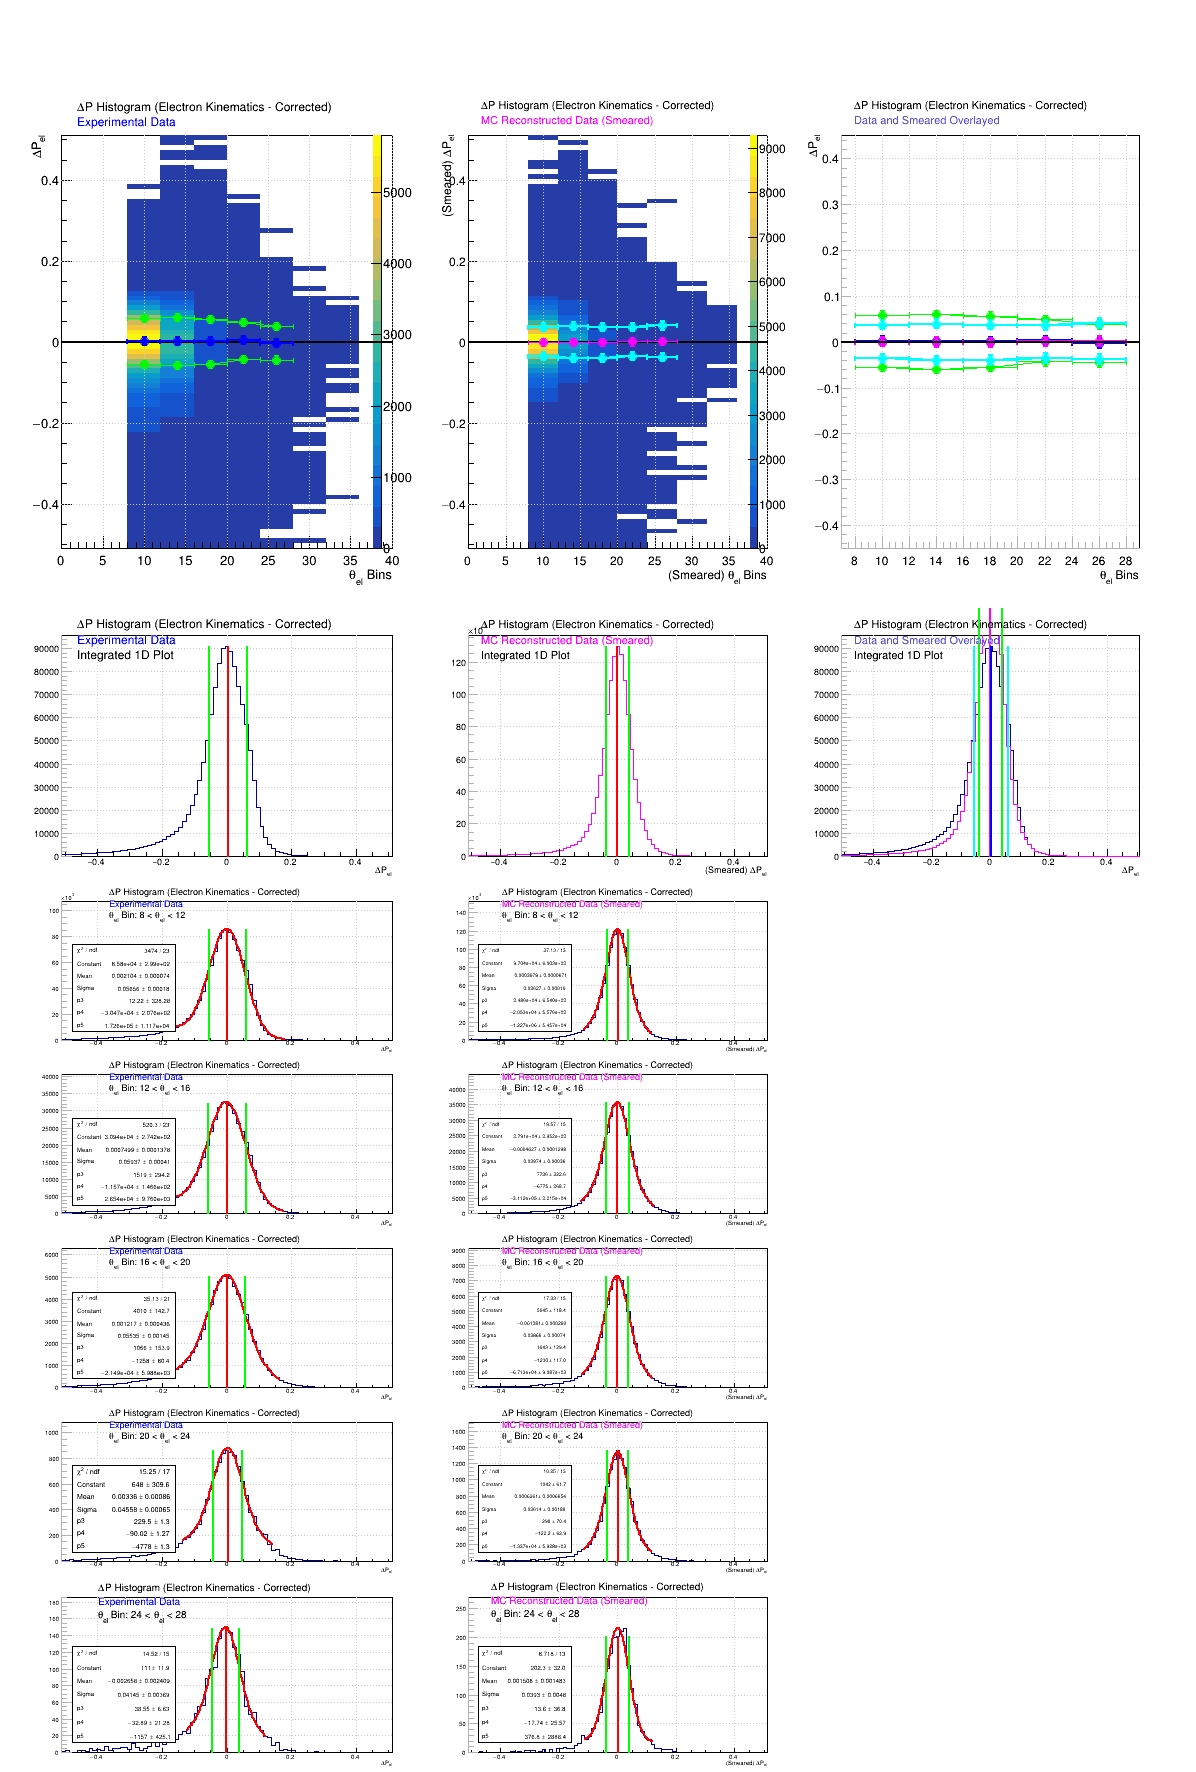

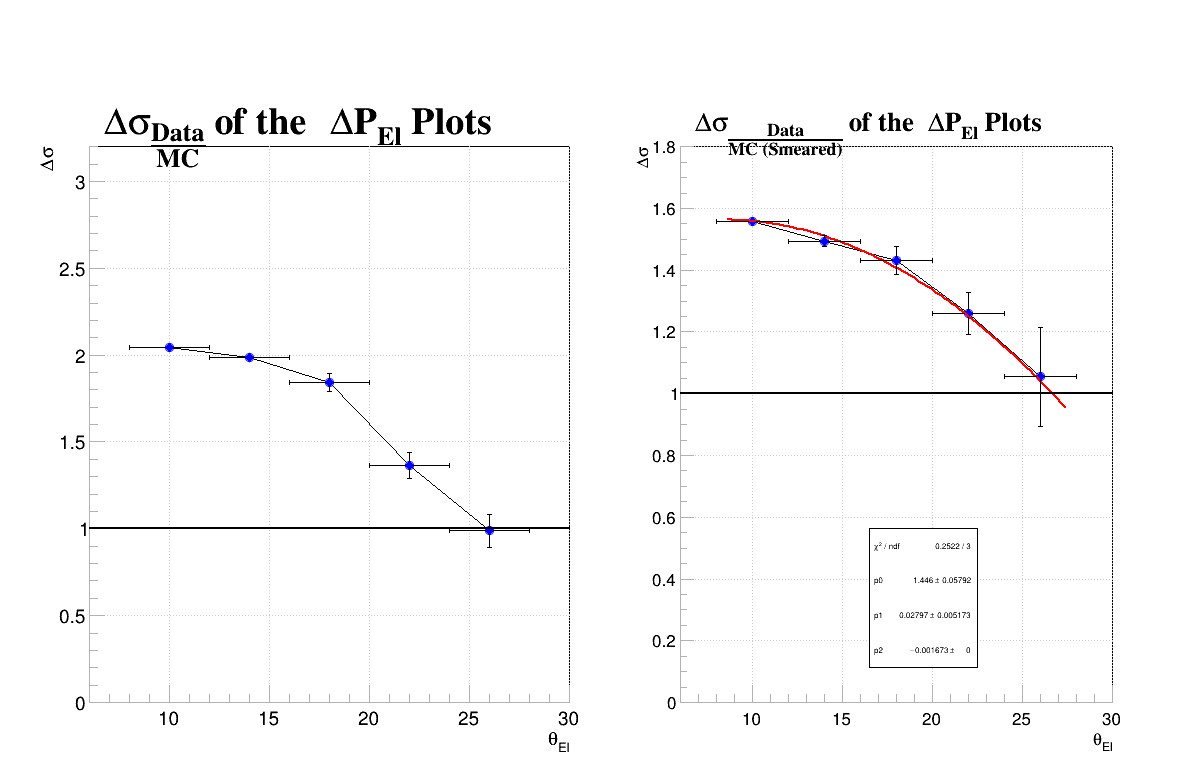

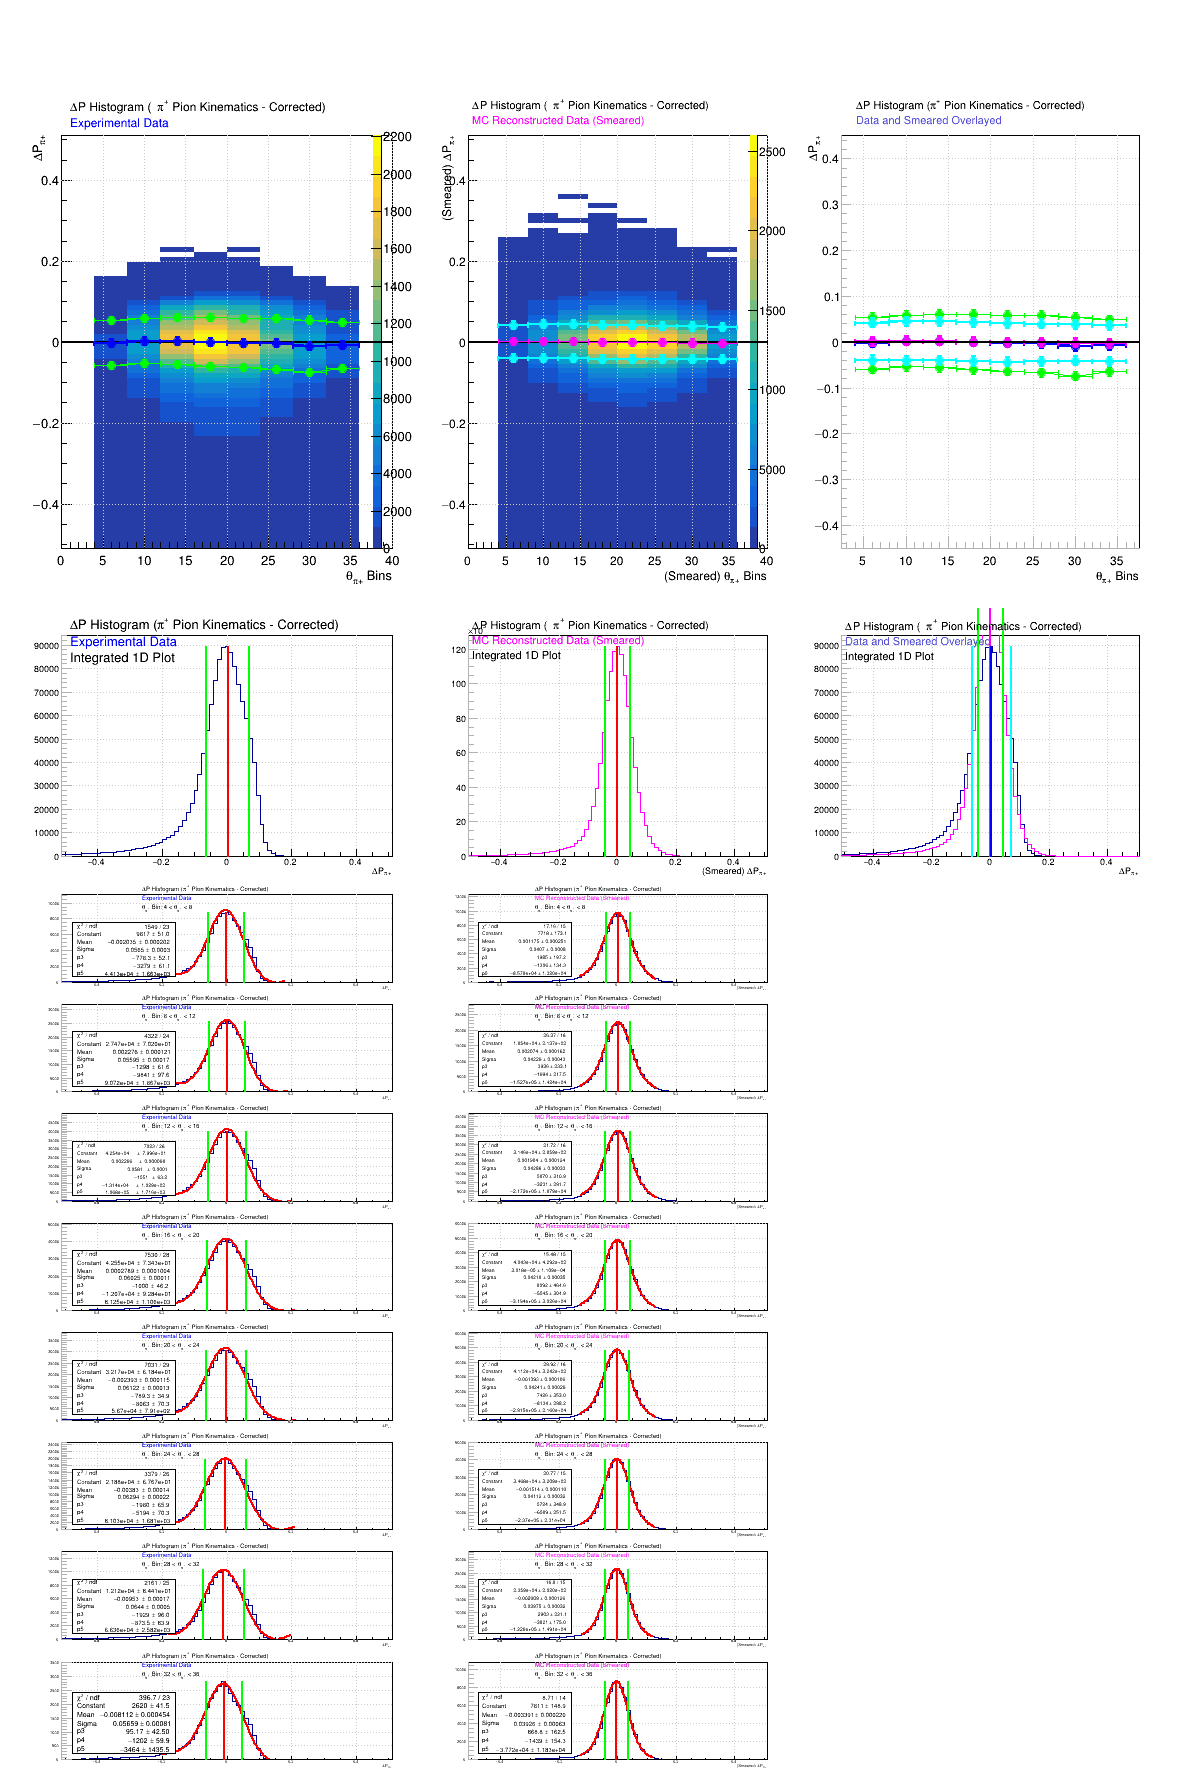

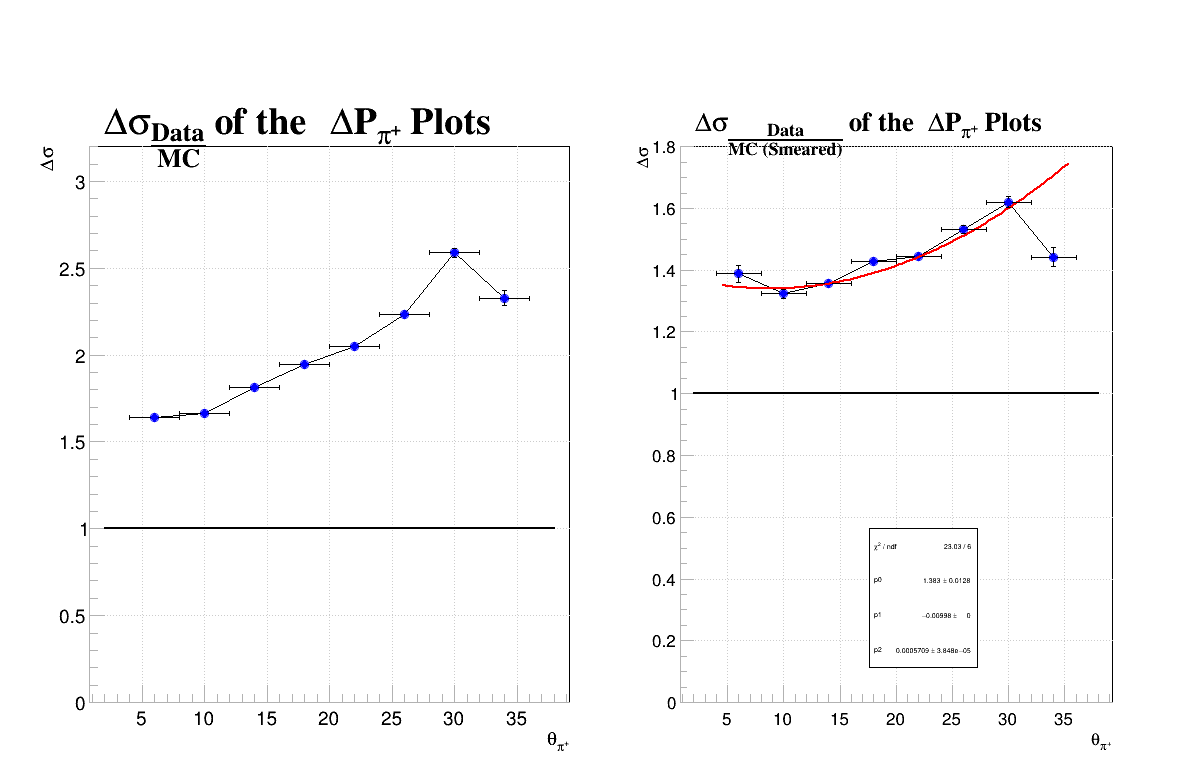

In [70]:
if("Mom_Cor_Histos" in Histo_Type and True):
    MM_or_Delta_List = ["MM"]
    MM_or_Delta_List = ["DP"]
#     MM_or_Delta_List = ["MM", "DP"]
#     MM_or_Delta_List = ["Phase"]
#     MM_or_Delta_List = ["MM", "DP", "Phase"]
    
#     MM_or_Delta_List = ["SF"]
#     Delta_Mom_or_Theta_List = ["Theta"]
    Delta_Mom_or_Theta_List = ["Mom"]
#     Delta_Mom_or_Theta_List = ["Mom", "Theta"]
    
    Mom_or_Theta_List = ["Mom"]
    Mom_or_Theta_List = ["Theta"]
#     Mom_or_Theta_List = ["Mom", "Theta"]
    
    Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
    
    for MM_or_Delta in MM_or_Delta_List:
        for Delta_Mom_or_Theta in Delta_Mom_or_Theta_List:
            if((MM_or_Delta in ["MM", "Phase"]) and (len(Delta_Mom_or_Theta_List) > 1)):
                if(Delta_Mom_or_Theta != Delta_Mom_or_Theta_List[0]):
                    continue
            
            for Mom_or_Theta in Mom_or_Theta_List:
                try:
                    for ii in rdf.GetListOfKeys():
                        out_print_rdf = str(ii.GetName())

                        out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
                        out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
                        out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")

                        if("Mom_Cor_Code" not in str(out_print)):
                            continue

                        if("cut_Complete_EDIS" not in str(out_print)):
                            continue
                        # if("cut_Complete" not in str(out_print)):
                        #     continue

                        # print(out_print)
                        # Missing Mass Histograms
                        if("Var-D1='MM'" not in str(out_print)):
                            if(MM_or_Delta in ["MM"]):
                                continue
                            # ∆P Histograms Histograms
                            if(MM_or_Delta in ["DP"]):
                                if((Delta_Mom_or_Theta == "Mom")   and not any(var_type in str(out_print) for var_type in ["Delta_Pel_Cors", "Delta_Ppip_Cors"])):
                                    continue
                                # ∆Theta Histograms Histograms
                                if((Delta_Mom_or_Theta == "Theta") and not any(var_type in str(out_print) for var_type in ["Delta_Theta_el_Cors", "Delta_Theta_pip_Cors"])):
                                    continue
                            if(MM_or_Delta in ["SF"]):
                                if((Delta_Mom_or_Theta == "Mom")   and not any(var_type in str(out_print) for var_type in ["DP_el_SF", "DP_el_SF"])):
                                    continue
                        elif(MM_or_Delta not in ["MM"]):
                            continue

                        if(("Delta" in str(out_print)) and (MM_or_Delta not in ["DP"])):
                            continue
                            
                        if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print))):
                            continue
                            
#                         if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='pip'" not in str(out_print))):
#                             continue



                        try:
                            if(MM_or_Delta not in ["DP", "MM", "SF"]):
                                Mom_Cor_Histos[out_print_rdf]               = rdf.Get(out_print_rdf)
                                Mom_Cor_Histos[out_print_mdf]               = mdf.Get(out_print_mdf)
                                Mom_Cor_Histos[out_print_mdf_smeared]       = mdf.Get(out_print_mdf_smeared)
                                out_print_rdf_SIDIS                         = str(out_print_rdf).replace("cut_Complete_EDIS",         "cut_Complete_SIDIS")
                                out_print_mdf_SIDIS                         = str(out_print_mdf).replace("cut_Complete_EDIS",         "cut_Complete_SIDIS")
                                out_print_mdf_smeared_SIDIS                 = str(out_print_mdf_smeared).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
                                Mom_Cor_Histos[out_print_rdf_SIDIS]         = rdf.Get(out_print_rdf_SIDIS)
                                Mom_Cor_Histos[out_print_mdf_SIDIS]         = mdf.Get(out_print_mdf_SIDIS)
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = mdf.Get(out_print_mdf_smeared_SIDIS)
                            else:
                                out_print_rdf                         = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_rdf)])
                                out_print_mdf                         = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf)])
                                out_print_mdf_smeared                 = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf_smeared)])
                                Mom_Cor_Histos[out_print_rdf]         = rdf.Get(out_print_rdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
                                Mom_Cor_Histos[out_print_mdf]         = mdf.Get(out_print_mdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
                                Mom_Cor_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
                        except:
                            print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                        # print(type(Mom_Cor_Histos[out_print]))
                        # print(Mom_Cor_Histos[out_print_mdf_smeared])
                        
                        if(MM_or_Delta in ["DP", "MM", "SF"]):
                            canvas_name = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print)])
                        else:
                            canvas_name = out_print
                        # print(out_print)
                        # print(canvas_name)
                        if(MM_or_Delta in ["DP", "MM", "SF"]):
                            Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1800, cd_Space=0)
                            if(Mom_or_Theta == "Mom"):
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
                                    Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
                                    Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
                                    Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
                                    Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                if("Delta" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    if("Var-D2='el'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                                if("MM" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
                                    if("Var-D2='el'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)

                            if(Mom_or_Theta == "Theta"):
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
                                    Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
                                    Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
                                    Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
                                    Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                if("Delta" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
                                    if("Var-D2='el'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        # if("Delta_P" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                                if("MM" in out_print):
                                    Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
                                    if("Var-D2='el'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                                    if("Var-D2='pip'" in str(out_print)):
                                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                        # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                                        # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                                        
                                        
                        else:
                            Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1000, cd_Space=0)
                            Mom_Cor_Canvas[canvas_name].SetFillColor(root_color.LGrey)
                            #################################
                            ##=====##   Vs Angles   ##=====##
                            #################################
                            ##=====##   Exclusive   ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])] = Mom_Cor_Histos[out_print_rdf].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])] = Mom_Cor_Histos[out_print_mdf].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("vs p", ""))
                            ##=====##     SIDIS     ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xy')
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                            #################################
                            ##=====##  Vs Momentum  ##=====##
                            #################################
                            ##=====##   Exclusive   ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('xz')
                                Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_rdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().GetTitle()).replace("#", ""))
                            ##=====##     SIDIS     ##=====##
                            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                Mom_Cor_Histos[out_print_rdf_SIDIS] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xz')
                                Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                Mom_Cor_Histos[out_print_mdf_SIDIS] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xz')
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("vs #phi", ""))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetYaxis().GetTitle()).replace("pi+", "#pi^{+}"))

                        Mom_Cor_Canvas[canvas_name].Draw()
                        try:
                            # Draw_Canvas(canvas=Mom_Cor_Canvas[canvas_name], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                            Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[canvas_name].cd(1)
                            Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[canvas_name].cd(2)
                            
                            
                            
                            if(MM_or_Delta in ["DP", "MM"]):
                                Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
                                Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                Mom_Cor_Histos[out_print_rdf].Draw("colz")
                            else:
                                Mom_Cor_Canvas_cd_2_Slice.Divide(2, 2, 0, 0)
                                # Mom_Cor_Canvas_cd_2_Slice.SetPad(xlow=0.005, ylow=0.0, xup=0.505, yup=1.0)
                                # Mom_Cor_Canvas_cd_2_Slice.SetPad(xlow=0.5, ylow=0.0, xup=0.9, yup=1.0)
                                Mom_Cor_Canvas_cd_2_Slice.SetFillColor(root_color.LGrey)
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_rdf].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.05, xup=0.55, yup=0.55)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_rdf_SIDIS].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.05, yup=1.10)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.1, yup=1.10)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.05, xup=1.05, yup=0.55)
                                # Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.1, yup=0.55)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Draw("colz")
                                

                            if(MM_or_Delta in ["DP", "MM", "SF"]):
                                Tline_Simple_Ideal_2D = ROOT.TLine()
                                Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_2D.SetLineWidth(2)
                                Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "SF"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "SF"]) else 0.9396)

                                # Mom_Cor_Histos[out_print_rdf].Draw("lego2")
                                # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)

                                Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
                                # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
                                Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
                                out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)




                            if(MM_or_Delta in ["DP", "MM", "SF"]):
                                Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
                                Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                               # ROOT.gPad.SetLogz(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                            else:
                                Mom_Cor_Canvas_cd_1_Slice.Divide(2, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_1_Slice.SetPad(xlow=0.005, ylow=0.0, xup=0.505, yup=1.0)
                                # Mom_Cor_Canvas_cd_1_Slice.SetPad(xlow=0.5, ylow=0.0, xup=0.9, yup=1.0)
                                # Mom_Cor_Canvas_cd_1_Slice.SetPad(xlow=0.505, ylow=0.0, xup=0.905, yup=1.0)
                                Mom_Cor_Canvas_cd_1_Slice.SetFillColor(root_color.LGrey)
                                
                                # Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.550, xup=0.55, yup=1.10)
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.550, xup=0.55, yup=1.0)
                                Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].Draw("colz")
                                
                                # Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.550, xup=1.05, yup=1.10)
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.550, xup=1.05, yup=1.0)
                                Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.05, yup=0.55)
                                Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0, up_add=0.075, down_add=0.075)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].Draw("colz")
                                
 

                            if(MM_or_Delta in ["DP", "MM", "SF"]):
                                Tline_Simple_Ideal_2D_Smeared = ROOT.TLine()
                                Tline_Simple_Ideal_2D_Smeared.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_2D_Smeared.SetLineWidth(2)
                                Tline_Simple_Ideal_2D_Smeared.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "SF"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "SF"]) else 0.9396)

                                Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
                                out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)



                                Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[canvas_name].cd(3)
                                Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
                                Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)

                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])] = ROOT.TMultiGraph("".join(["Combined_", str(canvas_name)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))

                                Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2# .Clone()
                                # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))

                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()), "_Overlay"]))


                                # # print(str(Mom_Cor_Histos[out_print_mdf].GetTitle()))
                                # Mom_Cor_Histos[out_print_rdf].gr2.SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle(Mom_Cor_Histos[out_print_rdf].gr2.GetTitle())

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetTitle(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle())

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetMarkerColor(root_color.Blue)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerColor(root_color.Pink)

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetLineColor(root_color.Blue)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineColor(root_color.Pink)

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetLineWidth(2)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetLineWidth(2)

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetMarkerSize(1)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerSize(1)

                                Mom_Cor_Histos["".join([str(out_print_rdf),         "overlayed"])].SetMarkerStyle(8)
                                Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetMarkerStyle(8)

                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)

                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)

                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
                                Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)

                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)

                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)

                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(2)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
                                Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(2)

                                # Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
                                # Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)


                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])], "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down, "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up, "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])], "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down, "lp")
                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up, "lp")


                                if(MM_or_Delta in ["DP", "SF"]):
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(-0.45, 0.45)
                                else:
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(0.6, 1.2)


                                Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Draw("AL same")

                                Tline_Simple_Ideal_2D_Compare = ROOT.TLine()
                                Tline_Simple_Ideal_2D_Compare.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_2D_Compare.SetLineWidth(2)
                                Tline_Simple_Ideal_2D_Compare.DrawLine(7 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 2.5 if(Mom_or_Theta == "Theta") else 4.35 if("Var-D2='el'" in str(out_print)) else 1.35, 0 if(MM_or_Delta == "DP") else 0.9396, 29 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 37.5 if(Mom_or_Theta == "Theta") else 8.15 if("Var-D2='el'" in str(out_print)) else 5.15, 0 if(MM_or_Delta == "DP") else 0.9396)


                                Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # ROOT.gPad.SetLogz(1)
                                # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
                                # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")

                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_rdf].hy.Clone()
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].hy.GetName()), "_Overlay"]))

                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
                                Mom_Cor_Histos["".join([str(out_print_rdf), "_overlayed_1D"])].Draw("same")
                                Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
                                Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")


                                out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)

                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum() if(Mom_Cor_Histos[out_print_rdf].hy.GetMinimum() > Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum()) else Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)


                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
                                # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)

                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                # TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
                                # TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)
                                TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)


                            Mom_Cor_Canvas[canvas_name].Modified()
                            Mom_Cor_Canvas[canvas_name].Update()

                            palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_rdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                            palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                            if(MM_or_Delta in ["DP", "MM", "SF"]):
                                try:
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
                                except:
                                    print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                                try:
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7) # root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
                                except:
                                    print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))



                                Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[canvas_name].cd(4)
                                Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)

                                for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

                                    if(Mom_or_Theta == "Theta"):
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                    Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
                                    Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_4_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])


                                    statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_4, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[canvas_name].cd(5)
                                Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

                                for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # Mom_Cor_Canvas_cd_6.cd(ii + 1)

                                    if(Mom_or_Theta == "Theta"):
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                    Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
                                    Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(canvas_name), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                    # statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                    statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(canvas_name), "_Smear_Compare"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Draw()
                                Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the ", "#Delta" if(MM_or_Delta in ["DP", "SF"]) else "Missing Mass vs ", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P/P" if(MM_or_Delta in ["SF"]) else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)


                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3.2)



                                # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
                                # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
                                MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
                                MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)


                                # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
                                Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
                                Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)

                                npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
                                X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
                                Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))

                                X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
                                Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)

                                Dx_point = (X2_point - X0_point)/npoints

                                Tline_Simple_Ideal_1D = ROOT.TLine()
                                Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_1D.SetLineWidth(2)
                                Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                try:
                                    Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                try:
                                    Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, 0.05*Par_C, 3.75*Par_C)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, 0.05*Par_B, 3.75*Par_B)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                 Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, 0.05*Par_A, 3.75*Par_A)

                                Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "NBRQ")


                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

#                                 statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                                Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "SF"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "/P" if(MM_or_Delta in ["SF"]) else "", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)

                                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)


                                # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
                                Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)

                                npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
#                                 X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 2)
#                                 Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 2)
                                X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 3)
                                Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 3)

                                X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                                Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

                                Dx_point = (X2_point - X0_point)/npoints

                                Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                Par_C = Par_B*(-X0_point) + Y0_point

                                try:
                                    Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                try:
                                    Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                except Exception as e:
                                    print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                    Par_A = 0

                                Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

#                                 if("pip" in str(out_print)):
#                                     for ii in range(0, npoints + 2, 1):
#                                         print(str(ii))
#                                         print("".join(["GetPointX = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(int(ii)))]))
#                                         print("".join(["GetPointY = ", str(Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(int(ii)))]))
#                                         print("")

                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)
                        
#                                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
#                                 Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                if(MM_or_Delta in ["DP", "SF"]):
                                    Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_FX_Smear", "BRQ")

                                    # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                    p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
                                    p0_Smearing = "{:.4e}".format(p0_Smearing)

                                    # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                    p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
                                    p1_Smearing = "{:.4e}".format(p1_Smearing)

                                    # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                    p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
                                    p2_Smearing = "{:.4e}".format(p2_Smearing)


                                    print("".join(["""
                    // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "SF"]) else "Missing Mass ", "/P" if(MM_or_Delta in ["SF"]) else "", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
                    """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
                                    """]))


                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

                                if(MM_or_Delta == "DP"):
                                    statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                        except:
                            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                except:
                    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

    try:
        alert()
    except:
        print("Alerts have not been set...")

else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

.

.

.

In [76]:
print("\nDefining ∆P/P (Smearing Correction) fits...")
def fit_Dp_2D_SF(h2, minR, maxR, dR, Title, Particle):
    hx = h2.ProjectionX()
    Histo_1D_Slices, Histo_1D_Slices_Over, Sigma_Widths, Sigma_Points = [], [], [], []
    gr2, gr2_sigma, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2.SetMarkerStyle(20)
    gr2_sigma.SetMarkerStyle(20)
    gr2_sigma_up.SetMarkerStyle(20)
    gr2_sigma_down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y, FindPeak_Sigma_Up, FindPeak_Sigma_Down = [], [], [], []
    
    fit_function = "gaus(0) + pol2(3)"
    
    hy = h2.ProjectionY("".join([str(h2.GetName()), "_1D_Integrated"]))
    hy.SetDirectory(0)
    fy = ROOT.TF1("fy", str(fit_function), -0.5, 0.5)
    fy.SetParName(0, "Constant")
    fy.SetParName(1, "Mean")
    fy.SetParName(2, "Sigma")
    mu = hy.GetBinCenter(hy.GetMaximumBin())
    fy.SetParameters(1, mu, 0.05)
    fy.SetParLimits(1,  mu - 0.1, mu + 0.1)
    fy.SetParameter(0,  hy.GetBinContent(hy.GetMaximumBin()))
    fy.SetParLimits(0,  0.75*(hy.GetBinContent(hy.GetMaximumBin())), 1.25*(hy.GetBinContent(hy.GetMaximumBin())))
    fy.SetRange(mu - 0.15, mu + 0.15)
    hy.Fit(fy, "NRQ")
    mu, sig = fy.GetParameter(1), abs(fy.GetParameter(2))
    fy.SetRange(mu - 3*sig, mu + 3*sig)
    Slice_Title = "".join(["#splitline{", Title, "}{Integrated 1D Plot}"])
    hy.SetTitle(Slice_Title)
    Integrated_1D_Plot_Info = [mu, sig, hy.GetBinContent(hy.FindBin(mu)), [fy.GetParError(1), fy.GetParError(2)]]
    
    while(minR+dR <= maxR):
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)
   
        hy2 = h2.ProjectionY(f"hy{ib1}",  ib0, ib1)
        hy2.SetDirectory(0)
        hy3 = h2.ProjectionY(f"hy3{ib1}", ib0, ib1)
        hy3.SetDirectory(0)
        
        Histo_1D_Slices.append(hy2)
        Histo_1D_Slices_Over.append(hy3)
        
        fy2 = ROOT.TF1("fy2", str(fit_function), -0.5, 0.5)
        
        fy2.SetParName(0, "Constant")
        fy2.SetParName(1, "Mean")
        fy2.SetParName(2, "Sigma")
  
        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        
        # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
        #     hy2.Rebin()
        
        fy2.SetParameters(1, mu, 0.05)
        fy2.SetParLimits(1,  mu - 0.05, mu + 0.05)
        
        fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
        fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
        
        fy2.SetRange(mu - 0.1, mu + 0.1)
        hy2.Fit(fy2, "RQ")
        
        # fy2.SetParameter(3,  0)
        # fy2.SetParLimits(3, -10000, 10000)
        # fy2.SetParameter(4,  0)
        # fy2.SetParLimits(4, -10000, 10000)
        # fy2.SetParameter(5,  0)
        # fy2.SetParLimits(5, -10000, 10000)
        
        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        if(((abs(mu) > 0.02) and ("el" in Particle)) or ((abs(mu) > 0.05) and ("pip" in Particle))):
            mu = 0
            limit = 0.04 if("el" in Particle) else 0.07
            fy2.SetParameter(0, hy2.GetBinContent(hy2.FindBin(0)))
            fy2.SetParLimits(0, 0.95*(hy2.GetBinContent(hy2.FindBin(0))), 1.5*(hy2.GetBinContent(hy2.FindBin(0))))
            fy2.SetParameter(1, mu)
            fy2.SetParLimits(1, mu - limit, mu + limit)
            fy2.SetRange(mu - limit, mu + limit)
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
            limit = 0.03 if("el" in Particle) else 0.04
            fy2.SetParameter(0, fy2.GetParameter(0))
            fy2.SetParLimits(0, 0.75*(fy2.GetParameter(0)), 1.5*(fy2.GetParameter(0)))
            fy2.SetParameter(1, mu)
            fy2.SetParLimits(1, 0.9*mu, 1.1*mu)
            fy2.SetRange(mu - limit, mu + limit)
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        else:
            limit = 0.04 if("el" in Particle) else 0.07
            fy2.SetRange(mu - limit, mu + limit)
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        # if(minR > 1):
        #     fy2.SetRange(mu - 3*sig, mu + 3*sig)
        #     hy2.Fit(fy2, "RQ")
        #     mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        
        
        # # ERROR BAR OPTIONS:
        # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
        Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
        # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        
        Slice_Title = "".join(["#splitline{", Title, "}{Range from ", str(round(minR, 4)), "-", str(round(minR + dR, 4)), "}"])
            
        hy2.SetTitle(Slice_Title)
        hy3.SetTitle(Slice_Title.replace(str(Title), "".join(["#frac{#DeltaP}{P} Smearing Comparison (", "Electron" if(Particle in ["el"]) else "#pi^{+} Pion", " Kinematics)"])))
        
        Fit_Fixed_Error = 0.01
        
        # Statistical Error Bars
        Error_Bars = fy2.GetParError(1)
        
        # Pre-Set Error Bars
        if(Error_Option == "Set"):
            hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
            if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                Error_Bars = Fit_Fixed_Error
            else:
                # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                Error_Bars = fy2.GetParError(1)
        
        # sigma_factor_upper = 1.25
        # sigma_factor_lower = 1.25
        sigma_factor_upper, sigma_factor_lower = 1, 1
        
        gr2.SetPoint(gr2.GetN(),                        minR+dR/2.0, fy2.GetParameter(1))
        gr2.SetPointError(gr2.GetN()-1,                      dR/2.0, Error_Bars)
        
        gr2_sigma.SetPoint(gr2_sigma.GetN(),            minR+dR/2.0, abs(fy2.GetParameter(2)))
        gr2_sigma.SetPointError(gr2_sigma.GetN()-1,          dR/2.0, fy2.GetParError(2))
        
        gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(),       minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1,     dR/2.0, (Error_Bars**2      + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        
        gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(),   minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
        gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2      + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        
        # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
        Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])
        
        Sigma_Points.append([minR+dR/2.0, abs(fy2.GetParameter(2)), fy2.GetParError(2)])
            
        FindPeak_x.append(fy2.GetParameter(1))
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))
        
        FindPeak_Sigma_Up.append(fy2.GetParameter(1)   + sigma_factor_upper*abs(fy2.GetParameter(2)))
        FindPeak_Sigma_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))
        
        minR += dR
        
    setattr(h2, "Integrated_1D_Plot_Info", Integrated_1D_Plot_Info)
    setattr(h2, "FindPeak_Sigma_Down",     FindPeak_Sigma_Down)
    setattr(h2, "FindPeak_Sigma_Up",       FindPeak_Sigma_Up)
    setattr(h2, "Histo_1D_Slices_Over",    Histo_1D_Slices_Over)
    setattr(h2, "Histo_1D_Slices",         Histo_1D_Slices)
    setattr(h2, "gr2_sigma_down",          gr2_sigma_down)
    setattr(h2, "gr2_sigma_up",            gr2_sigma_up)
    setattr(h2, "gr2_sigma",               gr2_sigma)
    setattr(h2, "Sigma_Widths",            Sigma_Widths)
    setattr(h2, "Sigma_Points",            Sigma_Points)
    setattr(h2, "FindPeak_x",              FindPeak_x)
    setattr(h2, "FindPeak_y",              FindPeak_y)
    setattr(h2, "gr2",                     gr2)
    setattr(h2, "hy",                      hy)
    
                
# Fits the ∆P Peaks for all 3 datasets at the same time
def Sigma_SF_Smearing_Correction(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, minM, maxM, dM, particle, Title_Data, Title_MC, Title_MC_Smeared):
#     print(Title_Data)
    try:
        fit_Dp_2D_SF(h2=Histo2D_Data,     minR=minM, maxR=maxM, dR=dM, Title=Title_Data,       Particle=particle)
        fit_Dp_2D_SF(h2=Histo2D_MC,       minR=minM, maxR=maxM, dR=dM, Title=Title_MC,         Particle=particle)
        fit_Dp_2D_SF(h2=Histo2D_MC_Smear, minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared, Particle=particle)
    except Exception as e:
        print("".join([color.BOLD, "Error in slicing:\n\t", str(e), color.END]))
    
    gr2_Data_MC, gr2_Data_MC_Smear, Delta_Sigma_Data_MC, Delta_Sigma_Data_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_Data_MC.SetMarkerStyle(20)
    gr2_Data_MC_Smear.SetMarkerStyle(20)
    Delta_Sigma_Data_MC.SetMarkerStyle(20)
    Delta_Sigma_Data_MC_Smear.SetMarkerStyle(20)
    
    gr2_Data_MC.SetTitle("".join(["#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP/P_{",                  str(str(particle).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "}; #theta; #Delta#sigma_{#frac{Data}{MC}}"]))
    gr2_Data_MC_Smear.SetTitle("".join(["#Delta#sigma_{#frac{Data}{MC_{Smeared}}} of the #DeltaP/P_{",  str(str(particle).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "}; #theta; #Delta#sigma_{#frac{Data}{MC_{Smeared}}}"]))
    
    Delta_Sigma_Data_MC.SetTitle("".join(["#Delta#sigma_{Data-MC} of the #DeltaP/P_{",                  str(str(particle).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "}; #theta; #Delta#sigma_{Data-MC}"]))
    Delta_Sigma_Data_MC_Smear.SetTitle("".join(["#Delta#sigma_{Data-MC_{Smeared}} of the #DeltaP/P_{",  str(str(particle).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "}; #theta; #Delta#sigma_{Data-MC_{Smeared}}"]))
    
    gr2_Data_MC.SetName(f"{Histo2D_Data.GetName()}_gr2_Data_MC")
    gr2_Data_MC_Smear.SetName(f"{Histo2D_Data.GetName()}_gr2_Data_MC_Smear")
    
    Delta_Sigma_Data_MC.SetName(f"{Histo2D_Data.GetName()}_Delta_Sigma_Data_MC")
    Delta_Sigma_Data_MC_Smear.SetName(f"{Histo2D_Data.GetName()}_Delta_Sigma_Data_MC_Smear")
    
    gr2_Data_MC.SetMarkerColor(root_color.Blue)
    gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)
    
    Delta_Sigma_Data_MC.SetMarkerColor(root_color.Black)
    Delta_Sigma_Data_MC_Smear.SetMarkerColor(root_color.Green)
    
    # point_num        = 0
    # Peak_Points_List = []
    
    if(len(Histo2D_Data.Sigma_Points) == len(Histo2D_MC.Sigma_Points) == len(Histo2D_MC_Smear.Sigma_Points)):

        for ii in range(0, len(Histo2D_Data.Sigma_Points), 1):

            Sigma_Points_List_Data     = Histo2D_Data.Sigma_Points[ii]
            Sigma_Points_List_MC       = Histo2D_MC.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear = Histo2D_MC_Smear.Sigma_Points[ii]
            
            Mom_Center_Data,     Sigma_Data,     Sigma_Error_Data     = Sigma_Points_List_Data
            Mom_Center_MC,       Sigma_MC,       Sigma_Error_MC       = Sigma_Points_List_MC
            Mom_Center_MC_Smear, Sigma_MC_Smear, Sigma_Error_MC_Smear = Sigma_Points_List_MC_Smear
            
            if(Mom_Center_Data != Mom_Center_MC != Mom_Center_MC_Smear):
                print(f"{color.Error}ERROR: the 'Mom_Center' points are not all the same...{color.END}")
            
            gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(),     Mom_Center_Data,  Sigma_Data/Sigma_MC)
            gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data/Sigma_MC))
            try:
                gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, dM/2.0, gr2_Data_MC_Error)
            except Exception as e:
                print(f"Error Propergation failed...\n\t{str(e)}")

            gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(),  Mom_Center_Data, Sigma_Data/Sigma_MC_Smear)
            gr2_Data_MC_Smear_Error = Error_Propagation("div",   Sigma_Error_Data, Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data/Sigma_MC_Smear))
            try:
                gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, dM/2.0, gr2_Data_MC_Smear_Error)
            except Exception as e:
                print(f"Error Propergation failed...\n\t{str(e)}")
                
            Delta_Sigma_Data_MC.SetPoint(Delta_Sigma_Data_MC.GetN(), Mom_Center_Data,  Sigma_Data-Sigma_MC)
            Delta_Sigma_Data_MC_Error = Error_Propagation("sub",    Sigma_Error_Data,  Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data-Sigma_MC))
            try:
                Delta_Sigma_Data_MC.SetPointError(Delta_Sigma_Data_MC.GetN()-1, dM/2.0, Delta_Sigma_Data_MC_Error)
            except Exception as e:
                print(f"Error Propergation failed...\n\t{str(e)}")
                
            Delta_Sigma_Data_MC_Smear.SetPoint(Delta_Sigma_Data_MC_Smear.GetN(), Mom_Center_Data,  Sigma_Data-Sigma_MC_Smear)
            Delta_Sigma_Data_MC_Smear_Error = Error_Propagation("sub",          Sigma_Error_Data,  Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data-Sigma_MC_Smear))
            try:
                Delta_Sigma_Data_MC_Smear.SetPointError(Delta_Sigma_Data_MC_Smear.GetN()-1, dM/2.0, Delta_Sigma_Data_MC_Smear_Error)
            except Exception as e:
                print(f"Error Propergation failed...\n\t{str(e)}")
                
                
            # Peak_Points_List.append([point_num, Mom_Center_Data, Sigma_Data/Sigma_MC, Sigma_Data/Sigma_MC_Smear])
            # point_num += 1
            
    else:
        print("".join([color.Error, "ERROR: length of 'Sigma_Points' is not the same...", color.END]))

    setattr(Histo2D_Data,     "gr2_Data_MC",               gr2_Data_MC)
    setattr(Histo2D_Data,     "gr2_Data_MC_Smear",         gr2_Data_MC_Smear)
    setattr(Histo2D_Data,     "Delta_Sigma_Data_MC",       Delta_Sigma_Data_MC)
    setattr(Histo2D_Data,     "Delta_Sigma_Data_MC_Smear", Delta_Sigma_Data_MC_Smear)
    # setattr(Histo2D_Data,     "Peak_Points_List",          Peak_Points_List)

    setattr(Histo2D_MC,       "gr2_Data_MC",               gr2_Data_MC)
    setattr(Histo2D_MC,       "gr2_Data_MC_Smear",         gr2_Data_MC_Smear)
    setattr(Histo2D_MC,       "Delta_Sigma_Data_MC",       Delta_Sigma_Data_MC)
    setattr(Histo2D_MC,       "Delta_Sigma_Data_MC_Smear", Delta_Sigma_Data_MC_Smear)
    # setattr(Histo2D_MC,       "Peak_Points_List",          Peak_Points_List)
    
    setattr(Histo2D_MC_Smear, "gr2_Data_MC",               gr2_Data_MC)
    setattr(Histo2D_MC_Smear, "gr2_Data_MC_Smear",         gr2_Data_MC_Smear)
    setattr(Histo2D_MC_Smear, "Delta_Sigma_Data_MC",       Delta_Sigma_Data_MC)
    setattr(Histo2D_MC_Smear, "Delta_Sigma_Data_MC_Smear", Delta_Sigma_Data_MC_Smear)
    # setattr(Histo2D_MC_Smear, "Peak_Points_List",          Peak_Points_List)
    
print("DONE")


Defining ∆P/P (Smearing Correction) fits...
DONE


In [72]:
def Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated, SF_Canvas_cd_Slice, SF_Histo_Input, Histo_Type="rdf"):
    color_Main  = root_color.Blue  if(Histo_Type in ["rdf"]) else root_color.Red   if(Histo_Type in ["mdf"]) else root_color.Pink
    color_Sigma = root_color.Green if(Histo_Type in ["rdf"]) else root_color.Brown if(Histo_Type in ["mdf"]) else root_color.Cyan
    Draw_Canvas(canvas=SF_Canvas_cd_Integrated, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SF_Histo_Input.Draw("colz")
    palette_move(canvas=SF_Canvas_cd_Integrated, histo=SF_Histo_Input, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    SF_Histo_Input.gr2.SetLineColor(color_Main)
    SF_Histo_Input.gr2.SetLineWidth(2)
    SF_Histo_Input.gr2.SetMarkerSize(1)
    SF_Histo_Input.gr2.SetMarkerColor(color_Main)
    SF_Histo_Input.gr2.Draw("same PL")

    SF_Histo_Input.gr2_sigma_up.SetLineColor(color_Sigma)
    SF_Histo_Input.gr2_sigma_up.SetLineWidth(1)
    SF_Histo_Input.gr2_sigma_up.SetMarkerSize(1)
    SF_Histo_Input.gr2_sigma_up.SetMarkerColor(color_Sigma)
    SF_Histo_Input.gr2_sigma_up.Draw("same PL")
    SF_Histo_Input.gr2_sigma_down.SetLineColor(color_Sigma)
    SF_Histo_Input.gr2_sigma_down.SetLineWidth(1)
    SF_Histo_Input.gr2_sigma_down.SetMarkerSize(1)
    SF_Histo_Input.gr2_sigma_down.SetMarkerColor(color_Sigma)
    SF_Histo_Input.gr2_sigma_down.Draw("same PL")

    Draw_Canvas(canvas=SF_Canvas_cd_Integrated, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SF_Histo_Input.hy.GetXaxis().SetRangeUser(-0.2, 0.2)
    SF_Histo_Input.hy.Draw("same")

    for cd_num_ii in range(1, len(SF_Histo_Input.Histo_1D_Slices) + 1, 1):
        Draw_Canvas(canvas=SF_Canvas_cd_Slice, cd_num=cd_num_ii, left_add=0.05, right_add=0.05, up_add=0.05, down_add=0.1)
        SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetXaxis().SetRangeUser(-0.1, 0.1)
        SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetYaxis().SetRangeUser(0,    2.0*(SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetMaximum()))
        # print(f"SF_Histo_Input.Histo_1D_Slices[{cd_num_ii} - 1].GetMaximum() = {SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetMaximum()}")
        DrawPeak_Center, DrawPeak_Sigma_Down, DrawPeak_Sigma_Up = ROOT.TLine(), ROOT.TLine(), ROOT.TLine()
        SF_Histo_Input.Histo_1D_Slices[cd_num_ii     - 1].Draw("same")
        DrawPeak_Center.SetLineColor(color_Main)
        DrawPeak_Center.SetLineWidth(2)
        DrawPeak_Center.DrawLine(SF_Histo_Input.FindPeak_x[cd_num_ii              - 1], 0, SF_Histo_Input.FindPeak_x[cd_num_ii          - 1], SF_Histo_Input.FindPeak_y[cd_num_ii - 1])
        DrawPeak_Sigma_Down.SetLineColor(color_Sigma)
        DrawPeak_Sigma_Down.SetLineWidth(2)
        DrawPeak_Sigma_Down.DrawLine(SF_Histo_Input.FindPeak_Sigma_Down[cd_num_ii - 1], 0, SF_Histo_Input.FindPeak_Sigma_Down[cd_num_ii - 1], SF_Histo_Input.FindPeak_y[cd_num_ii - 1])
        # DrawPeak_Sigma_Down.DrawLine(SF_Histo_Input.FindPeak_Sigma_Down[cd_num_ii - 1], 0, SF_Histo_Input.FindPeak_Sigma_Down[cd_num_ii - 1], SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetMaximum())
        DrawPeak_Sigma_Up.SetLineColor(color_Sigma)
        DrawPeak_Sigma_Up.SetLineWidth(2)
        DrawPeak_Sigma_Up.DrawLine(SF_Histo_Input.FindPeak_Sigma_Up[cd_num_ii     - 1], 0, SF_Histo_Input.FindPeak_Sigma_Up[cd_num_ii   - 1], SF_Histo_Input.FindPeak_y[cd_num_ii - 1])
        # DrawPeak_Sigma_Up.DrawLine(SF_Histo_Input.FindPeak_Sigma_Up[cd_num_ii     - 1], 0, SF_Histo_Input.FindPeak_Sigma_Up[cd_num_ii   - 1], SF_Histo_Input.Histo_1D_Slices[cd_num_ii - 1].GetMaximum())
        
print("Done")

Done


.

.

.

In [73]:
def VS_Phi_Plots(NAME, rdf_Histo, mdf_Histo, smear_FX_Histo, smeared_Histo, Variable_Y, SMEAR_FACTOR="Default"):
    Canvas_Test = Canvas_Create(Name="Test", Num_Columns=1, Num_Rows=1, Size_X=10, Size_Y=10, cd_Space=0)
    if(str(Variable_Y)   in ["MM"]):
        ExDATA_Histo   =  (rdf_Histo.Project3D('yx'))
        MC_REC_Histo   =  (mdf_Histo.Project3D('yx'))
        SMEAR_FX_Histo =  (smear_FX_Histo.Project3D('yx'))
        SMEAR_SF_Histo =  (smeared_Histo.Project3D('yx'))
    elif(str(Variable_Y) in ["DP"]):
        ExDATA_Histo   =  (rdf_Histo.Project3D('zx'))
        MC_REC_Histo   =  (mdf_Histo.Project3D('zx'))
        SMEAR_FX_Histo =  (smear_FX_Histo.Project3D('zx'))
        SMEAR_SF_Histo =  (smeared_Histo.Project3D('zx'))
    else:
        print(color.RED, color.BOLD, "\n\nERROR\n\n", color.END)
        return "ERROR"
    
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("Local #phi Histogram", "Local #phi_{Electron} Histogram" if("(Electron Kinematics"     in str(ExDATA_Histo.GetTitle()))   else "Local #phi_{#pi^{+} Pion} Histogram"))
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("Electron Kinematics", ""))
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("#pi^{+} Pion Kinematics", ""))
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace(" - ", ""))
    
    ExDATA_Histo.SetTitle("".join(["#splitline{#scale[0.95]{",   str(ExDATA_Histo.GetTitle()),   "}}{#scale[1.15]{#color[", str(root_color.Blue), "]{Experimental Data}}}"]))
    
    
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("Local #phi Histogram", "Local #phi_{Electron} Histogram" if("(Electron Kinematics"     in str(MC_REC_Histo.GetTitle()))   else "Local #phi_{#pi^{+} Pion} Histogram"))
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("Electron Kinematics", ""))
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("#pi^{+} Pion Kinematics", ""))
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace(" - ", ""))
    
    MC_REC_Histo.SetTitle("".join(["#splitline{#scale[0.95]{",   str(MC_REC_Histo.GetTitle()),   "}}{#scale[1.15]{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}"]))
    
    
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("Local #phi Histogram", "Local #phi_{Electron} Histogram" if("(Electron Kinematics" in str(SMEAR_FX_Histo.GetTitle())) else "Local #phi_{#pi^{+} Pion} Histogram"))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("Electron Kinematics", ""))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("#pi^{+} Pion Kinematics", ""))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("(Smeared) ", ""))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace(" - ", ""))
    
    SMEAR_FX_Histo.SetTitle("".join(["#splitline{#scale[0.95]{", str(SMEAR_FX_Histo.GetTitle()), "}}{#scale[1.15]{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}"]))
    
    
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("Local #phi Histogram", "Local #phi_{Electron} Histogram" if("(Electron Kinematics" in str(SMEAR_SF_Histo.GetTitle())) else "Local #phi_{#pi^{+} Pion} Histogram"))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("Electron Kinematics", ""))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("#pi^{+} Pion Kinematics", ""))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("(Smeared) ", ""))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace(" - ", ""))
    
    SMEAR_SF_Histo.SetTitle("".join(["#splitline{#scale[0.95]{", str(SMEAR_SF_Histo.GetTitle()), "}}{#scale[1.15]{#color[", str(root_color.Pink), "]{MC Reconstructed Data", str(root_color.Bold), "{(Smear Factor", "".join([": ", str(SMEAR_FACTOR), ")}"]) if(SMEAR_FACTOR != "Default") else ")}", "}}}"]))
    
    
    if(str(Variable_Y)   in ["MM"]):
        ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace(" yx projection", ""))
        ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace(" vs #DeltaP", ""))
        
        MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace(" yx projection", ""))
        MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace(" vs #DeltaP", ""))
        
        SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace(" yx projection", ""))
        SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace(" vs #DeltaP", ""))
        
        SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace(" yx projection", ""))
        SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace(" vs #DeltaP", ""))
        
        
        ExDATA_Histo.GetYaxis().SetRangeUser(0.6,   1.2)
        MC_REC_Histo.GetYaxis().SetRangeUser(0.6,   1.2)
        SMEAR_FX_Histo.GetYaxis().SetRangeUser(0.6, 1.2)
        SMEAR_SF_Histo.GetYaxis().SetRangeUser(0.6, 1.2)
        
    elif(str(Variable_Y) in ["DP"]):
        ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace(" zx projection", ""))
        ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("Missing Mass vs ", ""))
        
        MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace(" zx projection", ""))
        MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("Missing Mass vs ", ""))
        
        SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace(" zx projection", ""))
        SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("Missing Mass vs ", ""))
        
        SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace(" zx projection", ""))
        SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("Missing Mass vs ", ""))
        
        
        ExDATA_Histo.GetYaxis().SetRangeUser(-0.5,   0.4)
        MC_REC_Histo.GetYaxis().SetRangeUser(-0.5,   0.4)
        SMEAR_FX_Histo.GetYaxis().SetRangeUser(-0.5, 0.4)
        SMEAR_SF_Histo.GetYaxis().SetRangeUser(-0.5, 0.4)
        
        ExDATA_Histo.GetYaxis().SetTitle(str(ExDATA_Histo.GetYaxis().GetTitle()).replace(";", ""))
        MC_REC_Histo.GetYaxis().SetTitle(str(MC_REC_Histo.GetYaxis().GetTitle()).replace(";", ""))
        SMEAR_FX_Histo.GetYaxis().SetTitle(str(SMEAR_FX_Histo.GetYaxis().GetTitle()).replace(";", ""))
        SMEAR_SF_Histo.GetYaxis().SetTitle(str(SMEAR_SF_Histo.GetYaxis().GetTitle()).replace(";", ""))

    else:
        print(color.RED, color.BOLD, "\n\nERROR\n\n", color.END)
        return "ERROR"
    
    ExDATA_Histo.SetTitle(str(ExDATA_Histo.GetTitle()).replace("()",     ""))
    MC_REC_Histo.SetTitle(str(MC_REC_Histo.GetTitle()).replace("()",     ""))
    SMEAR_FX_Histo.SetTitle(str(SMEAR_FX_Histo.GetTitle()).replace("()", ""))
    SMEAR_SF_Histo.SetTitle(str(SMEAR_SF_Histo.GetTitle()).replace("()", ""))
    
    ExDATA_Histo.GetXaxis().SetRangeUser(-40   if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 35)
    MC_REC_Histo.GetXaxis().SetRangeUser(-40   if("Electron" not in str(MC_REC_Histo.GetTitle()))   else -25, 35)
    SMEAR_FX_Histo.GetXaxis().SetRangeUser(-40 if("Electron" not in str(SMEAR_FX_Histo.GetTitle())) else -25, 35)
    SMEAR_SF_Histo.GetXaxis().SetRangeUser(-40 if("Electron" not in str(SMEAR_SF_Histo.GetTitle())) else -25, 35)
    
    Tline_Simple_Ideal_Phi = ROOT.TLine()
    Tline_Simple_Ideal_Phi.SetLineColor(root_color.Black)
    Tline_Simple_Ideal_Phi.SetLineWidth(2)

    
    if("Electron" not in str(ExDATA_Histo.GetTitle())):
        Sigma_Smearing_Correction_FX(Histo2D_Data=ExDATA_Histo, Histo2D_MC=MC_REC_Histo, Histo2D_MC_Smear=SMEAR_SF_Histo, Histo2D_MC_Smear_FX=SMEAR_FX_Histo, minM=-32, maxM=18, dM=4, particle="pip", Title_Data=str(ExDATA_Histo.GetTitle()), Title_MC=str(MC_REC_Histo.GetTitle()), Title_MC_Smeared=str(SMEAR_SF_Histo.GetTitle()), Title_MC_Smeared_FX=str(SMEAR_FX_Histo.GetTitle()))
    else:
        Sigma_Smearing_Correction_FX(Histo2D_Data=ExDATA_Histo, Histo2D_MC=MC_REC_Histo, Histo2D_MC_Smear=SMEAR_SF_Histo, Histo2D_MC_Smear_FX=SMEAR_FX_Histo, minM=-8,  maxM=24, dM=4, particle="el",  Title_Data=str(ExDATA_Histo.GetTitle()), Title_MC=str(MC_REC_Histo.GetTitle()), Title_MC_Smeared=str(SMEAR_SF_Histo.GetTitle()), Title_MC_Smeared_FX=str(SMEAR_FX_Histo.GetTitle()))
    
    
    del Canvas_Test
    Canvas_Output = Canvas_Create(Name=NAME, Num_Columns=5, Num_Rows=2, Size_X=1200*2, Size_Y=1800*2, cd_Space=0.001)
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS LINE 1 - START         ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(1) - Experimental   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_1 = Canvas_Output.cd(1)
    Canvas_Output_CD_1.Divide(1, 2, 0.001, 0.001)
    Canvas_Output_CD_1.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_1, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.Draw("colz")
    
    Tline_Simple_Ideal_Phi.DrawLine(-40        if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 35, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
    
    ExDATA_Histo.gr2.SetLineColor(root_color.Black)
    ExDATA_Histo.gr2.SetMarkerColor(root_color.Black)
    ExDATA_Histo.gr2.Draw("same PL")

    ExDATA_Histo.gr2_sigma_up.SetLineColor(root_color.Green)
    ExDATA_Histo.gr2_sigma_down.SetLineColor(root_color.Green)
    ExDATA_Histo.gr2_sigma_up.SetMarkerColor(root_color.Green)
    ExDATA_Histo.gr2_sigma_down.SetMarkerColor(root_color.Green)
    ExDATA_Histo.gr2_sigma_up.SetMarkerSize(2)
    ExDATA_Histo.gr2_sigma_down.SetMarkerSize(2)
    ExDATA_Histo.gr2_sigma_up.SetMarkerStyle(23)
    ExDATA_Histo.gr2_sigma_down.SetMarkerStyle(22)

    ExDATA_Histo.gr2_sigma_up.Draw("same PL")
    ExDATA_Histo.gr2_sigma_down.Draw("same PL")
    
    palette_move(canvas=Canvas_Output, histo=ExDATA_Histo,   x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(1.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_1.cd(2)
    Canvas_Output_CD_1.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_1, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.hy.Draw("same")
    ExDATA_Histo_Peak, ExDATA_Histo_Sig, ExDATA_Histo_Max, ExDATA_Histo_Errors = ExDATA_Histo.Integrated_1D_Plot_Info
    TLine_Fits_ExDATA_1D_Int = ROOT.TLine()
    TLine_Fits_ExDATA_1D_Int.SetLineColor(root_color.Red)
    TLine_Fits_ExDATA_1D_Int.SetLineWidth(2)
    TLine_Fits_ExDATA_1D_Int.DrawLine(ExDATA_Histo_Peak, ExDATA_Histo.hy.GetMinimum(),  ExDATA_Histo_Peak, ExDATA_Histo_Max)
    TLine_Fits_ExDATA_1D_Int_Sigma_Upper = ROOT.TLine()
    TLine_Fits_ExDATA_1D_Int_Sigma_Upper.SetLineColor(root_color.Green)
    TLine_Fits_ExDATA_1D_Int_Sigma_Upper.SetLineWidth(2)
    TLine_Fits_ExDATA_1D_Int_Sigma_Upper.DrawLine(ExDATA_Histo_Peak + ExDATA_Histo_Sig, ExDATA_Histo.hy.GetMinimum(), ExDATA_Histo_Peak + ExDATA_Histo_Sig, ExDATA_Histo_Max)
    TLine_Fits_ExDATA_1D_Int_Sigma_Lower = ROOT.TLine()
    TLine_Fits_ExDATA_1D_Int_Sigma_Lower.SetLineColor(root_color.Green)
    TLine_Fits_ExDATA_1D_Int_Sigma_Lower.SetLineWidth(2)
    TLine_Fits_ExDATA_1D_Int_Sigma_Lower.DrawLine(ExDATA_Histo_Peak - ExDATA_Histo_Sig, ExDATA_Histo.hy.GetMinimum(), ExDATA_Histo_Peak - ExDATA_Histo_Sig, ExDATA_Histo_Max)
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###  CANVAS CD(2) - Reconstructed   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_2 = Canvas_Output.cd(2)
    Canvas_Output_CD_2.Divide(1, 2, 0.001, 0.001)
    Canvas_Output_CD_2.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_2, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    MC_REC_Histo.Draw("colz")
    
    Tline_Simple_Ideal_Phi.DrawLine(-40        if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 35, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
    
    MC_REC_Histo.gr2.SetLineColor(root_color.Red)
    MC_REC_Histo.gr2.SetMarkerColor(root_color.Red)
    MC_REC_Histo.gr2.Draw("same PL")

    MC_REC_Histo.gr2_sigma_up.SetLineColor(root_color.Brown)
    MC_REC_Histo.gr2_sigma_down.SetLineColor(root_color.Brown)
    MC_REC_Histo.gr2_sigma_up.SetMarkerColor(root_color.Brown)
    MC_REC_Histo.gr2_sigma_down.SetMarkerColor(root_color.Brown)
    MC_REC_Histo.gr2_sigma_up.SetMarkerSize(2)
    MC_REC_Histo.gr2_sigma_down.SetMarkerSize(2)
    MC_REC_Histo.gr2_sigma_up.SetMarkerStyle(23)
    MC_REC_Histo.gr2_sigma_down.SetMarkerStyle(22)

    MC_REC_Histo.gr2_sigma_up.Draw("same PL")
    MC_REC_Histo.gr2_sigma_down.Draw("same PL")
    
    palette_move(canvas=Canvas_Output, histo=MC_REC_Histo,   x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(2.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_2.cd(2)
    Canvas_Output_CD_2.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_2, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    MC_REC_Histo.hy.Draw("same")
    MC_REC_Histo_Peak, MC_REC_Histo_Sig, MC_REC_Histo_Max, MC_REC_Histo_Errors = MC_REC_Histo.Integrated_1D_Plot_Info
    TLine_Fits_MC_REC_1D_Int = ROOT.TLine()
    TLine_Fits_MC_REC_1D_Int.SetLineColor(root_color.Red)
    TLine_Fits_MC_REC_1D_Int.SetLineWidth(2)
    TLine_Fits_MC_REC_1D_Int.DrawLine(MC_REC_Histo_Peak, MC_REC_Histo.hy.GetMinimum(),  MC_REC_Histo_Peak, MC_REC_Histo_Max)
    TLine_Fits_MC_REC_1D_Int_Sigma_Upper = ROOT.TLine()
    TLine_Fits_MC_REC_1D_Int_Sigma_Upper.SetLineColor(root_color.Green)
    TLine_Fits_MC_REC_1D_Int_Sigma_Upper.SetLineWidth(2)
    TLine_Fits_MC_REC_1D_Int_Sigma_Upper.DrawLine(MC_REC_Histo_Peak + MC_REC_Histo_Sig, MC_REC_Histo.hy.GetMinimum(), MC_REC_Histo_Peak + MC_REC_Histo_Sig, MC_REC_Histo_Max)
    TLine_Fits_MC_REC_1D_Int_Sigma_Lower = ROOT.TLine()
    TLine_Fits_MC_REC_1D_Int_Sigma_Lower.SetLineColor(root_color.Green)
    TLine_Fits_MC_REC_1D_Int_Sigma_Lower.SetLineWidth(2)
    TLine_Fits_MC_REC_1D_Int_Sigma_Lower.DrawLine(MC_REC_Histo_Peak - MC_REC_Histo_Sig, MC_REC_Histo.hy.GetMinimum(), MC_REC_Histo_Peak - MC_REC_Histo_Sig, MC_REC_Histo_Max)
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###  CANVAS CD(3) - MC Smeared FX   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_3 = Canvas_Output.cd(3)
    Canvas_Output_CD_3.Divide(1, 2, 0, 0)
    Canvas_Output_CD_3.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_3, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SMEAR_FX_Histo.Draw("colz")
    
    Tline_Simple_Ideal_Phi.DrawLine(-40        if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 35, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
        
    SMEAR_FX_Histo.gr2.SetLineColor(40)
    SMEAR_FX_Histo.gr2.SetMarkerColor(40)
    SMEAR_FX_Histo.gr2.Draw("same PL")

    SMEAR_FX_Histo.gr2_sigma_up.SetLineColor(41)
    SMEAR_FX_Histo.gr2_sigma_down.SetLineColor(41)
    SMEAR_FX_Histo.gr2_sigma_up.SetMarkerColor(41)
    SMEAR_FX_Histo.gr2_sigma_down.SetMarkerColor(41)
    SMEAR_FX_Histo.gr2_sigma_up.SetMarkerSize(2)
    SMEAR_FX_Histo.gr2_sigma_down.SetMarkerSize(2)
    SMEAR_FX_Histo.gr2_sigma_up.SetMarkerStyle(23)
    SMEAR_FX_Histo.gr2_sigma_down.SetMarkerStyle(22)

    SMEAR_FX_Histo.gr2_sigma_up.Draw("same PL")
    SMEAR_FX_Histo.gr2_sigma_down.Draw("same PL")
    
    palette_move(canvas=Canvas_Output, histo=SMEAR_FX_Histo, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(3.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_3.cd(3)
    Canvas_Output_CD_3.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_3, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SMEAR_FX_Histo.hy.Draw("same")
    SMEAR_FX_Histo_Peak, SMEAR_FX_Histo_Sig, SMEAR_FX_Histo_Max, SMEAR_FX_Histo_Errors = SMEAR_FX_Histo.Integrated_1D_Plot_Info
    TLine_Fits_SMEAR_FX_1D_Int = ROOT.TLine()
    TLine_Fits_SMEAR_FX_1D_Int.SetLineColor(root_color.Red)
    TLine_Fits_SMEAR_FX_1D_Int.SetLineWidth(2)
    TLine_Fits_SMEAR_FX_1D_Int.DrawLine(SMEAR_FX_Histo_Peak, SMEAR_FX_Histo.hy.GetMinimum(),  SMEAR_FX_Histo_Peak, SMEAR_FX_Histo_Max)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Upper = ROOT.TLine()
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Upper.SetLineColor(root_color.Green)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Upper.SetLineWidth(2)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Upper.DrawLine(SMEAR_FX_Histo_Peak + SMEAR_FX_Histo_Sig, SMEAR_FX_Histo.hy.GetMinimum(), SMEAR_FX_Histo_Peak + SMEAR_FX_Histo_Sig, SMEAR_FX_Histo_Max)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Lower = ROOT.TLine()
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Lower.SetLineColor(root_color.Green)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Lower.SetLineWidth(2)
    TLine_Fits_SMEAR_FX_1D_Int_Sigma_Lower.DrawLine(SMEAR_FX_Histo_Peak - SMEAR_FX_Histo_Sig, SMEAR_FX_Histo.hy.GetMinimum(), SMEAR_FX_Histo_Peak - SMEAR_FX_Histo_Sig, SMEAR_FX_Histo_Max)
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###  CANVAS CD(4) - MC Smeared SF   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_4 = Canvas_Output.cd(4)
    Canvas_Output_CD_4.Divide(1, 2, 0, 0)
    Canvas_Output_CD_4.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_4, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SMEAR_SF_Histo.Draw("colz")
    
    Tline_Simple_Ideal_Phi.DrawLine(-40        if("Electron" not in str(ExDATA_Histo.GetTitle()))   else -25, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 35, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
    
    SMEAR_SF_Histo.gr2.SetLineColor(root_color.Pink)
    SMEAR_SF_Histo.gr2.SetMarkerColor(root_color.Pink)
    SMEAR_SF_Histo.gr2.Draw("same PL")

    SMEAR_SF_Histo.gr2_sigma_up.SetLineColor(7)
    SMEAR_SF_Histo.gr2_sigma_down.SetLineColor(7)
    SMEAR_SF_Histo.gr2_sigma_up.SetMarkerColor(7)
    SMEAR_SF_Histo.gr2_sigma_down.SetMarkerColor(7)
    SMEAR_SF_Histo.gr2_sigma_up.SetMarkerSize(2)
    SMEAR_SF_Histo.gr2_sigma_down.SetMarkerSize(2)
    SMEAR_SF_Histo.gr2_sigma_up.SetMarkerStyle(23)
    SMEAR_SF_Histo.gr2_sigma_down.SetMarkerStyle(22)

    SMEAR_SF_Histo.gr2_sigma_up.Draw("same PL")
    SMEAR_SF_Histo.gr2_sigma_down.Draw("same PL")
    
    palette_move(canvas=Canvas_Output, histo=SMEAR_SF_Histo, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(4.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_4.cd(4)
    Canvas_Output_CD_4.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_4, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    SMEAR_SF_Histo.hy.Draw("same")
    SMEAR_SF_Histo_Peak, SMEAR_SF_Histo_Sig, SMEAR_SF_Histo_Max, SMEAR_SF_Histo_Errors = SMEAR_SF_Histo.Integrated_1D_Plot_Info
    TLine_Fits_SMEAR_SF_1D_Int = ROOT.TLine()
    TLine_Fits_SMEAR_SF_1D_Int.SetLineColor(root_color.Red)
    TLine_Fits_SMEAR_SF_1D_Int.SetLineWidth(2)
    TLine_Fits_SMEAR_SF_1D_Int.DrawLine(SMEAR_SF_Histo_Peak, SMEAR_SF_Histo.hy.GetMinimum(),  SMEAR_SF_Histo_Peak, SMEAR_SF_Histo_Max)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Upper = ROOT.TLine()
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Upper.SetLineColor(root_color.Green)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Upper.SetLineWidth(2)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Upper.DrawLine(SMEAR_SF_Histo_Peak + SMEAR_SF_Histo_Sig, SMEAR_SF_Histo.hy.GetMinimum(), SMEAR_SF_Histo_Peak + SMEAR_SF_Histo_Sig, SMEAR_SF_Histo_Max)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Lower = ROOT.TLine()
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Lower.SetLineColor(root_color.Green)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Lower.SetLineWidth(2)
    TLine_Fits_SMEAR_SF_1D_Int_Sigma_Lower.DrawLine(SMEAR_SF_Histo_Peak - SMEAR_SF_Histo_Sig, SMEAR_SF_Histo.hy.GetMinimum(), SMEAR_SF_Histo_Peak - SMEAR_SF_Histo_Sig, SMEAR_SF_Histo_Max)
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(5) - Plot Overlap   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_5 = Canvas_Output.cd(5)
    Canvas_Output_CD_5.Divide(1, 2, 0, 0)
    Canvas_Output_CD_5.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
    Draw_Canvas(canvas=Canvas_Output_CD_5, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    
    Mor_Cor_MultiGraph_Phi = ROOT.TMultiGraph("".join(["Combined_", str(NAME)]), "".join([str(MC_REC_Histo.GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(MC_REC_Histo.GetXaxis().GetTitle()), ";", str(MC_REC_Histo.GetYaxis().GetTitle())]))
    
    Mor_Cor_MultiGraph_Phi.Add(ExDATA_Histo.gr2,              "lp")
    Mor_Cor_MultiGraph_Phi.Add(ExDATA_Histo.gr2_sigma_up,     "lp")
    Mor_Cor_MultiGraph_Phi.Add(ExDATA_Histo.gr2_sigma_down,   "lp")
    Mor_Cor_MultiGraph_Phi.Add(MC_REC_Histo.gr2,              "lp")
    Mor_Cor_MultiGraph_Phi.Add(MC_REC_Histo.gr2_sigma_up,     "lp")
    Mor_Cor_MultiGraph_Phi.Add(MC_REC_Histo.gr2_sigma_down,   "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_FX_Histo.gr2,            "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_FX_Histo.gr2_sigma_up,   "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_FX_Histo.gr2_sigma_down, "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_SF_Histo.gr2,            "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_SF_Histo.gr2_sigma_up,   "lp")
    Mor_Cor_MultiGraph_Phi.Add(SMEAR_SF_Histo.gr2_sigma_down, "lp")
    
    if(str(Variable_Y)   in ["MM"]):
        Mor_Cor_MultiGraph_Phi.GetYaxis().SetRangeUser(0.85,  1.05)
    elif(str(Variable_Y) in ["DP"]):
        Mor_Cor_MultiGraph_Phi.GetYaxis().SetRangeUser(-0.25, 0.25)
        
    Mor_Cor_MultiGraph_Phi.GetXaxis().SetRangeUser(-40 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -25, 35)
    
    Mor_Cor_MultiGraph_Phi.Draw("same APL")
    
    Tline_Simple_Ideal_Phi.DrawLine(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -29, 0.9396 if(str(Variable_Y) in ["MM"]) else 0, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 30, 0.9396 if(str(Variable_Y) in ["MM"]) else 0)
    
    
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    #===###==========###   CANVAS CD(5.2) - Integrated 1D   ###==========###=====############################################################################################################################################################################################################################################################################################################
    #===####################################################################=====############################################################################################################################################################################################################################################################################################################
    Mor_Cor_Phi_1D = {}
    Canvas_Output_CD_5.cd(5)
    Canvas_Output_CD_5.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
    Draw_Canvas(canvas=Canvas_Output_CD_5, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    
    ExDATA_Histo.hy.SetLineWidth(2)
    MC_REC_Histo.hy.SetLineWidth(2)
    SMEAR_FX_Histo.hy.SetLineWidth(2)
    SMEAR_SF_Histo.hy.SetLineWidth(2)
    
    ExDATA_Histo.hy.SetLineColor(root_color.Blue)
    MC_REC_Histo.hy.SetLineColor(root_color.Red)
    SMEAR_SF_Histo.hy.SetLineColor(root_color.Pink)
    SMEAR_FX_Histo.hy.SetLineColor(40)
    
    Mor_Cor_Phi_1D["Integrated"] = MC_REC_Histo.hy.Clone()
    Mor_Cor_Phi_1D["Integrated"].SetName("".join([str(MC_REC_Histo.hy.GetName()), "_Overlay"]))
    Mor_Cor_Phi_1D["Integrated"].SetTitle(str(ExDATA_Histo.hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
    
    Mor_Cor_Phi_1D["Integrated"].Draw("same")
    ExDATA_Histo.hy.Draw("same")
    SMEAR_FX_Histo.hy.Draw("same")
    SMEAR_SF_Histo.hy.Draw("same")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS LINE 1 - END           ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS LINE 2 - START         ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    TLine_Fits_CD = {}
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(6) - Real Data 1D   ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_6 = Canvas_Output.cd(6)
    Canvas_Output_CD_6.Divide(1, len(ExDATA_Histo.Histo_1D_Slices), 0.0001, 0.0001)
    
    for ii in range(0, len(ExDATA_Histo.Histo_1D_Slices), 1):    
        # Draw_Canvas(canvas=Canvas_Output_CD_6, cd_num=(ii + 1), left_add=0.05, right_add=-0.05, up_add=0.1, down_add=0.1)
        Canvas_Output_CD_6.cd(ii + 1)
        ExDATA_Histo.Histo_1D_Slices[ii].SetTitle(str((ExDATA_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))
        ExDATA_Histo.Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*ExDATA_Histo.Histo_1D_Slices[ii].GetMinimum(), 1.25*ExDATA_Histo.Histo_1D_Slices[ii].GetMaximum())
        ExDATA_Histo.Histo_1D_Slices[ii].Draw("same")
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Peak_Center"])] = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Peak_Center"])].SetLineColor(root_color.Red)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Peak_Center"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Peak_Center"])].DrawLine(ExDATA_Histo.FindPeak_x[ii],         ExDATA_Histo.Histo_1D_Slices[ii].GetMinimum(), ExDATA_Histo.FindPeak_x[ii],          ExDATA_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Up"])]    = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Up"])].DrawLine(ExDATA_Histo.FindPeak_Sigma_Up[ii],     ExDATA_Histo.Histo_1D_Slices[ii].GetMinimum(), ExDATA_Histo.FindPeak_Sigma_Up[ii],   ExDATA_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Down"])]  = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_6_", str(ii), "_Sigma_Down"])].DrawLine(ExDATA_Histo.FindPeak_Sigma_Down[ii], ExDATA_Histo.Histo_1D_Slices[ii].GetMinimum(), ExDATA_Histo.FindPeak_Sigma_Down[ii], ExDATA_Histo.FindPeak_y[ii])
        
        statbox_move(Histogram=ExDATA_Histo.Histo_1D_Slices[ii], Canvas=Canvas_Output_CD_6, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###    CANVAS CD(7) - MC REC 1D     ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_7 = Canvas_Output.cd(7)
    Canvas_Output_CD_7.Divide(1, len(MC_REC_Histo.Histo_1D_Slices), 0.0001, 0.0001)

    for ii in range(0, len(MC_REC_Histo.Histo_1D_Slices), 1):    
        # Draw_Canvas(canvas=Canvas_Output_CD_7, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        Canvas_Output_CD_7.cd(ii + 1)
        MC_REC_Histo.Histo_1D_Slices[ii].SetTitle(str((MC_REC_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))

        MC_REC_Histo.Histo_1D_Slices[ii].Draw("same")
        MC_REC_Histo.Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*MC_REC_Histo.Histo_1D_Slices[ii].GetMinimum(), 1.25*MC_REC_Histo.Histo_1D_Slices[ii].GetMaximum())
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Peak_Center"])] = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Peak_Center"])].SetLineColor(root_color.Red)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Peak_Center"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Peak_Center"])].DrawLine(MC_REC_Histo.FindPeak_x[ii],         MC_REC_Histo.Histo_1D_Slices[ii].GetMinimum(), MC_REC_Histo.FindPeak_x[ii],          MC_REC_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Up"])]    = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Up"])].DrawLine(MC_REC_Histo.FindPeak_Sigma_Up[ii],     MC_REC_Histo.Histo_1D_Slices[ii].GetMinimum(), MC_REC_Histo.FindPeak_Sigma_Up[ii],   MC_REC_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Down"])]  = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_7_", str(ii), "_Sigma_Down"])].DrawLine(MC_REC_Histo.FindPeak_Sigma_Down[ii], MC_REC_Histo.Histo_1D_Slices[ii].GetMinimum(), MC_REC_Histo.FindPeak_Sigma_Down[ii], MC_REC_Histo.FindPeak_y[ii])
        
        statbox_move(Histogram=MC_REC_Histo.Histo_1D_Slices[ii], Canvas=Canvas_Output_CD_7, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(8) - SMEAR FX 1D    ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_8 = Canvas_Output.cd(8)
    Canvas_Output_CD_8.Divide(1, len(SMEAR_FX_Histo.Histo_1D_Slices), 0.0001, 0.0001)
    
    for ii in range(0, len(SMEAR_FX_Histo.Histo_1D_Slices), 1):    
        # Draw_Canvas(canvas=Canvas_Output_CD_8, cd_num=(ii + 1), left_add=0.05, right_add=-0.05, up_add=0.1, down_add=0.1)
        Canvas_Output_CD_8.cd(ii + 1)
        SMEAR_FX_Histo.Histo_1D_Slices[ii].SetTitle(str((SMEAR_FX_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))
        SMEAR_FX_Histo.Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMinimum(), 1.25*SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMaximum())
        SMEAR_FX_Histo.Histo_1D_Slices[ii].Draw("same")
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Peak_Center"])] = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Peak_Center"])].SetLineColor(root_color.Red)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Peak_Center"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Peak_Center"])].DrawLine(SMEAR_FX_Histo.FindPeak_x[ii],         SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_FX_Histo.FindPeak_x[ii],          SMEAR_FX_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Up"])]    = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Up"])].DrawLine(SMEAR_FX_Histo.FindPeak_Sigma_Up[ii],     SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_FX_Histo.FindPeak_Sigma_Up[ii],   SMEAR_FX_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Down"])]  = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_8_", str(ii), "_Sigma_Down"])].DrawLine(SMEAR_FX_Histo.FindPeak_Sigma_Down[ii], SMEAR_FX_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_FX_Histo.FindPeak_Sigma_Down[ii], SMEAR_FX_Histo.FindPeak_y[ii])
        
        statbox_move(Histogram=SMEAR_FX_Histo.Histo_1D_Slices[ii], Canvas=Canvas_Output_CD_8, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS CD(9) - SMEAR SF 1D    ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_9 = Canvas_Output.cd(9)
    Canvas_Output_CD_9.Divide(1, len(SMEAR_SF_Histo.Histo_1D_Slices), 0.0001, 0.0001)
    
    for ii in range(0, len(SMEAR_SF_Histo.Histo_1D_Slices), 1):
        # Draw_Canvas(canvas=Canvas_Output_CD_9, cd_num=(ii + 1), left_add=0.05, right_add=-0.05, up_add=0.1, down_add=0.1)
        Canvas_Output_CD_9.cd(ii + 1)
        SMEAR_SF_Histo.Histo_1D_Slices[ii].SetTitle(str((SMEAR_SF_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))
        SMEAR_SF_Histo.Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMinimum(), 1.25*SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMaximum())
        SMEAR_SF_Histo.Histo_1D_Slices[ii].Draw("same")
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Peak_Center"])] = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Peak_Center"])].SetLineColor(root_color.Red)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Peak_Center"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Peak_Center"])].DrawLine(SMEAR_SF_Histo.FindPeak_x[ii],         SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_SF_Histo.FindPeak_x[ii],          SMEAR_SF_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Up"])]    = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Up"])].DrawLine(SMEAR_SF_Histo.FindPeak_Sigma_Up[ii],     SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_SF_Histo.FindPeak_Sigma_Up[ii],   SMEAR_SF_Histo.FindPeak_y[ii])

        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Down"])]  = ROOT.TLine()
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
        TLine_Fits_CD["".join([str(NAME), "_CD_9_", str(ii), "_Sigma_Down"])].DrawLine(SMEAR_SF_Histo.FindPeak_Sigma_Down[ii], SMEAR_SF_Histo.Histo_1D_Slices[ii].GetMinimum(), SMEAR_SF_Histo.FindPeak_Sigma_Down[ii], SMEAR_SF_Histo.FindPeak_y[ii])
        
        statbox_move(Histogram=SMEAR_SF_Histo.Histo_1D_Slices[ii], Canvas=Canvas_Output_CD_9, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###    CANVAS CD(9) - OVERLAP 1D    ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_CD_10 = Canvas_Output.cd(10)
    Canvas_Output_CD_10.Divide(1, len(SMEAR_SF_Histo.Histo_1D_Slices), 0.0001, 0.0001)
    
    for ii in range(0, len(ExDATA_Histo.Histo_1D_Slices), 1):
        Canvas_Output_CD_10.cd(ii + 1)
        MC_REC_Histo.Histo_1D_Slices_Over[ii].SetTitle(str((MC_REC_Histo.Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#phi_{el}")).replace("p_{#pi^{+}}", "#phi_{#pi^{+}}"))
        MC_REC_Histo.Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*MC_REC_Histo.Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*MC_REC_Histo.Histo_1D_Slices_Over[ii].GetMaximum())
        
        ExDATA_Histo.Histo_1D_Slices_Over[ii].SetLineWidth(2)
        MC_REC_Histo.Histo_1D_Slices_Over[ii].SetLineWidth(2)
        SMEAR_FX_Histo.Histo_1D_Slices_Over[ii].SetLineWidth(2)
        SMEAR_SF_Histo.Histo_1D_Slices_Over[ii].SetLineWidth(2)
    
        ExDATA_Histo.Histo_1D_Slices_Over[ii].SetLineColor(root_color.Blue)
        MC_REC_Histo.Histo_1D_Slices_Over[ii].SetLineColor(root_color.Red)
        SMEAR_SF_Histo.Histo_1D_Slices_Over[ii].SetLineColor(root_color.Pink)
        SMEAR_FX_Histo.Histo_1D_Slices_Over[ii].SetLineColor(40)
    
        Mor_Cor_Phi_1D[str(ii)] = MC_REC_Histo.Histo_1D_Slices_Over[ii].Clone()
        Mor_Cor_Phi_1D[str(ii)].SetName("".join([str(MC_REC_Histo.Histo_1D_Slices_Over[ii].GetName()), "_Overlay"]))
        Mor_Cor_Phi_1D[str(ii)].SetTitle(str(ExDATA_Histo.Histo_1D_Slices[ii].GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))
    
        Mor_Cor_Phi_1D[str(ii)].Draw("same")
        ExDATA_Histo.Histo_1D_Slices_Over[ii].Draw("same")
        SMEAR_FX_Histo.Histo_1D_Slices_Over[ii].Draw("same")
        SMEAR_SF_Histo.Histo_1D_Slices_Over[ii].Draw("same")
        
        if(str(Variable_Y)   in ["MM"]):
            Mor_Cor_Phi_1D[str(ii)].GetXaxis().SetRangeUser(0.6,   1.2)
        elif(str(Variable_Y) in ["DP"]):
            Mor_Cor_Phi_1D[str(ii)].GetXaxis().SetRangeUser(-0.5,   0.4)

    
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   CANVAS LINE 2 - END           ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    
    Canvas_Output.Draw()
    
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    ###==========###   Smearing Factor Plot          ###==========###=====###################################################################################################################################################################################################################################################################################################################
    #################################################################=====###################################################################################################################################################################################################################################################################################################################
    Canvas_Output_Smearing_Factor = Canvas_Create(Name="".join([str(NAME), "_Smear_Compare"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
    
    gr2_Data_MC_Title          = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC}{Data}}}}}{",                                                                   root_color.Bold, "{#scale[1.75]{", "#DeltaP" if(Variable_Y in ["DP"]) else "Missing Mass", " vs. #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "} Plots}}}; ", "Local #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "}; #Delta#sigma"])
    gr2_Data_MC_Smear_FX_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC (Smeared - FX)}{Data}}}}}{",                                                    root_color.Bold, "{#scale[1.75]{", "#DeltaP" if(Variable_Y in ["DP"]) else "Missing Mass", " vs. #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "} Plots}}}; ", "Local #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "}; #Delta#sigma"])
    gr2_Data_MC_Smear_Title    = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC (Smeared)}{Data}}  } #scale[1.55]{(Smear Factor: ", str(SMEAR_FACTOR), ")}}}{", root_color.Bold, "{#scale[1.75]{", "#DeltaP" if(Variable_Y in ["DP"]) else "Missing Mass", " vs. #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "} Plots}}}; ", "Local #phi_{", "#pi^{+}" if("Electron" not in str(ExDATA_Histo.GetTitle())) else "El", "}; #Delta#sigma"])
    
    ExDATA_Histo.gr2_Data_MC.SetTitle(gr2_Data_MC_Title)
    ExDATA_Histo.gr2_Data_MC.SetMarkerColor(root_color.Blue)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.SetTitle(gr2_Data_MC_Smear_FX_Title)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.SetMarkerColor(root_color.Blue)
    ExDATA_Histo.gr2_Data_MC_Smear.SetTitle(gr2_Data_MC_Smear_Title)
    ExDATA_Histo.gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)
    
    ExDATA_Histo.gr2_Data_MC.GetYaxis().SetRangeUser(0,                 1.8)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0,        1.8)
    ExDATA_Histo.gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0,           1.8)
    # if(str(Variable_Y)   in ["MM"]):
    #     ExDATA_Histo.gr2_Data_MC.GetYaxis().SetRangeUser(0.6,           1.2)
    #     ExDATA_Histo.gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0.6,  1.2)
    #     ExDATA_Histo.gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0.6,     1.2)
    # elif(str(Variable_Y) in ["DP"]):
    #     ExDATA_Histo.gr2_Data_MC.GetYaxis().SetRangeUser(-0.5,          0.4)
    #     ExDATA_Histo.gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(-0.5, 0.4)
    #     ExDATA_Histo.gr2_Data_MC_Smear.GetYaxis().SetRangeUser(-0.5,    0.4)
    ExDATA_Histo.gr2_Data_MC.GetXaxis().SetRangeUser(-36          if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.GetXaxis().SetRangeUser(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28)
    ExDATA_Histo.gr2_Data_MC_Smear.GetXaxis().SetRangeUser(-36    if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28)
    
    Draw_Canvas(canvas=Canvas_Output_Smearing_Factor, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.gr2_Data_MC.Draw("ALP same")
    
    Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
    Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
    Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
    Tline_Simple_Ideal_1D_Smear.DrawLine(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 1, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28, 1)
    
    Draw_Canvas(canvas=Canvas_Output_Smearing_Factor, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.gr2_Data_MC_Smear_FX.Draw("ALP same")
    
    Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
    Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
    Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
    Tline_Simple_Ideal_1D_Smear.DrawLine(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 1, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28, 1)

    Draw_Canvas(canvas=Canvas_Output_Smearing_Factor, cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    ExDATA_Histo.gr2_Data_MC_Smear.Draw("ALP same")

    Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
    Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
    Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
    Tline_Simple_Ideal_1D_Smear.DrawLine(-36 if("Electron" not in str(ExDATA_Histo.GetTitle())) else -12, 1, 20 if("Electron" not in str(ExDATA_Histo.GetTitle())) else 28, 1)
    
    Canvas_Output_Smearing_Factor.Draw()
    
    return [Canvas_Output, Canvas_Output_Smearing_Factor, ExDATA_Histo, MC_REC_Histo, SMEAR_FX_Histo, SMEAR_SF_Histo, Mor_Cor_Phi_1D, Mor_Cor_MultiGraph_Phi]
    
    
print("Done")

Done


## For ∆P/P vs Theta Plots Only


Sigma in Data:
sigma = (-2.7784e-05)*elth*elth + (1.0936e-03)*elth + (-4.5787e-05)

Sigma in MC:
sigma = (-1.4792e-05)*elth*elth + (7.8688e-04)*elth + (-2.3289e-03)

if(ivec == 0){ // Electron
    Smear_SF_Theta = (-1.2992e-05)*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + (3.0672e-04)*(TMath::RadToDeg()*Th_rec) + (2.2831e-03);
}

double Extra_Smear_SF_Theta = 0;
if(ivec == 0){ // Electron
    Extra_Smear_SF_Theta = (-2.2412e-05)*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + (7.7449e-04)*(TMath::RadToDeg()*Th_rec) + (-4.1522e-03);
    P_new_rec      = P_new_rec   +   (P_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));
    // Th_new_rec  = Th_new_rec  +  (Th_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));
    // Phi_new_rec = Phi_new_rec + (Phi_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));
}


Sigma in Data:
sigma = (-3.1294e-06)*pipth*pipth + (4.8192e-04)*pipth + (9.4336e-03)

Sigma in MC:
sigma = (-1.4922e-06)*pi

Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test


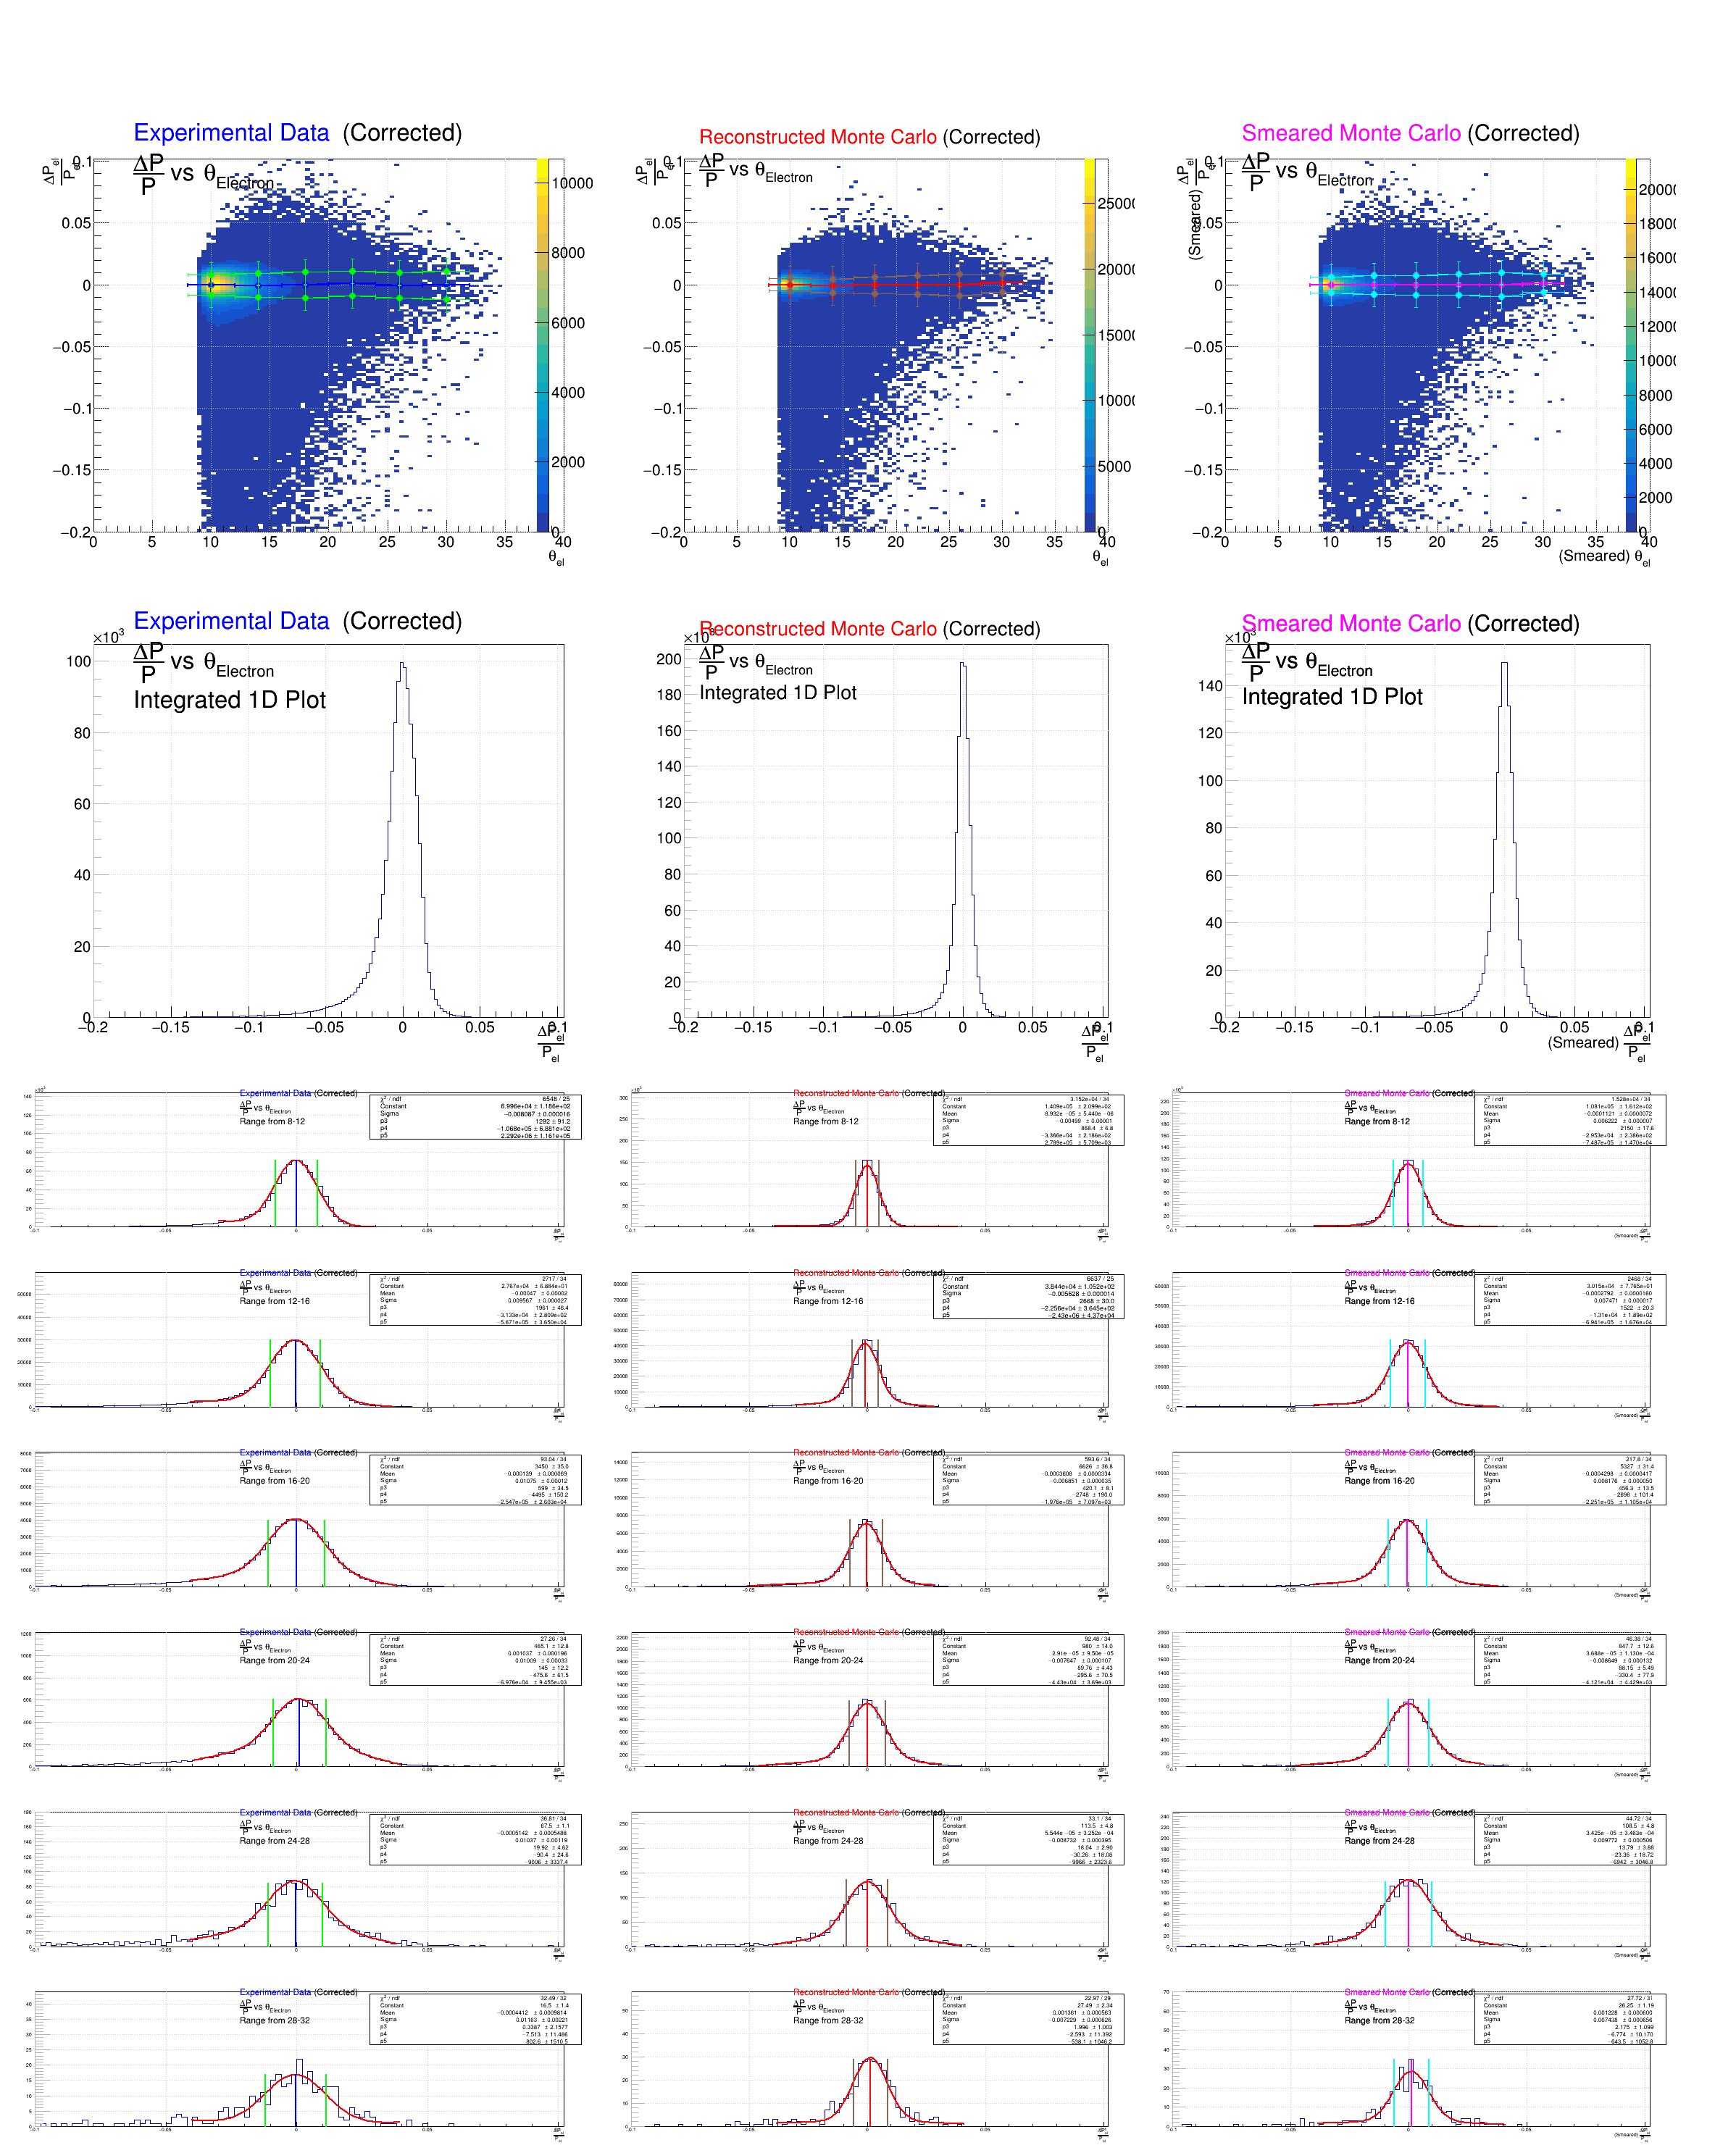

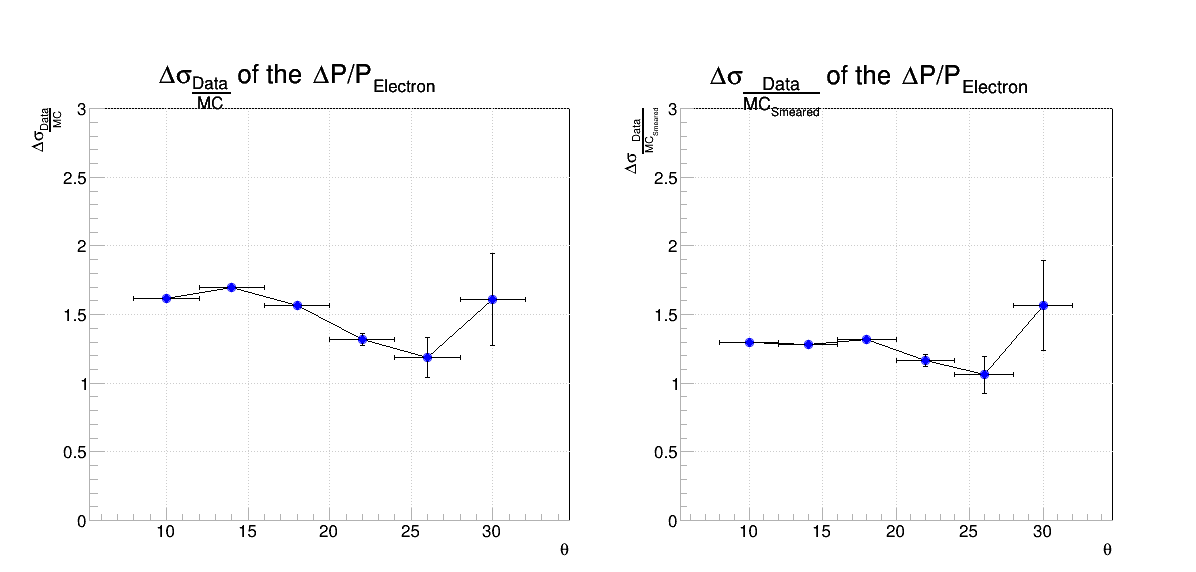

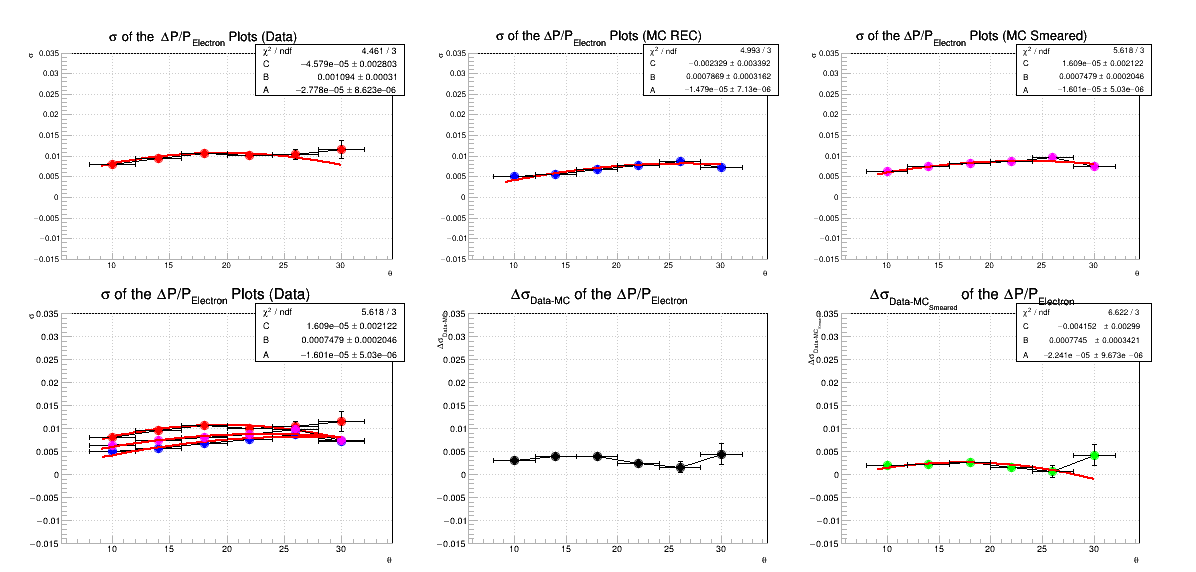

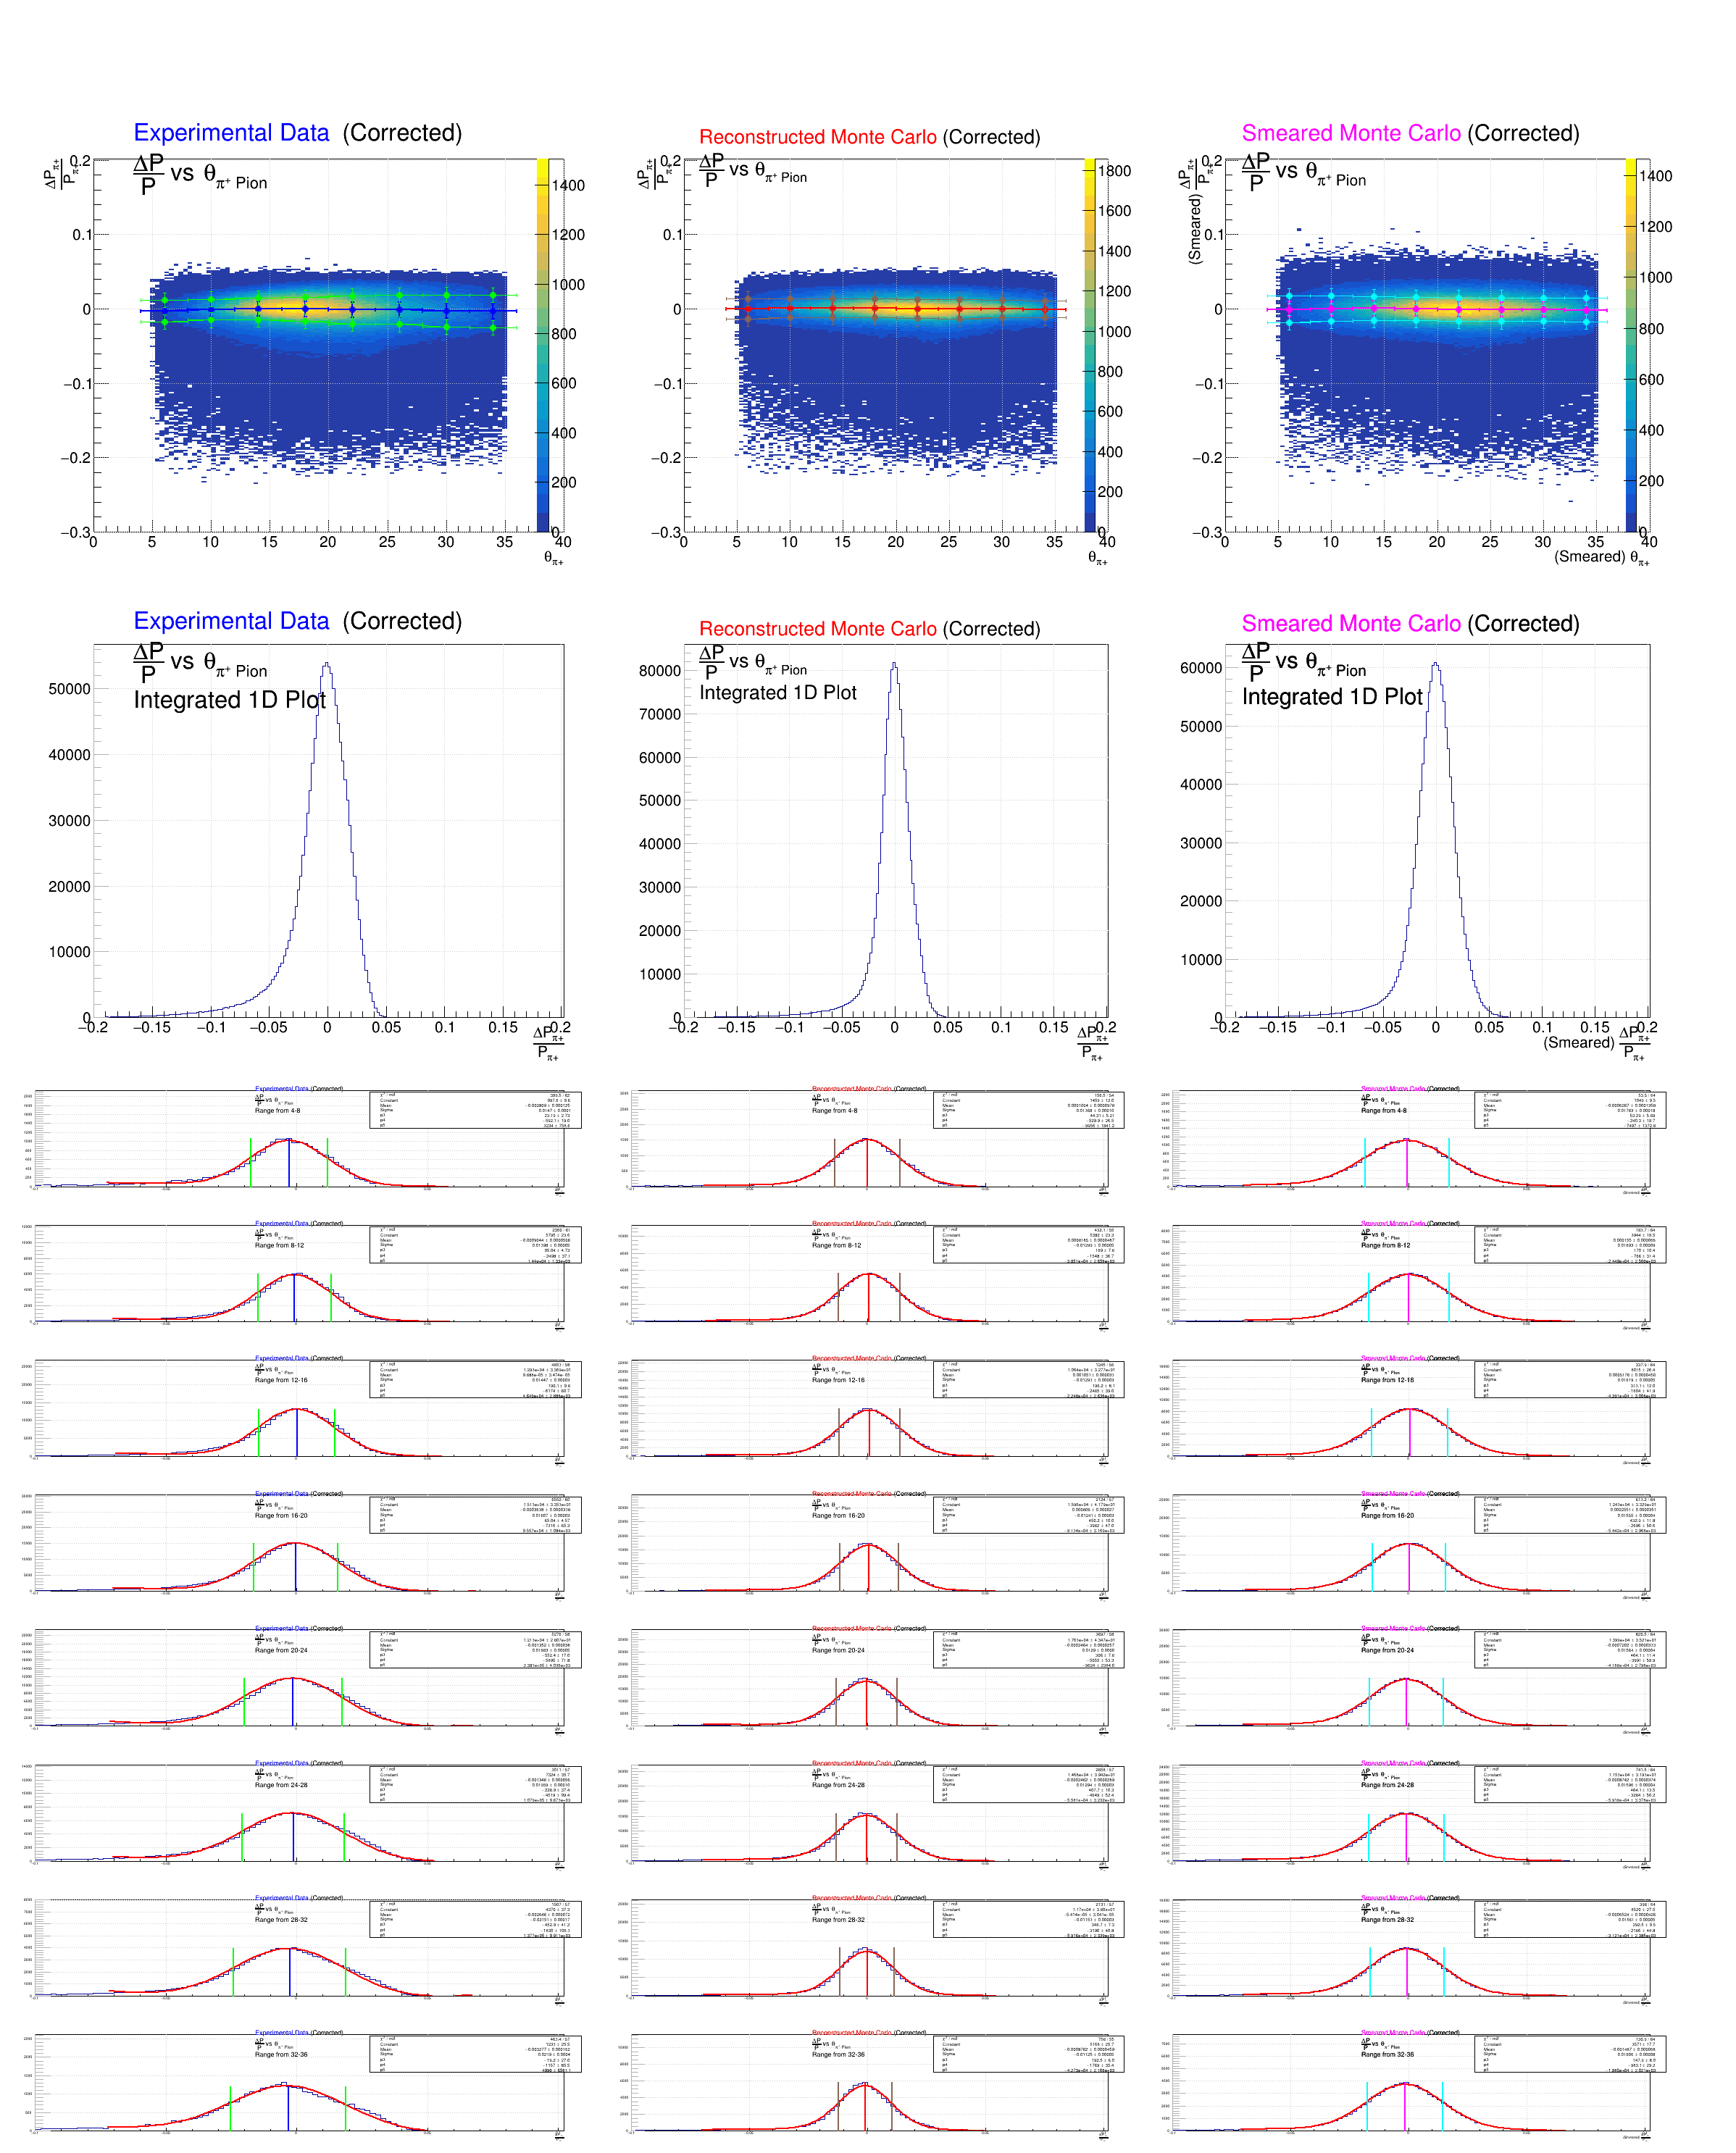

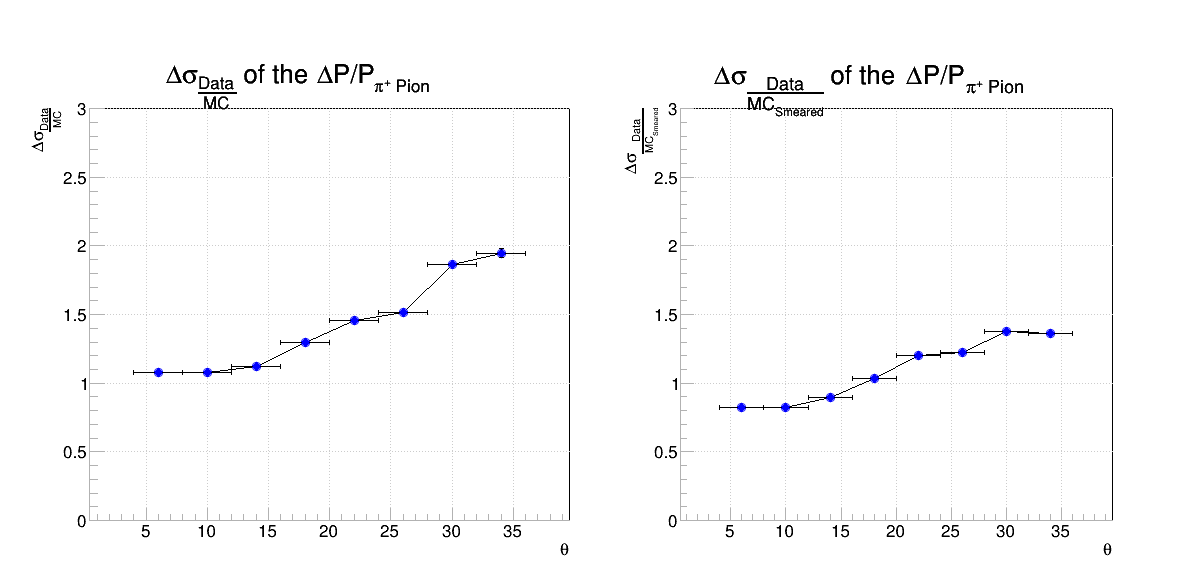

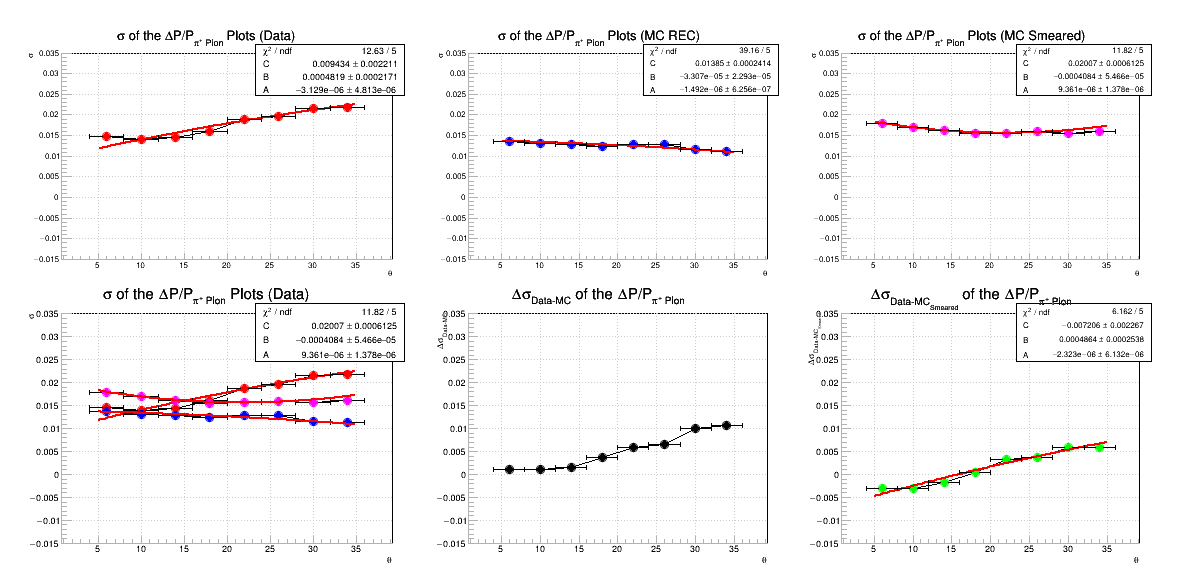

In [77]:
if("Mom_Cor_Histos" in Histo_Type or True):
    SF_Canvas, SF_Histos, Base_Line = {}, {}, {}
    for ii in rdf.GetListOfKeys():
        out_print_rdf         = str(ii.GetName())
        out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
        out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
        out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")
        if(any(conditions not in str(out_print_rdf) for conditions in ["Mom_Cor_Code", "cut_Complete_EDIS"])):
            continue
        if(not any(conditions in str(out_print_rdf) for conditions in ["DP_el_SF", "DP_pip_SF"])):
            continue
            
#         if(not any(conditions in str(out_print_rdf) for conditions in ["DP_el_SF"])):
#             continue
            
            
        test_canvas          = Canvas_Create(Name="test",    Num_Columns=1, Num_Rows=1, Size_X=60,   Size_Y=80,  cd_Space=0)
        
        SF_Histos[out_print_rdf]         = rdf.Get(out_print_rdf)
        SF_Histos[out_print_mdf]         = mdf.Get(out_print_mdf)
        SF_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared)
        
        SF_Histos[out_print_rdf]         = SF_Histos[out_print_rdf].Project3D("xz")
        SF_Histos[out_print_mdf]         = SF_Histos[out_print_mdf].Project3D("xz")
        SF_Histos[out_print_mdf_smeared] = SF_Histos[out_print_mdf_smeared].Project3D("xz")
        
        SF_Histo_Title = SF_Histos[out_print_rdf].GetTitle()
        Particle_Name  = "pip" if("#pi^{+} Pion" in str(SF_Histo_Title)) else "el"
        
        SF_Histo_Title = SF_Histo_Title.replace("xz projection",        "")
        SF_Histo_Title = SF_Histo_Title.replace(" vs P_{Electron}",     "")
        SF_Histo_Title = SF_Histo_Title.replace(" vs P_{#pi^{+} Pion}", "")
        
        SF_Histos[out_print_rdf].SetTitle("".join([root_color.Line,         "{#color[", str(root_color.Blue), "]{Experimental Data}",           " (Corrected)" if("(Corrected)" in str(SF_Histo_Title)) else "", "}{", str(SF_Histo_Title).replace("(Corrected)", ""), "}"]))
        SF_Histos[out_print_mdf].SetTitle("".join([root_color.Line,         "{#color[", str(root_color.Red),  "]{Reconstructed Monte Carlo}",   " (Corrected)" if("(Corrected)" in str(SF_Histo_Title)) else "", "}{", str(SF_Histo_Title).replace("(Corrected)", ""), "}"]))
        SF_Histos[out_print_mdf_smeared].SetTitle("".join([root_color.Line, "{#color[", str(root_color.Pink), "]{Smeared Monte Carlo}",         " (Corrected)" if("(Corrected)" in str(SF_Histo_Title)) else "", "}{", str(SF_Histo_Title).replace("(Corrected)", ""), "}"]))
        
        SF_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.2         if("Electron" in str(SF_Histo_Title)) else -0.3, 0.1 if("Electron" in str(SF_Histo_Title)) else 0.2)
        SF_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.2         if("Electron" in str(SF_Histo_Title)) else -0.3, 0.1 if("Electron" in str(SF_Histo_Title)) else 0.2)
        SF_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.2 if("Electron" in str(SF_Histo_Title)) else -0.3, 0.1 if("Electron" in str(SF_Histo_Title)) else 0.2)
        
        Sigma_SF_Smearing_Correction(Histo2D_Data=SF_Histos[out_print_rdf], Histo2D_MC=SF_Histos[out_print_mdf], Histo2D_MC_Smear=SF_Histos[out_print_mdf_smeared], minM=4 if(Particle_Name in ["pip"]) else 8, maxM=36 if(Particle_Name in ["pip"]) else 32, dM=4, particle=Particle_Name, Title_Data=str(SF_Histos[out_print_rdf].GetTitle()), Title_MC=str(SF_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(SF_Histos[out_print_mdf_smeared].GetTitle()))
        
        SF_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=3, Num_Rows=2, Size_X=2400, Size_Y=3000, cd_Space=0)
        
        # print(f"len(SF_Histos[out_print_rdf].Histo_1D_Slices) = {len(SF_Histos[out_print_rdf].Histo_1D_Slices)}")
        SF_Canvas_out_print_cd_1 = SF_Canvas[out_print].cd(1)
        SF_Canvas_out_print_cd_2 = SF_Canvas[out_print].cd(2)
        SF_Canvas_out_print_cd_3 = SF_Canvas[out_print].cd(3)
        SF_Canvas_out_print_cd_4 = SF_Canvas[out_print].cd(4)
        SF_Canvas_out_print_cd_5 = SF_Canvas[out_print].cd(5)
        SF_Canvas_out_print_cd_6 = SF_Canvas[out_print].cd(6)
        SF_Canvas_out_print_cd_1.Divide(1, 2)
        SF_Canvas_out_print_cd_2.Divide(1, 2)
        SF_Canvas_out_print_cd_3.Divide(1, 2)
        SF_Canvas_out_print_cd_4.Divide(1, len(SF_Histos[out_print_rdf].Histo_1D_Slices))
        SF_Canvas_out_print_cd_5.Divide(1, len(SF_Histos[out_print_mdf].Histo_1D_Slices))
        SF_Canvas_out_print_cd_6.Divide(1, len(SF_Histos[out_print_mdf_smeared].Histo_1D_Slices))
        
        SF_Canvas[out_print].Draw()
        
        Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated=SF_Canvas_out_print_cd_1, SF_Canvas_cd_Slice=SF_Canvas_out_print_cd_4, SF_Histo_Input=SF_Histos[out_print_rdf],         Histo_Type="rdf")

        Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated=SF_Canvas_out_print_cd_2, SF_Canvas_cd_Slice=SF_Canvas_out_print_cd_5, SF_Histo_Input=SF_Histos[out_print_mdf],         Histo_Type="mdf")
        
        Draw_Smearing_Histograms_to_Canvas(SF_Canvas_cd_Integrated=SF_Canvas_out_print_cd_3, SF_Canvas_cd_Slice=SF_Canvas_out_print_cd_6, SF_Histo_Input=SF_Histos[out_print_mdf_smeared], Histo_Type="mdf_smeared")
        
        
        Base_Line[f"{out_print_rdf}_MC"], Base_Line[f"{out_print_rdf}_MC_Smeared"] = ROOT.TLine(0, 3, 3, 0), ROOT.TLine(0, 3, 3, 0)
        Base_Line[f"{out_print_rdf}_MC"].SetLineColor(root_color.Black)
        Base_Line[f"{out_print_rdf}_MC_Smeared"].SetLineColor(root_color.Black)
        Base_Line[f"{out_print_rdf}_MC"].SetLineWidth(2)
        Base_Line[f"{out_print_rdf}_MC_Smeared"].SetLineWidth(2)
        # print(f"SF_Histos[out_print_rdf].gr2_Data_MC = {SF_Histos[out_print_rdf].gr2_Data_MC}")
        
        test = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=100, Size_Y=100, cd_Space=0)
        SF_Canvas[f"{out_print}_Delta_Sigma"] = Canvas_Create(Name=f"{out_print}_Delta_Sigma", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=600, cd_Space=0)
        SF_Canvas[f"{out_print}_Delta_Sigma"].Draw()
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Delta_Sigma"], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3)
        SF_Histos[out_print_rdf].gr2_Data_MC.GetXaxis().SetRangeUser(0, 40)
        # Base_Line[f"{out_print_rdf}_MC"].DrawLine(0, 3, 3, 0)
        Base_Line[f"{out_print_rdf}_MC"].Draw("same")
        SF_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Delta_Sigma"], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 3)
        SF_Histos[out_print_rdf].gr2_Data_MC_Smear.GetXaxis().SetRangeUser(0, 40)
        # Base_Line[f"{out_print_rdf}_MC_Smeared"].DrawLine(0, 3, 3, 0)
        Base_Line[f"{out_print_rdf}_MC_Smeared"].Draw("same")
        SF_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
        
        
        test = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=100, Size_Y=100, cd_Space=0)
        SF_Canvas[f"{out_print}_Sigma"] = Canvas_Create(Name=f"{out_print}_Sigma", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=600, cd_Space=0)
        SF_Canvas[f"{out_print}_Sigma"].Draw()
        
        
        Min_Range = 9  if(Particle_Name in ["el"]) else 5
        Max_Range = 30 if(Particle_Name in ["el"]) else 35
        Fit_rdf_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_rdf_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        Fit_mdf_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_mdf_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        Fit_sdf_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_sdf_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        
        Fit_rdf_Sigma_Vs_Theta.SetParName(2,   "A")
        Fit_rdf_Sigma_Vs_Theta.SetParameter(2,  0)
        Fit_rdf_Sigma_Vs_Theta.SetParLimits(2, -0.009, 0.009)
        Fit_mdf_Sigma_Vs_Theta.SetParName(2,   "A")
        Fit_mdf_Sigma_Vs_Theta.SetParameter(2,  0)
        if(Particle_Name not in ["pip"]):
            # Fit_mdf_Sigma_Vs_Theta.SetParameter(2,  0.01)
            # # Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.009,  0.009)
            # Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.02,  0.02)
            Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.001, 0.001)
        else:
            # Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.0001, 0.0001)
            Fit_mdf_Sigma_Vs_Theta.SetParLimits(2, -0.001, 0.001)
        Fit_sdf_Sigma_Vs_Theta.SetParName(2,   "A")
        Fit_sdf_Sigma_Vs_Theta.SetParameter(2,  0)
        if(Particle_Name not in ["pip"]):
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(2, -0.05, 0.05)
        else:
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(2, -0.0001, 0.0001)
        # Fit_sdf_Sigma_Vs_Theta.SetParameter(2,  0)
        # Fit_sdf_Sigma_Vs_Theta.SetParLimits(2, -0.05, 0.05)
        

        Fit_rdf_Sigma_Vs_Theta.SetParName(1,   "B")
        Fit_rdf_Sigma_Vs_Theta.SetParameter(1,  0)
        Fit_rdf_Sigma_Vs_Theta.SetParLimits(1, -0.5, 0.5)
        Fit_mdf_Sigma_Vs_Theta.SetParName(1,   "B")
        Fit_mdf_Sigma_Vs_Theta.SetParameter(1,  0)
        if(Particle_Name not in ["pip"]):
            Fit_mdf_Sigma_Vs_Theta.SetParLimits(1, -0.01,   0.1)
        else:
            # Fit_mdf_Sigma_Vs_Theta.SetParLimits(1, -0.05, 0.025)
            Fit_mdf_Sigma_Vs_Theta.SetParLimits(1, -0.1, 0.1)
        Fit_sdf_Sigma_Vs_Theta.SetParName(1,   "B")
        Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  -0.01)
        if(Particle_Name not in ["pip"]):
            Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  0)
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(1, -0.01, 0.01)
        else:
            Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  -0.01)
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(1, -0.05, 0.01)
        # Fit_sdf_Sigma_Vs_Theta.SetParameter(1,  0)
        # Fit_sdf_Sigma_Vs_Theta.SetParLimits(1, -0.5, 0.5)
        
        
        
        Fit_rdf_Sigma_Vs_Theta.SetParName(0,   "C")
        Fit_rdf_Sigma_Vs_Theta.SetParameter(0,  0)
        Fit_rdf_Sigma_Vs_Theta.SetParLimits(0, -0.5, 0.5)
        Fit_mdf_Sigma_Vs_Theta.SetParName(0,   "C")
        if(Particle_Name not in ["pip"]):
            Fit_mdf_Sigma_Vs_Theta.SetParameter(0,  0.005)
            Fit_mdf_Sigma_Vs_Theta.SetParLimits(0, -0.05, 0.02)
        else:
            Fit_mdf_Sigma_Vs_Theta.SetParameter(0,  0.015)
            Fit_mdf_Sigma_Vs_Theta.SetParLimits(0,  0.01, 0.02)
        Fit_sdf_Sigma_Vs_Theta.SetParName(0,   "C")
        if(Particle_Name not in ["pip"]):
            Fit_sdf_Sigma_Vs_Theta.SetParameter(0,  0.001)
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(0, -0.001, 0.05)
        else:
            Fit_sdf_Sigma_Vs_Theta.SetParameter(0, 0.01)
            Fit_sdf_Sigma_Vs_Theta.SetParLimits(0, 0, 0.05)
        # Fit_sdf_Sigma_Vs_Theta.SetParameter(0,  0)
        # Fit_sdf_Sigma_Vs_Theta.SetParLimits(0, -0.5, 0.5)
        
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].gr2_sigma.SetTitle("".join(["#sigma of the #DeltaP/P_{",         str(str(Particle_Name).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "} Plots (Data); #theta; #sigma"]))
        SF_Histos[out_print_rdf].gr2_sigma.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_rdf].gr2_sigma.SetMarkerColor(root_color.Red)
        SF_Histos[out_print_rdf].gr2_sigma.Draw("ALP same")
        SF_Histos[out_print_rdf].gr2_sigma.Fit(Fit_rdf_Sigma_Vs_Theta, "BRQ")
        
        if(abs(Fit_rdf_Sigma_Vs_Theta.GetParameter(2)) < 0.01):
            parA_rdf = "{:.4e}".format(Fit_rdf_Sigma_Vs_Theta.GetParameter(2))
        else:
            parA_rdf = round(Fit_rdf_Sigma_Vs_Theta.GetParameter(2), 5)
        if(abs(Fit_rdf_Sigma_Vs_Theta.GetParameter(1)) < 0.01):
            parB_rdf = "{:.4e}".format(Fit_rdf_Sigma_Vs_Theta.GetParameter(1))
        else:
            parB_rdf = round(Fit_rdf_Sigma_Vs_Theta.GetParameter(1), 5)
        if(abs(Fit_rdf_Sigma_Vs_Theta.GetParameter(0)) < 0.01):
            parC_rdf = "{:.4e}".format(Fit_rdf_Sigma_Vs_Theta.GetParameter(0))
        else:
            parC_rdf = round(Fit_rdf_Sigma_Vs_Theta.GetParameter(0), 5)
                
        print(f"""
Sigma in Data:
sigma = ({parA_rdf})*{Particle_Name}th*{Particle_Name}th + ({parB_rdf})*{Particle_Name}th + ({parC_rdf})""")
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_mdf].gr2_sigma.SetTitle("".join(["#sigma of the #DeltaP/P_{",         str(str(Particle_Name).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "} Plots (MC REC); #theta; #sigma"]))
        SF_Histos[out_print_mdf].gr2_sigma.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_mdf].gr2_sigma.SetMarkerColor(root_color.Blue)
        SF_Histos[out_print_mdf].gr2_sigma.Draw("ALP same")
        SF_Histos[out_print_mdf].gr2_sigma.Fit(Fit_mdf_Sigma_Vs_Theta, "BRQ")
        
        if(abs(Fit_mdf_Sigma_Vs_Theta.GetParameter(2)) < 0.01):
            parA_mdf = "{:.4e}".format(Fit_mdf_Sigma_Vs_Theta.GetParameter(2))
        else:
            parA_mdf = round(Fit_mdf_Sigma_Vs_Theta.GetParameter(2), 5)
        if(abs(Fit_mdf_Sigma_Vs_Theta.GetParameter(1)) < 0.01):
            parB_mdf = "{:.4e}".format(Fit_mdf_Sigma_Vs_Theta.GetParameter(1))
        else:
            parB_mdf = round(Fit_mdf_Sigma_Vs_Theta.GetParameter(1), 5)
        if(abs(Fit_mdf_Sigma_Vs_Theta.GetParameter(0)) < 0.01):
            parC_mdf = "{:.4e}".format(Fit_mdf_Sigma_Vs_Theta.GetParameter(0))
        else:
            parC_mdf = round(Fit_mdf_Sigma_Vs_Theta.GetParameter(0), 5)
        
        print(f"""
Sigma in MC:
sigma = ({parA_mdf})*{Particle_Name}th*{Particle_Name}th + ({parB_mdf})*{Particle_Name}th + ({parC_mdf})""")
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_mdf_smeared].gr2_sigma.SetTitle("".join(["#sigma of the #DeltaP/P_{", str(str(Particle_Name).replace("pip", "#pi^{+} Pion")).replace("el", "Electron"), "} Plots (MC Smeared); #theta; #sigma"]))
        SF_Histos[out_print_mdf_smeared].gr2_sigma.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_mdf_smeared].gr2_sigma.SetMarkerColor(root_color.Pink)
        SF_Histos[out_print_mdf_smeared].gr2_sigma.Draw("ALP same")
        SF_Histos[out_print_mdf_smeared].gr2_sigma.Fit(Fit_sdf_Sigma_Vs_Theta, "BRQ")
        
        if(abs(Fit_sdf_Sigma_Vs_Theta.GetParameter(2)) < 0.01):
            parA_sdf = "{:.4e}".format(Fit_sdf_Sigma_Vs_Theta.GetParameter(2))
        else:
            parA_sdf = round(Fit_sdf_Sigma_Vs_Theta.GetParameter(2), 5)
        if(abs(Fit_sdf_Sigma_Vs_Theta.GetParameter(1)) < 0.01):
            parB_sdf = "{:.4e}".format(Fit_sdf_Sigma_Vs_Theta.GetParameter(1))
        else:
            parB_sdf = round(Fit_sdf_Sigma_Vs_Theta.GetParameter(1), 5)
        if(abs(Fit_sdf_Sigma_Vs_Theta.GetParameter(0)) < 0.01):
            parC_sdf = "{:.4e}".format(Fit_sdf_Sigma_Vs_Theta.GetParameter(0))
        else:
            parC_sdf = round(Fit_sdf_Sigma_Vs_Theta.GetParameter(0), 5)
            
#         print(f"""
# Sigma in MC Smeared:
# sigma = ({parA_sdf})*{Particle_Name}th*{Particle_Name}th + ({parB_sdf})*{Particle_Name}th + ({parC_sdf})""")

        if(abs(float(parA_rdf) - float(parA_mdf)) < 0.01):
            parA = "{:.4e}".format(float(parA_rdf) - float(parA_mdf))
        else:
            parA = round(float(parA_rdf) - float(parA_mdf), 5)
        if(abs(float(parB_rdf) - float(parB_mdf)) < 0.01):
            parB = "{:.4e}".format(float(parB_rdf) - float(parB_mdf))
        else:
            parB = round(float(parB_rdf) - float(parB_mdf), 5)
        if(abs(float(parC_rdf) - float(parC_mdf)) < 0.01):
            parC = "{:.4e}".format(float(parC_rdf) - float(parC_mdf))
        else:
            parC = round(float(parC_rdf) - float(parC_mdf), 5)
        print("".join([f"""{color.RED}
""", "if(ivec == 1){ // Pi+ Pion" if(Particle_Name in ["pip"]) else "if(ivec == 0){ // Electron", f"""
    Smear_SF_Theta = ({parA})*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + ({parB})*(TMath::RadToDeg()*Th_rec) + ({parC});""", "\n}", color.END]))
        
        
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=4, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].gr2_sigma.Draw("APL same")
        SF_Histos[out_print_mdf].gr2_sigma.Draw("PL same")
        SF_Histos[out_print_mdf_smeared].gr2_sigma.Draw("PL same")
        
        
        
        
#         Fit_mdf_Delta_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_mdf_Delta_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParName(2,   "A")
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParameter(2,  float(parA))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParLimits(2,  0.99*float(parA), 1.01*float(parA))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParName(1,   "B")
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParameter(1,  float(parB))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParLimits(1,  0.99*float(parB), 1.01*float(parB))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParName(0,   "C")
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParameter(0,  float(parC))
#         Fit_mdf_Delta_Sigma_Vs_Theta.SetParLimits(0,  0.99*float(parC), 1.01*float(parC))
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=5, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC.Draw("APL same")
#         SF_Histos[out_print_rdf].Delta_Sigma_Data_MC.Fit(Fit_mdf_Delta_Sigma_Vs_Theta, "BRQ")
#         parA = Fit_mdf_Delta_Sigma_Vs_Theta.GetParameter("A")
#         parB = Fit_mdf_Delta_Sigma_Vs_Theta.GetParameter("B")
#         parC = Fit_mdf_Delta_Sigma_Vs_Theta.GetParameter("C")
#         if(abs(parA) < 0.01):
#             parA = "{:.4e}".format(parA)
#         else:
#             parA = round(parA, 5)
#         if(abs(parB) < 0.01):
#             parB = "{:.4e}".format(parB)
#         else:
#             parB = round(parB, 5)
#         if(abs(parC) < 0.01):
#             parC = "{:.4e}".format(parC)
#         else:
#             parC = round(parC, 5)
#         print("".join([f"""{color.GREEN}
# """, "if(ivec == 1){ // Pi+ Pion" if(Particle_Name in ["pip"]) else "if(ivec == 0){ // Electron", f"""
#     Smear_SF_Theta = ({parA})*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + ({parB})*(TMath::RadToDeg()*Th_rec) + ({parC});""", "\n}", color.END]))
        
    
        Fit_sdf_Delta_Sigma_Vs_Theta = ROOT.TF1(f"{out_print}_Fit_sdf_Delta_Sigma_Vs_Theta", "pol2(0)", Min_Range, Max_Range)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParName(2,   "A")
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParameter(2,  0)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParLimits(2, -0.05, 0.05)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParName(1,   "B")
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParameter(1,  0)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParLimits(1, -0.05, 0.05)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParName(0,   "C")
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParameter(0,  0)
        Fit_sdf_Delta_Sigma_Vs_Theta.SetParLimits(0, -0.05, 0.05)
        Draw_Canvas(canvas=SF_Canvas[f"{out_print}_Sigma"], cd_num=6, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC_Smear.GetYaxis().SetRangeUser(-0.015, 0.035)
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC_Smear.Draw("APL same")
        SF_Histos[out_print_rdf].Delta_Sigma_Data_MC_Smear.Fit(Fit_sdf_Delta_Sigma_Vs_Theta, "BRQ")
        parA = Fit_sdf_Delta_Sigma_Vs_Theta.GetParameter("A")
        parB = Fit_sdf_Delta_Sigma_Vs_Theta.GetParameter("B")
        parC = Fit_sdf_Delta_Sigma_Vs_Theta.GetParameter("C")
        if(abs(parA) < 0.01):
            parA = "{:.4e}".format(parA)
        else:
            parA = round(parA, 5)
        if(abs(parB) < 0.01):
            parB = "{:.4e}".format(parB)
        else:
            parB = round(parB, 5)
        if(abs(parC) < 0.01):
            parC = "{:.4e}".format(parC)
        else:
            parC = round(parC, 5)
        print("".join([f"""{color.GREEN}
double Extra_Smear_SF_Theta = 0;
""", "if(ivec == 1){ // Pi+ Pion" if(Particle_Name in ["pip"]) else "if(ivec == 0){ // Electron", f"""
    Extra_Smear_SF_Theta = ({parA})*(TMath::RadToDeg()*Th_rec)*(TMath::RadToDeg()*Th_rec) + ({parB})*(TMath::RadToDeg()*Th_rec) + ({parC});
    P_new_rec      = P_new_rec   +   (P_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));
    // Th_new_rec  = Th_new_rec  +  (Th_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));
    // Phi_new_rec = Phi_new_rec + (Phi_new_rec)*Extra_Smear_SF_Theta*smear_factor*(gRandom->Gaus(0,1));""", "\n}", color.END]))
        
        print("")
        
print("Done")

.

.

.

.

In [75]:
Stop (Old Code Ahead...)

SyntaxError: invalid syntax (529141792.py, line 1)

In [ ]:
def Find_Smear_Factor_Funtion(File_Name_SF):
    if("SF_Testing_" in str(File_Name_SF)):
        File_Name_SF = str(File_Name_SF).replace("_No_Cor", "")
    Smear_Factor_Output = "ERROR"
    if(str(File_Name_SF) in ["Gen_Cuts_V3_Mom_Cor_All",           "Gen_Cut_V4_Mom_Cor_All",     "Gen_Cut_V5_Mom_Cor_All",            "Gen_Cuts_V6_Mom_Cor_V7_All", "SF_Testing_Mom_Cor_V7_All"]):
        Smear_Factor_Output = "0.8"
    if(str(File_Name_SF) in ["Gen_Cuts_V3_Mom_Cor_V2_All",        "Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V6_Mom_Cor_V1_All", "SF_Testing_Mom_Cor_V1_All"]):
        Smear_Factor_Output = "0.75"
    if(str(File_Name_SF) in ["Gen_Cuts_V3_Mom_Cor_V3_All",        "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All", "Gen_Cuts_V6_Mom_Cor_V2_All", "SF_Testing_Mom_Cor_V2_All"]):
        Smear_Factor_Output = "0.5"
    if(str(File_Name_SF) in ["Gen_Cuts_V3_Mom_Cor_V4_All",        "Gen_Cuts_V4_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All", "Gen_Cuts_V6_Mom_Cor_V3_All", "SF_Testing_Mom_Cor_V3_All"]):
        Smear_Factor_Output = "1.0"
    if(str(File_Name_SF) in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V4_All", "Gen_Cuts_V6_Mom_Cor_V4_All", "SF_Testing_Mom_Cor_V4_All"]):
        Smear_Factor_Output = "0.7"
    if(str(File_Name_SF) in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V5_All", "Gen_Cuts_V6_Mom_Cor_V5_All", "SF_Testing_Mom_Cor_V5_All"]):
        Smear_Factor_Output = "1.5"
    if(str(File_Name_SF) in ["Gen_Cuts_V6_Mom_Cor_V6_All",        "SF_Testing_Mom_Cor_V6_All"]):
        Smear_Factor_Output = "0.9"
    if(str(File_Name_SF) in ["Gen_Cuts_V6_Mom_Cor_V6_All",        "SF_Testing_Mom_Cor_V8_All"]):
        Smear_Factor_Output = "1.2"
    if(str(File_Name_SF) in ["Gen_Cuts_V6_Mom_Cor_V6_All",        "SF_Testing_Mom_Cor_V9_All"]):
        Smear_Factor_Output = "2.0"
        
    return Smear_Factor_Output
    
print("\nDONE with Find_Smear_Factor_Funtion()\n")

In [ ]:
# Last used on 7-5-2023
# # mdf_FX = ROOT.TFile(str(FileLocation("New_Smearing_Creation_All", "mdf")), "READ")
# # mdf_FX = ROOT.TFile(str(FileLocation("Multi_Dimension_Unfold_V5_FX_Mom_Cor_All", "mdf")), "READ")
# mdf_FX = ROOT.TFile(str(FileLocation("New_Smearing_Factor_V3_FX_Mom_Cor_All", "mdf")), "READ")


# REAL_File_Name   = "Gen_Cuts_V3_Mom_Cor_All"
# MC_REC_File_Name = "Gen_Cuts_V3_Mom_Cor_V2_All"
# FX_REC_File_Name = "Gen_Cuts_V3_Mom_Cor_FX_All"

# ################################################################################################################################################################
# ##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
# ################################################################################################################################################################
# try:
#     rdf    = ROOT.TFile(str(FileLocation(str(REAL_File_Name),   "rdf")), "READ")
#     print("".join(["The total number of histograms available for the", color.BLUE,   " Real (Experimental) Data",       color.END, "\tin '", color.BOLD, REAL_File_Name,   color.END, "'\tis ", color.BOLD, str(len(rdf.GetListOfKeys())),    color.END]))
# except:
#     print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
# try:
#     mdf    = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
#     print("".join(["The total number of histograms available for the", color.RED,    " Reconstructed Monte Carlo Data", color.END, "\tin '", color.BOLD, MC_REC_File_Name, color.END, "'\tis ", color.BOLD, str(len(mdf.GetListOfKeys())),    color.END]))
# except:
#     print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
# try:
#     mdf_FX = ROOT.TFile(str(FileLocation(str(FX_REC_File_Name), "mdf")), "READ")
#     print("".join(["The total number of histograms available for the", color.YELLOW, " Smeared (FX) Monte Carlo Data",  color.END, "\tin '", color.BOLD, FX_REC_File_Name, color.END, "'\tis ", color.BOLD, str(len(mdf_FX.GetListOfKeys())), color.END]))
# except:
#     print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf_FX' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
# ################################################################################################################################################################
# ##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
# ################################################################################################################################################################


# if("Mom_Cor_Histos" in Histo_Type and True):
#     MM_or_Delta_List = ["MM"]
# #     MM_or_Delta_List = ["DP"]

# # #     MM_or_Delta_List = ["DP", "DP_cor"]
# # #     MM_or_Delta_List = ["MM", "DP"]
# # #     MM_or_Delta_List = ["Phase"]
# #     MM_or_Delta_List = ["MM", "DP", "DP_cor", "Phase"]
    
# #     MM_or_Delta_List = ["MM", "DP", "Phase"]
    
# #     MM_or_Delta_List = ["MM", "Phase"]

# # #     MM_or_Delta_List = ["DP_cor"]
    
#     Delta_Mom_or_Theta_List = ["Theta"]
#     Delta_Mom_or_Theta_List = ["Mom"]
# #     Delta_Mom_or_Theta_List = ["Mom", "Theta"]
    
#     Mom_or_Theta_List = ["Mom"]
# #     Mom_or_Theta_List = ["Theta"]
# #     Mom_or_Theta_List = ["Mom", "Theta"]
    
#     Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
    
#     for MM_or_Delta in MM_or_Delta_List:
#         for Delta_Mom_or_Theta in Delta_Mom_or_Theta_List:
#             if((MM_or_Delta in ["MM", "Phase"]) and (len(Delta_Mom_or_Theta_List) > 1)):
#                 if(Delta_Mom_or_Theta != Delta_Mom_or_Theta_List[0]):
#                     continue
            
#             for Mom_or_Theta in Mom_or_Theta_List:
#                 try:
#                     for ii in rdf.GetListOfKeys():
#                         out_print_rdf = str(ii.GetName())

#                         out_print                = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
#                         out_print_mdf            = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
#                         out_print_mdf_smeared    = out_print_mdf.replace("(Smear-Type='')",   "(Smear-Type='smear')")
#                         out_print_mdf_smeared_FX = "".join([str(out_print_mdf_smeared), "_FX"])

#                         if("Mom_Cor_Code" not in str(out_print)):
#                             continue

#                         if("cut_Complete_EDIS" not in str(out_print)):
#                             continue
#                         # if("cut_Complete" not in str(out_print)):
#                         #     continue

#                         # Missing Mass Histograms
#                         if("Var-D1='MM'" not in str(out_print)):
#                             if(MM_or_Delta in ["MM"]):
#                                 continue
#                             # ∆P Histograms Histograms
#                             if(MM_or_Delta in ["DP", "DP_cor"]):
#                                 if((Delta_Mom_or_Theta == "Mom")   and ("Delta_Pel_Cors"      not in str(out_print) and "Delta_Ppip_Cors"     not in str(out_print))):
#                                     continue
#                                 # ∆Theta Histograms Histograms
#                                 if((Delta_Mom_or_Theta == "Theta") and ("Delta_Theta_el_Cors" not in str(out_print) and "Delta_Theta_pip_Cors" not in str(out_print))):
#                                     continue
#                         elif(MM_or_Delta not in ["MM"]):
#                             continue

#                         if(("Delta" in str(out_print))             and (MM_or_Delta   not in ["DP", "DP_cor"])):
#                             continue
                            
#                         if((MM_or_Delta in ["MM", "DP", "DP_cor"]) and ("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print))):
#                             continue
                            
#                         # if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='pip'" not in str(out_print))):
#                         #     continue

#                         try:
#                             if(MM_or_Delta not in ["DP", "MM", "DP_cor"]):
#                                 Mom_Cor_Histos[out_print_rdf]                   = rdf.Get(out_print_rdf)
#                                 Mom_Cor_Histos[out_print_mdf]                   = mdf.Get(out_print_mdf)
#                                 Mom_Cor_Histos[out_print_mdf_smeared]           = mdf.Get(out_print_mdf_smeared)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX]        = mdf_FX.Get(out_print_mdf_smeared)
#                                 out_print_rdf_SIDIS                             = str(out_print_rdf).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
#                                 out_print_mdf_SIDIS                             = str(out_print_mdf).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
#                                 out_print_mdf_smeared_SIDIS                     = str(out_print_mdf_smeared).replace("cut_Complete_EDIS", "cut_Complete_SIDIS")
#                                 out_print_mdf_smeared_SIDIS_FX                  = "".join([str(out_print_mdf_smeared).replace("cut_Complete_EDIS", "cut_Complete_SIDIS"), "_FX"])
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS]             = rdf.Get(out_print_rdf_SIDIS)
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS]             = mdf.Get(out_print_mdf_SIDIS)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]     = mdf.Get(out_print_mdf_smeared_SIDIS)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]  = mdf_FX.Get(out_print_mdf_smeared_SIDIS)
#                             else:
#                                 out_print_rdf                                   = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_rdf)])
#                                 out_print_mdf                                   = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf)])
#                                 out_print_mdf_smeared                           = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf_smeared)])
#                                 out_print_mdf_smeared_FX                        = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print_mdf_smeared_FX)])
#                                 Mom_Cor_Histos[out_print_rdf]                   = rdf.Get(out_print_rdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
#                                 Mom_Cor_Histos[out_print_mdf]                   = mdf.Get(out_print_mdf.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared]           = mdf.Get(out_print_mdf_smeared.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX]        = mdf_FX.Get(out_print_mdf_smeared.replace("".join(["Vs_", str(Mom_or_Theta), "_"]), ""))
#                         except:
#                             print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                         # print(type(Mom_Cor_Histos[out_print]))
#                         # print(Mom_Cor_Histos[out_print_mdf_smeared])
                        
#                         if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                             canvas_name = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print)])
#                         else:
#                             canvas_name = out_print
#                         # print(out_print)
#                         # print(canvas_name)
#                         if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                             Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=5, Num_Rows=2, Size_X=1200*2, Size_Y=1800*2, cd_Space=0)
#                             if(Mom_or_Theta == "Mom"):
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                                     Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
#                                     Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                                     Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                                     Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
#                                     Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                                     Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                                     Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
#                                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('yx')
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("/Sector", ""))
#                                 if("Delta" in out_print):
#                                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     if("Var-D2='el'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(2, 8.5)
#                                     if("Var-D2='pip'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(1, 5.5)
#                                 if("MM" in out_print):
#                                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     if("Var-D2='el'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(2, 8.5)
#                                     if("Var-D2='pip'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                         Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(1, 5.5)

#                             if(Mom_or_Theta == "Theta"):
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                                     Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
#                                     Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
#                                     Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                                     Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
#                                     Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
#                                     Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                                     Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
#                                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
#                                 if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('yz')
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("/Sector", ""))
#                                 if("Delta" in out_print):
#                                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(-0.5, 0.5)
#                                     if("Var-D2='el'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                     if("Var-D2='pip'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))

#                                 if("MM" in out_print):
#                                     Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(0.6, 1.2)
#                                     if("Var-D2='el'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
#                                     if("Var-D2='pip'" in str(out_print)):
#                                         test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                         # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
#                                         Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                        
                                        
#                         else:
#                             Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1000, cd_Space=0)
#                             Mom_Cor_Canvas[canvas_name].SetFillColor(root_color.LGrey)
#                             #################################
#                             ##=====##   Vs Angles   ##=====##
#                             #################################
#                             ##=====##   Exclusive   ##=====##
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])] = Mom_Cor_Histos[out_print_rdf].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])] = Mom_Cor_Histos[out_print_mdf].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             ##=====##     SIDIS     ##=====##
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
#                                 Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]))):
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].Project3D('xy')
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].GetTitle()).replace("vs p", ""))
#                             #################################
#                             ##=====##  Vs Momentum  ##=====##
#                             #################################
#                             ##=====##   Exclusive   ##=====##
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
#                                 Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_rdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
#                                 Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
#                                 Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print)) else "SIDIS Cuts" if("SIDIS" in str(out_print)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().GetTitle()).replace("#", ""))
#                             ##=====##     SIDIS     ##=====##
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("xz projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))
#                             if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]))):
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].Project3D('xz')
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS_FX)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS_FX)) else "Cut Error?", "}"]))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetTitle()).replace("vs #phi", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().GetTitle()).replace("#", ""))
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))

#                         Mom_Cor_Canvas[canvas_name].Draw()
#                         try:
#                             Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[canvas_name].cd(1)
#                             Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[canvas_name].cd(2)
#                             Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[canvas_name].cd(3)
#                             Mom_Cor_Canvas_cd_4_Slice = Mom_Cor_Canvas[canvas_name].cd(4)
                            
                            
                            
#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_rdf].Draw("colz")
#                             else:
#                                 Mom_Cor_Canvas_cd_2_Slice.Divide(2, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_2_Slice.SetFillColor(root_color.LGrey)
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos[out_print_rdf].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos[out_print_rdf_SIDIS].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.1, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.1, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Draw("colz")
                                

#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D.SetLineWidth(2)
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

#                                 # Mom_Cor_Histos[out_print_rdf].Draw("lego2")
#                                 # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)

#                                 Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
#                                 # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
#                                 Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
#                                 out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)



#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D.SetLineWidth(2)
                                
#                                 Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf].Draw("colz")
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
#                                 Mom_Cor_Histos[out_print_mdf].gr2.SetLineColor(root_color.Red)
#                                 Mom_Cor_Histos[out_print_mdf].gr2.SetMarkerColor(root_color.Red)
#                                 Mom_Cor_Histos[out_print_mdf].gr2.Draw("same PL")
                                
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.Draw("same PL")
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.Draw("same PL")
                                
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 Mom_Cor_Histos[out_print_mdf].hy.SetLineColor(root_color.Red)
#                                 Mom_Cor_Histos[out_print_mdf].hy.Draw("same")
#                                 out_print_mdf_peak, out_print_mdf_sig, out_print_mdf_max, out_print_mdf_errors = Mom_Cor_Histos[out_print_mdf].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].DrawLine(out_print_mdf_peak, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak, out_print_mdf_max)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_peak + out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak + out_print_mdf_sig, out_print_mdf_max)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_peak - out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak - out_print_mdf_sig, out_print_mdf_max)
                                
#                                 Mom_Cor_Canvas_cd_4_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_4_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Mom_Cor_Canvas_cd_4_Slice.cd(2).SetPad(xlow=0, ylow=0,     xup=1, yup=0.355)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
                                
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)

#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
                                
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

                                
                                

#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D.SetLineWidth(2)
                                
#                                 Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0,     xup=1, yup=0.355)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].Draw("colz")
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
                                
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.Draw("same")
#                                 out_print_mdf_smeared_FX_peak, out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max, out_print_mdf_smeared_FX_errors = Mom_Cor_Histos[out_print_mdf_smeared_FX].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].DrawLine(out_print_mdf_smeared_FX_peak, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak, out_print_mdf_smeared_FX_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].SetLineColor(41)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_FX_peak + out_print_mdf_smeared_FX_sig, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak + out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].SetLineColor(41)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_FX_peak - out_print_mdf_smeared_FX_sig, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak - out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max)
#                             else:
#                                 Mom_Cor_Canvas_cd_1_Slice.Divide(2, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_1_Slice.SetFillColor(root_color.LGrey)
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1, yup=1.10)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].Draw("colz")
                                
#                                 Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1, yup=0.55)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].Draw("colz")
                                
 

#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D.SetLineWidth(2)
#                                 Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

#                                 Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf].hy.Draw("same")
#                                 out_print_mdf_peak, out_print_mdf_sig, out_print_mdf_max, out_print_mdf_errors = Mom_Cor_Histos[out_print_mdf].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated"])].DrawLine(out_print_mdf_peak, 0, out_print_mdf_peak, out_print_mdf_max)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineColor(28)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_peak + out_print_mdf_sig, 0, out_print_mdf_peak + out_print_mdf_sig, out_print_mdf_max)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineColor(28)
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_peak - out_print_mdf_sig, 0, out_print_mdf_peak - out_print_mdf_sig, out_print_mdf_max)
                                
#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 Tline_Simple_Ideal_2D_Smeared = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D_Smeared.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D_Smeared.SetLineWidth(2)
#                                 Tline_Simple_Ideal_2D_Smeared.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

#                                 Mom_Cor_Canvas_cd_4_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                
#                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)



#                                 Mom_Cor_Canvas_cd_5_Slice = Mom_Cor_Canvas[canvas_name].cd(5)
#                                 Mom_Cor_Canvas_cd_5_Slice.Divide(1, 2, 0, 0)
#                                 Mom_Cor_Canvas_cd_5_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)

#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])] = ROOT.TMultiGraph("".join(["Combined_", str(canvas_name)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))

#                                 Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2.Clone()
#                                 # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))
                                
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "overlayed"])] = Mom_Cor_Histos[out_print_mdf].gr2.Clone()
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf].gr2.GetName()), "_Overlay"]))
                                
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()), "_Overlay"]))
                                
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.Clone()
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.GetName()), "_Overlay"]))


#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Reconstructed Overlayed}"))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle()))

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                
#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerColor(root_color.Blue)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerColor(root_color.Red)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerColor(root_color.Pink)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerColor(root_color.Pink)

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetLineColor(root_color.Blue)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetLineColor(root_color.Red)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetLineColor(root_color.Pink)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetLineColor(root_color.Pink)

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetLineWidth(2)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetLineWidth(2)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetLineWidth(2)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetLineWidth(2)

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerSize(1)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerSize(1)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerSize(1)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerSize(1)

#                                 Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerStyle(8)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerStyle(8)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerStyle(8)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerStyle(8)

#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerStyle(8)

#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerStyle(8)

#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)
                                
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineWidth(3)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineWidth(3)

#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(28)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(28)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(28)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(28)

#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineWidth(1)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineWidth(1)
                                
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)

#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(3)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(3)
                                
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerColor(7)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineColor(7)

#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineWidth(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerSize(1)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineWidth(1)

#                                 # Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
#                                 # Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)


#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])], "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down, "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up,   "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf), "overlayed"])], "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf].gr2_sigma_down, "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf].gr2_sigma_up,   "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])], "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down, "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up,   "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])], "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down, "lp")
#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up,   "lp")


#                                 if(MM_or_Delta in ["DP", "DP_cor"]):
#                                     Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(-0.45, 0.45)
#                                 else:
#                                     Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(0.6, 1.2)


#                                 Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Draw("AL same")

#                                 Tline_Simple_Ideal_2D_Compare = ROOT.TLine()
#                                 Tline_Simple_Ideal_2D_Compare.SetLineColor(root_color.Black)
#                                 Tline_Simple_Ideal_2D_Compare.SetLineWidth(2)
#                                 Tline_Simple_Ideal_2D_Compare.DrawLine(7 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 2.5 if(Mom_or_Theta == "Theta") else 4.35 if("Var-D2='el'" in str(out_print)) else 1.35, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 29 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 37.5 if(Mom_or_Theta == "Theta") else 8.15 if("Var-D2='el'" in str(out_print)) else 5.15, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)


#                                 Mom_Cor_Canvas_cd_5_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
#                                 Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                 # ROOT.gPad.SetLogz(1)
#                                 # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
#                                 # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")

#                                 Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
#                                 Mom_Cor_Histos[out_print_mdf].hy.SetLineColor(root_color.Red)
#                                 Mom_Cor_Histos[out_print_rdf].hy.SetLineColor(root_color.Blue)
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.SetLineColor(40)
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_mdf].hy.Clone()
#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf].hy.GetName()), "_Overlay"]))

#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))

#                                 Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].Draw("same")
#                                 Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
#                                 Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
#                                 Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.Draw("same")


# #                                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)

# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)

# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)

# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
# #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)


#                             Mom_Cor_Canvas[canvas_name].Modified()
#                             Mom_Cor_Canvas[canvas_name].Update()

#                             palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_rdf],            x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                             palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf],            x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                             palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared],    x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
#                             palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared_FX], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

#                             if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
#                                 try:
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")

#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
#                                 except:
#                                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


#                                 try:
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
#                                 except:
#                                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    
                                    
#                                 try:
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.SetLineColor(40)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.SetMarkerColor(40)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineColor(41)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineColor(41)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerColor(41)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerColor(41)
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.Draw("same PL")
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.Draw("same PL")
#                                 except:
#                                     print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))



#                                 Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[canvas_name].cd(6)
#                                 Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].SetLineColor(root_color.Red)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])


#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_4, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


#                                 Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[canvas_name].cd(7)
#                                 Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     # Mom_Cor_Canvas_cd_6.cd(ii + 1)

#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].SetLineColor(root_color.Red)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

#                                     # statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")

                                    
                                    
#                                 Mom_Cor_Canvas_cd_8 = Mom_Cor_Canvas[canvas_name].cd(8)
#                                 Mom_Cor_Canvas_cd_8.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_8, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMaximum())
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].SetLineColor(root_color.Red)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_8, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
                                    
                                    
#                                 Mom_Cor_Canvas_cd_9 = Mom_Cor_Canvas[canvas_name].cd(9)
#                                 Mom_Cor_Canvas_cd_9.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_9, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].SetLineColor(root_color.Red)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
#                                     TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_9, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")
                                    
                                    
#                                 Mom_Cor_Canvas_cd_10 = Mom_Cor_Canvas[canvas_name].cd(10)
#                                 Mom_Cor_Canvas_cd_10.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over), 0, 0)

#                                 for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas_cd_10, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    
                                    
#                                     if(MM_or_Delta in ["MM"]):
#                                         Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
#                                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
#                                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
                                    
#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Red)
#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*min([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum()]), 1.25*max([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMaximum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMaximum()]))
#                                     # Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Blue)
#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*min([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum()]), 1.25*max([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMaximum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMaximum()]))
#                                     # Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Pink)
#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetLineColor(40)
#                                     if(Mom_or_Theta == "Theta"):
#                                         Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].Draw("same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMaximum())

                                    
                                    
                                    
                                    
                                    
                                    
                                    
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                                 ##==========##    Smearing Factor Plot    ##==========##
#                                 if(str(MM_or_Delta) not in ["DP_cor"]):
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(canvas_name), "_Smear_Compare"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Draw()
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the ", "#Delta" if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", " Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3.2)
#                                     if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 8)

#                                     # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
#                                     # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
#                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
#                                     MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)
                                    
#                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else ((4.5 if(Mom_or_Theta == "Theta") else 9.5) if("pip" in str(out_print)) else 8.5)
#                                     MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (34.5 if("pip" in str(out_print)) else 27.5)


#                                     # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                                     Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)

#                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
#                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
#                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))

#                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

#                                     Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "NBRQ")

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

#                                     # statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared - FX)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", " Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetMarkerColor(root_color.Blue)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 1.8)
                                    
#                                     if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 5)

#                                     # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
#                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)

#                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetN()) - 1
#                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(2 if("pip" in str(out_print)) else 3)
#                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(2 if("pip" in str(out_print)) else 3)

#                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

#                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                                     Par_C = Par_B*(-X0_point) + Y0_point

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0
#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                                     Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                                     if(MM_or_Delta in ["DP", "DP_cor"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Fit("Fit_Correction_FX_Smear", "BRQ")

#                                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
#                                         p0_Smearing = "{:.4e}".format(p0_Smearing)

#                                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
#                                         p1_Smearing = "{:.4e}".format(p1_Smearing)

#                                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
#                                         p2_Smearing = "{:.4e}".format(p2_Smearing)

#                                         print("".join(["""
#                 // From (FX) """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
#                 """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
#                                         """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

#                                     if(MM_or_Delta == "DP"):
#                                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", " Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)

#                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)
#                                     # if("pip" in str(out_print)):
#                                     if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)

#                                     # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_Smear", "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)
                                    
#                                     # X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0 if(("pip" not in str(out_print)) and (Mom_or_Theta != "Mom")) else 1)
#                                     # Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0 if(("pip" not in str(out_print)) and (Mom_or_Theta != "Mom")) else 1)

#                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
#                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints - 2 if("pip" in str(out_print)) else 3)
#                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints - 2 if("pip" in str(out_print)) else 3)

#                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

#                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                                     Par_C = Par_B*(-X0_point) + Y0_point

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0
#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
#                                     if(MM_or_Delta in ["DP", "DP_cor"]):
#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_Smear", "BRQ")

#                                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(0)
#                                         p0_Smearing = "{:.4e}".format(p0_Smearing)

#                                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(1)
#                                         p1_Smearing = "{:.4e}".format(p1_Smearing)

#                                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(2)
#                                         p2_Smearing = "{:.4e}".format(p2_Smearing)

#                                         print("".join(["""
#                 // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
#                 """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
#                                         """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

#                                     if(MM_or_Delta in ["DP", "DP_cor"]):
#                                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                    
                                    
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                 ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
#                                 ##==========## Momentum Corrections Plots ##==========##
#                                 if(MM_or_Delta in ["DP_cor"]):
#                                     print("\n==============================================================================================================================================================\n")
#                                     # Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])] = Canvas_Create(Name="".join([str(canvas_name), "_Mom_Cors"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])] = Canvas_Create(Name="".join([str(canvas_name), "_Mom_Cors"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Draw()
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_rdf].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for Experimental Data}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
#                                     Mom_Cor_Histos[out_print_rdf].gr2.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_rdf].gr2.SetMarkerColor(root_color.Blue)

#                                     Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

# #                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
#                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (15   if("pip" in str(out_print)) else 8.5)
#                                     MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)
        
#                                     print(MinR)

#                                     Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(0)

#                                     npoints  = Mom_Cor_Histos[out_print_rdf].gr2.GetN() - 1
#                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(int(npoints/2))
#                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(int(npoints/2))

#                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

#                                     Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

#                                     Mom_Cor_Histos[out_print_rdf].gr2.Fit("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")
                                    
# #                                     p0_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
# #                                     p0_Data = "{:.4e}".format(p0_Data)

# #                                     p1_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
# #                                     p1_Data = "{:.4e}".format(p1_Data)

# #                                     p2_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
# #                                     p2_Data = "{:.4e}".format(p2_Data)

# #                                     print("".join(["""
# #             // For Experimental Data ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
# #             dp = (""", str(p2_Data), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_Data), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_Data), """);
# #                                     """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_mdf].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Unsmeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
#                                     Mom_Cor_Histos[out_print_mdf].gr2.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_mdf].gr2.SetMarkerColor(root_color.Red)

#                                     Mom_Cor_Histos[out_print_mdf].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(0)

#                                     npoints  = Mom_Cor_Histos[out_print_mdf].gr2.GetN() - 1
#                                     X1_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(2 if("pip" in str(out_print)) else 3)
#                                     Y1_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(2 if("pip" in str(out_print)) else 3)

#                                     X2_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

#                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                                     Par_C = Par_B*(-X0_point) + Y0_point

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0
#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                                     Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                                    
#                                     Mom_Cor_Histos[out_print_mdf].gr2.Fit("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

#                                     p0_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                                     p0_MC_REC = "{:.4e}".format(p0_MC_REC)

#                                     p1_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                                     p1_MC_REC = "{:.4e}".format(p1_MC_REC)

#                                     p2_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                                     p2_MC_REC = "{:.4e}".format(p2_MC_REC)

#                                     print("".join(["""
#             // For MC REC (Unsmeared) ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
#             dp = (""", str(p2_MC_REC), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_MC_REC), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_MC_REC), """);
#                                     """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                    
# ################################################################################################################################################################################################################################################################################################################
# ################################################################################################################################################################################################################################################################################################################
# ################################################################################################################################################################################################################################################################################################################
                                    
                                    
#                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Smeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("ALP same")
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)

#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

#                                     X0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(0)
#                                     Y0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(0)
                                    
# #                                     X0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(2 if("pip" in str(out_print)) else 0)
# #                                     Y0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(2 if("pip" in str(out_print)) else 0)

#                                     npoints  = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetN() - 1
# #                                     X1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(2 if("pip" in str(out_print)) else 3)
# #                                     Y1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(2 if("pip" in str(out_print)) else 3)
                                    
#                                     X1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX((npoints - 1) if("pip" in str(out_print)) else 3)
#                                     Y1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY((npoints - 1) if("pip" in str(out_print)) else 3)

#                                     X2_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(npoints)
#                                     Y2_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(npoints)

#                                     Dx_point = (X2_point - X0_point)/npoints

#                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
#                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
#                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
#                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

#                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
#                                     Par_C = Par_B*(-X0_point) + Y0_point

#                                     try:
#                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0
#                                     try:
#                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
#                                     except Exception as e:
#                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
#                                         Par_A = 0

#                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
#                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

#                                     Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
                                    
#                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Fit("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

#                                     p0_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
#                                     p0_MC_REC = "{:.4e}".format(p0_MC_REC)

#                                     p1_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
#                                     p1_MC_REC = "{:.4e}".format(p1_MC_REC)

#                                     p2_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
#                                     p2_MC_REC = "{:.4e}".format(p2_MC_REC)

#                                     print("".join(["""
#             // For MC REC (Smeared) ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
#             dp = (""", str(p2_MC_REC), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_MC_REC), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_MC_REC), """);
#                                     """]))

#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
#                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

#                                     statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                    
                                    
                                    
                                    
                                    
                                    
                                    
                                    
                                    
# ################################################################################################################################################################################################################################################################################################################
# ################################################################################################################################################################################################################################################################################################################
# ################################################################################################################################################################################################################################################################################################################

# #                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta == "DP") else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Smeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("ALP same")
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Blue)
# #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(0, 1.8)
# #                                     # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_Smear", "pol2(0)", MinR, MaxR)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)
# #                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
# #                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
# #                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
# #                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 3)
# #                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 3)
# #                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
# #                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
# #                                     Dx_point = (X2_point - X0_point)/npoints
# #                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
# #                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
# #                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
# #                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)
# #                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
# #                                     Par_C = Par_B*(-X0_point) + Y0_point
# #                                     try:
# #                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
# #                                     except Exception as e:
# #                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
# #                                         Par_A = 0
# #                                     try:
# #                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
# #                                     except Exception as e:
# #                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
# #                                         Par_A = 0
# #                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
# #                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)
# #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
# #                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
# #                                     if(MM_or_Delta == "DP"):
# #                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_Smear", "BRQ")
# #                                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
# #                                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(0)
# #                                         p0_Smearing = "{:.4e}".format(p0_Smearing)
# #                                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
# #                                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(1)
# #                                         p1_Smearing = "{:.4e}".format(p1_Smearing)
# #                                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
# #                                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(2)
# #                                         p2_Smearing = "{:.4e}".format(p2_Smearing)
# #                                         print("".join(["""
# #                 // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta == "DP") else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
# #                 """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
# #                                         """]))
# #                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
# #                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()
# #                                     if(MM_or_Delta == "DP"):
# #                                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


#                         except:
#                             print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#                 except:
#                     print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#     try:
#         alert()
#     except:
#         print("Alerts have not been set...")

# else:
#     print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

In [ ]:
# mdf_FX = ROOT.TFile(str(FileLocation("New_Smearing_Creation_All", "mdf")), "READ")
# mdf_FX = ROOT.TFile(str(FileLocation("Multi_Dimension_Unfold_V5_FX_Mom_Cor_All", "mdf")), "READ")
# mdf_FX = ROOT.TFile(str(FileLocation("New_Smearing_Factor_V3_FX_Mom_Cor_All", "mdf")), "READ")
# mdf_FX = ROOT.TFile(str(FileLocation("SF_Testing_Mom_Cor_FX_All", "mdf")), "READ")
mdf_FX = ROOT.TFile(str(FileLocation("SF_Testing_Mom_Cor_FX_No_Cor_All", "mdf")), "READ")


REAL_File_Name   = "Gen_Cuts_V3_Mom_Cor_All"
MC_REC_File_Name = "Gen_Cuts_V3_Mom_Cor_V2_All"
FX_REC_File_Name = "Gen_Cuts_V6_Mom_Cor_FX_All"

# REAL_File_Name   = "Gen_Cuts_V5_No_Cor_Mom_Cor_All"
FX_REC_File_Name = "Gen_Cuts_V6_Mom_Cor_FX_All"

MC_REC_File_Name = "Gen_Cuts_V4_Mom_Cor_V2_All"
MC_REC_File_Name = "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All"


REAL_File_Name   = "SF_Testing_Mom_Cor_All"
REAL_File_Name   = "SF_Testing_Mom_Cor_No_Cor_All"
MC_REC_File_Name = "SF_Testing_Mom_Cor_V1_All"
FX_REC_File_Name = "SF_Testing_Mom_Cor_FX_All"
FX_REC_File_Name = "SF_Testing_Mom_Cor_FX_No_Cor_All"


Smear_Factor = "0.8" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_All", "Gen_Cut_V4_Mom_Cor_All", "Gen_Cut_V5_Mom_Cor_All"]) else "0.75" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V2_All", "Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All"]) else "0.5" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V3_All", "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All"]) else "1.0" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V4_All", "Gen_Cuts_V4_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All"]) else "0.7" if(MC_REC_File_Name in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V4_All"]) else "1.5" if(MC_REC_File_Name in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V5_All"]) else "ERROR"


MC_REC_File_Name_List = ["Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All"]
MC_REC_File_Name_List = ["Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V4_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V5_All"]
# MC_REC_File_Name_List = ["Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All"]

# MC_REC_File_Name_List = ["Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All"]

MC_REC_File_Name_List = ["Gen_Cuts_V6_Mom_Cor_V1_All"]

MC_REC_File_Name_List = ["Gen_Cuts_V6_Mom_Cor_V1_All", "Gen_Cuts_V6_Mom_Cor_V2_All", "Gen_Cuts_V6_Mom_Cor_V3_All", "Gen_Cuts_V6_Mom_Cor_V4_All", "Gen_Cuts_V6_Mom_Cor_V5_All", "Gen_Cuts_V6_Mom_Cor_V6_All", "Gen_Cuts_V6_Mom_Cor_V7_All"]

MC_REC_File_Name_List = ["SF_Testing_Mom_Cor_V1_All"]

MC_REC_File_Name_List = ["SF_Testing_Mom_Cor_V1_All", "SF_Testing_Mom_Cor_V2_All", "SF_Testing_Mom_Cor_V3_All", "SF_Testing_Mom_Cor_V4_All", "SF_Testing_Mom_Cor_V5_All", "SF_Testing_Mom_Cor_V6_All", "SF_Testing_Mom_Cor_V7_All", "SF_Testing_Mom_Cor_V8_All", "SF_Testing_Mom_Cor_V9_All"]

MC_REC_File_Name_List = ["SF_Testing_Mom_Cor_V1_No_Cor_All", "SF_Testing_Mom_Cor_V2_No_Cor_All", "SF_Testing_Mom_Cor_V3_No_Cor_All", "SF_Testing_Mom_Cor_V4_No_Cor_All", "SF_Testing_Mom_Cor_V5_No_Cor_All", "SF_Testing_Mom_Cor_V6_No_Cor_All", "SF_Testing_Mom_Cor_V7_No_Cor_All", "SF_Testing_Mom_Cor_V8_No_Cor_All", "SF_Testing_Mom_Cor_V9_No_Cor_All"]

# MC_REC_File_Name_List = ["SF_Testing_Mom_Cor_V1_No_Cor_All", "SF_Testing_Mom_Cor_V2_No_Cor_All", "SF_Testing_Mom_Cor_V3_No_Cor_All", "SF_Testing_Mom_Cor_V4_No_Cor_All", "SF_Testing_Mom_Cor_V5_No_Cor_All"]

# print(color.BOLD, color.BLUE, "\nSmear_Factor =", str(Smear_Factor), "\n", color.END)

################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf    = ROOT.TFile(str(FileLocation(str(REAL_File_Name),   "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE,   " Real (Experimental) Data",       color.END, "\tin '", color.BOLD, REAL_File_Name,   color.END, "'\tis ", color.BOLD, str(len(rdf.GetListOfKeys())),    color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    mdf_FX = ROOT.TFile(str(FileLocation(str(FX_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.YELLOW, " Smeared (FX) Monte Carlo Data",  color.END, "\tin '", color.BOLD, FX_REC_File_Name, color.END, "'\tis ", color.BOLD, str(len(mdf_FX.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf_FX' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


if("Mom_Cor_Histos" in Histo_Type and not True):
    MM_or_Delta_List = ["MM"]
#     MM_or_Delta_List = ["DP"]

# #     MM_or_Delta_List = ["DP", "DP_cor"]
# #     MM_or_Delta_List = ["MM", "DP"]
#     MM_or_Delta_List = ["Phase"]
#     MM_or_Delta_List = ["MM", "DP", "DP_cor", "Phase"]
    
    MM_or_Delta_List = ["MM", "DP", "Phase"]
    
#     MM_or_Delta_List = ["MM", "Phase"]

#     MM_or_Delta_List = ["DP_cor"]
    
    Delta_Mom_or_Theta_List = ["Theta"]
    Delta_Mom_or_Theta_List = ["Mom"]
#     Delta_Mom_or_Theta_List = ["Mom", "Theta"]
    
    Mom_or_Theta_List = ["Mom"]
    Mom_or_Theta_List = ["Theta"]
    Mom_or_Theta_List = ["Mom", "Theta", "Phi"]
#     Mom_or_Theta_List = ["Phi"]
    
    Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits, Fit_Correction, Mor_Cor_MultiGraph = {}, {}, {}, {}, {}
    
    
    MC_REC_File_Name = "Gen_Cuts_V4_Mom_Cor_V3_All"
    
#     for MC_REC_File_Name in ["Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V4_Mom_Cor_V3_All"]:
    for MC_REC_File_Name in MC_REC_File_Name_List:
    
        try:
            mdf    = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
            print("".join(["The total number of histograms available for the", color.RED,    " Reconstructed Monte Carlo Data", color.END, "\tin '", color.BOLD, MC_REC_File_Name, color.END, "'\tis ", color.BOLD, str(len(mdf.GetListOfKeys())),    color.END]))
        except:
            print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


        # Smear_Factor = "0.8" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_All", "Gen_Cut_V4_Mom_Cor_All", "Gen_Cut_V5_Mom_Cor_All"]) else "0.75" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V2_All", "Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All"]) else "0.5" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V3_All", "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All"]) else "1.0" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V4_All", "Gen_Cuts_V4_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All"]) else "ERROR"
        # Smear_Factor = "0.8" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_All", "Gen_Cut_V4_Mom_Cor_All", "Gen_Cut_V5_Mom_Cor_All", "Gen_Cuts_V6_Mom_Cor_V7_All"]) else "0.75" if(MC_REC_File_Name in ["SF_Testing_Mom_Cor_V1_All", "Gen_Cuts_V3_Mom_Cor_V2_All", "Gen_Cuts_V4_Mom_Cor_V1_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V1_All", "Gen_Cuts_V6_Mom_Cor_V1_All"]) else "0.5" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V3_All", "Gen_Cuts_V4_Mom_Cor_V2_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V2_All", "Gen_Cuts_V6_Mom_Cor_V2_All"]) else "1.0" if(MC_REC_File_Name in ["Gen_Cuts_V3_Mom_Cor_V4_All", "Gen_Cuts_V4_Mom_Cor_V3_All", "Gen_Cuts_V5_No_Cor_Mom_Cor_V3_All", "Gen_Cuts_V6_Mom_Cor_V3_All"]) else "0.7" if(MC_REC_File_Name in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V4_All", "Gen_Cuts_V6_Mom_Cor_V4_All"]) else "1.5" if(MC_REC_File_Name in ["Gen_Cuts_V5_No_Cor_Mom_Cor_V5_All", "Gen_Cuts_V6_Mom_Cor_V5_All"]) else "0.9" if(MC_REC_File_Name in ["Gen_Cuts_V6_Mom_Cor_V6_All"]) else "ERROR"
        Smear_Factor = Find_Smear_Factor_Funtion(MC_REC_File_Name)

        print(color.BOLD, color.BLUE, "\tSmear_Factor =", str(Smear_Factor), color.END)

        for MM_or_Delta in MM_or_Delta_List:
            for Delta_Mom_or_Theta in Delta_Mom_or_Theta_List:
                if((MM_or_Delta in ["MM", "Phase"]) and (len(Delta_Mom_or_Theta_List) > 1)):
                    if(Delta_Mom_or_Theta != Delta_Mom_or_Theta_List[0]):
                        continue

                for Mom_or_Theta in Mom_or_Theta_List:
                    try:
                        for ii in rdf.GetListOfKeys():
                            out_print_rdf = str(ii.GetName())

                            out_print                = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
                            out_print_mdf            = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
                            out_print_mdf_smeared    = out_print_mdf.replace("(Smear-Type='')",   "(Smear-Type='smear')")
                            out_print_mdf_smeared_FX = "".join([str(out_print_mdf_smeared), "_FX"])

                            if("Mom_Cor_Code"      not in str(out_print)):
                                continue

                            if("cut_Complete_EDIS" not in str(out_print)):
                                continue
                            # if("cut_Complete" not in str(out_print)):
                            #     continue

                            
                            # Missing Mass Histograms
                            if("Var-D1='MM'" not in str(out_print)):
                                if((MM_or_Delta in ["MM"])             and ("_Local"              not in str(out_print))):
                                    continue
                                # ∆P Histograms Histograms
                                if(MM_or_Delta in ["DP", "DP_cor"]):
                                    if((Delta_Mom_or_Theta == "Mom")   and ("Delta_Pel_Cors"      not in str(out_print) and "Delta_Ppip_Cors"      not in str(out_print))):
                                        continue
                                    # ∆Theta Histograms Histograms
                                    if((Delta_Mom_or_Theta == "Theta") and ("Delta_Theta_el_Cors" not in str(out_print) and "Delta_Theta_pip_Cors" not in str(out_print))):
                                        continue
                            elif(MM_or_Delta not in ["MM"]):
                                continue

                            if(("Delta" in str(out_print))             and (MM_or_Delta   not in ["DP", "DP_cor"])      and ("_Local"              not in str(out_print))):
                                continue

                            if((MM_or_Delta in ["MM", "DP", "DP_cor"]) and ("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print)) and (str(Mom_or_Theta) not in ["Phi"])):
                                continue
                                
                            if((str(Mom_or_Theta) in ["Phi"])          and ("_Local"      not in str(out_print))):
                                continue

                            # if((MM_or_Delta in ["MM", "DP"]) and ("Var-D2='pip'" not in str(out_print))):
                            #     continue

                            try:
                                if(MM_or_Delta not in ["DP", "MM", "DP_cor"]):
                                    Mom_Cor_Histos["".join([out_print_rdf, "_", str(Smear_Factor)])]                   = rdf.Get(out_print_rdf)
                                    Mom_Cor_Histos["".join([out_print_mdf, "_", str(Smear_Factor)])]                   = mdf.Get(out_print_mdf)
                                    Mom_Cor_Histos["".join([out_print_mdf_smeared,    "_", str(Smear_Factor)])]        = mdf.Get(out_print_mdf_smeared)
                                    Mom_Cor_Histos["".join([out_print_mdf_smeared_FX, "_", str(Smear_Factor)])]        = mdf_FX.Get(out_print_mdf_smeared)
                                    out_print_rdf_SIDIS                                                                = str(out_print_rdf).replace("cut_Complete_EDIS",                  "cut_Complete_SIDIS")
                                    out_print_mdf_SIDIS                                                                = str(out_print_mdf).replace("cut_Complete_EDIS",                  "cut_Complete_SIDIS")
                                    out_print_mdf_smeared_SIDIS                                                        = str(out_print_mdf_smeared).replace("cut_Complete_EDIS",          "cut_Complete_SIDIS")
                                    out_print_mdf_smeared_SIDIS_FX                                                     = "".join([str(out_print_mdf_smeared).replace("cut_Complete_EDIS", "cut_Complete_SIDIS"), "_FX"])
                                    Mom_Cor_Histos["".join([out_print_rdf_SIDIS, "_", str(Smear_Factor)])]             = rdf.Get(out_print_rdf_SIDIS)
                                    Mom_Cor_Histos["".join([out_print_mdf_SIDIS, "_", str(Smear_Factor)])]             = mdf.Get(out_print_mdf_SIDIS)
                                    Mom_Cor_Histos["".join([out_print_mdf_smeared_SIDIS,    "_", str(Smear_Factor)])]  = mdf.Get(out_print_mdf_smeared_SIDIS)
                                    Mom_Cor_Histos["".join([out_print_mdf_smeared_SIDIS_FX, "_", str(Smear_Factor)])]  = mdf_FX.Get(out_print_mdf_smeared_SIDIS)
                                    out_print_rdf                  += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf                  += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_smeared          += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_smeared_FX       += "".join(["_", str(Smear_Factor)])
                                    out_print_rdf_SIDIS            += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_SIDIS            += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_smeared_SIDIS    += "".join(["_", str(Smear_Factor)])
                                    out_print_mdf_smeared_SIDIS_FX += "".join(["_", str(Smear_Factor)])
                                else:
                                    out_print_rdf                                   = "".join(["Vs_",                                          str(Mom_or_Theta), "_", str(Smear_Factor), "_", str(out_print_rdf)])
                                    out_print_mdf                                   = "".join(["Vs_",                                          str(Mom_or_Theta), "_", str(Smear_Factor), "_", str(out_print_mdf)])
                                    out_print_mdf_smeared                           = "".join(["Vs_",                                          str(Mom_or_Theta), "_", str(Smear_Factor), "_", str(out_print_mdf_smeared)])
                                    out_print_mdf_smeared_FX                        = "".join(["Vs_",                                          str(Mom_or_Theta), "_", str(Smear_Factor), "_", str(out_print_mdf_smeared_FX)])
                                    Mom_Cor_Histos[out_print_rdf]                   = rdf.Get(out_print_rdf.replace("".join(["Vs_",            str(Mom_or_Theta), "_", str(Smear_Factor), "_"]), ""))
                                    Mom_Cor_Histos[out_print_mdf]                   = mdf.Get(out_print_mdf.replace("".join(["Vs_",            str(Mom_or_Theta), "_", str(Smear_Factor), "_"]), ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared]           = mdf.Get(out_print_mdf_smeared.replace("".join(["Vs_",    str(Mom_or_Theta), "_", str(Smear_Factor), "_"]), ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX]        = mdf_FX.Get(out_print_mdf_smeared.replace("".join(["Vs_", str(Mom_or_Theta), "_", str(Smear_Factor), "_"]), ""))
                            except:
                                print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                            # print(type(Mom_Cor_Histos[out_print]))
                            # print(Mom_Cor_Histos[out_print_mdf_smeared])

                            if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                canvas_name = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print), "_", str(Smear_Factor)])
#                                 canvas_name = "".join(["Vs_", str(Mom_or_Theta), "_", str(out_print)])
                            else:
                                canvas_name = "".join([out_print, "_", str(Smear_Factor)])
                            # print(out_print)
                            # print(canvas_name)
                    
                            if((MM_or_Delta       in ["DP", "MM"]) and ("Phi_Local" in str(out_print_rdf))):
                                canvas_name = "".join(["Delta_P" if(str(MM_or_Delta) in ["DP"]) else "Missing_Mass", "_Vs_", str(Mom_or_Theta), "_", str(out_print), "_", str(Smear_Factor)])
                                canvas_name = str(canvas_name).replace("_((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='elPhi_Local'-[NumBins=20, MinBin=-40, MaxBin=40]), (Var-D2='MM'-[NumBins=350, MinBin=0, MaxBin=3.5]), (Var-D3='Delta_Pel_Cors'-[NumBins=125, MinBin=-0.75, MaxBin=0.75]))",   "_El")
                                canvas_name = str(canvas_name).replace("_((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='pipPhi_Local'-[NumBins=20, MinBin=-40, MaxBin=40]), (Var-D2='MM'-[NumBins=350, MinBin=0, MaxBin=3.5]), (Var-D3='Delta_Ppip_Cors'-[NumBins=125, MinBin=-0.75, MaxBin=0.75]))", "_Pip")
                                if(("MM" in MM_or_Delta_List) and ("DP" in MM_or_Delta_List)):
                                    if(str(MM_or_Delta) in ["MM"]):
                                        Mom_Cor_Canvas[canvas_name],    Mom_Cor_Canvas["".join([str(canvas_name),    "_Smear_Compare"])], Mom_Cor_Histos["".join([str(canvas_name),    "_", str(out_print_rdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name),    "_", str(out_print_mdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name),    "_", str(out_print_mdf_smeared_FX), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name),    "_", str(out_print_mdf_smeared), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name),    "_overlaid_phi_1D"])], Mor_Cor_MultiGraph["".join([str(canvas_name),    "_overlaid_phi"])] = VS_Phi_Plots(canvas_name,    Mom_Cor_Histos[out_print_rdf], Mom_Cor_Histos[out_print_mdf], Mom_Cor_Histos[out_print_mdf_smeared_FX], Mom_Cor_Histos[out_print_mdf_smeared], Variable_Y=MM_or_Delta, SMEAR_FACTOR=Smear_Factor)
                                        canvas_name_DP = str(canvas_name).replace("Missing_Mass", "Delta_P")
                                        Mom_Cor_Canvas[canvas_name_DP], Mom_Cor_Canvas["".join([str(canvas_name_DP), "_Smear_Compare"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_", str(out_print_rdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_", str(out_print_mdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_", str(out_print_mdf_smeared_FX), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_", str(out_print_mdf_smeared), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name_DP), "_overlaid_phi_1D"])], Mor_Cor_MultiGraph["".join([str(canvas_name_DP), "_overlaid_phi"])] = VS_Phi_Plots(canvas_name_DP, Mom_Cor_Histos[out_print_rdf], Mom_Cor_Histos[out_print_mdf], Mom_Cor_Histos[out_print_mdf_smeared_FX], Mom_Cor_Histos[out_print_mdf_smeared], Variable_Y="DP",        SMEAR_FACTOR=Smear_Factor)
                                    else:
                                        # Wait for the Missing Mass plots before running both of them together
                                        continue
                                else:
                                    Mom_Cor_Canvas[canvas_name], Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Mom_Cor_Histos["".join([str(canvas_name), "_", str(out_print_rdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name), "_", str(out_print_mdf), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name), "_", str(out_print_mdf_smeared_FX), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name), "_", str(out_print_mdf_smeared), "_Projection"])], Mom_Cor_Histos["".join([str(canvas_name), "_overlaid_phi_1D"])], Mor_Cor_MultiGraph["".join([str(canvas_name), "_overlaid_phi"])] = VS_Phi_Plots(canvas_name, Mom_Cor_Histos[out_print_rdf], Mom_Cor_Histos[out_print_mdf], Mom_Cor_Histos[out_print_mdf_smeared_FX], Mom_Cor_Histos[out_print_mdf_smeared], Variable_Y=MM_or_Delta, SMEAR_FACTOR=Smear_Factor)
                                # print("canvas_name =", canvas_name)
                                continue
                            elif((MM_or_Delta not in ["DP", "MM"]) and ("Phi_Local" in str(out_print_rdf))):
                                continue
#                             else:
#                                 continue
#                             break
                    
                            if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=5, Num_Rows=2, Size_X=1200*2, Size_Y=1800*2, cd_Space=0)
                                if(Mom_or_Theta == "Mom"):
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                        Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
                                        Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{#scale[1]{",            str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""),                                        "}}{#scale[1.35]{#color[", str(root_color.Blue), "]{Experimental Data}}}"]))
                                        Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                        Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
                                        Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{#scale[1]{",            str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""),                                        "}}{#scale[1.35]{#color[", str(root_color.Red), "]{MC Reconstructed Data}}}"]))
                                        Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                        Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
                                        Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{#scale[1]{",    str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""),    "}}{#color[", str(root_color.Pink), "]{#scale[1.35]{MC Reconstructed Data} #scale[1.65]{", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('yx')
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{#scale[1]{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}}{#scale[1.35]{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("/Sector", ""))
                                    if("Delta" in out_print):
                                        Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5,             0.5)
                                        Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5,             0.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5,     0.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(-0.5,  0.5)
                                        if("Var-D2='el'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                            Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2,            8.5)
                                            Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2,            8.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2,    8.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(2, 8.5)
                                        if("Var-D2='pip'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                            Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1,            5.5)
                                            Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1,            5.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1,    5.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(1, 5.5)
                                    if("MM" in out_print):
                                        Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6,              1.2)
                                        Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6,              1.2)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6,      1.2)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(0.6,   1.2)
                                        if("Var-D2='el'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                            Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2,            8.5)
                                            Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2,            8.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2,    8.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(2, 8.5)
                                        if("Var-D2='pip'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                            Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1,            5.5)
                                            Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1,            5.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1,    5.5)
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetRangeUser(1, 5.5)

                                if(Mom_or_Theta == "Theta"):
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                        Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yz')
                                        Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yz projection",                        ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
                                        Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                        Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yz')
                                        Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yz projection",                        ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}"]))
                                        Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                        Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yz')
                                        Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yz projection",       "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                                    if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('yz')
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("yz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("/Sector", ""))
                                    if("Delta" in out_print):
                                        Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5,             0.5)
                                        Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5,             0.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5,     0.5)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(-0.5,  0.5)
                                        if("Var-D2='el'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                        if("Var-D2='pip'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))

                                    if("MM" in out_print):
                                        Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(0.6,             1.2)
                                        Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(0.6,             1.2)
                                        Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(0.6,     1.2)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].GetYaxis().SetRangeUser(0.6,  1.2)
                                        if("Var-D2='el'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=8, maxM=28, dM=4, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))
                                        if("Var-D2='pip'" in str(out_print)):
                                            test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                            # Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                                            Sigma_Smearing_Correction_FX(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], Histo2D_MC_Smear_FX=Mom_Cor_Histos[out_print_mdf_smeared_FX], minM=4, maxM=36, dM=4, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Title_MC_Smeared_FX=str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()))


                            else:
                                Mom_Cor_Canvas[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=2000, Size_Y=1000, cd_Space=0)
                                Mom_Cor_Canvas[canvas_name].SetFillColor(root_color.LGrey)
                                #################################
                                ##=====##   Vs Angles   ##=====##
                                #################################
                                ##=====##   Exclusive   ##=====##
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos["".join([str(out_print_rdf),                  "_Angles"])] = Mom_Cor_Histos[out_print_rdf].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_rdf),                  "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("xy projection",                   ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{",                                                                    "Exclusive Cuts" if("EDIS" in str(out_print))                   else "SIDIS Cuts" if("SIDIS" in str(out_print))                   else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_rdf),                  "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf),                  "_Angles"])] = Mom_Cor_Histos[out_print_mdf].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf),                  "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("xy projection",                   ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}{",                                                                "Exclusive Cuts" if("EDIS" in str(out_print))                   else "SIDIS Cuts" if("SIDIS" in str(out_print))                   else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf),                  "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),          "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),          "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("xy projection",          "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}{", "Exclusive Cuts" if("EDIS" in str(out_print))                   else "SIDIS Cuts" if("SIDIS" in str(out_print))                   else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),          "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX),       "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX),       "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].GetTitle()).replace("xy projection",       "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{",                                                 "Exclusive Cuts" if("EDIS" in str(out_print))                   else "SIDIS Cuts" if("SIDIS" in str(out_print))                   else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX),       "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "_Angles"])].GetTitle()).replace("vs p", ""))
                                ##=====##     SIDIS     ##=====##
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                    Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS),            "_Angles"])] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS),            "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection",             ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{",                                                                    "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS))         else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS))         else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS),            "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS),            "_Angles"])] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS),            "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("xy projection",             ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}{",                                                                "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS))         else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS))         else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS),            "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS),    "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS),    "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("xy projection",    "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS),    "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("vs p", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]))):
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].Project3D('xy')
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].GetTitle()).replace("xy projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{",                                                 "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS)) else "Cut Error?", "}"]))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS_FX), "_Angles"])].GetTitle()).replace("vs p", ""))
                                #################################
                                ##=====##  Vs Momentum  ##=====##
                                #################################
                                ##=====##   Exclusive   ##=====##
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                                    Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('xz')
                                    Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("xz projection",                                    ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{",                                                                    "Exclusive Cuts" if("EDIS" in str(out_print))                      else "SIDIS Cuts" if("SIDIS" in str(out_print))                      else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_rdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                                    Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("xz projection",                                    ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}{",                                                                "Exclusive Cuts" if("EDIS" in str(out_print))                      else "SIDIS Cuts" if("SIDIS" in str(out_print))                      else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("xz projection",                   "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}{", "Exclusive Cuts" if("EDIS" in str(out_print))                      else "SIDIS Cuts" if("SIDIS" in str(out_print))                      else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_FX]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX] = Mom_Cor_Histos[out_print_mdf_smeared_FX].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("xz projection",             "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{",                                                 "Exclusive Cuts" if("EDIS" in str(out_print))                      else "SIDIS Cuts" if("SIDIS" in str(out_print))                      else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_FX].GetXaxis().GetTitle()).replace("#", ""))
                                ##=====##     SIDIS     ##=====##
                                if("3D" in str(type(Mom_Cor_Histos[out_print_rdf_SIDIS]))):
                                    Mom_Cor_Histos[out_print_rdf_SIDIS] = Mom_Cor_Histos[out_print_rdf_SIDIS].Project3D('xz')
                                    Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("xz projection",                        ""),                            "}{#color[", str(root_color.Blue), "]{Experimental Data}}}{",                                                                    "Exclusive Cuts" if("EDIS" in str(out_print_rdf_SIDIS))            else "SIDIS Cuts" if("SIDIS" in str(out_print_rdf_SIDIS))            else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_rdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_rdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_SIDIS]))):
                                    Mom_Cor_Histos[out_print_mdf_SIDIS] = Mom_Cor_Histos[out_print_mdf_SIDIS].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle("".join(["#splitline{#splitline{", str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("xz projection",                        ""),                            "}{#color[", str(root_color.Red),  "]{MC Reconstructed Data}}}{",                                                                "Exclusive Cuts" if("EDIS" in str(out_print_mdf_SIDIS))            else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_SIDIS))            else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("xz projection",       "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data ", root_color.Bold, "{(Smear Factor: ", str(Smear_Factor), ")}}}}{", "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS))    else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS))    else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("#", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))
                                if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX]))):
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX] = Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].Project3D('xz')
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].SetTitle("".join(["#splitline{#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetTitle()).replace("xz projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared - FX)}}}{",                                                 "Exclusive Cuts" if("EDIS" in str(out_print_mdf_smeared_SIDIS_FX)) else "SIDIS Cuts" if("SIDIS" in str(out_print_mdf_smeared_SIDIS_FX)) else "Cut Error?", "}"]))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetTitle()).replace("vs #phi", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().GetTitle()).replace("#", ""))
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS_FX].GetXaxis().GetTitle()).replace("pi+", "#pi^{+}"))

                            Mom_Cor_Canvas[canvas_name].Draw()
                            try:
                                Mom_Cor_Canvas_cd_1_Slice = Mom_Cor_Canvas[canvas_name].cd(1)
                                Mom_Cor_Canvas_cd_2_Slice = Mom_Cor_Canvas[canvas_name].cd(2)
                                Mom_Cor_Canvas_cd_3_Slice = Mom_Cor_Canvas[canvas_name].cd(3)
                                Mom_Cor_Canvas_cd_4_Slice = Mom_Cor_Canvas[canvas_name].cd(4)


                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Mom_Cor_Canvas_cd_1_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    # print("Mom_Cor_Histos[out_print_rdf].GetTitle() =", Mom_Cor_Histos[out_print_rdf].GetTitle())
                                    Mom_Cor_Histos[out_print_rdf].Draw("colz")
                                else:
                                    Mom_Cor_Canvas_cd_2_Slice.Divide(2, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_2_Slice.SetFillColor(root_color.LGrey)

                                    Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    Mom_Cor_Histos[out_print_rdf].Draw("colz")

                                    Mom_Cor_Canvas_cd_2_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    Mom_Cor_Histos[out_print_rdf_SIDIS].Draw("colz")

                                    Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1.1, yup=1.10)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    new_phase_smear_title       = str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("MC Reconstructed Data (Smeared)",       "".join(["MC Reconstructed Data (Smear - ", str(Smear_Factor), ")"]))
                                    new_phase_smear_title       = new_phase_smear_title.replace("  ", " ")
                                    new_phase_smear_title       = new_phase_smear_title.replace(") }", ")}")
                                    Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(new_phase_smear_title)
                                    Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")

                                    Mom_Cor_Canvas_cd_2_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1.1, yup=0.55)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    new_phase_smear_title_SIDIS = str(Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].GetTitle()).replace("MC Reconstructed Data (Smeared)", "".join(["MC Reconstructed Data (Smear - ", str(Smear_Factor), ")"]))
                                    new_phase_smear_title_SIDIS = new_phase_smear_title_SIDIS.replace("  ", " ")
                                    new_phase_smear_title_SIDIS = new_phase_smear_title_SIDIS.replace(") }", ")}")
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].SetTitle(new_phase_smear_title_SIDIS)
                                    Mom_Cor_Histos[out_print_mdf_smeared_SIDIS].Draw("colz")



                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D = ROOT.TLine()
                                    Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D.SetLineWidth(2)
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

                                    # Mom_Cor_Histos[out_print_rdf].Draw("lego2")
                                    # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)

                                    Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))] = Mom_Cor_Histos[out_print_rdf].ProjectionY("".join([str(Mom_Cor_Histos[out_print_rdf].GetName()), "_1D_Integrated"]))
                                    # Mom_Cor_Histos[str((out_print_rdf, "1D_Integrated"))].Draw("same")
                                    Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
                                    out_print_rdf_peak, out_print_rdf_sig, out_print_rdf_max, out_print_rdf_errors = Mom_Cor_Histos[out_print_rdf].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak, out_print_rdf_max)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, Mom_Cor_Histos[out_print_rdf].hy.GetMinimum(), out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)



                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D = ROOT.TLine()
                                    Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D.SetLineWidth(2)

                                    Mom_Cor_Canvas_cd_2_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_2_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf].Draw("colz")
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
                                    Mom_Cor_Histos[out_print_mdf].gr2.SetLineColor(root_color.Red)
                                    Mom_Cor_Histos[out_print_mdf].gr2.SetMarkerColor(root_color.Red)
                                    Mom_Cor_Histos[out_print_mdf].gr2.Draw("same PL")

                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(root_color.Green)

                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.Draw("same PL")

                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_mdf].hy.SetLineColor(root_color.Red)
                                    Mom_Cor_Histos[out_print_mdf].hy.Draw("same")
                                    out_print_mdf_peak, out_print_mdf_sig, out_print_mdf_max, out_print_mdf_errors = Mom_Cor_Histos[out_print_mdf].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].DrawLine(out_print_mdf_peak, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak, out_print_mdf_max)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_peak + out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak + out_print_mdf_sig, out_print_mdf_max)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_peak - out_print_mdf_sig, Mom_Cor_Histos[out_print_mdf].hy.GetMinimum(), out_print_mdf_peak - out_print_mdf_sig, out_print_mdf_max)

                                    Mom_Cor_Canvas_cd_4_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_4_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Mom_Cor_Canvas_cd_4_Slice.cd(2).SetPad(xlow=0, ylow=0,     xup=1, yup=0.355)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")

                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)

                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")

                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
                                    out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, Mom_Cor_Histos[out_print_mdf_smeared].hy.GetMinimum(), out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)




                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D = ROOT.TLine()
                                    Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D.SetLineWidth(2)

                                    Mom_Cor_Canvas_cd_3_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_3_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Mom_Cor_Canvas_cd_3_Slice.cd(2).SetPad(xlow=0, ylow=0,     xup=1, yup=0.355)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].Draw("colz")
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.Draw("same")
                                    out_print_mdf_smeared_FX_peak, out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max, out_print_mdf_smeared_FX_errors = Mom_Cor_Histos[out_print_mdf_smeared_FX].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated"])].DrawLine(out_print_mdf_smeared_FX_peak, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak, out_print_mdf_smeared_FX_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].SetLineColor(41)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_FX_peak + out_print_mdf_smeared_FX_sig, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak + out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].SetLineColor(41)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
                                    TLine_Fits["".join([str(out_print_mdf_smeared_FX), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_FX_peak - out_print_mdf_smeared_FX_sig, Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.GetMinimum(), out_print_mdf_smeared_FX_peak - out_print_mdf_smeared_FX_sig, out_print_mdf_smeared_FX_max)
                                else:
                                    Mom_Cor_Canvas_cd_1_Slice.Divide(2, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_1_Slice.SetFillColor(root_color.LGrey)

                                    Mom_Cor_Canvas_cd_1_Slice.cd(1).SetPad(xlow=0.015, ylow=0.55, xup=0.55, yup=1.10)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    Mom_Cor_Histos["".join([str(out_print_rdf),               "_Angles"])].Draw("colz")

                                    Mom_Cor_Canvas_cd_1_Slice.cd(3).SetPad(xlow=0.015, ylow=0.025, xup=0.55, yup=0.55)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    Mom_Cor_Histos["".join([str(out_print_rdf_SIDIS),         "_Angles"])].Draw("colz")

                                    Mom_Cor_Canvas_cd_1_Slice.cd(2).SetPad(xlow=0.550, ylow=0.55, xup=1, yup=1.10)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    new_phase_smear_title       = str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared),       "_Angles"])].GetTitle()).replace("MC Reconstructed Data (Smeared)", "".join(["MC Reconstructed Data (Smear - ", str(Smear_Factor), ")"]))
                                    new_phase_smear_title       = new_phase_smear_title.replace("  ", " ")
                                    new_phase_smear_title       = new_phase_smear_title.replace(") }", ")}")
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),       "_Angles"])].SetTitle(new_phase_smear_title)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),       "_Angles"])].Draw("colz")

                                    Mom_Cor_Canvas_cd_1_Slice.cd(4).SetPad(xlow=0.550, ylow=0.025, xup=1, yup=0.55)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=4, left_add=0.1, right_add=0.1, up_add=0.075, down_add=0.075)
                                    new_phase_smear_title_SIDIS = str(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].GetTitle()).replace("MC Reconstructed Data (Smeared)", "".join(["MC Reconstructed Data (Smear - ", str(Smear_Factor), ")"]))
                                    new_phase_smear_title_SIDIS = new_phase_smear_title_SIDIS.replace("  ", " ")
                                    new_phase_smear_title_SIDIS = new_phase_smear_title_SIDIS.replace(") }", ")}")
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].SetTitle(new_phase_smear_title_SIDIS)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_SIDIS), "_Angles"])].Draw("colz")



                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D = ROOT.TLine()
                                    Tline_Simple_Ideal_2D.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D.SetLineWidth(2)
                                    Tline_Simple_Ideal_2D.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

                                    Mom_Cor_Canvas_cd_2_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_2_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf].hy.Draw("same")
                                    out_print_mdf_peak, out_print_mdf_sig, out_print_mdf_max, out_print_mdf_errors = Mom_Cor_Histos[out_print_mdf].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf), "Integrated"])].DrawLine(out_print_mdf_peak, 0, out_print_mdf_peak, out_print_mdf_max)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineColor(28)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_peak + out_print_mdf_sig, 0, out_print_mdf_peak + out_print_mdf_sig, out_print_mdf_max)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineColor(28)
                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_peak - out_print_mdf_sig, 0, out_print_mdf_peak - out_print_mdf_sig, out_print_mdf_max)

                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    Tline_Simple_Ideal_2D_Smeared = ROOT.TLine()
                                    Tline_Simple_Ideal_2D_Smeared.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D_Smeared.SetLineWidth(2)
                                    Tline_Simple_Ideal_2D_Smeared.DrawLine(0 if(Mom_or_Theta == "Theta") else 2 if("Var-D2='el'" in str(out_print)) else 1, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 40 if(Mom_or_Theta == "Theta") else 8.5 if("Var-D2='el'" in str(out_print)) else 5.5, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)

                                    Mom_Cor_Canvas_cd_4_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
                                    out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Red)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)

                                    TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)



                                    Mom_Cor_Canvas_cd_5_Slice = Mom_Cor_Canvas[canvas_name].cd(5)
                                    Mom_Cor_Canvas_cd_5_Slice.Divide(1, 2, 0, 0)
                                    Mom_Cor_Canvas_cd_5_Slice.cd(1).SetPad(xlow=0, ylow=0.355, xup=1, yup=1)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)

                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])] = ROOT.TMultiGraph("".join(["Combined_", str(canvas_name)]), "".join([str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"), ";", str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()), ";", str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle())]))

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])] = Mom_Cor_Histos[out_print_rdf].gr2.Clone()
                                    # Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_rdf].gr2.GetName()), "_Overlay"]))

                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])] = Mom_Cor_Histos[out_print_mdf].gr2.Clone()
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf].gr2.GetName()),            "_Overlay"]))

                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared].gr2.Clone()
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetName()),    "_Overlay"]))

                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])] = Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.Clone()
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.GetName()), "_Overlay"]))


                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Smeared Overlayed}"))
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("#color[2]{MC Reconstructed Data}", "#color[9]{Data and Reconstructed Overlayed}"))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetTitle(str(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])].GetTitle()))

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].GetXaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetXaxis().GetTitle()))
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].GetYaxis().SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetYaxis().GetTitle()))

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerColor(root_color.Blue)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerColor(root_color.Red)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerColor(root_color.Pink)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerColor(root_color.Pink)

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetLineColor(root_color.Blue)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetLineColor(root_color.Red)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetLineColor(root_color.Pink)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetLineColor(root_color.Pink)

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetLineWidth(2)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetLineWidth(2)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetLineWidth(2)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetLineWidth(2)

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerSize(1)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerSize(1)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerSize(1)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerSize(1)

                                    Mom_Cor_Histos["".join([str(out_print_rdf),            "overlayed"])].SetMarkerStyle(8)
                                    Mom_Cor_Histos["".join([str(out_print_mdf),            "overlayed"])].SetMarkerStyle(8)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared),    "overlayed"])].SetMarkerStyle(8)
                                    Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])].SetMarkerStyle(8)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerStyle(8)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(8)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerStyle(8)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(9)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(9)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(9)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(9)

                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineWidth(3)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineWidth(3)

                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(28)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(28)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(28)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(28)

                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineWidth(1)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineWidth(1)

                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)

                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineWidth(3)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineWidth(3)

                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerColor(7)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineColor(7)

                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineWidth(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerSize(1)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineWidth(1)

                                    # Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)
                                    # Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.4, 0.4)


                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_rdf), "overlayed"])],            "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_down,                          "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_rdf].gr2_sigma_up,                            "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf), "overlayed"])],            "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf].gr2_sigma_down,                          "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf].gr2_sigma_up,                            "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared), "overlayed"])],    "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down,                  "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up,                    "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos["".join([str(out_print_mdf_smeared_FX), "overlayed"])], "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down,               "lp")
                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Add(Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up,                 "lp")


                                    if(MM_or_Delta in ["DP", "DP_cor"]):
                                        Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(-0.45, 0.45)
                                    else:
                                        Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].GetYaxis().SetRangeUser(0.6, 1.2)


                                    Mor_Cor_MultiGraph["".join(["Combined_", str(canvas_name)])].Draw("AL same")

                                    Tline_Simple_Ideal_2D_Compare = ROOT.TLine()
                                    Tline_Simple_Ideal_2D_Compare.SetLineColor(root_color.Black)
                                    Tline_Simple_Ideal_2D_Compare.SetLineWidth(2)
                                    Tline_Simple_Ideal_2D_Compare.DrawLine(7 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 2.5 if(Mom_or_Theta == "Theta") else 4.35 if("Var-D2='el'" in str(out_print)) else 1.35, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396, 29 if((Mom_or_Theta == "Theta") and ("Var-D2='el'" in str(out_print))) else 37.5 if(Mom_or_Theta == "Theta") else 8.15 if("Var-D2='el'" in str(out_print)) else 5.15, 0 if(MM_or_Delta in ["DP", "DP_cor"]) else 0.9396)


                                    Mom_Cor_Canvas_cd_5_Slice.cd(2).SetPad(xlow=0, ylow=0, xup=1, yup=0.345)
                                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5_Slice, cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                    # ROOT.gPad.SetLogz(1)
                                    # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))] = Mom_Cor_Histos[out_print_mdf_smeared].ProjectionY("".join([str(Mom_Cor_Histos[out_print_mdf_smeared].GetName()), "_1D_Integrated"]))
                                    # Mom_Cor_Histos[str((out_print_mdf_smeared, "1D_Integrated"))].Draw("same")

                                    Mom_Cor_Histos[out_print_mdf_smeared].hy.SetLineColor(root_color.Pink)
                                    Mom_Cor_Histos[out_print_mdf].hy.SetLineColor(root_color.Red)
                                    Mom_Cor_Histos[out_print_rdf].hy.SetLineColor(root_color.Blue)
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.SetLineColor(40)
                                    Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])] = Mom_Cor_Histos[out_print_mdf].hy.Clone()
                                    Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].SetName("".join([str(Mom_Cor_Histos[out_print_mdf].hy.GetName()), "_Overlay"]))

                                    Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].SetTitle(str(Mom_Cor_Histos[out_print_rdf].hy.GetTitle()).replace("#color[4]{Experimental Data}", "#color[9]{Data and Smeared Overlayed}"))

                                    Mom_Cor_Histos["".join([str(out_print_mdf), "_overlayed_1D"])].Draw("same")
                                    Mom_Cor_Histos[out_print_rdf].hy.Draw("same")
                                    Mom_Cor_Histos[out_print_mdf_smeared].hy.Draw("same")
                                    Mom_Cor_Histos[out_print_mdf_smeared_FX].hy.Draw("same")


    #                                 out_print_mdf_smeared_peak, out_print_mdf_smeared_sig, out_print_mdf_smeared_max, out_print_mdf_smeared_errors = Mom_Cor_Histos[out_print_mdf_smeared].Integrated_1D_Plot_Info
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])] = ROOT.TLine()
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineColor(root_color.Pink)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated"])].DrawLine(out_print_mdf_smeared_peak, 0, out_print_mdf_smeared_peak, out_print_mdf_smeared_max)

    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineColor(root_color.Blue)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated"])].DrawLine(out_print_rdf_peak, 0, out_print_rdf_peak, out_print_rdf_max)

    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])] = ROOT.TLine()
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineColor(root_color.Green)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak + out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].SetLineColor(7)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Upper"])].DrawLine(out_print_rdf_peak + out_print_rdf_sig, 0, out_print_rdf_peak + out_print_rdf_sig, out_print_rdf_max)

    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])] = ROOT.TLine()
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineColor(root_color.Green)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_mdf_smeared), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, 0, out_print_mdf_smeared_peak - out_print_mdf_smeared_sig, out_print_mdf_smeared_max)

    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineWidth(2)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].SetLineColor(7)
    #                                 TLine_Fits["".join([str(out_print_rdf), "Integrated", "_Sigma_Lower"])].DrawLine(out_print_rdf_peak - out_print_rdf_sig, 0, out_print_rdf_peak - out_print_rdf_sig, out_print_rdf_max)


                                Mom_Cor_Canvas[canvas_name].Modified()
                                Mom_Cor_Canvas[canvas_name].Update()

                                palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_rdf],            x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf],            x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared],    x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                                palette_move(canvas=Mom_Cor_Canvas[canvas_name], histo=Mom_Cor_Histos[out_print_mdf_smeared_FX], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                                if(MM_or_Delta in ["DP", "MM", "DP_cor"]):
                                    try:
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_1_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")

                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerStyle(23)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerStyle(22)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerSize(2)

                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
                                        Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
                                    except:
                                        print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                                    try:
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetLineColor(root_color.Pink)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(7)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(7)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(7)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(7)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerStyle(23)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerStyle(22)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
                                    except:
                                        print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                                    try:
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_3_Slice, cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.SetLineColor(40)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.SetMarkerColor(40)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2.Draw("same PL")
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetLineColor(41)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetLineColor(41)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerColor(41)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerColor(41)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerStyle(23)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerStyle(22)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.SetMarkerSize(2)
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_up.Draw("same PL")
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].gr2_sigma_down.Draw("same PL")
                                    except:
                                        print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))



                                    Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[canvas_name].cd(6)
                                    Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].SetLineColor(root_color.Red)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_6_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])


                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_4, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                    Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[canvas_name].cd(7)
                                    Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 1):    
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        # Mom_Cor_Canvas_cd_6.cd(ii + 1)

                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].SetLineColor(root_color.Red)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_7_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

                                        # statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")
                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_5, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")



                                    Mom_Cor_Canvas_cd_8 = Mom_Cor_Canvas[canvas_name].cd(8)
                                    Mom_Cor_Canvas_cd_8.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices), 1):    
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_8, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMaximum())
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].SetLineColor(root_color.Red)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_8_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared_FX].FindPeak_y[ii])

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_8, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                    Mom_Cor_Canvas_cd_9 = Mom_Cor_Canvas[canvas_name].cd(9)
                                    Mom_Cor_Canvas_cd_9.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_9, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)

                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))

                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].SetLineColor(root_color.Red)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                                        TLine_Fits["".join([str(canvas_name), "_cd_9_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii], Canvas=Mom_Cor_Canvas_cd_9, Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.65, X1_add=0.175, X2_add=0.425, Print_Method="norm")


                                    Mom_Cor_Canvas_cd_10 = Mom_Cor_Canvas[canvas_name].cd(10)
                                    Mom_Cor_Canvas_cd_10.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over), 0, 0)

                                    for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):
                                        Draw_Canvas(canvas=Mom_Cor_Canvas_cd_10, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)


                                        if(MM_or_Delta in ["MM"]):
                                            Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
                                            Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
                                            Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetTitle()).replace("#DeltaP Smearing", "Missing Mass Smearing")).replace("#Delta#theta Smearing", "Missing Mass Smearing"))

                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Red)
                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*min([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum()]), 1.25*max([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMaximum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMaximum()]))
                                        # Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Blue)
                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*min([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum()]), 1.25*max([Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices_Over[ii].GetMaximum(), Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMaximum()]))
                                        # Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetLineColor(root_color.Pink)
                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetLineColor(40)
                                        if(Mom_or_Theta == "Theta"):
                                            Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].SetTitle(str((Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetTitle()).replace("p_{el}", "#theta_{el}")).replace("p_{#pi^{+}}", "#theta_{#pi^{+}}"))
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].Draw("same")
                                        Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices_Over[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared_FX].Histo_1D_Slices[ii].GetMaximum())








                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                                    ##==========##    Smearing Factor Plot    ##==========##
                                    if(str(MM_or_Delta) not in ["DP_cor"]):
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(canvas_name), "_Smear_Compare"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Draw()
                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
    #                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the ", "#Delta" if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", " Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
#                                         gr2_Data_MC_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}}}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        gr2_Data_MC_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC}{Data}}}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle(gr2_Data_MC_Title)
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)

#                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 3.2)
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 1.8)
                                        if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
                                            # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 8)
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetYaxis().SetRangeUser(0, 2.5)

                                        # MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (5  if("pip" in str(out_print)) else 10)
                                        # MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (30 if("pip" in str(out_print)) else 26)
                                        MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
                                        MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)

                                        MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else ((4.5 if(Mom_or_Theta == "Theta") else 9.5) if("pip" in str(out_print)) else 8.5)
                                        MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (34.5 if("pip" in str(out_print)) else 27.5)


                                        # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_No_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                        Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_No_Smear", "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        # Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(0)

                                        npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetN()) - 1
                                        X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(int(npoints/2))
                                        Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(int(npoints/2))

                                        X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointX(npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.GetPointY(npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D = ROOT.TLine()
                                        Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

                                        Fit_Correction["".join(["No_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Fit("Fit_Correction_No_Smear", "NBRQ")

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

                                        # statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
#                                         gr2_Data_MC_Smear_FX_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared - FX)}}}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        gr2_Data_MC_Smear_FX_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC (Smeared - FX)}{Data}}}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetTitle(gr2_Data_MC_Smear_FX_Title)
    #                                     Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared - FX)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"]))
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.SetMarkerColor(root_color.Blue)

                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 1.8)

                                        if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
                                            # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 5)
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetYaxis().SetRangeUser(0, 2.5)

                                        # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_FX_Smear", "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
                                        Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)

                                        npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetN()) - 1
                                        X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(2 if("pip" in str(out_print)) else 3)
                                        Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(2 if("pip" in str(out_print)) else 3)

                                        X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                        Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                        Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                        Par_C = Par_B*(-X0_point) + Y0_point

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0
                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

                                        Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                        if(MM_or_Delta in ["DP", "DP_cor"]):
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.Fit("Fit_Correction_FX_Smear", "BRQ")

                                            # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                            p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(0)
                                            p0_Smearing = "{:.4e}".format(p0_Smearing)

                                            # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                            p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(1)
                                            p1_Smearing = "{:.4e}".format(p1_Smearing)

                                            # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                            p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX.GetFunction("Fit_Correction_FX_Smear").GetParameter(2)
                                            p2_Smearing = "{:.4e}".format(p2_Smearing)

                                            print("".join(["""
            // From (FX) """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
            """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
                                            """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

                                        if(MM_or_Delta == "DP"):
                                            statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear_FX, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        gr2_Data_MC_Smear_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{MC (Smeared)}{Data}}  } #scale[1.55]{(Smear Factor: ", str(Smear_Factor), ")}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
#                                         gr2_Data_MC_Smear_Title = "".join(["#splitline{", root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}}  } #scale[1.55]{(Smear Factor: ", str(Smear_Factor), ")}}}{", root_color.Bold, "{#scale[1.75]{", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} ", "".join(["vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "", "Plots}}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "}; #Delta#sigma" if(str(MM_or_Delta) not in ["DP_cor"]) else "}; #DeltaP"])
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle(gr2_Data_MC_Smear_Title)
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)

                                        Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)
                                        # if("pip" in str(out_print)):
                                        if("pip" in str(out_print) and str(MM_or_Delta) not in ["MM"]):
                                            # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 1.8)
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetYaxis().SetRangeUser(0, 2.5)

                                        # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_Smear", "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)

                                        # X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0 if(("pip" not in str(out_print)) and (Mom_or_Theta != "Mom")) else 1)
                                        # Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0 if(("pip" not in str(out_print)) and (Mom_or_Theta != "Mom")) else 1)

                                        npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
                                        X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints - 2 if("pip" in str(out_print)) else 3)
                                        Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints - 2 if("pip" in str(out_print)) else 3)

                                        X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                        Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)

                                        Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                        Par_C = Par_B*(-X0_point) + Y0_point

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0
                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

                                        Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
                                        if(MM_or_Delta in ["DP", "DP_cor"]):
                                            Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_Smear", "BRQ")

                                            # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                            p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(0)
                                            p0_Smearing = "{:.4e}".format(p0_Smearing)

                                            # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                            p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(1)
                                            p1_Smearing = "{:.4e}".format(p1_Smearing)

                                            # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                            p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(2)
                                            p2_Smearing = "{:.4e}".format(p2_Smearing)

                                            print("".join(["""
            // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta in ["DP", "DP_cor"]) else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
            """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
                                            """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()

                                        if(MM_or_Delta in ["DP", "DP_cor"]):
                                            statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                    ##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################============================##############################
                                    ##==========## Momentum Corrections Plots ##==========##
                                    if(MM_or_Delta in ["DP_cor"]):
                                        print("\n==============================================================================================================================================================\n")
                                        # Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])] = Canvas_Create(Name="".join([str(canvas_name), "_Mom_Cors"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])] = Canvas_Create(Name="".join([str(canvas_name), "_Mom_Cors"]), Num_Columns=3, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Draw()
                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_rdf].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for Experimental Data}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
                                        Mom_Cor_Histos[out_print_rdf].gr2.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_rdf].gr2.SetMarkerColor(root_color.Blue)

                                        Mom_Cor_Histos[out_print_rdf].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

    #                                     MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (4.5  if("pip" in str(out_print)) else 8.5)
                                        MinR = (1.5 if("pip" in str(out_print)) else 4.5) if(Mom_or_Theta != "Theta") else (15   if("pip" in str(out_print)) else 8.5)
                                        MaxR = (5   if("pip" in str(out_print)) else 7.9) if(Mom_or_Theta != "Theta") else (35.5 if("pip" in str(out_print)) else 27.5)

#                                         print(MinR)

                                        Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(0)

                                        npoints  = Mom_Cor_Histos[out_print_rdf].gr2.GetN() - 1
                                        X1_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(int(npoints/2))
                                        Y1_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(int(npoints/2))

                                        X2_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointX(npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_rdf].gr2.GetPointY(npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D = ROOT.TLine()
                                        Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point

                                        Fit_Correction["".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        Mom_Cor_Histos[out_print_rdf].gr2.Fit("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

    #                                     p0_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
    #                                     p0_Data = "{:.4e}".format(p0_Data)

    #                                     p1_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
    #                                     p1_Data = "{:.4e}".format(p1_Data)

    #                                     p2_Data = Mom_Cor_Histos[out_print_rdf].gr2.GetFunction("".join(["Data_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
    #                                     p2_Data = "{:.4e}".format(p2_Data)

    #                                     print("".join(["""
    #             // For Experimental Data ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
    #             dp = (""", str(p2_Data), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_Data), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_Data), """);
    #                                     """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_mdf].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} vs. ", "P" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Unsmeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
                                        Mom_Cor_Histos[out_print_mdf].gr2.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_mdf].gr2.SetMarkerColor(root_color.Red)

                                        Mom_Cor_Histos[out_print_mdf].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(0)

                                        npoints  = Mom_Cor_Histos[out_print_mdf].gr2.GetN() - 1
                                        X1_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(2 if("pip" in str(out_print)) else 3)
                                        Y1_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(2 if("pip" in str(out_print)) else 3)

                                        X2_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointX(npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_mdf].gr2.GetPointY(npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                        Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

                                        Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                        Par_C = Par_B*(-X0_point) + Y0_point

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0
                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

                                        Fit_Correction["".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        Mom_Cor_Histos[out_print_mdf].gr2.Fit("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

                                        p0_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                        p0_MC_REC = "{:.4e}".format(p0_MC_REC)

                                        p1_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                        p1_MC_REC = "{:.4e}".format(p1_MC_REC)

                                        p2_MC_REC = Mom_Cor_Histos[out_print_mdf].gr2.GetFunction("".join(["MC_REC_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                        p2_MC_REC = "{:.4e}".format(p2_MC_REC)

                                        print("".join(["""
            // For MC REC (Unsmeared) ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
            dp = (""", str(p2_MC_REC), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_MC_REC), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_MC_REC), """);
                                    """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")

    ################################################################################################################################################################################################################################################################################################################
    ################################################################################################################################################################################################################################################################################################################
    ################################################################################################################################################################################################################################################################################################################


                                        Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Smeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("ALP same")
                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Pink)

                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(-0.05, 0.05)

                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR, MaxR)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)

                                        X0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(0)
                                        Y0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(0)

    #                                     X0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(2 if("pip" in str(out_print)) else 0)
    #                                     Y0_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(2 if("pip" in str(out_print)) else 0)

                                        npoints  = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetN() - 1
    #                                     X1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(2 if("pip" in str(out_print)) else 3)
    #                                     Y1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(2 if("pip" in str(out_print)) else 3)

                                        X1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX((npoints - 1) if("pip" in str(out_print)) else 3)
                                        Y1_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY((npoints - 1) if("pip" in str(out_print)) else 3)

                                        X2_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointX(npoints)
                                        Y2_point = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetPointY(npoints)

                                        Dx_point = (X2_point - X0_point)/npoints

                                        Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
                                        Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
                                        Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
                                        Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 0, X2_point + Dx_point, 0)

                                        Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
                                        Par_C = Par_B*(-X0_point) + Y0_point

                                        try:
                                            Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0
                                        try:
                                            Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
                                        except Exception as e:
                                            print("".join([color.RED, "ERROR: ", str(e), color.END]))
                                            Par_A = 0

                                        Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
                                        Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point


                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)

                                        Fit_Correction["".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)

                                        Mom_Cor_Histos[out_print_mdf_smeared].gr2.Fit("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"]), "BRQ")

                                        p0_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
                                        p0_MC_REC = "{:.4e}".format(p0_MC_REC)

                                        p1_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
                                        p1_MC_REC = "{:.4e}".format(p1_MC_REC)

                                        p2_MC_REC = Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetFunction("".join(["MC_REC_Smear_Cor_", "Theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
                                        p2_MC_REC = "{:.4e}".format(p2_MC_REC)

                                        print("".join(["""
                // For MC REC (Smeared) ∆""", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Correction Equation:
                dp = (""", str(p2_MC_REC), ")*", "ppth*ppth" if(Mom_or_Theta == "Theta") else "pp*pp", " + (", str(p1_MC_REC), ")*", "ppth" if(Mom_or_Theta == "Theta") else "pp", " + (", str(p0_MC_REC), """);
                                        """]))

                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Modified()
                                        Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])].Update()

                                        statbox_move(Histogram=Mom_Cor_Histos[out_print_mdf_smeared].gr2, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")









    ################################################################################################################################################################################################################################################################################################################
    ################################################################################################################################################################################################################################################################################################################
    ################################################################################################################################################################################################################################################################################################################

    #                                     Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Mom_Cors"])], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the ", "".join(["#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]) if(MM_or_Delta == "DP") else "".join(["Missing Mass vs ", "#theta" if(Mom_or_Theta == "Theta") else "P"]), "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El", "} Plots for MC REC (Smeared)}}; ", "p" if(Mom_or_Theta != "Theta") else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta", "#theta" if(Delta_Mom_or_Theta == "Theta") else "P"]))
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("ALP same")
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.SetMarkerColor(root_color.Blue)
    #                                     Mom_Cor_Histos[out_print_mdf_smeared].gr2.GetYaxis().SetRangeUser(0, 1.8)
    #                                     # Fit_Correction["".join(["FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "pol2(0)", MinR*1.1, MaxR*0.9)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])] = ROOT.TF1("Fit_Correction_Smear", "pol2(0)", MinR, MaxR)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetLineColor(root_color.Red)
    #                                     X0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
    #                                     Y0_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(0)#1 if(("pip" in str(out_print)) and (Delta_Mom_or_Theta == "Mom")) else 0)
    #                                     npoints  = (Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetN()) - 1
    #                                     X1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(2 if("pip" in str(out_print)) else 3)
    #                                     Y1_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(2 if("pip" in str(out_print)) else 3)
    #                                     X2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointX(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
    #                                     Y2_point = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetPointY(npoints)#(npoints-2) if("pip" in str(out_print)) else npoints)
    #                                     Dx_point = (X2_point - X0_point)/npoints
    #                                     Tline_Simple_Ideal_1D_Smear = ROOT.TLine()
    #                                     Tline_Simple_Ideal_1D_Smear.SetLineColor(root_color.Black)
    #                                     Tline_Simple_Ideal_1D_Smear.SetLineWidth(2)
    #                                     Tline_Simple_Ideal_1D_Smear.DrawLine(X0_point - Dx_point, 1, X2_point + Dx_point, 1)
    #                                     Par_B = ((Y2_point - Y0_point)/(X2_point - X0_point))
    #                                     Par_C = Par_B*(-X0_point) + Y0_point
    #                                     try:
    #                                         Par_A = (Y1_point - (Par_B*X1_point) - Par_C)/(X1_point*X1_point)
    #                                     except Exception as e:
    #                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
    #                                         Par_A = 0
    #                                     try:
    #                                         Par_A = ((X2_point*(Y1_point - Y0_point) + X1_point*(Y0_point - Y2_point) + X0_point*(Y2_point - Y1_point))/((X0_point - X1_point)*(X0_point - X2_point)*(X1_point - X2_point)))
    #                                     except Exception as e:
    #                                         print("".join([color.RED, "ERROR: ", str(e), color.END]))
    #                                         Par_A = 0
    #                                     Par_B = (Par_A*(X1_point**2 - X0_point**2) + Y0_point - Y1_point)/(X0_point - X1_point)
    #                                     Par_C = -X0_point*(Par_B + Par_A*X0_point) + Y0_point
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(0, Par_C)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(0, -1.5*Par_C, 1.5*Par_C)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(1, Par_B)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(1, -1.5*Par_B, 1.5*Par_B)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParameter(2, Par_A)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetParLimits(2, -3.5*Par_A, 3.5*Par_A)
    #                                     Fit_Correction["".join(["Smear_", "pip" if("pip" in str(out_print)) else "el"])].SetRange(MinR, MaxR)
    #                                     # Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"]), "RQ")
    #                                     if(MM_or_Delta == "DP"):
    #                                         Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Fit("Fit_Correction_Smear", "BRQ")
    #                                         # p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(0)
    #                                         p0_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(0)
    #                                         p0_Smearing = "{:.4e}".format(p0_Smearing)
    #                                         # p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(1)
    #                                         p1_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(1)
    #                                         p1_Smearing = "{:.4e}".format(p1_Smearing)
    #                                         # p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("".join(["Fit_Correction_FX_Smear_", "pip" if("pip" in str(out_print)) else "el"])).GetParameter(2)
    #                                         p2_Smearing = Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.GetFunction("Fit_Correction_Smear").GetParameter(2)
    #                                         p2_Smearing = "{:.4e}".format(p2_Smearing)
    #                                         print("".join(["""
    #                 // From """, "".join(["∆", "P" if(Delta_Mom_or_Theta == "Mom") else "Theta"]) if(MM_or_Delta == "DP") else "Missing Mass ", "(", "Pi+ Pion" if("pip" in str(out_print)) else "Electron", """) Vs """, "Momentum" if("Mom" == str(Mom_or_Theta)) else str(Mom_or_Theta), """ Sigma distributions:
    #                 """, "momR" if(Delta_Mom_or_Theta == "Mom") else "theR", """ *= (""", str(p2_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())*(V4.Theta()*TMath::RadToDeg())" if(Mom_or_Theta == "Theta") else "(V4.P())*(V4.P())", " + (", str(p1_Smearing), ")*", "(V4.Theta()*TMath::RadToDeg())"  if(Mom_or_Theta == "Theta") else "(V4.P())", " + (", str(p0_Smearing), """);
    #                                         """]))
    #                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Modified()
    #                                     Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])].Update()
    #                                     if(MM_or_Delta == "DP"):
    #                                         statbox_move(Histogram=Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear, Canvas=Mom_Cor_Canvas["".join([str(canvas_name), "_Smear_Compare"])], Default_Stat_Obj="", Y1_add=0.15, Y2_add=0.35, X1_add=0.5, X2_add=0.7, Print_Method="norm")


                            except:
                                print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    except:
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

    try:
        print("\n")
        alert()
        print("")
    except:
        print("\nAlerts have not been set...")

else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

In [ ]:
# fail

.

.

.

## Saving Smearing Histos

In [ ]:
if(SaveChoice == 'yes' or True):
    count_Mom_saved = 0
    for Canvas_name in Mom_Cor_Canvas:
        Save_Name = str(str((Canvas_name).replace("NumBins=100", "NumBins=200")).replace("[NumBins=125, MinBin=-0.75, MaxBin=0.75]", "[NumBins=500, MinBin=-3, MaxBin=3]")).replace("[NumBins=350, MinBin=0, MaxBin=3.5]", "[NumBins=500, MinBin=0, MaxBin=3.5]")
#         Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Pel_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_P_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Ppip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_P_Pip_Histograms"), ".png"])
#         Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_el_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_Theta_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_pip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_Theta_Pip_Histograms"), ".png"])

        Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Pel_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_P_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Ppip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_P_Pip_Histograms"), ".png"])
#         Save_Name = "".join([str(str(Canvas_name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Pel_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_P_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Ppip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_P_Pip_Histograms"), ".png"])
        Save_Name = "".join([str(str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_el_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Delta_Theta_Electron_Histograms")).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Theta_pip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), (Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Delta_Theta_Pip_Histograms"), ".png"])
                                                                                                                                                                  
        Save_Name = str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='MM'-[NumBins=500, MinBin=0, MaxBin=3.5]), ", "Missing_Mass")
        
        Save_Name = str(Save_Name).replace("Vs_Mom_Missing_Mass(Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Missing_Mass_Vs_P_El")
        Save_Name = str(Save_Name).replace("Vs_Theta_Missing_Mass(Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Missing_Mass_Vs_Theta_El")
        Save_Name = str(Save_Name).replace("Vs_Mom_Missing_Mass(Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Missing_Mass_Vs_P_Pip")
        Save_Name = str(Save_Name).replace("Vs_Theta_Missing_Mass(Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Missing_Mass_Vs_Theta_Pip")
        
#         Save_Name = str(Save_Name).replace("Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "_Vs_P_El" if("Mom" in Mom_or_Theta_List) else "_Vs_Theta_El")
#         Save_Name = str(Save_Name).replace("Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "_Vs_P_Pip" if("Mom" in Mom_or_Theta_List) else "_Vs_Theta_Pip")

        Save_Name = str(Save_Name).replace("((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), ", "")
        
        Save_Name = "".join(["Modified_", str(Save_Name)])
        
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='elth'-[NumBins=200, MinBin=0, MaxBin=40]), Var-D2='elPhi'-[NumBins=360, MinBin=0, MaxBin=360]))", "Phase_Space_El_Theta_V_Phi")
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='pipth'-[NumBins=200, MinBin=0, MaxBin=40]), Var-D2='pipPhi'-[NumBins=360, MinBin=0, MaxBin=360]))", "Phase_Space_Pip_Theta_V_Phi")
        
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='elth'-[NumBins=200, MinBin=0, MaxBin=40]), (Var-D2='elPhi'-[NumBins=360, MinBin=0, MaxBin=360]), (Var-D3='el'-[NumBins=200, MinBin=0, MaxBin=10]))", "Phase_Space_El_SIDIS_Exclusive_Compare")
        Save_Name = str(Save_Name).replace("Modified_(Var-D1='pipth'-[NumBins=200, MinBin=0, MaxBin=40]), (Var-D2='pipPhi'-[NumBins=360, MinBin=0, MaxBin=360]), (Var-D3='pip'-[NumBins=200, MinBin=0, MaxBin=8]))", "Phase_Space_Pip_SIDIS_Exclusive_Compare")
        
        Save_Name = str(Save_Name).replace("Modified_Vs_Theta", "Vs_Theta_Modified")
        Save_Name = str(Save_Name).replace("Modified_Vs_Mom", "Vs_Mom_Modified")
        Save_Name = Save_Name.replace(".png.png", ".png")
        
#         Save_Name = Save_Name.replace(".png", "".join(["_SF_", str(Smear_Factor), ".png"]))
        
        if(MC_REC_File_Name == "New_Smearing_Creation_All"):
            Save_Name = Save_Name.replace("Modified", "FX")
            
        
        # New Smear Factor Naming:
        Save_Name = Save_Name.replace("Modified_", "")
        Save_Name = Save_Name.replace("Vs_Mom_Delta_P", "Delta_P_Vs_Mom")
        Save_Name = Save_Name.replace("Vs_Theta_Delta_P", "Delta_P_Vs_Theta")
        Save_Name = Save_Name.replace("Vs_Mom_", "Vs_P_")
        Save_Name = Save_Name.replace("Electron", "El")
        Save_Name = Save_Name.replace("Histograms_", "")
        Save_Name = Save_Name.replace("SIDIS_Exclusive_Compare_", "")
        
        if("_No_Cor_"       in REAL_File_Name):
            Save_Name = "".join(["Uncorrected_", Save_Name])
        elif("_No_Cor_" not in MC_REC_File_Name):
            Save_Name = "".join(["Corrected_", Save_Name])
        
        count_Mom_saved += 1
        print("".join(["\nSave Name: ", color.BOLD, color.BLUE, str(Save_Name), color.END]))
        # Mom_Cor_Canvas[Canvas_name].Draw()
        if(SaveChoice == 'yes' or False):
            Mom_Cor_Canvas[Canvas_name].SaveAs(Save_Name)
            # break
#         elif(("_Smear_Compare" not in Save_Name) or ("El" not in Save_Name)):
#         elif(("_Smear_Compare" not in Save_Name)):
#             print("".join([color.RED, color.BOLD, "Not printing/saving...", color.END]))
        else:
#             Mom_Cor_Canvas[Canvas_name].Draw()
            print("".join([color.RED, "Not actually saving...", color.END]))

    print("".join([color.BOLD, color.GREEN, "\n\nDONE SAVING\n", color.END]))
    print(color.BOLD, "\nCount of Images:", count_Mom_saved, color.END)
else:
    print("".join([color.BOLD, color.RED, "\n\nNOT SAVING\n", color.END]))

In [ ]:
# fail

.

.

.

# Plot Creation (Each Dataframe at the same time)

In [ ]:
Q2_xB_Bin = 6
Cell_On_Q = True
Cell_On_Q = False
if("rdf" in Data_Choice and "mdf" in Data_Choice and "gdf" in Data_Choice and Cell_On_Q):
    Unfolded_Canvas, Legends, Bin_Unfolded, Bin_Acceptance, Unfolding_Histogram_1_Norm_Clone, Save_Response_Matrix, Parameter_List_Unfold, Parameter_List_Bin = {}, {}, {}, {}, {}, {}, [], []
    try:
        del already_notified
    except:
        # print("First run of this cell...")
        print("")
    
    count, count_unfolded = 0, 0
    for ii in mdf.GetListOfKeys():
        out_print_main = str(ii.GetName()).replace("mdf", "DataFrame_Type")
        if("DataFrame_Type" not in out_print_main):
            # print("".join(["Skipping: ", str(out_print_main)]))
            continue
        
        count += 1
        out_print_main_rdf = out_print_main.replace("DataFrame_Type", "rdf")
        out_print_main_mdf = out_print_main.replace("DataFrame_Type", "mdf")
        out_print_main_gdf = out_print_main.replace("DataFrame_Type", "gdf")
        
        ################################################################################
        ##=============##    Removing Cuts from the Generated files    ##=============##
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete_EDIS", "no_cut")
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete_SIDIS", "no_cut")
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete", "no_cut")
        ##=============##    Removing Cuts from the Generated files    ##=============##
        ################################################################################
        
        
        #############################################################################
        ##=============##  Removing Smearing from Non-MC_REC files  ##=============##
        out_print_main_rdf = out_print_main_rdf.replace("_smeared", "")
        out_print_main_rdf = out_print_main_rdf.replace("smear_", "")
        out_print_main_rdf = out_print_main_rdf.replace("smear", "")
        out_print_main_gdf = out_print_main_gdf.replace("_smeared", "")
        out_print_main_gdf = out_print_main_gdf.replace("smear_", "")
        out_print_main_gdf = out_print_main_gdf.replace("smear", "")
        ##=============##  Removing Smearing from Non-MC_REC files  ##=============##
        #############################################################################
        
        
        #############################################################################
        ##======##  Non-MC_REC Response Matrices (these are not 2D plots)  ##======##
        out_print_main_rdf = out_print_main_rdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'")
        out_print_main_gdf = out_print_main_gdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'")
        out_print_main_rdf = out_print_main_rdf.replace("'Response_Matrix'", "'Response_Matrix_1D'")
        out_print_main_gdf = out_print_main_gdf.replace("'Response_Matrix'", "'Response_Matrix_1D'")
        ##======##  Non-MC_REC Response Matrices (these are not 2D plots)  ##======##
        #############################################################################

        if(out_print_main_mdf not in mdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN MDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, str(out_print_main_mdf), color.END, "\n"]))
            continue
        
        if(out_print_main_rdf not in rdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN RDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, color.BLUE, str(out_print_main_rdf), color.END, "\n"]))
            continue
            
        if(out_print_main_gdf not in gdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN MDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, color.GREEN, str(out_print_main_gdf), color.END, "\n"]))
            continue
    
    
    #############################################################################
    ##===============##     Unfolding Histogram Procedure     ##===============##
        Conditions_For_Unfolding = ["Unfold" in Histo_Type]
        Conditions_For_Unfolding = [True]

        ## Correct Histogram Type:
#         Conditions_For_Unfolding.append("'Response_Matrix_Normal'" not in str(out_print_main))
        Conditions_For_Unfolding.append("'Response" in str(out_print_main))
        Conditions_For_Unfolding.append("'Response_Matrix_Normal_1D'" not in str(out_print_main))

        ## Correct Cuts:
        Conditions_For_Unfolding.append("no_cut" not in str(out_print_main))
        Conditions_For_Unfolding.append("cut_Complete_EDIS" not in str(out_print_main))

        ## Correct Variable(s):
        Conditions_For_Unfolding.append("phi_t" in str(out_print_main))
        # Conditions_For_Unfolding.append("'phi_t" not in str(out_print_main))
        # Conditions_For_Unfolding.append("'xB" in str(out_print_main))
        # Conditions_For_Unfolding.append("'Combined_Q2_xB_Bin_2_" not in str(out_print_main))
        Conditions_For_Unfolding.append("'Combined_" in str(out_print_main))

        ## Correct Binning:
        # Conditions_For_Unfolding.append("Q2-xB-Bin=1" in str(out_print_main))
        Conditions_For_Unfolding.append("Q2-xB-Bin=All" not in str(out_print_main))

        # Smearing Options:
        # Conditions_For_Unfolding.append("(Smear-Type='')" not in str(out_print_main))
        # Conditions_For_Unfolding.append("(Smear-Type='')" in str(out_print_main))
        
# #         Conditions_For_Unfolding.append("no_cut" not in str(out_print_main))
# #         Conditions_For_Unfolding.append("cut_Complete_EDIS" not in str(out_print_main))
#         Conditions_For_Unfolding.append("Response_Matrix_Normal" in str(out_print_main))
#         Conditions_For_Unfolding.append("Response_Matrix_Normal_1D" not in str(out_print_main))
        
# #         Conditions_For_Unfolding.append("'phi_t'" not in str(out_print_main))
# #         Conditions_For_Unfolding.append("'xB'" in str(out_print_main))
        
#         # Conditions_For_Unfolding.append("Q2-xB-Bin=1" in str(out_print_main))
  

#         # Conditions_For_Unfolding.append("Q2-xB-Bin=All" not in str(out_print_main))
    
    
# #         Conditions_For_Unfolding.append(("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print_main)))
        
# #         Conditions_For_Unfolding.append(("Q2-xB-Bin=1" in str(out_print_main)) or ("Q2-xB-Bin=3" in str(out_print_main)) or ("Q2-xB-Bin=5" in str(out_print_main)) or ("Q2-xB-Bin=7" in str(out_print_main)))
# #         Conditions_For_Unfolding.append(("Q2-xB-Bin=1" in str(out_print_main)) or ("Q2-xB-Bin=3" in str(out_print_main)) or ("Q2-xB-Bin=5" in str(out_print_main)))
# #         Conditions_For_Unfolding.append(("Q2-xB-Bin=8" in str(out_print_main)))
    
# #         Conditions_For_Unfolding.append(("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print_main)) or ("".join(["Q2-xB-Bin=1"]) in str(out_print_main)))
        
#         # if(Common_Name == "Unfolding_Tests_V3_All"):
#         #     Conditions_For_Unfolding.append("(Smear-Type='')" in str(out_print_main))
#         #     Conditions_For_Unfolding.append("Q2-xB-Bin=All" in str(out_print_main))
#         #     Conditions_For_Unfolding.append("Var-D1='phi_t'" in str(out_print_main))
#         # else:
#         #     # For Default (Variable) Selections:
        
# #         Conditions_For_Unfolding.append(Histo_Search_Function(Histo_Name=out_print_main, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])

        if(False not in Conditions_For_Unfolding):
            print(out_print_main)
            
            if("'Response_Matrix_Normal_1D'" in str(out_print_main)):
                print("".join([color.RED, color.BOLD, "ERROR: ", str(out_print_main), color.END]))
                continue
            
            ExREAL_1D_initial   = rdf.Get(out_print_main_rdf)
            MC_REC_1D_initial   = mdf.Get(out_print_main_mdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'"))
            MC_GEN_1D_initial   = gdf.Get(out_print_main_gdf)
            Response_2D_initial = mdf.Get(out_print_main_mdf)
#         elif("Response_Matrix_Normal" in str(out_print_main)):
#             print("".join([color.BOLD, "Not Running: ", str(out_print_main), color.END]))
#         if(False not in Conditions_For_Unfolding):
            
            
            
            
            
            
            
            
            
    ###############################################################################################
    ###############################################################################################
    ###==========##==========###     z-pT Binning Dimensions Slice     ###==========##==========###
            
            Q2_xB_Bin_Unfold = 0 if("Q2-xB-Bin=All" in str(out_print_main)) else 1 if("Q2-xB-Bin=1" in str(out_print_main)) else 2 if("Q2-xB-Bin=2" in str(out_print_main)) else 3 if("Q2-xB-Bin=3" in str(out_print_main)) else 4 if("Q2-xB-Bin=4" in str(out_print_main)) else 5 if("Q2-xB-Bin=5" in str(out_print_main)) else 6 if("Q2-xB-Bin=6" in str(out_print_main)) else 7 if("Q2-xB-Bin=7" in str(out_print_main)) else 8 if("Q2-xB-Bin=8" in str(out_print_main)) else 9 if("Q2-xB-Bin=9" in str(out_print_main)) else 10 if("Q2-xB-Bin=10" in str(out_print_main)) else "Undefined..."
            if(type(Q2_xB_Bin_Unfold) is str):
                print("".join([color.RED, color.BOLD, "\nERROR - Q2_xB_Bin_Unfold = ", str(Q2_xB_Bin_Unfold), color.END]))
            
            test = Canvas_Create(Name="".join([str(out_print_main), str(Q2_xB_Bin_Unfold)]), Num_Columns=1, Num_Rows=1, Size_X=60, Size_Y=80, cd_Space=0)
            test.Draw()
            
            z_pT_Bin_Range = 1 if("Q2-xB-Bin=All" in str(out_print_main)) else 49 if(Q2_xB_Bin_Unfold in [1, 2, 3]) else 42 if(Q2_xB_Bin_Unfold in [4]) else 36 if(Q2_xB_Bin_Unfold in [5]) else 25 if(Q2_xB_Bin_Unfold in [6, 7]) else 20 if(Q2_xB_Bin_Unfold in [8]) else 1
            z_pT_Bin_Range = 1
            
            for z_pT_Bin_Unfold in range(0, z_pT_Bin_Range + 1, 1):
                # Bin_Title = "" if(z_pT_Bin_Unfold == 0) else "".join(["z-P_{T} Bin: ", str(z_pT_Bin_Unfold)])
                
                if(((Q2_xB_Bin_Unfold in [1, 2]) and (z_pT_Bin_Unfold in [49])) or (Q2_xB_Bin_Unfold == 3 and z_pT_Bin_Unfold in [49, 48, 42]) or (Q2_xB_Bin_Unfold == 4 and z_pT_Bin_Unfold in [42]) or (Q2_xB_Bin_Unfold == 5 and z_pT_Bin_Unfold in [36])):
#                 if(z_pT_Bin_Unfold != 0):
                    # print("Testing z_pT_Bin_Unfold...")
                    continue
                    # break
            
                if(Q2_xB_Bin_Unfold != 1 and z_pT_Bin_Unfold != 1):
                    continue
                    
        #########################################################
        ##===============##     3D Slices     ##===============##

                if("3D" in str(type(Response_2D_initial))):
                    try:
                        bin_Response_2D_0, bin_Response_2D_1 = Response_2D_initial.GetZaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), Response_2D_initial.GetZaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else Response_2D_initial.GetNbinsZ())
                        if(z_pT_Bin_Unfold != 0):
                            Response_2D_initial.GetZaxis().SetRange(bin_Response_2D_0, bin_Response_2D_1)
                        Response_2D = Response_2D_initial.Project3D('yx')
                        Response_2D.SetName(str(Response_2D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])))
                        Response_2D_Title_New = (str(Response_2D.GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        Response_2D.SetTitle(Response_2D_Title_New)
                        # print(str(Response_2D.GetTitle()))
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (Response_2D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    Response_2D = Response_2D_initial

        ##===============##     3D Slices     ##===============##
        #########################################################
                    

        #########################################################
        ##===============##     2D Slices     ##===============##
                if("2D" in str(type(ExREAL_1D_initial))):
                    try:
                        bin_ExREAL_1D_0, bin_ExREAL_1D_1 = ExREAL_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), ExREAL_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else ExREAL_1D_initial.GetNbinsY())
                        ExREAL_1D = ExREAL_1D_initial.ProjectionX(str(ExREAL_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])), bin_ExREAL_1D_0, bin_ExREAL_1D_1)
                        ExREAL_1D_Title_New = str(ExREAL_1D.GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        ExREAL_1D.SetTitle(ExREAL_1D_Title_New)
                        # print("\n" + color.BOLD + str(ExREAL_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])) + color.END)
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (ExREAL_1D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    print("\nExREAL_1D already is a 1D Histogram...")
                    ExREAL_1D = ExREAL_1D_initial

                if("2D" in str(type(MC_REC_1D_initial))):
                    try:
                        bin_MC_REC_1D_0, bin_MC_REC_1D_1 = MC_REC_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), MC_REC_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else MC_REC_1D_initial.GetNbinsY())
                        MC_REC_1D = MC_REC_1D_initial.ProjectionX(str(MC_REC_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])), bin_MC_REC_1D_0, bin_MC_REC_1D_1)
                        MC_REC_1D_Title_New = str(MC_REC_1D.GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        MC_REC_1D.SetTitle(MC_REC_1D_Title_New)
                        # print("\n" + color.BOLD + str(MC_REC_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])) + color.END)
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (MC_REC_1D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    print("\nMC_REC_1D already is a 1D Histogram...")
                    MC_REC_1D = MC_REC_1D_initial

                if("2D" in str(type(MC_GEN_1D_initial))):
                    try:
                        bin_MC_GEN_1D_0, bin_MC_GEN_1D_1 = MC_GEN_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else 0), MC_GEN_1D_initial.GetYaxis().FindBin(z_pT_Bin_Unfold if(z_pT_Bin_Unfold != 0) else MC_GEN_1D_initial.GetNbinsY())
                        MC_GEN_1D = MC_GEN_1D_initial.ProjectionX(str(MC_GEN_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])), bin_MC_GEN_1D_0, bin_MC_GEN_1D_1)
                        MC_GEN_1D_Title_New = str(MC_GEN_1D.GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"]))
                        MC_GEN_1D.SetTitle(MC_GEN_1D_Title_New)
                        # print("\n" + color.BOLD + str(MC_GEN_1D_initial.GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)])) + color.END)
                    except:
                        print("".join([color.RED, color.BOLD, "\nERROR IN z-pT BIN SLICING (MC_GEN_1D):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                else:
                    print("\nMC_GEN_1D already is a 1D Histogram...")
                    MC_GEN_1D = MC_GEN_1D_initial

        ##===============##     2D Slices     ##===============##
        #########################################################


                # print("".join(["\n'ExREAL_1D' = ", str(type(ExREAL_1D))]))
                # print("".join(["\n'MC_REC_1D' = ", str(type(MC_REC_1D))]))
                # print("".join(["\n'MC_GEN_1D' = ", str(type(MC_GEN_1D))]))
                # print("".join(["\n'Response_2D' = ", str(type(Response_2D))]))


    
    ###==========##==========###     z-pT Binning Dimensions Slice     ###==========##==========###
    ###############################################################################################
    ###############################################################################################
            
            
            
            
            
            
            
            


                if("phi_t" not in out_print_main and "'phi_t_smeared'" not in out_print_main):
                    if((Q2_xB_Bin_Unfold != 0) or (z_pT_Bin_Unfold != 0)):
                        # Do not plot other variables that are not phi_t
                        continue
                        
                    # Extra Y-Bins in 2D Histogram:
                    for ybin in range(0, Response_2D.GetYaxis().GetNbins() + 2, 1):
                        Response_2D.SetBinContent(0, ybin, 0)
                        if("'pT'" not in out_print_main and "'pT_smeared'" not in out_print_main):
                            Response_2D.SetBinContent(1, ybin, 0)

                    # Extra Bins in 1D Histogram:
                    ExREAL_1D.SetBinContent(0, 0)
                    MC_REC_1D.SetBinContent(0, 0)
                    MC_GEN_1D.SetBinContent(0, 0)
                    ExREAL_1D.SetBinContent(ExREAL_1D.GetNbinsX() + 1, 0)
                    MC_REC_1D.SetBinContent(MC_REC_1D.GetNbinsX() + 1, 0)
                    MC_GEN_1D.SetBinContent(MC_GEN_1D.GetNbinsX() + 1, 0)
                    if("'pT'" not in out_print_main and "'pT_smeared'" not in out_print_main):
                        ExREAL_1D.SetBinContent(1, 0)
                        MC_REC_1D.SetBinContent(1, 0)
                        MC_GEN_1D.SetBinContent(1, 0)



                ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Cut: No Cuts", "")).replace("Cut:  No Cuts", ""))
                Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))


                # ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
                # MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
                # MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
                # Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))

                # ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
                # MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
                # MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
                # Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))

                # ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
                # MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
                # MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
                # Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))


                ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("_{t}", "_{h}")))
                ExREAL_1D.GetXaxis().SetTitle((str(ExREAL_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("_{t}", "_{h}")))
                MC_REC_1D.GetXaxis().SetTitle((str(MC_REC_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("_{t}", "_{h}")))
                MC_GEN_1D.GetXaxis().SetTitle((str(MC_GEN_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("_{t}", "_{h}")))
                Response_2D.GetXaxis().SetTitle((str(Response_2D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
                Response_2D.GetYaxis().SetTitle((str(Response_2D.GetYaxis().GetTitle()).replace("_{t}", "_{h}")))

                # minBin, maxBin, numBin = [-1.5, 9.5, 13] if("Q2_xB_Bin_2" in out_print_main) else [1.8, 12, 20] if("Q2" in out_print_main) else [0.09, 0.83, 20] if("xB" in out_print_main) else [0.12, 0.75, 20] if("z" in out_print_main) else [0, 360, 36] if("phi_t" in out_print_main) else [0, 1.05, 20] if("pT" in out_print_main) else [0, 360, 36]
                # nBins_CVM = numBin
                # MinBinCVM = ExREAL_1D.FindBin(minBin)
                # MaxBinCVM = ExREAL_1D.FindBin(maxBin)
                # if(Common_Name != "Unfolding_Tests_V3_All"):
                #     ExREAL_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # Experimental/real data (rdf)
                #     MC_REC_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # MC Reconstructed data (mdf)
                #     MC_GEN_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # MC Generated data (gdf)
                #     Response_2D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)   # Response Matrix (X axis --> GEN)
                #     Response_2D.GetYaxis().SetRange(MinBinCVM, MaxBinCVM)   # Response Matrix (Y axis --> REC)

                count_unfolded += 1
                try:
                    
                    out_print_main_binned = out_print_main.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin_Unfold == 0) else str(z_pT_Bin_Unfold)]))
                    
                    try:
                        Unfolding_Histograms  = Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Default")
                        Unfolding_Histogram_1 = Unfolding_Histograms[0]
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN SVD UNFOLDING ('Unfolding_Histograms'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    try:
                        Bin_Method_Histograms = Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Bin")
                        Bin_Unfolded[out_print_main_binned], Bin_Acceptance[out_print_main_binned] = Bin_Method_Histograms
                        
                        
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN BIN UNFOLDING ('Bin_Method_Histograms'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))


                    Unfolded_Canvas[out_print_main_binned] = Canvas_Create(Name=out_print_main_binned, Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=900, cd_Space=0)
                    # Unfolded_Canvas[out_print_main_binned] = Canvas_Create(Name=out_print_main_binned, Num_Columns=2, Num_Rows=1, Size_X=900, Size_Y=900, cd_Space=0)
                    (Unfolded_Canvas[out_print_main_binned].cd(1)).Divide(2, 1, 0, 0)
                    (Unfolded_Canvas[out_print_main_binned].cd(2)).Divide(2, 1, 0, 0)
                    Unfolded_Canvas[out_print_main_binned].Draw()
                
                
##########################################################################################################################################################
        #################################################
        ##=====##=====##   Axis Ranges   ##=====##=====##
                    try:
                        Unfolded_Max = 1.2*Get_Max_Y_Histo_1D(Histo_List=[Unfolding_Histogram_1, Bin_Unfolded[out_print_main_binned], MC_GEN_1D], Norm_Q="Norm")
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN Y-AXIS MAXIMUM (Unfolded)...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                    try:
                        Data_REC_Max = 1.2*Get_Max_Y_Histo_1D(Histo_List=[ExREAL_1D, MC_REC_1D], Norm_Q="Norm")
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN Y-AXIS MAXIMUM (Reconstructed)...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                    try:
                        Response_2D.GetXaxis().SetRange(1, Response_2D.GetXaxis().GetNbins() + 2)
                        Response_2D.GetYaxis().SetRange(1, Response_2D.GetYaxis().GetNbins() + 2)
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN 2D Matrix Ranges...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                    try:
                        Bin_Unfolded[out_print_main_binned].GetXaxis().SetRange(1, Bin_Unfolded[out_print_main_binned].GetXaxis().GetNbins() + 1)
                        Unfolding_Histogram_1.GetXaxis().SetRange(1, Unfolding_Histogram_1.GetXaxis().GetNbins() + 1)
                        MC_GEN_1D.GetXaxis().SetRange(1, MC_GEN_1D.GetXaxis().GetNbins() + 1)
                        ExREAL_1D.GetXaxis().SetRange(1, ExREAL_1D.GetXaxis().GetNbins() + 1)
                        MC_REC_1D.GetXaxis().SetRange(1, MC_REC_1D.GetXaxis().GetNbins() + 1)
                    except:
                        print("".join([color.BOLD, color.RED, "\nERROR IN 1D X-Axis Ranges...", color.END]))
                        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        ##=====##=====##   Axis Ranges   ##=====##=====##
        #################################################
        ##=====##=====##  Legends Setup  ##=====##=====##
                    if("phi_t" not in out_print_main_binned and "'phi_t_smeared'" not in out_print_main_binned):
                        Legends[(out_print_main_binned, "Unfolded")] = ROOT.TLegend(0.5, 0.5, 0.95, 0.75)
                    else:
                        Legends[(out_print_main_binned, "Unfolded")] = ROOT.TLegend(0.35, 0.25, 0.75, 0.5)
                    Legends[(out_print_main_binned, "Unfolded")].SetNColumns(1)
                    Legends[(out_print_main_binned, "Unfolded")].SetBorderSize(0)
                    Legends[(out_print_main_binned, "Unfolded")].SetFillColor(0)
                    Legends[(out_print_main_binned, "Unfolded")].SetFillStyle(0)

                    if("phi_t" not in out_print_main_binned and "'phi_t_smeared'" not in out_print_main_binned):
                        Legends[(out_print_main_binned, "REC")] = ROOT.TLegend(0.5, 0.5, 0.95, 0.75)
                    else:
                        Legends[(out_print_main_binned, "REC")] = ROOT.TLegend(0.35, 0.25, 0.75, 0.5)
                    Legends[(out_print_main_binned, "REC")].SetNColumns(1)
                    Legends[(out_print_main_binned, "REC")].SetBorderSize(0)
                    Legends[(out_print_main_binned, "REC")].SetFillColor(0)
                    Legends[(out_print_main_binned, "REC")].SetFillStyle(0)
        ##=====##=====##  Legends Setup  ##=====##=====##
        #################################################
    

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   Unfolded Histogram   ##=====##=====##
                    try:
                        Unfolding_Histogram_1.GetYaxis().SetTitle("Normalized")
                        Unfolding_Histogram_1.SetTitle(str(Unfolding_Histogram_1.GetTitle()).replace("SVD ", ""))
                        Unfolding_Histogram_1.SetMarkerColor(root_color.Pink)
                        Unfolding_Histogram_1.SetLineWidth(3)
                        Unfolding_Histogram_1.SetLineStyle(1)
                        Unfolding_Histogram_1.SetLineColor(root_color.Pink)
                        Unfolding_Histogram_1.SetMarkerSize(1)
                        Unfolding_Histogram_1.SetMarkerStyle(20)

                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN DRAWING SVD UNFOLDING ('Unfolding_Histogram_1'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    try:
                        Bin_Unfolded[out_print_main_binned].GetYaxis().SetTitle("Normalized")
                        Bin_Unfolded[out_print_main_binned].SetLineColor(root_color.Brown)
                        Bin_Unfolded[out_print_main_binned].SetLineWidth(2)
                        Bin_Unfolded[out_print_main_binned].SetLineStyle(1)
                        Bin_Unfolded[out_print_main_binned].SetMarkerColor(root_color.Brown)
                        Bin_Unfolded[out_print_main_binned].SetMarkerSize(1)
                        Bin_Unfolded[out_print_main_binned].SetMarkerStyle(21)

                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN DRAWING BIN UNFOLDING ('Bin_Unfolded[out_print_main]'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   Experimental Histogram   ##=====##=====##
                    try:
                        ExREAL_1D.SetTitle(str(ExREAL_1D.GetTitle()).replace("Experimental", "Reconstucted"))
                        ExREAL_1D.GetYaxis().SetTitle("Normalized")
                        ExREAL_1D.GetXaxis().SetTitle(str(ExREAL_1D.GetXaxis().GetTitle()).replace("(REC)", ""))
                        ExREAL_1D.SetLineColor(root_color.Blue)
                        ExREAL_1D.SetLineWidth(2)
                        ExREAL_1D.SetLineStyle(1)
                        ExREAL_1D.SetMarkerColor(root_color.Blue)
                        ExREAL_1D.SetMarkerSize(1)
                        ExREAL_1D.SetMarkerStyle(21)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN HISTOGRAM(S) ('ExREAL_1D'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   MC REC Histogram   ##=====##=====##
                    try:
                        MC_REC_1D.GetYaxis().SetTitle("Normalized")
                        MC_REC_1D.GetXaxis().SetTitle(str(MC_REC_1D.GetXaxis().GetTitle()).replace("(REC)", ""))
                        MC_REC_1D.SetLineColor(root_color.Red)
                        MC_REC_1D.SetLineWidth(2)
                        MC_REC_1D.SetLineStyle(1)
                        MC_REC_1D.SetMarkerColor(root_color.Red)
                        MC_REC_1D.SetMarkerSize(1)
                        MC_REC_1D.SetMarkerStyle(22)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN HISTOGRAM(S) ('MC_REC_1D'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   MC GEN Histogram   ##=====##=====##
                    try:
                        MC_GEN_1D.SetLineColor(root_color.Green)
                        MC_GEN_1D.SetLineWidth(3)
                        MC_GEN_1D.SetLineStyle(1)
                        MC_GEN_1D.SetMarkerColor(root_color.Green)
                        MC_GEN_1D.SetMarkerSize(1)
                        MC_GEN_1D.SetMarkerStyle(20)
                        MC_GEN_1D.GetYaxis().SetTitle("Normalized")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN HISTOGRAM(S) ('MC_GEN_1D'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
        ##=====##=====##   Drawing the Bin-by-Bin Acceptance Histogram (cd: 2-1)   ##=====##=====##
                    try:
                        Bin_Acceptance[out_print_main_binned].SetLineColor(root_color.Red)
                        Bin_Acceptance[out_print_main_binned].SetLineWidth(2)
                        Bin_Acceptance[out_print_main_binned].SetMarkerColor(root_color.Red)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN BIN UNFOLDING ('Bin_Acceptance[out_print_main]'):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
##########################################################################################################################################################
##########################################################################################################################################################
            
    
    
    
    
#########################################################################################################################
##==================================#################################################==================================##
##==========##==========##==========##   Openning Canvas Pads to Draw Histograms   ##==========##==========##==========##
##==================================#################################################==================================##
#########################################################################################################################

        ##################################################################
        ##==========##==========##     CD 1     ##==========##==========##
        ##################################################################
        ##=====##=====##   Drawing the Response Matrix    ##=====##=====##
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(1), cd_num=1, left_add=0.1, right_add=0.05, up_add=0.1, down_add=0.1)
                        ROOT.gPad.SetLogz(1)
                        Response_2D.Draw("colz")
                        Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = Response_2D
                        Unfolded_Canvas[out_print_main_binned].Modified()
                        Unfolded_Canvas[out_print_main_binned].Update()
                        palette_move(canvas=Unfolded_Canvas[out_print_main_binned], histo=Response_2D, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 1:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        ##################################################################
        ##==========##==========##     CD 4     ##==========##==========##
        ##################################################################
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(2), cd_num=2, left_add=0.1, right_add=0.05, up_add=0.1, down_add=0.1)

                        Unfolding_Histogram_1_Norm = (Unfolding_Histogram_1.DrawNormalized("PL E0 same"))
                        
                        for ii in range(0, Unfolding_Histogram_1_Norm.GetNbinsX() + 1, 1):
                            if(Unfolding_Histogram_1_Norm.GetBinError(ii) > 0.01):
                                print("".join([color.RED, "\n(SVD Unfolded) Bin ", str(ii), " has a large error (after normalizing)...", color.END]))
                                Unfolding_Histogram_1_Norm.SetBinContent(ii, 0)
                                Unfolding_Histogram_1_Norm.SetBinError(ii, 0)
                        
                        Unfolding_Histogram_1_Norm.GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Legends[(out_print_main_binned, "Unfolded")].AddEntry(Unfolding_Histogram_1, "SVD Unfolded", "lpE")

                        Bin_Unfolded[(out_print_main_binned, "Norm")] = (Bin_Unfolded[out_print_main_binned].DrawNormalized("PL E0 same"))
                        
                        for ii in range(0, Bin_Unfolded[(out_print_main_binned, "Norm")].GetNbinsX() + 1, 1):
                            if(Bin_Unfolded[(out_print_main_binned, "Norm")].GetBinError(ii) > 0.01):
                                print("".join([color.RED, "\n(Bin-by-Bin Unfolded) Bin ", str(ii), " has a large error (after normalizing)...", color.END]))
                                Bin_Unfolded[(out_print_main_binned, "Norm")].SetBinContent(ii, 0)
                                Bin_Unfolded[(out_print_main_binned, "Norm")].SetBinError(ii, 0)
                        
                        # Bin_Unfolded[out_print_main_binned].DrawNormalized("PL E0 same")
                        # Bin_Unfolded[(out_print_main_binned, "Norm")] = (Bin_Unfolded[out_print_main_binned].DrawNormalized("PL E1 same"))
                        # Bin_Unfolded[(out_print_main_binned, "Norm")].GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Legends[(out_print_main_binned, "Unfolded")].AddEntry(Bin_Unfolded[out_print_main_binned], "Bin-by-Bin Corrected", "lpE")
                        # Legends[(out_print_main_binned, "Unfolded")].Draw("same")

                        # MC_GEN_1D.Draw("Hist E1 same")
                        Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = MC_GEN_1D.DrawNormalized("PL E0 same")
                        # MC_GEN_1D_Norm = MC_GEN_1D.DrawNormalized("PL E1 same")
                        # MC_GEN_1D_Norm.GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Legends[(out_print_main_binned, "Unfolded")].AddEntry(MC_GEN_1D, "MC GEN", "lpE")

                        Legends[(out_print_main_binned, "Unfolded")].Draw("same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 4:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

        ##################################################################
        ##==========##==========##     CD 2     ##==========##==========##
        ##################################################################
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(1), cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                        Bin_Acceptance[out_print_main_binned].Draw("same E1 H")
                        # Bin_Acceptance[out_print_main_binned].DrawNormalized("Hist E1 same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 2:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

        ##################################################################
        ##==========##==========##     CD 3     ##==========##==========##
        ##################################################################
                    try:
                        Draw_Canvas(canvas=Unfolded_Canvas[out_print_main_binned].cd(2), cd_num=1, left_add=0.075, right_add=0.05, up_add=0.1, down_add=0.1)
                        ExREAL_1D_Norm = (ExREAL_1D.DrawNormalized("PL E0 same"))
                        Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = ExREAL_1D_Norm
                        ExREAL_1D_Norm.GetYaxis().SetRangeUser(0, Data_REC_Max)
                        Legends[(out_print_main_binned, "REC")].AddEntry(ExREAL_1D, "Experimental", "lpE")

                        Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin_Unfold), " z-pT Bin:", str(z_pT_Bin_Unfold)])] = MC_REC_1D.DrawNormalized("PL E0 same")
                        # MC_REC_1D_Norm = (MC_REC_1D.DrawNormalized("PL E1 same"))
                        # MC_REC_1D_Norm.GetYaxis().SetRangeUser(0, Data_REC_Max)
                        Legends[(out_print_main_binned, "REC")].AddEntry(MC_REC_1D, "MC REC", "lpE")

                        Legends[(out_print_main_binned, "REC")].Draw("same")
                    except:
                        print("".join([color.BOLD, color.RED, "ERROR IN CANVAS CD 3:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

#########################################################################################################################
##==================================#################################################==================================##
##==========##==========##==========##   Openning Canvas Pads to Draw Histograms   ##==========##==========##==========##
##==================================#################################################==================================##
#########################################################################################################################


                    Unfolded_Canvas[out_print_main_binned].Modified()
                    Unfolded_Canvas[out_print_main_binned].Update()


                    if("phi_t" in out_print_main_binned):
                        # fit_function_title = "A + B Cos(#phi_{h}) + C Cos(2#phi_{h}) + D Cos(3#phi_{h})"
                        # fit_function = "[A] + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)) + [D]*cos(3*x*(3.1415926/180))"
                        fit_function_title = "A + B Cos(#phi_{h}) + C Cos(2#phi_{h})"
                        fit_function = "[A] + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180))"


                        fit_function_title = "A (1 + B Cos(#phi_{h}) + C Cos(2#phi_{h}))"
                        fit_function = "[A]*(1 + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)))"


                        # Q2_xB_Bin_Title = "" if("Q2-xB-Bin=All" in str(out_print_main)) else "".join(["Q^{2}-x_{B} Bin: ", "1" if("Q2-xB-Bin=1" in str(out_print_main)) else "2" if("Q2-xB-Bin=2" in str(out_print_main)) else "3" if("Q2-xB-Bin=3" in str(out_print_main)) else "4" if("Q2-xB-Bin=4" in str(out_print_main)) else "5" if("Q2-xB-Bin=5" in str(out_print_main)) else "6" if("Q2-xB-Bin=6" in str(out_print_main)) else "7" if("Q2-xB-Bin=7" in str(out_print_main)) else "8" if("Q2-xB-Bin=8" in str(out_print_main)) else "9" if("Q2-xB-Bin=9" in str(out_print_main)) else "Error"])
                        Q2_xB_Bin_Title = "" if("Q2-xB-Bin=All" in str(out_print_main)) else "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin_Unfold), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin_Unfold) if(z_pT_Bin_Unfold != 0) else "All", "}}}"])
                    ##################################################################
                    ##==========##         Matrix Unfolded Fits         ##==========##
                    ##################################################################
                        Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])] = Canvas_Create(Name="".join([str(out_print_main_binned), "extra"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                        # Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])] = Canvas_Create(Name="".join([str(out_print_main_binned), "extra"]), Num_Columns=2, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                        Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])].Draw()
                        Draw_Canvas(Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], 1, 0.15)
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])] = Unfolding_Histogram_1_Norm.Clone()
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].SetTitle("".join(["#splitline{#splitline{", root_color.Bold, "{Fitted #color[", str(root_color.Pink),"]{SVD Unfolded} Distribution of #phi_{h}}}{", root_color.Bold, "{Fit Function = ", str(fit_function_title), "}}}{", str(Q2_xB_Bin_Title), "}"]))
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetTitle("")
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetTitle(str(Unfolding_Histogram_1_Norm.GetXaxis().GetTitle()).replace("(REC)", ""))
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].Draw("PL E1 same")
                        Unfolded_Fit_Function = ROOT.TF1("Unfolded_Fit_Function", str(fit_function), 0, 360)
                        A_Unfold, B_Unfold, C_Unfold = Full_Calc_Fit(Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])])
                        # print("\n".join([str(A_Unfold), str(B_Unfold), str(C_Unfold)]))
        #                             Unfolded_Fit_Function.SetParameter(0, A_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Unfold if(A_Unfold > 0) else 1.25*A_Unfold, 1.25*A_Unfold if(A_Unfold > 0) else 0.85*A_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(1, B_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(1, 0.65*B_Unfold if(B_Unfold > 0) else 1.45*B_Unfold, 1.45*B_Unfold if(B_Unfold > 0) else 0.65*B_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(2, C_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(2, 0.65*C_Unfold if(C_Unfold > 0) else 1.45*C_Unfold, 1.45*C_Unfold if(C_Unfold > 0) else 0.65*C_Unfold)
                        # Unfolded_Fit_Function.SetParameter(0, A_Calc_Fit(Unfolded_C_clone))
                        # Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Calc_Fit(Unfolded_C_clone), 1.25*A_Calc_Fit(Unfolded_C_clone))
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].Fit(Unfolded_Fit_Function, "RQ")
                        
                        A_Unfold, B_Unfold, C_Unfold = Unfolded_Fit_Function.GetParameter(0), Unfolded_Fit_Function.GetParameter(1), Unfolded_Fit_Function.GetParameter(2)
                        if("Smear-Type=''" in str(out_print_main_binned)):
                            Parameter_List_Unfold.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold, B_Unfold, C_Unfold, ""])
                        else:
                            Parameter_List_Unfold.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold, B_Unfold, C_Unfold, "Smeared"])
                        
                        # statbox_move_new(Histogram=Unfolding_Histogram_1_Norm, Canvas=Unfolded_Canvas["".join([str(out_print_main), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
                        statbox_move(Histogram=Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])], Canvas=Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)#, Print_Method="norm"):
                        # Unfolded_C_clone.ShowPeaks()
                        Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetRangeUser(0, 360)
                        
                        
                        Draw_Canvas(Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], 2, 0.15)
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])] = Bin_Unfolded[(out_print_main_binned, "Norm")].Clone()
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].SetTitle("".join(["#splitline{#splitline{", root_color.Bold, "{Fitted #color[", str(root_color.Brown),"]{Bin-By-Bin} Distribution of #phi_{h}}}{", root_color.Bold, "{Fit Function = ", str(fit_function_title), "}}}{", str(Q2_xB_Bin_Title), "}"]))
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetTitle("")
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetTitle(str(Bin_Unfolded[(out_print_main_binned, "Norm")].GetXaxis().GetTitle()).replace("(REC)", ""))
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetYaxis().SetRangeUser(0, Unfolded_Max)
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].Draw("PL E1 same")
                        Unfolded_Fit_Function = ROOT.TF1("Unfolded_Fit_Function", str(fit_function), 0, 360)
                        A_Unfold, B_Unfold, C_Unfold = Full_Calc_Fit(Bin_Unfolded["".join([str(out_print_main_binned), "extra"])])
                        # print("\n".join([str(A_Unfold), str(B_Unfold), str(C_Unfold)]))
        #                             Unfolded_Fit_Function.SetParameter(0, A_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Unfold if(A_Unfold > 0) else 1.25*A_Unfold, 1.25*A_Unfold if(A_Unfold > 0) else 0.85*A_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(1, B_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(1, 0.65*B_Unfold if(B_Unfold > 0) else 1.45*B_Unfold, 1.45*B_Unfold if(B_Unfold > 0) else 0.65*B_Unfold)
        #                             Unfolded_Fit_Function.SetParameter(2, C_Unfold)
        #                             Unfolded_Fit_Function.SetParLimits(2, 0.65*C_Unfold if(C_Unfold > 0) else 1.45*C_Unfold, 1.45*C_Unfold if(C_Unfold > 0) else 0.65*C_Unfold)
                        # Unfolded_Fit_Function.SetParameter(0, A_Calc_Fit(Unfolded_C_clone))
                        # Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Calc_Fit(Unfolded_C_clone), 1.25*A_Calc_Fit(Unfolded_C_clone))
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].Fit(Unfolded_Fit_Function, "RQ")
                        
                        A_Unfold_Bin, B_Unfold_Bin, C_Unfold_Bin = Unfolded_Fit_Function.GetParameter(0), Unfolded_Fit_Function.GetParameter(1), Unfolded_Fit_Function.GetParameter(2)
                        if("Smear-Type=''" in str(out_print_main_binned)):
                            Parameter_List_Bin.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold_Bin, B_Unfold_Bin, C_Unfold_Bin, ""])
                        else:
                            Parameter_List_Bin.append([Q2_xB_Bin_Unfold, z_pT_Bin_Unfold, A_Unfold_Bin, B_Unfold_Bin, C_Unfold_Bin, "Smeared"])
                        
                        # statbox_move_new(Histogram=Unfolding_Histogram_1_Norm, Canvas=Unfolded_Canvas["".join([str(out_print_main), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
                        statbox_move(Histogram=Bin_Unfolded["".join([str(out_print_main_binned), "extra"])], Canvas=Unfolded_Canvas["".join([str(out_print_main_binned), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)#, Print_Method="norm"):
                        # Unfolded_C_clone.ShowPeaks()
                        Bin_Unfolded["".join([str(out_print_main_binned), "extra"])].GetXaxis().SetRangeUser(0, 360)


                except:
                    print("".join([color.BOLD, color.RED, "ERROR IN UNFOLDING:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

            print("".join([color.CYAN, color.BOLD, "Finished Unfolding: ", str(Histo_Search_Function(Histo_Name=out_print_main_binned, Search_Option="Default_Var_1D", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[1]), color.END, "\n"]))
            
        elif("Unfold" not in Histo_Type):
            try:
                already_notified += 1
            except:
                print("".join([color.BOLD, color.BLUE, "'Unfold' option not included in Histo_Type list (unfolding not done)", color.END]))
                already_notified = 1
        
    ##===============##     Unfolding Histogram Procedure     ##===============##
    #############################################################################
        
        
    
    
        # if("Response_Matrix_Normal" in str(out_print_main)):
        #     print(out_print_main)
    
    # print("still making this cell...")
    print("".join(["Total: ", str(count)]))
    print("".join(["Total (Unfolded): ", str(count_unfolded)]))
    
else:
    print("Must select all of the Datatypes ('rdf', 'mdf', and 'gdf') to run this cell" if(Cell_On_Q) else "Cell has been manually turned off (let Cell_On_Q = True to run this cell)")
    
print("".join([color.BOLD, "\nDone\n", color.END]))
try:
    alert()
except:
    print("Alerts have not been set...")

.

.

.

.

## Saving Unfolded Histos (Individual)

In [ ]:
if((SaveChoice == 'yes' or True) and Cell_On_Q):
    for Canvas_name in Unfolded_Canvas:
        
        Save_Name = "".join([str(Canvas_name).replace("Unfolded_Canvas_All_", "Unfolded_Histos_Q2_xB_Bin_"), ".png"])
        if("smear" in str(Canvas_name)):
            Save_Name = "".join([str(Canvas_name).replace("Unfolded_Canvas_All_", "Unfolded_Histos_Q2_xB_Bin_"), "_Smeared.png"])
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))", "")
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2_smeared'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))", "")
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=55, MinBin=-3.5, MaxBin=51.5]))", "")
        Save_Name = Save_Name.replace(", (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2_smeared'-[NumBins=55, MinBin=-3.5, MaxBin=51.5]))", "")
        Save_Name = Save_Name.replace("Smear-Type=''", "")
        Save_Name = Save_Name.replace("Smear-Type='smear'", "")
        Save_Name = str(str(Save_Name.replace("(", "")).replace(")", "").replace(", ", "_")).replace("'", "")
        Save_Name = str(Save_Name.replace("_Data-Type=DataFrame_Type", "")).replace("extra", "_Unfolded_Histos")
        Save_Name = str(Save_Name.replace("__", "_"))
        Save_Name = str(Save_Name.replace("Histo-Group=", ""))
        Save_Name = str(Save_Name.replace("Data-", ""))
        Save_Name = str(Save_Name.replace("z-PT-Bin=", "_z_pT_Bin_"))
        Save_Name = str(Save_Name.replace("Q2-xB-Bin=", "Q2_xB_Bin_"))
        Save_Name = str(Save_Name.replace("Binning-Type=2-[" , "_")).replace("]", "")
        Save_Name = str(Save_Name.replace("_Cut=cut_Complete_SIDIS", ""))
        Save_Name = Save_Name.replace("__", "_")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=0_MaxBin=1.05_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=0.11944_MaxBin=0.73056_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=0.08977_MaxBin=0.82643_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("-[NumBins=20_MinBin=1.4805_MaxBin=11.8705_Var-D2=z_pT_Bin_2-[NumBins=55_MinBin=-3.5_MaxBin=51.5", "")
        Save_Name = Save_Name.replace("Q2_xB_Bin_All_z_pT_Bin_All_1D_Var-D1=", "All_Events_")
#         if("smear" in str(Canvas_name)):
        print("".join(["\nSave Name: ", color.BOLD, color.BLUE, str(Save_Name), color.END]))
        if(SaveChoice == 'yes'):
            Unfolded_Canvas[Canvas_name].SaveAs(Save_Name)
        else:
            print("".join([color.RED, "Not actually saving...", color.END]))

        Unfolded_Canvas[Canvas_name].Draw()
    print("".join([color.BOLD, color.GREEN, "\n\nDONE SAVING\n", color.END]))
else:
    print("".join([color.BOLD, color.RED, "\n\nNOT SAVING\n", color.END]))

.

.

.

.

## Plotting Parameters

In [ ]:
# Parameter_List_Unfold
# Parameter_List_Bin
if(Cell_On_Q):
    Canvas_Parameters_List, Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT, Par_Legends = {}, {}, {}, {}, {}, {}, {}, {}


    for bin_ii in Parameter_List_Bin:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = bin_ii # [0], bin_ii[1]
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))
        # print(z_value)
        # print(pT_value)
        # print("")


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
    #     #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
    #         Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))
        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
    #         Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))


        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
    #     #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT),  "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
    #         Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))
        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
    #         Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))


    #     z_value = round(z_value, 8)
    #     pT_value = round(pT_value, 8)

        # Histo_Par_A_z[Histo_Name_z].SetPoint(Histo_Par_A_z[Histo_Name_z].GetN(), z_value, Par_A)
        Histo_Par_B_z[Histo_Name_z].SetPoint(Histo_Par_B_z[Histo_Name_z].GetN(), z_value, Par_B)
        Histo_Par_C_z[Histo_Name_z].SetPoint(Histo_Par_C_z[Histo_Name_z].GetN(), z_value, Par_C)

        # Histo_Par_A_pT[Histo_Name_pT].SetPoint(Histo_Par_A_pT[Histo_Name_pT].GetN(), pT_value, Par_A)
        Histo_Par_B_pT[Histo_Name_pT].SetPoint(Histo_Par_B_pT[Histo_Name_pT].GetN(), pT_value, Par_B)
        Histo_Par_C_pT[Histo_Name_pT].SetPoint(Histo_Par_C_pT[Histo_Name_pT].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################


    for unfold_ii in Parameter_List_Unfold:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = unfold_ii
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")


        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])


        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
        #     # Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
            # Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))

        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
            # Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))



        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])



        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
        #     # Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
            # Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))

        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
            # Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))





        # try:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        # except:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter B from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter B"]))
        try:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter C from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter C"]))

        # Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_A)
        Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_B)
        Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_C)

        # Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_A)
        Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_B)
        Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    for name in Histo_Par_B_z:
        canvas_name = "".join(["PT_Pars_", "Bin" if("Unfold_Bin" in str(name)) else "SVD" if("SVD" in str(name)) else "ERROR", "_", "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"])
        # Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        # Canvas_Parameters_List[name].Draw()
        Bin_Range_str = str(name.replace("".join(["_Unfold_", str(str(canvas_name).replace("PT_Pars_", ""))]), ""))
        try:
            Canvas_Parameters_List[canvas_name].Draw()
            root_color_ii += 1
        except:
            Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
            Canvas_Parameters_List[canvas_name].Draw()
            TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
            TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
            Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_z[name].GetYaxis().GetTitle())]))
            Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_z[name].GetYaxis().GetTitle())]))
            Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)
            
            Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)
            
            root_color_ii = 1
        
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_z[name].SetMarkerSize(2)
        Histo_Par_B_z[name].SetMarkerColor(root_color_ii)
        Histo_Par_B_z[name].SetLineColor(root_color_ii)
        Histo_Par_B_z[name].SetLineWidth(1)
        Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_z[name])
        Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
        # Histo_Par_B_z[name].Draw("APL* same")
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_z[name].SetMarkerSize(2)
        # Histo_Par_C_z[name].SetMarkerColor(4)
        # Histo_Par_C_z[name].SetLineColor(4)
        Histo_Par_C_z[name].SetMarkerColor(root_color_ii)
        Histo_Par_C_z[name].SetLineColor(root_color_ii)
        Histo_Par_C_z[name].SetLineWidth(1)
        # Histo_Par_C_z[name].Draw("APL* same")
        Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_z[name])
        Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")

        
        
    for name in Histo_Par_B_pT:
        canvas_name = "".join(["z_Pars_", "Bin" if("Unfold_Bin" in str(name)) else "SVD" if("SVD" in str(name)) else "ERROR", "_", "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"])
        # Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        # Canvas_Parameters_List[name].Draw()
        Bin_Range_str = str(name.replace("".join(["_Unfold_", str(str(canvas_name).replace("z_Pars_", ""))]), ""))
        try:
            Canvas_Parameters_List[canvas_name].Draw()
            root_color_ii += 1
        except:
            Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
            Canvas_Parameters_List[canvas_name].Draw()
            TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
            TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
            Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_pT[name].GetYaxis().GetTitle())]))
            Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_pT[name].GetYaxis().GetTitle())]))
            Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)
            
            Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
            Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
            Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
            Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
            Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)
            
            root_color_ii = 1
        
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_pT[name].SetMarkerSize(2)
        Histo_Par_B_pT[name].SetMarkerColor(root_color_ii)
        Histo_Par_B_pT[name].SetLineColor(root_color_ii)
        Histo_Par_B_pT[name].SetLineWidth(1)
        Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_pT[name])
        Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
        # Histo_Par_B_z[name].Draw("APL* same")
        # Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        # Draw_Canvas(canvas=Canvas_Parameters_List[canvas_name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_pT[name].SetMarkerSize(2)
        Histo_Par_C_pT[name].SetMarkerColor(root_color_ii)
        Histo_Par_C_pT[name].SetLineColor(root_color_ii)
        Histo_Par_C_pT[name].SetLineWidth(1)
        # Histo_Par_C_z[name].Draw("APL* same")
        Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_pT[name])
        Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
    
    
    
    
    
    
    
    
    for canvas_loop in Canvas_Parameters_List:
        if("_TMultiGraph" not in canvas_loop):
            Canvas_Parameters_List[canvas_loop].Draw()
            Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
            Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_B"])].Draw("APL* same")
            Par_Legends[TMulti_Graph_B_name].Draw("same")
            Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
            Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_C"])].Draw("APL* same")
            Par_Legends[TMulti_Graph_C_name].Draw("same")
        
        
                                                                                                 
#     for name in Histo_Par_B_pT:
#         Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
#         Canvas_Parameters_List[name].Draw()

#         Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
#         Histo_Par_B_pT[name].SetMarkerSize(2)
#         Histo_Par_B_pT[name].SetMarkerColor(4)
#         Histo_Par_B_pT[name].SetLineColor(4)
#         Histo_Par_B_pT[name].SetLineWidth(1)
#         Histo_Par_B_pT[name].Draw("APL* same")
#         Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
#         Histo_Par_C_pT[name].SetMarkerSize(2)
#         Histo_Par_C_pT[name].SetMarkerColor(4)
#         Histo_Par_C_pT[name].SetLineColor(4)
#         Histo_Par_C_pT[name].SetLineWidth(1)
#         Histo_Par_C_pT[name].Draw("APL* same")


    print("DONE")
else:
    print("These histograms were turned off...")
    

In [ ]:
Canvas_Parameters_List, Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT, Par_Legends = {}, {}, {}, {}, {}, {}, {}, {}

for Method in ["Bayes", "SVD", "Bin"]:
# for Method in ["SVD", "Bin"]:
    try:
        for bin_ii in Parameter_List_Unfold_Methods[Method]:
            Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = bin_ii # [0], bin_ii[1]
            if(z_pT_Bin == 0):
                continue
            z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
            z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

            if("Error" in [z_value, pT_value]):
                print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
                print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))

            Histo_Name_z  = "".join([str(pT_value_title), "_Unfold_", str(Method), "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])
            Histo_Name_pT = "".join([str(z_value_title),  "_Unfold_", str(Method), "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

            Unfolding_Title_Name = "bin-by-bin" if(Method == "Bin") else "Bayesian" if(Method == "Bayes") else str(Method)

            # try:
            #     Histo_Par_A_z[Histo_Name_z]
            # except:
            #     # Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
            #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
            #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
            #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from ", str(Unfolding_Title_Name), " unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
            try:
                Histo_Par_B_z[Histo_Name_z]
            except:
                # Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
                Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
                Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
                Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))
            try:
                Histo_Par_C_z[Histo_Name_z]
            except:
                # Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
                Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
                Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
                Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))

            # try:
            #     Histo_Par_A_pT[Histo_Name_pT]
            # except:
            #     # Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
            #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT),  "_Par_A"]))
            #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from ", str(Unfolding_Title_Name), " unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
            try:
                Histo_Par_B_pT[Histo_Name_pT]
            except:
                # Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
                Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
                Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
                Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))
            try:
                Histo_Par_C_pT[Histo_Name_pT]
            except:
                # Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
                Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
                Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
                Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{", str(Unfolding_Title_Name), "} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))

            # Histo_Par_A_z[Histo_Name_z].SetPoint(Histo_Par_A_z[Histo_Name_z].GetN(), z_value, Par_A)
            Histo_Par_B_z[Histo_Name_z].SetPoint(Histo_Par_B_z[Histo_Name_z].GetN(), z_value, Par_B)
            Histo_Par_C_z[Histo_Name_z].SetPoint(Histo_Par_C_z[Histo_Name_z].GetN(), z_value, Par_C)

            # Histo_Par_A_pT[Histo_Name_pT].SetPoint(Histo_Par_A_pT[Histo_Name_pT].GetN(), pT_value, Par_A)
            Histo_Par_B_pT[Histo_Name_pT].SetPoint(Histo_Par_B_pT[Histo_Name_pT].GetN(), pT_value, Par_B)
            Histo_Par_C_pT[Histo_Name_pT].SetPoint(Histo_Par_C_pT[Histo_Name_pT].GetN(), pT_value, Par_C)


        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################
        #################################################################################################################################################################################################################################################################################################################################################


        for name in Histo_Par_B_z:
            if("".join(["Unfold_", str(Method)]) not in str(name)):
                continue
            Q2_xB_Bin_Name = "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"
            canvas_name = "".join(["PT_Pars_", "" if("Smeared" not in str(name)) else "Smeared_", str(Method), "_", str(Q2_xB_Bin_Name)])
            Bin_Range_str = str(name.replace("".join(["_Unfold_", str(Method), "_", "" if("Smeared" not in str(name)) else "Smeared_", str(Q2_xB_Bin_Name)]), ""))
            try:
                Canvas_Parameters_List[canvas_name].GetName()
                root_color_ii += 1
                if(root_color_ii in [5, 10, 19]):
                    root_color_ii += 1
            except:
                Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
                # Canvas_Parameters_List[canvas_name].Draw()
                TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
                TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
                Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_z[name].GetYaxis().GetTitle())]))
                Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_z[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_z[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_z[name].GetYaxis().GetTitle())]))
                Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)

                Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)

                root_color_ii = 1

            Histo_Par_B_z[name].SetMarkerSize(2)
            Histo_Par_B_z[name].SetMarkerColor(root_color_ii)
            Histo_Par_B_z[name].SetLineColor(root_color_ii)
            Histo_Par_B_z[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_z[name])
            Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
            Histo_Par_C_z[name].SetMarkerSize(2)
            Histo_Par_C_z[name].SetMarkerColor(root_color_ii)
            Histo_Par_C_z[name].SetLineColor(root_color_ii)
            Histo_Par_C_z[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_z[name])
            Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_z[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")


        for name in Histo_Par_B_pT:
            if("".join(["Unfold_", str(Method)]) not in str(name)):
                continue
            Q2_xB_Bin_Name = "Q2_xB_Bin_1" if("Q2_xB_Bin_1" in str(name)) else "Q2_xB_Bin_2" if("Q2_xB_Bin_2" in str(name)) else "Q2_xB_Bin_3" if("Q2_xB_Bin_3" in str(name)) else "Q2_xB_Bin_4" if("Q2_xB_Bin_4" in str(name)) else "Q2_xB_Bin_5" if("Q2_xB_Bin_5" in str(name)) else "Q2_xB_Bin_6" if("Q2_xB_Bin_6" in str(name)) else "Q2_xB_Bin_7" if("Q2_xB_Bin_7" in str(name)) else "Q2_xB_Bin_8" if("Q2_xB_Bin_8" in str(name)) else "Q2_xB_Bin_9" if("Q2_xB_Bin_9" in str(name)) else "ERROR"
            canvas_name = "".join(["z_Pars_", str(Method), "_", str(Q2_xB_Bin_Name)])
            Bin_Range_str = str(name.replace("".join(["_Unfold_", str(Method), "_", str(Q2_xB_Bin_Name)]), ""))
            try:
                Canvas_Parameters_List[canvas_name].GetName()
                root_color_ii += 1
                if(root_color_ii in [5, 10, 19]):
                    root_color_ii += 1
            except:
                Canvas_Parameters_List[canvas_name] = Canvas_Create(Name=canvas_name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
                # Canvas_Parameters_List[canvas_name].Draw()
                TMulti_Graph_B_name = "".join([str(canvas_name), "_TMultiGraph_B"])
                TMulti_Graph_C_name = "".join([str(canvas_name), "_TMultiGraph_C"])
                Canvas_Parameters_List[TMulti_Graph_B_name] = ROOT.TMultiGraph(TMulti_Graph_B_name, "".join([str(str(Histo_Par_B_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_B_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_B_pT[name].GetYaxis().GetTitle())]))
                Canvas_Parameters_List[TMulti_Graph_C_name] = ROOT.TMultiGraph(TMulti_Graph_C_name, "".join([str(str(Histo_Par_C_pT[name].GetTitle()).replace(str(Bin_Range_str), "All Bins")).replace(" [GeV]", ""), ";", str(Histo_Par_C_pT[name].GetXaxis().GetTitle()), ";", str(Histo_Par_C_pT[name].GetYaxis().GetTitle())]))
                Par_Legends[TMulti_Graph_B_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_B_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_B_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_B_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_B_name].SetFillStyle(0)

                Par_Legends[TMulti_Graph_C_name] = ROOT.TLegend(0.65, 0.15, 0.95, 0.5)
                Par_Legends[TMulti_Graph_C_name].SetNColumns(1)
                Par_Legends[TMulti_Graph_C_name].SetBorderSize(0)
                Par_Legends[TMulti_Graph_C_name].SetFillColor(0)
                Par_Legends[TMulti_Graph_C_name].SetFillStyle(0)

                root_color_ii = 1

            Histo_Par_B_pT[name].SetMarkerSize(2)
            Histo_Par_B_pT[name].SetMarkerColor(root_color_ii)
            Histo_Par_B_pT[name].SetLineColor(root_color_ii)
            Histo_Par_B_pT[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_B_name].Add(Histo_Par_B_pT[name])
            Par_Legends[TMulti_Graph_B_name].AddEntry(Histo_Par_B_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")
            Histo_Par_C_pT[name].SetMarkerSize(2)
            Histo_Par_C_pT[name].SetMarkerColor(root_color_ii)
            Histo_Par_C_pT[name].SetLineColor(root_color_ii)
            Histo_Par_C_pT[name].SetLineWidth(1)
            Canvas_Parameters_List[TMulti_Graph_C_name].Add(Histo_Par_C_pT[name])
            Par_Legends[TMulti_Graph_C_name].AddEntry(Histo_Par_C_pT[name], "".join(["#color[", str(root_color_ii), "]{", str(Bin_Range_str),"}"]), "lpE")


        for canvas_loop in Canvas_Parameters_List:
            if("_TMultiGraph" not in canvas_loop):
                # Canvas_Parameters_List[canvas_loop].Draw()
                Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
                Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_B"])].Draw("APL* same")
                Par_Legends[TMulti_Graph_B_name].Draw("same")
                Draw_Canvas(canvas=Canvas_Parameters_List[canvas_loop], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
                Canvas_Parameters_List["".join([str(canvas_loop), "_TMultiGraph_C"])].Draw("APL* same")
                Par_Legends[TMulti_Graph_C_name].Draw("same")

    except:
        print("".join([color.BOLD, color.RED, "\nError in getting parameter plots with method: ", color.BLUE, str(Method), color.RED, "\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))        


print("DONE")

    

In [ ]:
for ii in Canvas_Parameters_List:
    if("TMultiGraph" not in str(ii)):
        Saving_Name_Pars = "".join([str(ii), ".png"])
        print(Saving_Name_Pars)
        Canvas_Parameters_List[ii].Draw()

In [ ]:
# Parameter_List_Unfold
# Parameter_List_Bin
if(Cell_On_Q):
    Canvas_Parameters_List, Histo_Par_A_z, Histo_Par_B_z, Histo_Par_C_z, Histo_Par_A_pT, Histo_Par_B_pT, Histo_Par_C_pT = {}, {}, {}, {}, {}, {}, {}

    for bin_ii in Parameter_List_Bin:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = bin_ii # [0], bin_ii[1]
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")

        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))
        # print(z_value)
        # print(pT_value)
        # print("")


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
    #     #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
    #         Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))
        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
    #         Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))


        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_Bin", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])

        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
    #     #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT),  "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from bin-by-bin unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
    #         Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))
        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
    #         Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{bin-by-bin} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))


    #     z_value = round(z_value, 8)
    #     pT_value = round(pT_value, 8)

        # Histo_Par_A_z[Histo_Name_z].SetPoint(Histo_Par_A_z[Histo_Name_z].GetN(), z_value, Par_A)
        Histo_Par_B_z[Histo_Name_z].SetPoint(Histo_Par_B_z[Histo_Name_z].GetN(), z_value, Par_B)
        Histo_Par_C_z[Histo_Name_z].SetPoint(Histo_Par_C_z[Histo_Name_z].GetN(), z_value, Par_C)

        # Histo_Par_A_pT[Histo_Name_pT].SetPoint(Histo_Par_A_pT[Histo_Name_pT].GetN(), pT_value, Par_A)
        Histo_Par_B_pT[Histo_Name_pT].SetPoint(Histo_Par_B_pT[Histo_Name_pT].GetN(), pT_value, Par_B)
        Histo_Par_C_pT[Histo_Name_pT].SetPoint(Histo_Par_C_pT[Histo_Name_pT].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################


    for unfold_ii in Parameter_List_Unfold:
        Q2_xB_Bin, z_pT_Bin, Par_A, Par_B, Par_C, Smearing_Title = unfold_ii
        if(z_pT_Bin == 0):
            continue
        z_value, pT_value = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Default")
        z_value_title, pT_value_title = Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="Title")


        if("Error" in [z_value, pT_value]):
            print("".join([color.BOLD, color.RED, "ERROR IN Q2-xB Bin ",  str(Q2_xB_Bin), " --- z-pT Bin ",  str(z_pT_Bin), color.END]))
            print("".join(["z_value = ", str(z_value), "\tpT_value = ", str(pT_value)]))


        Histo_Name_z = "".join([str(pT_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])


        # try:
        #     Histo_Par_A_z[Histo_Name_z]
        # except:
        #     # Histo_Par_A_z[Histo_Name_z] = ROOT.TGraphErrors()
        #     Histo_Par_A_z[Histo_Name_z] = ROOT.TGraph()
        #     Histo_Par_A_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_A"]))
        #     Histo_Par_A_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_z[Histo_Name_z]
        except:
            # Histo_Par_B_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_B_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_B_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_B"]))
            Histo_Par_B_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter B"]))

        try:
            Histo_Par_C_z[Histo_Name_z]
        except:
            # Histo_Par_C_z[Histo_Name_z] = ROOT.TGraphErrors()
            Histo_Par_C_z[Histo_Name_z] = ROOT.TGraph()
            Histo_Par_C_z[Histo_Name_z].SetName("".join([str(Histo_Name_z), "_Par_C"]))
            Histo_Par_C_z[Histo_Name_z].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{P_{T} Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), " [GeV]}; z; Parameter C"]))



        Histo_Name_pT = "".join([str(z_value_title), "_Unfold_SVD", "".join(["_", str(Smearing_Title)]) if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])



        # try:
        #     Histo_Par_A_pT[Histo_Name_pT]
        # except:
        #     # Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT[Histo_Name_pT] = ROOT.TGraph()
        #     Histo_Par_A_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_A"]))
        #     Histo_Par_A_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{P_{T} Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="pT_title")), "}; z; Parameter A"]))
        try:
            Histo_Par_B_pT[Histo_Name_pT]
        except:
            # Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_B_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_B_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_B"]))
            Histo_Par_B_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter B}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter B"]))

        try:
            Histo_Par_C_pT[Histo_Name_pT]
        except:
            # Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraphErrors()
            Histo_Par_C_pT[Histo_Name_pT] = ROOT.TGraph()
            Histo_Par_C_pT[Histo_Name_pT].SetName("".join([str(Histo_Name_pT), "_Par_C"]))
            Histo_Par_C_pT[Histo_Name_pT].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit ", root_color.Bold, "{#color[", str(root_color.Blue), "]{Parameter C}} from ", root_color.Bold, "{#color[", str(root_color.Red), "]{SVD} unfolding}}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{", root_color.Bold, "{z Bin:} ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T} [GeV]; Parameter C"]))





        # try:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        # except:
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
        #     Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter A from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter A"]))
        try:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter B from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter B"]))
        try:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])]
        except:
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])] = ROOT.TGraphErrors()
            Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetTitle("".join(["#splitline{#splitline{", "(Smeared) " if("" != Smearing_Title) else "", "Fit Parameter C from SVD unfolding}{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "}}{z Bin: ", str(Find_z_pT_Bin_Center(Q2_xB_Bin, z_pT_Bin, variable_return="z_title")), "}; P_{T}; Parameter C"]))

        # Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_A)
        Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_B)
        Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_z["".join([str(pT_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), z_value, Par_C)

        # Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_A_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_A)
        Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_B_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_B)
        Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].SetPoint(Histo_Par_C_pT["".join([str(z_value_title), "_Unfold_SVD", "_Smeared" if("" != Smearing_Title) else "", "_Q2_xB_Bin_", str(Q2_xB_Bin)])].GetN(), pT_value, Par_C)


    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    #################################################################################################################################################################################################################################################################################################################################################
    for name in Histo_Par_B_z:
        Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        Canvas_Parameters_List[name].Draw()

        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_z[name].SetMarkerSize(2)
        Histo_Par_B_z[name].SetMarkerColor(4)
        Histo_Par_B_z[name].SetLineColor(4)
        Histo_Par_B_z[name].SetLineWidth(1)
        Histo_Par_B_z[name].Draw("APL* same")
        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_z[name].SetMarkerSize(2)
        Histo_Par_C_z[name].SetMarkerColor(4)
        Histo_Par_C_z[name].SetLineColor(4)
        Histo_Par_C_z[name].SetLineWidth(1)
        Histo_Par_C_z[name].Draw("APL* same")


    for name in Histo_Par_B_pT:
        Canvas_Parameters_List[name] = Canvas_Create(Name=name, Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        Canvas_Parameters_List[name].Draw()

        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_B_pT[name].SetMarkerSize(2)
        Histo_Par_B_pT[name].SetMarkerColor(4)
        Histo_Par_B_pT[name].SetLineColor(4)
        Histo_Par_B_pT[name].SetLineWidth(1)
        Histo_Par_B_pT[name].Draw("APL* same")
        Draw_Canvas(canvas=Canvas_Parameters_List[name], cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
        Histo_Par_C_pT[name].SetMarkerSize(2)
        Histo_Par_C_pT[name].SetMarkerColor(4)
        Histo_Par_C_pT[name].SetLineColor(4)
        Histo_Par_C_pT[name].SetLineWidth(1)
        Histo_Par_C_pT[name].Draw("APL* same")

else:
    print("These histograms were turned off...")

.

.

.

.

## Group Plots of Important Histograms (comparing binning)

In [ ]:
# For plotting Important histograms One-by-One
if(Cell_On_Q):
    # Q2_xB_Bin = 8
    for Q2_xB_Bin in range(1, 9, 1):

        if(Q2_xB_Bin not in [1]):
            continue
    # if(True):
        try:
            # fail
            # for Histos_Type in ["Data", "Response", "SVD", "Bin"]:
            for Histos_Type in ["Bin"]:
                Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].Draw()
            print("".join([color.BOLD, color.BLUE, "\nAlready ran this cell (Errors are often encountered when trying to rerun this cell - some histograms may be lost for unknown reasons)\n", color.END]))
        except:
            try:
                if((type(Unfolded_Canvas_Test) is dict) and (type(Main_Unfolding_Images) is dict) and (type(Main_Final_Unfolding_Images) is dict)):
                    print("Already defined...")
            except:
                if(Q2_xB_Bin == 1 or not (type(Unfolded_Canvas_Test) is dict)):
                    Unfolded_Canvas_Test, Main_Unfolding_Images, Main_Final_Unfolding_Images = {}, {}, {}
    #             else:
    #                 Main_Unfolding_Images = {}
            if(Q2_xB_Bin == 1):
                Unfolded_Canvas_Test, Main_Unfolding_Images, Main_Final_Unfolding_Images = {}, {}, {}
            # for Q2_xB_Bin in range(1, 9, 1):
            z_pT_Bin_Range = 1 if(Q2_xB_Bin in [0]) else 49 if(Q2_xB_Bin in [1, 2, 3]) else 42 if(Q2_xB_Bin in [4]) else 36 if(Q2_xB_Bin in [5]) else 25 if(Q2_xB_Bin in [6, 7]) else 20 if(Q2_xB_Bin in [8]) else 1

    #         for DF_Current in [rdf, mdf, gdf]:
            for DF_Current in [rdf]:
                for ii in DF_Current.GetListOfKeys():
                    out_print = str(ii.GetName())
                    Conditions_For_Histograms = []
                    Conditions_For_Histograms.append("Normal_2D" in str(out_print))
                    Conditions_For_Histograms.append(("cut_Complete_SIDIS" in str(out_print)) or ("no_cut" in str(out_print) and ("gdf" in str(out_print) or "gen" in str(out_print))))
                    Conditions_For_Histograms.append(("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print)) or ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print)))
                    Conditions_For_Histograms.append(("Q2-xB-Bin=All" in str(out_print) and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))) or (("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(out_print)) and ("Var-D1='z'" in str(out_print) and "Var-D2='pT'" in str(out_print))))
    #                 Conditions_For_Histograms.append(Histo_Search_Function(Histo_Name=out_print, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])
                    if(False not in Conditions_For_Histograms):
                        # print("".join(["\n", str(out_print), "\n"]))
                        Main_Unfolding_Images[out_print] = DF_Current.Get(out_print)
                        z_pT_Bin = 0
                        if(z_pT_Bin != 0 and ("Var-D1='Q2'" in str(out_print) and "Var-D2='xB'" in str(out_print))):
                            print("Testing Q2-xB bins...")
                            break
                        if("smear" in str(out_print)):
                            print(out_print)
                        out_print_binned = out_print.replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)]))

                        try:
                            if("3D" in str(type(Main_Unfolding_Images[out_print]))):
                                if(("Response_Matrix" in str(out_print)) and True):
                                    bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetZaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsZ())
                                    if(z_pT_Bin != 0):
                                        Main_Unfolding_Images[out_print].GetZaxis().SetRange(bin_2D_0, bin_2D_1)
                                    Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yx')
                                    Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                    New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    New_2D_Title = str(str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
                                    Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)

                                elif(("Normal_2D" in str(out_print)) and True):
                                    bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetXaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsX())
                                    if(z_pT_Bin != 0):
                                        Main_Unfolding_Images[out_print].GetXaxis().SetRange(bin_2D_0, bin_2D_1)
                                    if("Var-D1='z'" not in out_print_binned):
                                        Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('yz')
                                    else:
                                        Main_Final_Unfolding_Images[out_print_binned] = Main_Unfolding_Images[out_print].Project3D('zy')
                                    Main_Final_Unfolding_Images[out_print_binned].SetName(str(Main_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                    New_2D_Title = (str(str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("xy projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    New_2D_Title = str(str(New_2D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
                                    if("z vs. P_{T}" in New_2D_Title):
                                        New_2D_Title = New_2D_Title.replace("z vs. P_{T}", "P_{T} vs. z")
                                        # print("".join([color.BLUE, str(out_print_binned), "\n", color.GREEN, Main_Final_Unfolding_Images[out_print_binned].GetTitle(), color.END, "\n\n"]))
                                    Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_2D_Title)

                                else:
                                    bin_2D_0, bin_2D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
                                    if(z_pT_Bin != 0):
                                        Main_Unfolding_Images[out_print].GetYaxis().SetRange(bin_2D_0, bin_2D_1)
                                    New_2D_Title = (str(Main_Unfolding_Images[out_print].GetTitle()).replace("yx projection", "")).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    Main_Unfolding_Images[out_print].SetTitle(New_2D_Title)

                            elif("2D" in str(type(Main_Unfolding_Images[out_print]))):
                                if(("Response_Matrix" in str(out_print)) and True):
                                    bin_1D_0, bin_1D_1 = Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else 0), Main_Unfolding_Images[out_print].GetYaxis().FindBin(z_pT_Bin if(z_pT_Bin != 0) else Main_Unfolding_Images[out_print].GetNbinsY())
                                    Main_Final_Unfolding_Images[out_print_binned] = Main_Final_Unfolding_Images[out_print].ProjectionX(str(Main_Final_Unfolding_Images[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])), bin_1D_0, bin_1D_1)
                                    # Main_Final_Unfolding_Image[out_print_binned] = Main_Final_Unfolding_Image[out_print]
                                    # Main_Final_Unfolding_Image[out_print_binned].SetName(str(Main_Final_Unfolding_Image[out_print].GetName()).replace("z-PT-Bin=All", "".join(["z-PT-Bin=", "All_1D" if(z_pT_Bin == 0) else str(z_pT_Bin)])))
                                    # Main_Final_Unfolding_Image[out_print_binned].GetYaxis().SetRange(bin_1D_0, bin_1D_1)
                                    New_1D_Title = str(Main_Final_Unfolding_Images[out_print_binned].GetTitle()).replace("".join(["Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin)]), "".join([root_color.Bold, "{#scale[1.25]{#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin), "} #topbar #color[", str(root_color.Red), "]{z-P_{T} Bin: ", str(z_pT_Bin) if(z_pT_Bin != 0) else "All", "}}}"]))
                                    New_1D_Title = str(str(New_1D_Title).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut: ", "")
                                    Main_Final_Unfolding_Images[out_print_binned].SetTitle(New_1D_Title)
                        except:
                            print("".join(["Failed...\n", color.RED, color.BOLD, "ERROR before line 100: \n", color.END, color.RED, str(traceback.format_exc()), color.END]))



#             for Histos_Type in ["Data", "Response", "SVD", "Bin"]:
    #         for Histos_Type in ["SVD"]:
            for Histos_Type in ["Bin"]:
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ####  Canvas (Main) Creation  ####################################################################################################################################################################################################################################################################################################################################################################################

                    # Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin)]), Num_Columns=2, Num_Rows=1, Size_X=5600, Size_Y=5400, cd_Space=0.01)
    #                 Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)]), Num_Columns=2, Num_Rows=1, Size_X=5332, Size_Y=3000, cd_Space=0.01)
                    Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])] = Canvas_Create(Name="".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)]), Num_Columns=2, Num_Rows=1, Size_X=3999, Size_Y=2250, cd_Space=0.01)
                    Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].SetFillColor(root_color.LGrey)
                    Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].Draw()

                    Unfolded_Canvas_Test_cd_1 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].cd(1)
                    Unfolded_Canvas_Test_cd_1.SetFillColor(root_color.LGrey)
                    # Unfolded_Canvas_Test_cd_1.SetPad(xlow=0.005, ylow=0.015, xup=0.4, yup=0.985)
                    Unfolded_Canvas_Test_cd_1.SetPad(xlow=0.005, ylow=0.015, xup=0.27, yup=0.985)
                    Unfolded_Canvas_Test_cd_1.Divide(1, 2, 0, 0)

                    Unfolded_Canvas_Test_cd_1_Upper = Unfolded_Canvas_Test_cd_1.cd(1)
                    Unfolded_Canvas_Test_cd_1_Upper.SetPad(xlow=0, ylow=0.425, xup=1, yup=1)
                    # Unfolded_Canvas_Test_cd_1_Upper.Divide(2, 3, 0, 0)
                    Unfolded_Canvas_Test_cd_1_Upper.Divide(1, 2, 0, 0)

                    Unfolded_Canvas_Test_cd_1_Lower = Unfolded_Canvas_Test_cd_1.cd(2)
                    Unfolded_Canvas_Test_cd_1_Lower.SetPad(xlow=0, ylow=0, xup=1, yup=0.42)
                    Unfolded_Canvas_Test_cd_1_Lower.Divide(1, 1, 0, 0)
                    Unfolded_Canvas_Test_cd_1_Lower.cd(1).SetPad(xlow=0.035, ylow=0.025, xup=0.95, yup=0.975)



                    Unfolded_Canvas_Test_cd_2 = Unfolded_Canvas_Test["".join(["Unfolded_Canvas_All_", str(Q2_xB_Bin), "_", str(Histos_Type)])].cd(2)
                    # Unfolded_Canvas_Test_cd_2.SetPad(xlow=0.405, ylow=0.015, xup=0.995, yup=0.9975)
                    Unfolded_Canvas_Test_cd_2.SetPad(xlow=0.28, ylow=0.015, xup=0.995, yup=0.9975)
                    Unfolded_Canvas_Test_cd_2.SetFillColor(root_color.LGrey)
                    number_of_rows, number_of_cols = z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, z_pT_Border_Lines(Q2_xB_Bin)[1][1]-1
                    # # Unfolded_Canvas_Test_cd_2.Divide(z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, z_pT_Border_Lines(Q2_xB_Bin)[1][1]-1, 0.0001, 0.0001)
                    # Unfolded_Canvas_Test_cd_2.Divide(z_pT_Border_Lines(Q2_xB_Bin)[0][1]-1, 1, 0.0001, 0.0001)

                    # Unfolded_Canvas_Test_cd_2.Divide(number_of_rows, number_of_cols, 0.0001, 0.0001)
    #                 Unfolded_Canvas_Test_cd_2.Divide(1, number_of_rows, 0.0001, 0.0001)
                    Unfolded_Canvas_Test_cd_2.Divide(1, number_of_cols, 0.0001, 0.0001)

    #                 for ii in range(1, number_of_rows + 1, 1):
                    for ii in range(1, number_of_cols + 1, 1):
                        Unfolded_Canvas_Test_cd_2_cols = Unfolded_Canvas_Test_cd_2.cd(ii)
    #                     Unfolded_Canvas_Test_cd_2_cols.Divide(number_of_cols, 1, 0.0001, 0.0001)
                        Unfolded_Canvas_Test_cd_2_cols.Divide(number_of_rows, 1, 0.0001, 0.0001)


                ####  Canvas (Main) Creation End #################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################



                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ####  Filling Canvas (Left)  #####################################################################################################################################################################################################################################################################################################################################################################################


                    ##############################################################################################################################################################################################################################################################################################################################################################################################################
                    ####  Upper Left  ############################################################################################################################################################################################################################################################################################################################################################################################
                    cd_test = 1
                    for ii in Main_Final_Unfolding_Images:
                        if(cd_test > 2 or ("Q2-xB-Bin=All" not in str(ii) and "".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) not in str(ii)) or (("Var-D1='z" in str(ii)) and ("Var-D2='pT" in str(ii)) and cd_test != 2) or (("Var-D1='z" not in str(ii)) and ("Var-D2='pT" not in str(ii)) and cd_test != 1)):
                            continue
                        Draw_Canvas(Unfolded_Canvas_Test_cd_1_Upper, cd_test, 0.15)
                        Main_Final_Unfolding_Images[ii].Draw("colz")

                        Unfolded_Canvas_Test_cd_1_Upper.Modified()
                        Unfolded_Canvas_Test_cd_1_Upper.Update()

                        palette_move(canvas=Unfolded_Canvas_Test_cd_1_Upper, histo=Main_Final_Unfolding_Images[ii], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)

                        if("Var-D1='Q2" in str(ii) and "Var-D2='xB" in str(ii)):
                            Main_Final_Unfolding_Images[ii].SetTitle((Main_Final_Unfolding_Images[ii].GetTitle()).replace("Q^{2}-x_{B} Bin: All", "".join(["#color[", str(root_color.Red), "]{Q^{2}-x_{B} Bin: ", str(Q2_xB_Bin) if(Q2_xB_Bin != 0) else "All", "}"])))
                            print("".join([color.BLUE, "Q2-xB plots:", color.END]))
                            print(Main_Final_Unfolding_Images[ii].GetTitle())
                            print(ii)
                            print("\n\n")
                            Q2_xB_borders = {}
                            line_num = 0
                            for b_lines in Q2_xB_Border_Lines(-1):
                                Q2_xB_borders[line_num] = ROOT.TLine()
                                Q2_xB_borders[line_num].SetLineColor(1)    
                                Q2_xB_borders[line_num].SetLineWidth(5)
                                Q2_xB_borders[line_num].DrawLine(b_lines[0][0], b_lines[0][1], b_lines[1][0], b_lines[1][1])
                                line_num += 1
                            if(Q2_xB_Bin != 0):
                                ##=====================================================##
                                ##==========##     Selecting Q2-xB Bin     ##==========##
                                ##=====================================================##
                                line_num_2 = 0
                                for b_lines_2 in Q2_xB_Border_Lines(Q2_xB_Bin):
                                    Q2_xB_borders[line_num_2] = ROOT.TLine()
                                    Q2_xB_borders[line_num_2].SetLineColor(2)
                                    Q2_xB_borders[line_num_2].SetLineWidth(10)
                                    Q2_xB_borders[line_num_2].DrawLine(b_lines_2[0][0], b_lines_2[0][1], b_lines_2[1][0], b_lines_2[1][1])
                                    line_num_2 += + 1
                                ##=====================================================##
                                ##==========##     Selecting Q2-xB Bin     ##==========##
                                ##=====================================================##


                        if((Q2_xB_Bin != 0) and ("Var-D1='z" in str(ii)) and ("Var-D2='pT" in str(ii))):
                            print("".join([color.GREEN, "z-pT plots:", color.END]))
                            print(Main_Final_Unfolding_Images[ii].GetTitle())
                            print(ii)
                            print((("".join(["Q2-xB-Bin=", str(Q2_xB_Bin)]) in str(ii)) and ("Var-D1='z" in str(ii) and "Var-D2='pT" in str(ii))))
                            print("\n\n")
                            z_pT_borders = {}
                            Max_z  = max(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                            Min_z  = min(z_pT_Border_Lines(Q2_xB_Bin)[0][2])
                            Max_pT = max(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                            Min_pT = min(z_pT_Border_Lines(Q2_xB_Bin)[1][2])
                            for zline in z_pT_Border_Lines(Q2_xB_Bin)[0][2]:
                                for pTline in z_pT_Border_Lines(Q2_xB_Bin)[1][2]:
                                    z_pT_borders[zline] = ROOT.TLine()
                                    z_pT_borders[zline].SetLineColor(1)
                                    z_pT_borders[zline].SetLineWidth(4)
                                    z_pT_borders[zline].DrawLine(zline, Max_pT, zline, Min_pT) # z_pT_borders[zline].DrawLine(Max_pT, zline, Min_pT, zline)
                                    z_pT_borders[pTline] = ROOT.TLine()
                                    z_pT_borders[pTline].SetLineColor(1)
                                    z_pT_borders[pTline].SetLineWidth(4)
                                    z_pT_borders[pTline].DrawLine(Max_z, pTline, Min_z, pTline) # z_pT_borders[pTline].DrawLine(pTline, Max_z, pTline, Min_z)

                        cd_test += 1
                    ####  Upper Left  ############################################################################################################################################################################################################################################################################################################################################################################################
                    ##############################################################################################################################################################################################################################################################################################################################################################################################################

                    ##############################################################################################################################################################################################################################################################################################################################################################################################################
                    ####  Lower Left  ############################################################################################################################################################################################################################################################################################################################################################################################

                    Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 1, 0.15)

                    if("Data" in Histos_Type):
                        try:
                            Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 2, 0.15)
                            Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
                            Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
                            Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].DrawClone("same")
                        except Exception as e:
                            print("".join([color.RED, color.BOLD, "ERROR IN 1D Histograms (line 203): ", color.END, color.RED, str(e), color.END]))
                            # print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    if("Response" in Histos_Type):
                        try:
                            Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:0"])].Draw("col")
                        except Exception as e:
                            # print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            print("".join([color.RED, color.BOLD, "ERROR IN Response Matrix (line 213): ", color.END, color.RED, str(e), color.END]))

                    if("SVD" in Histos_Type):
                        try:
                            Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                            # Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                        except Exception as e:
                            # print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            print("".join([color.RED, color.BOLD, "ERROR IN SVD Method Histogram (line 220): ", color.END, color.RED, str(e), color.END]))

                    if("Bin" in Histos_Type):
                        try:
                            Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                            # Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=All_1D]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                        except Exception as e:
                            # print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            print("".join([color.RED, color.BOLD, "ERROR IN Bin-by-bin Method Histogram (line 228): ", color.END, color.RED, str(e), color.END]))


                    ####  Lower Left  ############################################################################################################################################################################################################################################################################################################################################################################################
                    ##############################################################################################################################################################################################################################################################################################################################################################################################################


                ####  Filling Canvas (Left) End ##################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################



                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ####  Filling Canvas (Right)  ####################################################################################################################################################################################################################################################################################################################################################################################

                    for z_pT_Bin in range(1, z_pT_Bin_Range + 1, 1):

                        cd_row = int(z_pT_Bin/number_of_cols) + 1
                        if(0 == (z_pT_Bin%number_of_cols)):
                            cd_row += -1

                        cd_col = z_pT_Bin - ((cd_row - 1)*number_of_cols)



                        # Unfolded_Canvas_Test_cd_2_z_pT_Bin = Unfolded_Canvas_Test_cd_2.cd(z_pT_Bin)
    #                     Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row = Unfolded_Canvas_Test_cd_2.cd((number_of_rows + 1) - cd_row)
    #                     Unfolded_Canvas_Test_cd_2_z_pT_Bin     = Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row.cd((number_of_cols - cd_col) + 1)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row = Unfolded_Canvas_Test_cd_2.cd((number_of_cols - cd_col) + 1)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin     = Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row.cd((number_of_rows + 1) - cd_row)
    #                     Unfolded_Canvas_Test_cd_2_z_pT_Bin     = Unfolded_Canvas_Test_cd_2_z_pT_Bin_Row.cd(cd_row)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin.SetFillColor(root_color.LGrey)
                        Unfolded_Canvas_Test_cd_2_z_pT_Bin.Divide(1, 1, 0, 0)
                        Draw_Canvas(Unfolded_Canvas_Test_cd_2_z_pT_Bin, 1, 0.15)

                        try:

                            if("Data" in Histos_Type):
                                try:
                                    Draw_Canvas(Unfolded_Canvas_Test_cd_1_Lower, 2, 0.15)
                                    Save_Response_Matrix["".join(["ExREAL_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
                                    Save_Response_Matrix["".join(["MC_REC_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
                                    Save_Response_Matrix["".join(["MC_GEN_1D Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("same")
                                except Exception as e:
                                    print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms (line 260): ", color.END, color.RED, str(e), color.END]))
                                    # print("".join([color.BOLD, color.RED, "ERROR IN 1D Histograms:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                            if("Response" in Histos_Type):
                                try:
                                    Save_Response_Matrix["".join(["Q2-xB Bin:", str(Q2_xB_Bin), " z-pT Bin:", str(z_pT_Bin)])].Draw("col")
                                except Exception as e:
                                    # print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    print("".join([color.BOLD, color.RED, "ERROR IN Response Matrix (line 270): ", color.END, color.RED, str(e), color.END]))

                            if("SVD" in Histos_Type):
                                try:
                                    Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                    # Unfolding_Histogram_1_Norm_Clone["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                except Exception as e:
                                    # print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram (line 277):\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    print("".join([color.BOLD, color.RED, "ERROR IN SVD Method Histogram (line 277): ",  color.END, color.RED, str(e), color.END]))

                            if("Bin" in Histos_Type):
                                try:
                                    Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                    # Bin_Unfolded["".join(["((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=", str(Q2_xB_Bin), ", z-PT-Bin=", str(z_pT_Bin), "]), (Var-D1='phi_t'-[NumBins=36, MinBin=0, MaxBin=360]), (Var-D2='z_pT_Bin_2'-[NumBins=52, MinBin=-1.5, MaxBin=50.5]))extra"])].Draw("same")
                                except Exception as e:
                                    # print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    print("".join([color.BOLD, color.RED, "ERROR IN Bin-by-bin Method Histogram (line 285): ", color.END, color.RED, str(e), color.END]))


                        except:
                            print("".join(["Failed on ", str(z_pT_Bin)]))
                            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                            break

                ####  Filling Canvas (Right) End #################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
                ##################################################################################################################################################################################################################################################################################################################################################################################################################
else:
    print("These histograms were turned off...")

.

.

.

## Saving Unfolded Histos

In [ ]:
if((SaveChoice == 'yes' or True) and Cell_On_Q):
    for Canvas_name in Unfolded_Canvas_Test:
        Save_Name = "".join([str(Canvas_name).replace("Unfolded_Canvas_All_", "Unfolded_Histos_Q2_xB_Bin_"), ".png"])
        print("".join(["\nSave Name: ", color.BOLD, color.BLUE, str(Save_Name), color.END]))
        if(SaveChoice == 'yes'):
            Unfolded_Canvas_Test[Canvas_name].SaveAs(Save_Name)
        else:
            print("".join([color.RED, "Not actually saving...", color.END]))
        # Unfolded_Canvas_Test[Canvas_name].Draw()
    print("".join([color.BOLD, color.GREEN, "\n\nDONE SAVING\n", color.END]))
else:
    print("".join([color.BOLD, color.RED, "\n\nNOT SAVING\n", color.END]))

.

.

.

.

# Sorting Saved Images

In [ ]:
if((SaveChoice == 'yes' and SaveSortChoice == 'yes')):
    import shutil
    import os
    
    print("\nMaking Folders for Images...\n")

    if(not (Common_Name == REAL_File_Name == MC_REC_File_Name == MC_GEN_File_Name)):
        print("".join([color.BOLD, color.RED, "WARNING: A commom file name was NOT used between each of the different data sets.\n", color.END]))
    Date_of_Save = "".join([str(datetime_object_full.month), "_", str(datetime_object_full.day), "_", str(datetime_object_full.year)])

    
    
    ##========================================##
    ##=====##   Main Folder Creation   ##=====##
    destination = "".join(["/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/SIDIS_python_Images_From_", str(Common_Name).replace("_All", ""), "_", str(Date_of_Save)])
    version = 1
    while(str(destination).replace("/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/", "") in os.listdir()):
        destination = "".join(["/w/hallb-scshelf2102/clas12/richcap/SIDIS_Analysis/SIDIS_python_Images_V", str(version), "_From_", str(Common_Name).replace("_All", ""), "_", str(Date_of_Save)])
        version += 1
        if(version > 10):
            print("".join([color.BOLD, color.RED, "\nWARNING: Many folders are being saved from the same date. This loop is automatically closed after 10 versions for the same folder.\n\n\tPlease overide this decision manually if this many folders are desired...\n\n", color.END]))
            fail
    os.mkdir(destination)
    ##=====##   Main Folder Creation   ##=====##
    ##========================================##
    
    ##============================================##
    ##=====##   Category Folder Creation   ##=====##
#     destination_main = "".join([str(destination), "/Unfolding_Images"])
    destination_Smearing_Images = "".join([str(destination), "/Smearing_Images"])
#     os.mkdir(destination_main)
    os.mkdir(destination_Smearing_Images)
    ##=====##   Category Folder Creation   ##=====##
    ##============================================##
    
    
#     ##===================================================##
#     ##=====##   z-pT Unfolding Folders Creation   ##=====##
#     destination_z_pT_Bin_All = "".join([str(destination_main), "/z_pT_Bin_All"])
#     destination_z_pT_Bin_Individual = "".join([str(destination_main), "/z_pT_Bin_Individual"])
#     os.mkdir(destination_z_pT_Bin_All)
#     os.mkdir(destination_z_pT_Bin_Individual)
#     ##=====##   z-pT Unfolding Folders Creation   ##=====##
#     ##===================================================##
    
    
#     ##=============================================================##
#     ##=====##   z-pT (Smeared) Unfolding Folders Creation   ##=====##
#     destination_Smeared = "".join([str(destination_main), "/Smeared"])
#     destination_Smeared_z_pT_Bin_All = "".join([str(destination_main), "/Smeared/z_pT_Bin_All"])
#     destination_Smeared_z_pT_Bin_Individual = "".join([str(destination_main), "/Smeared/z_pT_Bin_Individual"])
#     os.mkdir(destination_Smeared)
#     os.mkdir(destination_Smeared_z_pT_Bin_All)
#     os.mkdir(destination_Smeared_z_pT_Bin_Individual)
#     ##=====##   z-pT (Smeared) Unfolding Folders Creation   ##=====##
#     ##=============================================================##

    
#     ##====================================================##
#     ##=====##   Q2-xB Unfolding Folders Creation   ##=====##
#     for folder in [destination_z_pT_Bin_All, destination_z_pT_Bin_Individual, destination_Smeared_z_pT_Bin_All, destination_Smeared_z_pT_Bin_Individual]:
#         for Q2_xB_Bin in range(1, 9, 1):
#             # print("".join([str(folder), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#             os.mkdir("".join([str(folder), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#     ##=====##   Q2-xB Unfolding Folders Creation   ##=====##
#     ##====================================================##

    
    
    ##================================================================##
    ##=====##   Smearing Image Sub-Category Folders Creation   ##=====##
    destination_Delta_Histograms = "".join([str(destination_Smearing_Images), "/Modified_Delta_Histograms"])
    destination_Delta_Histograms_Smear_Compare = "".join([str(destination_Smearing_Images), "/Modified_Delta_Histograms_Smear_Compare"])
    os.mkdir(destination_Delta_Histograms)
    os.mkdir(destination_Delta_Histograms_Smear_Compare)
    ##=====##   Smearing Image Sub-Category Folders Creation   ##=====##
    ##================================================================##
    
    
    
    ##=================================##
    ##=====##   Image Sorting   ##=====##
    for Entry in os.listdir():
        if('.png' in str(Entry)):
            # print("\n"+str(Entry))
#             if("Response_Matrix_" in str(Entry) and "_z_pT_Bin_" in str(Entry)):
#                 for Q2_xB_Bin in range(1, 9, 1):
#                     if("".join(["Q2_xB_Bin_", str(Q2_xB_Bin)]) in str(Entry)):
#                         if("Smeared" not in str(Entry)):
#                             # print("".join([str(destination_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                         else:
#                             # print("".join([str(destination_Smeared_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_Smeared_z_pT_Bin_Individual), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#             elif("Unfolded_Histos" in str(Entry) and "_z_pT_Bin_" not in str(Entry)):
#                 for Q2_xB_Bin in range(1, 9, 1):
#                     if("".join(["Q2_xB_Bin_", str(Q2_xB_Bin)]) in str(Entry)):
#                         if("Smeared" not in str(Entry)):
#                             # print("".join([str(destination_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                         else:
#                             # print("".join([str(destination_Smeared_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
#                             shutil.move(Entry, "".join([str(destination_Smeared_z_pT_Bin_All), "/Q2_xB_Bin_", str(Q2_xB_Bin)]))
            if("Delta" in str(Entry)):
                if("Smear_Compare" not in str(Entry)):
                    # print(str(destination_Delta_Histograms))
                    shutil.move(Entry, destination_Delta_Histograms)
                else:
                    # print(str(destination_Delta_Histograms_Smear_Compare))
                    shutil.move(Entry, destination_Delta_Histograms_Smear_Compare)
            else:
                # print(destination)
                shutil.move(Entry, destination)
    ##=====##   Image Sorting   ##=====##
    ##=================================##


    print("Done")
else:
    print("".join([color.BOLD, color.RED, "\n\n\tThese results are not currently being saved/sorted\n\n\t", color.END]))

In [ ]:
%%timeit -r 500 -n 10000
# %%time
test = ["test", "test2"]
test = ["test2", "test", "test2"]



.

.

.

.

.

.

# Final Alert (End of Code)

In [ ]:
try:
    alert()
except:
    print("Alerts have not been set...")    
print("".join([color.BOLD, "\nEnd of Code.\n", color.END]))

In [ ]:
# Specify the filename of the text file to read
filename = "SIDIS_python_Images_From_Gen_Cuts_V7_8_28_2023/Text_Files/Gen_Cuts_V7_Q2_y_Bins_1_from_8_28_2023_at_7_05_pm.txt"

# # Open the file for reading
# with open(filename, "r") as file:
#     content = file.read()

# # Print the content of the file
# print(content)


In [ ]:
def print_large_file_content(filename, chunk_size=1000):
    with open(filename, "r") as file:
        while True:
            chunk = file.read(chunk_size)
            if not chunk:
                break
#             print(chunk, end='')
            chunk
            break
            
print_large_file_content(filename)


In [ ]:
chunk_size=10000
with open(filename, "r") as file:
    while True:
        chunk = file.read(chunk_size)
        if not chunk:
            break
#         print(chunk, end='')
        break

In [ ]:
chunk

In [ ]:
def extract_content(filename, search_string, delimiter):
    content_found = False
    with open(filename, "r") as file:
        for line in file:
            if(search_string in line):
                content_found = True
                print(line, end='')
                
                # Print following lines until the delimiter is encountered
                for next_line in file:
                    if(delimiter in next_line):
                        break
                    print(next_line, end='')
                break
#             else:
#                 print("Not in line = ", line)
    
    if not content_found:
        print("Search string not found in the file.")

# Specify the filename of the text file to read
# filename = "large_file.txt"

def search_txt_content(Q2_y_bin="All", z_pT_bin="All", variable="Q2", smear_Q="''"):    
    filename = "".join(["SIDIS_python_Images_From_Gen_Cuts_V7_8_30_2023/Text_Files/Gen_Cuts_V7_Q2_y_Bins_", str(Q2_y_bin), "_from_8_30_2023.txt"])
    # Specify the search string and delimiter
    search_string = "".join(["For Histogram: \x1b[4m(SMEAR=", str(smear_Q), ")_(Q2_y_Bin_", str(Q2_y_bin), ")_(z_pT_Bin_", str(z_pT_bin), ")_(", str(variable), ")"])
    delimiter = "======================================================================================================================================================"
    # Call the function to extract and print the desired content
    extract_content(filename, search_string, delimiter)

    
search_txt_content("1", "1", "elth", "''")

In [ ]:
type("test") is not str

In [ ]:
ROOT.sqrt(1.5)

In [ ]:
print(round(1.22474487*1.22474487, 2))
print(round(1.22474*1.22474, 2))

In [ ]:
# def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="function"):
#     Q2_val = 4.00
#     y_val  = 0.55
#     if(str(Q2_y_Bin) in ["1",  "2",  "3",  "4"]):
#         Q2_val = 2.2115
#     if(str(Q2_y_Bin) in ["5",  "6",  "7",  "8"]):
#         Q2_val = 2.7050
#     if(str(Q2_y_Bin) in ["9",  "10", "11", "12"]):
#         Q2_val = 3.4805
#     if(str(Q2_y_Bin) in ["13", "14"]):
#         Q2_val = 4.6790
#     if(str(Q2_y_Bin) in ["15"]):
#         Q2_val = 4.9610
#     if(str(Q2_y_Bin) in ["16"]):
#         Q2_val = 7.6400
#     if(str(Q2_y_Bin) in ["17"]):
#         Q2_val = 6.6530
        
#     if(str(Q2_y_Bin) in ["1", "5", "9",  "13", "16"]):
#         y_val  = 0.7
#     if(str(Q2_y_Bin) in ["2", "6", "10", "14", "17"]):
#         y_val  = 0.6
#     if(str(Q2_y_Bin) in ["3", "7", "11", "15"]):
#         y_val  = 0.5
#     if(str(Q2_y_Bin) in ["4", "8"]):
#         y_val  = 0.4
#     if(str(Q2_y_Bin) in ["12"]):
#         y_val  = 0.375
    
#     Ebeam = 10.6041
#     mpro  = 0.938272
#     mpip  = 0.13957
    
#     if(z_val not in ["pT"]):
#         Term1  = "".join([str((mpro*mpro - Q2_val + mpro*y_val*Ebeam) + (mpip*mpip)), " - ", str(2*y_val*Ebeam), "*(", str(mpro), " - ", str(y_val*Ebeam), "*z)"])
#         Term2  = ((y_val*Ebeam)*(y_val*Ebeam)) + Q2_val
#         Term3  = "".join([str(mpip*mpip), " - ", str(y_val*Ebeam), "*z"])
#         pT_2   = "".join(["(((", str(MM_val*MM_val), " - ", str(Term1), ")(", str(MM_val*MM_val), " - ", str(Term1), "))/(", str(4*Term2), ")) - ", str(Term3)])
#         pT_val = "".join(["sqrt(", str(pT_2), ")"])
#         if(type(z_val) is not str):
#             Term1 = (mpro*mpro - Q2_val + mpro*y_val*Ebeam) + (mpip*mpip) - (2*y_val*Ebeam*(mpro - z_val*y_val*Ebeam))
#             Term2 = ((y_val*Ebeam)*(y_val*Ebeam)) + Q2_val
#             Term3 = (mpip*mpip) - (z_val*y_val*Ebeam)
#             pT_2  = (((MM_val*MM_val - Term1)*(MM_val*MM_val - Term1))/(4*Term2)) - Term3
#             # pT_val = ((mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val)/(2*y_val*Ebeam)) + mpro*(z_val + 1)
#             pT_val = pT_2
#             if(pT_2 > 0):
#                 pT_val = ROOT.sqrt(pT_2)
#             else:
#                 print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD, "pT^2 =", pT_2, "should be greater than 0.", color.END)
#                 print("Calculation Error occurred with the inputs of:", color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
#                 print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
#                 pT_val = ROOT.sqrt(abs(pT_2))
#         return pT_val
#     else:
#         y_val_Ebeam = y_val*Ebeam
#         Term1     = (mpro*mpro - Q2_val + mpro*y_val_Ebeam) + (mpip*mpip) - 2*mpro*y_val_Ebeam
#         Term2     = y_val_Ebeam*y_val_Ebeam + Q2_val
#         if(type(pT_Input) is str):
#             Term3 = "".join([str(mpip*mpip), " + pT*pT"])
#         else:
#             Term3 = mpip*mpip + pT_Input*pT_Input
#         Term4     = MM_val*MM_val - Term1
        
#         TermA     = -4*y_val_Ebeam*y_val_Ebeam*y_val_Ebeam*y_val_Ebeam
#         TermB     = -(4*Term4*y_val_Ebeam + Term2)*y_val_Ebeam
#         if(type(pT_Input) is str):
#             TermC = "".join(["(", str(Term2), ")*(", str(Term3), ") - (", str(Term4*Term4), ")"])
#         else:
#             TermC = (Term2*Term3) - (Term4*Term4)
        
# #         TermA     = 4*y_val_Ebeam*y_val_Ebeam*y_val_Ebeam*y_val_Ebeam
# #         TermB     = (Term2 + 4*Term4*y_val_Ebeam)*y_val_Ebeam
# #         if(type(pT_Input) is str):
# #             TermC = "".join(["(", str(Term4*Term4), ") - (", str(Term2), ")*(", str(Term3), ")"])
# #         else:
# #             TermC = (Term4*Term4) - (Term2*Term3)
            
#         z_function     = "".join(["((", str(-TermB), ") + sqrt((", str(TermB*TermB), ") - ((", str(4*TermA), ")*(", str(TermC), "))))/(", str(2*TermA), ")"])
#         if(type(pT_Input) is not str):
#             if(((TermB*TermB) - (4*TermA)*(TermC)) < 0):
#                 print(color.Error, "\nERROR IN CALCULATING z\n", color.END, color.BOLD, "(TermB*TermB) - (4*TermA)*(TermC) =", str((TermB*TermB) - (4*TermA)*(TermC)), "should be greater than 0.", color.END)
#                 print("Calculation Error occurred with the inputs of:", color.BOLD, "\n\tpT_Input =", pT_Input, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
#                 print("\tTermA    =", TermA)
#                 print("\tTermB    =", TermB)
#                 print("\tTermC    =", TermC)
#                 print("\tsqrt_val =", ROOT.sqrt((TermB*TermB) - (4*TermA)*(TermC)))
#             z_function = ((-TermB) - ROOT.sqrt((TermB*TermB) + (4*TermA)*(TermC)))/(2*TermA)
        
#         return z_function

In [ ]:
# #####################################################################################################################################################
# ##==========##==========##     Missing Mass Lines for z-pT Histograms      ##==========##==========##==========##==========##==========##==========##
# #####################################################################################################################################################
# def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="pT"):
#     # If z_val="pT", then this function will return 2 equations to plot z as a function of pT (use when pT is on the x-axis)
#         # Any other input will plot pT as a function of z
#         # These options will only return 1 equation
#     # If either z_val or pT_Input are inputted as numbers (i.e., anything other than a string), then this function will return a single calculation based on the input
#         # If z_val != "pT", then not input of pT_Input will change the output of this code
#         # If z_val and pT_Input are strings, then the output of this function will be the equation(s) for drawing the MM cut line
#     Q2_val = 4.00
#     y_val  = 0.55
#     if(str(Q2_y_Bin) in ["1",  "2",  "3",  "4"]):
#         Q2_val = 2.2115
#     if(str(Q2_y_Bin) in ["5",  "6",  "7",  "8"]):
#         Q2_val = 2.7050
#     if(str(Q2_y_Bin) in ["9",  "10", "11", "12"]):
#         Q2_val = 3.4805
#     if(str(Q2_y_Bin) in ["13", "14"]):
#         Q2_val = 4.6790
#     if(str(Q2_y_Bin) in ["15"]):
#         Q2_val = 4.9610
#     if(str(Q2_y_Bin) in ["16"]):
#         Q2_val = 7.6400
#     if(str(Q2_y_Bin) in ["17"]):
#         Q2_val = 6.6530
#
#     if(str(Q2_y_Bin) in ["1", "5", "9",  "13", "16"]):
#         y_val  = 0.7
#     if(str(Q2_y_Bin) in ["2", "6", "10", "14", "17"]):
#         y_val  = 0.6
#     if(str(Q2_y_Bin) in ["3", "7", "11", "15"]):
#         y_val  = 0.5
#     if(str(Q2_y_Bin) in ["4", "8"]):
#         y_val  = 0.4
#     if(str(Q2_y_Bin) in ["12"]):
#         y_val  = 0.375
#
#     Ebeam   = 10.6041
#     mpro    = 0.938272
#     mpip    = 0.13957
#     v_Term  = round(y_val*Ebeam,                                                                   5)
#     W2_Term = round(mpro*mpro - Q2_val + 2*mpro*v_Term,                                            5)
#
#     pT_val  = pT_Input
#
#     if(z_val not in ["pT"]):
#         B_Term      = round(2*ROOT.sqrt(Q2_val + v_Term*v_Term),                                   5)
#         if(type(z_val) is not str):
#             A_Term  = round(W2_Term - MM_val*MM_val + mpip*mpip - 2*(mpro + v_Term)*v_Term*z_val,  5)
#             C_Term  = round((v_Term*v_Term)*(z_val*z_val) - mpip*mpip,                             5)
#             pT_2    = round(C_Term - ((A_Term*A_Term)/(B_Term*B_Term)),                            5)
#             if(pT_2 > 0):
#                 pT_val = round(ROOT.sqrt(pT_2),                                                    5)
#             else:
#                 print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD, "pT^2 =", pT_2, "should be greater than 0.", color.END)
#                 print("Calculation Error occurred with the inputs of:", color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
#                 # print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
#                 # pT_val = round(ROOT.sqrt(abs(pT_2)),                                               5)
#                 pT_val = round(ROOT.sqrt(pT_2),                                                    5)
#         else:
#             A_Term  = "".join([str(W2_Term - MM_val*MM_val + mpip*mpip), " - ", str(2*(mpro + v_Term)*v_Term), "*x"])
#             A2_Term = "".join(["(", str(A_Term), ")*(", str(A_Term), ")"])
#             C_Term  = "".join([str(v_Term*v_Term), "*(x*x) - ", str(mpip*mpip)])
#             pT_2    = "".join([str(C_Term), " - ((", str(A2_Term), ")/(", str(B_Term*B_Term), "))"])
#             pT_val  = "".join(["sqrt(", str(pT_2), ")"])
#         return pT_val
#     else:
#         A_Term      = round(mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val + 2*v_Term*mpro,        5)
#         B_Term      = round(-2*(mpro*v_Term + v_Term*v_Term),                                      5)
#         C_Term      = round(2*ROOT.sqrt(Q2_val + v_Term*v_Term),                                   5)
#         D_Term      = "".join(["(", str(round(mpip*mpip, 5)), ") + (x*x)"])
#
#         Term_A      = round(((B_Term*B_Term)/(C_Term*C_Term)) - (v_Term*v_Term),                   5)
#         Term_B      = round((2*A_Term*B_Term)/(C_Term*C_Term),                                     5)
#         Term_C      = "".join([str(round((A_Term*A_Term)/(C_Term*C_Term), 5)), " + ", str(D_Term)])
#         if(type(pT_Input) is not str):
#             D_Term  = round(mpip*mpip + pT_val*pT_val,                                             5)
#             Term_C  = round((A_Term*A_Term)/(C_Term*C_Term) + D_Term,                              5)
#
#         z_function_p     = "".join(["((", str(-Term_B), ") + sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
#         z_function_m     = "".join(["((", str(-Term_B), ") - sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
#         if(type(pT_Input) is not str):
#             z_function_p = round((-Term_B + ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
#             z_function_m = round((-Term_B - ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
#
#         return [z_function_p, z_function_m]
# #####################################################################################################################################################
# ##==========##==========##     Missing Mass Lines for z-pT Histograms      ##==========##==========##==========##==========##==========##==========##
# #####################################################################################################################################################




#####################################################################################################################################################
##==========##==========##     Missing Mass Lines for z-pT Histograms      ##==========##==========##==========##==========##==========##==========##
#####################################################################################################################################################


def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="pT"):
    # If z_val="pT", then this function will return 2 equations to plot z as a function of pT (use when pT is on the x-axis)
        # Any other input will plot pT as a function of z
        # These options will only return 1 equation
    # If either z_val or pT_Input are inputted as numbers (i.e., anything other than a string), then this function will return a single calculation based on the input
        # If z_val != "pT", then not input of pT_Input will change the output of this code
        # If z_val and pT_Input are strings, then the output of this function will be the equation(s) for drawing the MM cut line
    Q2_val = 4.00
    y_val  = 0.55
    if(str(Q2_y_Bin) in ["1"]):
        Q2_val = 2.204
        y_val  = 0.6999
    if(str(Q2_y_Bin) in ["2"]):
        Q2_val = 2.206
        y_val  = 0.6003
    if(str(Q2_y_Bin) in ["3"]):
        Q2_val = 2.207
        y_val  = 0.5014
    if(str(Q2_y_Bin) in ["4"]):
        Q2_val = 2.206
        y_val  = 0.3883
    if(str(Q2_y_Bin) in ["5"]):
        Q2_val = 2.689
        y_val  = 0.6997
    if(str(Q2_y_Bin) in ["6"]):
        Q2_val = 2.689
        y_val  = 0.6001
    if(str(Q2_y_Bin) in ["7"]):
        Q2_val = 2.689
        y_val  = 0.5014
    if(str(Q2_y_Bin) in ["8"]):
        Q2_val = 2.681
        y_val  = 0.3921
    if(str(Q2_y_Bin) in ["9"]):
        Q2_val = 3.431
        y_val  = 0.6996
    if(str(Q2_y_Bin) in ["10"]):
        Q2_val = 3.426
        y_val  = 0.6004
    if(str(Q2_y_Bin) in ["11"]):
        Q2_val = 3.416
        y_val  = 0.5022
    if(str(Q2_y_Bin) in ["12"]):
        Q2_val = 3.391
        y_val  = 0.408
    if(str(Q2_y_Bin) in ["13"]):
        Q2_val = 4.582
        y_val  = 0.7003
    if(str(Q2_y_Bin) in ["14"]):
        Q2_val = 4.564
        y_val  = 0.6015
    if(str(Q2_y_Bin) in ["15"]):
        Q2_val = 4.663
        y_val  = 0.5049
    if(str(Q2_y_Bin) in ["16"]):
        Q2_val = 6.54
        y_val  = 0.7011
    if(str(Q2_y_Bin) in ["17"]):
        Q2_val = 6.221
        y_val  = 0.6045
    
    Ebeam   = 10.6041
    mpro    = 0.938272
    mpip    = 0.13957
    v_Term  = y_val*Ebeam
    W2_Term = mpro*mpro - Q2_val + 2*mpro*v_Term
    
    pT_val  = pT_Input
    
    if(z_val not in ["pT"]):
        B_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
        if(type(z_val) is not str):
            A_Term  = W2_Term - MM_val*MM_val + mpip*mpip - 2*(mpro + v_Term)*v_Term*z_val
            C_Term  = (v_Term*v_Term)*(z_val*z_val) - mpip*mpip
            pT_2    = C_Term - ((A_Term*A_Term)/(B_Term*B_Term))
            if(pT_2 > 0):
                pT_val = ROOT.sqrt(pT_2)
            else:
                print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD,        "pT^2 =", pT_2, "should be greater than 0.", color.END)
                print("Calculation Error occurred with the inputs of:",     color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
                # print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
                # pT_val = ROOT.sqrt(abs(pT_2))
                pT_val = ROOT.sqrt(pT_2)
        else:
            A_Term  = "".join([str(W2_Term - MM_val*MM_val + mpip*mpip), " - ", str(2*(mpro + v_Term)*v_Term), "*x"])
            A2_Term = "".join(["(", str(A_Term), ")*(", str(A_Term), ")"])
            C_Term  = "".join([str(v_Term*v_Term), "*(x*x) - ", str(mpip*mpip)])
            pT_2    = "".join([str(C_Term), " - ((", str(A2_Term), ")/(", str(B_Term*B_Term), "))"])
            pT_val  = "".join(["sqrt(", str(pT_2), ")"])
        return pT_val
    else:
        A_Term      = mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val + 2*v_Term*mpro
        B_Term      = -2*(mpro*v_Term + v_Term*v_Term)
        C_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
        D_Term      = "".join(["(", str(mpip*mpip), ") + (x*x)"])
        
        Term_A      = ((B_Term*B_Term)/(C_Term*C_Term)) - (v_Term*v_Term)
        Term_B      = (2*A_Term*B_Term)/(C_Term*C_Term)
        Term_C      = "".join([str((A_Term*A_Term)/(C_Term*C_Term)), " + ", str(D_Term)])
        if(type(pT_Input) is not str):
            D_Term  = mpip*mpip + pT_val*pT_val
            Term_C  = (A_Term*A_Term)/(C_Term*C_Term) + D_Term
            
        z_function_p     = "".join(["((", str(-Term_B), ") + sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
        z_function_m     = "".join(["((", str(-Term_B), ") - sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
        if(type(pT_Input) is not str):
            z_function_p = round((-Term_B + ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
            z_function_m = round((-Term_B - ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
        
        return [z_function_p, z_function_m]
        

#####################################################################################################################################################
##==========##==========##     Missing Mass Lines for z-pT Histograms      ##==========##==========##==========##==========##==========##==========##
#####################################################################################################################################################

print("Done")

In [ ]:
# for Q2_y_Bin_ii in range(1, 18, 1):
#     print(color.BOLD, """
# ======================================================================
# Q2-y Bin = """, Q2_y_Bin_ii, color.END, "\n")
#     for z_test in [0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#         print("z_test =", z_test,   "\t--> ", round(MM_z_pT_Draw(z_val=z_test, MM_val=0.93956, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=0.05),    15))

#     print("\n")
#     for pT_test in [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]:
#         print("pT_test =", pT_test, "\t--> ", round(MM_z_pT_Draw(z_val="pT",   MM_val=0.93956, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_test)[0], 15))
#     break

In [ ]:
for Q2_y_Bin_ii in range(1, 18, 1):
    print(color.BOLD, """
######################################################################
Q2-y Bin = """, Q2_y_Bin_ii, color.END, "\n")
#     for MM in [0.93956, 1.232, 1.5, 2.0]:
    for MM in [0.93956, 1.232, 1.5]:
        print("""
======================================================================
Missing Mass Value = """, MM, "\n")
        for z_test in [0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
            pT_value_out              = round(MM_z_pT_Draw(z_val=z_test,     MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=0.05),         15)
            pT_value_out_str          =       MM_z_pT_Draw(z_val=str(z_test), MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input="function")
            pT_value_out_str          = round(eval(str(pT_value_out_str.replace("x", str(z_test))).replace("sqrt", "ROOT.sqrt")),     15)
            z_value_return            =       MM_z_pT_Draw(z_val="pT",       MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value_out)
            z_value_return_str        =       MM_z_pT_Draw(z_val="pT",       MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input="function")

            if("nan" not in str(pT_value_out)):
                if(round(eval(str(pT_value_out)), 2) != round(eval(str(pT_value_out_str)), 2)):
                    print(color.Error,"z_test =", z_test, "\n\t--> pT_value_out     =", round(eval(str(pT_value_out)), 2))
                    print(                                  "\t--> pT_value_out_str =", round(eval(str(pT_value_out_str)), 2))
                    print(color.Error, "\nERROR pT_value_out != pT_value_out_str",                        color.END, "\n----------------------------------------------------------------------")
                    fail
                else:
                    print(color.GREEN, "\nFor z_test =", z_test, "\n\tpT_value_out == pT_value_out_str",  color.END, "\n----------------------------------------------------------------------")

    #         if(z_test in z_value_return):
    #             print(color.GREEN, "\nThe calculations for z          =", z_test,     "\tare good", color.END, "\n----------------------------------------------------------------------")
    #         else:
    #             print("z_test             =", z_test,       "\t--> (pT =", pT_value_out,   ")")
    #             print("pT_test (returned) =", pT_value_out, "\t--> (z  =", z_value_return, ")")
    #             print(color.Error, "\nERROR",                                                       color.END, "\n----------------------------------------------------------------------")
            z_str_list = []
            for z_string in z_value_return_str:
                if("nan" not in str(z_string) and "nan" not in str(pT_value_out)):
                    z_str_list.append(round(eval(str(z_string.replace("x", str(pT_value_out))).replace("sqrt", "ROOT.sqrt")), 3))
                else:
                    z_str_list.append(z_string)
            # if(z_test in z_str_list):
            #     print(color.GREEN, "\nThe (string) calculations for z =", z_str_list, "\tare good", color.END, "\n----------------------------------------------------------------------")
            # else:
            if(z_test not in z_str_list):
                print(color.Error, "\nSTRING ERROR:", color.END)
                print("z_test             =", z_test,       "\t--> (pT =", pT_value_out, ")")
                print("pT_test (returned) =", pT_value_out, "\t--> (z  =", z_str_list,   ")")
                print("----------------------------------------------------------------------")
            
        
#     break
        
# MM_z_pT_Draw(z_val="pT",   MM_val=0.93956, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=0.72767)


print("DONE")

In [ ]:
count_rounding, count, count_all = 0, 0, 0
for Q2_y_Bin_ii in range(1, 18, 1):
    for MM in [0.93956, 1.232, 1.5, 2.0]:
        pT_value   = 0.8 if(str(Q2_y_Bin_ii) in ["12"]) else 1.0 if(str(Q2_y_Bin_ii) in ["8", "15", "17"]) else 1.1 if(str(Q2_y_Bin_ii) in ["4", "11", "16"]) else 1.4
        pT_value  += 0.05
        count_all += 1
        while(pT_value > 0):
            rounding_condition = (round(MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value)[0] - MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value)[1], 2) == 0)
            if(("nan" not in str(MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value)[1])) or (rounding_condition)):
                if(rounding_condition):
                    count_rounding += 1
                if((pT_value < 1.45) or (rounding_condition)):
                    count += 1
#                     print(color.BOLD, """
# ######################################################################
# Q2-y Bin = """, Q2_y_Bin_ii,  color.END,  """
# Missing Mass Value = """, MM, color.BLUE, """
# pT =""", pT_value, color.RED, """
# z  =""", MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value), color.END, "".join([color.BOLD, color.GREEN, """
# IS WITHIN ROUNDING...""", color.END]) if(rounding_condition) else "", color.BOLD, """
# ######################################################################""", color.END)
                break
            pT_value += -0.00005
            pT_value = round(pT_value, 5)
print("\nUnique Maximums =",       count, "of", count_all, "(total)")
print("\nCount within Rounding =", count_rounding)

In [ ]:
MM = 0.93956
MM = 2
Q2_y_Bin_ii = 12
pT_value  = 0.95 if(str(Q2_y_Bin_ii) in ["12"]) else 1.05 if(str(Q2_y_Bin_ii) in ["8", "15", "17"]) else 1.15 if(str(Q2_y_Bin_ii) in ["4", "11", "16"]) else 1.50
while(pT_value > 0):
    z_values = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_y_Bin_ii, pT_Input=pT_value)
    rounding_condition = (round(z_values[0] - z_values[1], 2) == 0)
    if(("nan" not in str(z_values[1])) or (rounding_condition)):
        print(color.BOLD, """
######################################################################
Q2-y Bin = """, Q2_y_Bin_ii,  color.END,  """
Missing Mass Value = """, MM, color.BLUE, """
pT =""", pT_value, color.RED, """
z  =""", z_values, color.END, "".join([color.BOLD, color.GREEN, """
IS WITHIN ROUNDING...""", color.END]) if(rounding_condition) else "", color.BOLD, """
######################################################################""", color.END)
        break
    pT_value += -0.00005
    pT_value = round(pT_value, 6)
    
print("Final pT =", pT_value)

In [ ]:
for z in MM_z_pT_Draw(z_val="pT",   MM_val=0.93956, Q2_y_Bin=1, pT_Input="function"):
    print(round(eval(str(z.replace("x", "1.00319")).replace("sqrt", "ROOT.sqrt")), 5))
    
    
    

In [ ]:
((11.22755) + ROOT.sqrt((126.05787900250002) - ((48.4482)*(0.46889 + (0.01948) + (x*x)))))/(24.2241)

In [ ]:
for z_test in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    print("z_test =", z_test,   "\t--> ", round(MM_z_pT_Draw(z_val=z_test, MM_val=1.22474, Q2_y_Bin=1, pT_Input=0.05), 5))
    
print("\n")
for pT_test in [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]:
    print("pT_test =", pT_test, "\t--> ", round(MM_z_pT_Draw(z_val="pT", MM_val=1.22474, Q2_y_Bin=1, pT_Input=pT_test), 5))
# print(MM_z_pT_Draw(z_val="pT", MM_val=1.22474, Q2_y_Bin=1, pT_Input="pT"))

In [ ]:
z_start = []
for Q2_Y_Bin in range(1, 18, 1):
#     print(color.BOLD, """
#     ######################################################################
#     Q2-y Bin =""", Q2_Y_Bin,  color.END)
    for MM in [0.93956, 1.232, 1.5, 2.0]:
        pT_function         = MM_z_pT_Draw(z_val="function", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")
#         print("""    ======================================================================
#     Missing Mass Value =""", MM, color.BLUE, """
#     pT_function =""", str(pT_function.replace("x", "z")).replace("sqrt", "ROOT.sqrt"), color.END)
        z_values = 0
        while(z_values < 1.1):
            if("nan" not in str(eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")))):
#                 print("""    ----------------------------------------------------------------------""", color.RED, """
#     z  =""", z_values, color.GREEN, """
#     pT =""", eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")), color.END)
#                 print("    Found Start at z =", color.BOLD, z_values, color.END)
                z_start.append(z_values)
                break
            z_values += 0.001
            z_values = round(z_values, 3)
#     print(color.BOLD, """
#     ######################################################################""", color.END)

print("Done")
print("The minimum z-start is", round(min(z_start), 3))
print("The maximum z-start is", round(max(z_start), 3))

In [ ]:
z_end = []
z_values_step = 0.001
num_decimals  = 3
for Q2_Y_Bin in range(1, 18, 1):
#     print(color.BOLD, """
#     ######################################################################
#     Q2-y Bin =""", Q2_Y_Bin,  color.END)
#     for MM in [0.93956, 1.232, 1.5, 2.0]:
#     for MM in [0.93956, 1.232, 1.5]:
    for MM in [2.0]:
        pT_function         = MM_z_pT_Draw(z_val="function", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")
#         print("""    ======================================================================
#     Missing Mass Value =""", MM, color.END) # color.BLUE, """
# #    pT_function =""", str(pT_function.replace("x", "z")).replace("sqrt", "ROOT.sqrt"), color.END)
        z_values = 0.17
        z_values = 0.62 if(MM not in [2.0]) else 0.17 if(str(Q2_Y_Bin) in ["12"]) else 0.34
        while(z_values < 1.2):
            if("nan" in str(eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")))):
# #                 print("""    ----------------------------------------------------------------------""")
#                 print(color.RED, """   z  =""", z_values, color.GREEN, """
#     pT =""", eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")), color.END)
#                 print("    Found End at z =", color.BOLD, round(z_values - z_values_step, num_decimals), color.END, color.BLUE, """
#     pT =""", eval(str(pT_function.replace("x", str(round(z_values - z_values_step,        num_decimals)))).replace("sqrt", "ROOT.sqrt")), color.END)
                z_end.append(round(z_values - z_values_step,                              num_decimals))
                break
            z_values += z_values_step
            z_values = round(z_values, num_decimals)
#     print(color.BOLD, """   ######################################################################""", color.END)

print("Done")
print("The minimum z-end is", round(min(z_end), num_decimals))
print("The maximum z-end is", round(max(z_end), num_decimals))

In [ ]:
# sum(z_end)/len(z_end)
print(z_end)
z_end.remove(0.183)
print(z_end)
print("The minimum z-end is", round(min(z_end), num_decimals))
print("The maximum z-end is", round(max(z_end), num_decimals))

In [ ]:
Q2_Y_Bin = 12
MM = 2.0
pT_function = MM_z_pT_Draw(z_val="function", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")

z_values_step = 0.001
num_decimals  = 3

z_min = 0
z_max = 0.62 if(MM not in [2.0]) else 0.17 if(str(Q2_Y_Bin) in ["12"]) else 0.34
z_min_set_Q = False
z_values = z_min
while(z_values < 1.2):
    if(("nan" not in str(eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")))) and (not z_min_set_Q)):
        z_min       = z_values
        z_values    = z_max
        z_min_set_Q = True
    if(("nan"     in str(eval(str(pT_function.replace("x", str(z_values))).replace("sqrt", "ROOT.sqrt")))) and (z_min_set_Q)):
        z_max       = round(z_values - z_values_step, num_decimals)
        break
    z_values += z_values_step
    z_values  = round(z_values, num_decimals)

print("Done")
print("The minimum z is", z_min)
print("The maximum z is", z_max)

In [ ]:
Q2_Y_Bin = 12
MM = 2.0
# MM = 1.5
# MM = 0.93956
z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")

pT_values_step = 0.0001
num_decimals   = 4

pT_min, pT_values = 0, 0
pT_max            = (0.14 if(str(Q2_Y_Bin) in ["12"]) else 0.36) if(MM in [2.0]) else 0.57 if(str(Q2_Y_Bin) in ["12"]) else 0.735
pT_min_set_Q      = False
while(pT_values < 1.50):
    if(("nan" not in str(eval(str(z_function_p.replace("x", str(pT_values))).replace("sqrt", "ROOT.sqrt")))) and (not pT_min_set_Q)):
        pT_min        = pT_values
        if(pT_max > pT_values):
            pT_values = pT_max
        pT_min_set_Q  = True
    if(("nan"     in str(eval(str(z_function_p.replace("x", str(pT_values))).replace("sqrt", "ROOT.sqrt")))) and (pT_min_set_Q)):
        pT_max        = round(pT_values - pT_values_step, num_decimals)
        break
    pT_values += pT_values_step
    pT_values  = round(pT_values, num_decimals)

print("Done")
print("The minimum pT is", pT_min)
print("The maximum pT is", pT_max)

In [ ]:
pT_end = []
pT_values_step = 0.001
num_decimals  = 3
for Q2_Y_Bin in range(1, 18, 1):
#     print(color.BOLD, """
#     ######################################################################
#     Q2-y Bin =""", Q2_Y_Bin,  color.END)

#     for MM in [0.93956, 1.232, 1.5, 2.0]:
#     for MM in [0.93956, 1.232, 1.5]:
    for MM in [2.0]:
        z_function_p, z_function_m = MM_z_pT_Draw(z_val="pT", MM_val=MM, Q2_y_Bin=Q2_Y_Bin, pT_Input="pT")
#         print("""    ======================================================================
#     Missing Mass Value =""", MM, color.END) # color.BLUE, """
# #    z_function_p =""", str(z_function_p.replace("x", "pT")).replace("sqrt", "ROOT.sqrt"), color.END)
        pT_values = (0.14 if(str(Q2_Y_Bin) in ["12"]) else 0.36) if(MM in [2.0]) else 0.57 if(str(Q2_Y_Bin) in ["12"]) else 0.735
        pT_values = 0
        while(pT_values < 1.5):
            if("nan" in str(eval(str(z_function_p.replace("x", str(pT_values))).replace("sqrt", "ROOT.sqrt")))):
# #                 print("""    ----------------------------------------------------------------------""")
#                 print(color.RED, """   pT =""", pT_values, color.GREEN, """
#     z  =""", eval(str(z_function_p.replace("x", str(pT_values))).replace("sqrt", "ROOT.sqrt")), color.END)
#                 print("    Found End at pT =", color.BOLD, round(pT_values - pT_values_step, num_decimals), color.END, color.BLUE, """
#     z  =""", eval(str(z_function_p.replace("x", str(round(pT_values - pT_values_step,        num_decimals)))).replace("sqrt", "ROOT.sqrt")), color.END)
                pT_end.append(round(pT_values - pT_values_step,                              num_decimals))
                break
            pT_values += pT_values_step
            pT_values = round(pT_values, num_decimals)
#     print(color.BOLD, """   ######################################################################""", color.END)

print("Done")
print("The minimum pT-end is", round(min(pT_end), num_decimals))
print("The maximum pT-end is", round(max(pT_end), num_decimals))

In [ ]:
print(pT_end)
pT_end.sort()
print(pT_end)
# pT_end.remove(0.143)
# print(pT_end)

In [ ]:
print(pT_end)
pT_end.sort()
print(pT_end)
# pT_end.remove(0.143)
# print(pT_end)

In [ ]:
def MM_z_pT_Draw(z_val=0.1, MM_val=1.5, Q2_y_Bin=1, pT_Input="pT"):
    # If z_val="pT", then this function will return 2 equations to plot z as a function of pT (use when pT is on the x-axis)
        # Any other input will plot pT as a function of z
        # These options will only return 1 equation
    # If either z_val or pT_Input are inputted as numbers (i.e., anything other than a string), then this function will return a single calculation based on the input
        # If z_val != "pT", then not input of pT_Input will change the output of this code
        # If z_val and pT_Input are strings, then the output of this function will be the equation(s) for drawing the MM cut line
    Q2_val = 4.00
    y_val  = 0.55
    if(str(Q2_y_Bin) in ["1"]):
        Q2_val = 2.204
        y_val  = 0.6999
    if(str(Q2_y_Bin) in ["2"]):
        Q2_val = 2.206
        y_val  = 0.6003
    if(str(Q2_y_Bin) in ["3"]):
        Q2_val = 2.207
        y_val  = 0.5014
    if(str(Q2_y_Bin) in ["4"]):
        Q2_val = 2.206
        y_val  = 0.3883
    if(str(Q2_y_Bin) in ["5"]):
        Q2_val = 2.689
        y_val  = 0.6997
    if(str(Q2_y_Bin) in ["6"]):
        Q2_val = 2.689
        y_val  = 0.6001
    if(str(Q2_y_Bin) in ["7"]):
        Q2_val = 2.689
        y_val  = 0.5014
    if(str(Q2_y_Bin) in ["8"]):
        Q2_val = 2.681
        y_val  = 0.3921
    if(str(Q2_y_Bin) in ["9"]):
        Q2_val = 3.431
        y_val  = 0.6996
    if(str(Q2_y_Bin) in ["10"]):
        Q2_val = 3.426
        y_val  = 0.6004
    if(str(Q2_y_Bin) in ["11"]):
        Q2_val = 3.416
        y_val  = 0.5022
    if(str(Q2_y_Bin) in ["12"]):
        Q2_val = 3.391
        y_val  = 0.408
    if(str(Q2_y_Bin) in ["13"]):
        Q2_val = 4.582
        y_val  = 0.7003
    if(str(Q2_y_Bin) in ["14"]):
        Q2_val = 4.564
        y_val  = 0.6015
    if(str(Q2_y_Bin) in ["15"]):
        Q2_val = 4.663
        y_val  = 0.5049
    if(str(Q2_y_Bin) in ["16"]):
        Q2_val = 6.54
        y_val  = 0.7011
    if(str(Q2_y_Bin) in ["17"]):
        Q2_val = 6.221
        y_val  = 0.6045
    
    Ebeam   = 10.6041
    mpro    = 0.938272
    mpip    = 0.13957
    v_Term  = y_val*Ebeam
    W2_Term = mpro*mpro - Q2_val + 2*mpro*v_Term
    
    pT_val  = pT_Input
    
    if(z_val not in ["pT"]):
        B_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
        if(type(z_val) is not str):
            A_Term  = W2_Term - MM_val*MM_val + mpip*mpip - 2*(mpro + v_Term)*v_Term*z_val
            C_Term  = (v_Term*v_Term)*(z_val*z_val) - mpip*mpip
            pT_2    = C_Term - ((A_Term*A_Term)/(B_Term*B_Term))
            if(pT_2 > 0):
                pT_val = ROOT.sqrt(pT_2)
            else:
                print(color.Error, "\nERROR IN CALCULATING pT\n", color.END, color.BOLD,        "pT^2 =", pT_2, "should be greater than 0.", color.END)
                print("Calculation Error occurred with the inputs of:",     color.BOLD, "\n\tz_val    =", z_val, "\n\tMM_val   =", MM_val, "\n\tQ2_y_Bin =", Q2_y_Bin, color.END)
                # print(color.Error, "Will use the absolute value of pT for this calculation...\n\n", color.END)
                # pT_val = ROOT.sqrt(abs(pT_2))
                pT_val = ROOT.sqrt(pT_2)
        else:
            A_Term  = "".join([str(W2_Term - MM_val*MM_val + mpip*mpip), " - ", str(2*(mpro + v_Term)*v_Term), "*x"])
            A2_Term = "".join(["(", str(A_Term), ")*(", str(A_Term), ")"])
            C_Term  = "".join([str(v_Term*v_Term), "*(x*x) - ", str(mpip*mpip)])
            pT_2    = "".join([str(C_Term), " - ((", str(A2_Term), ")/(", str(B_Term*B_Term), "))"])
            pT_val  = "".join(["sqrt(", str(pT_2), ")"])
        return pT_val
    else:
        A_Term      = mpro*mpro + mpip*mpip - Q2_val - MM_val*MM_val + 2*v_Term*mpro
        B_Term      = -2*(mpro*v_Term + v_Term*v_Term)
        C_Term      = 2*ROOT.sqrt(Q2_val + v_Term*v_Term)
        D_Term      = "".join(["(", str(mpip*mpip), ") + (x*x)"])
        
        Term_A      = ((B_Term*B_Term)/(C_Term*C_Term)) - (v_Term*v_Term)
        Term_B      = (2*A_Term*B_Term)/(C_Term*C_Term)
        Term_C      = "".join([str((A_Term*A_Term)/(C_Term*C_Term)), " + ", str(D_Term)])
        if(type(pT_Input) is not str):
            D_Term  = mpip*mpip + pT_val*pT_val
            Term_C  = (A_Term*A_Term)/(C_Term*C_Term) + D_Term
            
        z_function_p     = "".join(["((", str(-Term_B), ") + sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
        z_function_m     = "".join(["((", str(-Term_B), ") - sqrt((", str(Term_B*Term_B), ") - ((", str(4*Term_A), ")*(", str(Term_C), "))))/(", str(2*Term_A), ")"])
        if(type(pT_Input) is not str):
            z_function_p = round((-Term_B + ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
            z_function_m = round((-Term_B - ROOT.sqrt((Term_B*Term_B) - (4*Term_A*Term_C)))/(2*Term_A),  5)
        
        return [z_function_p, z_function_m]

In [ ]:
for variable in Variable_List:
    for BIN in Q2_xB_Bin_List:
        BIN_NUM        = int(BIN) if(str(BIN) not in ["0"]) else "All"
        z_pT_Bin_Range = # Gets defined based on BIN_NUM (not important)
        for smear in Smearing_final_list:
            HISTO_NAME = "".join(["(1D)_(Data_Type)_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(z_pT_Bin_All)_(", str(variable), ")"])
            for Multi_Dim in ["Off", "Only"]:
                
                if((BIN_NUM not in ["All"]) and (Multi_Dim in ["Off", "Only"]) and (str(variable) in ["phi_t"])):
                    # Not important here
                    
                for z_pT_Bin in range(0, z_pT_Bin_Range + 1, 1):
                    if(Conditions_for_skipping):
                        # Conditions_for_skipping is defined elsewhere, don't worry about it
                        continue
                    # Other code goes here (not important right now)

            if((str(BIN_NUM) not in ["All", "0"]) and (Fit_Test)):
                for Variable       in ["phi_t",     "Multi_Dim_z_pT_Bin_y_bin_phi_t"]:
                    for Parameter  in ["Fit_Par_A", "Fit_Par_B", "Fit_Par_C"]:
                        for Method in Method_Type_List:
                            if(str(Method) in ["rdf", "mdf", "Response", "Data", "Unfold"]):
                                continue
                            if((("Multi_Dim" in str(Variable)) and (str(Method) in ["SVD"])) or (("Smear" in str(smear)) and ("gdf" in str(Method)))):
                                continue
                            LAST_Z_BIN,  LAST_PT_BIN  = "NA", "NA"
                            Z_BIN_COLOR, PT_BIN_COLOR = 1, 1
                            PAR_HISTO_MASTER_NAME_VS_Z   = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(", str(Variable), ")_VS_Z"])
                            PAR_HISTO_MASTER_NAME_VS_PT  = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(", str(Variable), ")_VS_PT"])

                            MASTER_TITLE = "".join(["#splitline{#scale[1.15]{", "Multidimensional " if("Multi_Dim" in str(Variable)) else "", "Plot of Parameter ", str(Parameter).replace("Fit_Par_", ""), "}}{#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(BIN_NUM), "} ", root_color.Bold, "{#topbar #color[", str(root_color.Blue), "]{Method: ", "Bin-by-Bin" if(Method in ["Bin"]) else "MC Generated" if(Method in ["gdf"]) else "".join([str(Method), " Unfolding"]), "}}}"])

                            if(str(PAR_HISTO_MASTER_NAME_VS_Z)  not in Histo_Pars_VS_Z):
                                Histo_Pars_VS_Z[PAR_HISTO_MASTER_NAME_VS_Z]   = ROOT.TMultiGraph(PAR_HISTO_MASTER_NAME_VS_Z,  "".join(["#splitline{", str(MASTER_TITLE), "}{#scale[1.05]{Showing all P_{T} bins vs z}};", "(Smeared) " if(str(smear) in ["Smear"]) else "", "z; Parameter ",           str(Parameter).replace("Fit_Par_", "")]))
                            if(str(PAR_HISTO_MASTER_NAME_VS_PT) not in Histo_Pars_VS_PT):
                                Histo_Pars_VS_PT[PAR_HISTO_MASTER_NAME_VS_PT] = ROOT.TMultiGraph(PAR_HISTO_MASTER_NAME_VS_PT, "".join(["#splitline{", str(MASTER_TITLE), "}{#scale[1.05]{Showing all z bins vs P_{T}}};", "(Smeared) " if(str(smear) in ["Smear"]) else "", "P_{T} [GeV]; Parameter ", str(Parameter).replace("Fit_Par_", "")]))

                            if(str(PAR_HISTO_MASTER_NAME_VS_Z)  not in Pars_Legends):
                                Pars_Legends[PAR_HISTO_MASTER_NAME_VS_Z]      = ROOT.TLegend(0.7, 0.1, 0.9, 0.3)
                            if(str(PAR_HISTO_MASTER_NAME_VS_PT) not in Pars_Legends):
                                Pars_Legends[PAR_HISTO_MASTER_NAME_VS_PT]     = ROOT.TLegend(0.7, 0.1, 0.9, 0.3)

                            for z_pT_Bin in range(1, z_pT_Bin_Range + 1, 1):
                                if(((BIN_NUM in [1]) and (z_pT_Bin in [28, 34, 35])) or ((BIN_NUM in [2]) and (z_pT_Bin in [28, 35, 41, 42])) or ((BIN_NUM in [3]) and (z_pT_Bin in [28, 35])) or ((BIN_NUM in [4]) and (z_pT_Bin in [6, 36])) or ((BIN_NUM in [5]) and (z_pT_Bin in [30, 36])) or ((BIN_NUM in [6]) and (z_pT_Bin in [30])) or ((BIN_NUM in [7]) and (z_pT_Bin in [24, 30])) or ((BIN_NUM in [9]) and (z_pT_Bin in [36])) or ((BIN_NUM in [10]) and (z_pT_Bin in [30, 36])) or ((BIN_NUM in [11]) and (z_pT_Bin in [24, 30])) or ((BIN_NUM in [13, 14]) and (z_pT_Bin in [25])) or ((BIN_NUM in [15, 16, 17]) and (z_pT_Bin in [20]))):
                                    continue
                                PAR_FIND_NAME = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(z_pT_Bin_", str(z_pT_Bin), ")_(", str(Variable), ")"])

                                
                                Z_BIN_VALUE   = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][0][1], 3)
                                PT_BIN_VALUE  = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][1][1], 3)
                                Z_BIN         = str(Z_BIN_VALUE)
                                PT_BIN        = str(PT_BIN_VALUE)
                                
                                Z_BIN_VALUE_Title   = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin)[1][0][1], 3)
                                PT_BIN_VALUE_Title  = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin)[1][1][1], 3)
                                Z_BIN         = str(Z_BIN_VALUE_Title)
                                PT_BIN        = str(PT_BIN_VALUE_Title)

                                Z_BIN_WIDTH   = round((Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][0][2] - Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][0][0])/2, 3)
                                PT_BIN_WIDTH  = round((Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][1][2] - Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin_Find=z_pT_Bin, List_Of_Histos_For_Stats_Search=List_of_All_Histos_For_Unfolding, Smearing_Q=smear, DataType="bbb")[1][1][0])/2, 3)
                                
                                PAR_FIND_NAME        = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(z_pT_Bin_",      str(z_pT_Bin), ")_(", str(Variable), ")"])
                                PAR_HISTO_NAME_VS_Z  = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(z_Bin_Center_",  str(PT_BIN),   ")_(", str(Variable), ")_VS_Z"])
                                PAR_HISTO_NAME_VS_PT = "".join(["(", str(Parameter), ")_(", str(Method), ")_(SMEAR=", str(smear), ")_(Q2_y_Bin_", str(BIN_NUM), ")_(pT_Bin_Center_", str(Z_BIN),    ")_(", str(Variable), ")_VS_PT"])

                                PARAMETER_TO_ADD, PAR_ERROR_TO_ADD = List_of_All_Histos_For_Unfolding[str(PAR_FIND_NAME)]

                                if((PT_BIN != LAST_PT_BIN) and (Z_BIN == LAST_Z_BIN)):
                                    LAST_PT_BIN       = PT_BIN
                                    PT_BIN_COLOR     += 1
                                    if(PT_BIN_COLOR in [5, 8]):
                                        PT_BIN_COLOR += 1
                                    if(PT_BIN_COLOR in [9]):
                                        PT_BIN_COLOR  = 28
                                    if(PT_BIN_COLOR in [29]):
                                        PT_BIN_COLOR  = 30
                                if((Z_BIN  != LAST_Z_BIN)):
                                    LAST_Z_BIN        = Z_BIN
                                    LAST_PT_BIN       = PT_BIN
                                    Z_BIN_COLOR      += 1
                                    if(Z_BIN_COLOR in [5, 8]):
                                        Z_BIN_COLOR  += 1
                                    if(Z_BIN_COLOR in [9]):
                                        Z_BIN_COLOR   = 28
                                    if(Z_BIN_COLOR in [29]):
                                        Z_BIN_COLOR   = 30
                                    PT_BIN_COLOR      = 2

                                if(str(PAR_HISTO_NAME_VS_Z)  not in Histo_Pars_VS_Z):
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z]   = ROOT.TGraphErrors()
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetTitle("".join(["#splitline{", str(MASTER_TITLE), "}{#scale[0.75]{Plotting vs z with #color[",       str(PT_BIN_COLOR), "]{P_{T} Bin Centered at ", str(PT_BIN), "}}}; z; Parameter ",           str(Parameter).replace("Fit_Par_", "")]))
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetLineColor(PT_BIN_COLOR)
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetMarkerColor(PT_BIN_COLOR)
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetMarkerStyle(33)
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetMarkerSize(2)
                                    Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetLineWidth(1)

                                    Histo_Pars_VS_Z[PAR_HISTO_MASTER_NAME_VS_Z].Add(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z])
                                    Pars_Legends[PAR_HISTO_MASTER_NAME_VS_Z].AddEntry(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z],    "".join(["#color[", str(PT_BIN_COLOR), "]{P_{T} Bin Centered at ", str(PT_BIN), "}"]), "lep")

                                if(str(PAR_HISTO_NAME_VS_PT) not in Histo_Pars_VS_PT):
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT] = ROOT.TGraphErrors()
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetTitle("".join(["#splitline{", str(MASTER_TITLE), "}{#scale[0.75]{Plotting vs P_{T} with #color[", str(Z_BIN_COLOR), "]{z Bin Centered at ",     str(Z_BIN),   "}}}; P_{T} [GeV]; Parameter ", str(Parameter).replace("Fit_Par_", "")]))
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetLineColor(Z_BIN_COLOR)
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetMarkerColor(Z_BIN_COLOR)
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetMarkerStyle(33)
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetMarkerSize(2)
                                    Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetLineWidth(1)

                                    Histo_Pars_VS_PT[PAR_HISTO_MASTER_NAME_VS_PT].Add(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT])
                                    Pars_Legends[PAR_HISTO_MASTER_NAME_VS_PT].AddEntry(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT], "".join(["#color[", str(Z_BIN_COLOR),  "]{z Bin Centered at ",     str(Z_BIN),  "}"]), "lep")

                                Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetPoint(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].GetN(),              Z_BIN_VALUE,  PARAMETER_TO_ADD)
                                Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetPointError(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].GetN()     - 1, Z_BIN_WIDTH,  PAR_ERROR_TO_ADD)
                                Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].SetPointLabel(Histo_Pars_VS_Z[PAR_HISTO_NAME_VS_Z].GetN()     - 1, z_pT_Bin)

                                Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetPoint(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].GetN(),          PT_BIN_VALUE, PARAMETER_TO_ADD)
                                Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetPointError(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].GetN() - 1, PT_BIN_WIDTH, PAR_ERROR_TO_ADD)
                                Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].SetPointLabel(Histo_Pars_VS_PT[PAR_HISTO_NAME_VS_PT].GetN() - 1, z_pT_Bin)


for ii in Histo_Pars_VS_Z:
    if(type(Histo_Pars_VS_Z[ii]) is type(ROOT.TMultiGraph())):
        Pars_Canvas[ii] = ROOT.TCanvas(str(ii), str(ii), 1200, 1100)
        Histo_Pars_VS_Z[ii].Draw("APL same")
        Pars_Legends[ii].Draw()
        
for jj in Histo_Pars_VS_PT:
    if(type(Histo_Pars_VS_PT[jj]) is type(ROOT.TMultiGraph())):
        Pars_Canvas[jj] = ROOT.TCanvas(str(jj), str(jj), 1200, 1100)
        Histo_Pars_VS_PT[jj].Draw("APL same")
        Pars_Legends[jj].Draw()

for CanvasPar_Name in Pars_Canvas:
    if("Par_A" not in str(CanvasPar_Name)):
        Save_Name_Pars = str(CanvasPar_Name).replace(".", "_")
        Save_Name_Pars = str(Save_Name_Pars).replace("(", "")
        Save_Name_Pars = str(Save_Name_Pars).replace(")", "")
        Save_Name_Pars = str(Save_Name_Pars).replace("SMEAR=", "")
        Save_Name_Pars = str(Save_Name_Pars).replace("''", "")
        Save_Name_Pars = str(Save_Name_Pars).replace("__", "_")

        Save_Name_Pars = "".join([str(Save_Name_Pars), File_Save_Format])
        if(Saving_Q):
            Pars_Canvas[CanvasPar_Name].SaveAs(Save_Name_Pars)
        print("".join(["Saved: " if(Saving_Q) else "Would be Saving: ", color.BOLD, color.BLUE, str(Save_Name_Pars), color.END]))
        to_be_saved_count += 1


In [ ]:
test = """
\\begin{figure}[h!]
    \\centering
    \\begin{subfigure}{0.49\\textwidth}\\includegraphics[width=0.85\\textwidth, height=0.375\\textheight, trim={0 2350 1290 10}, clip]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Response_Matrix_Normal_Q2_y_Bin_NUM_z_pT_Bin_All.png}
        \\caption{$Q^2$-$y$ Bin NUM}
    \end{subfigure}%
    \\begin{subfigure}{0.49\\textwidth}\\includegraphics[width=0.85\\textwidth, height=0.375\\textheight, trim={0 2350 1290 10}, clip]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Response_Matrix_Normal_Q2_y_Bin_NUMp1_z_pT_Bin_All.png}
        \\caption{$Q^2$-$y$ Bin NUMp1}
    \end{subfigure}
    \\begin{subfigure}{0.49\\textwidth}\\includegraphics[width=0.85\\textwidth, height=0.375\\textheight, trim={0 2350 1290 10}, clip]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Response_Matrix_Normal_Q2_y_Bin_NUMp2_z_pT_Bin_All.png}
        \\caption{$Q^2$-$y$ Bin NUMp2}
    \end{subfigure}%
    \\caption{\label{fig:z_pT_for_Q2_y_NUM_NUMp1_NUMp2}2D Kinematic Binning Schemes for $Q^2$-$y$ Bin NUM, NUMp1, and NUMp2}EXTRA
\end{figure}"""





for ii in range(3, 16, 4):
    test_2 = test.replace("""
    \\caption{\label{fig:z_pT_for_Q2_y_NUM_NUMp1_NUMp2}2D Kinematic Binning Schemes for $Q^2$-$y$ Bin NUM, NUMp1, and NUMp2}EXTRA""", """
    \\caption{\label{fig:z_pT_for_Q2_y_NUM_NUMp1_NUMp2}2D Kinematic Binning Schemes for $Q^2$-$y$ Bin NUM, NUMp1, and NUMp2}""" if(ii == 15) else """
    \\begin{subfigure}{0.49\\textwidth}\\includegraphics[width=0.85\\textwidth, height=0.375\\textheight, trim={0 2350 1290 10}, clip]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Response_Matrix_Normal_Q2_y_Bin_NUMp3_z_pT_Bin_All.png}
        \\caption{$Q^2$-$y$ Bin NUMp3}
    \end{subfigure}
    \\caption{\label{fig:z_pT_for_Q2_y_NUM_NUMp1_NUMp2_NUMp3}2D Kinematic Binning Schemes for $Q^2$-$y$ Bin NUM, NUMp1, NUMp2, and NUMp3}""")
    test_2 = test_2.replace("NUMp3", str(ii + 3))
    test_2 = test_2.replace("NUMp2", str(ii + 2))
    test_2 = test_2.replace("NUMp1", str(ii + 1))
    test_2 = test_2.replace("NUM",   str(ii))
    print(str(test_2))
    
    
    
print("\n\n\n\n\n\n\nDONE")


In [ ]:
test = """
\\begin{figure}[h!]
    \\centering
    \\includegraphics[width=0.95\\textwidth, height=0.45\\textheight]{All_Images/Analysis_Procedure_Section/Corrections_Section/Multi_Unfold_Only_Unfolded_Histos_Q2_y_Bin_NUM_Unfold.png}
    \\caption{\\label{fig:MultiDim_Response_Matrix_z_pT_phi_h_of_Q2_y_Bin_NUM}$\\phi_{h}$ Comparisons between the Multidimensional Acceptance Correction methods for all events in $Q^2$-$y$ Bin NUM. See \\Cref{fig:MultiDim_Response_Matrix_z_pT_phi_h_of_Q2_y_Bin_1} for more details}
\\end{figure}"""

test = r"""
\begin{figure}[h!]
    \centering
    \includegraphics[width=0.95\textwidth, height=0.45\textheight]{All_Images/Analysis_Procedure_Section/Closure_Tests/Simulated_Only/Sim_Test_Unfolded_Histos_Q2_y_Bin_NUM_Unfold.png}
    \caption{\label{fig:Closure_Tests_No_Mods_Image_Q2_y_Bin_NUM}$\phi_{h}$ Comparisons between the Simulated Acceptance Corrections for closure tests in $Q^2$-$y$ Bin NUM. See \Cref{fig:Closure_Tests_No_Mods_Image_Q2_y_Bin_1} for more details}
\end{figure}"""

for ii in range(2, 18, 1):
    print(test.replace("NUM", str(ii)))

In [ ]:
test = """
\\begin{figure}[h!]
    \\centering
    \\includegraphics[width=0.95\\textwidth, height=0.4\\textheight]{All_Images/Data_Collection_Section/MC_Simulation_Sections/Unfolded_Histos_Q2_y_Bin_NUM_Data.png}
    \\caption{\\label{fig:Pre_Unfolded_Phi_h_Q2_y_Bin_NUM}$\\phi_{h}$ Comparisons between Data and Monte Carlo for all events in $Q^2$-$y$ Bin NUM. See \\Cref{fig:Pre_Unfolded_Phi_h_Q2_y_Bin_1} for more details}
\\end{figure}"""

for ii in range(2, 18, 1):
    print(test.replace("NUM", str(ii)))

In [ ]:
Bin_Definition_Array = {'Q2-y=1, z-pT=1': [0.2, 0.16, 0.2, 0.05], 'Q2-y=1, z-pT=2': [0.2, 0.16, 0.3, 0.2], 'Q2-y=1, z-pT=3': [0.2, 0.16, 0.4, 0.3], 'Q2-y=1, z-pT=4': [0.2, 0.16, 0.5, 0.4], 'Q2-y=1, z-pT=58 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.5], 'Q2-y=1, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.75, 0.6], 'Q2-y=1, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 1.0, 0.75], 'Q2-y=1, z-pT=5': [0.24, 0.2, 0.2, 0.05], 'Q2-y=1, z-pT=6': [0.24, 0.2, 0.3, 0.2], 'Q2-y=1, z-pT=7': [0.24, 0.2, 0.4, 0.3], 'Q2-y=1, z-pT=8': [0.24, 0.2, 0.5, 0.4], 'Q2-y=1, z-pT=9': [0.24, 0.2, 0.6, 0.5], 'Q2-y=1, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.75, 0.6], 'Q2-y=1, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 1.0, 0.75], 'Q2-y=1, z-pT=10': [0.31, 0.24, 0.2, 0.05], 'Q2-y=1, z-pT=11': [0.31, 0.24, 0.3, 0.2], 'Q2-y=1, z-pT=12': [0.31, 0.24, 0.4, 0.3], 'Q2-y=1, z-pT=13': [0.31, 0.24, 0.5, 0.4], 'Q2-y=1, z-pT=14': [0.31, 0.24, 0.6, 0.5], 'Q2-y=1, z-pT=15': [0.31, 0.24, 0.75, 0.6], 'Q2-y=1, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.24, 1.0, 0.75], 'Q2-y=1, z-pT=16': [0.41, 0.31, 0.2, 0.05], 'Q2-y=1, z-pT=17': [0.41, 0.31, 0.3, 0.2], 'Q2-y=1, z-pT=18': [0.41, 0.31, 0.4, 0.3], 'Q2-y=1, z-pT=19': [0.41, 0.31, 0.5, 0.4], 'Q2-y=1, z-pT=20': [0.41, 0.31, 0.6, 0.5], 'Q2-y=1, z-pT=21': [0.41, 0.31, 0.75, 0.6], 'Q2-y=1, z-pT=22': [0.41, 0.31, 1.0, 0.75], 'Q2-y=1, z-pT=23': [0.7, 0.41, 0.2, 0.05], 'Q2-y=1, z-pT=24': [0.7, 0.41, 0.3, 0.2], 'Q2-y=1, z-pT=25': [0.7, 0.41, 0.4, 0.3], 'Q2-y=1, z-pT=26': [0.7, 0.41, 0.5, 0.4], 'Q2-y=1, z-pT=27': [0.7, 0.41, 0.6, 0.5], 'Q2-y=1, z-pT=28': [0.7, 0.41, 0.75, 0.6], 'Q2-y=1, z-pT=29': [0.7, 0.41, 1.0, 0.75], 'Q2-y=1, z-pT=30, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=1, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0.2], 'Q2-y=1, z-pT=32, MIGRATION BIN': [0.16, 0, 0.2, 0.3], 'Q2-y=1, z-pT=33, MIGRATION BIN': [0.16, 0, 0.3, 0.4], 'Q2-y=1, z-pT=34, MIGRATION BIN': [0.16, 0, 0.4, 0.5], 'Q2-y=1, z-pT=35, MIGRATION BIN': [0.16, 0, 0.5, 0.6], 'Q2-y=1, z-pT=36, MIGRATION BIN': [0.16, 0, 0.6, 0.75], 'Q2-y=1, z-pT=37, MIGRATION BIN': [0.16, 0, 0.75, 1.0], 'Q2-y=1, z-pT=38, MIGRATION BIN': [0.16, 0, 1.2, 1.0], 'Q2-y=1, z-pT=39, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=1, z-pT=40, MIGRATION BIN': [0.16, 0.2, 1.2, 1.0], 'Q2-y=1, z-pT=41, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=1, z-pT=42, MIGRATION BIN': [0.2, 0.24, 1.2, 1.0], 'Q2-y=1, z-pT=43, MIGRATION BIN': [0.24, 0.31, 0.05, 0], 'Q2-y=1, z-pT=44, MIGRATION BIN': [0.24, 0.31, 1.2, 1.0], 'Q2-y=1, z-pT=45, MIGRATION BIN': [0.31, 0.41, 0.05, 0], 'Q2-y=1, z-pT=46, MIGRATION BIN': [0.31, 0.41, 1.2, 1.0], 'Q2-y=1, z-pT=47, MIGRATION BIN': [0.41, 0.7, 0.05, 0], 'Q2-y=1, z-pT=48, MIGRATION BIN': [0.41, 0.7, 1.2, 1.0], 'Q2-y=1, z-pT=49, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=1, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=1, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.2, 0.3], 'Q2-y=1, z-pT=52, MIGRATION BIN': [1.2, 0.7, 0.3, 0.4], 'Q2-y=1, z-pT=53, MIGRATION BIN': [1.2, 0.7, 0.4, 0.5], 'Q2-y=1, z-pT=54, MIGRATION BIN': [1.2, 0.7, 0.5, 0.6], 'Q2-y=1, z-pT=55, MIGRATION BIN': [1.2, 0.7, 0.6, 0.75], 'Q2-y=1, z-pT=56, MIGRATION BIN': [1.2, 0.7, 0.75, 1.0], 'Q2-y=1, z-pT=57, MIGRATION BIN': [1.2, 0.7, 1.2, 1.0], 'Q2-y=2, z-pT=1': [0.23, 0.19, 0.25, 0.05], 'Q2-y=2, z-pT=2': [0.23, 0.19, 0.35, 0.25], 'Q2-y=2, z-pT=3': [0.23, 0.19, 0.45, 0.35], 'Q2-y=2, z-pT=4': [0.23, 0.19, 0.54, 0.45], 'Q2-y=2, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.67, 0.54], 'Q2-y=2, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.93, 0.67], 'Q2-y=2, z-pT=5': [0.26, 0.23, 0.25, 0.05], 'Q2-y=2, z-pT=6': [0.26, 0.23, 0.35, 0.25], 'Q2-y=2, z-pT=7': [0.26, 0.23, 0.45, 0.35], 'Q2-y=2, z-pT=8': [0.26, 0.23, 0.54, 0.45], 'Q2-y=2, z-pT=9': [0.26, 0.23, 0.67, 0.54], 'Q2-y=2, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.93, 0.67], 'Q2-y=2, z-pT=10': [0.31, 0.26, 0.25, 0.05], 'Q2-y=2, z-pT=11': [0.31, 0.26, 0.35, 0.25], 'Q2-y=2, z-pT=12': [0.31, 0.26, 0.45, 0.35], 'Q2-y=2, z-pT=13': [0.31, 0.26, 0.54, 0.45], 'Q2-y=2, z-pT=14': [0.31, 0.26, 0.67, 0.54], 'Q2-y=2, z-pT=63 - REMOVE, MIGRATION BIN': [0.31, 0.26, 0.93, 0.67], 'Q2-y=2, z-pT=15': [0.38, 0.31, 0.25, 0.05], 'Q2-y=2, z-pT=16': [0.38, 0.31, 0.35, 0.25], 'Q2-y=2, z-pT=17': [0.38, 0.31, 0.45, 0.35], 'Q2-y=2, z-pT=18': [0.38, 0.31, 0.54, 0.45], 'Q2-y=2, z-pT=19': [0.38, 0.31, 0.67, 0.54], 'Q2-y=2, z-pT=20': [0.38, 0.31, 0.93, 0.67], 'Q2-y=2, z-pT=21': [0.5, 0.38, 0.25, 0.05], 'Q2-y=2, z-pT=22': [0.5, 0.38, 0.35, 0.25], 'Q2-y=2, z-pT=23': [0.5, 0.38, 0.45, 0.35], 'Q2-y=2, z-pT=24': [0.5, 0.38, 0.54, 0.45], 'Q2-y=2, z-pT=25': [0.5, 0.38, 0.67, 0.54], 'Q2-y=2, z-pT=26': [0.5, 0.38, 0.93, 0.67], 'Q2-y=2, z-pT=27': [0.75, 0.5, 0.25, 0.05], 'Q2-y=2, z-pT=28': [0.75, 0.5, 0.35, 0.25], 'Q2-y=2, z-pT=29': [0.75, 0.5, 0.45, 0.35], 'Q2-y=2, z-pT=30': [0.75, 0.5, 0.54, 0.45], 'Q2-y=2, z-pT=31': [0.75, 0.5, 0.67, 0.54], 'Q2-y=2, z-pT=64 - REMOVE, MIGRATION BIN': [0.75, 0.5, 0.93, 0.67], 'Q2-y=2, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=2, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.25], 'Q2-y=2, z-pT=34, MIGRATION BIN': [0.19, 0, 0.25, 0.35], 'Q2-y=2, z-pT=35, MIGRATION BIN': [0.19, 0, 0.35, 0.45], 'Q2-y=2, z-pT=36, MIGRATION BIN': [0.19, 0, 0.45, 0.54], 'Q2-y=2, z-pT=37, MIGRATION BIN': [0.19, 0, 0.54, 0.67], 'Q2-y=2, z-pT=38, MIGRATION BIN': [0.19, 0, 0.67, 0.93], 'Q2-y=2, z-pT=39, MIGRATION BIN': [0.19, 0, 1.2, 0.93], 'Q2-y=2, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=2, z-pT=41, MIGRATION BIN': [0.19, 0.23, 1.2, 0.93], 'Q2-y=2, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=2, z-pT=43, MIGRATION BIN': [0.23, 0.26, 1.2, 0.93], 'Q2-y=2, z-pT=44, MIGRATION BIN': [0.26, 0.31, 0.05, 0], 'Q2-y=2, z-pT=45, MIGRATION BIN': [0.26, 0.31, 1.2, 0.93], 'Q2-y=2, z-pT=46, MIGRATION BIN': [0.31, 0.38, 0.05, 0], 'Q2-y=2, z-pT=47, MIGRATION BIN': [0.31, 0.38, 1.2, 0.93], 'Q2-y=2, z-pT=48, MIGRATION BIN': [0.38, 0.5, 0.05, 0], 'Q2-y=2, z-pT=49, MIGRATION BIN': [0.38, 0.5, 1.2, 0.93], 'Q2-y=2, z-pT=50, MIGRATION BIN': [0.5, 0.75, 0.05, 0], 'Q2-y=2, z-pT=51, MIGRATION BIN': [0.5, 0.75, 1.2, 0.93], 'Q2-y=2, z-pT=52, MIGRATION BIN': [1.2, 0.75, 0, 0.05], 'Q2-y=2, z-pT=53, MIGRATION BIN': [1.2, 0.75, 0.05, 0.25], 'Q2-y=2, z-pT=54, MIGRATION BIN': [1.2, 0.75, 0.25, 0.35], 'Q2-y=2, z-pT=55, MIGRATION BIN': [1.2, 0.75, 0.35, 0.45], 'Q2-y=2, z-pT=56, MIGRATION BIN': [1.2, 0.75, 0.45, 0.54], 'Q2-y=2, z-pT=57, MIGRATION BIN': [1.2, 0.75, 0.54, 0.67], 'Q2-y=2, z-pT=58, MIGRATION BIN': [1.2, 0.75, 0.67, 0.93], 'Q2-y=2, z-pT=59, MIGRATION BIN': [1.2, 0.75, 1.2, 0.93], 'Q2-y=3, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=3, z-pT=2': [0.28, 0.22, 0.3, 0.2], 'Q2-y=3, z-pT=3': [0.28, 0.22, 0.4, 0.3], 'Q2-y=3, z-pT=4': [0.28, 0.22, 0.5, 0.4], 'Q2-y=3, z-pT=5': [0.28, 0.22, 0.6, 0.5], 'Q2-y=3, z-pT=47 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.75, 0.6], 'Q2-y=3, z-pT=6': [0.35, 0.28, 0.2, 0.05], 'Q2-y=3, z-pT=7': [0.35, 0.28, 0.3, 0.2], 'Q2-y=3, z-pT=8': [0.35, 0.28, 0.4, 0.3], 'Q2-y=3, z-pT=9': [0.35, 0.28, 0.5, 0.4], 'Q2-y=3, z-pT=10': [0.35, 0.28, 0.6, 0.5], 'Q2-y=3, z-pT=11': [0.35, 0.28, 0.75, 0.6], 'Q2-y=3, z-pT=12': [0.45, 0.35, 0.2, 0.05], 'Q2-y=3, z-pT=13': [0.45, 0.35, 0.3, 0.2], 'Q2-y=3, z-pT=14': [0.45, 0.35, 0.4, 0.3], 'Q2-y=3, z-pT=15': [0.45, 0.35, 0.5, 0.4], 'Q2-y=3, z-pT=16': [0.45, 0.35, 0.6, 0.5], 'Q2-y=3, z-pT=17': [0.45, 0.35, 0.75, 0.6], 'Q2-y=3, z-pT=18': [0.7, 0.45, 0.2, 0.05], 'Q2-y=3, z-pT=19': [0.7, 0.45, 0.3, 0.2], 'Q2-y=3, z-pT=20': [0.7, 0.45, 0.4, 0.3], 'Q2-y=3, z-pT=21': [0.7, 0.45, 0.5, 0.4], 'Q2-y=3, z-pT=22': [0.7, 0.45, 0.6, 0.5], 'Q2-y=3, z-pT=48 - REMOVE, MIGRATION BIN': [0.7, 0.45, 0.75, 0.6], 'Q2-y=3, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=3, z-pT=24, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=3, z-pT=25, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=3, z-pT=26, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=3, z-pT=27, MIGRATION BIN': [0.22, 0, 0.4, 0.5], 'Q2-y=3, z-pT=28, MIGRATION BIN': [0.22, 0, 0.5, 0.6], 'Q2-y=3, z-pT=29, MIGRATION BIN': [0.22, 0, 0.6, 0.75], 'Q2-y=3, z-pT=30, MIGRATION BIN': [0.22, 0, 1.2, 0.75], 'Q2-y=3, z-pT=31, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=3, z-pT=32, MIGRATION BIN': [0.22, 0.28, 1.2, 0.75], 'Q2-y=3, z-pT=33, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=3, z-pT=34, MIGRATION BIN': [0.28, 0.35, 1.2, 0.75], 'Q2-y=3, z-pT=35, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=3, z-pT=36, MIGRATION BIN': [0.35, 0.45, 1.2, 0.75], 'Q2-y=3, z-pT=37, MIGRATION BIN': [0.45, 0.7, 0.05, 0], 'Q2-y=3, z-pT=38, MIGRATION BIN': [0.45, 0.7, 1.2, 0.75], 'Q2-y=3, z-pT=39, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=3, z-pT=40, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=3, z-pT=41, MIGRATION BIN': [1.2, 0.7, 0.2, 0.3], 'Q2-y=3, z-pT=42, MIGRATION BIN': [1.2, 0.7, 0.3, 0.4], 'Q2-y=3, z-pT=43, MIGRATION BIN': [1.2, 0.7, 0.4, 0.5], 'Q2-y=3, z-pT=44, MIGRATION BIN': [1.2, 0.7, 0.5, 0.6], 'Q2-y=3, z-pT=45, MIGRATION BIN': [1.2, 0.7, 0.6, 0.75], 'Q2-y=3, z-pT=46, MIGRATION BIN': [1.2, 0.7, 1.2, 0.75], 'Q2-y=4, z-pT=1': [0.34, 0.26, 0.2, 0.05], 'Q2-y=4, z-pT=2': [0.34, 0.26, 0.29, 0.2], 'Q2-y=4, z-pT=3': [0.34, 0.26, 0.38, 0.29], 'Q2-y=4, z-pT=4': [0.34, 0.26, 0.48, 0.38], 'Q2-y=4, z-pT=5': [0.34, 0.26, 0.61, 0.48], 'Q2-y=4, z-pT=6': [0.38, 0.34, 0.2, 0.05], 'Q2-y=4, z-pT=7': [0.38, 0.34, 0.29, 0.2], 'Q2-y=4, z-pT=8': [0.38, 0.34, 0.38, 0.29], 'Q2-y=4, z-pT=9': [0.38, 0.34, 0.48, 0.38], 'Q2-y=4, z-pT=10': [0.38, 0.34, 0.61, 0.48], 'Q2-y=4, z-pT=11': [0.43, 0.38, 0.2, 0.05], 'Q2-y=4, z-pT=12': [0.43, 0.38, 0.29, 0.2], 'Q2-y=4, z-pT=13': [0.43, 0.38, 0.38, 0.29], 'Q2-y=4, z-pT=14': [0.43, 0.38, 0.48, 0.38], 'Q2-y=4, z-pT=15': [0.43, 0.38, 0.61, 0.48], 'Q2-y=4, z-pT=16': [0.5, 0.43, 0.2, 0.05], 'Q2-y=4, z-pT=17': [0.5, 0.43, 0.29, 0.2], 'Q2-y=4, z-pT=18': [0.5, 0.43, 0.38, 0.29], 'Q2-y=4, z-pT=19': [0.5, 0.43, 0.48, 0.38], 'Q2-y=4, z-pT=20': [0.5, 0.43, 0.61, 0.48], 'Q2-y=4, z-pT=21': [0.6, 0.5, 0.2, 0.05], 'Q2-y=4, z-pT=22': [0.6, 0.5, 0.29, 0.2], 'Q2-y=4, z-pT=23': [0.6, 0.5, 0.38, 0.29], 'Q2-y=4, z-pT=24': [0.6, 0.5, 0.48, 0.38], 'Q2-y=4, z-pT=49 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.61, 0.48], 'Q2-y=4, z-pT=25, MIGRATION BIN': [0.26, 0, 0.05, 0], 'Q2-y=4, z-pT=26, MIGRATION BIN': [0.26, 0, 0.05, 0.2], 'Q2-y=4, z-pT=27, MIGRATION BIN': [0.26, 0, 0.2, 0.29], 'Q2-y=4, z-pT=28, MIGRATION BIN': [0.26, 0, 0.29, 0.38], 'Q2-y=4, z-pT=29, MIGRATION BIN': [0.26, 0, 0.38, 0.48], 'Q2-y=4, z-pT=30, MIGRATION BIN': [0.26, 0, 0.48, 0.61], 'Q2-y=4, z-pT=31, MIGRATION BIN': [0.26, 0, 1.2, 0.61], 'Q2-y=4, z-pT=32, MIGRATION BIN': [0.26, 0.34, 0.05, 0], 'Q2-y=4, z-pT=33, MIGRATION BIN': [0.26, 0.34, 1.2, 0.61], 'Q2-y=4, z-pT=34, MIGRATION BIN': [0.34, 0.38, 0.05, 0], 'Q2-y=4, z-pT=35, MIGRATION BIN': [0.34, 0.38, 1.2, 0.61], 'Q2-y=4, z-pT=36, MIGRATION BIN': [0.38, 0.43, 0.05, 0], 'Q2-y=4, z-pT=37, MIGRATION BIN': [0.38, 0.43, 1.2, 0.61], 'Q2-y=4, z-pT=38, MIGRATION BIN': [0.43, 0.5, 0.05, 0], 'Q2-y=4, z-pT=39, MIGRATION BIN': [0.43, 0.5, 1.2, 0.61], 'Q2-y=4, z-pT=40, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=4, z-pT=41, MIGRATION BIN': [0.5, 0.6, 1.2, 0.61], 'Q2-y=4, z-pT=42, MIGRATION BIN': [1.2, 0.6, 0, 0.05], 'Q2-y=4, z-pT=43, MIGRATION BIN': [1.2, 0.6, 0.05, 0.2], 'Q2-y=4, z-pT=44, MIGRATION BIN': [1.2, 0.6, 0.2, 0.29], 'Q2-y=4, z-pT=45, MIGRATION BIN': [1.2, 0.6, 0.29, 0.38], 'Q2-y=4, z-pT=46, MIGRATION BIN': [1.2, 0.6, 0.38, 0.48], 'Q2-y=4, z-pT=47, MIGRATION BIN': [1.2, 0.6, 0.48, 0.61], 'Q2-y=4, z-pT=48, MIGRATION BIN': [1.2, 0.6, 1.2, 0.61], 'Q2-y=5, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=5, z-pT=2': [0.2, 0.16, 0.32, 0.22], 'Q2-y=5, z-pT=3': [0.2, 0.16, 0.41, 0.32], 'Q2-y=5, z-pT=4': [0.2, 0.16, 0.51, 0.41], 'Q2-y=5, z-pT=61 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.65, 0.51], 'Q2-y=5, z-pT=62 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.98, 0.65], 'Q2-y=5, z-pT=5': [0.24, 0.2, 0.22, 0.05], 'Q2-y=5, z-pT=6': [0.24, 0.2, 0.32, 0.22], 'Q2-y=5, z-pT=7': [0.24, 0.2, 0.41, 0.32], 'Q2-y=5, z-pT=8': [0.24, 0.2, 0.51, 0.41], 'Q2-y=5, z-pT=9': [0.24, 0.2, 0.65, 0.51], 'Q2-y=5, z-pT=63 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.98, 0.65], 'Q2-y=5, z-pT=10': [0.3, 0.24, 0.22, 0.05], 'Q2-y=5, z-pT=11': [0.3, 0.24, 0.32, 0.22], 'Q2-y=5, z-pT=12': [0.3, 0.24, 0.41, 0.32], 'Q2-y=5, z-pT=13': [0.3, 0.24, 0.51, 0.41], 'Q2-y=5, z-pT=14': [0.3, 0.24, 0.65, 0.51], 'Q2-y=5, z-pT=64 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.98, 0.65], 'Q2-y=5, z-pT=15': [0.38, 0.3, 0.22, 0.05], 'Q2-y=5, z-pT=16': [0.38, 0.3, 0.32, 0.22], 'Q2-y=5, z-pT=17': [0.38, 0.3, 0.41, 0.32], 'Q2-y=5, z-pT=18': [0.38, 0.3, 0.51, 0.41], 'Q2-y=5, z-pT=19': [0.38, 0.3, 0.65, 0.51], 'Q2-y=5, z-pT=20': [0.38, 0.3, 0.98, 0.65], 'Q2-y=5, z-pT=21': [0.49, 0.38, 0.22, 0.05], 'Q2-y=5, z-pT=22': [0.49, 0.38, 0.32, 0.22], 'Q2-y=5, z-pT=23': [0.49, 0.38, 0.41, 0.32], 'Q2-y=5, z-pT=24': [0.49, 0.38, 0.51, 0.41], 'Q2-y=5, z-pT=25': [0.49, 0.38, 0.65, 0.51], 'Q2-y=5, z-pT=26': [0.49, 0.38, 0.98, 0.65], 'Q2-y=5, z-pT=27': [0.72, 0.49, 0.22, 0.05], 'Q2-y=5, z-pT=28': [0.72, 0.49, 0.32, 0.22], 'Q2-y=5, z-pT=29': [0.72, 0.49, 0.41, 0.32], 'Q2-y=5, z-pT=30': [0.72, 0.49, 0.51, 0.41], 'Q2-y=5, z-pT=31': [0.72, 0.49, 0.65, 0.51], 'Q2-y=5, z-pT=32': [0.72, 0.49, 0.98, 0.65], 'Q2-y=5, z-pT=33, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=5, z-pT=34, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=5, z-pT=35, MIGRATION BIN': [0.16, 0, 0.22, 0.32], 'Q2-y=5, z-pT=36, MIGRATION BIN': [0.16, 0, 0.32, 0.41], 'Q2-y=5, z-pT=37, MIGRATION BIN': [0.16, 0, 0.41, 0.51], 'Q2-y=5, z-pT=38, MIGRATION BIN': [0.16, 0, 0.51, 0.65], 'Q2-y=5, z-pT=39, MIGRATION BIN': [0.16, 0, 0.65, 0.98], 'Q2-y=5, z-pT=40, MIGRATION BIN': [0.16, 0, 1.2, 0.98], 'Q2-y=5, z-pT=41, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=5, z-pT=42, MIGRATION BIN': [0.16, 0.2, 1.2, 0.98], 'Q2-y=5, z-pT=43, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=5, z-pT=44, MIGRATION BIN': [0.2, 0.24, 1.2, 0.98], 'Q2-y=5, z-pT=45, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=5, z-pT=46, MIGRATION BIN': [0.24, 0.3, 1.2, 0.98], 'Q2-y=5, z-pT=47, MIGRATION BIN': [0.3, 0.38, 0.05, 0], 'Q2-y=5, z-pT=48, MIGRATION BIN': [0.3, 0.38, 1.2, 0.98], 'Q2-y=5, z-pT=49, MIGRATION BIN': [0.38, 0.49, 0.05, 0], 'Q2-y=5, z-pT=50, MIGRATION BIN': [0.38, 0.49, 1.2, 0.98], 'Q2-y=5, z-pT=51, MIGRATION BIN': [0.49, 0.72, 0.05, 0], 'Q2-y=5, z-pT=52, MIGRATION BIN': [0.49, 0.72, 1.2, 0.98], 'Q2-y=5, z-pT=53, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=5, z-pT=54, MIGRATION BIN': [1.2, 0.72, 0.05, 0.22], 'Q2-y=5, z-pT=55, MIGRATION BIN': [1.2, 0.72, 0.22, 0.32], 'Q2-y=5, z-pT=56, MIGRATION BIN': [1.2, 0.72, 0.32, 0.41], 'Q2-y=5, z-pT=57, MIGRATION BIN': [1.2, 0.72, 0.41, 0.51], 'Q2-y=5, z-pT=58, MIGRATION BIN': [1.2, 0.72, 0.51, 0.65], 'Q2-y=5, z-pT=59, MIGRATION BIN': [1.2, 0.72, 0.65, 0.98], 'Q2-y=5, z-pT=60, MIGRATION BIN': [1.2, 0.72, 1.2, 0.98], 'Q2-y=6, z-pT=1': [0.23, 0.18, 0.22, 0.05], 'Q2-y=6, z-pT=2': [0.23, 0.18, 0.32, 0.22], 'Q2-y=6, z-pT=3': [0.23, 0.18, 0.41, 0.32], 'Q2-y=6, z-pT=4': [0.23, 0.18, 0.51, 0.41], 'Q2-y=6, z-pT=52 - REMOVE, MIGRATION BIN': [0.23, 0.18, 0.65, 0.51], 'Q2-y=6, z-pT=53 - REMOVE, MIGRATION BIN': [0.23, 0.18, 1.05, 0.65], 'Q2-y=6, z-pT=5': [0.28, 0.23, 0.22, 0.05], 'Q2-y=6, z-pT=6': [0.28, 0.23, 0.32, 0.22], 'Q2-y=6, z-pT=7': [0.28, 0.23, 0.41, 0.32], 'Q2-y=6, z-pT=8': [0.28, 0.23, 0.51, 0.41], 'Q2-y=6, z-pT=9': [0.28, 0.23, 0.65, 0.51], 'Q2-y=6, z-pT=54 - REMOVE, MIGRATION BIN': [0.28, 0.23, 1.05, 0.65], 'Q2-y=6, z-pT=10': [0.35, 0.28, 0.22, 0.05], 'Q2-y=6, z-pT=11': [0.35, 0.28, 0.32, 0.22], 'Q2-y=6, z-pT=12': [0.35, 0.28, 0.41, 0.32], 'Q2-y=6, z-pT=13': [0.35, 0.28, 0.51, 0.41], 'Q2-y=6, z-pT=14': [0.35, 0.28, 0.65, 0.51], 'Q2-y=6, z-pT=55 - REMOVE, MIGRATION BIN': [0.35, 0.28, 1.05, 0.65], 'Q2-y=6, z-pT=15': [0.45, 0.35, 0.22, 0.05], 'Q2-y=6, z-pT=16': [0.45, 0.35, 0.32, 0.22], 'Q2-y=6, z-pT=17': [0.45, 0.35, 0.41, 0.32], 'Q2-y=6, z-pT=18': [0.45, 0.35, 0.51, 0.41], 'Q2-y=6, z-pT=19': [0.45, 0.35, 0.65, 0.51], 'Q2-y=6, z-pT=20': [0.45, 0.35, 1.05, 0.65], 'Q2-y=6, z-pT=21': [0.75, 0.45, 0.22, 0.05], 'Q2-y=6, z-pT=22': [0.75, 0.45, 0.32, 0.22], 'Q2-y=6, z-pT=23': [0.75, 0.45, 0.41, 0.32], 'Q2-y=6, z-pT=24': [0.75, 0.45, 0.51, 0.41], 'Q2-y=6, z-pT=25': [0.75, 0.45, 0.65, 0.51], 'Q2-y=6, z-pT=56 - REMOVE, MIGRATION BIN': [0.75, 0.45, 1.05, 0.65], 'Q2-y=6, z-pT=26, MIGRATION BIN': [0.18, 0, 0.05, 0], 'Q2-y=6, z-pT=27, MIGRATION BIN': [0.18, 0, 0.05, 0.22], 'Q2-y=6, z-pT=28, MIGRATION BIN': [0.18, 0, 0.22, 0.32], 'Q2-y=6, z-pT=29, MIGRATION BIN': [0.18, 0, 0.32, 0.41], 'Q2-y=6, z-pT=30, MIGRATION BIN': [0.18, 0, 0.41, 0.51], 'Q2-y=6, z-pT=31, MIGRATION BIN': [0.18, 0, 0.51, 0.65], 'Q2-y=6, z-pT=32, MIGRATION BIN': [0.18, 0, 0.65, 1.05], 'Q2-y=6, z-pT=33, MIGRATION BIN': [0.18, 0, 1.2, 1.05], 'Q2-y=6, z-pT=34, MIGRATION BIN': [0.18, 0.23, 0.05, 0], 'Q2-y=6, z-pT=35, MIGRATION BIN': [0.18, 0.23, 1.2, 1.05], 'Q2-y=6, z-pT=36, MIGRATION BIN': [0.23, 0.28, 0.05, 0], 'Q2-y=6, z-pT=37, MIGRATION BIN': [0.23, 0.28, 1.2, 1.05], 'Q2-y=6, z-pT=38, MIGRATION BIN': [0.28, 0.35, 0.05, 0], 'Q2-y=6, z-pT=39, MIGRATION BIN': [0.28, 0.35, 1.2, 1.05], 'Q2-y=6, z-pT=40, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=6, z-pT=41, MIGRATION BIN': [0.35, 0.45, 1.2, 1.05], 'Q2-y=6, z-pT=42, MIGRATION BIN': [0.45, 0.75, 0.05, 0], 'Q2-y=6, z-pT=43, MIGRATION BIN': [0.45, 0.75, 1.2, 1.05], 'Q2-y=6, z-pT=44, MIGRATION BIN': [1.2, 0.75, 0, 0.05], 'Q2-y=6, z-pT=45, MIGRATION BIN': [1.2, 0.75, 0.05, 0.22], 'Q2-y=6, z-pT=46, MIGRATION BIN': [1.2, 0.75, 0.22, 0.32], 'Q2-y=6, z-pT=47, MIGRATION BIN': [1.2, 0.75, 0.32, 0.41], 'Q2-y=6, z-pT=48, MIGRATION BIN': [1.2, 0.75, 0.41, 0.51], 'Q2-y=6, z-pT=49, MIGRATION BIN': [1.2, 0.75, 0.51, 0.65], 'Q2-y=6, z-pT=50, MIGRATION BIN': [1.2, 0.75, 0.65, 1.05], 'Q2-y=6, z-pT=51, MIGRATION BIN': [1.2, 0.75, 1.2, 1.05], 'Q2-y=7, z-pT=1': [0.28, 0.22, 0.2, 0.05], 'Q2-y=7, z-pT=2': [0.28, 0.22, 0.29, 0.2], 'Q2-y=7, z-pT=3': [0.28, 0.22, 0.38, 0.29], 'Q2-y=7, z-pT=4': [0.28, 0.22, 0.48, 0.38], 'Q2-y=7, z-pT=5': [0.28, 0.22, 0.6, 0.48], 'Q2-y=7, z-pT=53 - REMOVE, MIGRATION BIN': [0.28, 0.22, 0.83, 0.6], 'Q2-y=7, z-pT=6': [0.33, 0.28, 0.2, 0.05], 'Q2-y=7, z-pT=7': [0.33, 0.28, 0.29, 0.2], 'Q2-y=7, z-pT=8': [0.33, 0.28, 0.38, 0.29], 'Q2-y=7, z-pT=9': [0.33, 0.28, 0.48, 0.38], 'Q2-y=7, z-pT=10': [0.33, 0.28, 0.6, 0.48], 'Q2-y=7, z-pT=54 - REMOVE, MIGRATION BIN': [0.33, 0.28, 0.83, 0.6], 'Q2-y=7, z-pT=11': [0.4, 0.33, 0.2, 0.05], 'Q2-y=7, z-pT=12': [0.4, 0.33, 0.29, 0.2], 'Q2-y=7, z-pT=13': [0.4, 0.33, 0.38, 0.29], 'Q2-y=7, z-pT=14': [0.4, 0.33, 0.48, 0.38], 'Q2-y=7, z-pT=15': [0.4, 0.33, 0.6, 0.48], 'Q2-y=7, z-pT=16': [0.4, 0.33, 0.83, 0.6], 'Q2-y=7, z-pT=17': [0.51, 0.4, 0.2, 0.05], 'Q2-y=7, z-pT=18': [0.51, 0.4, 0.29, 0.2], 'Q2-y=7, z-pT=19': [0.51, 0.4, 0.38, 0.29], 'Q2-y=7, z-pT=20': [0.51, 0.4, 0.48, 0.38], 'Q2-y=7, z-pT=21': [0.51, 0.4, 0.6, 0.48], 'Q2-y=7, z-pT=22': [0.51, 0.4, 0.83, 0.6], 'Q2-y=7, z-pT=23': [0.7, 0.51, 0.2, 0.05], 'Q2-y=7, z-pT=24': [0.7, 0.51, 0.29, 0.2], 'Q2-y=7, z-pT=25': [0.7, 0.51, 0.38, 0.29], 'Q2-y=7, z-pT=26': [0.7, 0.51, 0.48, 0.38], 'Q2-y=7, z-pT=55 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.6, 0.48], 'Q2-y=7, z-pT=56 - REMOVE, MIGRATION BIN': [0.7, 0.51, 0.83, 0.6], 'Q2-y=7, z-pT=27, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=7, z-pT=28, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=7, z-pT=29, MIGRATION BIN': [0.22, 0, 0.2, 0.29], 'Q2-y=7, z-pT=30, MIGRATION BIN': [0.22, 0, 0.29, 0.38], 'Q2-y=7, z-pT=31, MIGRATION BIN': [0.22, 0, 0.38, 0.48], 'Q2-y=7, z-pT=32, MIGRATION BIN': [0.22, 0, 0.48, 0.6], 'Q2-y=7, z-pT=33, MIGRATION BIN': [0.22, 0, 0.6, 0.83], 'Q2-y=7, z-pT=34, MIGRATION BIN': [0.22, 0, 1.2, 0.83], 'Q2-y=7, z-pT=35, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=7, z-pT=36, MIGRATION BIN': [0.22, 0.28, 1.2, 0.83], 'Q2-y=7, z-pT=37, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=7, z-pT=38, MIGRATION BIN': [0.28, 0.33, 1.2, 0.83], 'Q2-y=7, z-pT=39, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=7, z-pT=40, MIGRATION BIN': [0.33, 0.4, 1.2, 0.83], 'Q2-y=7, z-pT=41, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=7, z-pT=42, MIGRATION BIN': [0.4, 0.51, 1.2, 0.83], 'Q2-y=7, z-pT=43, MIGRATION BIN': [0.51, 0.7, 0.05, 0], 'Q2-y=7, z-pT=44, MIGRATION BIN': [0.51, 0.7, 1.2, 0.83], 'Q2-y=7, z-pT=45, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=7, z-pT=46, MIGRATION BIN': [1.2, 0.7, 0.05, 0.2], 'Q2-y=7, z-pT=47, MIGRATION BIN': [1.2, 0.7, 0.2, 0.29], 'Q2-y=7, z-pT=48, MIGRATION BIN': [1.2, 0.7, 0.29, 0.38], 'Q2-y=7, z-pT=49, MIGRATION BIN': [1.2, 0.7, 0.38, 0.48], 'Q2-y=7, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0.48, 0.6], 'Q2-y=7, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.6, 0.83], 'Q2-y=7, z-pT=52, MIGRATION BIN': [1.2, 0.7, 1.2, 0.83], 'Q2-y=8, z-pT=1': [0.32, 0.27, 0.21, 0.05], 'Q2-y=8, z-pT=2': [0.32, 0.27, 0.31, 0.21], 'Q2-y=8, z-pT=3': [0.32, 0.27, 0.4, 0.31], 'Q2-y=8, z-pT=4': [0.32, 0.27, 0.5, 0.4], 'Q2-y=8, z-pT=5': [0.36, 0.32, 0.21, 0.05], 'Q2-y=8, z-pT=6': [0.36, 0.32, 0.31, 0.21], 'Q2-y=8, z-pT=7': [0.36, 0.32, 0.4, 0.31], 'Q2-y=8, z-pT=8': [0.36, 0.32, 0.5, 0.4], 'Q2-y=8, z-pT=9': [0.4, 0.36, 0.21, 0.05], 'Q2-y=8, z-pT=10': [0.4, 0.36, 0.31, 0.21], 'Q2-y=8, z-pT=11': [0.4, 0.36, 0.4, 0.31], 'Q2-y=8, z-pT=12': [0.4, 0.36, 0.5, 0.4], 'Q2-y=8, z-pT=13': [0.45, 0.4, 0.21, 0.05], 'Q2-y=8, z-pT=14': [0.45, 0.4, 0.31, 0.21], 'Q2-y=8, z-pT=15': [0.45, 0.4, 0.4, 0.31], 'Q2-y=8, z-pT=16': [0.45, 0.4, 0.5, 0.4], 'Q2-y=8, z-pT=17': [0.5, 0.45, 0.21, 0.05], 'Q2-y=8, z-pT=18': [0.5, 0.45, 0.31, 0.21], 'Q2-y=8, z-pT=19': [0.5, 0.45, 0.4, 0.31], 'Q2-y=8, z-pT=20': [0.5, 0.45, 0.5, 0.4], 'Q2-y=8, z-pT=21': [0.6, 0.5, 0.21, 0.05], 'Q2-y=8, z-pT=22': [0.6, 0.5, 0.31, 0.21], 'Q2-y=8, z-pT=47 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.4, 0.31], 'Q2-y=8, z-pT=48 - REMOVE, MIGRATION BIN': [0.6, 0.5, 0.5, 0.4], 'Q2-y=8, z-pT=23, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=8, z-pT=24, MIGRATION BIN': [0.27, 0, 0.05, 0.21], 'Q2-y=8, z-pT=25, MIGRATION BIN': [0.27, 0, 0.21, 0.31], 'Q2-y=8, z-pT=26, MIGRATION BIN': [0.27, 0, 0.31, 0.4], 'Q2-y=8, z-pT=27, MIGRATION BIN': [0.27, 0, 0.4, 0.5], 'Q2-y=8, z-pT=28, MIGRATION BIN': [0.27, 0, 1.2, 0.5], 'Q2-y=8, z-pT=29, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=8, z-pT=30, MIGRATION BIN': [0.27, 0.32, 1.2, 0.5], 'Q2-y=8, z-pT=31, MIGRATION BIN': [0.32, 0.36, 0.05, 0], 'Q2-y=8, z-pT=32, MIGRATION BIN': [0.32, 0.36, 1.2, 0.5], 'Q2-y=8, z-pT=33, MIGRATION BIN': [0.36, 0.4, 0.05, 0], 'Q2-y=8, z-pT=34, MIGRATION BIN': [0.36, 0.4, 1.2, 0.5], 'Q2-y=8, z-pT=35, MIGRATION BIN': [0.4, 0.45, 0.05, 0], 'Q2-y=8, z-pT=36, MIGRATION BIN': [0.4, 0.45, 1.2, 0.5], 'Q2-y=8, z-pT=37, MIGRATION BIN': [0.45, 0.5, 0.05, 0], 'Q2-y=8, z-pT=38, MIGRATION BIN': [0.45, 0.5, 1.2, 0.5], 'Q2-y=8, z-pT=39, MIGRATION BIN': [0.5, 0.6, 0.05, 0], 'Q2-y=8, z-pT=40, MIGRATION BIN': [0.5, 0.6, 1.2, 0.5], 'Q2-y=8, z-pT=41, MIGRATION BIN': [1.2, 0.6, 0, 0.05], 'Q2-y=8, z-pT=42, MIGRATION BIN': [1.2, 0.6, 0.05, 0.21], 'Q2-y=8, z-pT=43, MIGRATION BIN': [1.2, 0.6, 0.21, 0.31], 'Q2-y=8, z-pT=44, MIGRATION BIN': [1.2, 0.6, 0.31, 0.4], 'Q2-y=8, z-pT=45, MIGRATION BIN': [1.2, 0.6, 0.4, 0.5], 'Q2-y=8, z-pT=46, MIGRATION BIN': [1.2, 0.6, 1.2, 0.5], 'Q2-y=9, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=9, z-pT=2': [0.2, 0.16, 0.3, 0.22], 'Q2-y=9, z-pT=3': [0.2, 0.16, 0.38, 0.3], 'Q2-y=9, z-pT=4': [0.2, 0.16, 0.46, 0.38], 'Q2-y=9, z-pT=5': [0.2, 0.16, 0.58, 0.46], 'Q2-y=9, z-pT=59 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.74, 0.58], 'Q2-y=9, z-pT=60 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.95, 0.74], 'Q2-y=9, z-pT=6': [0.24, 0.2, 0.22, 0.05], 'Q2-y=9, z-pT=7': [0.24, 0.2, 0.3, 0.22], 'Q2-y=9, z-pT=8': [0.24, 0.2, 0.38, 0.3], 'Q2-y=9, z-pT=9': [0.24, 0.2, 0.46, 0.38], 'Q2-y=9, z-pT=10': [0.24, 0.2, 0.58, 0.46], 'Q2-y=9, z-pT=61 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.74, 0.58], 'Q2-y=9, z-pT=62 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.95, 0.74], 'Q2-y=9, z-pT=11': [0.3, 0.24, 0.22, 0.05], 'Q2-y=9, z-pT=12': [0.3, 0.24, 0.3, 0.22], 'Q2-y=9, z-pT=13': [0.3, 0.24, 0.38, 0.3], 'Q2-y=9, z-pT=14': [0.3, 0.24, 0.46, 0.38], 'Q2-y=9, z-pT=15': [0.3, 0.24, 0.58, 0.46], 'Q2-y=9, z-pT=16': [0.3, 0.24, 0.74, 0.58], 'Q2-y=9, z-pT=63 - REMOVE, MIGRATION BIN': [0.3, 0.24, 0.95, 0.74], 'Q2-y=9, z-pT=17': [0.42, 0.3, 0.22, 0.05], 'Q2-y=9, z-pT=18': [0.42, 0.3, 0.3, 0.22], 'Q2-y=9, z-pT=19': [0.42, 0.3, 0.38, 0.3], 'Q2-y=9, z-pT=20': [0.42, 0.3, 0.46, 0.38], 'Q2-y=9, z-pT=21': [0.42, 0.3, 0.58, 0.46], 'Q2-y=9, z-pT=22': [0.42, 0.3, 0.74, 0.58], 'Q2-y=9, z-pT=23': [0.42, 0.3, 0.95, 0.74], 'Q2-y=9, z-pT=24': [0.7, 0.42, 0.22, 0.05], 'Q2-y=9, z-pT=25': [0.7, 0.42, 0.3, 0.22], 'Q2-y=9, z-pT=26': [0.7, 0.42, 0.38, 0.3], 'Q2-y=9, z-pT=27': [0.7, 0.42, 0.46, 0.38], 'Q2-y=9, z-pT=28': [0.7, 0.42, 0.58, 0.46], 'Q2-y=9, z-pT=29': [0.7, 0.42, 0.74, 0.58], 'Q2-y=9, z-pT=30': [0.7, 0.42, 0.95, 0.74], 'Q2-y=9, z-pT=31, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=9, z-pT=32, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=9, z-pT=33, MIGRATION BIN': [0.16, 0, 0.22, 0.3], 'Q2-y=9, z-pT=34, MIGRATION BIN': [0.16, 0, 0.3, 0.38], 'Q2-y=9, z-pT=35, MIGRATION BIN': [0.16, 0, 0.38, 0.46], 'Q2-y=9, z-pT=36, MIGRATION BIN': [0.16, 0, 0.46, 0.58], 'Q2-y=9, z-pT=37, MIGRATION BIN': [0.16, 0, 0.58, 0.74], 'Q2-y=9, z-pT=38, MIGRATION BIN': [0.16, 0, 0.74, 0.95], 'Q2-y=9, z-pT=39, MIGRATION BIN': [0.16, 0, 1.2, 0.95], 'Q2-y=9, z-pT=40, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=9, z-pT=41, MIGRATION BIN': [0.16, 0.2, 1.2, 0.95], 'Q2-y=9, z-pT=42, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=9, z-pT=43, MIGRATION BIN': [0.2, 0.24, 1.2, 0.95], 'Q2-y=9, z-pT=44, MIGRATION BIN': [0.24, 0.3, 0.05, 0], 'Q2-y=9, z-pT=45, MIGRATION BIN': [0.24, 0.3, 1.2, 0.95], 'Q2-y=9, z-pT=46, MIGRATION BIN': [0.3, 0.42, 0.05, 0], 'Q2-y=9, z-pT=47, MIGRATION BIN': [0.3, 0.42, 1.2, 0.95], 'Q2-y=9, z-pT=48, MIGRATION BIN': [0.42, 0.7, 0.05, 0], 'Q2-y=9, z-pT=49, MIGRATION BIN': [0.42, 0.7, 1.2, 0.95], 'Q2-y=9, z-pT=50, MIGRATION BIN': [1.2, 0.7, 0, 0.05], 'Q2-y=9, z-pT=51, MIGRATION BIN': [1.2, 0.7, 0.05, 0.22], 'Q2-y=9, z-pT=52, MIGRATION BIN': [1.2, 0.7, 0.22, 0.3], 'Q2-y=9, z-pT=53, MIGRATION BIN': [1.2, 0.7, 0.3, 0.38], 'Q2-y=9, z-pT=54, MIGRATION BIN': [1.2, 0.7, 0.38, 0.46], 'Q2-y=9, z-pT=55, MIGRATION BIN': [1.2, 0.7, 0.46, 0.58], 'Q2-y=9, z-pT=56, MIGRATION BIN': [1.2, 0.7, 0.58, 0.74], 'Q2-y=9, z-pT=57, MIGRATION BIN': [1.2, 0.7, 0.74, 0.95], 'Q2-y=9, z-pT=58, MIGRATION BIN': [1.2, 0.7, 1.2, 0.95], 'Q2-y=10, z-pT=1': [0.23, 0.19, 0.21, 0.05], 'Q2-y=10, z-pT=2': [0.23, 0.19, 0.31, 0.21], 'Q2-y=10, z-pT=3': [0.23, 0.19, 0.4, 0.31], 'Q2-y=10, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=10, z-pT=60 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.64, 0.5], 'Q2-y=10, z-pT=61 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.9, 0.64], 'Q2-y=10, z-pT=5': [0.26, 0.23, 0.21, 0.05], 'Q2-y=10, z-pT=6': [0.26, 0.23, 0.31, 0.21], 'Q2-y=10, z-pT=7': [0.26, 0.23, 0.4, 0.31], 'Q2-y=10, z-pT=8': [0.26, 0.23, 0.5, 0.4], 'Q2-y=10, z-pT=9': [0.26, 0.23, 0.64, 0.5], 'Q2-y=10, z-pT=62 - REMOVE, MIGRATION BIN': [0.26, 0.23, 0.9, 0.64], 'Q2-y=10, z-pT=10': [0.32, 0.26, 0.21, 0.05], 'Q2-y=10, z-pT=11': [0.32, 0.26, 0.31, 0.21], 'Q2-y=10, z-pT=12': [0.32, 0.26, 0.4, 0.31], 'Q2-y=10, z-pT=13': [0.32, 0.26, 0.5, 0.4], 'Q2-y=10, z-pT=14': [0.32, 0.26, 0.64, 0.5], 'Q2-y=10, z-pT=63 - REMOVE, MIGRATION BIN': [0.32, 0.26, 0.9, 0.64], 'Q2-y=10, z-pT=15': [0.4, 0.32, 0.21, 0.05], 'Q2-y=10, z-pT=16': [0.4, 0.32, 0.31, 0.21], 'Q2-y=10, z-pT=17': [0.4, 0.32, 0.4, 0.31], 'Q2-y=10, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=10, z-pT=19': [0.4, 0.32, 0.64, 0.5], 'Q2-y=10, z-pT=20': [0.4, 0.32, 0.9, 0.64], 'Q2-y=10, z-pT=21': [0.5, 0.4, 0.21, 0.05], 'Q2-y=10, z-pT=22': [0.5, 0.4, 0.31, 0.21], 'Q2-y=10, z-pT=23': [0.5, 0.4, 0.4, 0.31], 'Q2-y=10, z-pT=24': [0.5, 0.4, 0.5, 0.4], 'Q2-y=10, z-pT=25': [0.5, 0.4, 0.64, 0.5], 'Q2-y=10, z-pT=26': [0.5, 0.4, 0.9, 0.64], 'Q2-y=10, z-pT=27': [0.72, 0.5, 0.21, 0.05], 'Q2-y=10, z-pT=28': [0.72, 0.5, 0.31, 0.21], 'Q2-y=10, z-pT=29': [0.72, 0.5, 0.4, 0.31], 'Q2-y=10, z-pT=30': [0.72, 0.5, 0.5, 0.4], 'Q2-y=10, z-pT=31': [0.72, 0.5, 0.64, 0.5], 'Q2-y=10, z-pT=64 - REMOVE, MIGRATION BIN': [0.72, 0.5, 0.9, 0.64], 'Q2-y=10, z-pT=32, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=10, z-pT=33, MIGRATION BIN': [0.19, 0, 0.05, 0.21], 'Q2-y=10, z-pT=34, MIGRATION BIN': [0.19, 0, 0.21, 0.31], 'Q2-y=10, z-pT=35, MIGRATION BIN': [0.19, 0, 0.31, 0.4], 'Q2-y=10, z-pT=36, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=10, z-pT=37, MIGRATION BIN': [0.19, 0, 0.5, 0.64], 'Q2-y=10, z-pT=38, MIGRATION BIN': [0.19, 0, 0.64, 0.9], 'Q2-y=10, z-pT=39, MIGRATION BIN': [0.19, 0, 1.2, 0.9], 'Q2-y=10, z-pT=40, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=10, z-pT=41, MIGRATION BIN': [0.19, 0.23, 1.2, 0.9], 'Q2-y=10, z-pT=42, MIGRATION BIN': [0.23, 0.26, 0.05, 0], 'Q2-y=10, z-pT=43, MIGRATION BIN': [0.23, 0.26, 1.2, 0.9], 'Q2-y=10, z-pT=44, MIGRATION BIN': [0.26, 0.32, 0.05, 0], 'Q2-y=10, z-pT=45, MIGRATION BIN': [0.26, 0.32, 1.2, 0.9], 'Q2-y=10, z-pT=46, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=10, z-pT=47, MIGRATION BIN': [0.32, 0.4, 1.2, 0.9], 'Q2-y=10, z-pT=48, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=10, z-pT=49, MIGRATION BIN': [0.4, 0.5, 1.2, 0.9], 'Q2-y=10, z-pT=50, MIGRATION BIN': [0.5, 0.72, 0.05, 0], 'Q2-y=10, z-pT=51, MIGRATION BIN': [0.5, 0.72, 1.2, 0.9], 'Q2-y=10, z-pT=52, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=10, z-pT=53, MIGRATION BIN': [1.2, 0.72, 0.05, 0.21], 'Q2-y=10, z-pT=54, MIGRATION BIN': [1.2, 0.72, 0.21, 0.31], 'Q2-y=10, z-pT=55, MIGRATION BIN': [1.2, 0.72, 0.31, 0.4], 'Q2-y=10, z-pT=56, MIGRATION BIN': [1.2, 0.72, 0.4, 0.5], 'Q2-y=10, z-pT=57, MIGRATION BIN': [1.2, 0.72, 0.5, 0.64], 'Q2-y=10, z-pT=58, MIGRATION BIN': [1.2, 0.72, 0.64, 0.9], 'Q2-y=10, z-pT=59, MIGRATION BIN': [1.2, 0.72, 1.2, 0.9], 'Q2-y=11, z-pT=1': [0.27, 0.22, 0.2, 0.05], 'Q2-y=11, z-pT=2': [0.27, 0.22, 0.3, 0.2], 'Q2-y=11, z-pT=3': [0.27, 0.22, 0.4, 0.3], 'Q2-y=11, z-pT=4': [0.27, 0.22, 0.54, 0.4], 'Q2-y=11, z-pT=46 - REMOVE, MIGRATION BIN': [0.27, 0.22, 0.69, 0.54], 'Q2-y=11, z-pT=5': [0.32, 0.27, 0.2, 0.05], 'Q2-y=11, z-pT=6': [0.32, 0.27, 0.3, 0.2], 'Q2-y=11, z-pT=7': [0.32, 0.27, 0.4, 0.3], 'Q2-y=11, z-pT=8': [0.32, 0.27, 0.54, 0.4], 'Q2-y=11, z-pT=9': [0.32, 0.27, 0.69, 0.54], 'Q2-y=11, z-pT=10': [0.4, 0.32, 0.2, 0.05], 'Q2-y=11, z-pT=11': [0.4, 0.32, 0.3, 0.2], 'Q2-y=11, z-pT=12': [0.4, 0.32, 0.4, 0.3], 'Q2-y=11, z-pT=13': [0.4, 0.32, 0.54, 0.4], 'Q2-y=11, z-pT=14': [0.4, 0.32, 0.69, 0.54], 'Q2-y=11, z-pT=15': [0.53, 0.4, 0.2, 0.05], 'Q2-y=11, z-pT=16': [0.53, 0.4, 0.3, 0.2], 'Q2-y=11, z-pT=17': [0.53, 0.4, 0.4, 0.3], 'Q2-y=11, z-pT=18': [0.53, 0.4, 0.54, 0.4], 'Q2-y=11, z-pT=19': [0.53, 0.4, 0.69, 0.54], 'Q2-y=11, z-pT=20': [0.69, 0.53, 0.2, 0.05], 'Q2-y=11, z-pT=21': [0.69, 0.53, 0.3, 0.2], 'Q2-y=11, z-pT=47 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.4, 0.3], 'Q2-y=11, z-pT=48 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.54, 0.4], 'Q2-y=11, z-pT=49 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.69, 0.54], 'Q2-y=11, z-pT=22, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=11, z-pT=23, MIGRATION BIN': [0.22, 0, 0.05, 0.2], 'Q2-y=11, z-pT=24, MIGRATION BIN': [0.22, 0, 0.2, 0.3], 'Q2-y=11, z-pT=25, MIGRATION BIN': [0.22, 0, 0.3, 0.4], 'Q2-y=11, z-pT=26, MIGRATION BIN': [0.22, 0, 0.4, 0.54], 'Q2-y=11, z-pT=27, MIGRATION BIN': [0.22, 0, 0.54, 0.69], 'Q2-y=11, z-pT=28, MIGRATION BIN': [0.22, 0, 1.2, 0.69], 'Q2-y=11, z-pT=29, MIGRATION BIN': [0.22, 0.27, 0.05, 0], 'Q2-y=11, z-pT=30, MIGRATION BIN': [0.22, 0.27, 1.2, 0.69], 'Q2-y=11, z-pT=31, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=11, z-pT=32, MIGRATION BIN': [0.27, 0.32, 1.2, 0.69], 'Q2-y=11, z-pT=33, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=11, z-pT=34, MIGRATION BIN': [0.32, 0.4, 1.2, 0.69], 'Q2-y=11, z-pT=35, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=11, z-pT=36, MIGRATION BIN': [0.4, 0.53, 1.2, 0.69], 'Q2-y=11, z-pT=37, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=11, z-pT=38, MIGRATION BIN': [0.53, 0.69, 1.2, 0.69], 'Q2-y=11, z-pT=39, MIGRATION BIN': [1.2, 0.69, 0, 0.05], 'Q2-y=11, z-pT=40, MIGRATION BIN': [1.2, 0.69, 0.05, 0.2], 'Q2-y=11, z-pT=41, MIGRATION BIN': [1.2, 0.69, 0.2, 0.3], 'Q2-y=11, z-pT=42, MIGRATION BIN': [1.2, 0.69, 0.3, 0.4], 'Q2-y=11, z-pT=43, MIGRATION BIN': [1.2, 0.69, 0.4, 0.54], 'Q2-y=11, z-pT=44, MIGRATION BIN': [1.2, 0.69, 0.54, 0.69], 'Q2-y=11, z-pT=45, MIGRATION BIN': [1.2, 0.69, 1.2, 0.69], 'Q2-y=12, z-pT=1': [0.31, 0.27, 0.22, 0.05], 'Q2-y=12, z-pT=2': [0.31, 0.27, 0.32, 0.22], 'Q2-y=12, z-pT=3': [0.31, 0.27, 0.41, 0.32], 'Q2-y=12, z-pT=4': [0.35, 0.31, 0.22, 0.05], 'Q2-y=12, z-pT=5': [0.35, 0.31, 0.32, 0.22], 'Q2-y=12, z-pT=6': [0.35, 0.31, 0.41, 0.32], 'Q2-y=12, z-pT=7': [0.4, 0.35, 0.22, 0.05], 'Q2-y=12, z-pT=8': [0.4, 0.35, 0.32, 0.22], 'Q2-y=12, z-pT=9': [0.4, 0.35, 0.41, 0.32], 'Q2-y=12, z-pT=10': [0.5, 0.4, 0.22, 0.05], 'Q2-y=12, z-pT=29 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.32, 0.22], 'Q2-y=12, z-pT=30 - REMOVE, MIGRATION BIN': [0.5, 0.4, 0.41, 0.32], 'Q2-y=12, z-pT=11, MIGRATION BIN': [0.27, 0, 0.05, 0], 'Q2-y=12, z-pT=12, MIGRATION BIN': [0.27, 0, 0.05, 0.22], 'Q2-y=12, z-pT=13, MIGRATION BIN': [0.27, 0, 0.22, 0.32], 'Q2-y=12, z-pT=14, MIGRATION BIN': [0.27, 0, 0.32, 0.41], 'Q2-y=12, z-pT=15, MIGRATION BIN': [0.27, 0, 1.2, 0.41], 'Q2-y=12, z-pT=16, MIGRATION BIN': [0.27, 0.31, 0.05, 0], 'Q2-y=12, z-pT=17, MIGRATION BIN': [0.27, 0.31, 1.2, 0.41], 'Q2-y=12, z-pT=18, MIGRATION BIN': [0.31, 0.35, 0.05, 0], 'Q2-y=12, z-pT=19, MIGRATION BIN': [0.31, 0.35, 1.2, 0.41], 'Q2-y=12, z-pT=20, MIGRATION BIN': [0.35, 0.4, 0.05, 0], 'Q2-y=12, z-pT=21, MIGRATION BIN': [0.35, 0.4, 1.2, 0.41], 'Q2-y=12, z-pT=22, MIGRATION BIN': [0.4, 0.5, 0.05, 0], 'Q2-y=12, z-pT=23, MIGRATION BIN': [0.4, 0.5, 1.2, 0.41], 'Q2-y=12, z-pT=24, MIGRATION BIN': [1.2, 0.5, 0, 0.05], 'Q2-y=12, z-pT=25, MIGRATION BIN': [1.2, 0.5, 0.05, 0.22], 'Q2-y=12, z-pT=26, MIGRATION BIN': [1.2, 0.5, 0.22, 0.32], 'Q2-y=12, z-pT=27, MIGRATION BIN': [1.2, 0.5, 0.32, 0.41], 'Q2-y=12, z-pT=28, MIGRATION BIN': [1.2, 0.5, 1.2, 0.41], 'Q2-y=13, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=13, z-pT=2': [0.2, 0.16, 0.35, 0.22], 'Q2-y=13, z-pT=3': [0.2, 0.16, 0.45, 0.35], 'Q2-y=13, z-pT=52 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.6, 0.45], 'Q2-y=13, z-pT=53 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.9, 0.6], 'Q2-y=13, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=13, z-pT=5': [0.24, 0.2, 0.35, 0.22], 'Q2-y=13, z-pT=6': [0.24, 0.2, 0.45, 0.35], 'Q2-y=13, z-pT=7': [0.24, 0.2, 0.6, 0.45], 'Q2-y=13, z-pT=54 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.9, 0.6], 'Q2-y=13, z-pT=8': [0.29, 0.24, 0.22, 0.05], 'Q2-y=13, z-pT=9': [0.29, 0.24, 0.35, 0.22], 'Q2-y=13, z-pT=10': [0.29, 0.24, 0.45, 0.35], 'Q2-y=13, z-pT=11': [0.29, 0.24, 0.6, 0.45], 'Q2-y=13, z-pT=55 - REMOVE, MIGRATION BIN': [0.29, 0.24, 0.9, 0.6], 'Q2-y=13, z-pT=12': [0.36, 0.29, 0.22, 0.05], 'Q2-y=13, z-pT=13': [0.36, 0.29, 0.35, 0.22], 'Q2-y=13, z-pT=14': [0.36, 0.29, 0.45, 0.35], 'Q2-y=13, z-pT=15': [0.36, 0.29, 0.6, 0.45], 'Q2-y=13, z-pT=16': [0.36, 0.29, 0.9, 0.6], 'Q2-y=13, z-pT=17': [0.51, 0.36, 0.22, 0.05], 'Q2-y=13, z-pT=18': [0.51, 0.36, 0.35, 0.22], 'Q2-y=13, z-pT=19': [0.51, 0.36, 0.45, 0.35], 'Q2-y=13, z-pT=20': [0.51, 0.36, 0.6, 0.45], 'Q2-y=13, z-pT=21': [0.51, 0.36, 0.9, 0.6], 'Q2-y=13, z-pT=22': [0.72, 0.51, 0.22, 0.05], 'Q2-y=13, z-pT=23': [0.72, 0.51, 0.35, 0.22], 'Q2-y=13, z-pT=24': [0.72, 0.51, 0.45, 0.35], 'Q2-y=13, z-pT=25': [0.72, 0.51, 0.6, 0.45], 'Q2-y=13, z-pT=56 - REMOVE, MIGRATION BIN': [0.72, 0.51, 0.9, 0.6], 'Q2-y=13, z-pT=26, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=13, z-pT=27, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=13, z-pT=28, MIGRATION BIN': [0.16, 0, 0.22, 0.35], 'Q2-y=13, z-pT=29, MIGRATION BIN': [0.16, 0, 0.35, 0.45], 'Q2-y=13, z-pT=30, MIGRATION BIN': [0.16, 0, 0.45, 0.6], 'Q2-y=13, z-pT=31, MIGRATION BIN': [0.16, 0, 0.6, 0.9], 'Q2-y=13, z-pT=32, MIGRATION BIN': [0.16, 0, 1.2, 0.9], 'Q2-y=13, z-pT=33, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=13, z-pT=34, MIGRATION BIN': [0.16, 0.2, 1.2, 0.9], 'Q2-y=13, z-pT=35, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=13, z-pT=36, MIGRATION BIN': [0.2, 0.24, 1.2, 0.9], 'Q2-y=13, z-pT=37, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=13, z-pT=38, MIGRATION BIN': [0.24, 0.29, 1.2, 0.9], 'Q2-y=13, z-pT=39, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=13, z-pT=40, MIGRATION BIN': [0.29, 0.36, 1.2, 0.9], 'Q2-y=13, z-pT=41, MIGRATION BIN': [0.36, 0.51, 0.05, 0], 'Q2-y=13, z-pT=42, MIGRATION BIN': [0.36, 0.51, 1.2, 0.9], 'Q2-y=13, z-pT=43, MIGRATION BIN': [0.51, 0.72, 0.05, 0], 'Q2-y=13, z-pT=44, MIGRATION BIN': [0.51, 0.72, 1.2, 0.9], 'Q2-y=13, z-pT=45, MIGRATION BIN': [1.2, 0.72, 0, 0.05], 'Q2-y=13, z-pT=46, MIGRATION BIN': [1.2, 0.72, 0.05, 0.22], 'Q2-y=13, z-pT=47, MIGRATION BIN': [1.2, 0.72, 0.22, 0.35], 'Q2-y=13, z-pT=48, MIGRATION BIN': [1.2, 0.72, 0.35, 0.45], 'Q2-y=13, z-pT=49, MIGRATION BIN': [1.2, 0.72, 0.45, 0.6], 'Q2-y=13, z-pT=50, MIGRATION BIN': [1.2, 0.72, 0.6, 0.9], 'Q2-y=13, z-pT=51, MIGRATION BIN': [1.2, 0.72, 1.2, 0.9], 'Q2-y=14, z-pT=1': [0.23, 0.19, 0.2, 0.05], 'Q2-y=14, z-pT=2': [0.23, 0.19, 0.3, 0.2], 'Q2-y=14, z-pT=3': [0.23, 0.19, 0.4, 0.3], 'Q2-y=14, z-pT=4': [0.23, 0.19, 0.5, 0.4], 'Q2-y=14, z-pT=56 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.65, 0.5], 'Q2-y=14, z-pT=57 - REMOVE, MIGRATION BIN': [0.23, 0.19, 0.8, 0.65], 'Q2-y=14, z-pT=5': [0.27, 0.23, 0.2, 0.05], 'Q2-y=14, z-pT=6': [0.27, 0.23, 0.3, 0.2], 'Q2-y=14, z-pT=7': [0.27, 0.23, 0.4, 0.3], 'Q2-y=14, z-pT=8': [0.27, 0.23, 0.5, 0.4], 'Q2-y=14, z-pT=9': [0.27, 0.23, 0.65, 0.5], 'Q2-y=14, z-pT=58 - REMOVE, MIGRATION BIN': [0.27, 0.23, 0.8, 0.65], 'Q2-y=14, z-pT=10': [0.32, 0.27, 0.2, 0.05], 'Q2-y=14, z-pT=11': [0.32, 0.27, 0.3, 0.2], 'Q2-y=14, z-pT=12': [0.32, 0.27, 0.4, 0.3], 'Q2-y=14, z-pT=13': [0.32, 0.27, 0.5, 0.4], 'Q2-y=14, z-pT=14': [0.32, 0.27, 0.65, 0.5], 'Q2-y=14, z-pT=59 - REMOVE, MIGRATION BIN': [0.32, 0.27, 0.8, 0.65], 'Q2-y=14, z-pT=15': [0.4, 0.32, 0.2, 0.05], 'Q2-y=14, z-pT=16': [0.4, 0.32, 0.3, 0.2], 'Q2-y=14, z-pT=17': [0.4, 0.32, 0.4, 0.3], 'Q2-y=14, z-pT=18': [0.4, 0.32, 0.5, 0.4], 'Q2-y=14, z-pT=19': [0.4, 0.32, 0.65, 0.5], 'Q2-y=14, z-pT=60 - REMOVE, MIGRATION BIN': [0.4, 0.32, 0.8, 0.65], 'Q2-y=14, z-pT=20': [0.53, 0.4, 0.2, 0.05], 'Q2-y=14, z-pT=21': [0.53, 0.4, 0.3, 0.2], 'Q2-y=14, z-pT=22': [0.53, 0.4, 0.4, 0.3], 'Q2-y=14, z-pT=23': [0.53, 0.4, 0.5, 0.4], 'Q2-y=14, z-pT=24': [0.53, 0.4, 0.65, 0.5], 'Q2-y=14, z-pT=61 - REMOVE, MIGRATION BIN': [0.53, 0.4, 0.8, 0.65], 'Q2-y=14, z-pT=25': [0.69, 0.53, 0.2, 0.05], 'Q2-y=14, z-pT=26': [0.69, 0.53, 0.3, 0.2], 'Q2-y=14, z-pT=27': [0.69, 0.53, 0.4, 0.3], 'Q2-y=14, z-pT=62 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.5, 0.4], 'Q2-y=14, z-pT=63 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.65, 0.5], 'Q2-y=14, z-pT=64 - REMOVE, MIGRATION BIN': [0.69, 0.53, 0.8, 0.65], 'Q2-y=14, z-pT=28, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=14, z-pT=29, MIGRATION BIN': [0.19, 0, 0.05, 0.2], 'Q2-y=14, z-pT=30, MIGRATION BIN': [0.19, 0, 0.2, 0.3], 'Q2-y=14, z-pT=31, MIGRATION BIN': [0.19, 0, 0.3, 0.4], 'Q2-y=14, z-pT=32, MIGRATION BIN': [0.19, 0, 0.4, 0.5], 'Q2-y=14, z-pT=33, MIGRATION BIN': [0.19, 0, 0.5, 0.65], 'Q2-y=14, z-pT=34, MIGRATION BIN': [0.19, 0, 0.65, 0.8], 'Q2-y=14, z-pT=35, MIGRATION BIN': [0.19, 0, 1.2, 0.8], 'Q2-y=14, z-pT=36, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=14, z-pT=37, MIGRATION BIN': [0.19, 0.23, 1.2, 0.8], 'Q2-y=14, z-pT=38, MIGRATION BIN': [0.23, 0.27, 0.05, 0], 'Q2-y=14, z-pT=39, MIGRATION BIN': [0.23, 0.27, 1.2, 0.8], 'Q2-y=14, z-pT=40, MIGRATION BIN': [0.27, 0.32, 0.05, 0], 'Q2-y=14, z-pT=41, MIGRATION BIN': [0.27, 0.32, 1.2, 0.8], 'Q2-y=14, z-pT=42, MIGRATION BIN': [0.32, 0.4, 0.05, 0], 'Q2-y=14, z-pT=43, MIGRATION BIN': [0.32, 0.4, 1.2, 0.8], 'Q2-y=14, z-pT=44, MIGRATION BIN': [0.4, 0.53, 0.05, 0], 'Q2-y=14, z-pT=45, MIGRATION BIN': [0.4, 0.53, 1.2, 0.8], 'Q2-y=14, z-pT=46, MIGRATION BIN': [0.53, 0.69, 0.05, 0], 'Q2-y=14, z-pT=47, MIGRATION BIN': [0.53, 0.69, 1.2, 0.8], 'Q2-y=14, z-pT=48, MIGRATION BIN': [1.2, 0.69, 0, 0.05], 'Q2-y=14, z-pT=49, MIGRATION BIN': [1.2, 0.69, 0.05, 0.2], 'Q2-y=14, z-pT=50, MIGRATION BIN': [1.2, 0.69, 0.2, 0.3], 'Q2-y=14, z-pT=51, MIGRATION BIN': [1.2, 0.69, 0.3, 0.4], 'Q2-y=14, z-pT=52, MIGRATION BIN': [1.2, 0.69, 0.4, 0.5], 'Q2-y=14, z-pT=53, MIGRATION BIN': [1.2, 0.69, 0.5, 0.65], 'Q2-y=14, z-pT=54, MIGRATION BIN': [1.2, 0.69, 0.65, 0.8], 'Q2-y=14, z-pT=55, MIGRATION BIN': [1.2, 0.69, 1.2, 0.8], 'Q2-y=15, z-pT=1': [0.28, 0.22, 0.23, 0.05], 'Q2-y=15, z-pT=2': [0.28, 0.22, 0.33, 0.23], 'Q2-y=15, z-pT=3': [0.28, 0.22, 0.47, 0.33], 'Q2-y=15, z-pT=4': [0.33, 0.28, 0.23, 0.05], 'Q2-y=15, z-pT=5': [0.33, 0.28, 0.33, 0.23], 'Q2-y=15, z-pT=6': [0.33, 0.28, 0.47, 0.33], 'Q2-y=15, z-pT=7': [0.4, 0.33, 0.23, 0.05], 'Q2-y=15, z-pT=8': [0.4, 0.33, 0.33, 0.23], 'Q2-y=15, z-pT=9': [0.4, 0.33, 0.47, 0.33], 'Q2-y=15, z-pT=10': [0.51, 0.4, 0.23, 0.05], 'Q2-y=15, z-pT=11': [0.51, 0.4, 0.33, 0.23], 'Q2-y=15, z-pT=30 - REMOVE, MIGRATION BIN': [0.51, 0.4, 0.47, 0.33], 'Q2-y=15, z-pT=12, MIGRATION BIN': [0.22, 0, 0.05, 0], 'Q2-y=15, z-pT=13, MIGRATION BIN': [0.22, 0, 0.05, 0.23], 'Q2-y=15, z-pT=14, MIGRATION BIN': [0.22, 0, 0.23, 0.33], 'Q2-y=15, z-pT=15, MIGRATION BIN': [0.22, 0, 0.33, 0.47], 'Q2-y=15, z-pT=16, MIGRATION BIN': [0.22, 0, 1.2, 0.47], 'Q2-y=15, z-pT=17, MIGRATION BIN': [0.22, 0.28, 0.05, 0], 'Q2-y=15, z-pT=18, MIGRATION BIN': [0.22, 0.28, 1.2, 0.47], 'Q2-y=15, z-pT=19, MIGRATION BIN': [0.28, 0.33, 0.05, 0], 'Q2-y=15, z-pT=20, MIGRATION BIN': [0.28, 0.33, 1.2, 0.47], 'Q2-y=15, z-pT=21, MIGRATION BIN': [0.33, 0.4, 0.05, 0], 'Q2-y=15, z-pT=22, MIGRATION BIN': [0.33, 0.4, 1.2, 0.47], 'Q2-y=15, z-pT=23, MIGRATION BIN': [0.4, 0.51, 0.05, 0], 'Q2-y=15, z-pT=24, MIGRATION BIN': [0.4, 0.51, 1.2, 0.47], 'Q2-y=15, z-pT=25, MIGRATION BIN': [1.2, 0.51, 0, 0.05], 'Q2-y=15, z-pT=26, MIGRATION BIN': [1.2, 0.51, 0.05, 0.23], 'Q2-y=15, z-pT=27, MIGRATION BIN': [1.2, 0.51, 0.23, 0.33], 'Q2-y=15, z-pT=28, MIGRATION BIN': [1.2, 0.51, 0.33, 0.47], 'Q2-y=15, z-pT=29, MIGRATION BIN': [1.2, 0.51, 1.2, 0.47], 'Q2-y=16, z-pT=1': [0.2, 0.16, 0.22, 0.05], 'Q2-y=16, z-pT=2': [0.2, 0.16, 0.31, 0.22], 'Q2-y=16, z-pT=3': [0.2, 0.16, 0.44, 0.31], 'Q2-y=16, z-pT=46 - REMOVE, MIGRATION BIN': [0.2, 0.16, 0.7, 0.44], 'Q2-y=16, z-pT=4': [0.24, 0.2, 0.22, 0.05], 'Q2-y=16, z-pT=5': [0.24, 0.2, 0.31, 0.22], 'Q2-y=16, z-pT=6': [0.24, 0.2, 0.44, 0.31], 'Q2-y=16, z-pT=47 - REMOVE, MIGRATION BIN': [0.24, 0.2, 0.7, 0.44], 'Q2-y=16, z-pT=7': [0.29, 0.24, 0.22, 0.05], 'Q2-y=16, z-pT=8': [0.29, 0.24, 0.31, 0.22], 'Q2-y=16, z-pT=9': [0.29, 0.24, 0.44, 0.31], 'Q2-y=16, z-pT=10': [0.29, 0.24, 0.7, 0.44], 'Q2-y=16, z-pT=11': [0.36, 0.29, 0.22, 0.05], 'Q2-y=16, z-pT=12': [0.36, 0.29, 0.31, 0.22], 'Q2-y=16, z-pT=13': [0.36, 0.29, 0.44, 0.31], 'Q2-y=16, z-pT=14': [0.36, 0.29, 0.7, 0.44], 'Q2-y=16, z-pT=15': [0.45, 0.36, 0.22, 0.05], 'Q2-y=16, z-pT=16': [0.45, 0.36, 0.31, 0.22], 'Q2-y=16, z-pT=17': [0.45, 0.36, 0.44, 0.31], 'Q2-y=16, z-pT=18': [0.45, 0.36, 0.7, 0.44], 'Q2-y=16, z-pT=19': [0.62, 0.45, 0.22, 0.05], 'Q2-y=16, z-pT=20': [0.62, 0.45, 0.31, 0.22], 'Q2-y=16, z-pT=21': [0.62, 0.45, 0.44, 0.31], 'Q2-y=16, z-pT=48 - REMOVE, MIGRATION BIN': [0.62, 0.45, 0.7, 0.44], 'Q2-y=16, z-pT=22, MIGRATION BIN': [0.16, 0, 0.05, 0], 'Q2-y=16, z-pT=23, MIGRATION BIN': [0.16, 0, 0.05, 0.22], 'Q2-y=16, z-pT=24, MIGRATION BIN': [0.16, 0, 0.22, 0.31], 'Q2-y=16, z-pT=25, MIGRATION BIN': [0.16, 0, 0.31, 0.44], 'Q2-y=16, z-pT=26, MIGRATION BIN': [0.16, 0, 0.44, 0.7], 'Q2-y=16, z-pT=27, MIGRATION BIN': [0.16, 0, 1.2, 0.7], 'Q2-y=16, z-pT=28, MIGRATION BIN': [0.16, 0.2, 0.05, 0], 'Q2-y=16, z-pT=29, MIGRATION BIN': [0.16, 0.2, 1.2, 0.7], 'Q2-y=16, z-pT=30, MIGRATION BIN': [0.2, 0.24, 0.05, 0], 'Q2-y=16, z-pT=31, MIGRATION BIN': [0.2, 0.24, 1.2, 0.7], 'Q2-y=16, z-pT=32, MIGRATION BIN': [0.24, 0.29, 0.05, 0], 'Q2-y=16, z-pT=33, MIGRATION BIN': [0.24, 0.29, 1.2, 0.7], 'Q2-y=16, z-pT=34, MIGRATION BIN': [0.29, 0.36, 0.05, 0], 'Q2-y=16, z-pT=35, MIGRATION BIN': [0.29, 0.36, 1.2, 0.7], 'Q2-y=16, z-pT=36, MIGRATION BIN': [0.36, 0.45, 0.05, 0], 'Q2-y=16, z-pT=37, MIGRATION BIN': [0.36, 0.45, 1.2, 0.7], 'Q2-y=16, z-pT=38, MIGRATION BIN': [0.45, 0.62, 0.05, 0], 'Q2-y=16, z-pT=39, MIGRATION BIN': [0.45, 0.62, 1.2, 0.7], 'Q2-y=16, z-pT=40, MIGRATION BIN': [1.2, 0.62, 0, 0.05], 'Q2-y=16, z-pT=41, MIGRATION BIN': [1.2, 0.62, 0.05, 0.22], 'Q2-y=16, z-pT=42, MIGRATION BIN': [1.2, 0.62, 0.22, 0.31], 'Q2-y=16, z-pT=43, MIGRATION BIN': [1.2, 0.62, 0.31, 0.44], 'Q2-y=16, z-pT=44, MIGRATION BIN': [1.2, 0.62, 0.44, 0.7], 'Q2-y=16, z-pT=45, MIGRATION BIN': [1.2, 0.62, 1.2, 0.7], 'Q2-y=17, z-pT=1': [0.23, 0.19, 0.19, 0.05], 'Q2-y=17, z-pT=2': [0.23, 0.19, 0.28, 0.19], 'Q2-y=17, z-pT=3': [0.23, 0.19, 0.37, 0.28], 'Q2-y=17, z-pT=4': [0.29, 0.23, 0.19, 0.05], 'Q2-y=17, z-pT=5': [0.29, 0.23, 0.28, 0.19], 'Q2-y=17, z-pT=6': [0.29, 0.23, 0.37, 0.28], 'Q2-y=17, z-pT=7': [0.35, 0.29, 0.19, 0.05], 'Q2-y=17, z-pT=8': [0.35, 0.29, 0.28, 0.19], 'Q2-y=17, z-pT=9': [0.35, 0.29, 0.37, 0.28], 'Q2-y=17, z-pT=10': [0.45, 0.35, 0.19, 0.05], 'Q2-y=17, z-pT=29 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.28, 0.19], 'Q2-y=17, z-pT=30 - REMOVE, MIGRATION BIN': [0.45, 0.35, 0.37, 0.28], 'Q2-y=17, z-pT=11, MIGRATION BIN': [0.19, 0, 0.05, 0], 'Q2-y=17, z-pT=12, MIGRATION BIN': [0.19, 0, 0.05, 0.19], 'Q2-y=17, z-pT=13, MIGRATION BIN': [0.19, 0, 0.19, 0.28], 'Q2-y=17, z-pT=14, MIGRATION BIN': [0.19, 0, 0.28, 0.37], 'Q2-y=17, z-pT=15, MIGRATION BIN': [0.19, 0, 1.2, 0.37], 'Q2-y=17, z-pT=16, MIGRATION BIN': [0.19, 0.23, 0.05, 0], 'Q2-y=17, z-pT=17, MIGRATION BIN': [0.19, 0.23, 1.2, 0.37], 'Q2-y=17, z-pT=18, MIGRATION BIN': [0.23, 0.29, 0.05, 0], 'Q2-y=17, z-pT=19, MIGRATION BIN': [0.23, 0.29, 1.2, 0.37], 'Q2-y=17, z-pT=20, MIGRATION BIN': [0.29, 0.35, 0.05, 0], 'Q2-y=17, z-pT=21, MIGRATION BIN': [0.29, 0.35, 1.2, 0.37], 'Q2-y=17, z-pT=22, MIGRATION BIN': [0.35, 0.45, 0.05, 0], 'Q2-y=17, z-pT=23, MIGRATION BIN': [0.35, 0.45, 1.2, 0.37], 'Q2-y=17, z-pT=24, MIGRATION BIN': [1.2, 0.45, 0, 0.05], 'Q2-y=17, z-pT=25, MIGRATION BIN': [1.2, 0.45, 0.05, 0.19], 'Q2-y=17, z-pT=26, MIGRATION BIN': [1.2, 0.45, 0.19, 0.28], 'Q2-y=17, z-pT=27, MIGRATION BIN': [1.2, 0.45, 0.28, 0.37], 'Q2-y=17, z-pT=28, MIGRATION BIN': [1.2, 0.45, 1.2, 0.37]}
Kinematic__cd__Array = {}
for Q2_y in range(1, 18, 1):
    cd_count = 1
    for name in Bin_Definition_Array:
        if(f"Q2-y={Q2_y+1}"   in str(name)):
            break
        if(f"Q2-y={Q2_y}" not in str(name)):
            continue
        if(("MIGRATION"   not in str(name)) or ("REMOVE" in str(name))):
            Kinematic__cd__Array[str(name).replace(" - REMOVE, MIGRATION BIN", "")] = cd_count
            cd_count += 1
    Kinematic__cd__Array[f"Q2-y={Q2_y}, z-pT=0"]   = cd_count
    Kinematic__cd__Array[f"Q2-y={Q2_y}, z-pT=All"] = cd_count - 1


In [ ]:
for name in Kinematic__cd__Array:
    if("All" not in str(name)):
        print(f"{name}: {Kinematic__cd__Array[name]}")
#         print(Kinematic__cd__Array[name]/int(ROOT.sqrt(Kinematic__cd__Array[name])))

In [ ]:
print(Kinematic__cd__Array)

In [ ]:
def Find_cd_num_for_kinematic_bin(Q2_Y_Bin, z_pT_Bin):
    if(f"Q2-y={Q2_Y_Bin}, z-pT={z_pT_Bin}" not in Kinematic__cd__Array):
        return 0
    else:
        return Kinematic__cd__Array[f"Q2-y={Q2_Y_Bin}, z-pT={z_pT_Bin}"]
    
for Q2_y in range(1, 18, 1):
    for z_pT in range(1, 40, 1):
        print(Find_cd_num_for_kinematic_bin(Q2_y, z_pT))

In [ ]:
print("""
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 1[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16450.965055352495 ± 71.35527092734446
             Par B    = -0.03208576193235743 ± 0.006091195957346172
             Par C    = 0.013735121318575079 ± 0.005376612636437647
             chi2/NDF = 4.0860143689802655[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16467.640122347904 ± 86.21281067216387
             Par B    = -0.030733786685022104 ± 0.007018609641639546
             Par C    = 0.01581120910181902 ± 0.006401373716235411
             chi2/NDF = 3.2459591009848467[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16443.002648513117 ± 45.81893672084152
             Par B    = -0.03535469301070846 ± 0.003999014911087735
             Par C    = 0.013682649498019998 ± 0.0037942472439050226
             chi2/NDF = 10.142162255210085[1m
     - Generated Plot Fits:[0m
             Par A    = 34857.386914914656 ± 38.110219576403324
             Par B    = -1.376918407301009e-05 ± 1.0368851687199718e-05
             Par C    = -0.0014522399177641875 ± 0.0010335652689933083
             chi2/NDF = 1.0340009904670826
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 2[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15919.432519186286 ± 71.83146277062224
             Par B    = -0.07394562791229635 ± 0.006405122223222065
             Par C    = -0.010356550806578744 ± 0.007631445100793899
             chi2/NDF = 4.782592284005739[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15931.005164030625 ± 72.28819979277887
             Par B    = -0.07230754854207373 ± 0.006312259156703866
             Par C    = -0.009840508524147959 ± 0.007300100175590756
             chi2/NDF = 5.3664878753074925[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15911.584159747414 ± 41.31027042693404
             Par B    = -0.07662292652809691 ± 0.003753685439212784
             Par C    = -0.011878162327681286 ± 0.0035142692608980753
             chi2/NDF = 13.342550598133993[1m
     - Generated Plot Fits:[0m
             Par A    = 31741.406677583618 ± 36.36696715176913
             Par B    = -0.0024944747081378895 ± 0.0018482453228277794
             Par C    = 0.0006201301262775504 ± 0.0004458677405378499
             chi2/NDF = 0.9161768357363054
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 3[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15173.89881712796 ± 74.76560036386127
             Par B    = -0.1087087981565181 ± 0.0069548544750086955
             Par C    = -0.034219172725406116 ± 0.006813510277060085
             chi2/NDF = 2.1227948051869183[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15189.207111699707 ± 70.55728064270806
             Par B    = -0.10763147900920483 ± 0.006453197347037323
             Par C    = -0.03511303046760726 ± 0.00642294135066371
             chi2/NDF = 2.8676784866154152[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15179.596118847658 ± 41.35614288368015
             Par B    = -0.10903002176054442 ± 0.0039358217581239655
             Par C    = -0.035712860853619126 ± 0.003909729551066079
             chi2/NDF = 6.109432537359063[1m
     - Generated Plot Fits:[0m
             Par A    = 28343.594086634723 ± 34.36540092746873
             Par B    = -0.003932691372300196 ± 0.0015050665044157177
             Par C    = -0.0015868243902204386 ± 0.0011219622357431795
             chi2/NDF = 1.178183633852503
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 4[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 15049.294670976633 ± 85.76989684496675
             Par B    = -0.1536751780049171 ± 0.00812766063270845
             Par C    = -0.04959420432531127 ± 0.008034838357797076
             chi2/NDF = 1.853998687718769[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 15071.666022291367 ± 78.01096812452306
             Par B    = -0.15333745012770666 ± 0.007326982289058731
             Par C    = -0.05179620637208886 ± 0.007300734998853319
             chi2/NDF = 2.8222223968677254[1m
     - SVD Unfolding Fits:[0m
             Par A    = 15057.2069224978 ± 47.03332031778609
             Par B    = -0.15527843317514192 ± 0.004575234826791383
             Par C    = -0.052931618258238396 ± 0.004525465633012309
             chi2/NDF = 4.494086192955289[1m
     - Generated Plot Fits:[0m
             Par A    = 26680.344411798986 ± 33.34184597800231
             Par B    = 0.00044415482106666853 ± 0.00033235366221593364
             Par C    = 0.0004352405920714249 ± 0.0003228629400258719
             chi2/NDF = 1.1778155386412295
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 5[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16094.530516355655 ± 129.18164545288346
             Par B    = -0.21599943787589368 ± 0.012470360349282048
             Par C    = -0.044023952997023566 ± 0.01153615686489885
             chi2/NDF = 3.756897982405458[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16136.990353247387 ± 114.90310663815308
             Par B    = -0.21625536346010685 ± 0.011008345533407682
             Par C    = -0.049554325814807766 ± 0.010420898579091148
             chi2/NDF = 5.111733030145575[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16126.685461644429 ± 74.61373481235842
             Par B    = -0.21578047755023017 ± 0.007434729454731767
             Par C    = -0.04840612230103077 ± 0.006919332179059545
             chi2/NDF = 10.496921825382953[1m
     - Generated Plot Fits:[0m
             Par A    = 27587.193814481176 ± 33.90374733114004
             Par B    = -0.0030515494467087587 ± 0.002218863048165422
             Par C    = -0.00049256932288746 ± 0.0003324274016703699
             chi2/NDF = 0.9689720076223303
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 6[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18200.17053306903 ± 70.12463299282899
             Par B    = -0.013496704400330566 ± 0.0049328933636661
             Par C    = -0.016250029654850708 ± 0.005080148737885207
             chi2/NDF = 6.275781832723389[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18204.84470836425 ± 81.5239278741974
             Par B    = -0.011600096786324747 ± 0.008344377259136757
             Par C    = -0.01649402098981711 ± 0.0057458597061618155
             chi2/NDF = 5.152117548469521[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18206.74266845468 ± 43.88053383313127
             Par B    = -0.013101362385337132 ± 0.0033270200059915614
             Par C    = -0.01616156934650484 ± 0.0033783735686506227
             chi2/NDF = 15.93907607401348[1m
     - Generated Plot Fits:[0m
             Par A    = 43028.46506762576 ± 42.34206442893628
             Par B    = -0.0010276428307236679 ± 0.0006225583605405556
             Par C    = -0.002296505951756495 ± 0.0016855503917695158
             chi2/NDF = 0.9446818003430408
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 7[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18712.120968241696 ± 69.4341763287157
             Par B    = -0.02126419512151636 ± 0.005096929398216455
             Par C    = -0.044373280084072 ± 0.005274734304169734
             chi2/NDF = 2.2603048496999025[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18708.513395196973 ± 67.36108316337413
             Par B    = -0.019213567309082004 ± 0.004840486780834421
             Par C    = -0.0446671393893838 ± 0.00509595446837198
             chi2/NDF = 2.9509704840178017[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18702.354498815857 ± 39.0832490206285
             Par B    = -0.021321908014070523 ± 0.0029958869850712656
             Par C    = -0.045674473206450836 ± 0.003027527696676347
             chi2/NDF = 6.128995961175894[1m
     - Generated Plot Fits:[0m
             Par A    = 39410.075978319815 ± 40.52263802858943
             Par B    = -0.0008508758938877117 ± 0.00048281225771901605
             Par C    = -0.001104765955988156 ± 0.0006855381187531606
             chi2/NDF = 1.0560232503185671
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 8[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 17701.988013208316 ± 68.8196718596555
             Par B    = -0.0273826575523744 ± 0.005418902700754628
             Par C    = -0.06558941263330167 ± 0.005579658523297497
             chi2/NDF = 3.3363761080685133[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 17705.981994355414 ± 62.33259396908579
             Par B    = -0.02581293483955461 ± 0.004885881828187031
             Par C    = -0.06645607209966706 ± 0.005046618229513342
             chi2/NDF = 4.435699724350061[1m
     - SVD Unfolding Fits:[0m
             Par A    = 17687.105290164443 ± 37.5377401677124
             Par B    = -0.02840890175111882 ± 0.0030725953715512143
             Par C    = -0.06724680851757789 ± 0.0030874122247188246
             chi2/NDF = 9.71513375875946[1m
     - Generated Plot Fits:[0m
             Par A    = 34164.820148093684 ± 37.72972063949783
             Par B    = -0.004386497601090588 ± 0.001433434323484965
             Par C    = 0.0011167862044560136 ± 0.0006531553502175031
             chi2/NDF = 0.9674476188767255
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 9[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16165.18083569735 ± 73.95305909654144
             Par B    = -0.052793038319132804 ± 0.006850881258610143
             Par C    = -0.08866062945582424 ± 0.0068495382724871184
             chi2/NDF = 8.319051495320497[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16187.295495933751 ± 64.20533747859918
             Par B    = -0.051307692942199556 ± 0.005936648631635517
             Par C    = -0.09070635740336508 ± 0.005945754744262816
             chi2/NDF = 11.944115534475173[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16183.439573430445 ± 40.23131183889927
             Par B    = -0.051143385330565116 ± 0.003761465400939454
             Par C    = -0.08938560702515484 ± 0.003689588321622743
             chi2/NDF = 23.77956743032569[1m
     - Generated Plot Fits:[0m
             Par A    = 28942.36465019142 ± 34.72649628291765
             Par B    = -0.0040329443919122614 ± 0.0015041859686494101
             Par C    = 0.0021955713340021162 ± 0.0016465490884590554
             chi2/NDF = 0.5356368464362342
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 10[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14421.090819833627 ± 81.12345904712765
             Par B    = -0.06283734352703008 ± 0.008468294316181908
             Par C    = -0.11935826651293985 ± 0.008622714191248174
             chi2/NDF = 6.826137663861263[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14443.367965883112 ± 68.78990133483876
             Par B    = -0.0631024973256221 ± 0.007161566481278612
             Par C    = -0.1221760002539024 ± 0.0073327178813516886
             chi2/NDF = 10.290909288961998[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14396.045596922479 ± 45.574719076443216
             Par B    = -0.0672345345471887 ± 0.004922681257716732
             Par C    = -0.12626145501408453 ± 0.004879809097220689
             chi2/NDF = 20.25286073787644[1m
     - Generated Plot Fits:[0m
             Par A    = 23953.26855743334 ± 31.59193818617132
             Par B    = -0.0021432718714707987 ± 0.0016000141815797316
             Par C    = -0.00017881094923831488 ± 0.00012818581232334423
             chi2/NDF = 0.9311713674590096
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 11[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 24098.10831392049 ± 83.46821300740703
             Par B    = 0.019032471564731195 ± 0.0047596377366242795
             Par C    = -0.030163434947875052 ± 0.0048492088464388815
             chi2/NDF = 3.6309560552305347[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 24086.86506565445 ± 92.58869010160197
             Par B    = 0.02158690476446464 ± 0.00515023128235771
             Par C    = -0.0304759149682184 ± 0.005327986033282691
             chi2/NDF = 3.7782087863506306[1m
     - SVD Unfolding Fits:[0m
             Par A    = 24094.184785773166 ± 50.2102128365259
             Par B    = 0.021038265385715023 ± 0.002987393779577645
             Par C    = -0.030401640820273343 ± 0.002995683368680802
             chi2/NDF = 10.172966633828615[1m
     - Generated Plot Fits:[0m
             Par A    = 49091.485054368604 ± 45.226941636559786
             Par B    = -0.0020050538892248003 ± 0.0014857364159986553
             Par C    = 0.0003484032357887483 ± 0.00025513849834165307
             chi2/NDF = 0.9218410335898067
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 12[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 24504.438732261748 ± 81.67398743884405
             Par B    = 0.0350053121381425 ± 0.0047459591894934375
             Par C    = -0.05859220477706058 ± 0.004771872788380219
             chi2/NDF = 1.726895510590838[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 24493.786989916287 ± 76.315014511154
             Par B    = 0.03711082353057997 ± 0.004415283532020524
             Par C    = -0.05950875332367215 ± 0.004454668447830098
             chi2/NDF = 2.30190321824339[1m
     - SVD Unfolding Fits:[0m
             Par A    = 24493.988391604733 ± 44.790043242472166
             Par B    = 0.0360865401007897 ± 0.0026596775795037914
             Par C    = -0.058870743933148256 ± 0.0026589598233405162
             chi2/NDF = 4.860173568649576[1m
     - Generated Plot Fits:[0m
             Par A    = 45478.849746860666 ± 43.531021204609715
             Par B    = 0.0015978942604394112 ± 0.0011953205777119865
             Par C    = -0.0016417093894211465 ± 0.00122924214426532
             chi2/NDF = 1.2669559045956285
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 13[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 22103.33085555208 ± 86.76316945613144
             Par B    = 0.05849370484995822 ± 0.005779073594601787
             Par C    = -0.119664334255937 ± 0.005797530754136117
             chi2/NDF = 7.768480745573052[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 22107.317662202422 ± 76.29360393558272
             Par B    = 0.06084016744438494 ± 0.005084099909444785
             Par C    = -0.12065164376098014 ± 0.005122453383178217
             chi2/NDF = 11.321961705941458[1m
     - SVD Unfolding Fits:[0m
             Par A    = 22120.42922547863 ± 47.09994296355762
             Par B    = 0.061973063156139374 ± 0.0031656067662862407
             Par C    = -0.11701943305801121 ± 0.003149854797950831
             chi2/NDF = 21.00830091045339[1m
     - Generated Plot Fits:[0m
             Par A    = 39611.785520840225 ± 40.6262072065947
             Par B    = 5.671227060370318e-05 ± 4.1518225507083565e-05
             Par C    = -0.0005694925216723934 ± 0.00041639571585411986
             chi2/NDF = 1.054642442975895
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 14[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 18558.718711249312 ± 84.79681641406023
             Par B    = 0.0903747632261552 ± 0.00680327814352874
             Par C    = -0.143276319991463 ± 0.006936576440869813
             chi2/NDF = 8.039326275780002[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 18571.938443228624 ± 72.62421935136081
             Par B    = 0.09234684379241995 ± 0.005832762071501088
             Par C    = -0.14202143093687958 ± 0.005994039376838081
             chi2/NDF = 11.192305943136082[1m
     - SVD Unfolding Fits:[0m
             Par A    = 18493.30445661217 ± 47.91303412349771
             Par B    = 0.08717988102855588 ± 0.0039297614537578685
             Par C    = -0.14639340928102376 ± 0.003980604044977451
             chi2/NDF = 21.274055759640124[1m
     - Generated Plot Fits:[0m
             Par A    = 33379.46028576387 ± 37.29354509674158
             Par B    = -0.004303663478853845 ± 0.00144176082129012
             Par C    = -0.00028626457649870397 ± 0.00021454701685745444
             chi2/NDF = 1.1882418439878315
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 15[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 14169.345274176534 ± 85.49875005006197
             Par B    = 0.163162869292178 ± 0.009311375872366023
             Par C    = -0.13897695062605286 ± 0.009273241157584267
             chi2/NDF = 3.6124933071027723[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 14173.955062304709 ± 74.67668204781603
             Par B    = 0.1643425588455704 ± 0.008309750784709719
             Par C    = -0.13918688072916802 ± 0.008053722354347231
             chi2/NDF = 5.409404153846599[1m
     - SVD Unfolding Fits:[0m
             Par A    = 14138.79834543628 ± 45.594922266891444
             Par B    = 0.16734255659530944 ± 0.004941585683649802
             Par C    = -0.14070633384257275 ± 0.004884114792882033
             chi2/NDF = 9.359919505386722[1m
     - Generated Plot Fits:[0m
             Par A    = 25784.048071824498 ± 32.77701949855327
             Par B    = -0.005151000182404814 ± 0.0016558270184184086
             Par C    = 0.0015444103241936237 ± 0.0010533109619354584
             chi2/NDF = 1.2307732445191517
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 16[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 25674.442383318677 ± 129.90255714420346
             Par B    = 0.04140516213620643 ± 0.007164028982011916
             Par C    = -0.04065328441832318 ± 0.007067809864516536
             chi2/NDF = 0.9323834227574755[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 25648.352637239164 ± 143.41139082688278
             Par B    = 0.044688365131210966 ± 0.007696331162138328
             Par C    = -0.0430907798325655 ± 0.007721422095324917
             chi2/NDF = 1.3460384622908894[1m
     - SVD Unfolding Fits:[0m
             Par A    = 25670.10245340713 ± 78.51268104143674
             Par B    = 0.04511339550065184 ± 0.00442983594391335
             Par C    = -0.04098754488910319 ± 0.004399287678081558
             chi2/NDF = 1.6332499597897627[1m
     - Generated Plot Fits:[0m
             Par A    = 49650.30165948431 ± 45.483626560780976
             Par B    = -0.0013931695849281397 ± 0.0010306197055039113
             Par C    = 0.0006028042156048579 ± 0.0004397134341050979
             chi2/NDF = 2.274293157420694
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 17[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 25469.087086856412 ± 132.84745739578466
             Par B    = 0.017081332878149683 ± 0.006710585754073763
             Par C    = -0.05326515284268544 ± 0.0074537481944326744
             chi2/NDF = 1.3878560218671332[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 25467.462453391334 ± 125.53049214891507
             Par B    = 0.018945449118350263 ± 0.006559611261201761
             Par C    = -0.053428265039403615 ± 0.007072486264153407
             chi2/NDF = 1.948763093276552[1m
     - SVD Unfolding Fits:[0m
             Par A    = 25462.53415225887 ± 74.92374843822654
             Par B    = 0.017651663668274475 ± 0.0041934899801470745
             Par C    = -0.053463572825740935 ± 0.004273161572302946
             chi2/NDF = 3.4005715919154564[1m
     - Generated Plot Fits:[0m
             Par A    = 45930.52776686462 ± 43.7466533349434
             Par B    = -0.0001316534562113671 ± 9.907581663373487e-05
             Par C    = 1.702554271363397e-05 ± 1.219675687083477e-05
             chi2/NDF = 1.2063615691988498
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 18[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 20579.095109439615 ± 130.69594454183243
             Par B    = 0.040207893686010965 ± 0.009305972696956639
             Par C    = -0.13348099337394992 ± 0.009445326597899241
             chi2/NDF = 4.772318069724991[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 20589.74747166474 ± 116.47881929568757
             Par B    = 0.043410098240775394 ± 0.008333491108151982
             Par C    = -0.133489995040673 ± 0.00851644580756903
             chi2/NDF = 6.509703812725637[1m
     - SVD Unfolding Fits:[0m
             Par A    = 20547.758568101246 ± 76.00045523717745
             Par B    = 0.03873442218317305 ± 0.00563337515006547
             Par C    = -0.1342536730941788 ± 0.005600534225111031
             chi2/NDF = 10.699654898334542[1m
     - Generated Plot Fits:[0m
             Par A    = 38525.031554985166 ± 40.06503895789865
             Par B    = -0.00204945994687329 ± 0.0015327274737841395
             Par C    = -0.0014919535005046979 ± 0.0010886836418241114
             chi2/NDF = 1.2972678096551673
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 19[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 16386.67301758039 ± 114.48913167137744
             Par B    = 0.08802342399662828 ± 0.001208061964408945
             Par C    = -0.1256342122820503 ± 0.011018061459106866
             chi2/NDF = 3.304294931725481[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 16458.488035769544 ± 101.09740205145863
             Par B    = 0.060706685100321844 ± 0.0005781581342095207
             Par C    = -0.11866447721780515 ± 0.009751739970704068
             chi2/NDF = 6.4946057974667255[1m
     - SVD Unfolding Fits:[0m
             Par A    = 16328.067404359688 ± 63.85739732557886
             Par B    = 0.13618858855297503 ± 0.005860290211475203
             Par C    = -0.1282799030818209 ± 0.006054340016120048
             chi2/NDF = 4.393513634207431[1m
     - Generated Plot Fits:[0m
             Par A    = 31383.116188504886 ± 36.16113271169888
             Par B    = -0.001902001459546453 ± 0.0014218802254648084
             Par C    = 0.00025972273980153 ± 0.00013211617414400452
             chi2/NDF = 1.3434026060673534
======================================================================
For [4m[1mQ2-y Bin 12 - z-PT Bin 20[0m: [1m
     - Bin-by-Bin Correction Fits:[0m
             Par A    = 11946.9568513482 ± 123.45150781678512
             Par B    = 0.15620303537614963 ± 0.006714008881200537
             Par C    = -0.052379994322041566 ± 0.022184661902590257
             chi2/NDF = 2.6517689033330964[1m
     - Bayesian Unfolding Fits:[0m
             Par A    = 11891.953308963562 ± 105.20300863360535
             Par B    = 0.1689589007613847 ± 0.005738670379384317
             Par C    = -0.06308098179747336 ± 0.007987371612802698
             chi2/NDF = 3.669580595893153[1m
     - SVD Unfolding Fits:[0m
             Par A    = 12154.888348906581 ± 76.69473798053787
             Par B    = 0.12768268098729013 ± 0.0017425390030536975
             Par C    = -0.03274423172735546 ± 0.003614046055805101
             chi2/NDF = 6.965097678063068[1m
     - Generated Plot Fits:[0m
             Par A    = 23754.709454758435 ± 31.46072545567222
             Par B    = -0.0016632677609597032 ± 0.0011552758695140529
             Par C    = -0.0016238856088626632 ± 0.0011120718778141509
             chi2/NDF = 0.6653835026778572""")

In [ ]:
git_list = [
#     "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_CrossCheck_V1_2_20_2024/", 
#     "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_CrossCheck_V2_2_21_2024/", 
#     "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Gen_Cuts_V8_10_11_2023/Histo_2D_Sector_Tests/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Gen_Cuts_V8_10_30_2023/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Gen_Cuts_V8_2_2_2024/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Gen_Cuts_V8_Closure_11_7_2023/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_New_Bin_Tests_V5_2_5_2024/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Pass_2_CrossCheck_V1_2_20_2024/", 
    "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Pass_2_CrossCheck_V2_2_21_2024/"]
# , 
#     "All_Images_Interactive_Webpage_SIDIS_richcap/SIDIS_python_Images_From_Pass_2_CrossCheck_V3_2_22_2024/"]

for ii in git_list:
    print(f"\ngit add {ii}; git commit -m 'Adding {ii}'; git status")
